In [68]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import spacy
import cv2
import pytesseract

#json file containing the traiing data - 50 accidnet texts and 50 non accidnet texts
with open('training_data.json') as user_file:
    data = json.load(user_file)

df = pd.DataFrame(data)

#splitting into trainin gand test data
texts_train, texts_test, labels_train, labels_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)

#vectorizer
vectorizer = TfidfVectorizer(sublinear_tf=True, encoding='utf-8', decode_error='ignore', stop_words='english')
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

#model training
parameters = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, parameters, cv=5)
grid_search.fit(X_train, labels_train)
print("Best Parameters:", grid_search.best_params_) #takng best parameters for loading

#evaluations
predictions = grid_search.predict(X_test)
accuracy = accuracy_score(labels_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Best Parameters: {'C': 1, 'kernel': 'rbf'}
Accuracy: 0.92


In [69]:
#spacy model to analyze text
nlp = spacy.load("en_core_web_sm")

#predictions
def predict(text):
    new_texts = [remove_specials(text)]
    X_new = vectorizer.transform(new_texts)
    predictions_new = grid_search.predict(X_new)

    for text, prediction in zip(new_texts, predictions_new):
        print(f'Text: {text}, Prediction: {prediction}')

#formatting the string to refine
def remove_specials(text):
    final_str = ''.join(letter for letter in text if letter.isalnum() or letter == " " or letter == "\n")
    return final_str

#testing with an example
text1 = "Accident of car collision near sheikh hamdan street"
text2 = "Have a good day"
predict(text1)
predict(text2)

Text: Accident of car collision near sheikh hamdan street, Prediction: 1
Text: Have a good day, Prediction: 0


In [70]:
#loading model with the best parameteres we found before
svm_model = SVC(C=1, kernel='rbf')
svm_model.fit(X_train, labels_train)
# vectorizer = TfidfVectorizer(sublinear_tf=True, encoding='utf-8', decode_error='ignore', stop_words='english')
# Video input path
video_input = '/content/accident.mp4'
# Fit the vectorizer on the training data
vectorizer.fit(texts_train)

TfidfVectorizer(decode_error='ignore', stop_words='english', sublinear_tf=True)

In [71]:
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [72]:
!pip install tesseract

In [73]:
!pip install pytesseract

Processed Text:  

 

~ OCCURED

Prediction: [0]


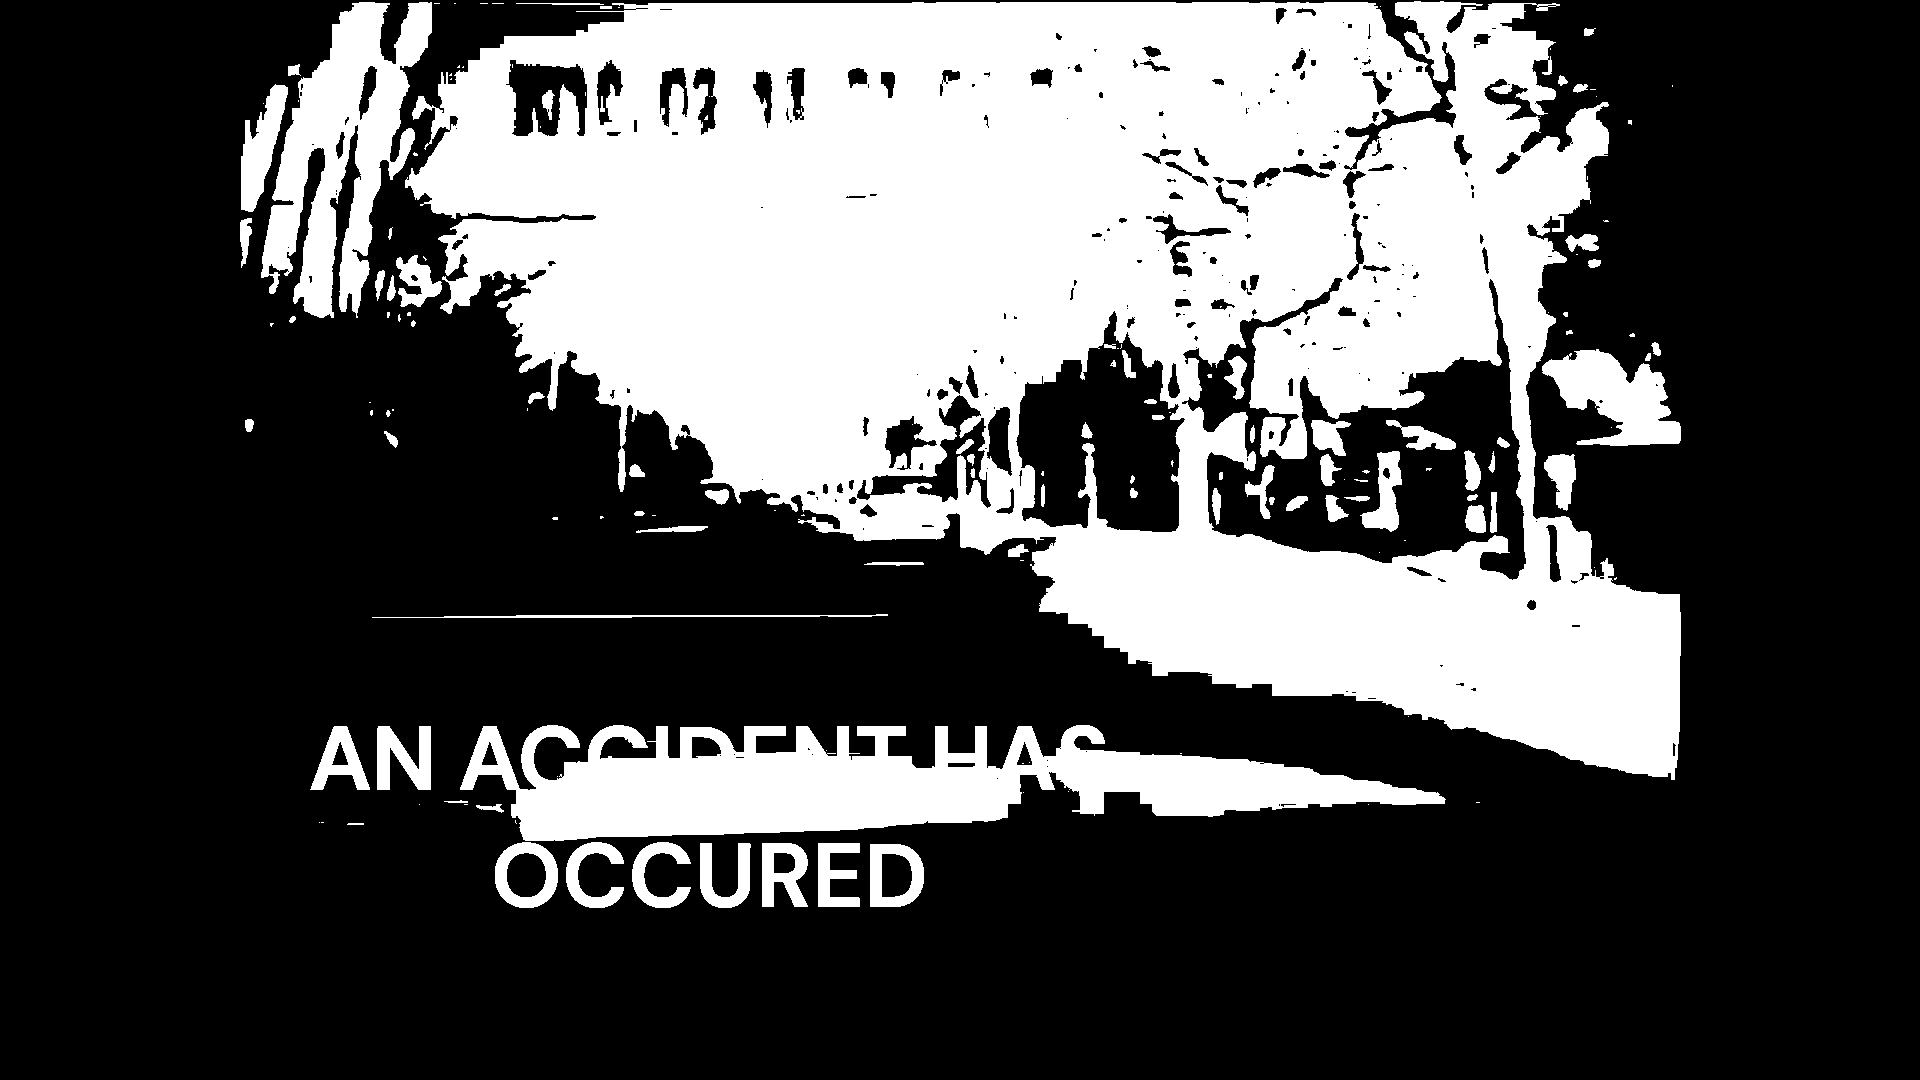

Processed Text:  

 

~ OCCURED

Prediction: [0]


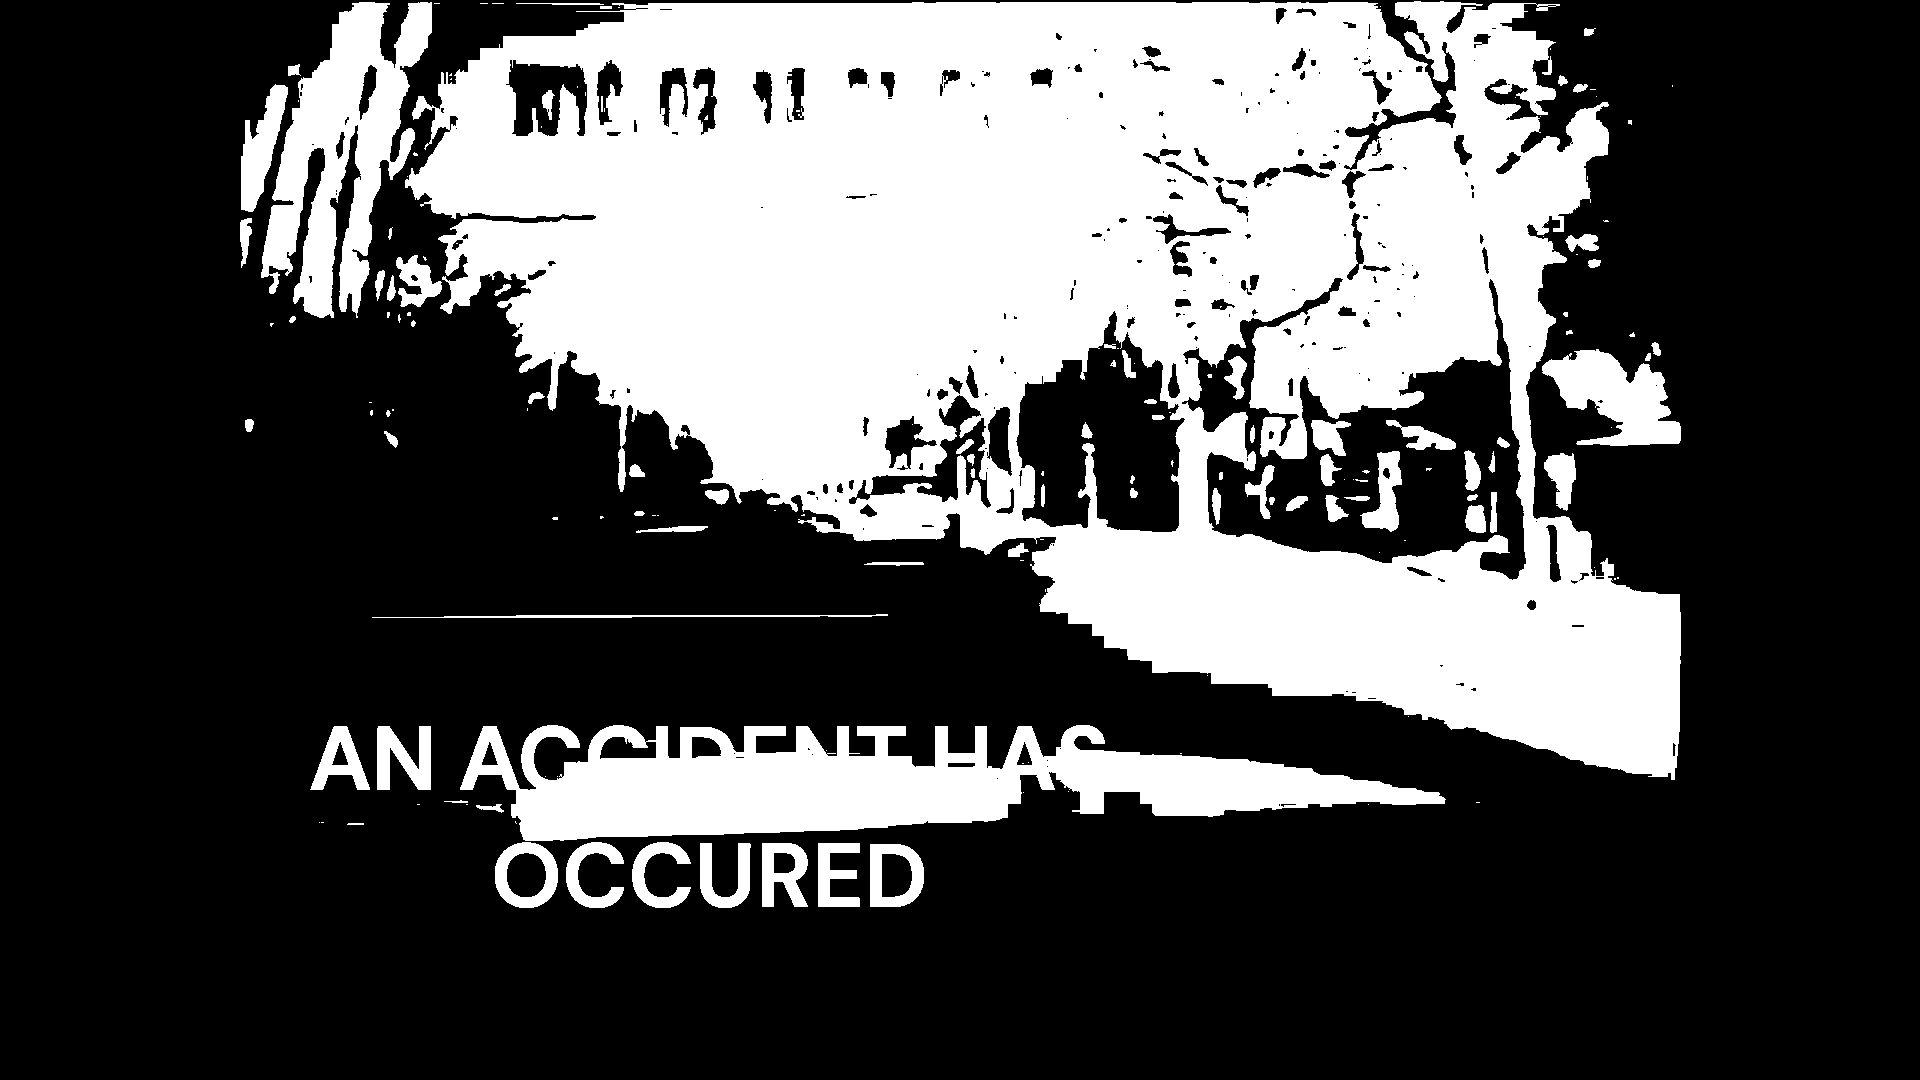

Processed Text:  

a

 

~ OCCURED

Prediction: [0]


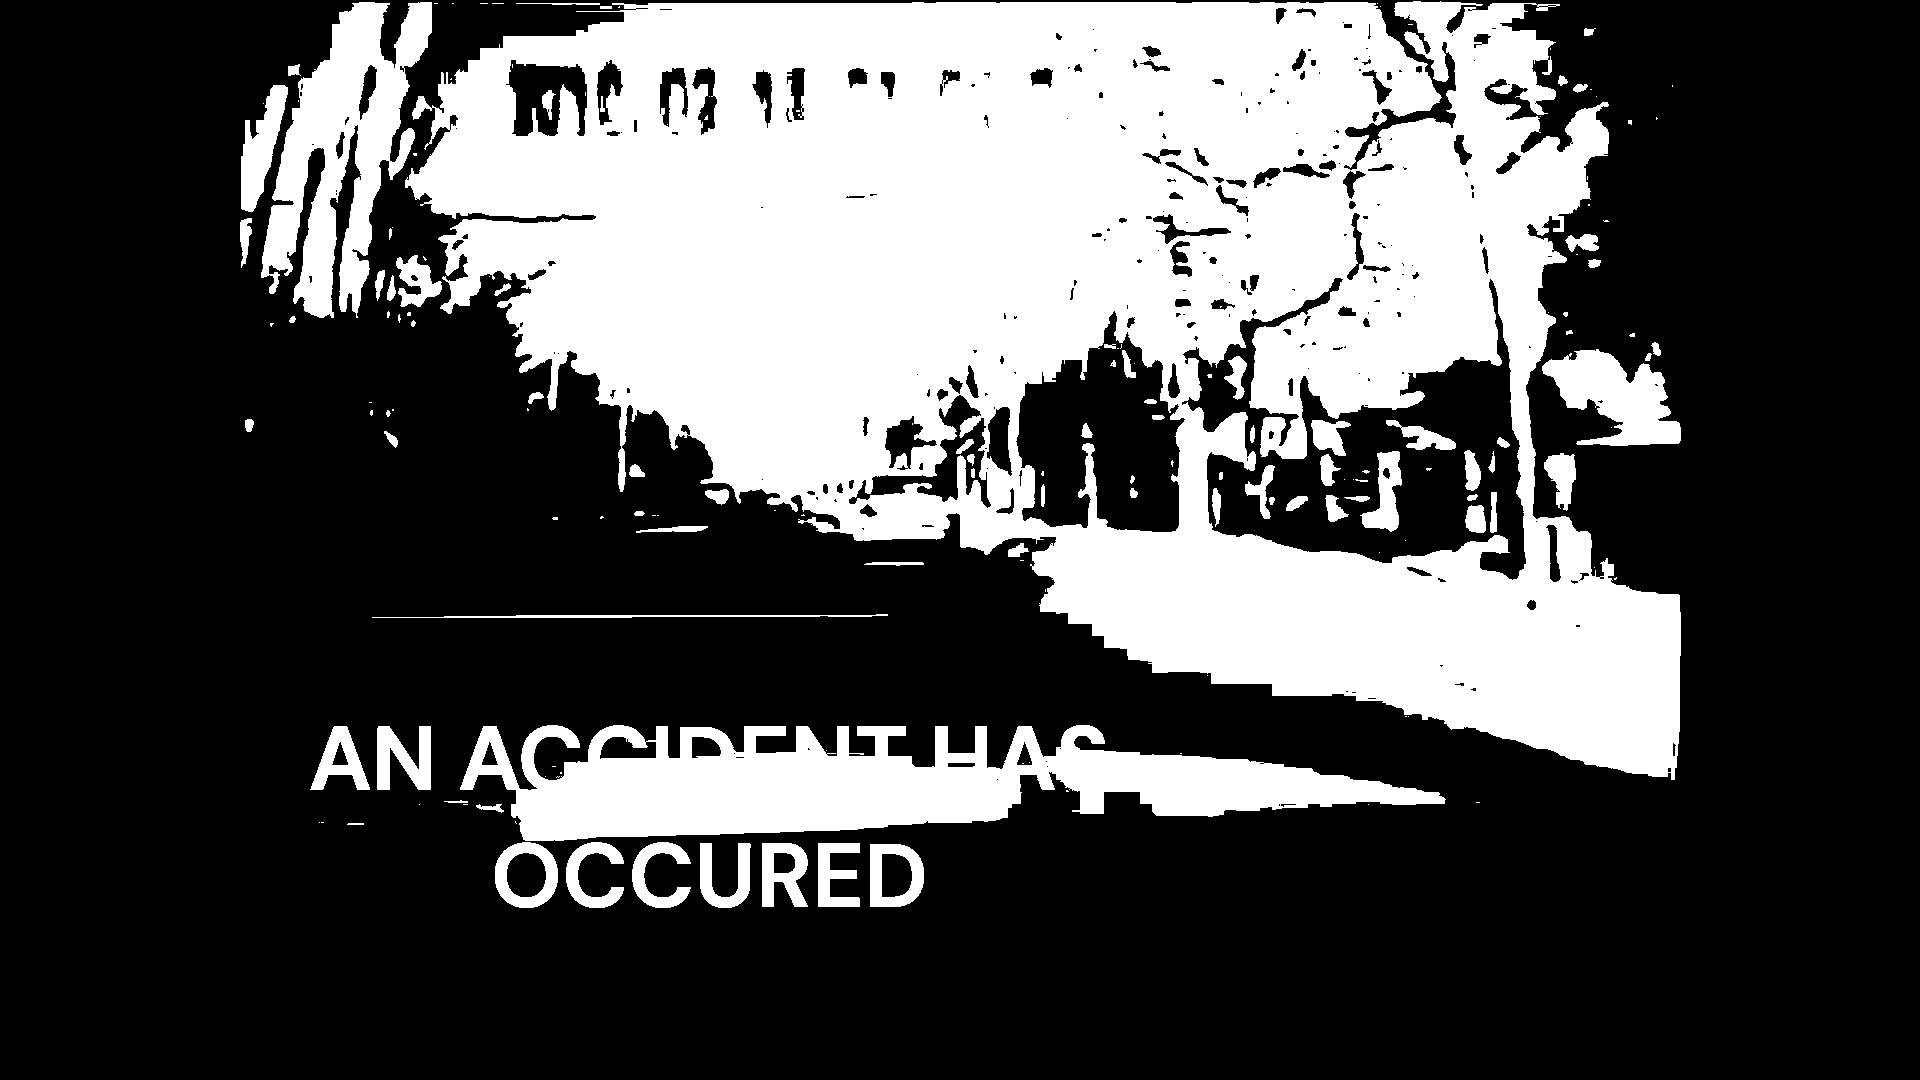

Processed Text:  

~ OCCURED

Prediction: [0]


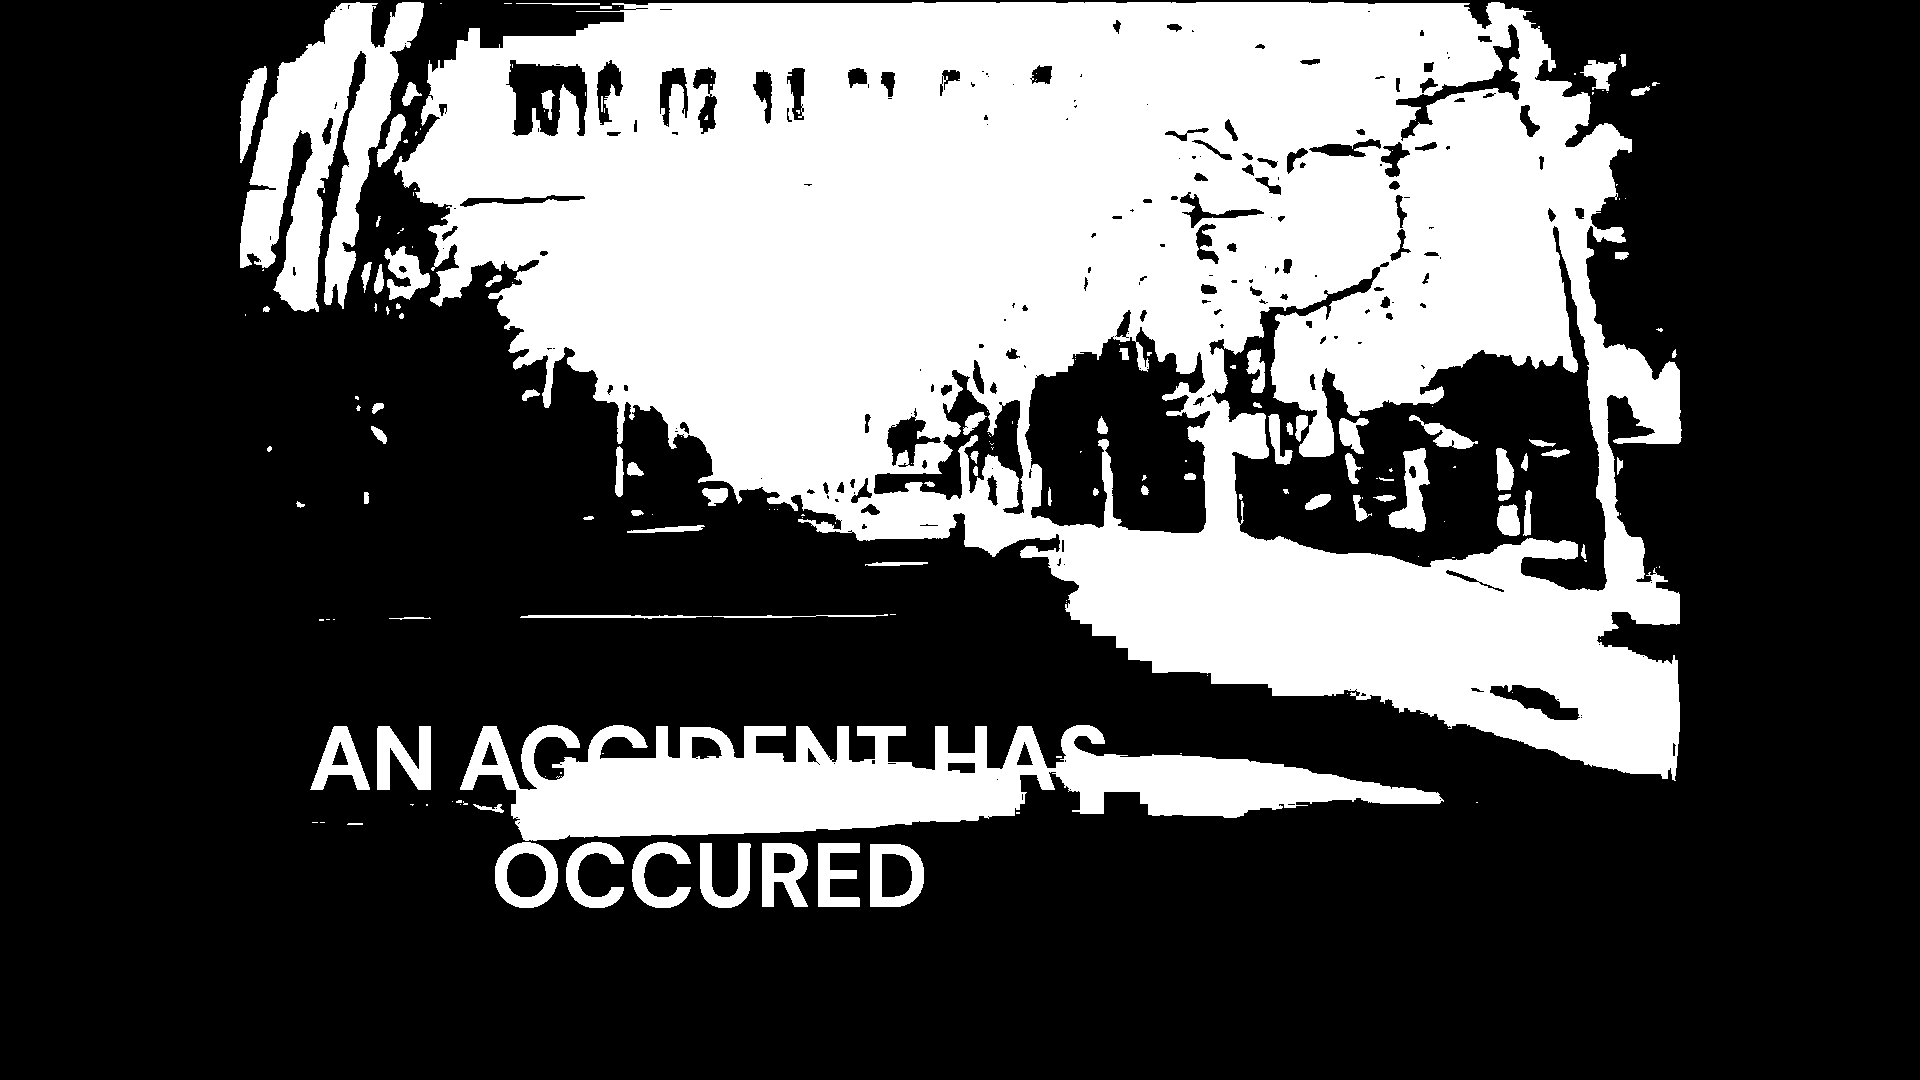

Processed Text:  

~ OCCURED

Prediction: [0]


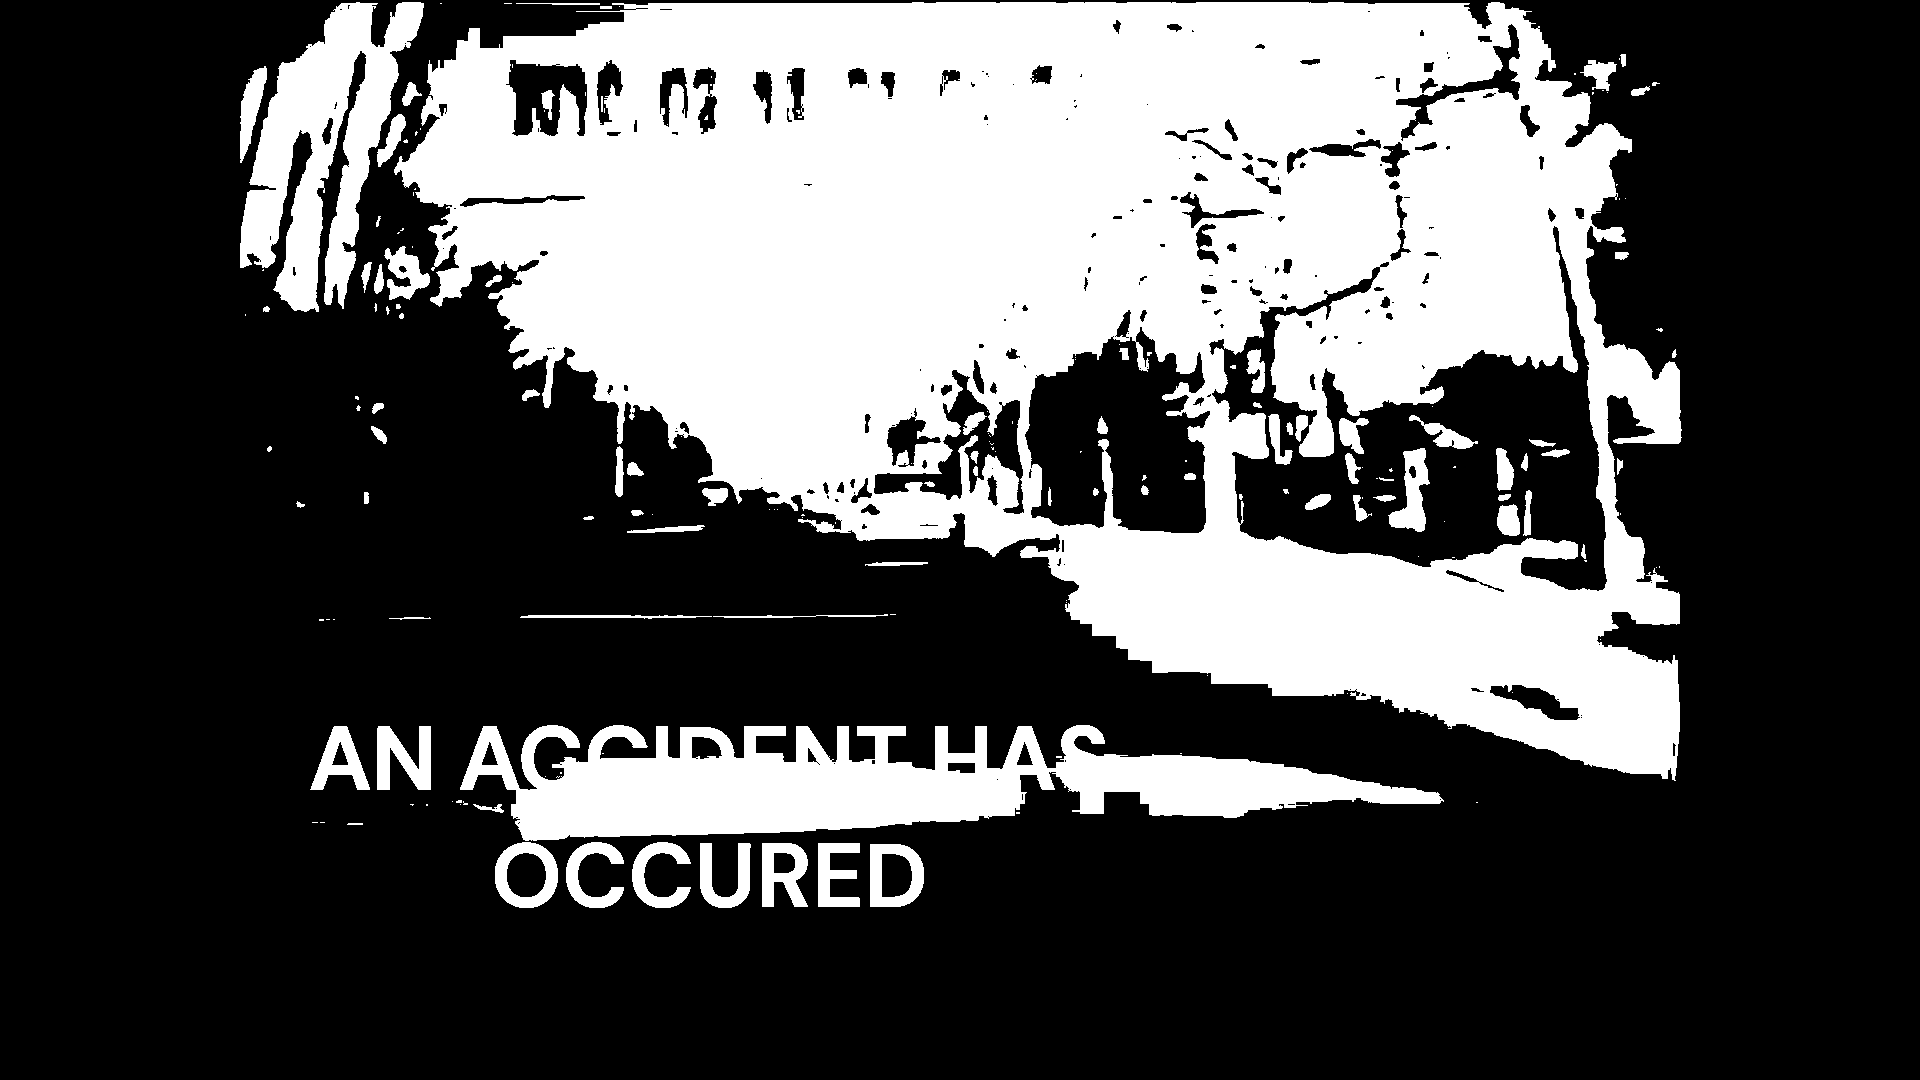

Processed Text:  

~ OCCURED

Prediction: [0]


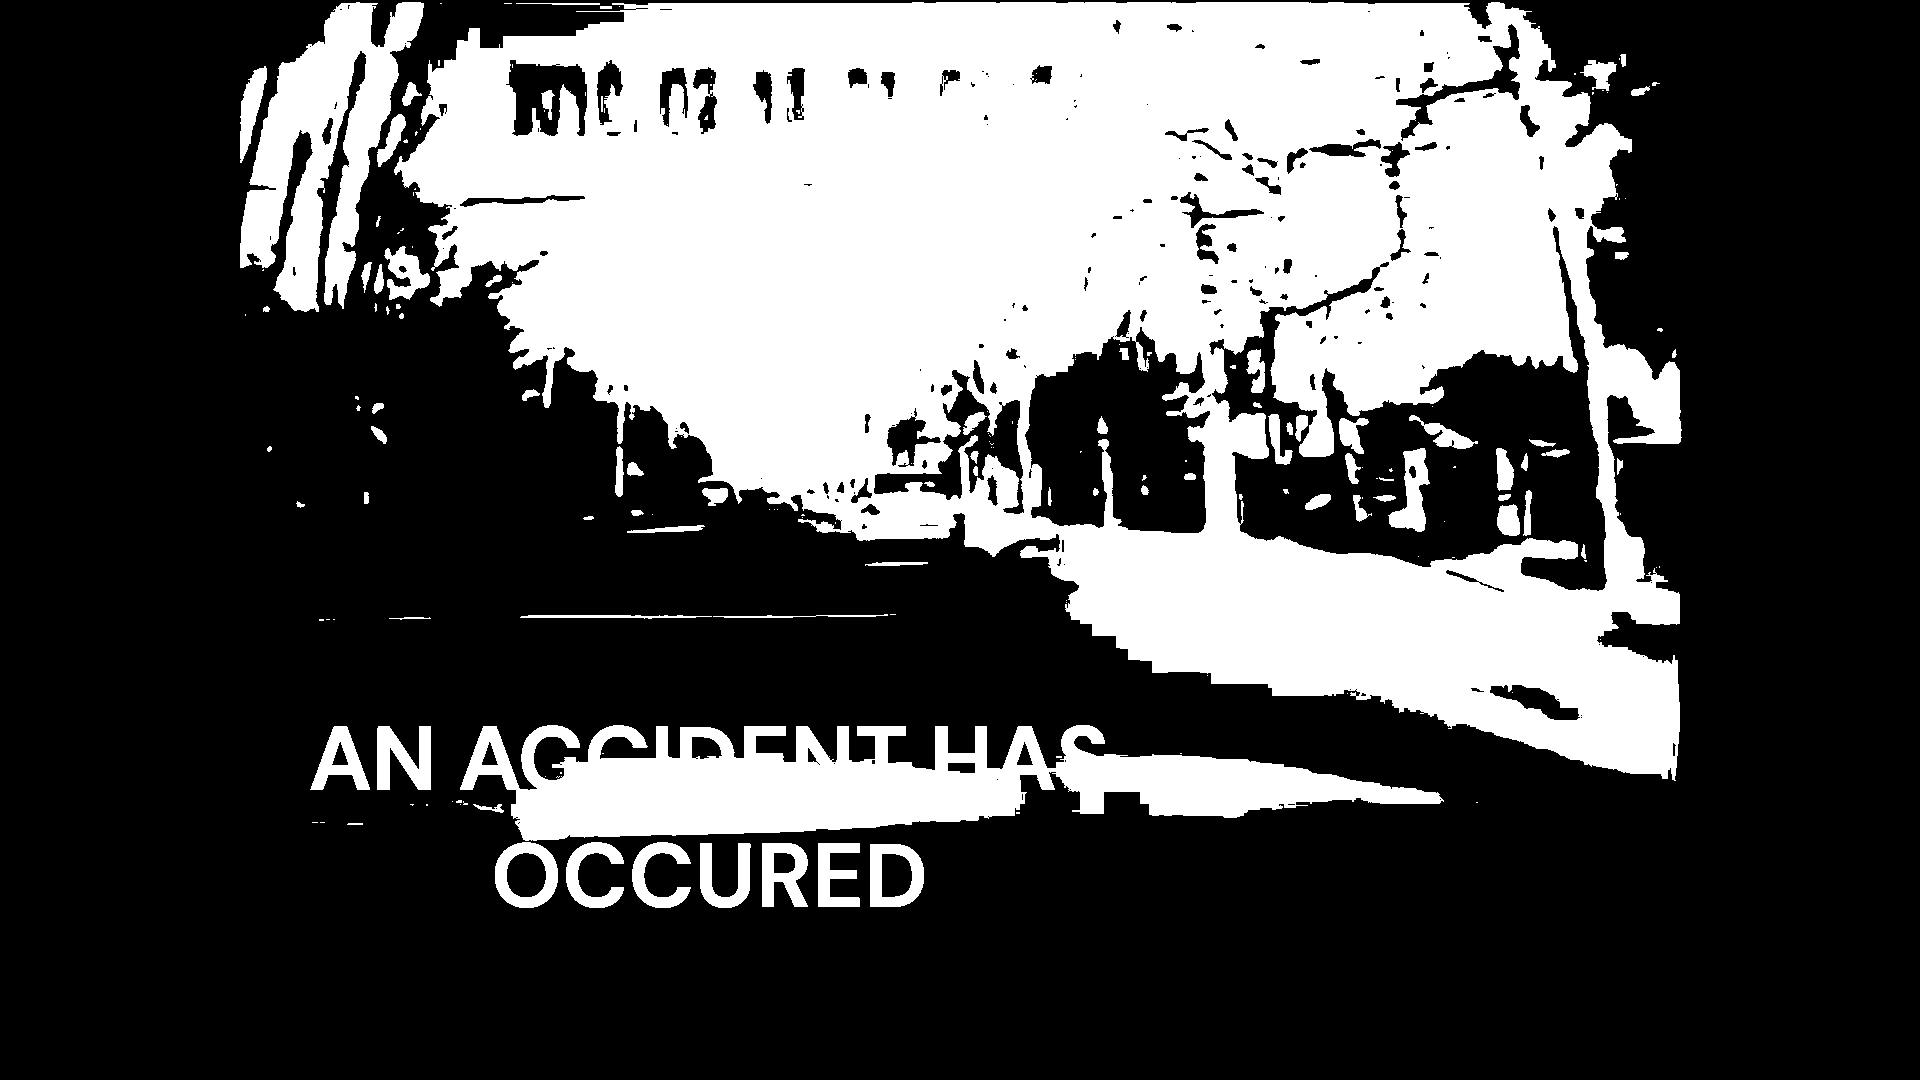

Processed Text:  

Prediction: [0]


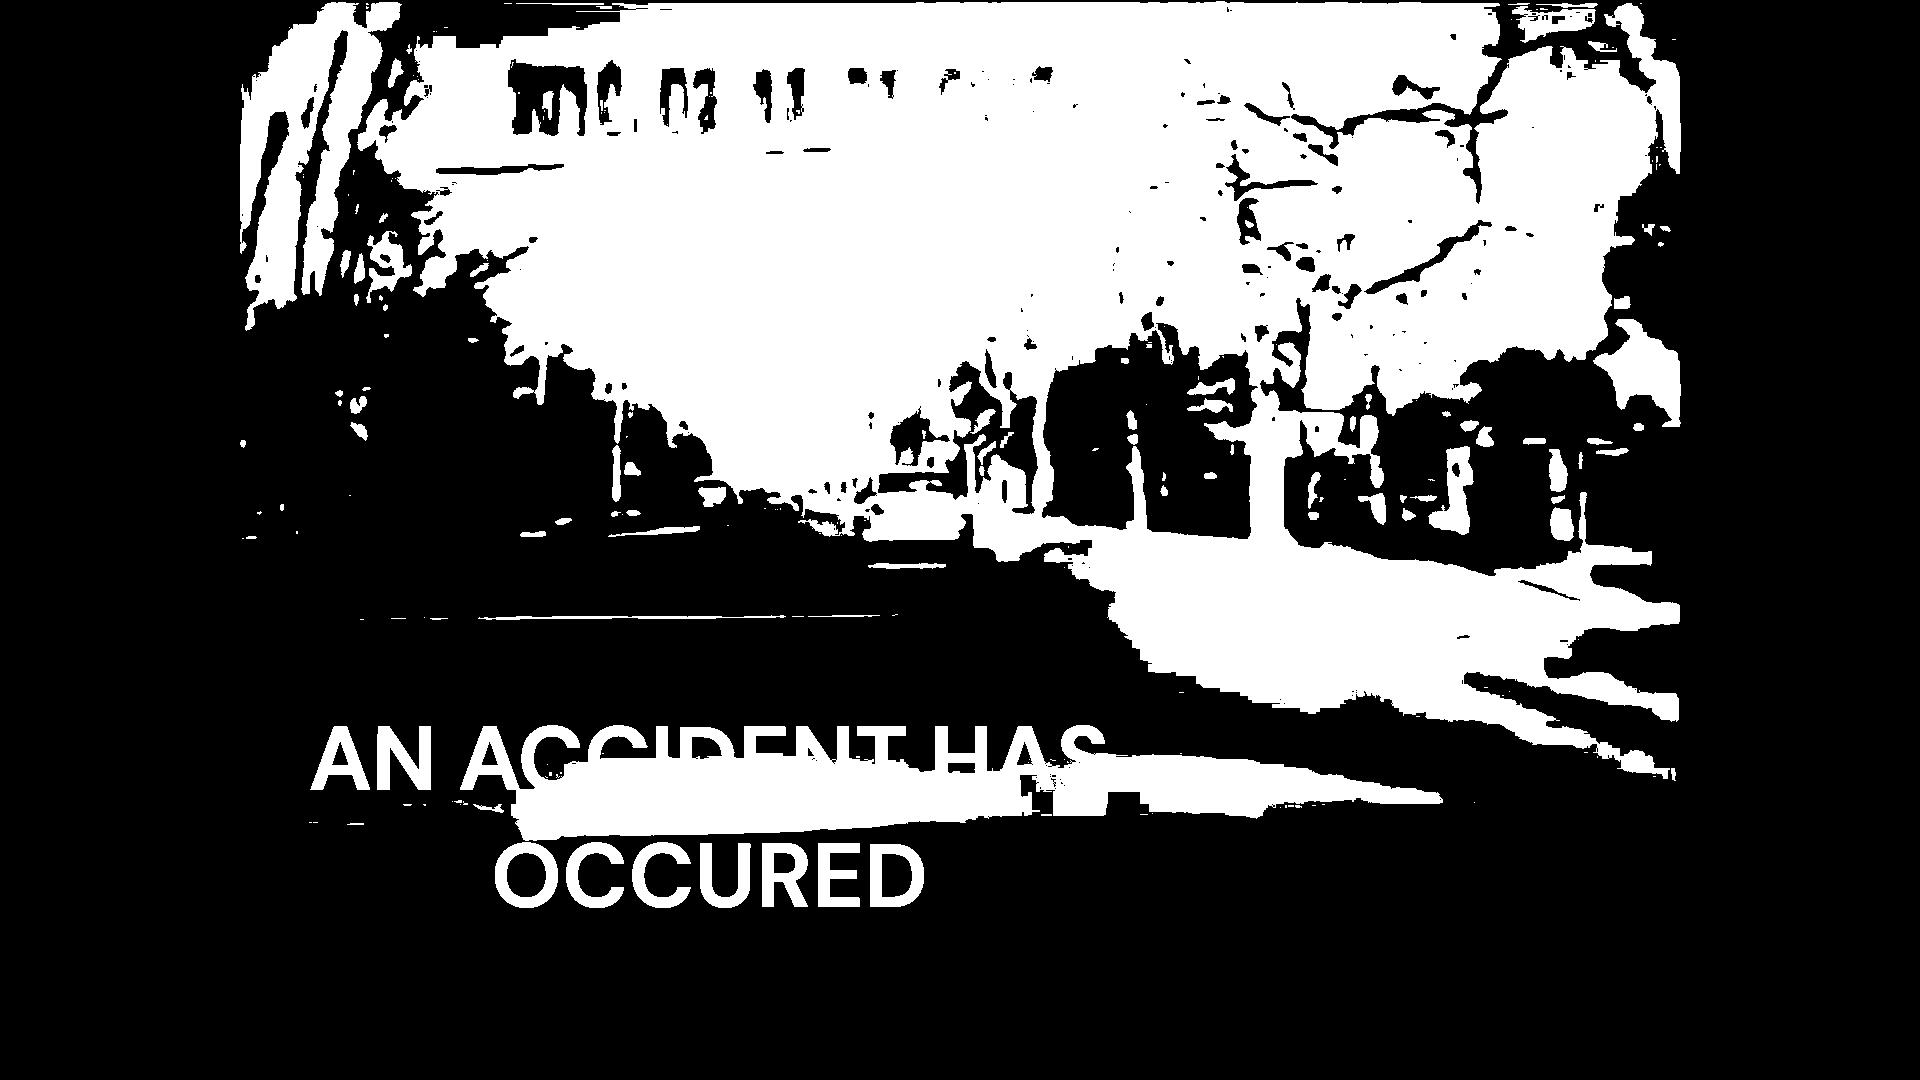

Processed Text:  

Prediction: [0]


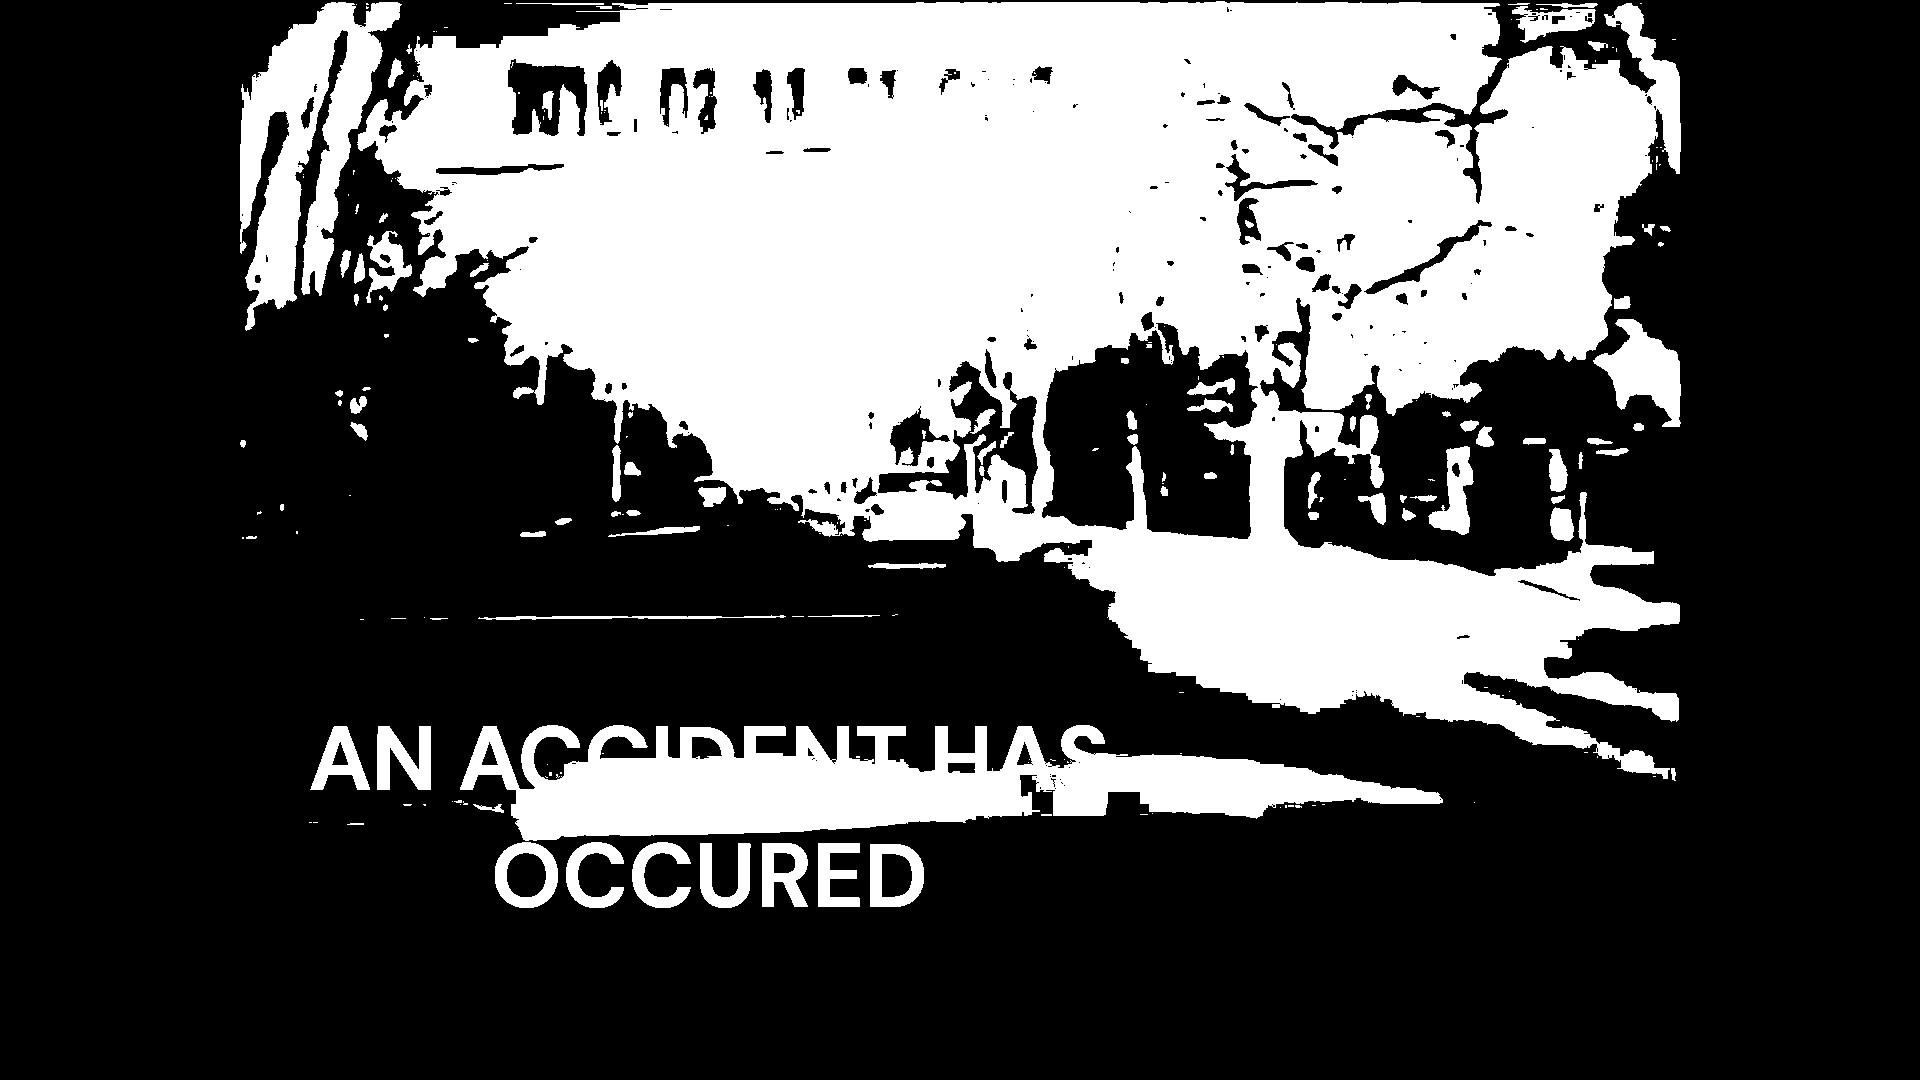

Processed Text:  

Prediction: [0]


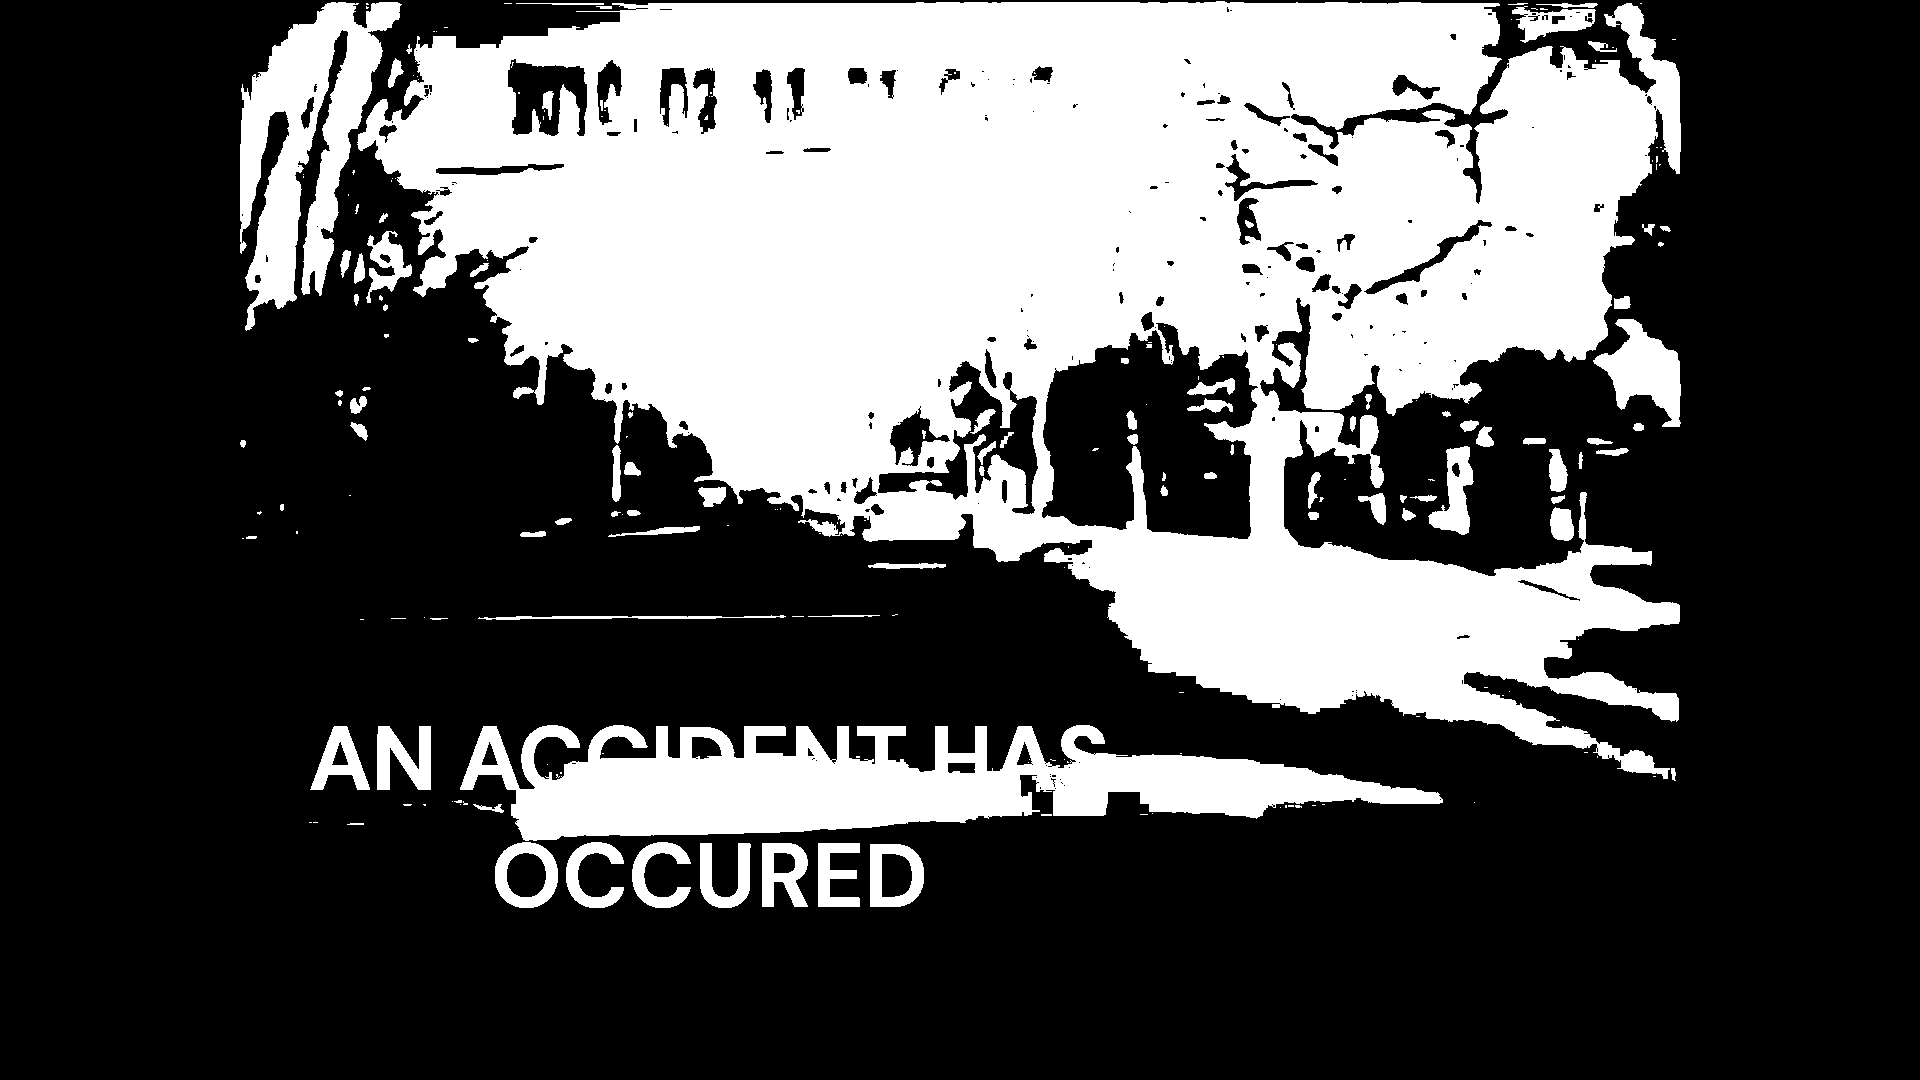

Processed Text:  

“OCCURED

Prediction: [0]


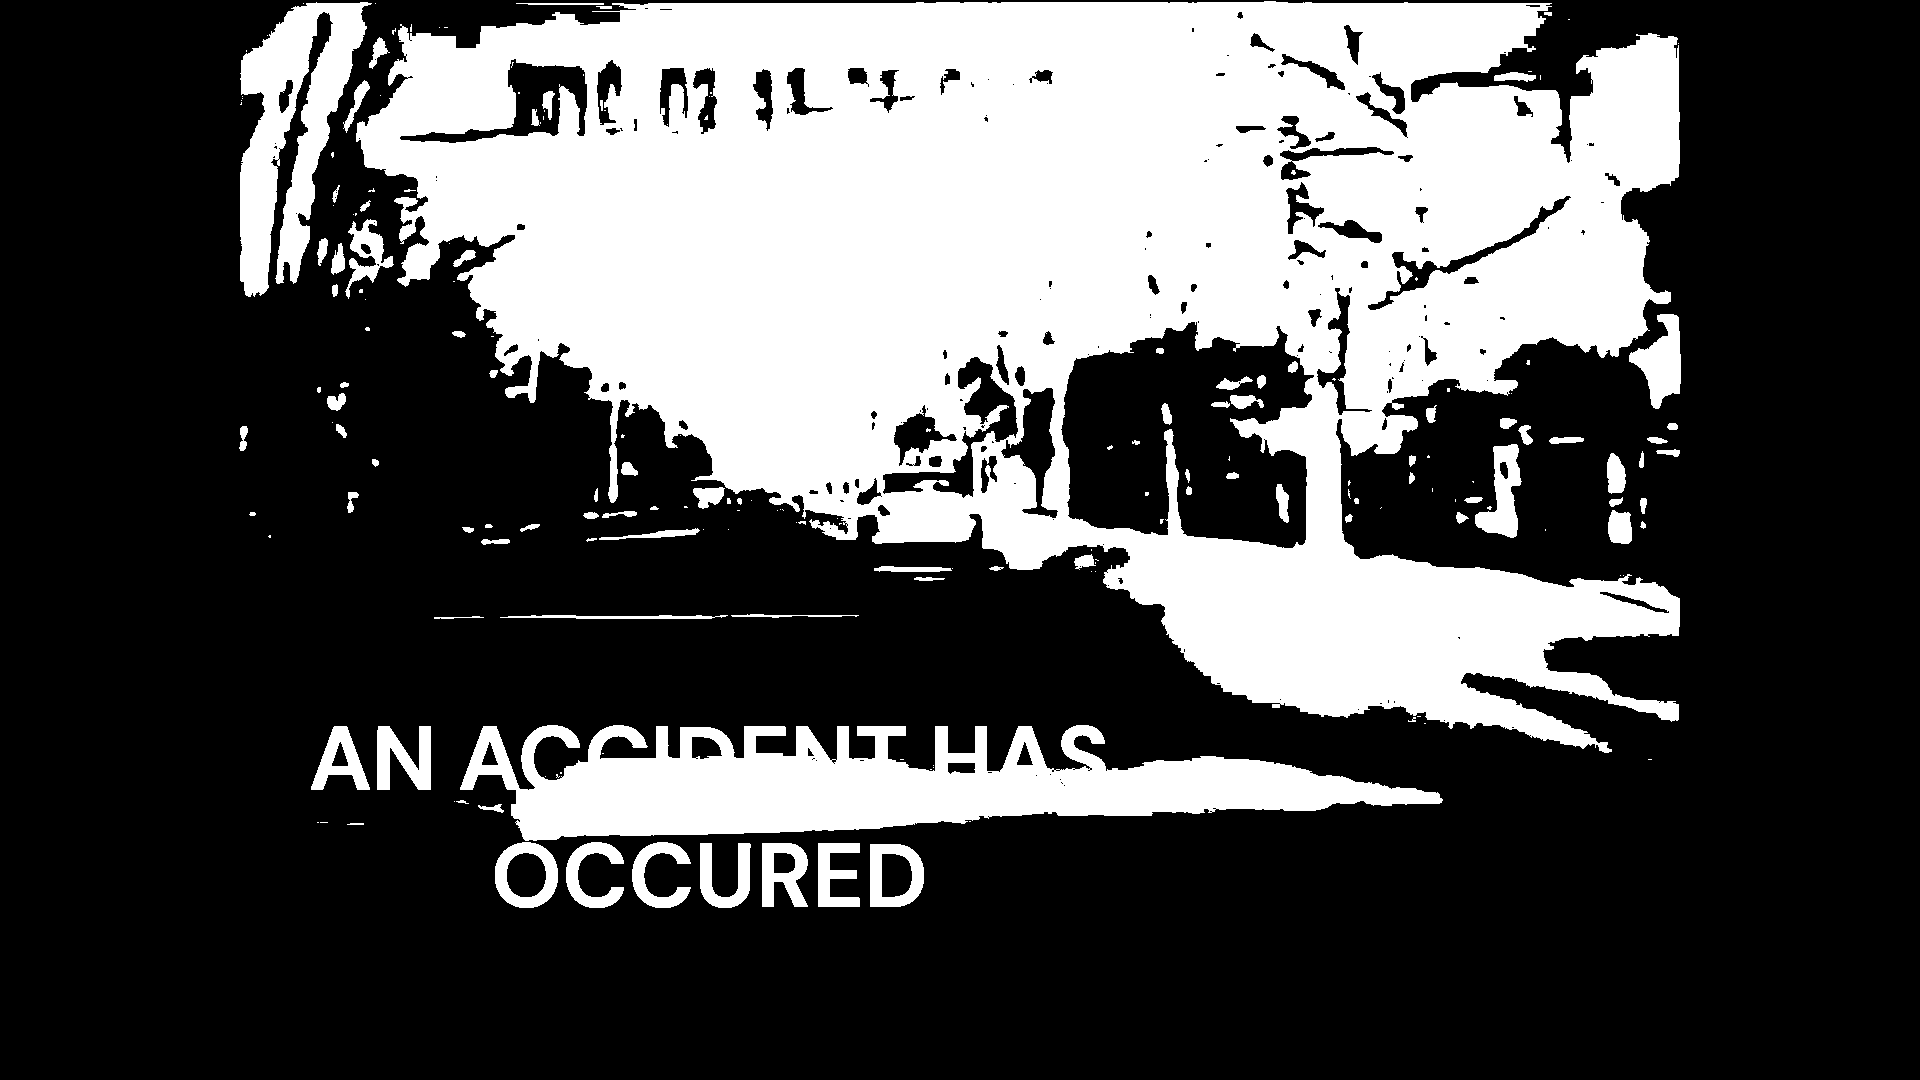

Processed Text:  

“OCCURED

Prediction: [0]


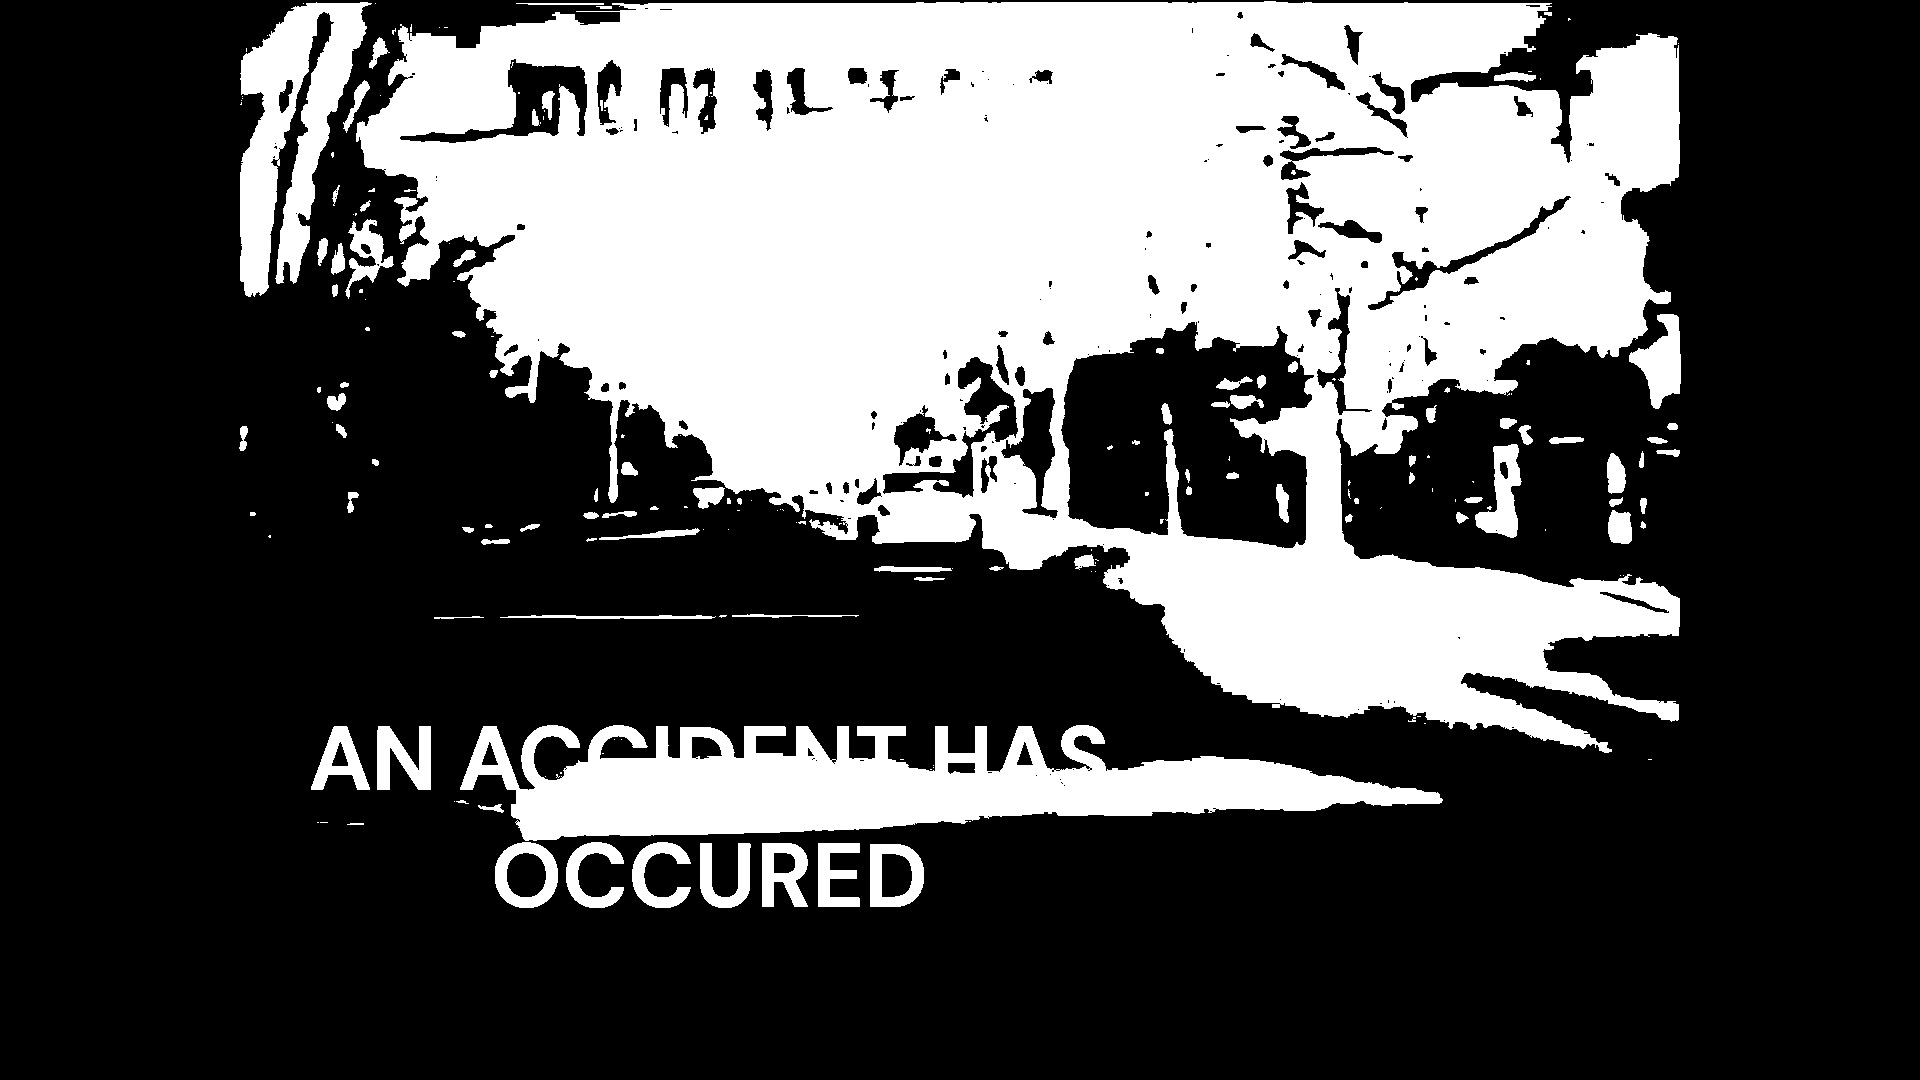

Processed Text:  

“OCCURED

Prediction: [0]


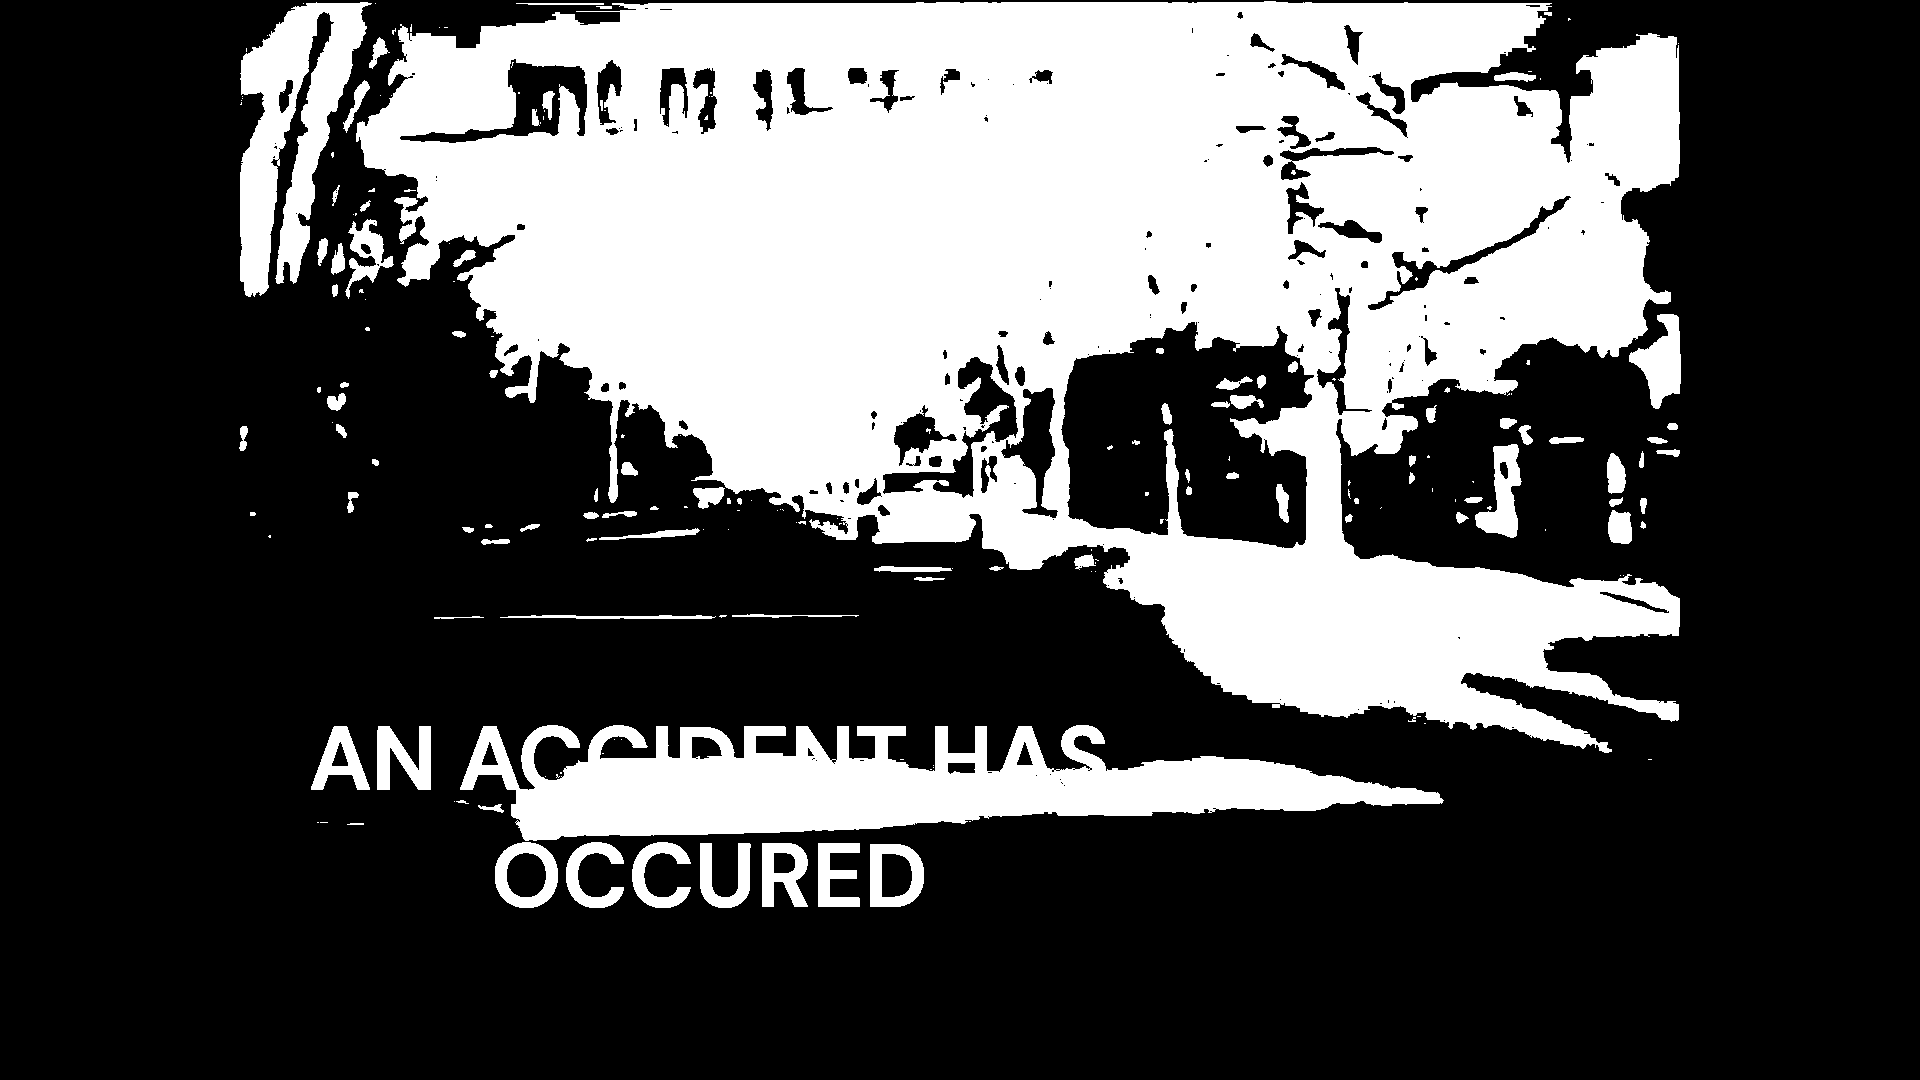

Processed Text:   

AN ACCIDENFE HAS
OCCURED

Prediction: [0]


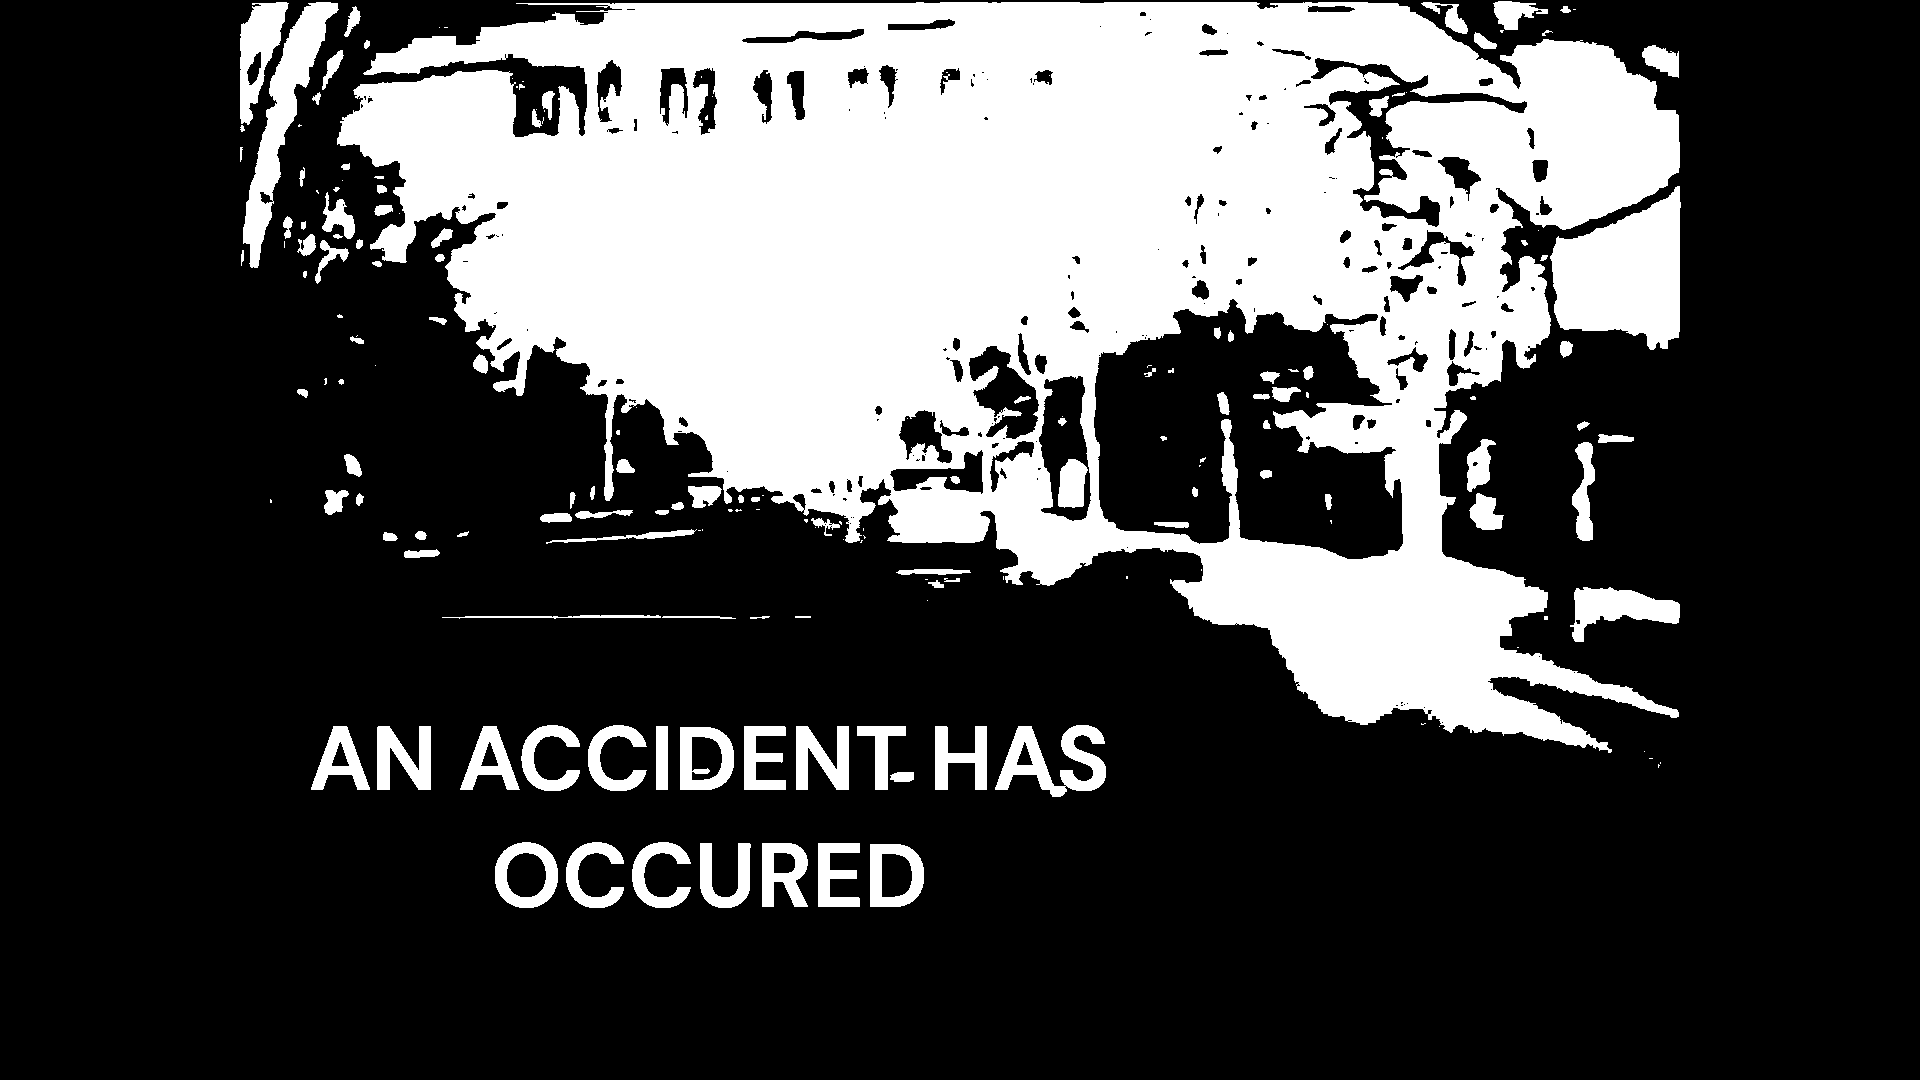

Processed Text:    

AN ACCIDENFE HAS
OCCURED

Prediction: [0]


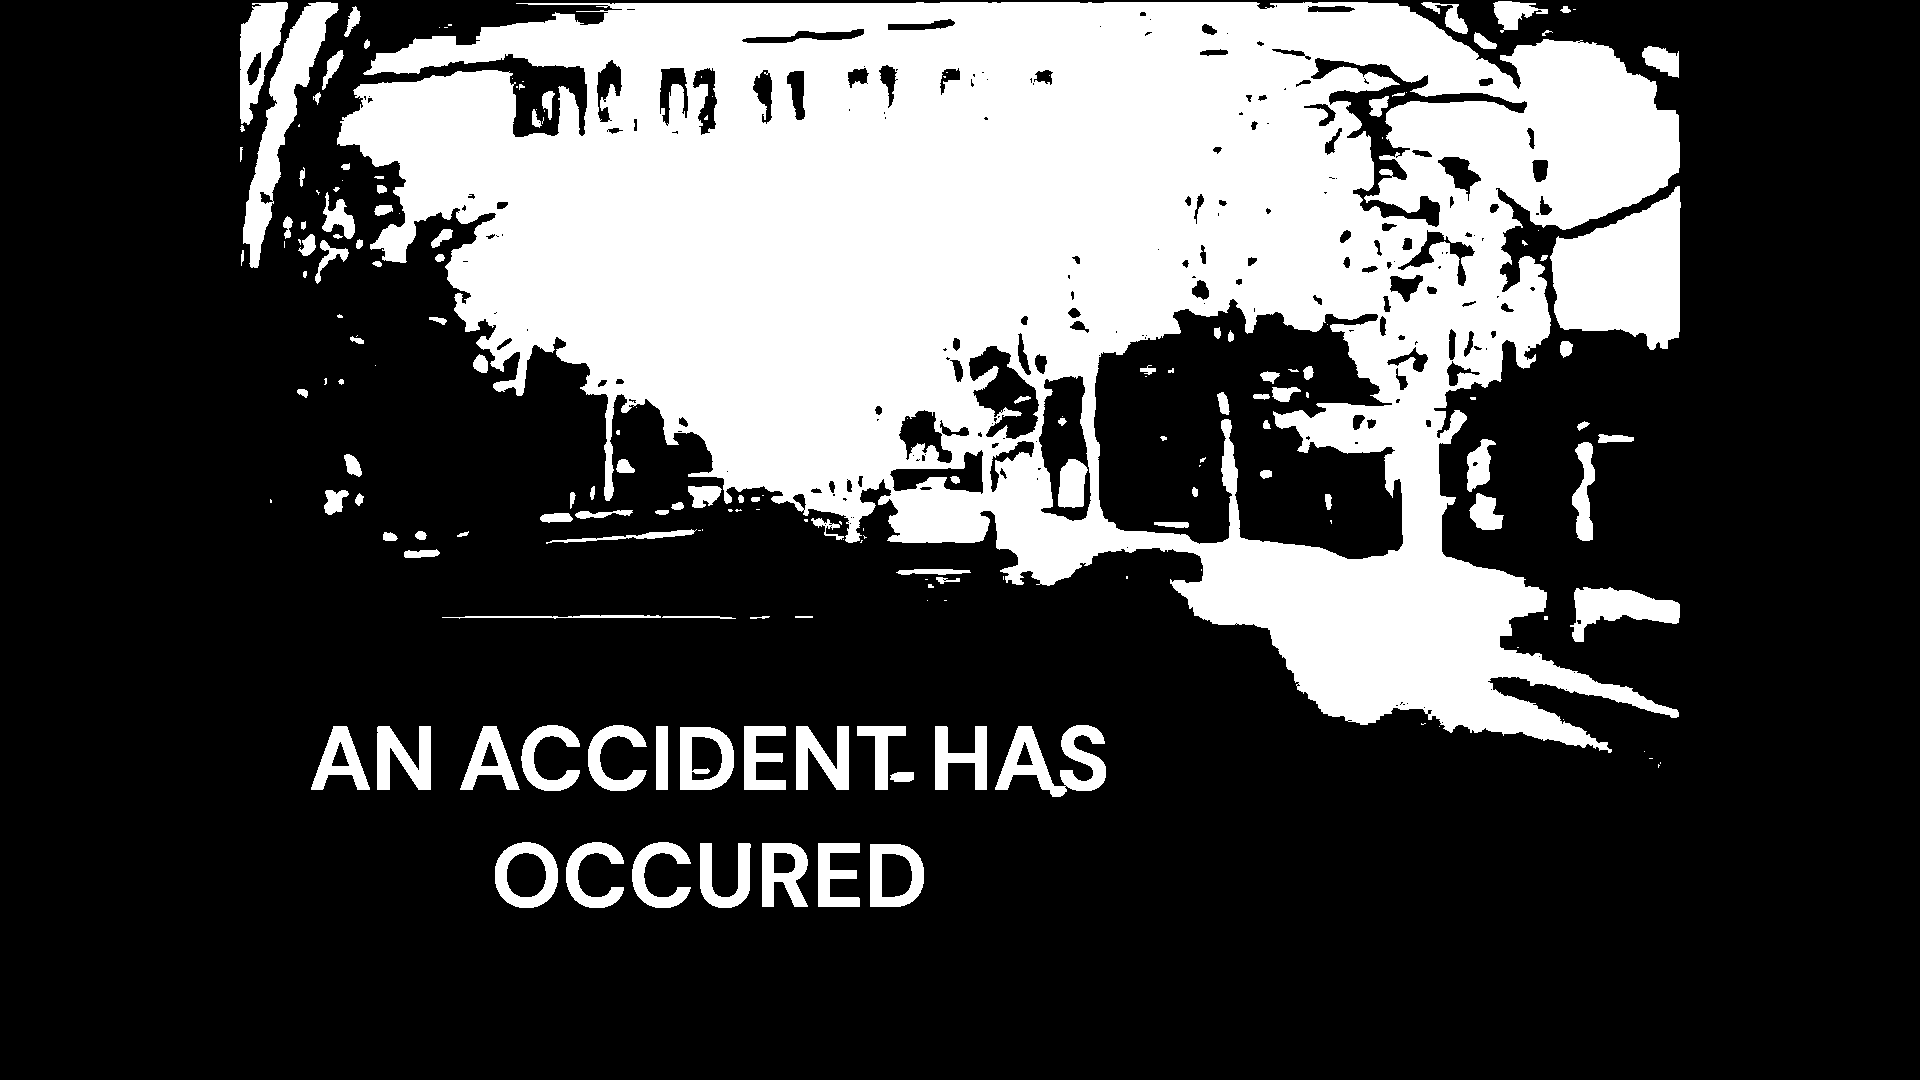

Processed Text:    

AN ACCIDENFE HAS
OCCURED

Prediction: [0]


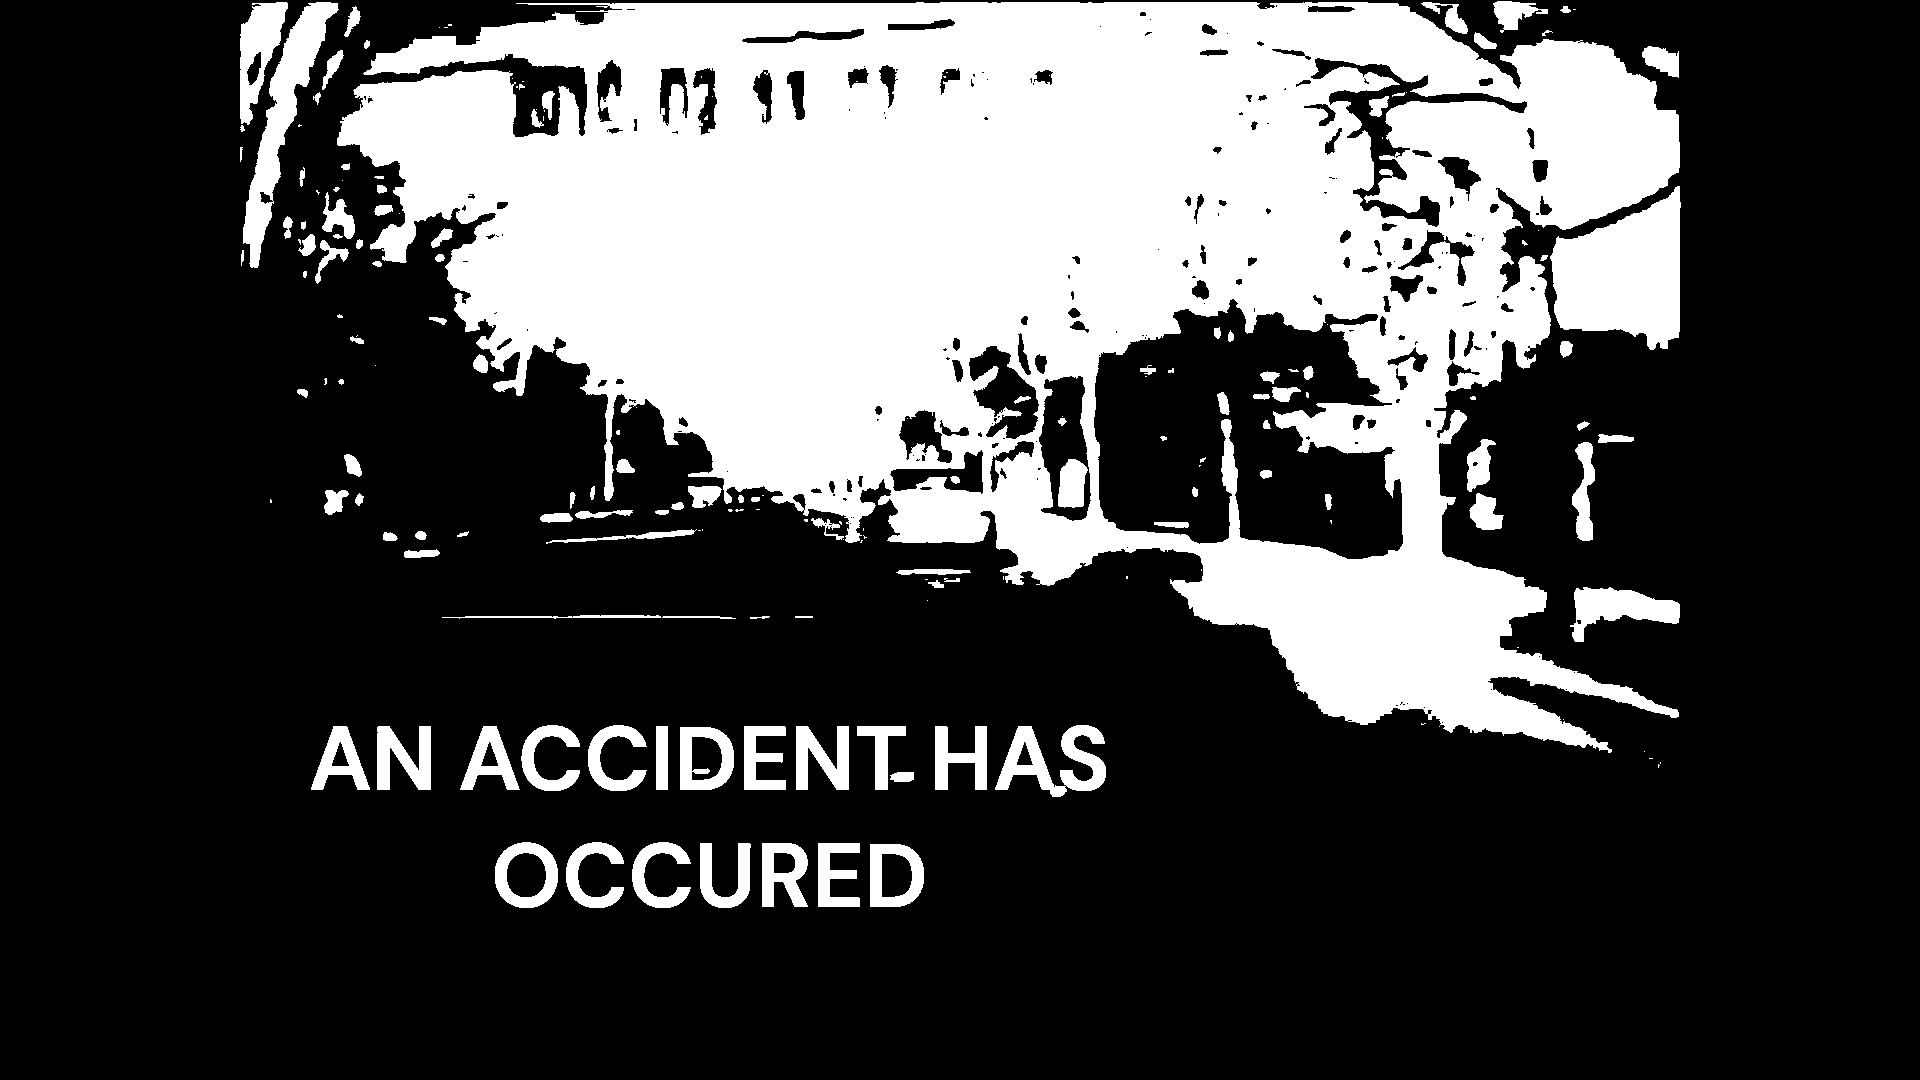

Processed Text:    

AN ACCIDENT HAS
OCCURED

Prediction: [1]


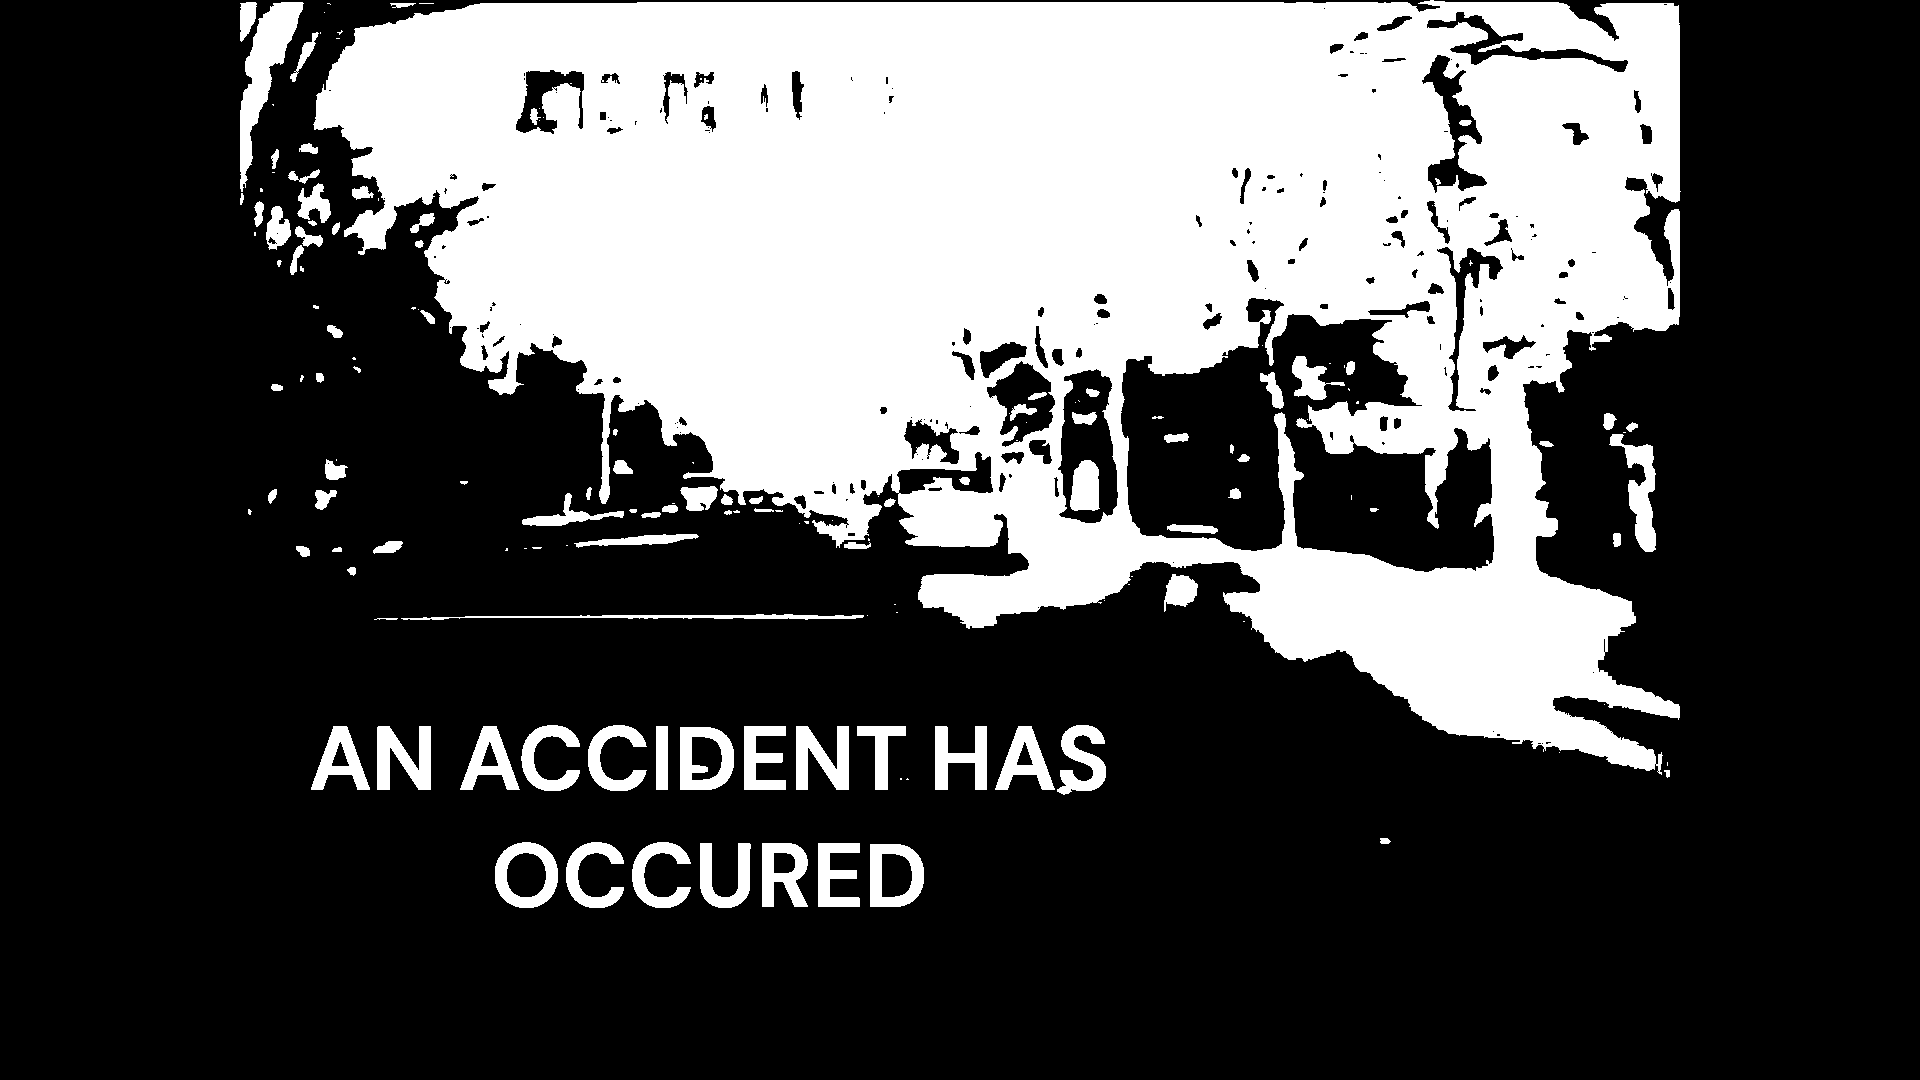

Processed Text:    

AN ACCIDENT HAS
OCCURED

Prediction: [1]


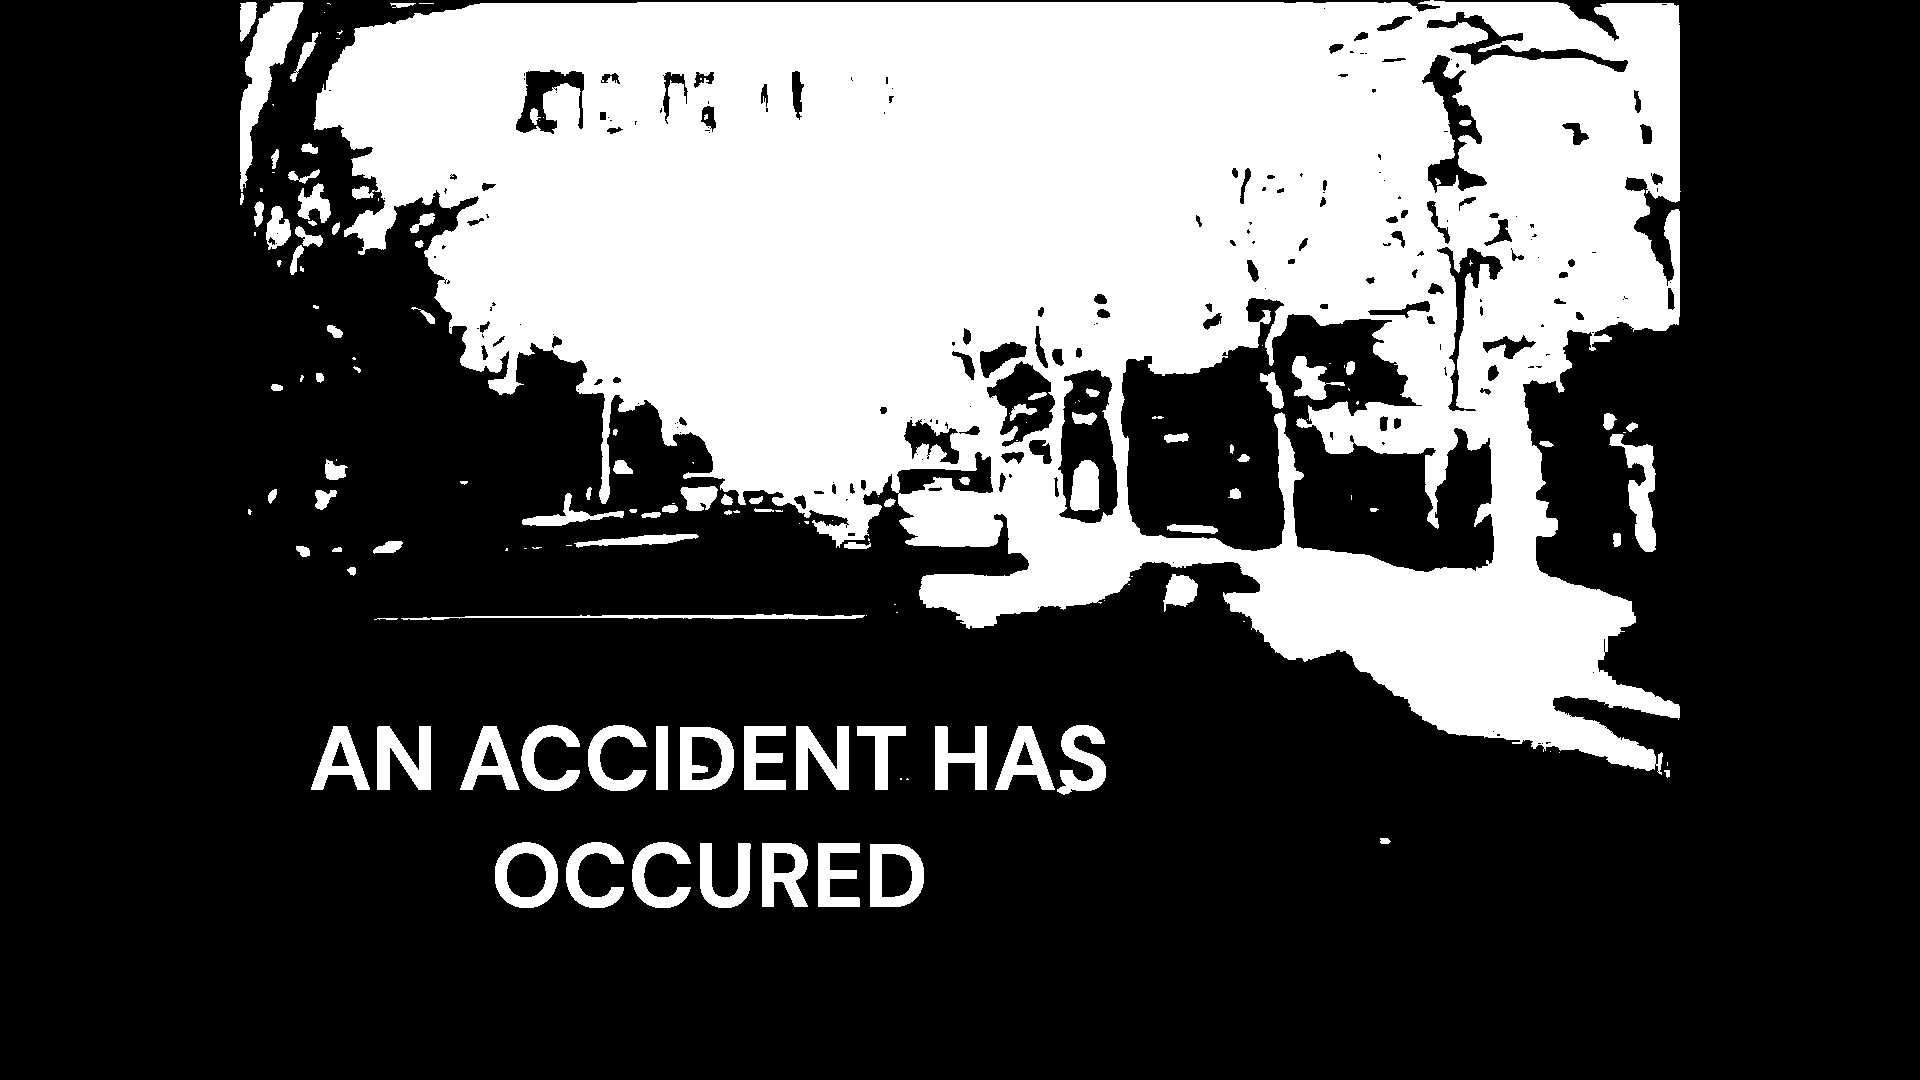

Processed Text:    

AN ACCIDENT HAS
OCCURED

Prediction: [1]


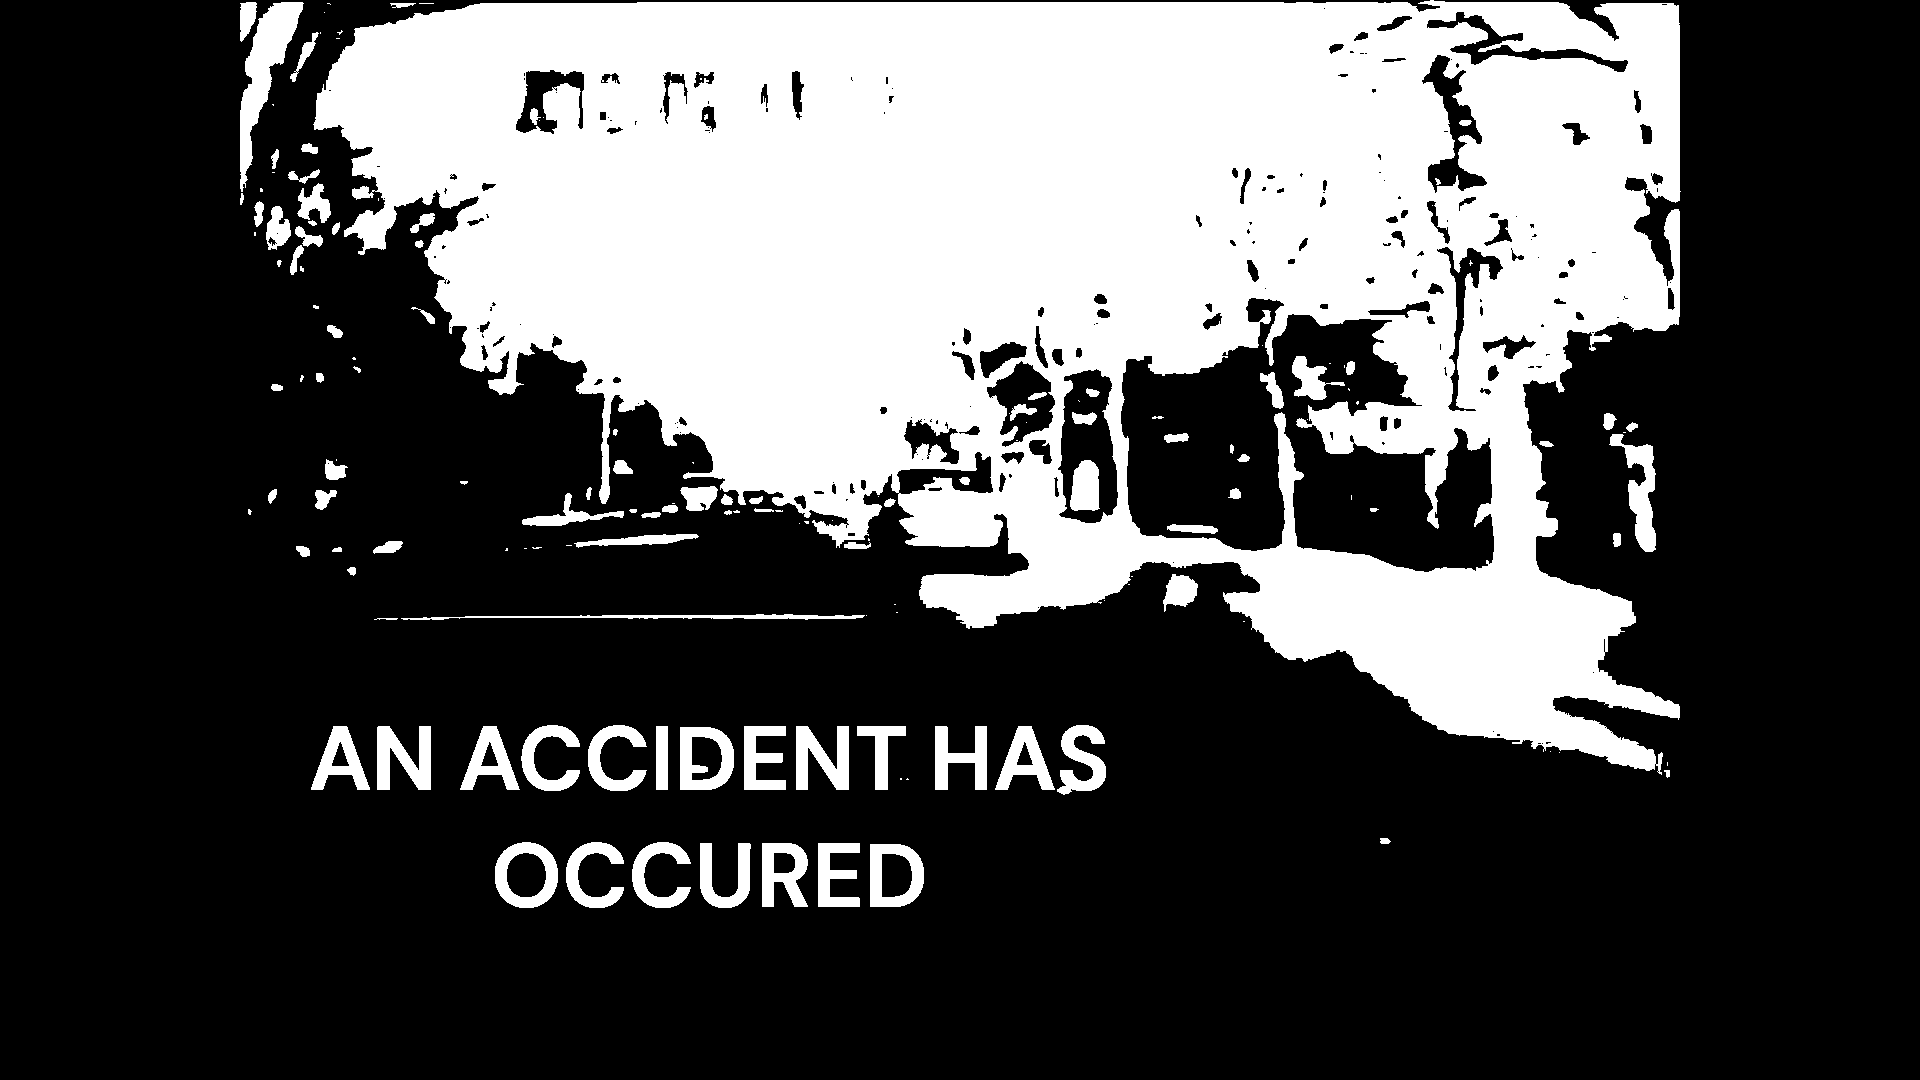

Processed Text:     

AN ACCIDENT.HAS
OCCURED

Prediction: [1]


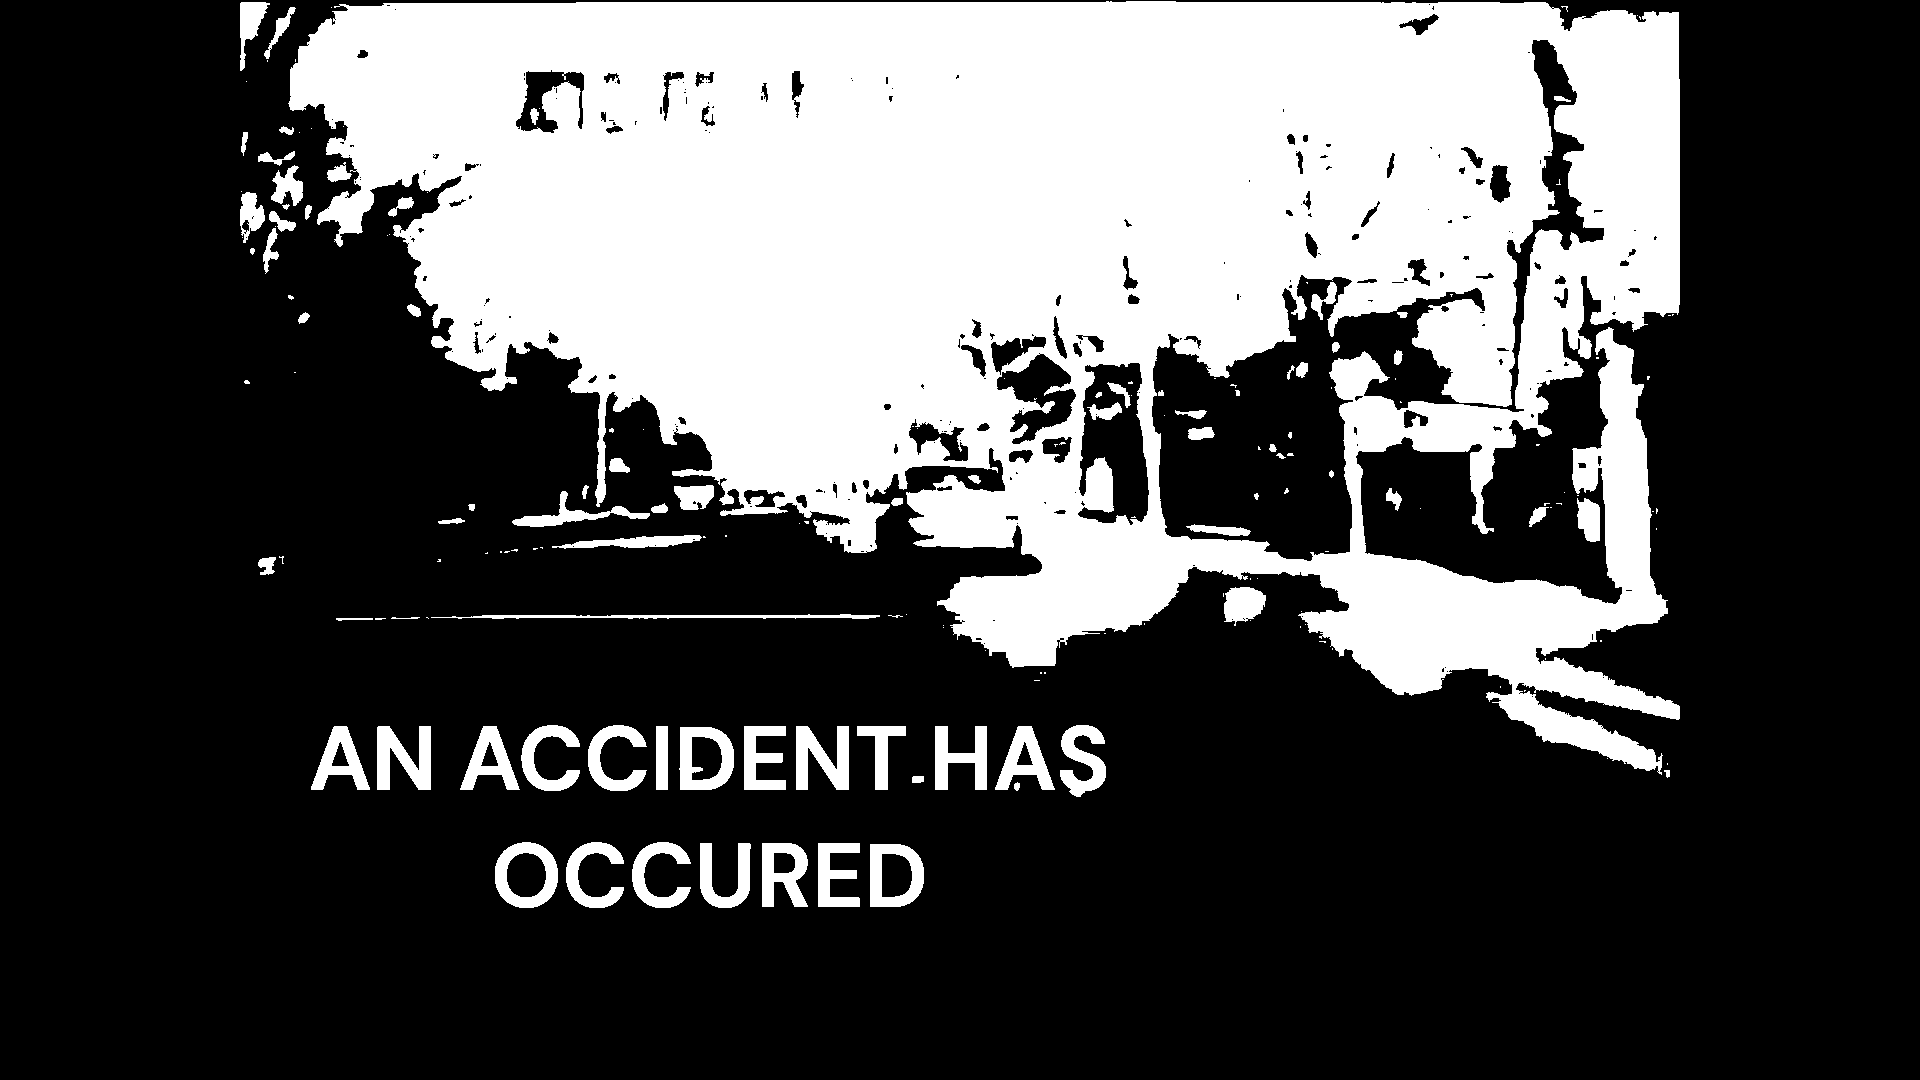

Processed Text:     

AN ACCIDENT.HAS
OCCURED

Prediction: [1]


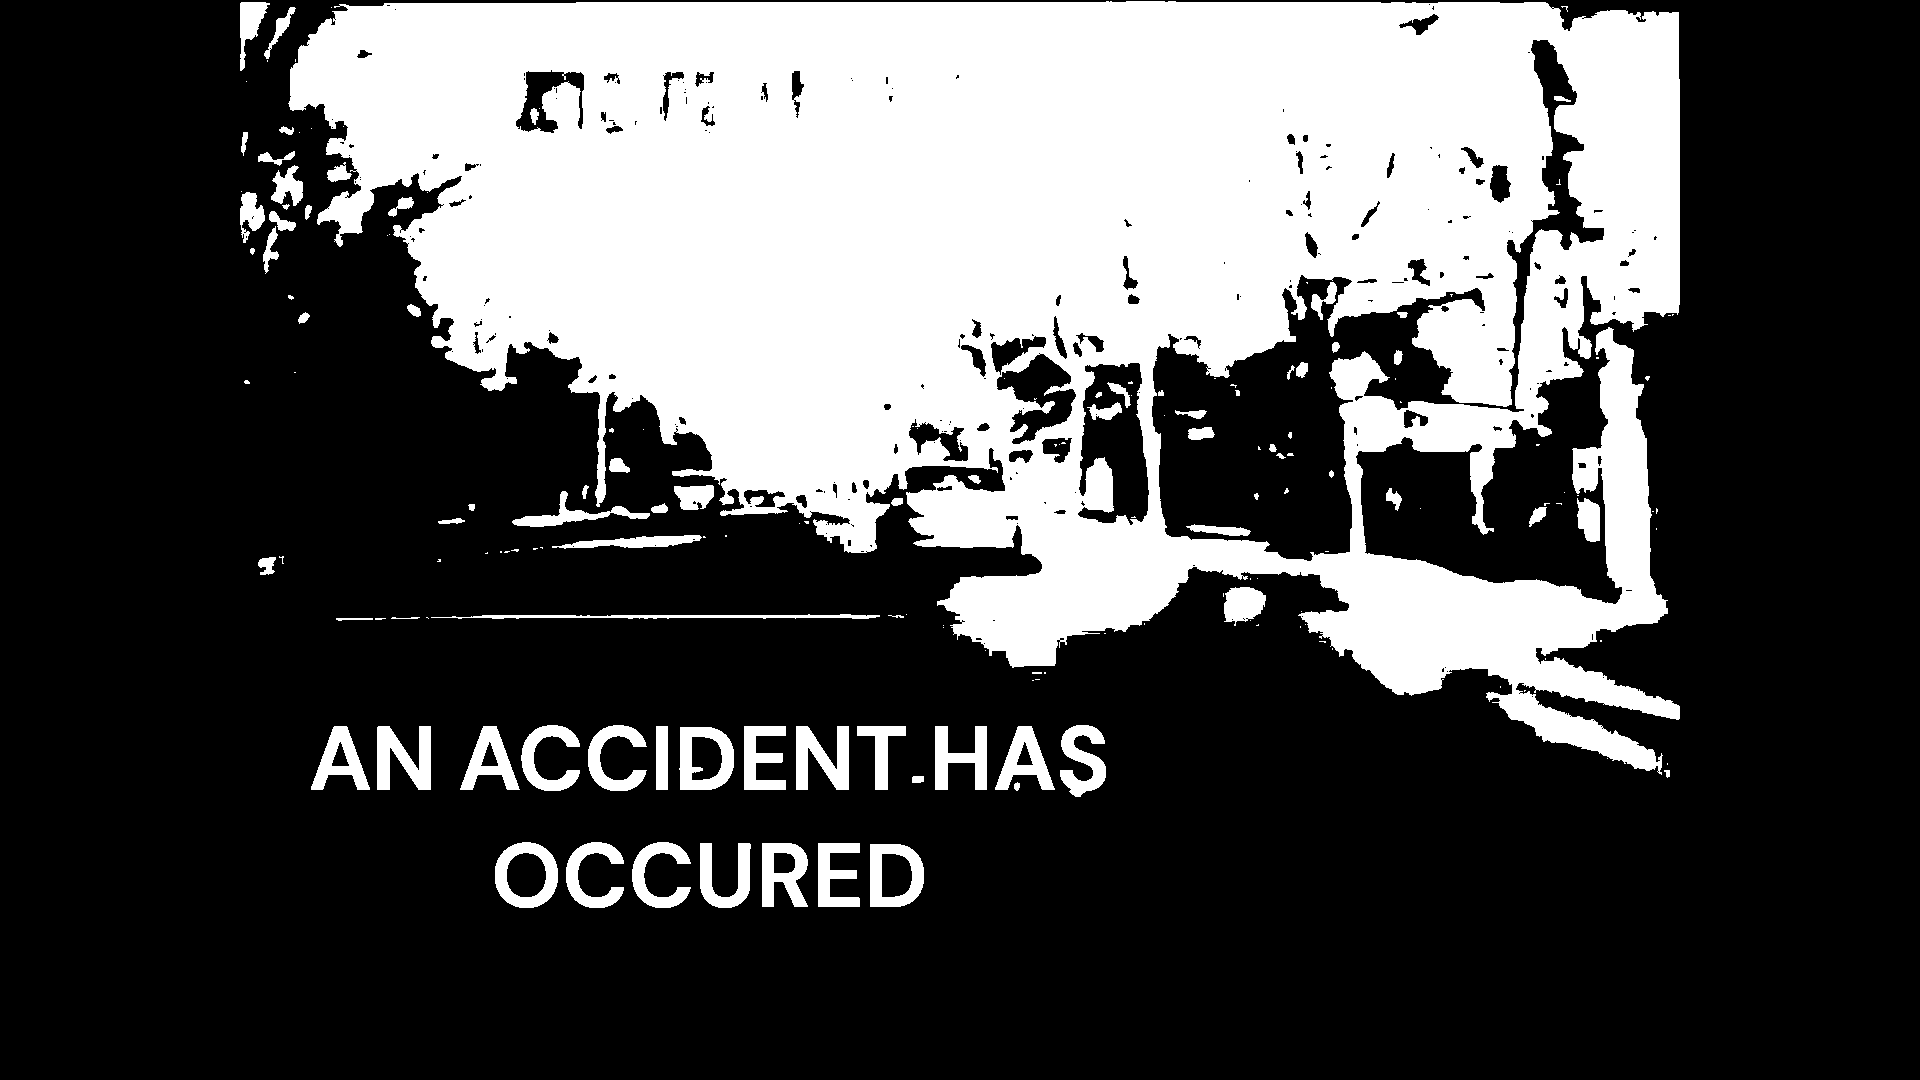

Processed Text:     

AN ACCIDENT.HAS
eferer ts

Prediction: [1]


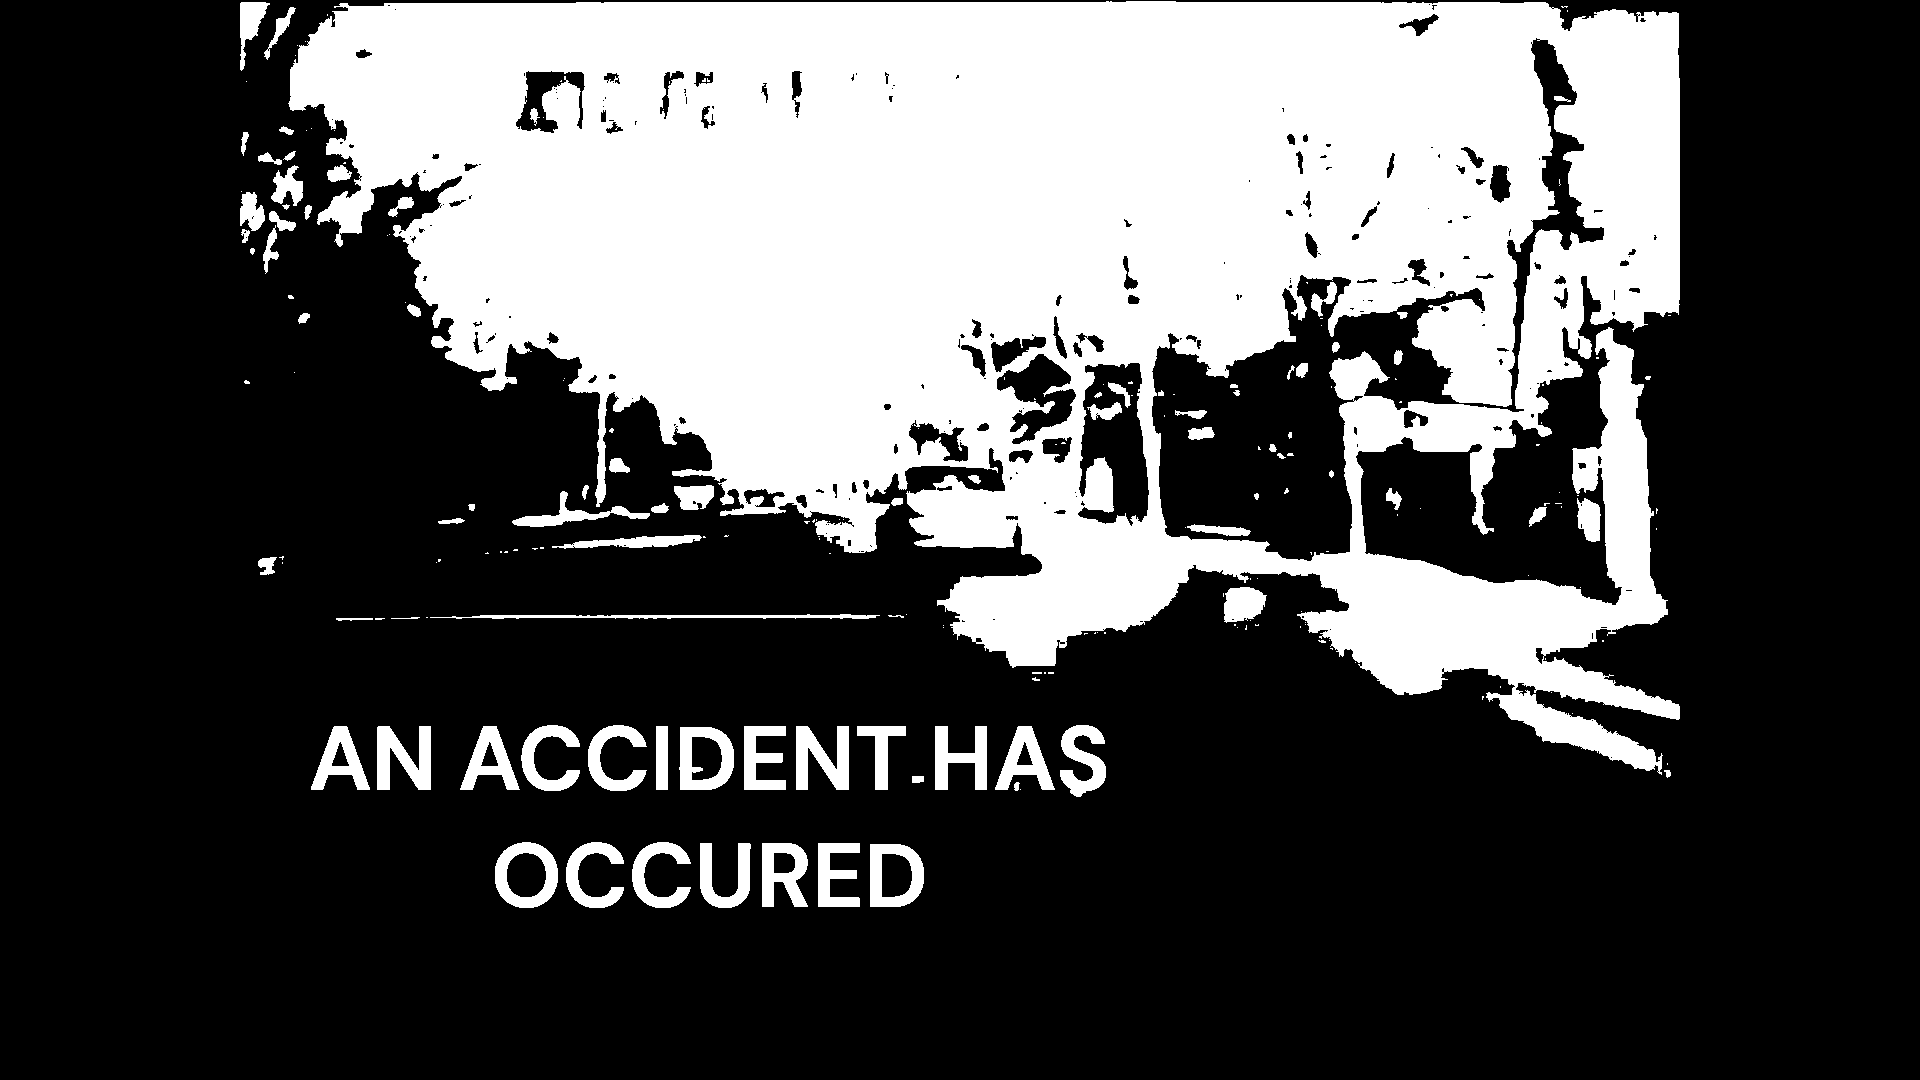

Processed Text:    

AN ACCIDENT HAS
OCCURED

Prediction: [1]


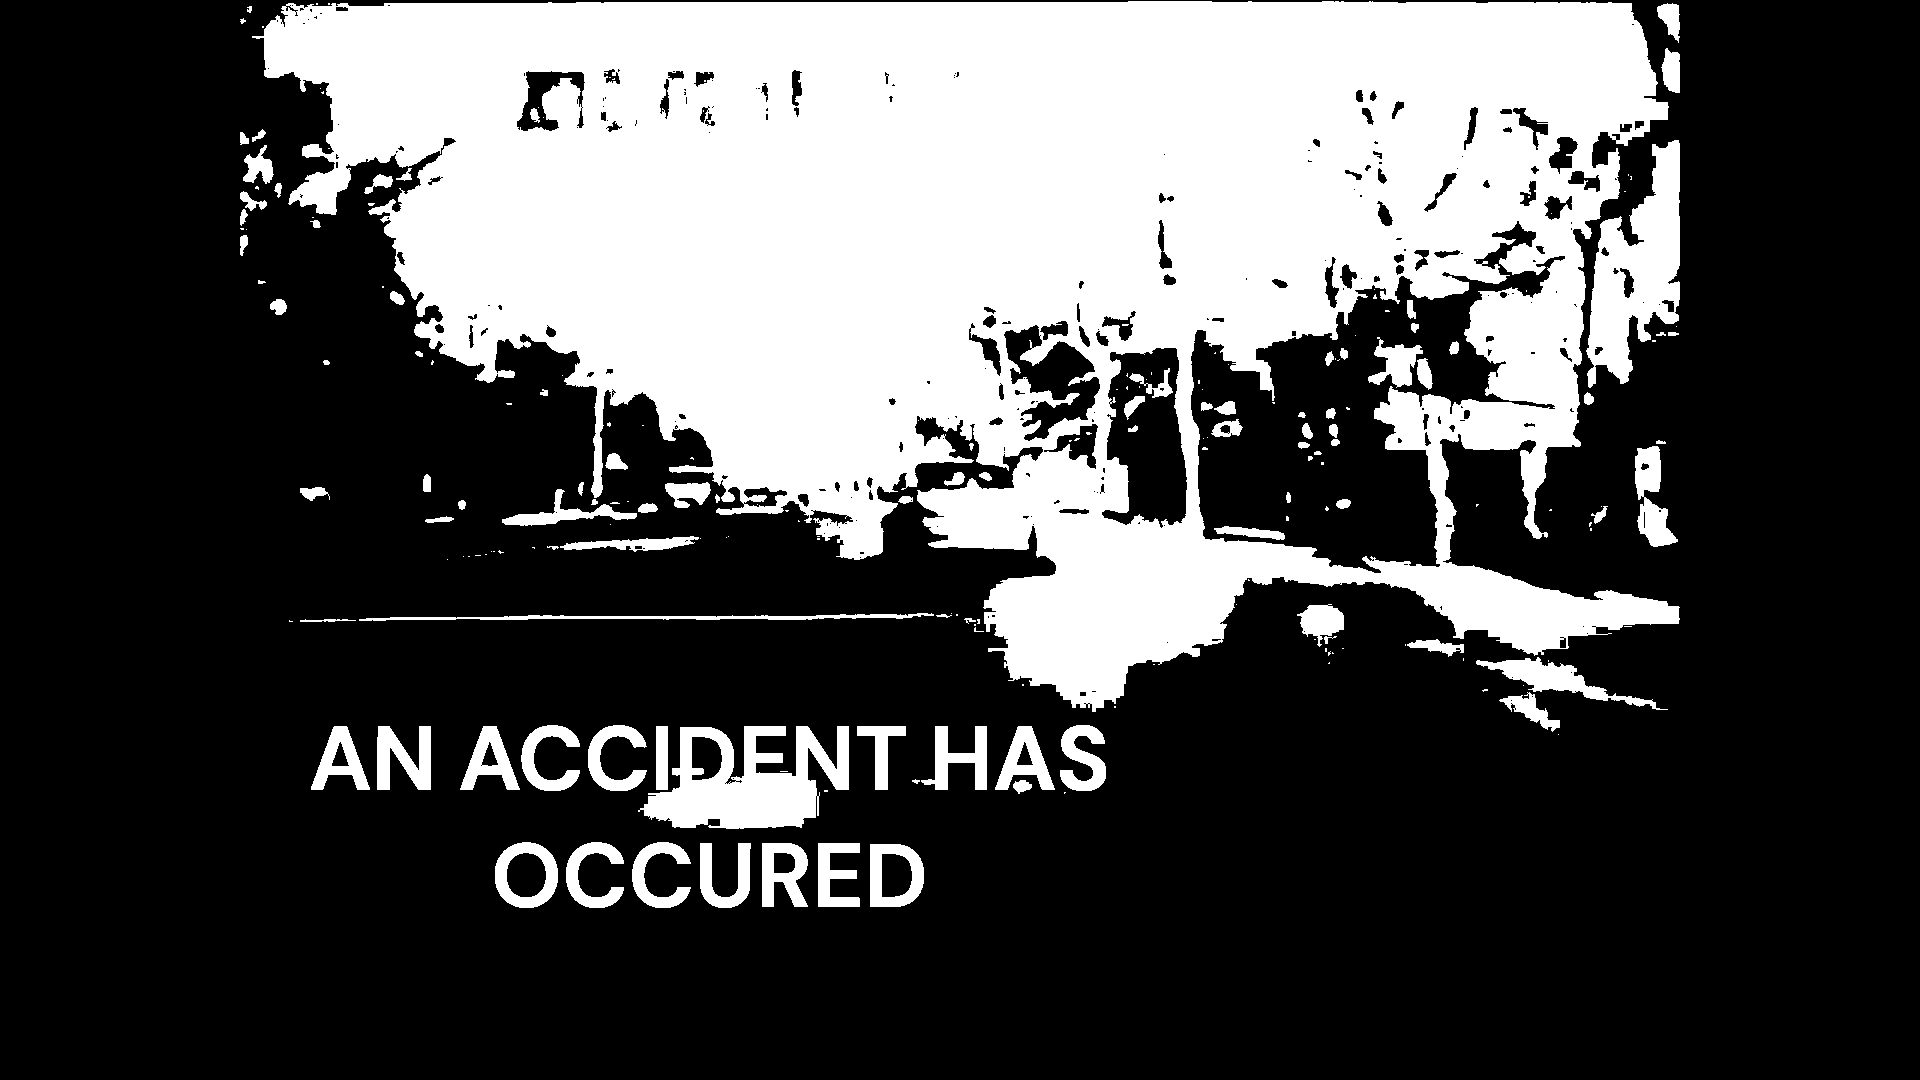

Processed Text:    

AN ACCIDENT HAS
eferer 15

Prediction: [1]


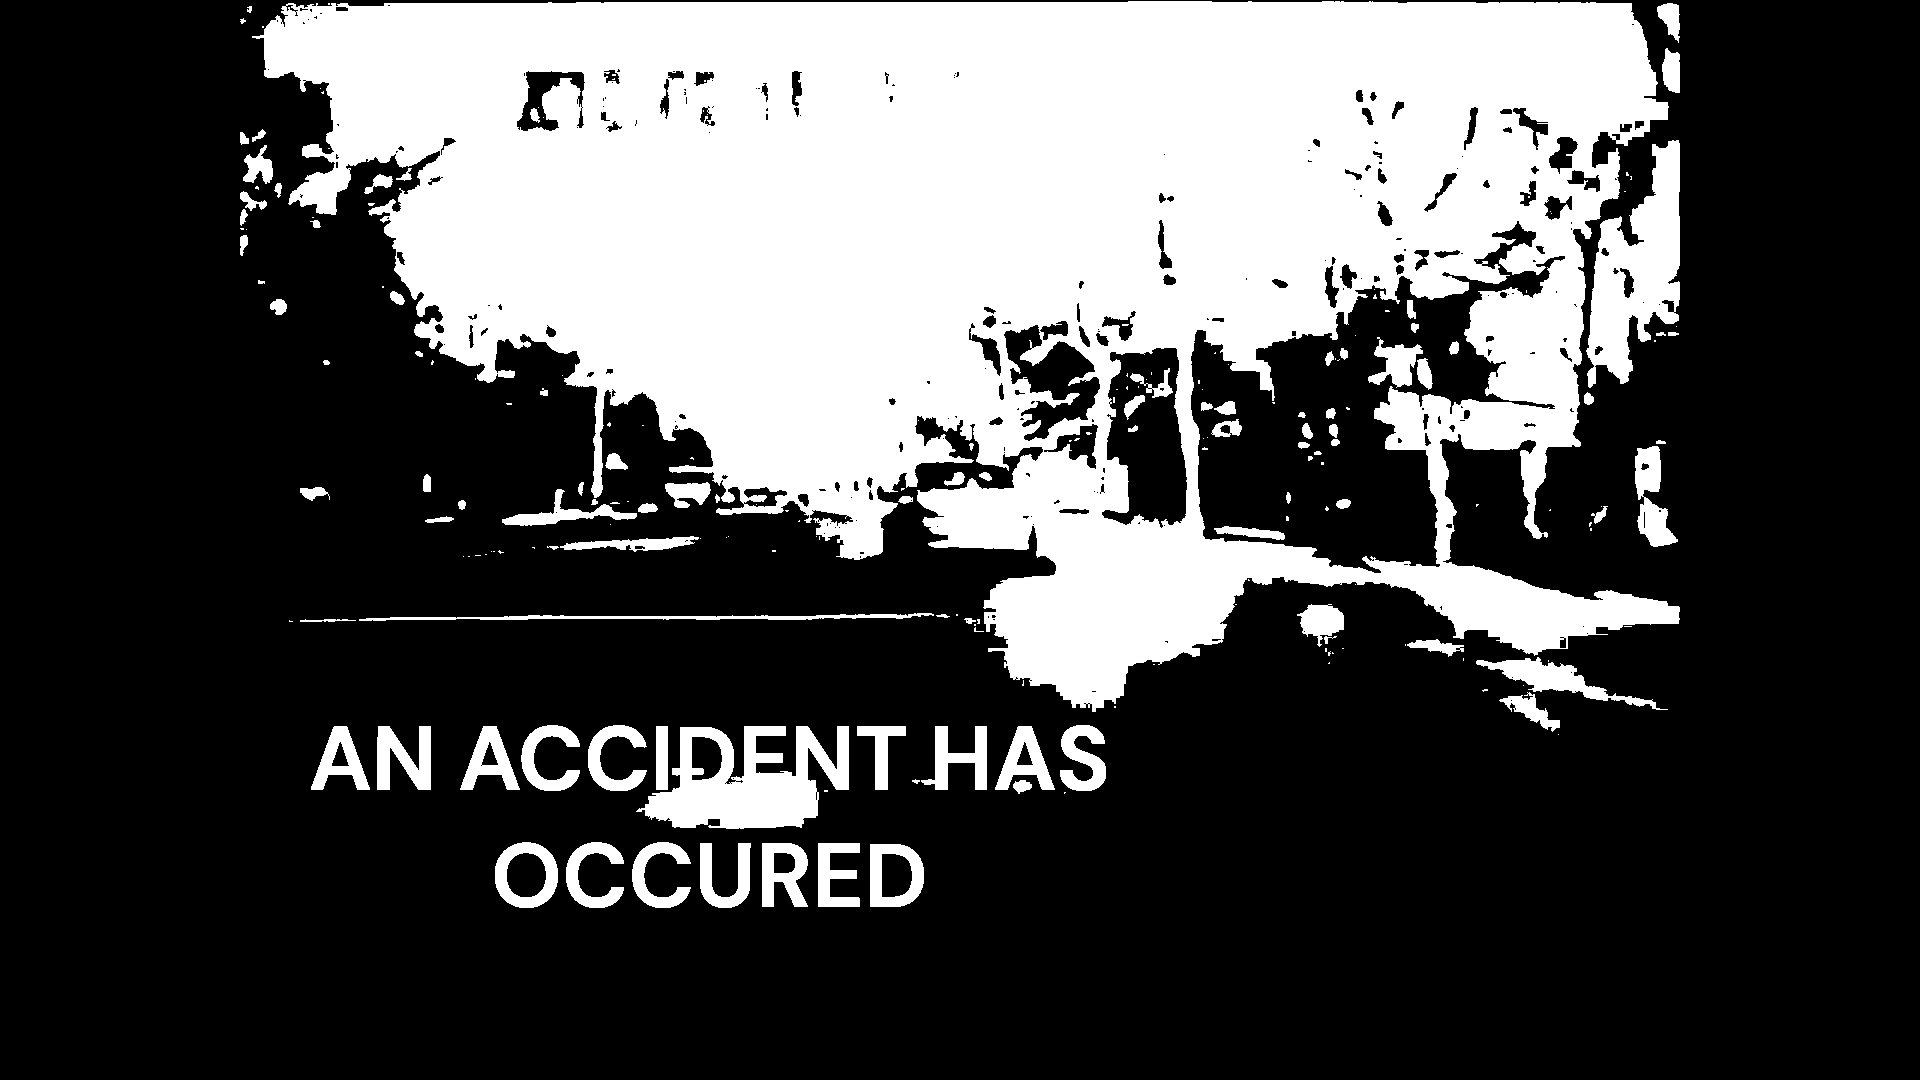

Processed Text:  

INN ACCIDENT HAS
OCCURED

 

Prediction: [1]


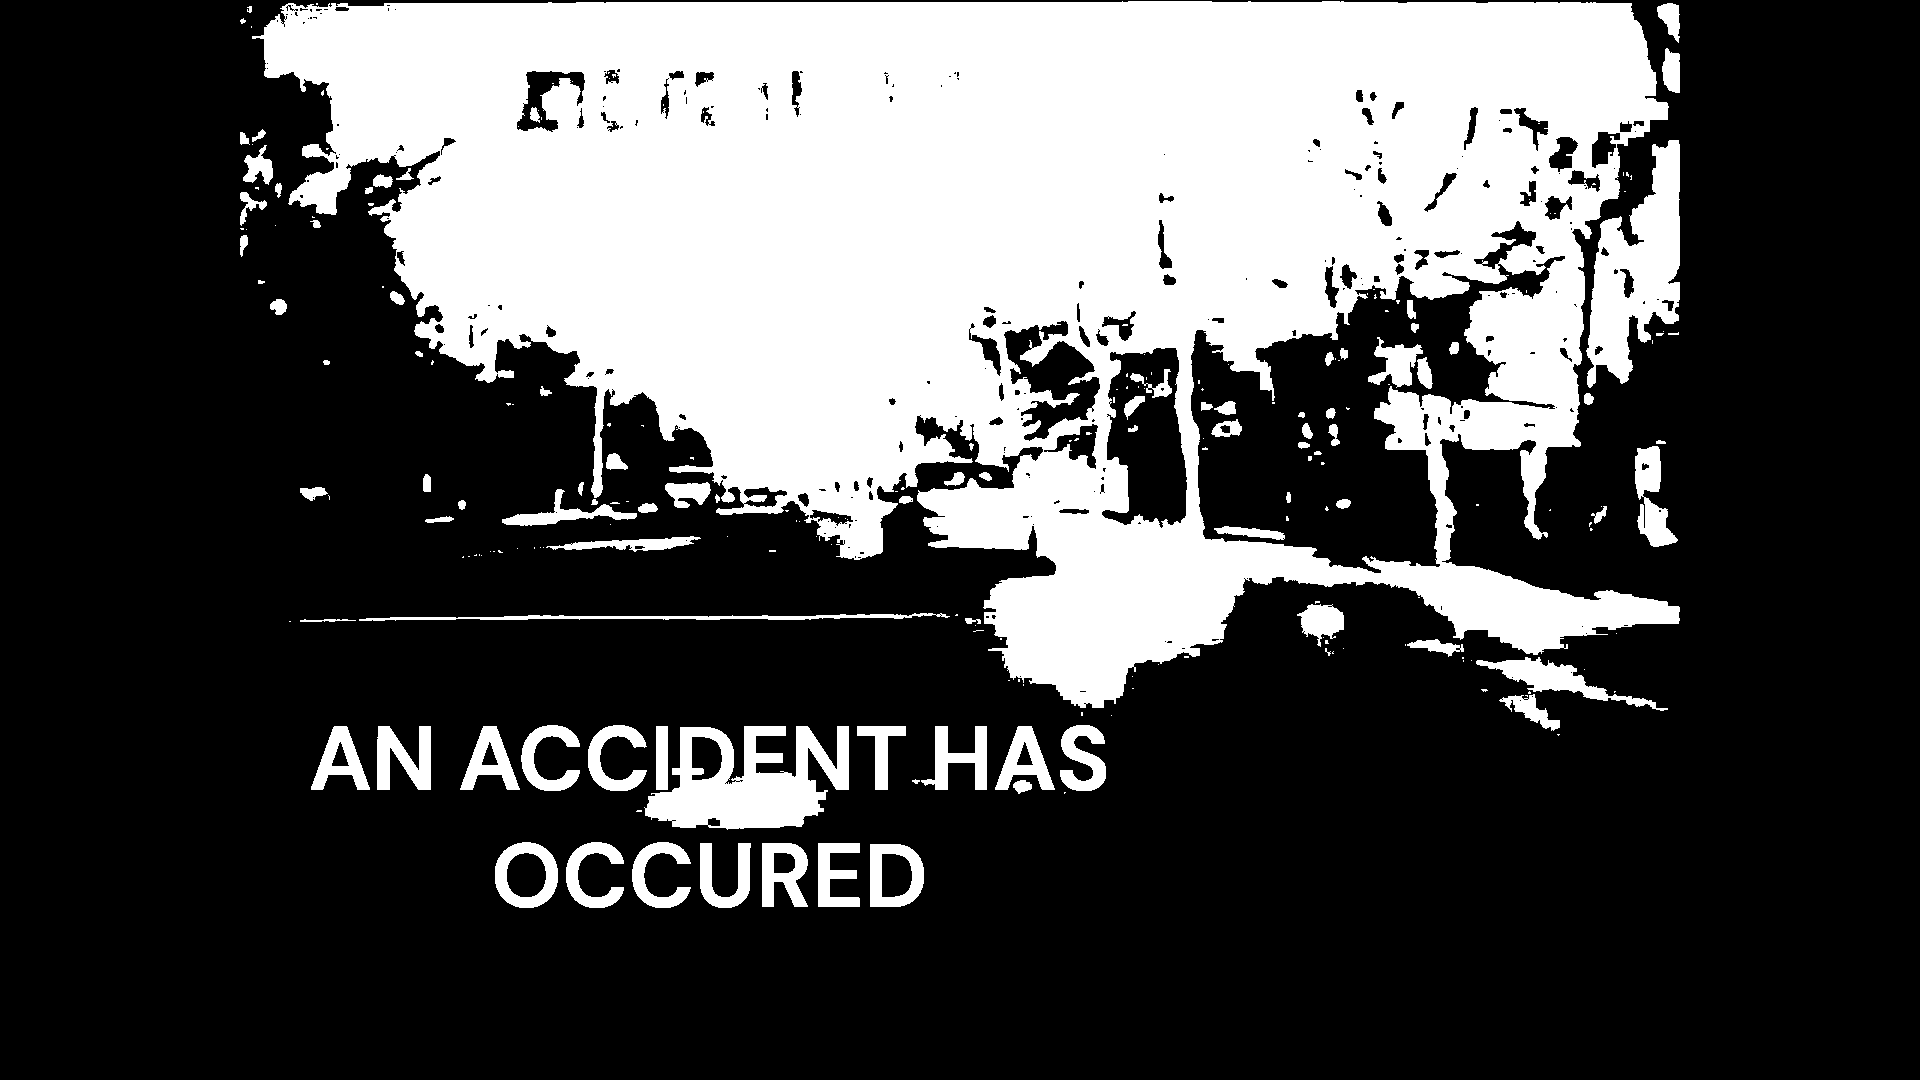

Processed Text:    

AN ACCIDENT HAS
OCCURED

Prediction: [1]


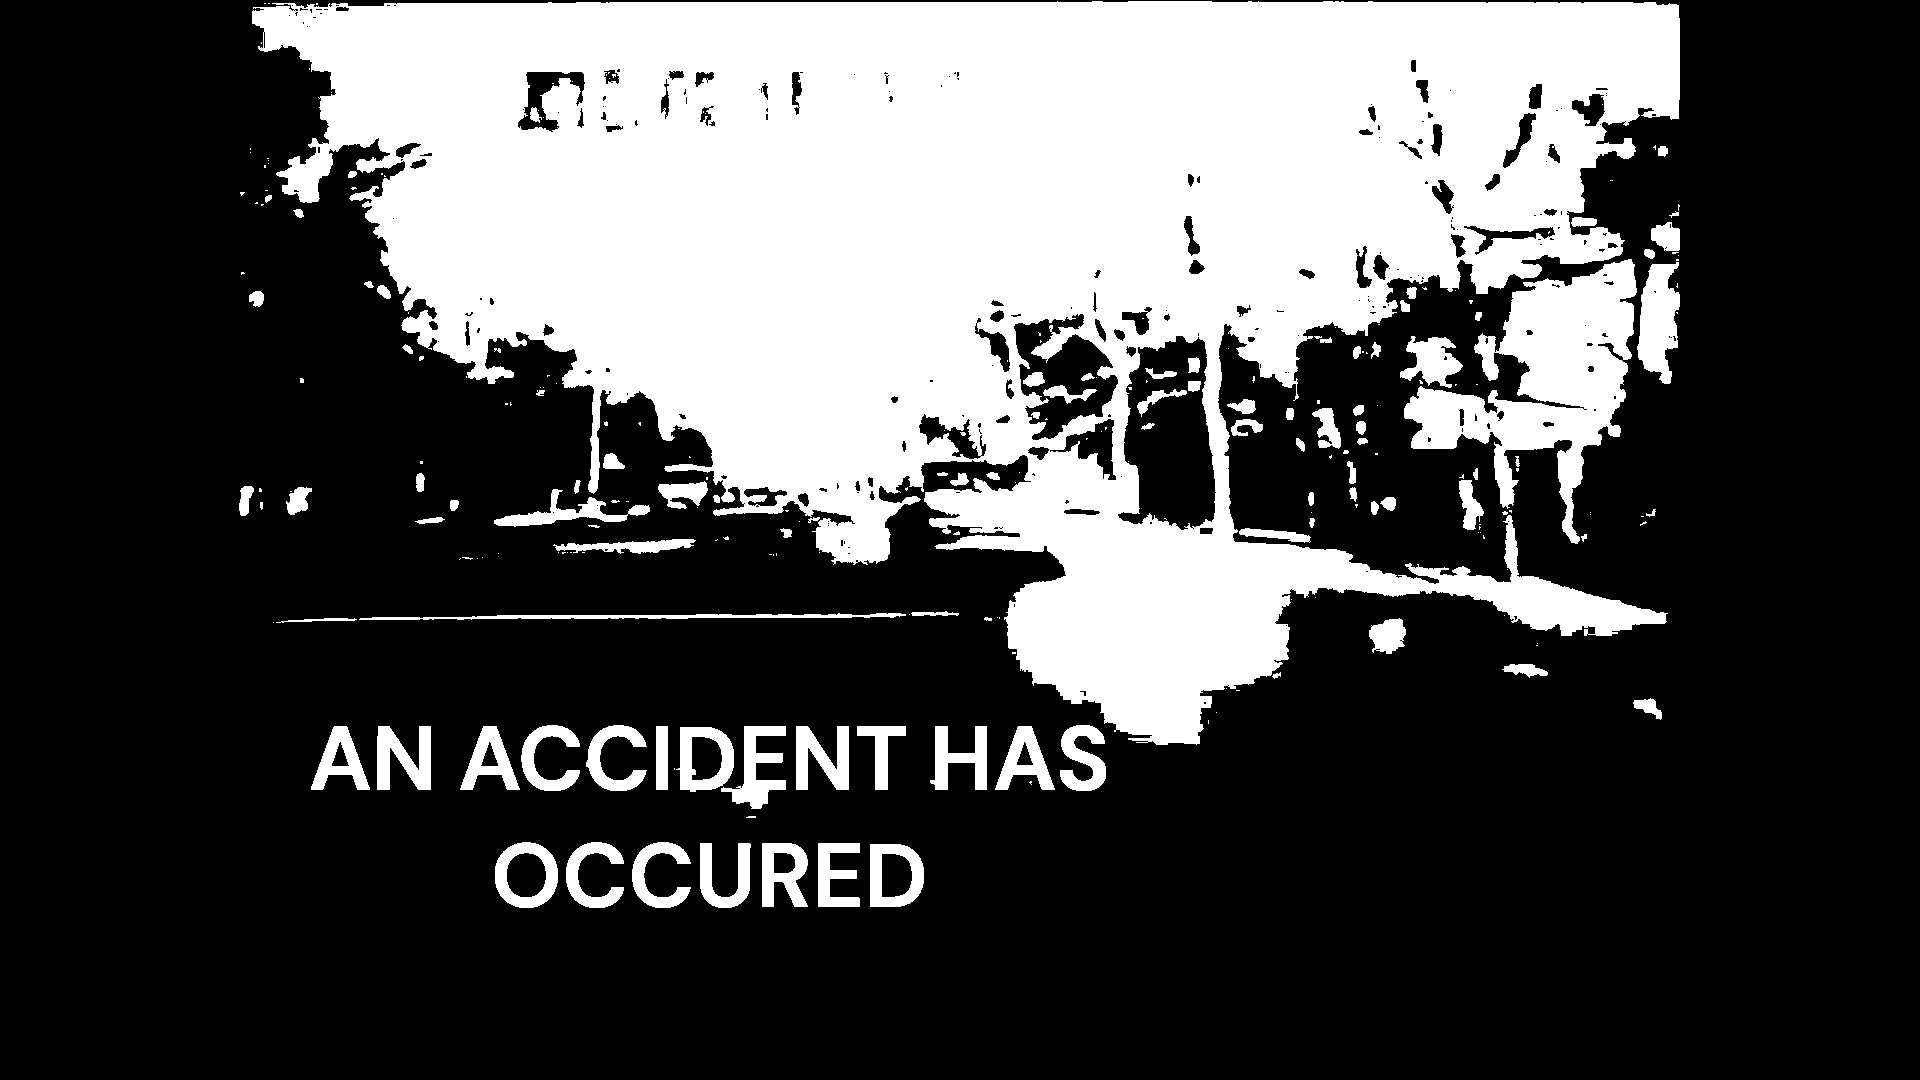

Processed Text:    

AN ACCIDENT HAS
OCCURED

Prediction: [1]


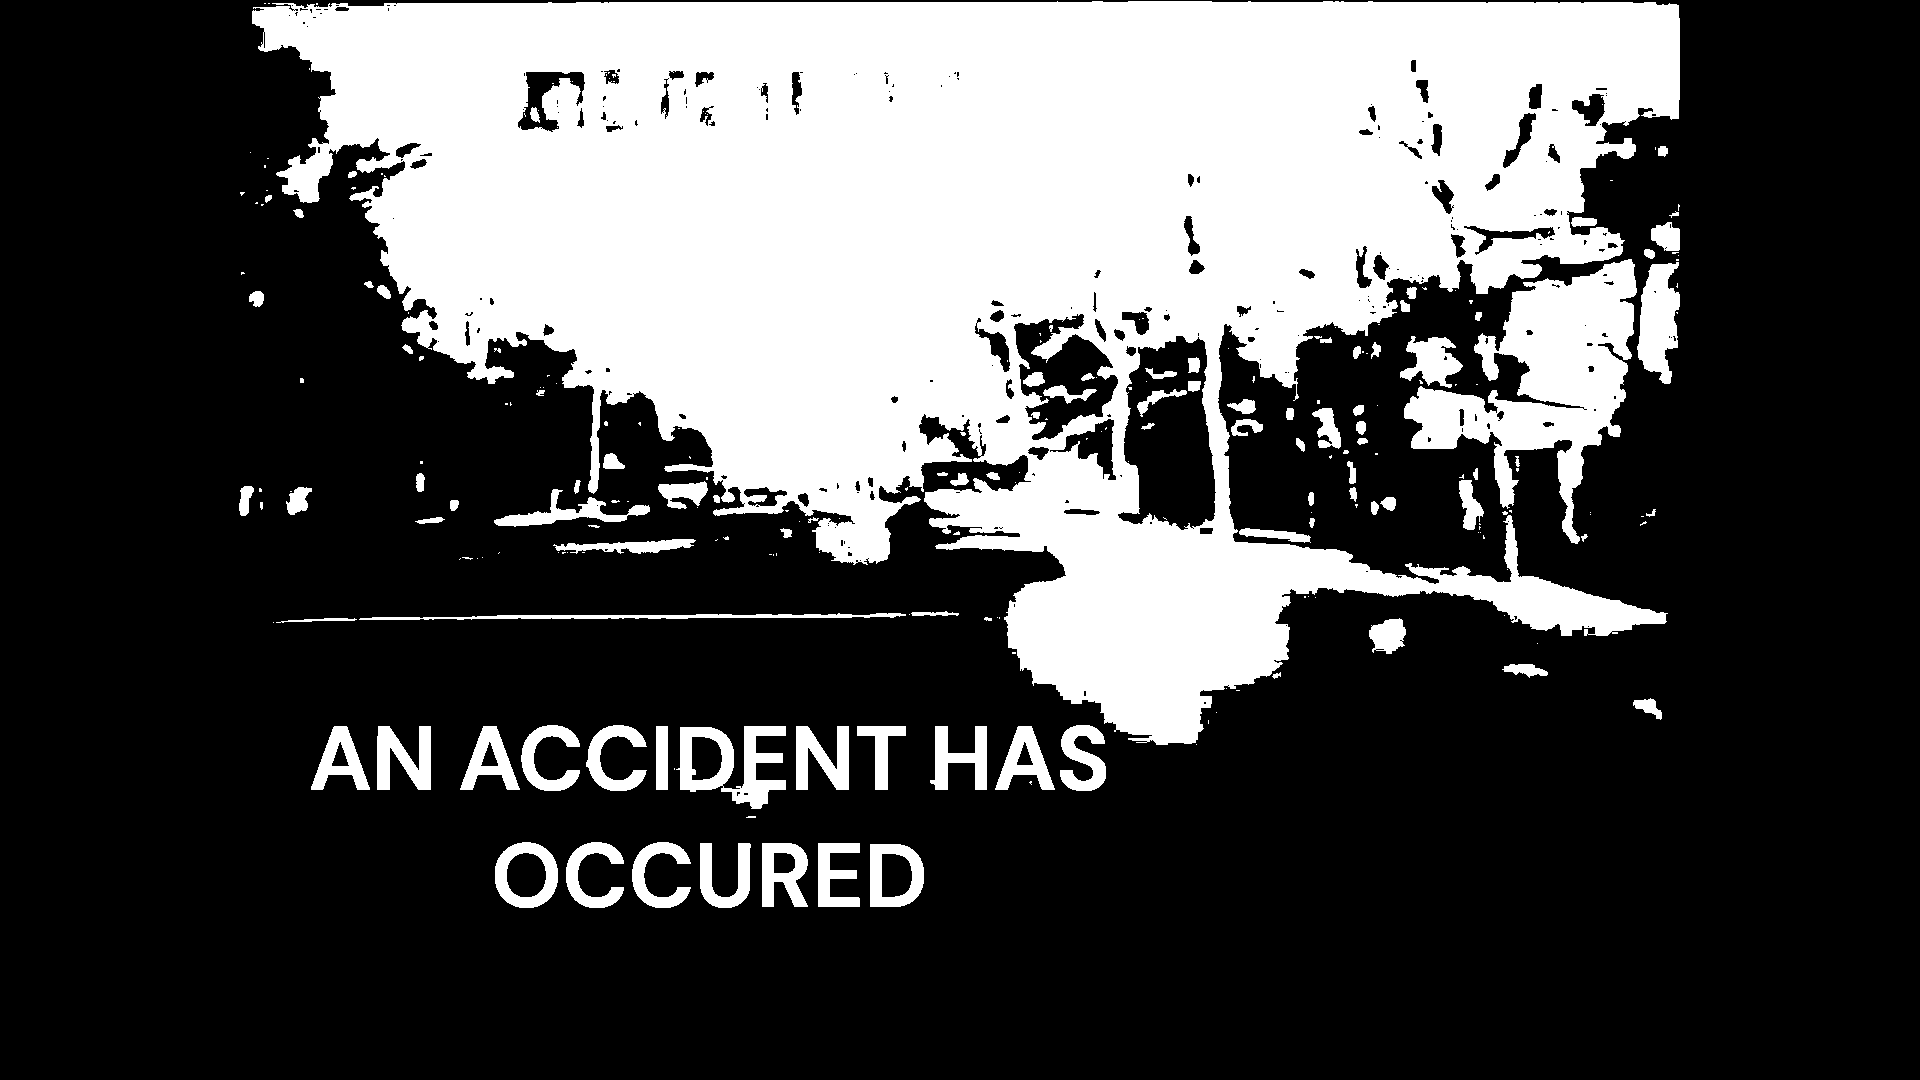

Processed Text:    

AN ACCIDENT HAS
OCCURED

Prediction: [1]


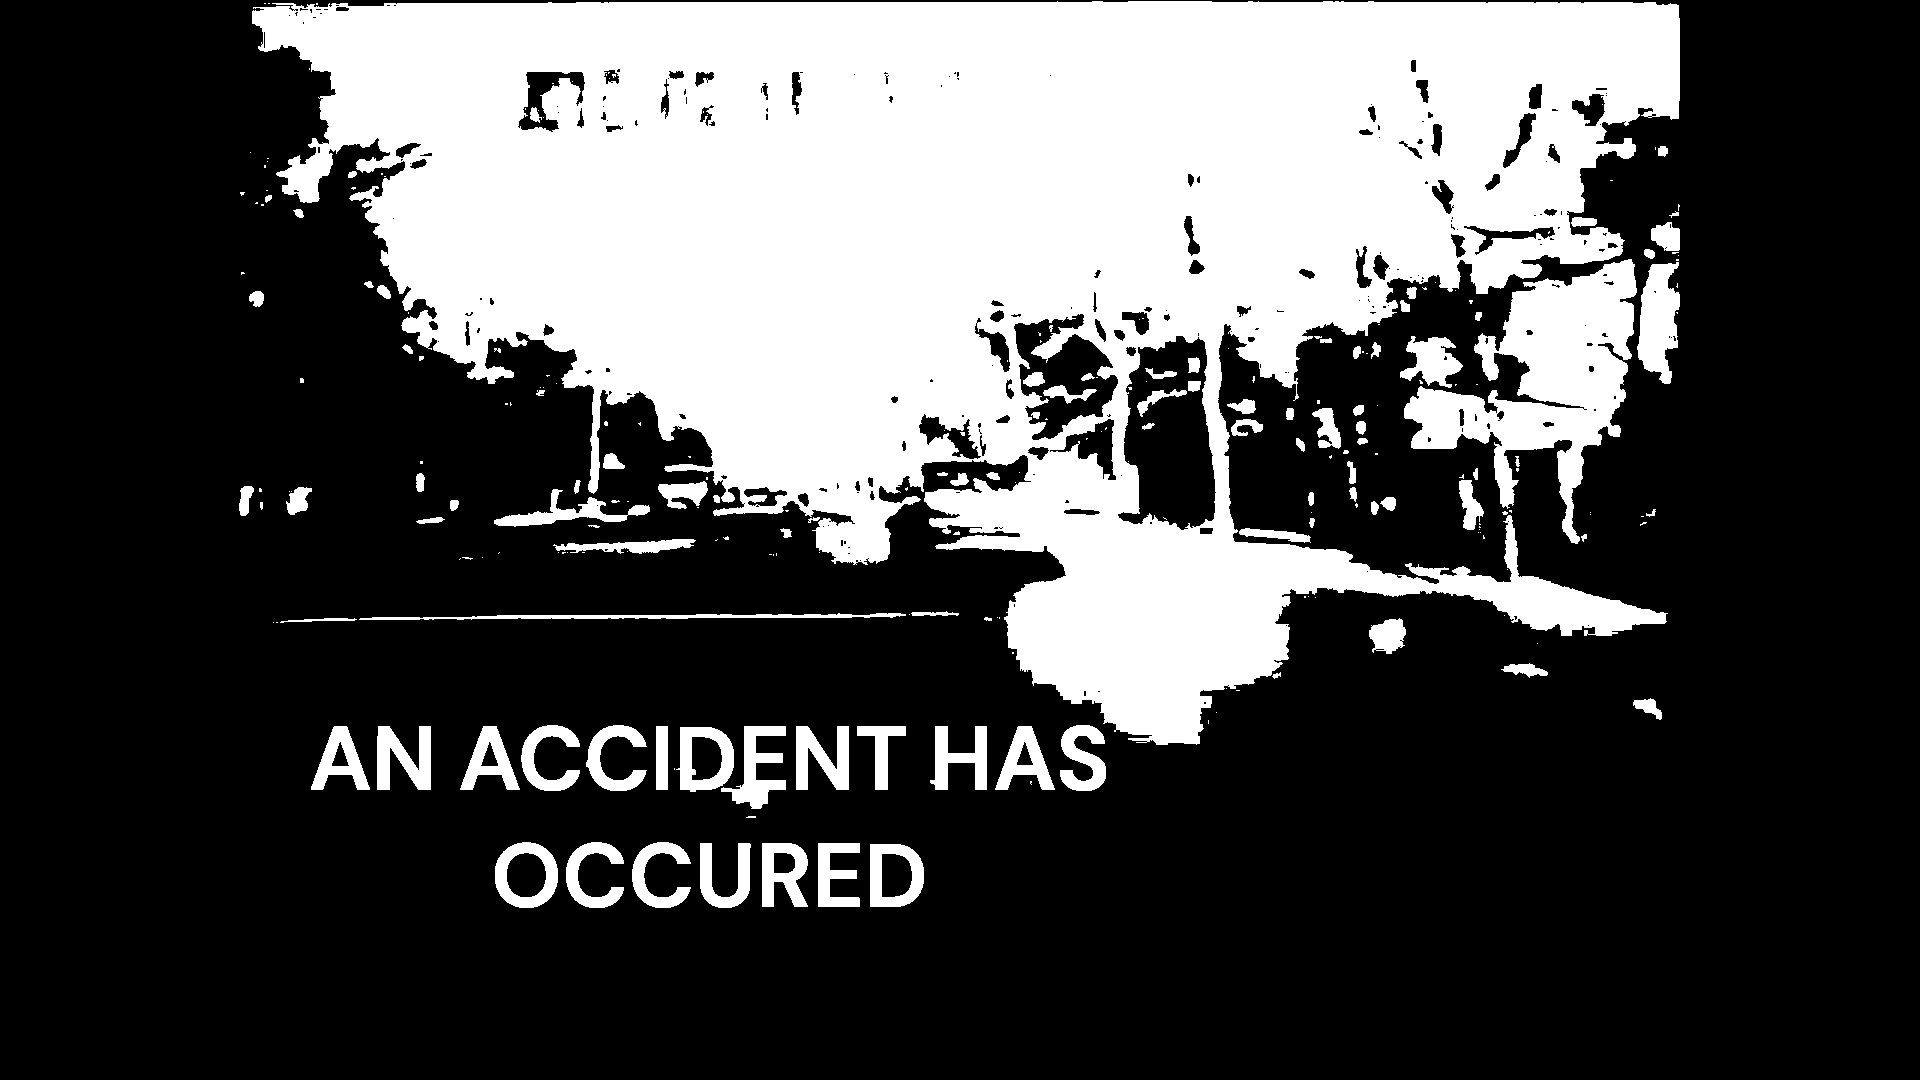

Processed Text:  

Prediction: [0]


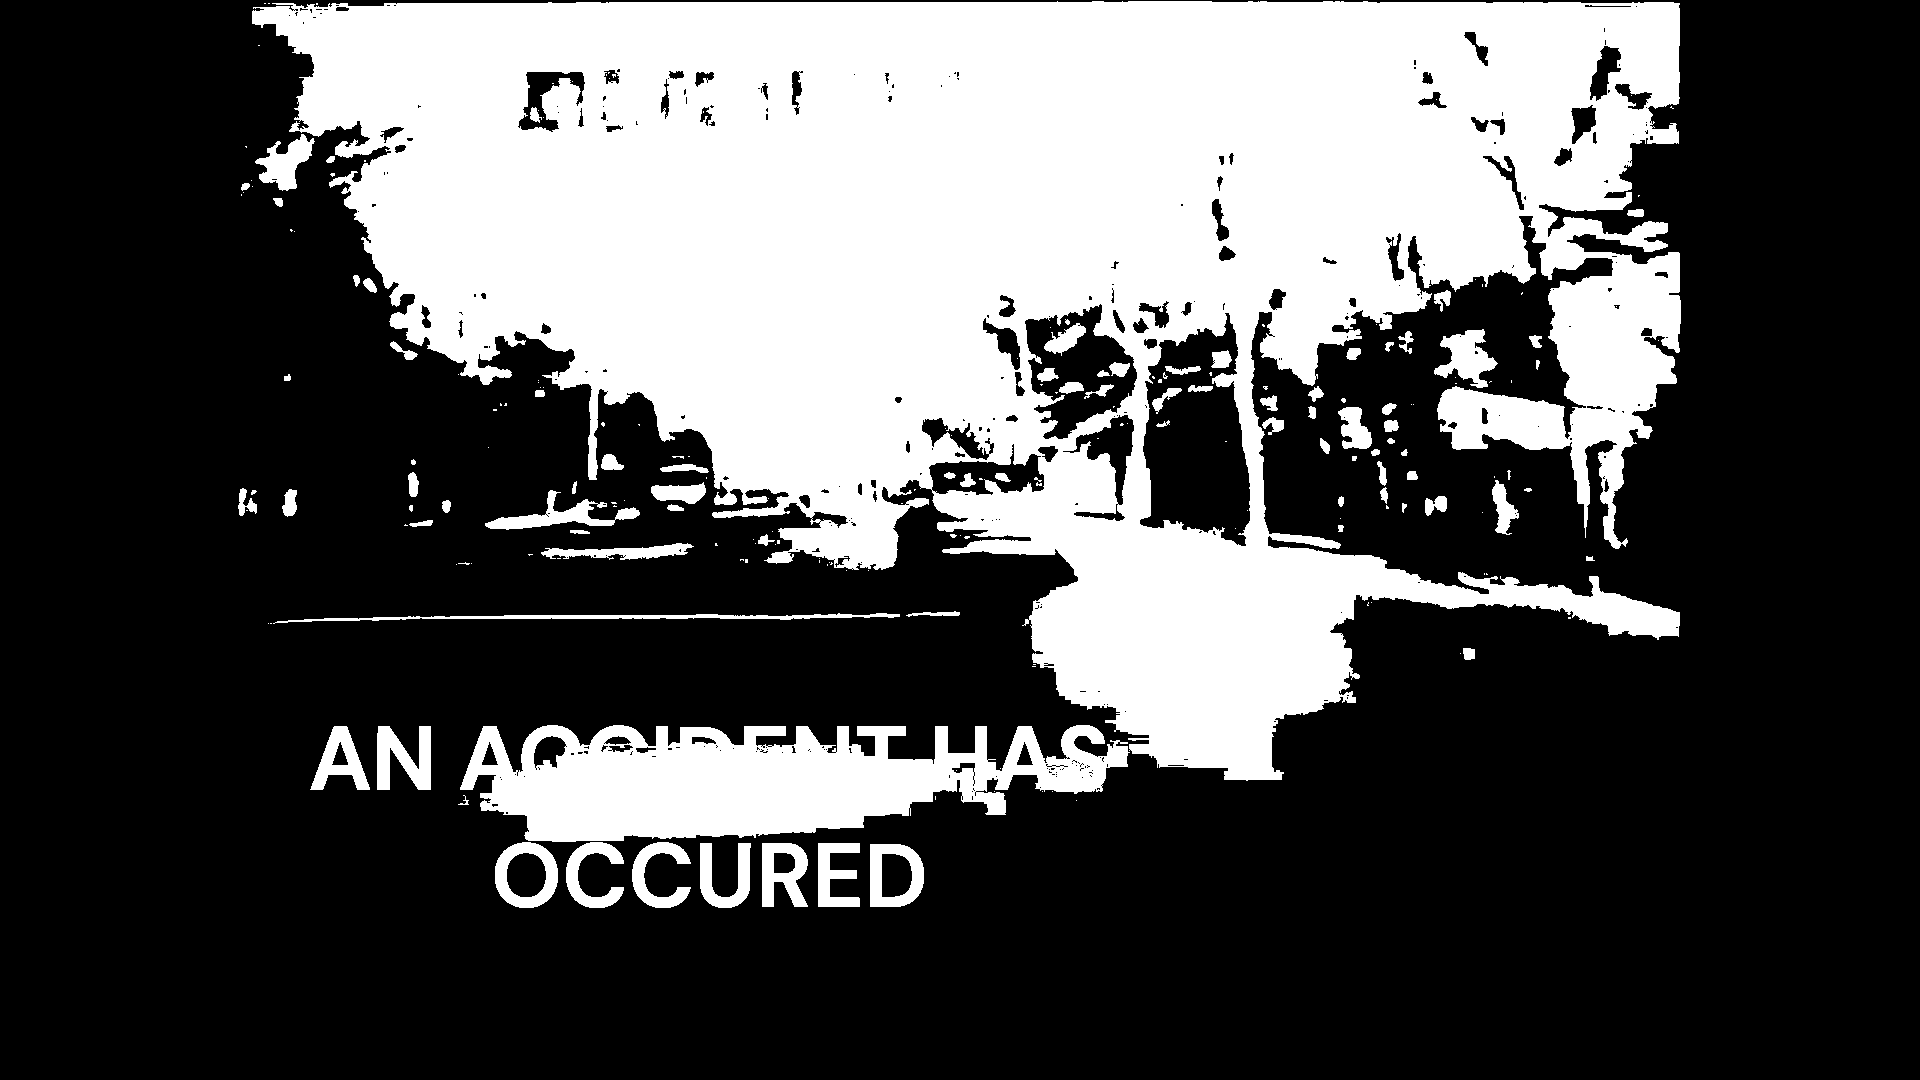

Processed Text:  

Prediction: [0]


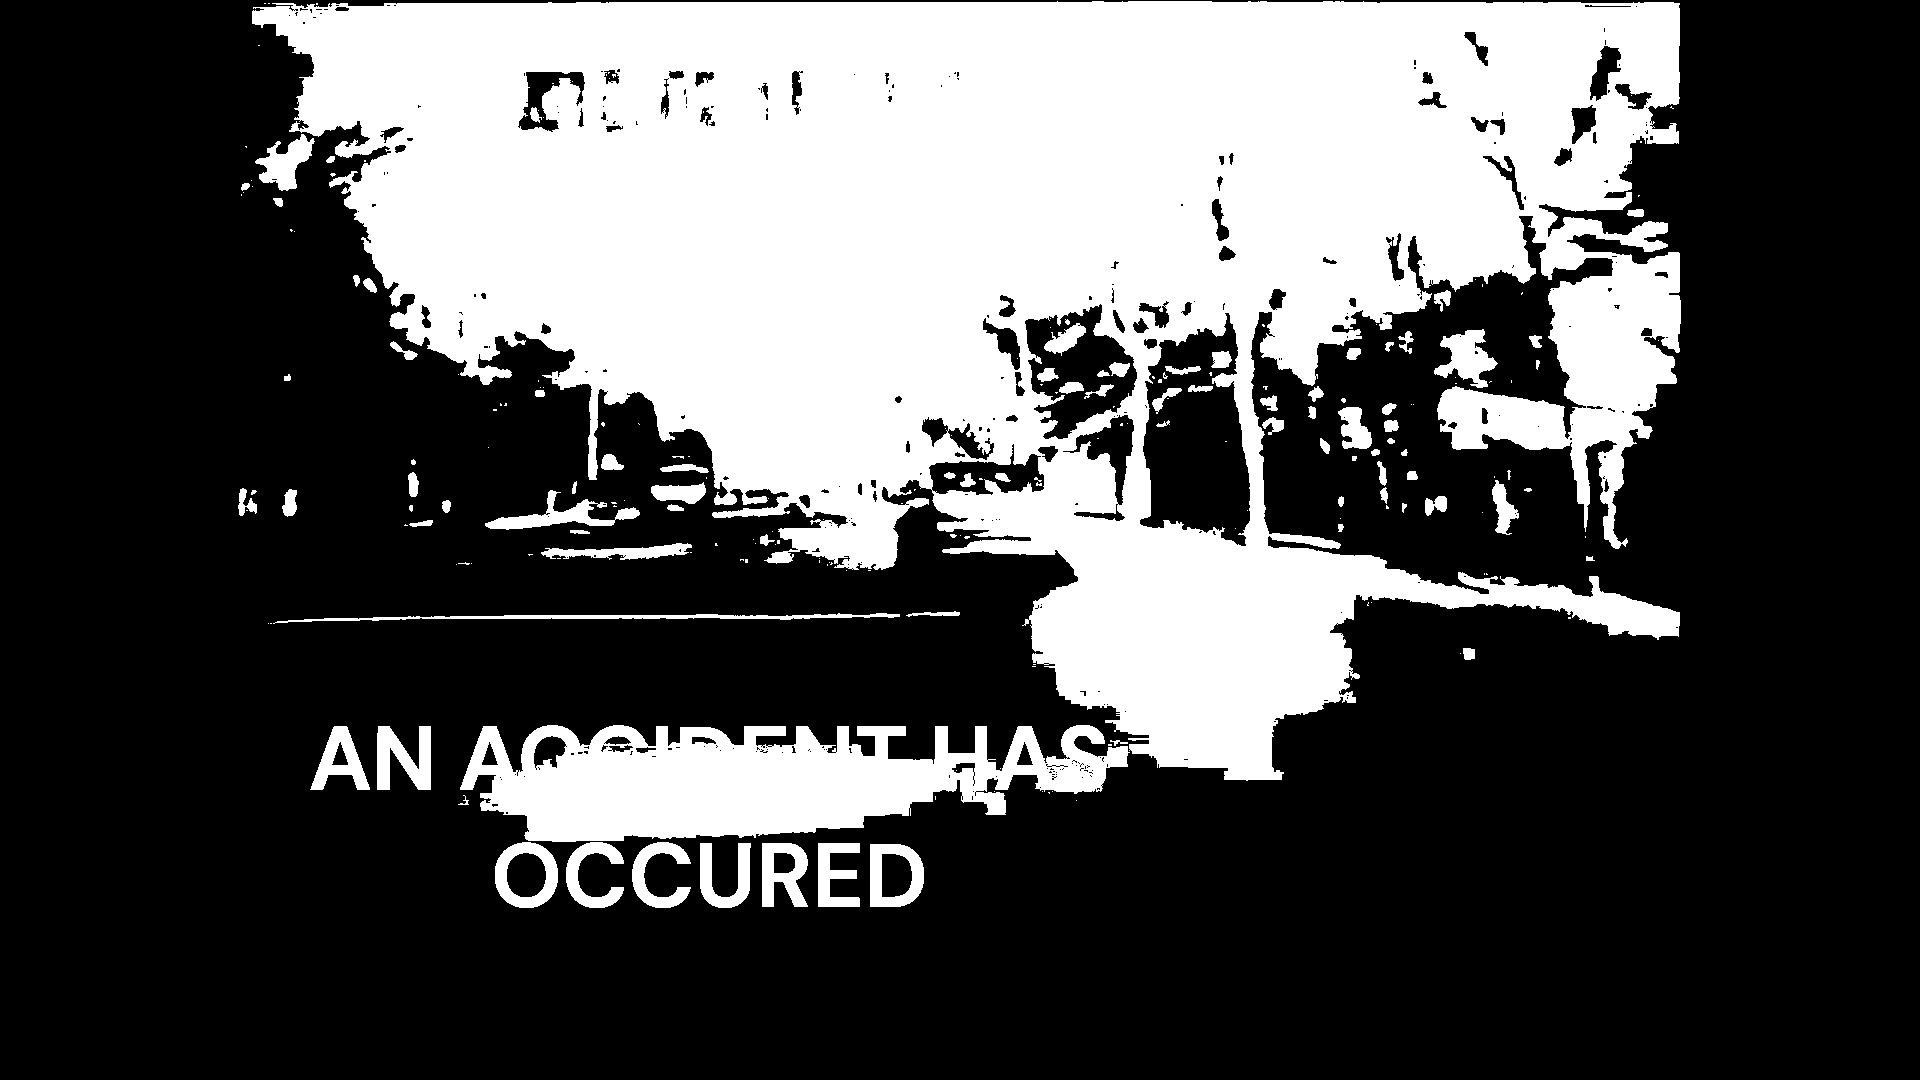

Processed Text:  

Prediction: [0]


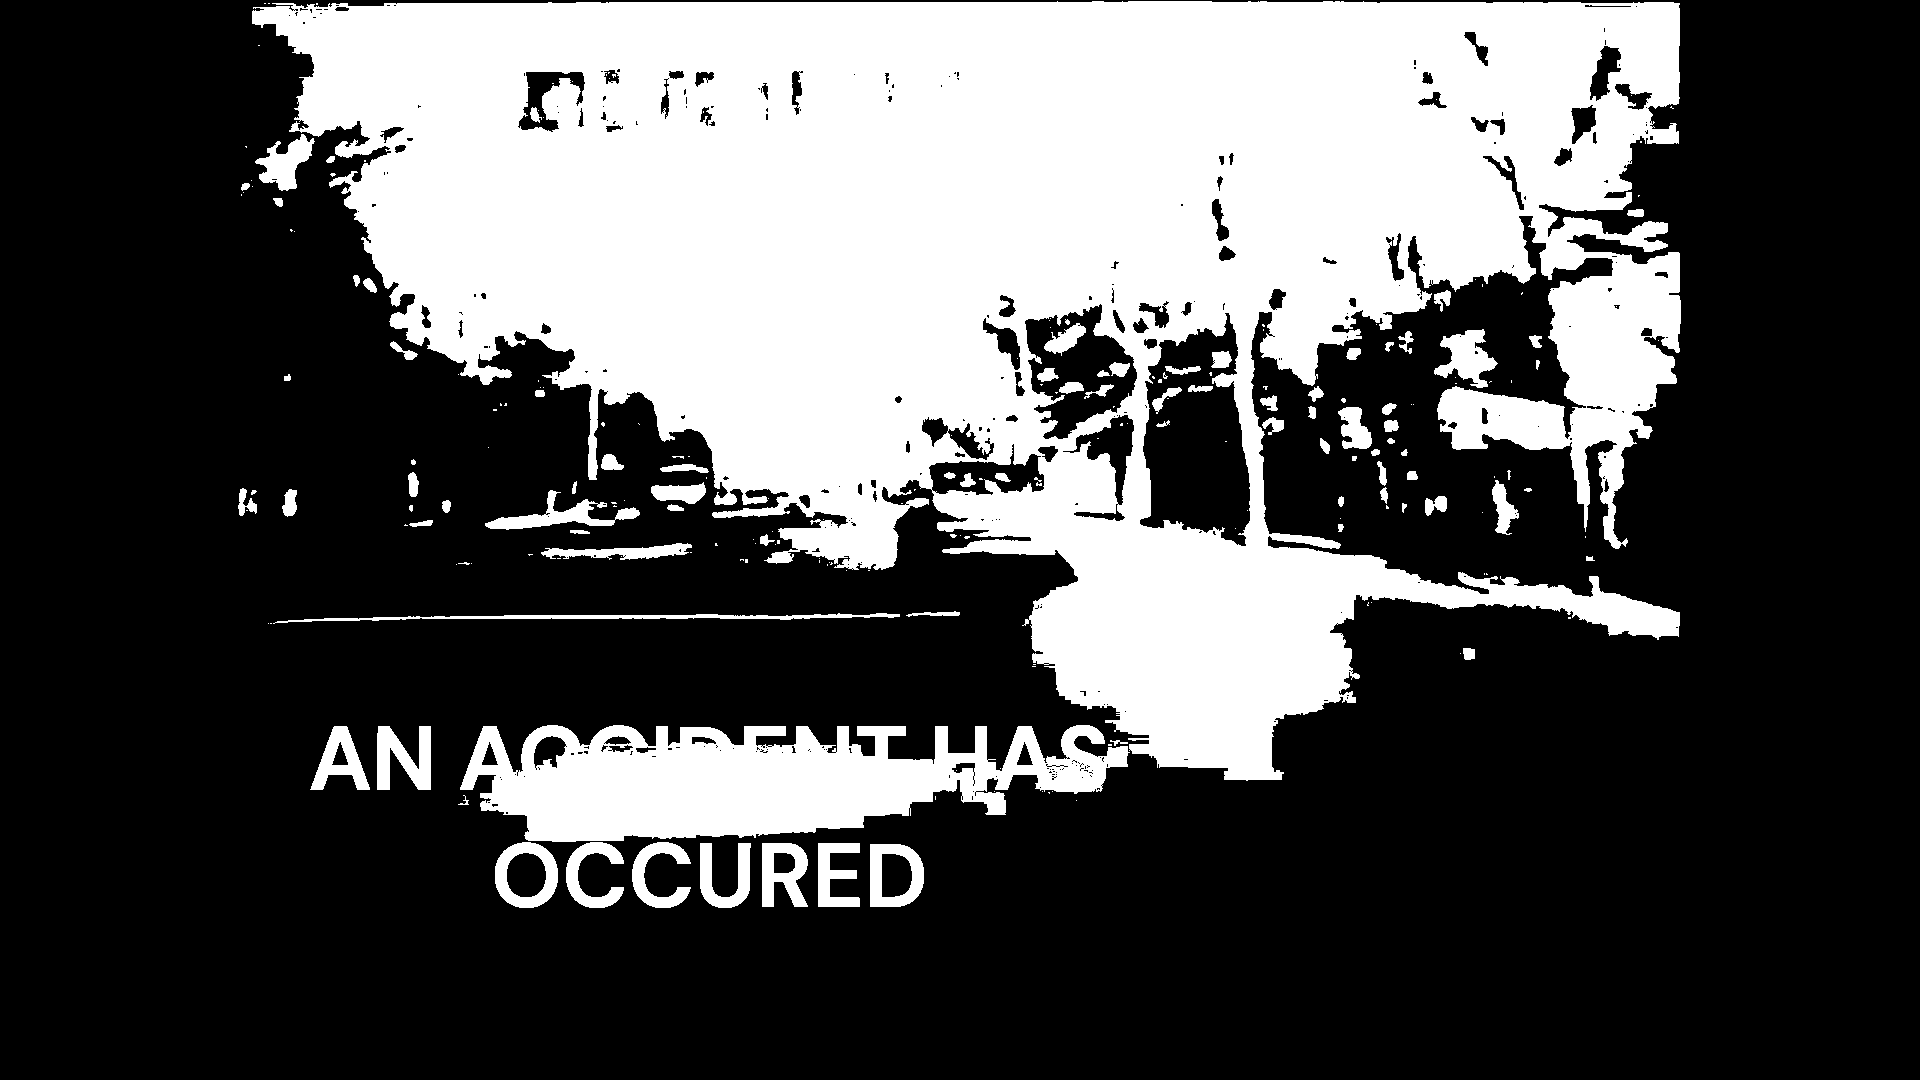

Processed Text:  

Prediction: [0]


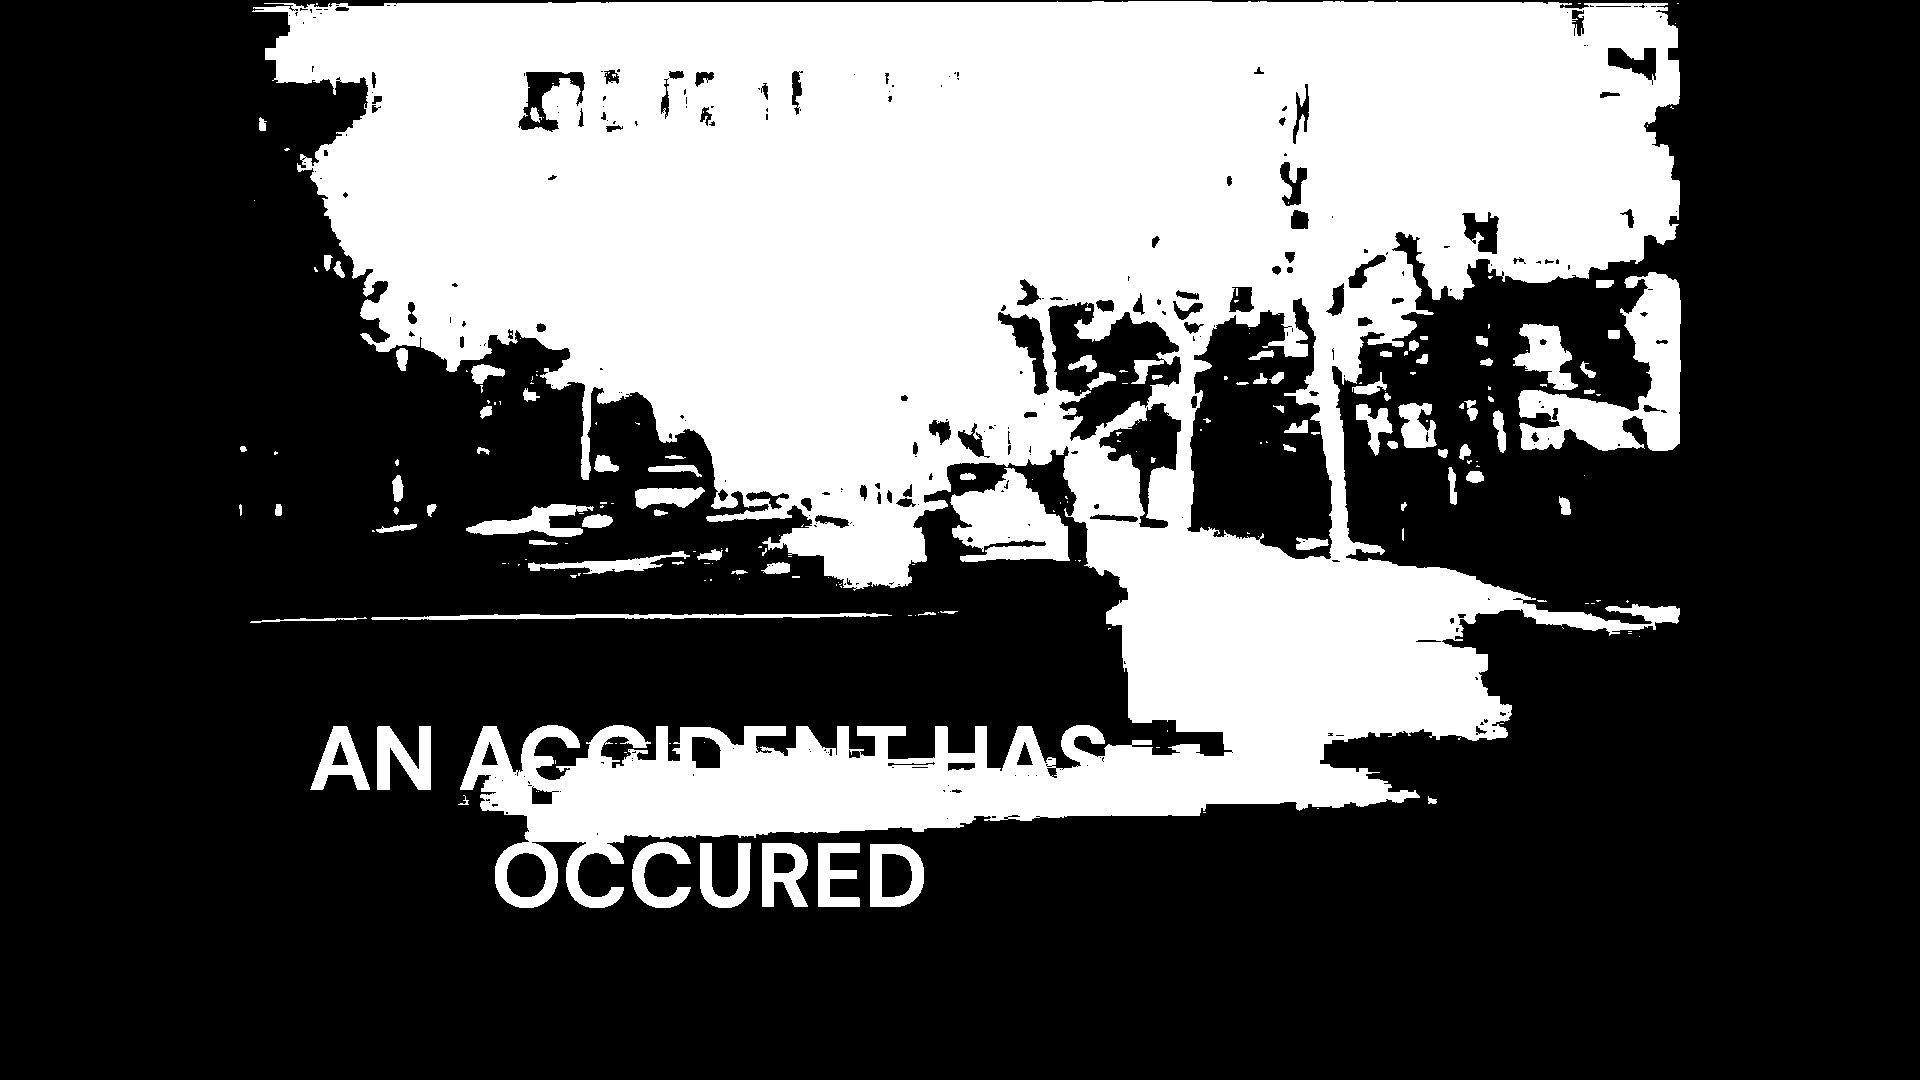

Processed Text:  

Prediction: [0]


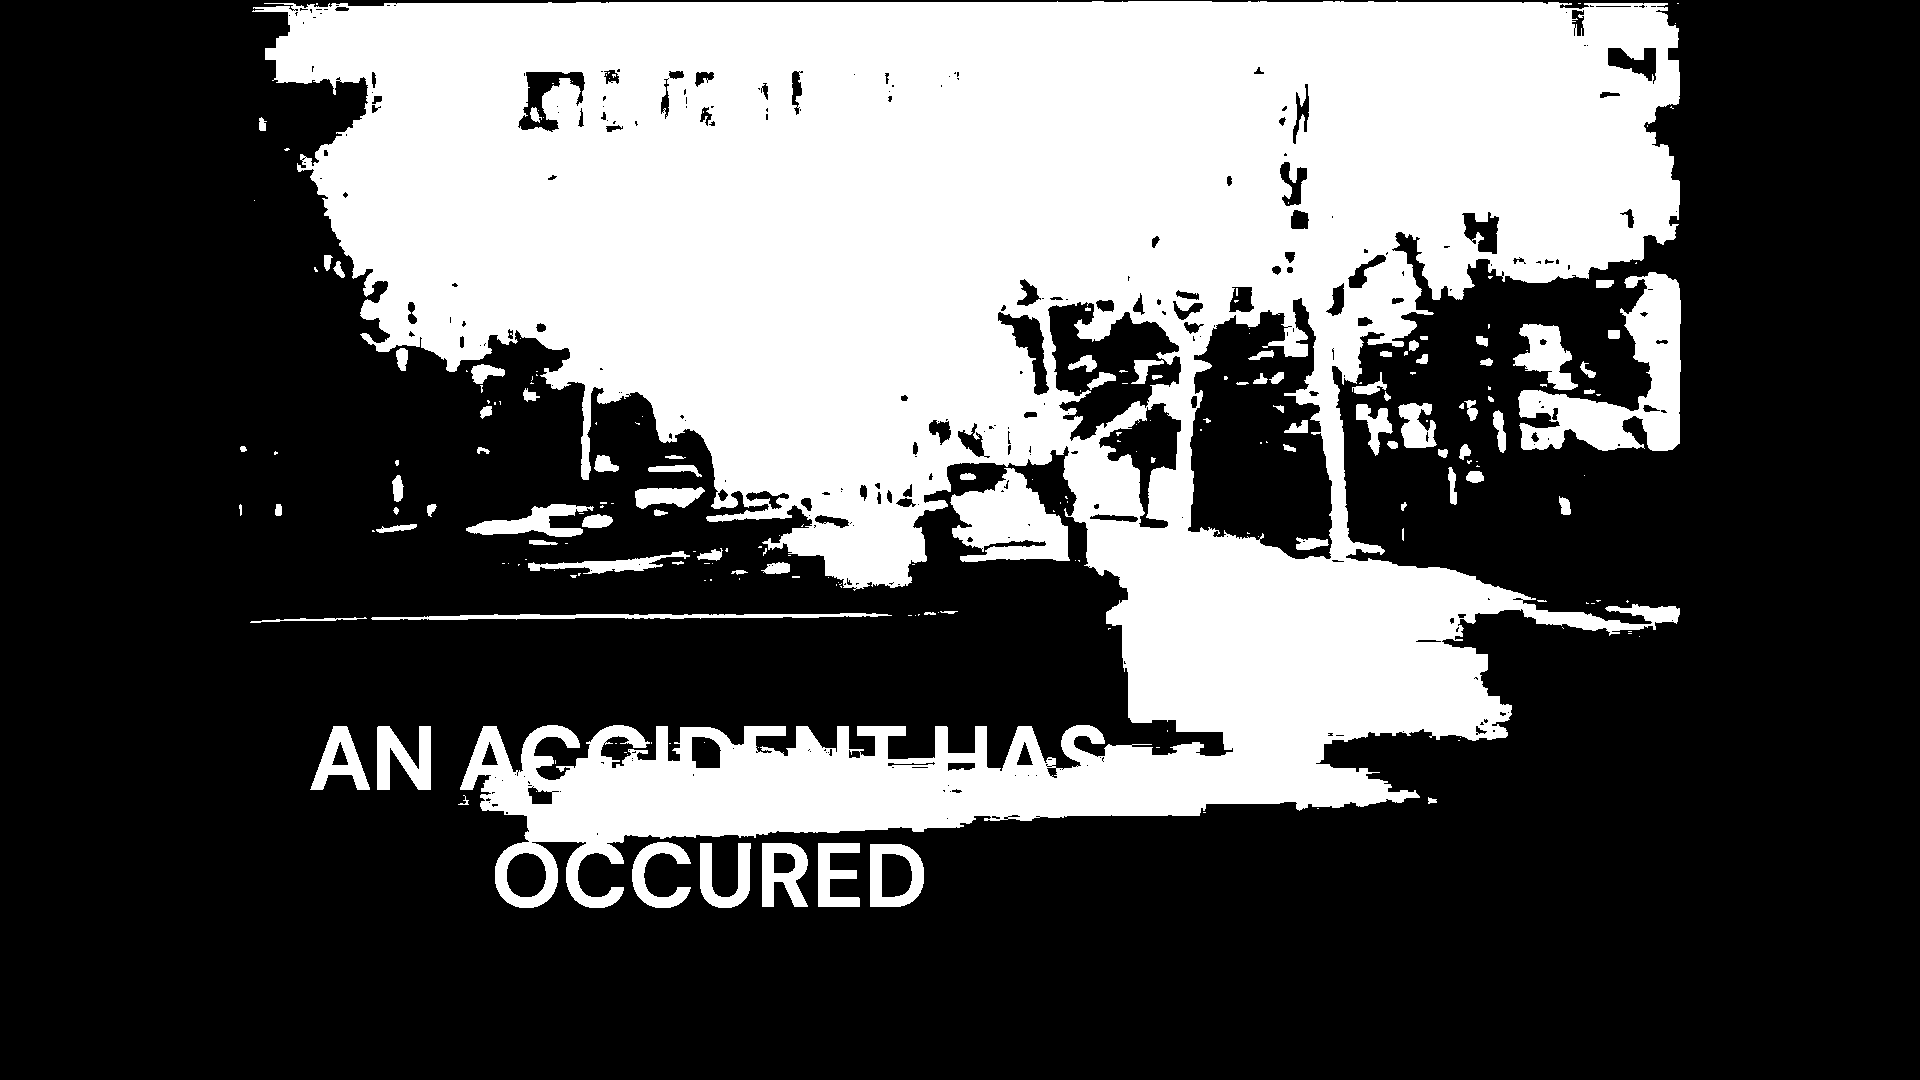

Processed Text:  

Prediction: [0]


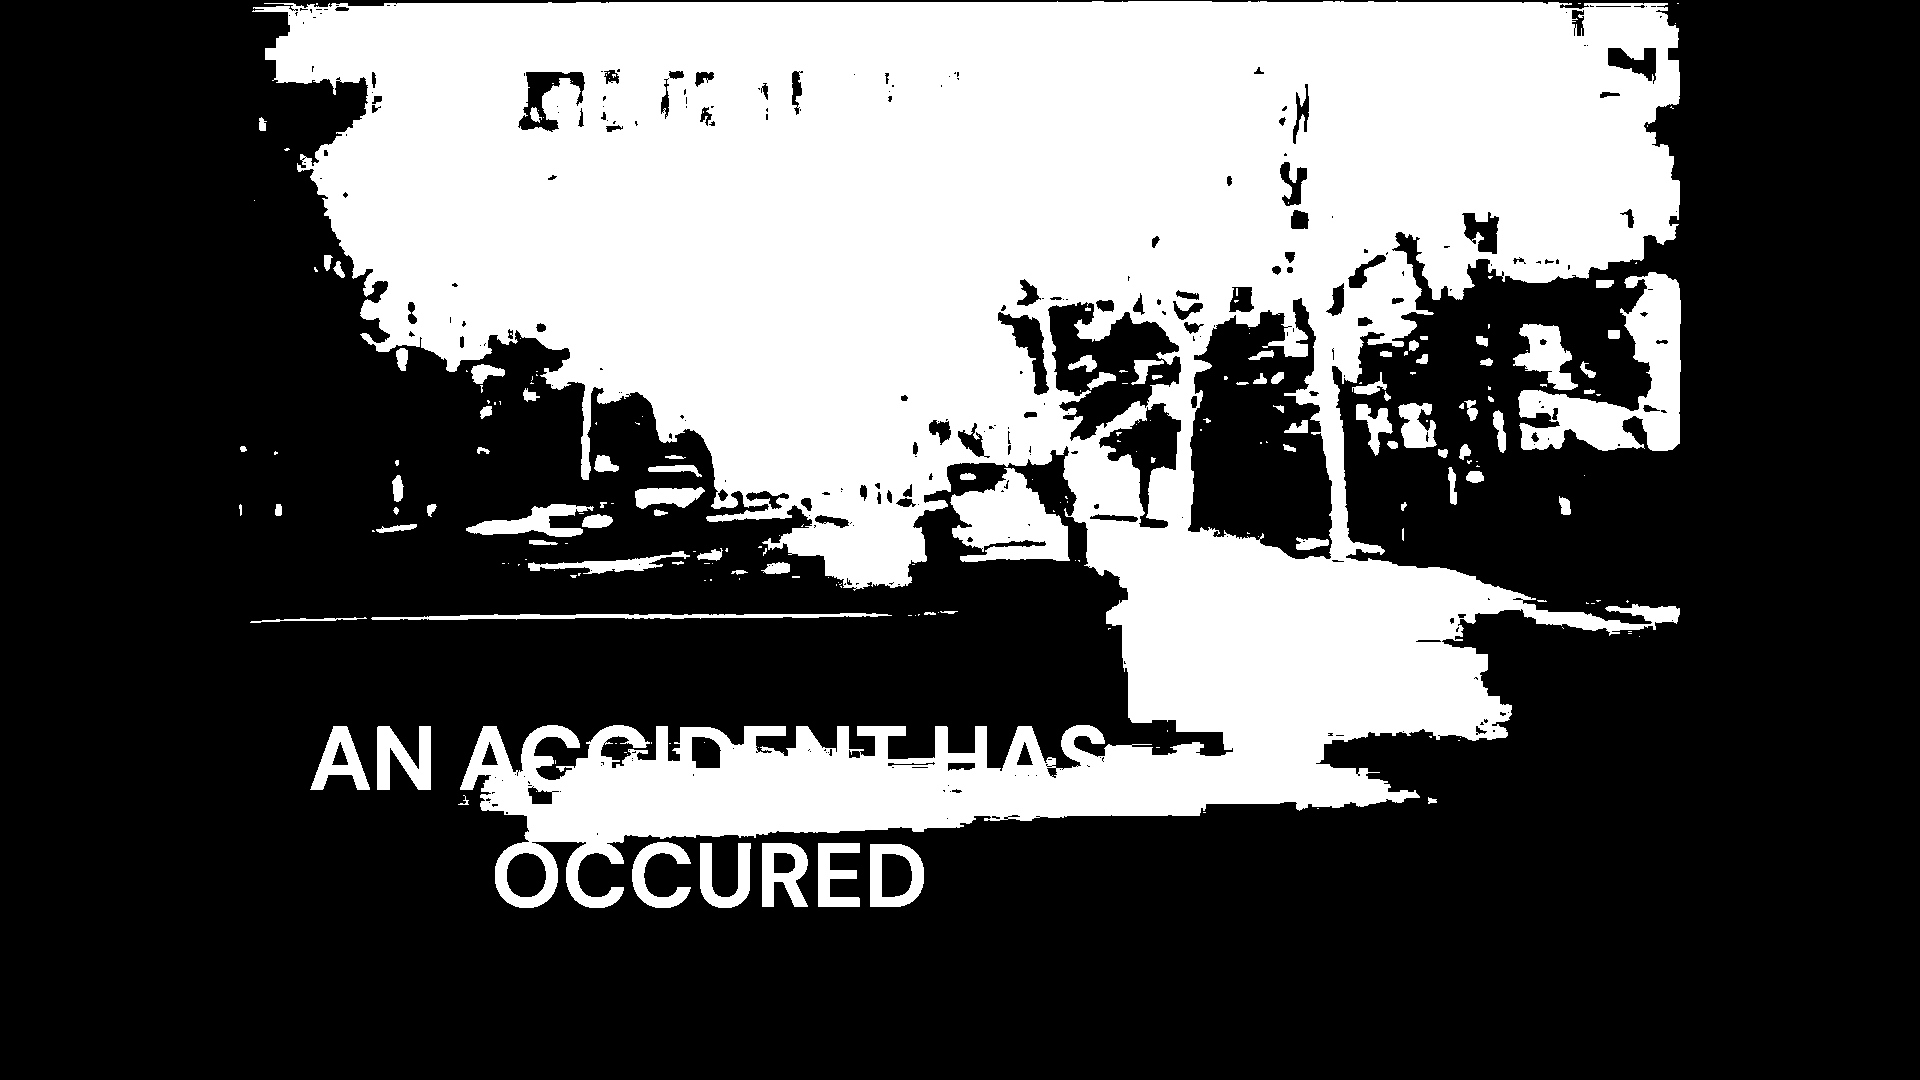

Processed Text:    

AN ACCIDENT HAS_
OCCURED

Prediction: [1]


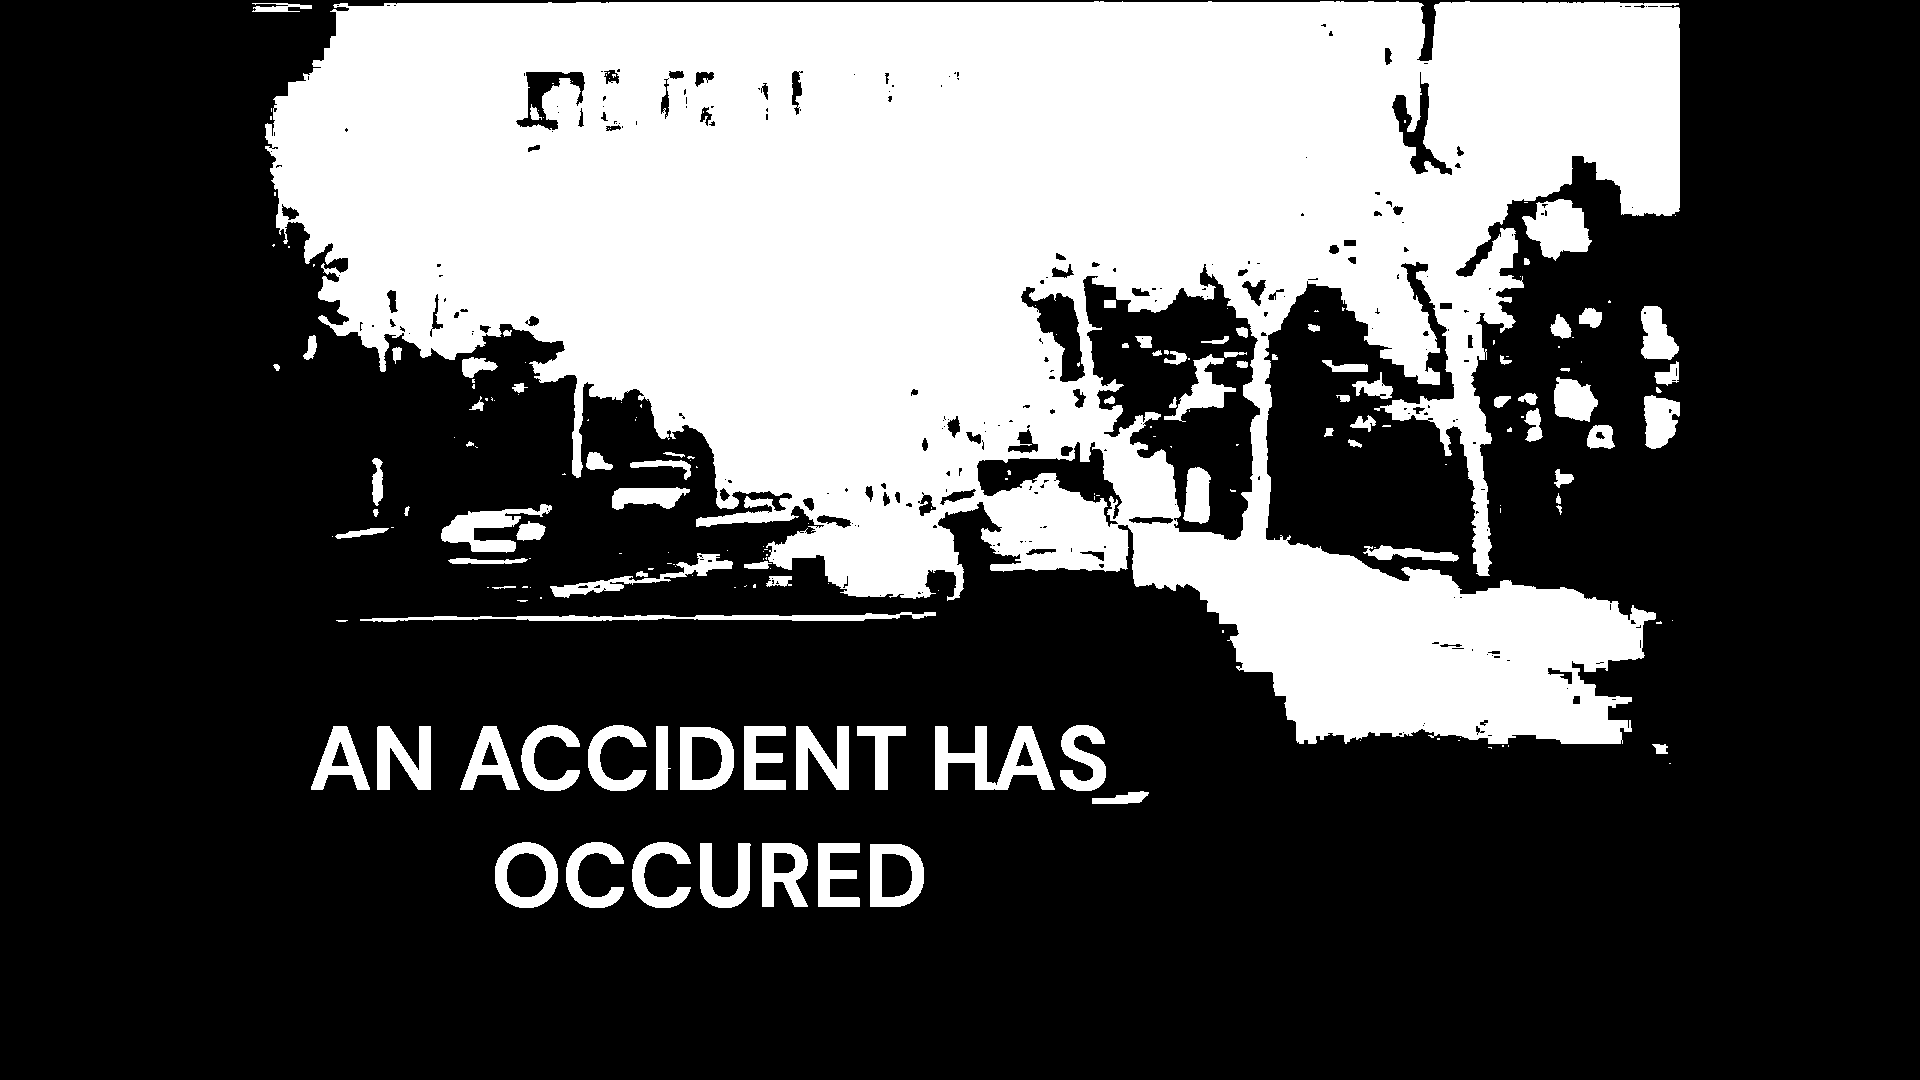

Processed Text:    

AN ACCIDENT HAS_
OCCURED

Prediction: [1]


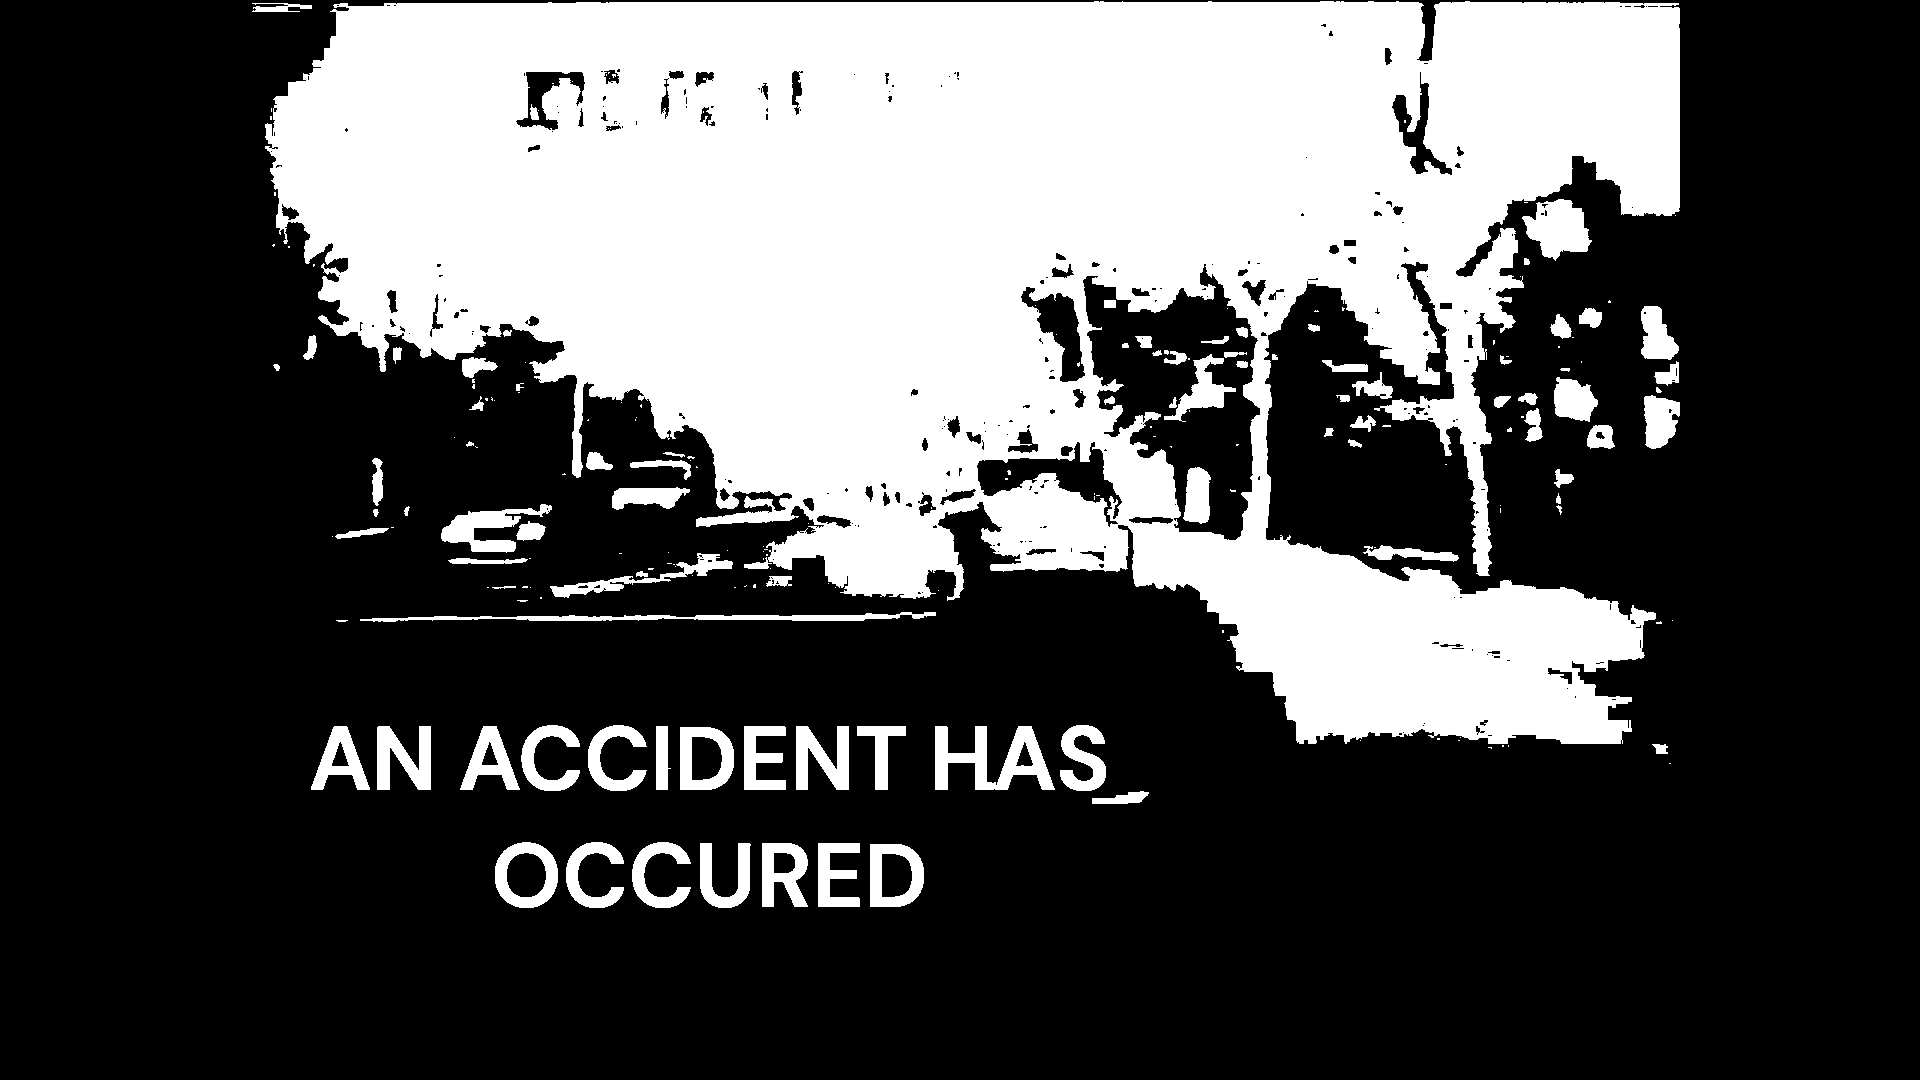

Processed Text:    

AN ACCIDENT HAS_
OCCURED

Prediction: [1]


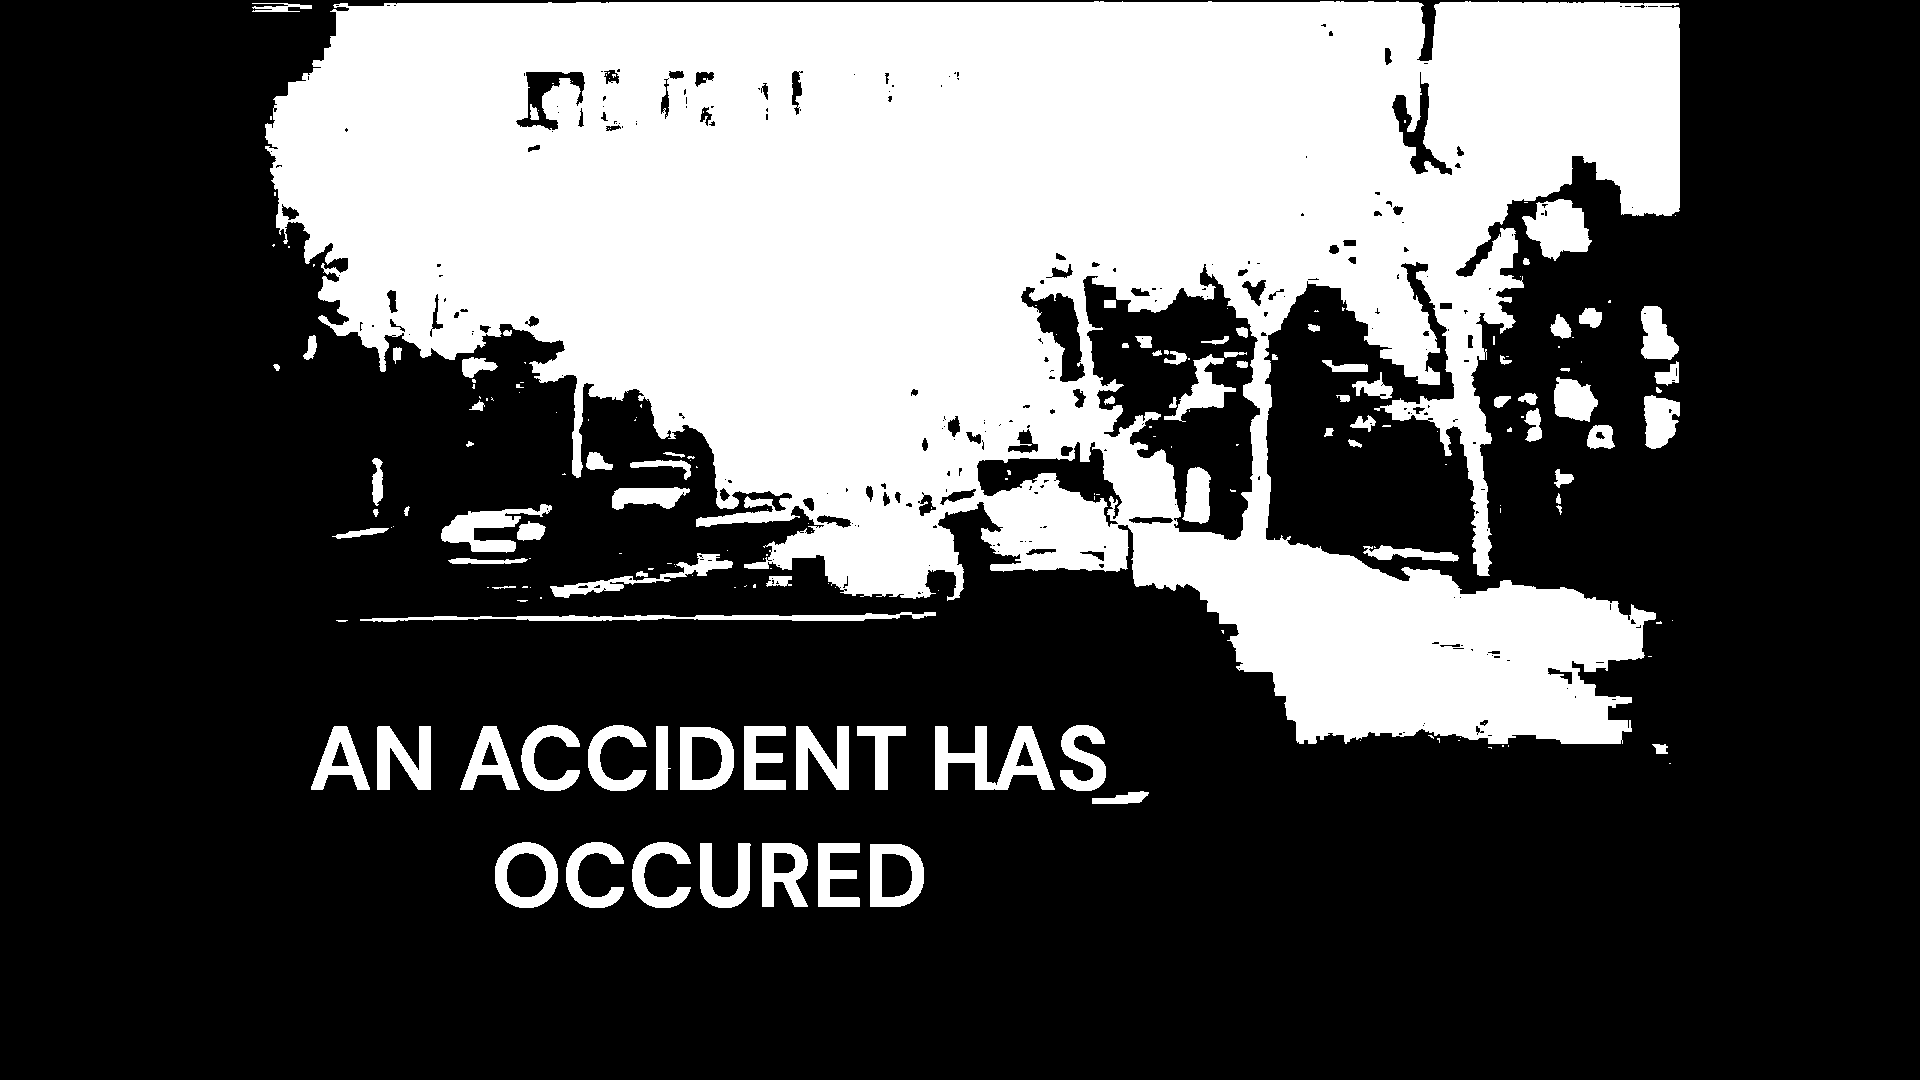

Processed Text:     

AN-ACCIDENT HAS _ ~
OCCURED

Prediction: [1]


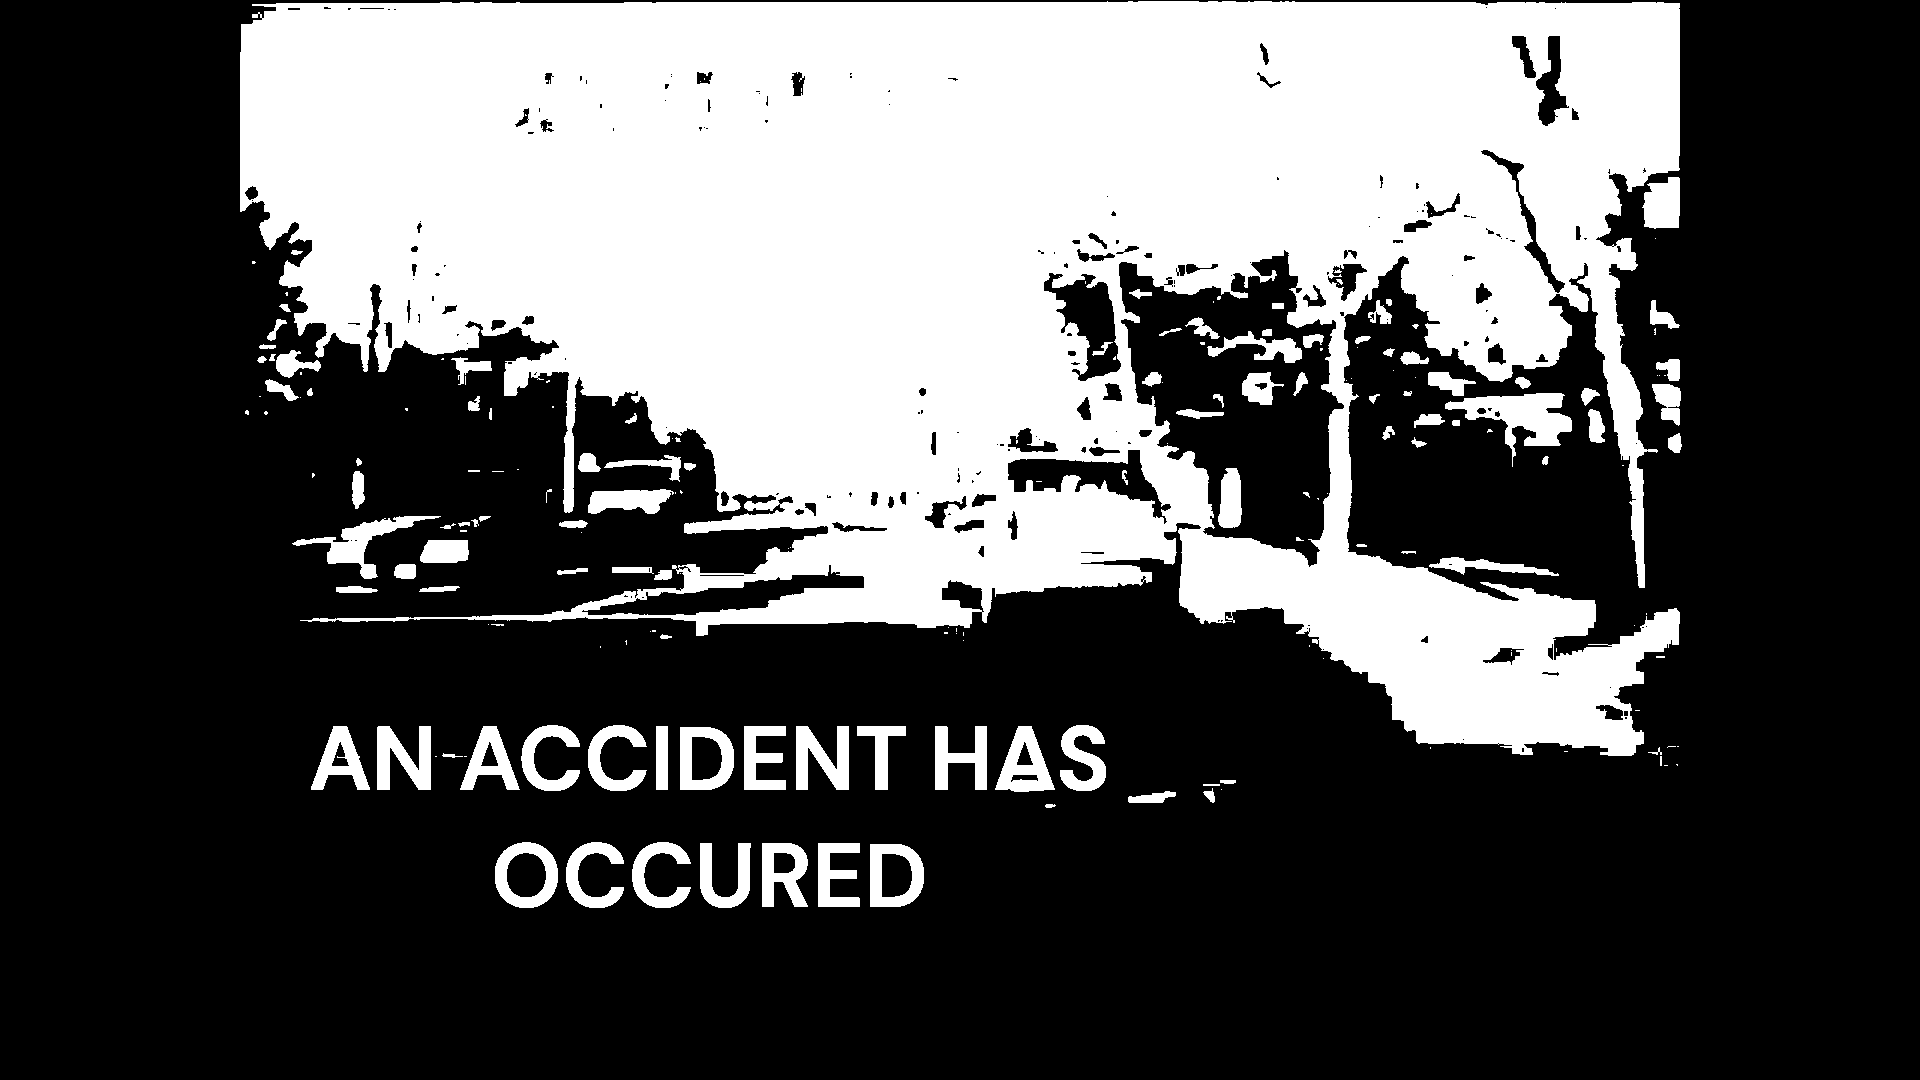

Processed Text:     

AN-ACCIDENT HAS _ ~
OCCURED

Prediction: [1]


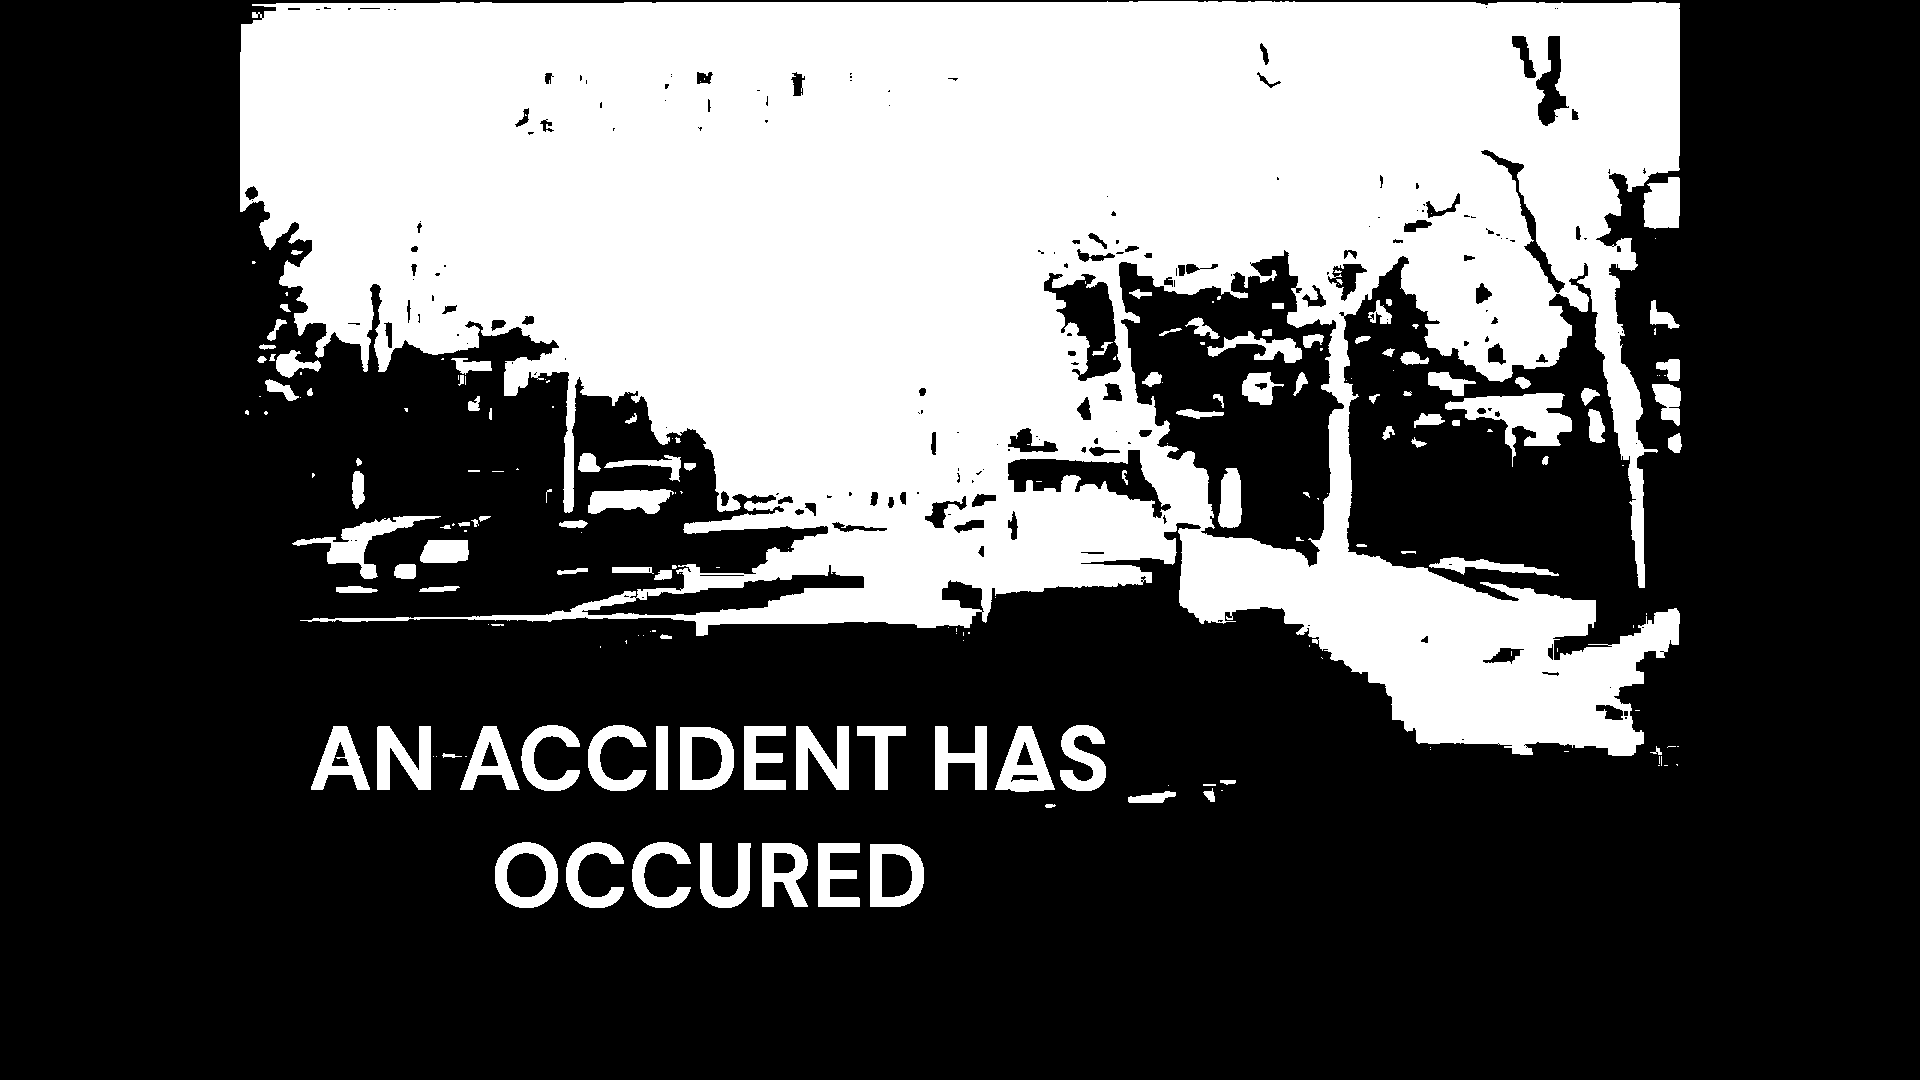

Processed Text:     

AN-ACCIDENT HAS _ -
OCCURED

Prediction: [1]


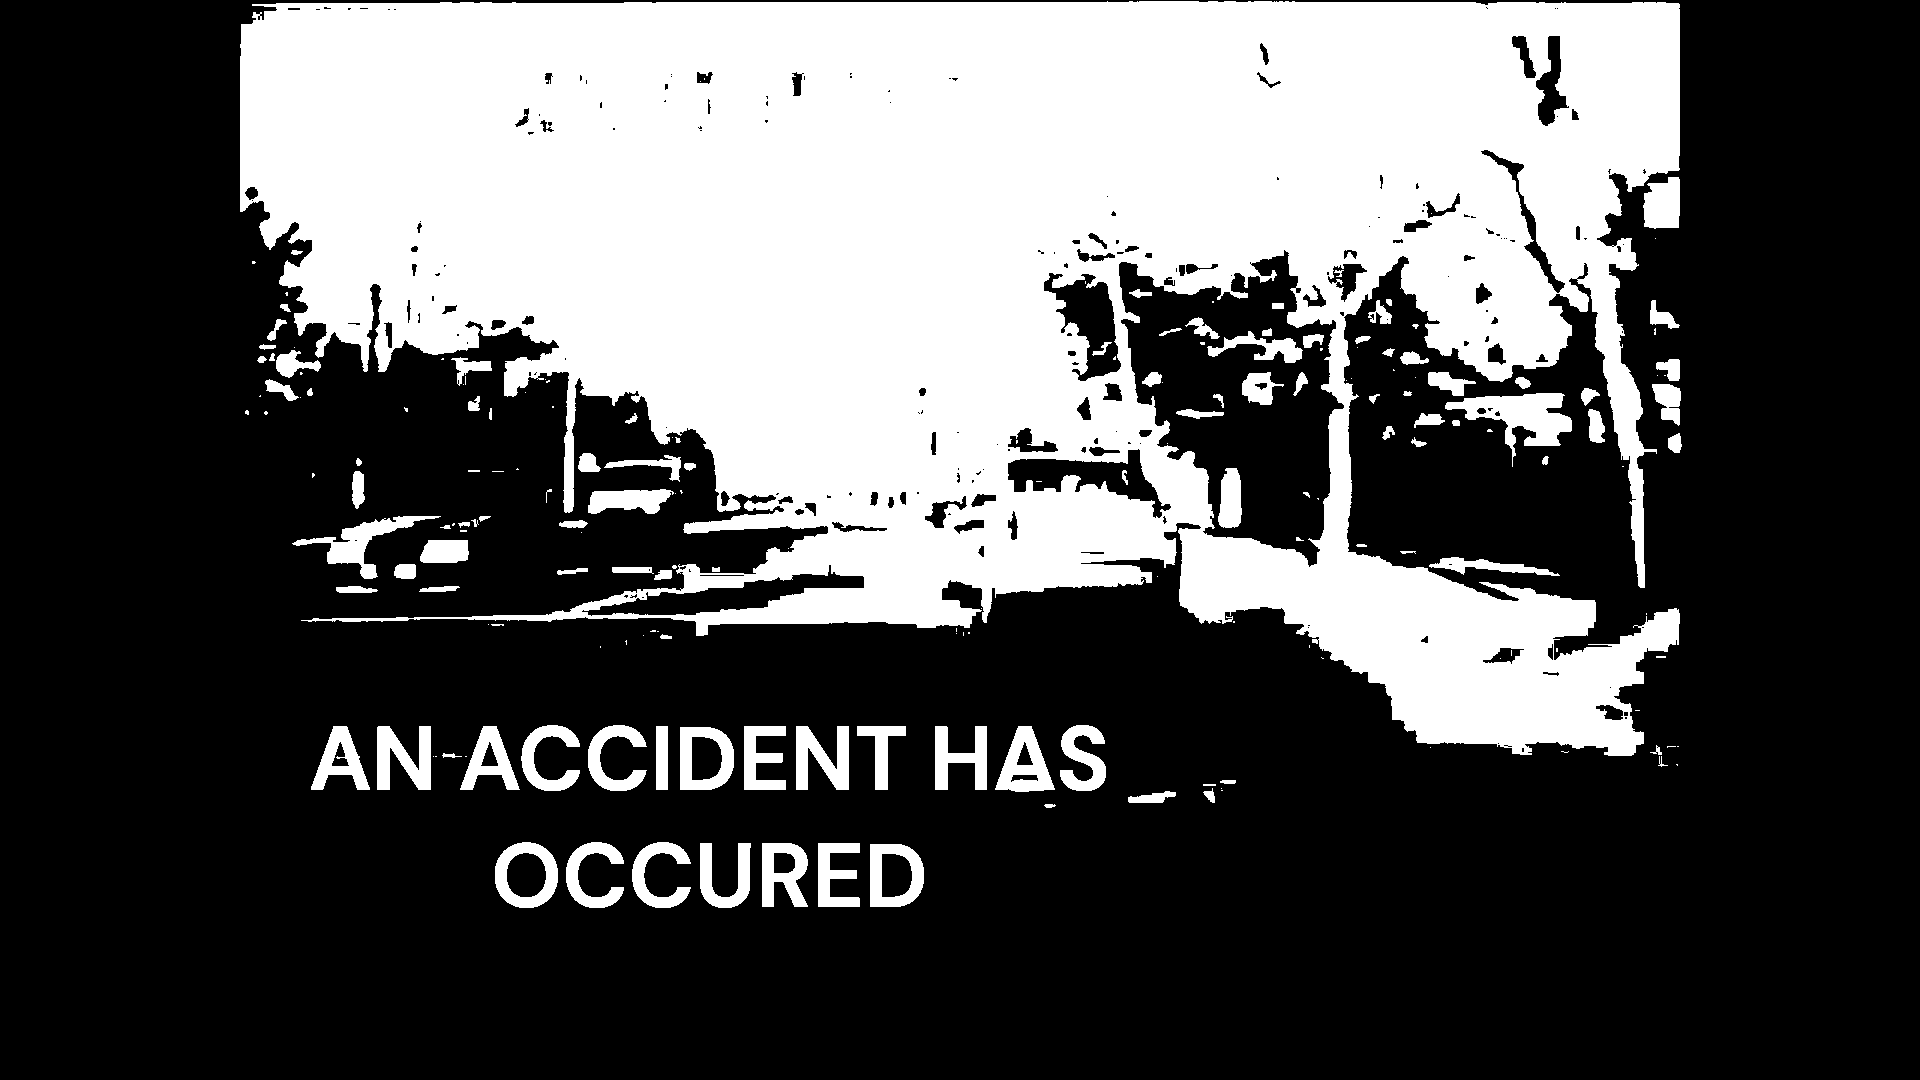

Processed Text:     

AN ACCIDENT HAS .
OCCURED

"~~

Prediction: [1]


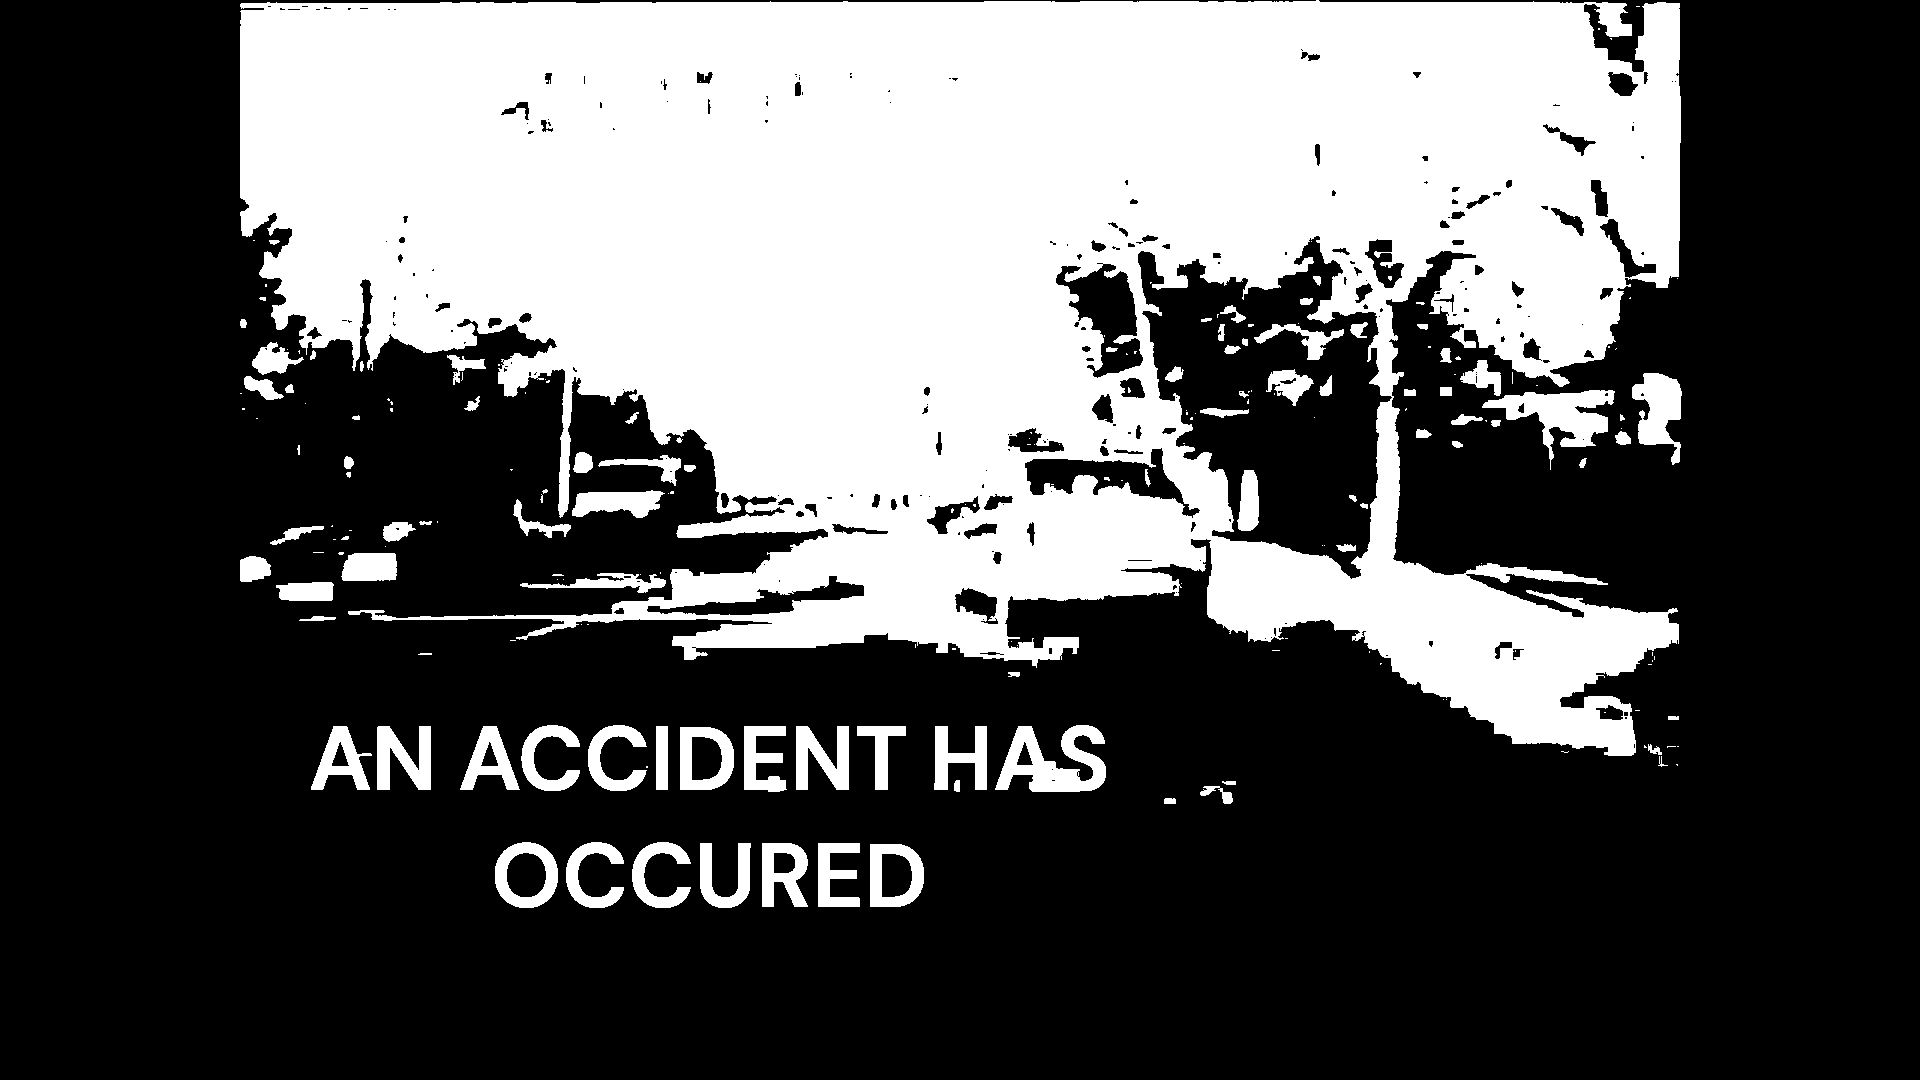

Processed Text:     

AN ACCIDENT HAS .
OCCURED

"~~

Prediction: [1]


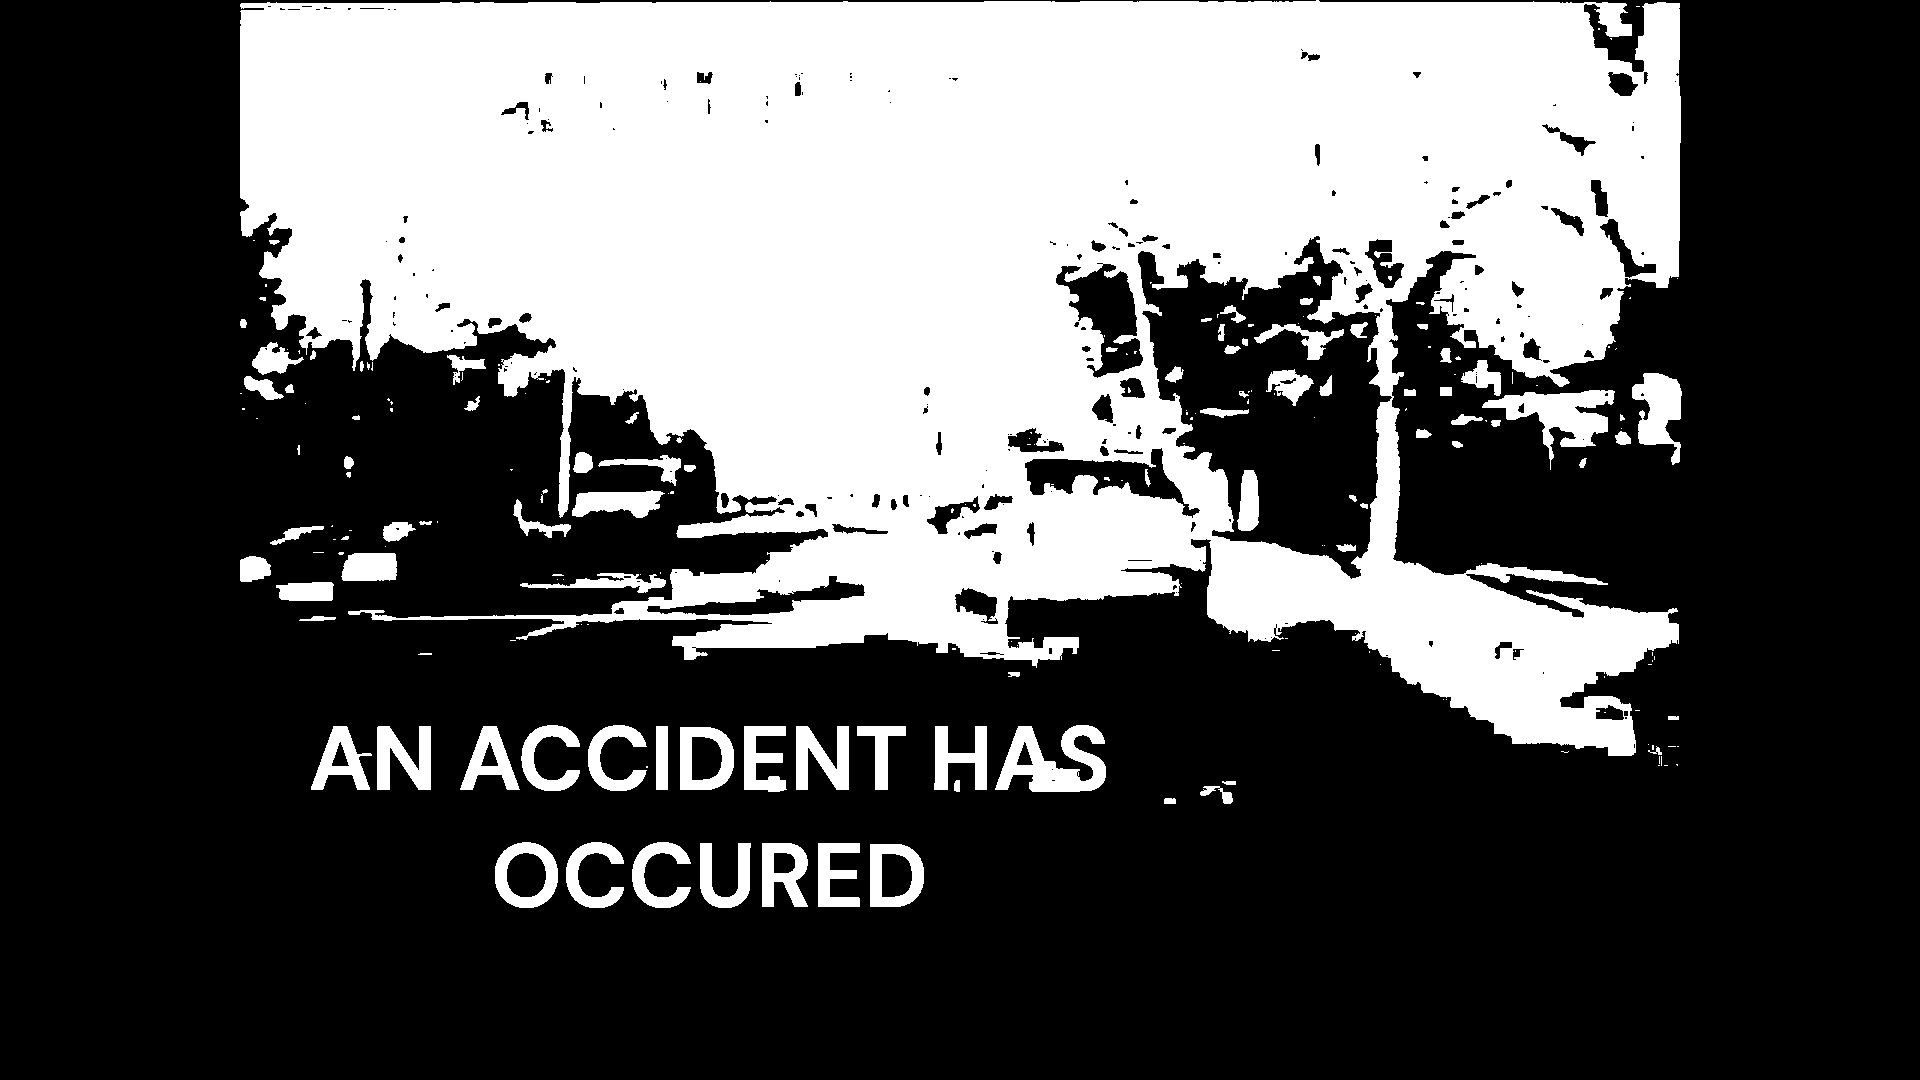

Processed Text:     

AN ACCIDENT HAS .
OCCURED

"~~

Prediction: [1]


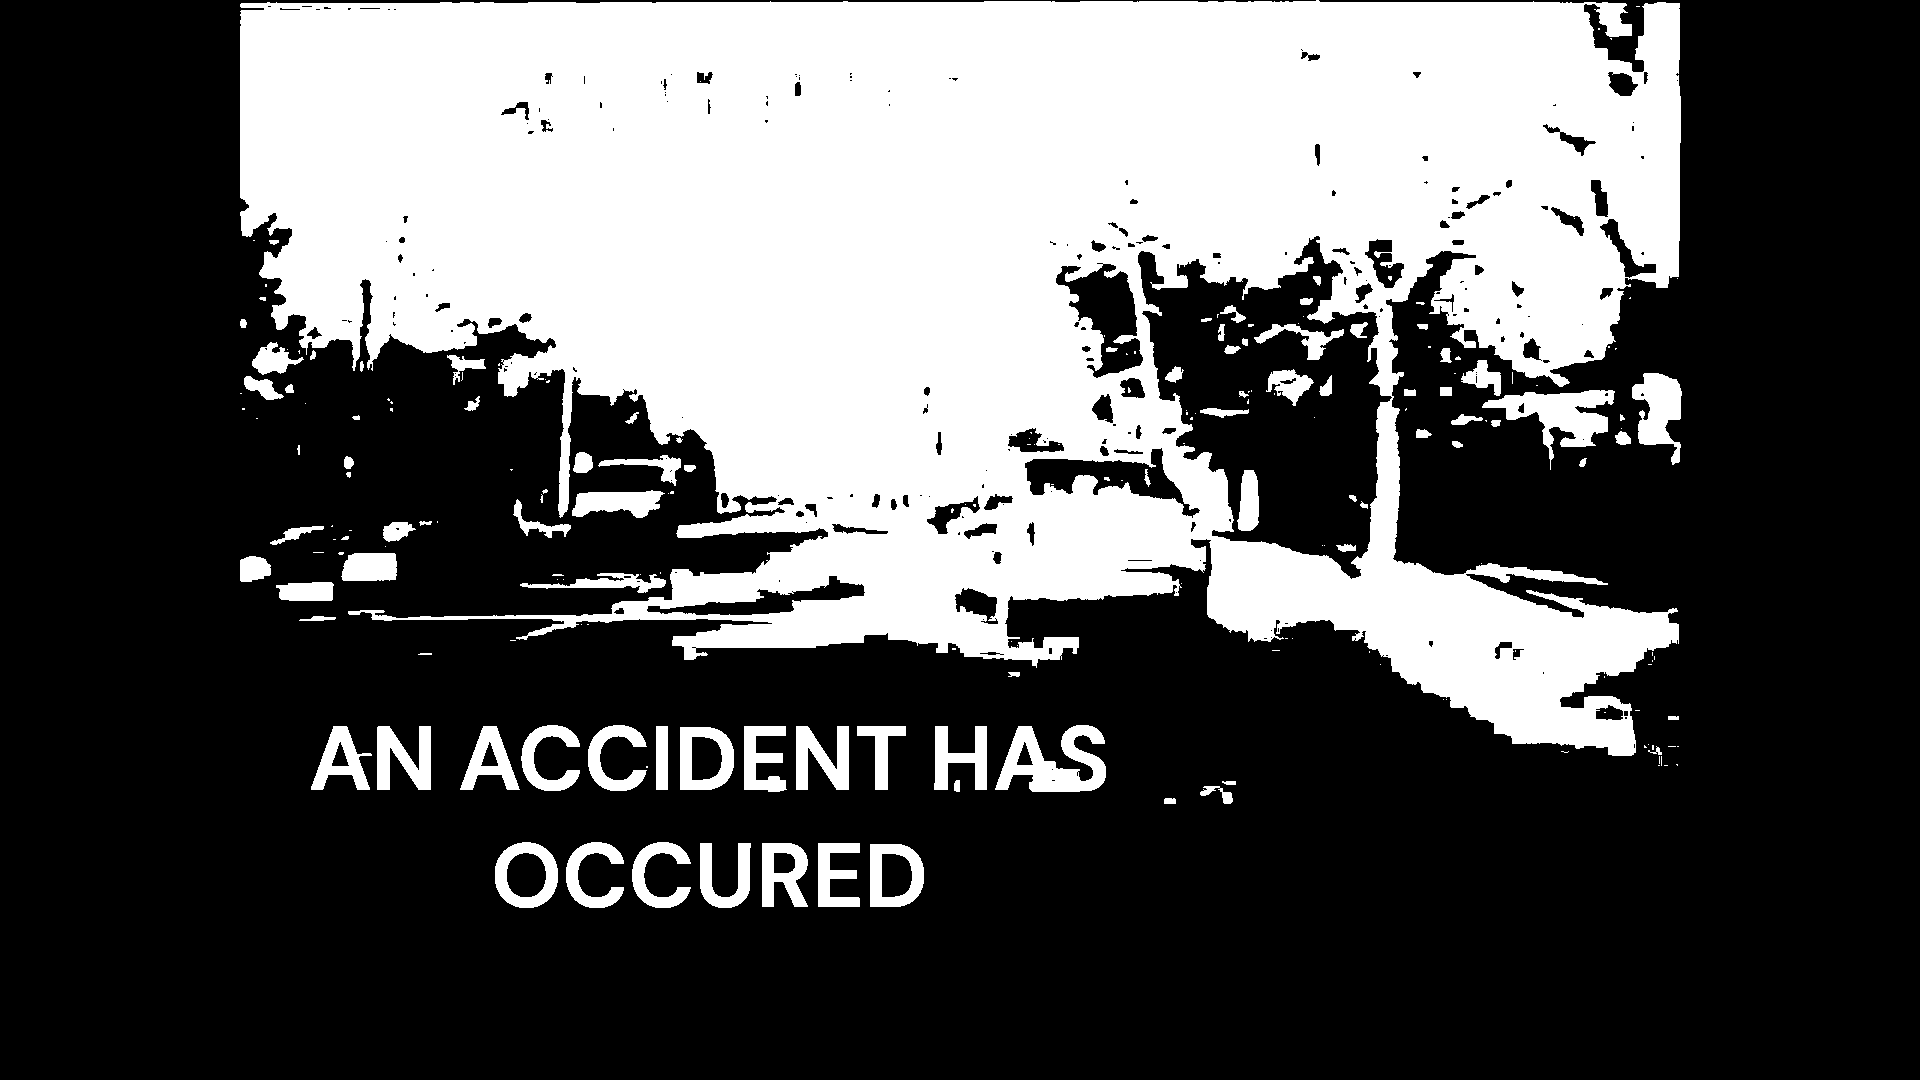

Processed Text:     
 

a

AN ACCIDENT HAS _,
OCCURED

Prediction: [1]


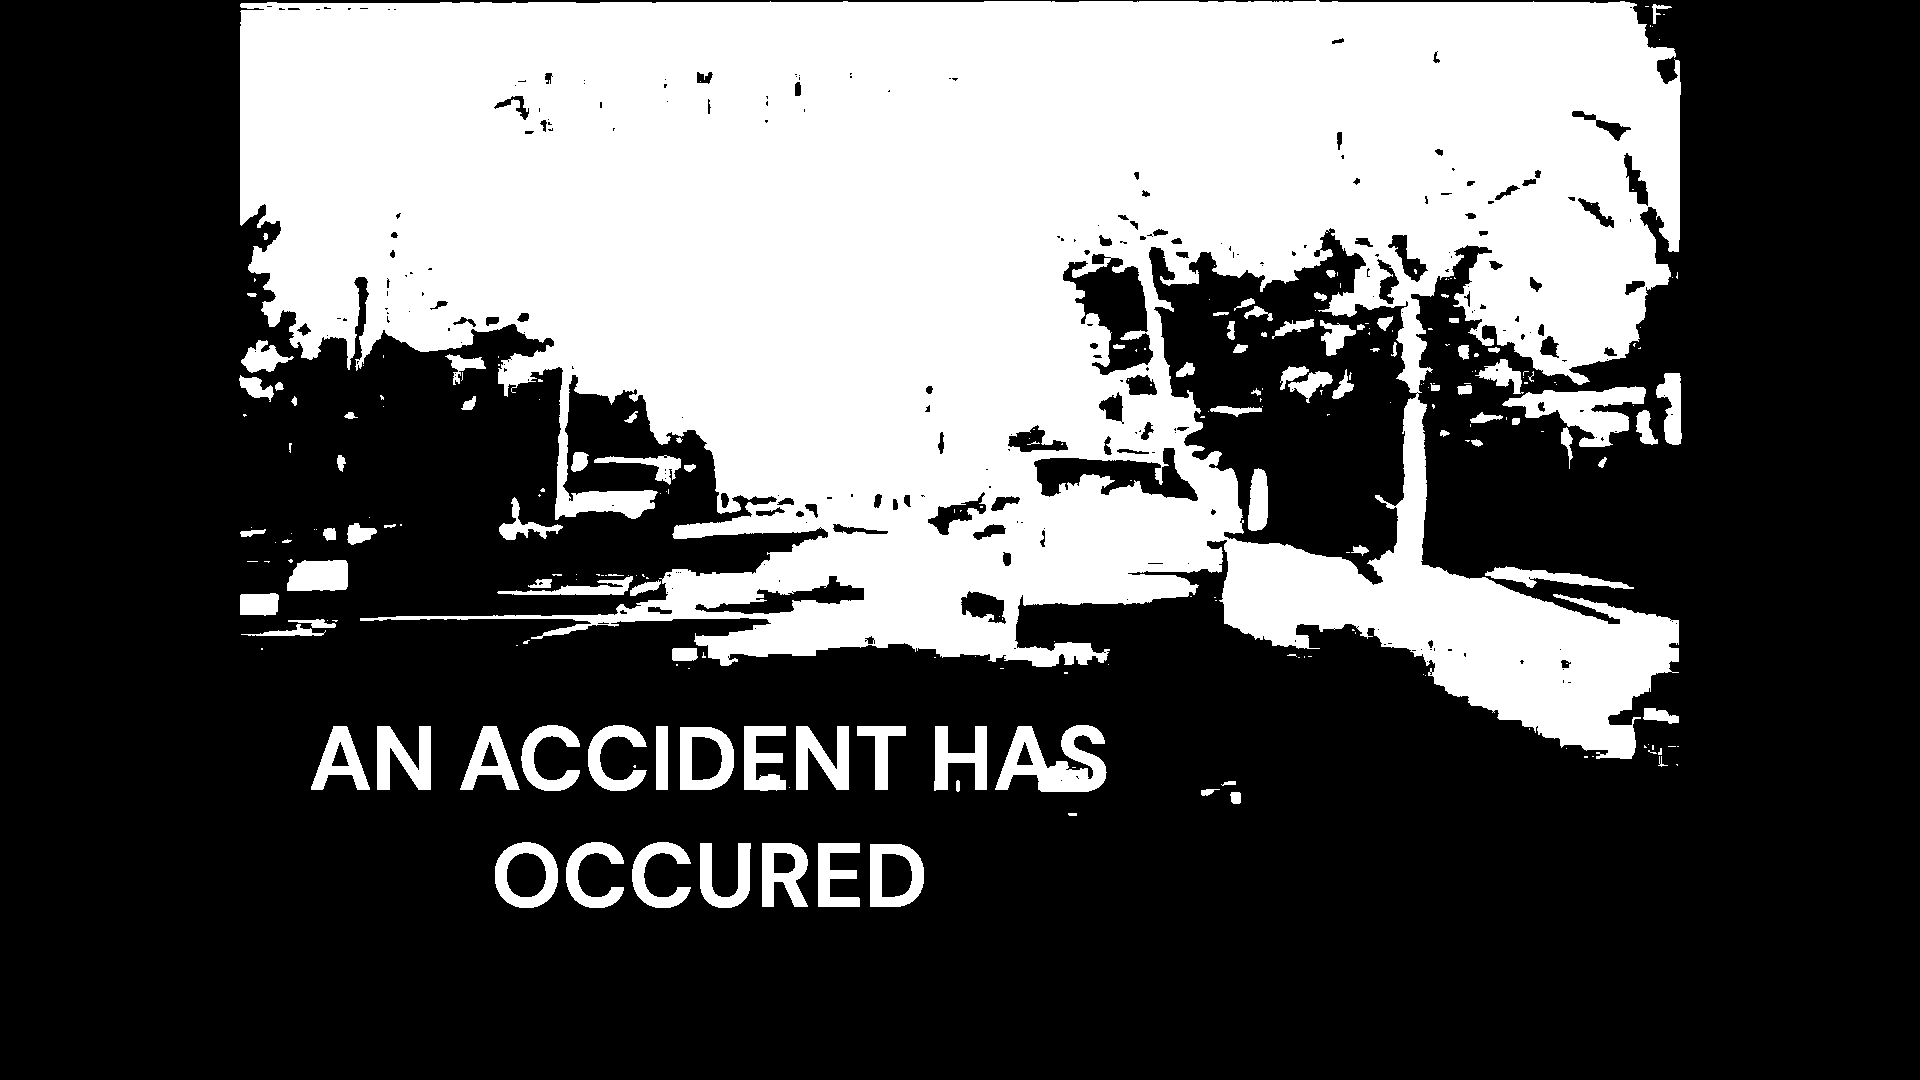

Processed Text:     
 

a

AN ACCIDENT HAS _,
OCCURED

Prediction: [1]


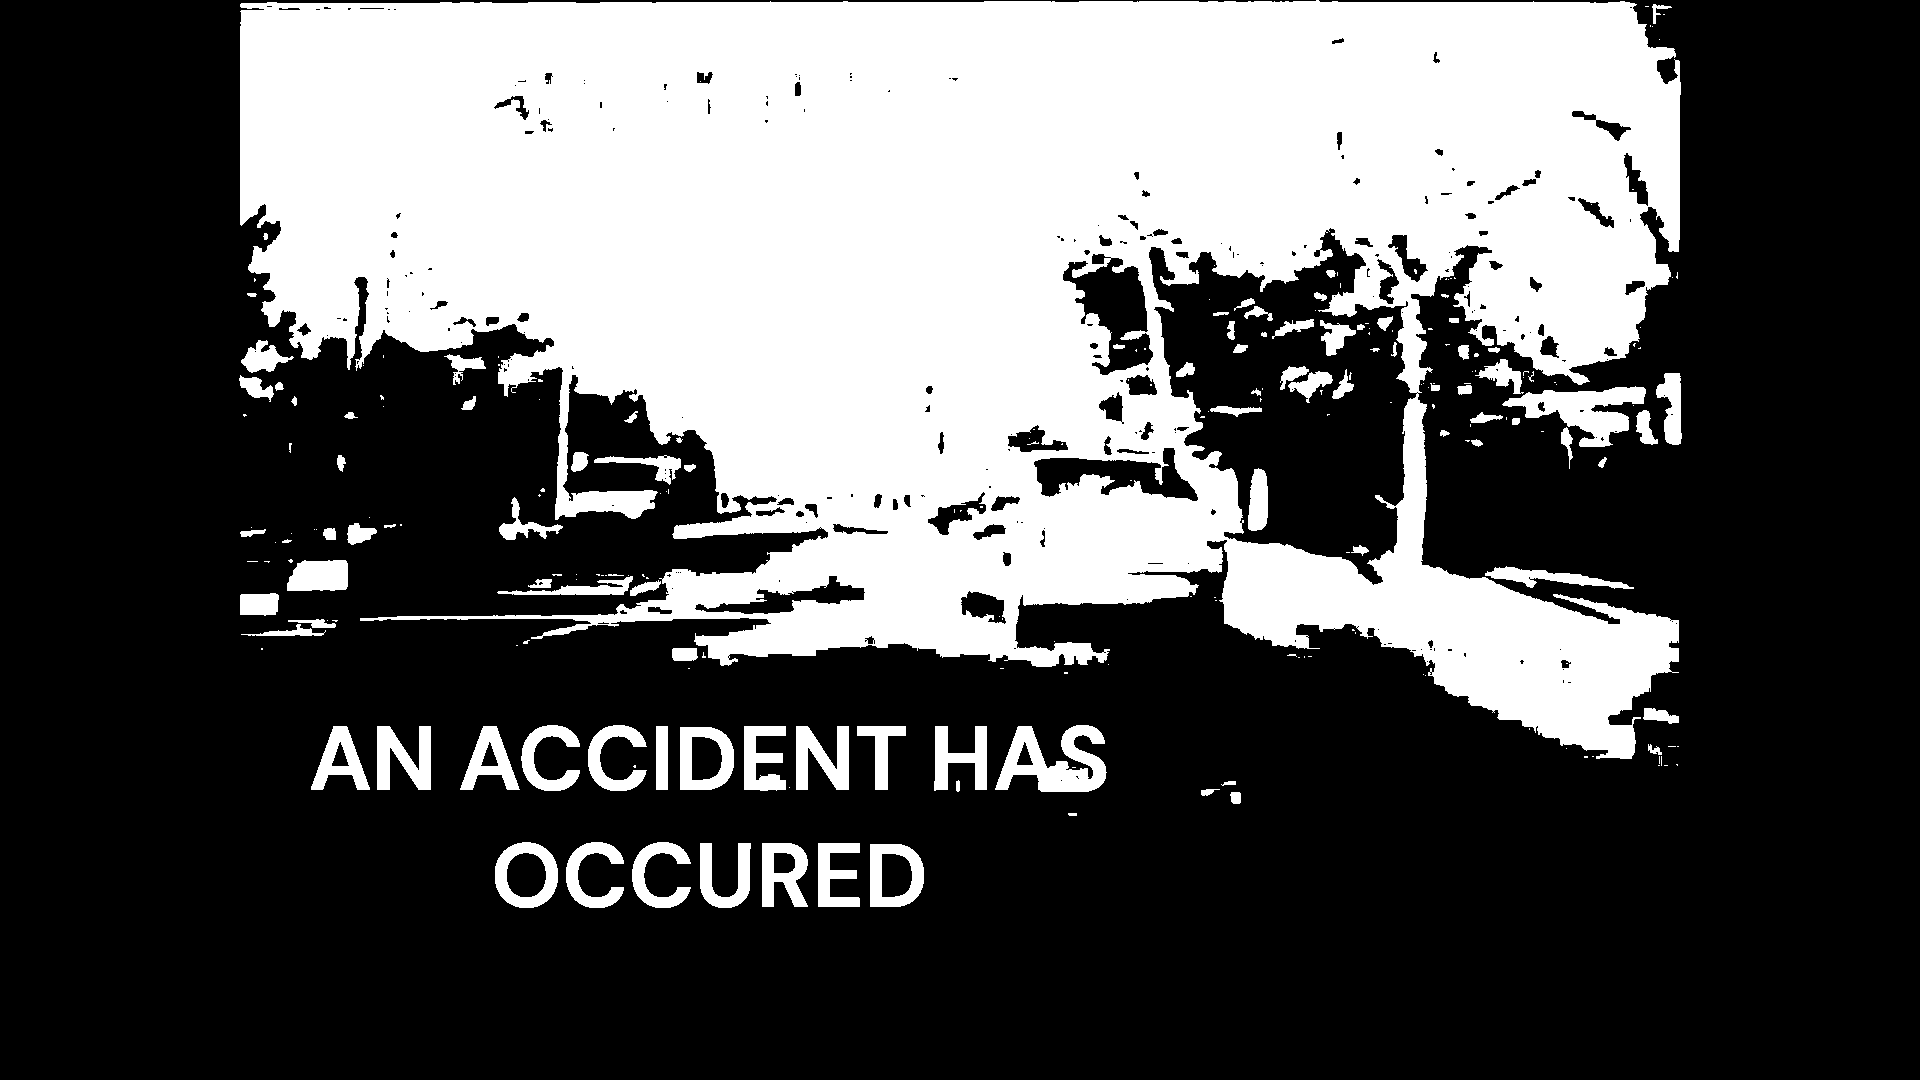

Processed Text:     
 

a

AN ACCIDENT HAS _.,
OCCURED

Prediction: [1]


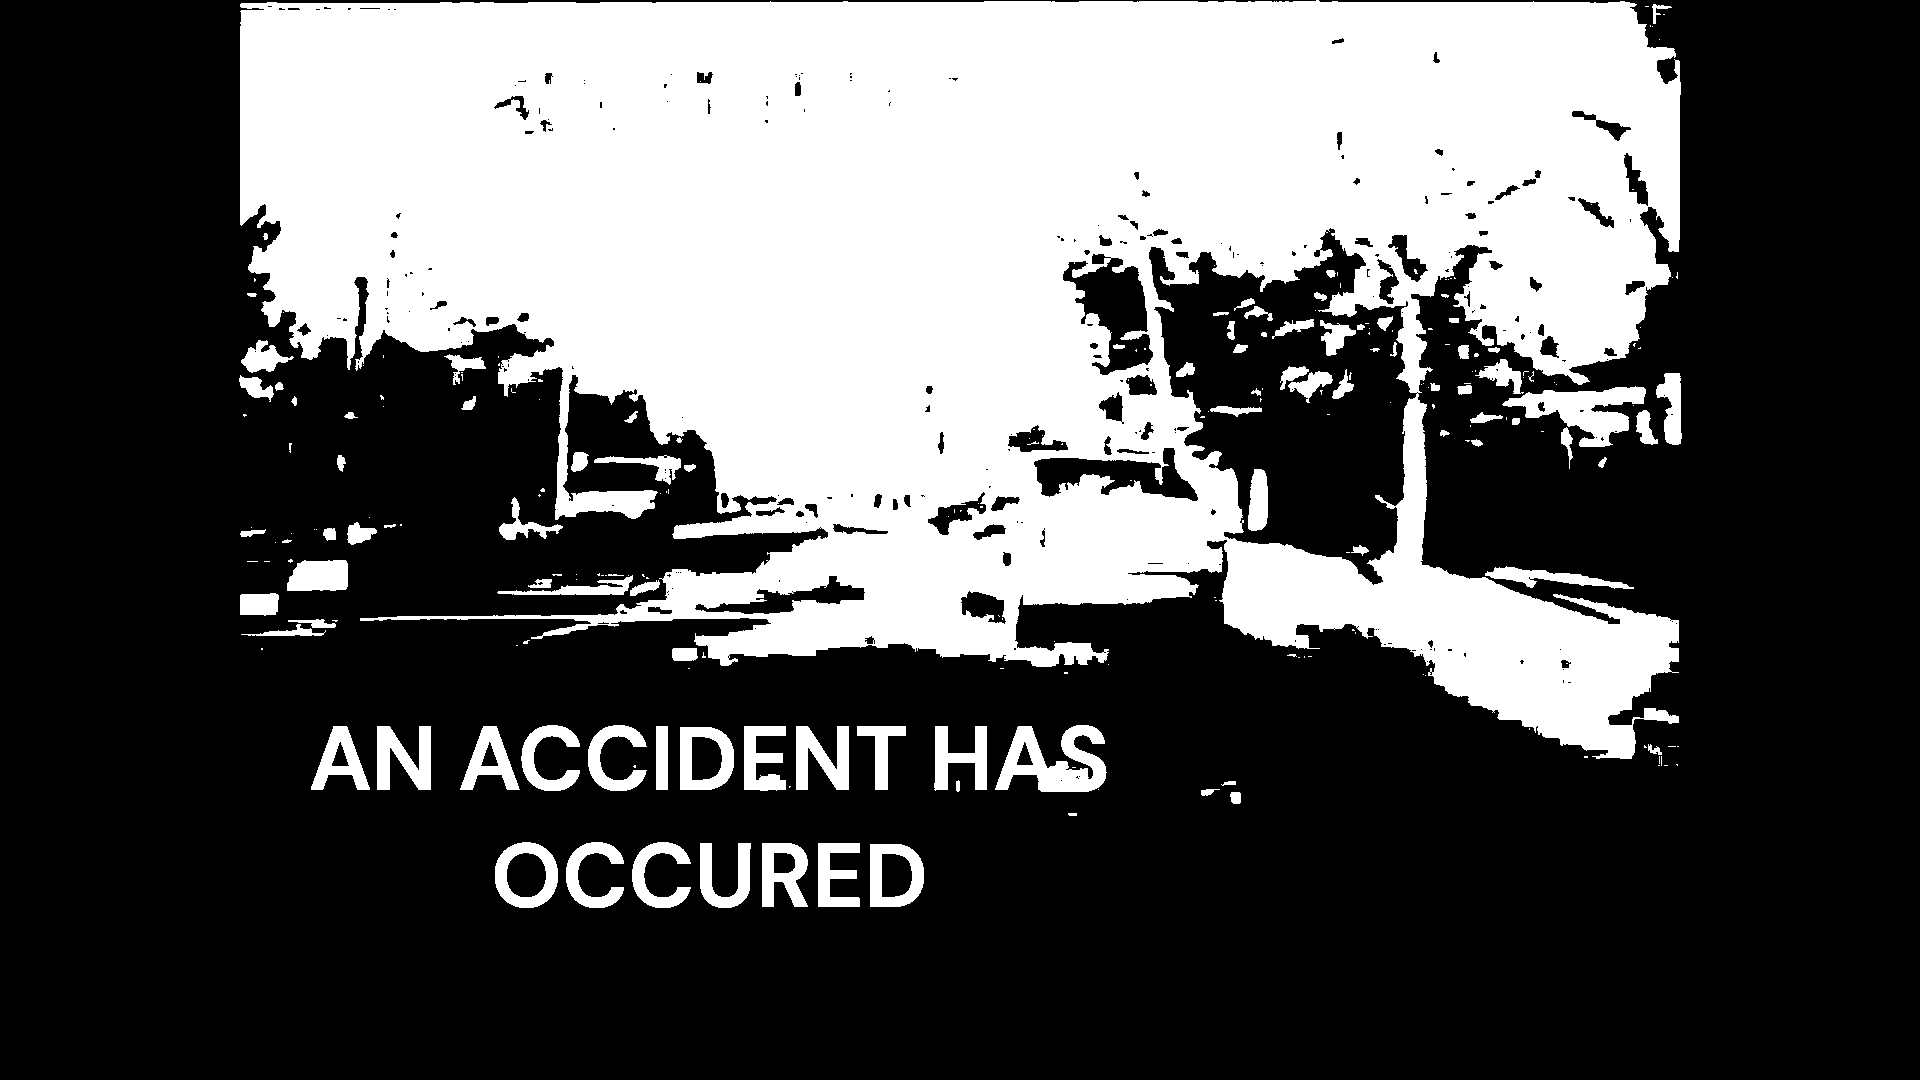

Processed Text:  

Prediction: [0]


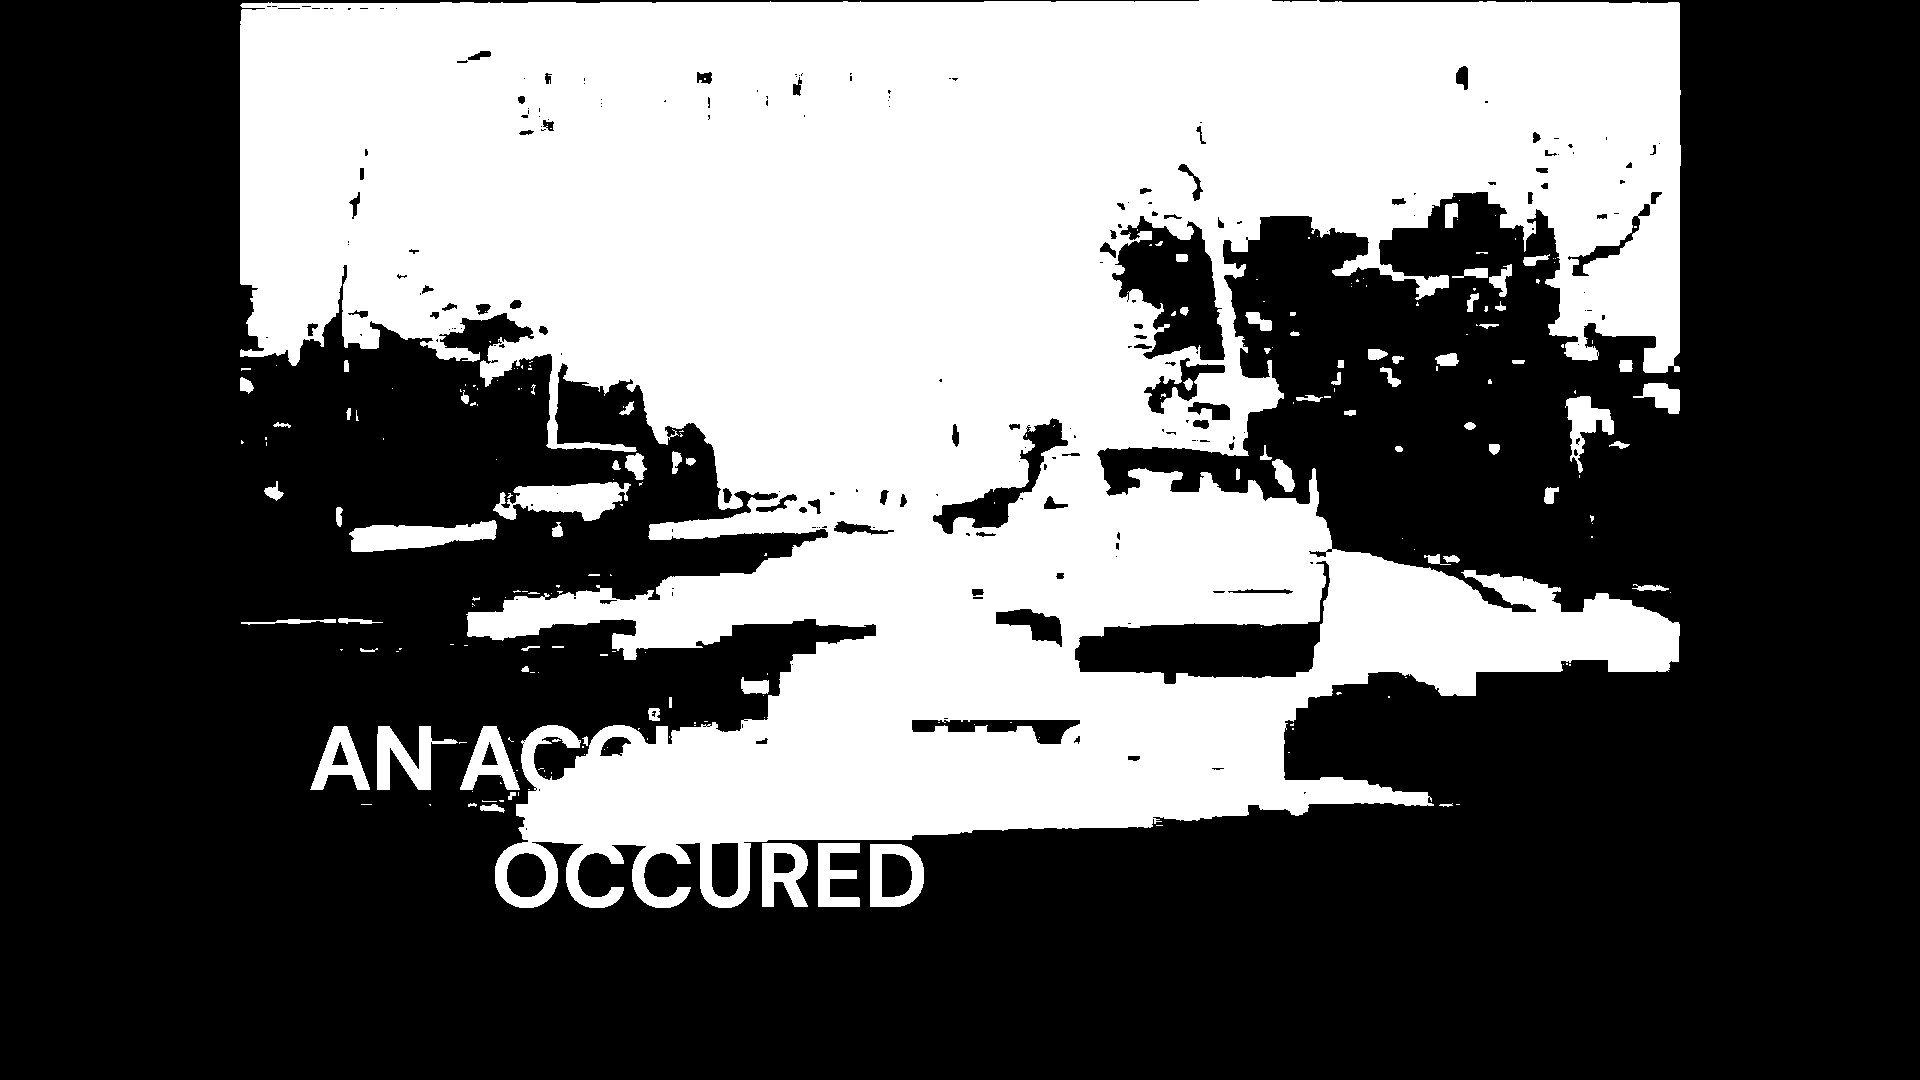

Processed Text:  

Prediction: [0]


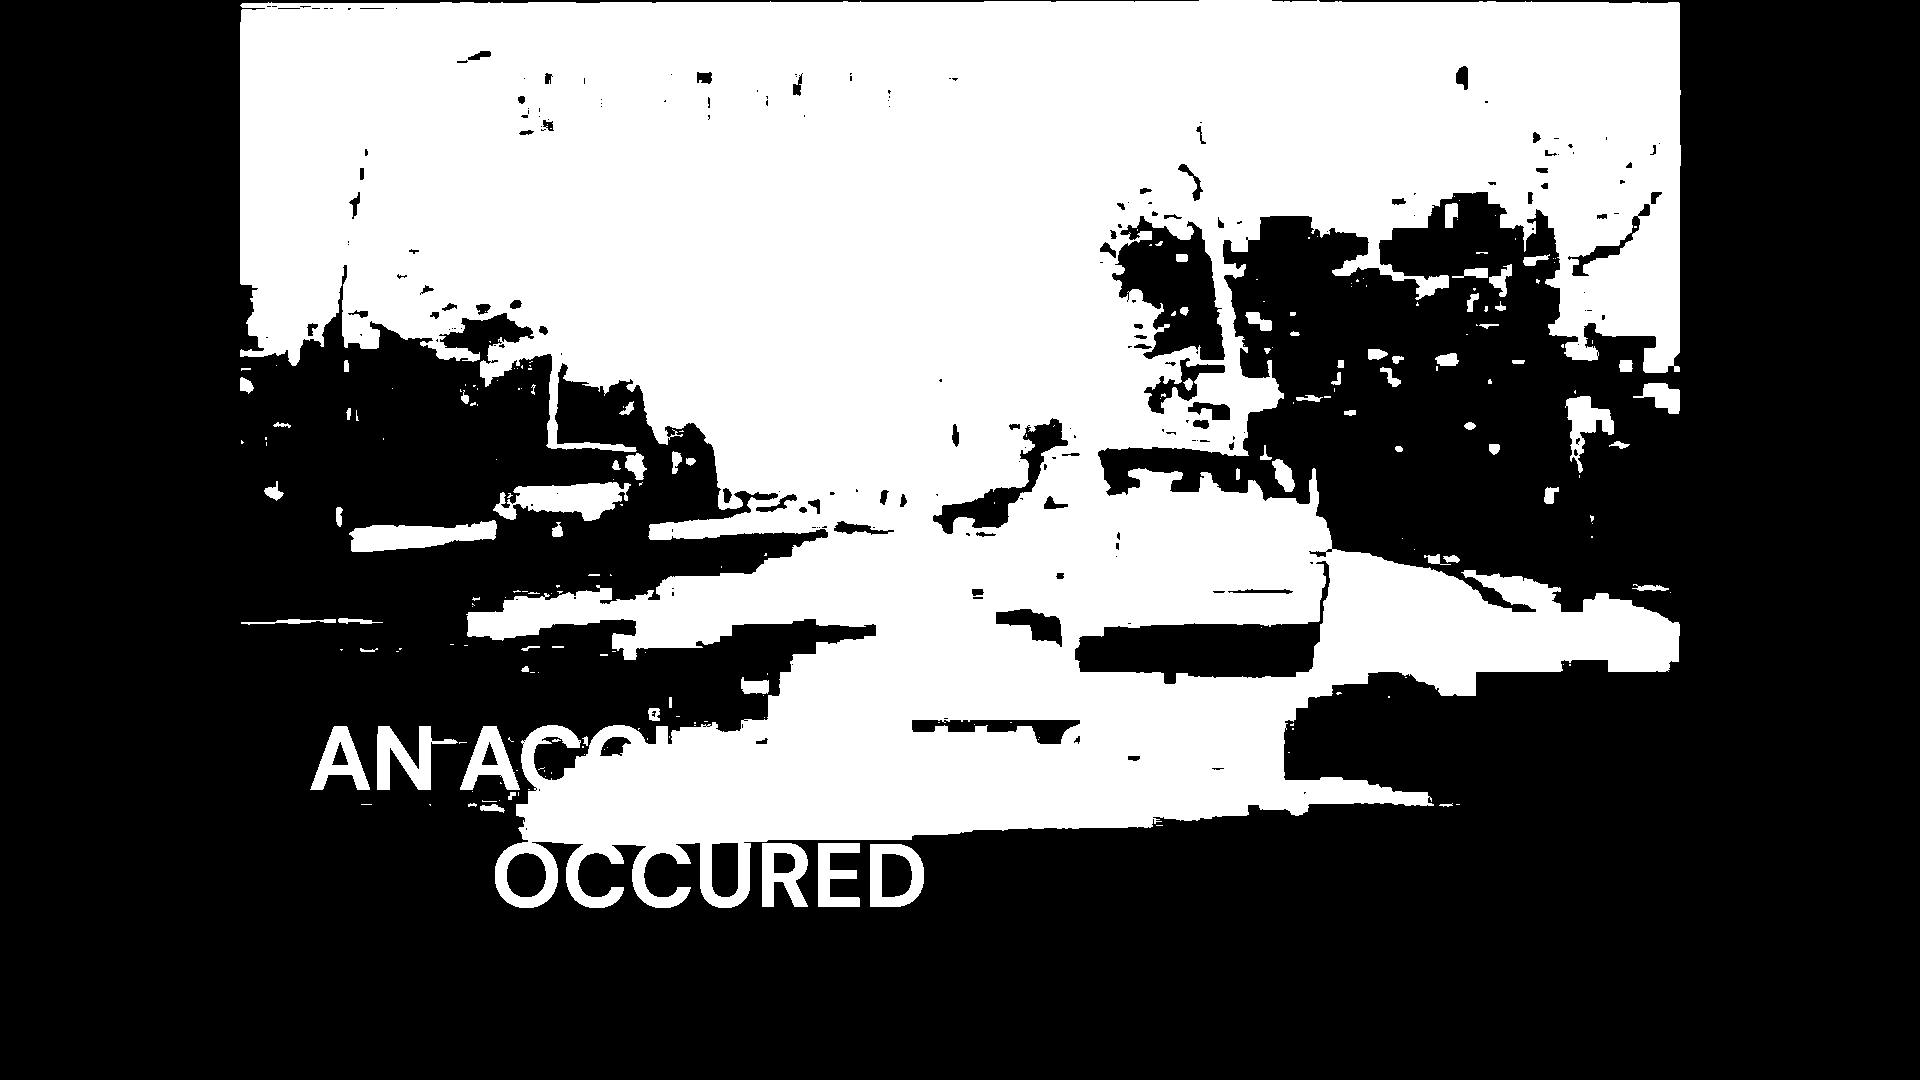

Processed Text:  

Prediction: [0]


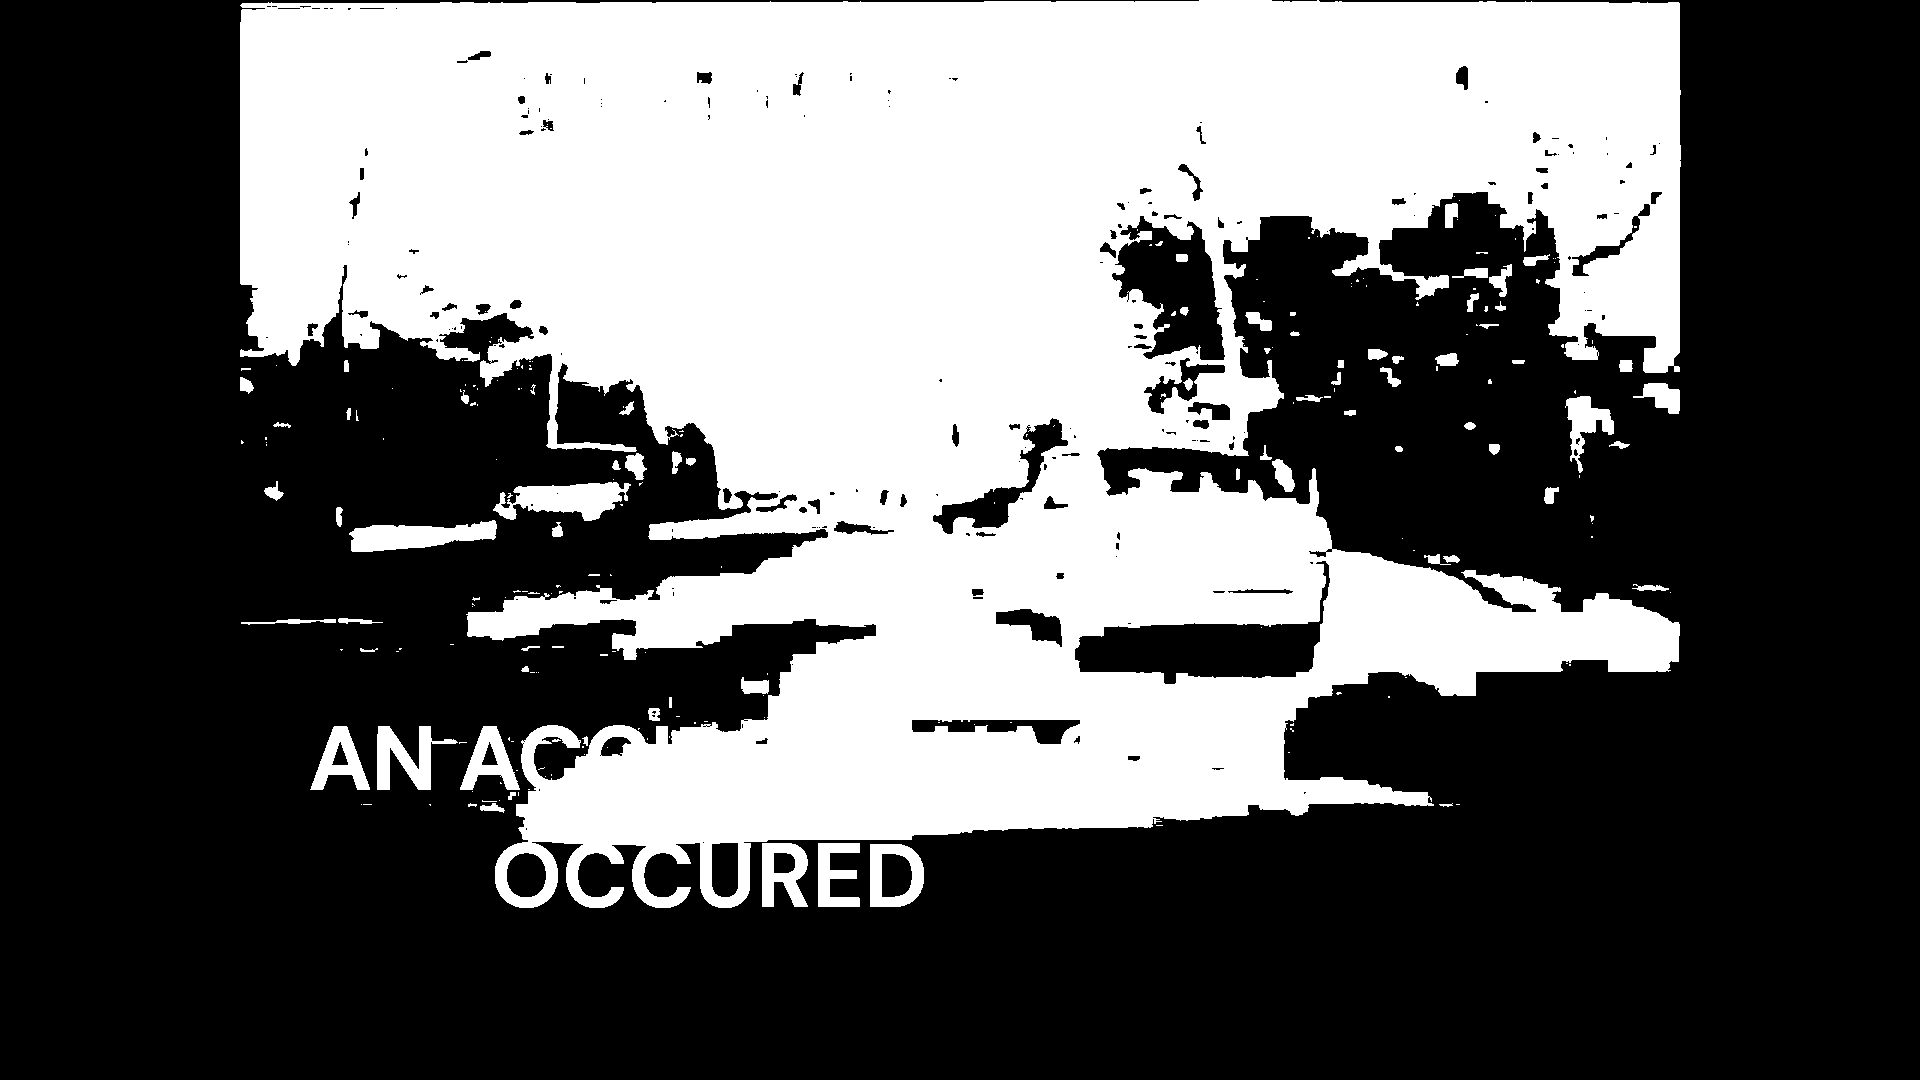

Processed Text:  

Prediction: [0]


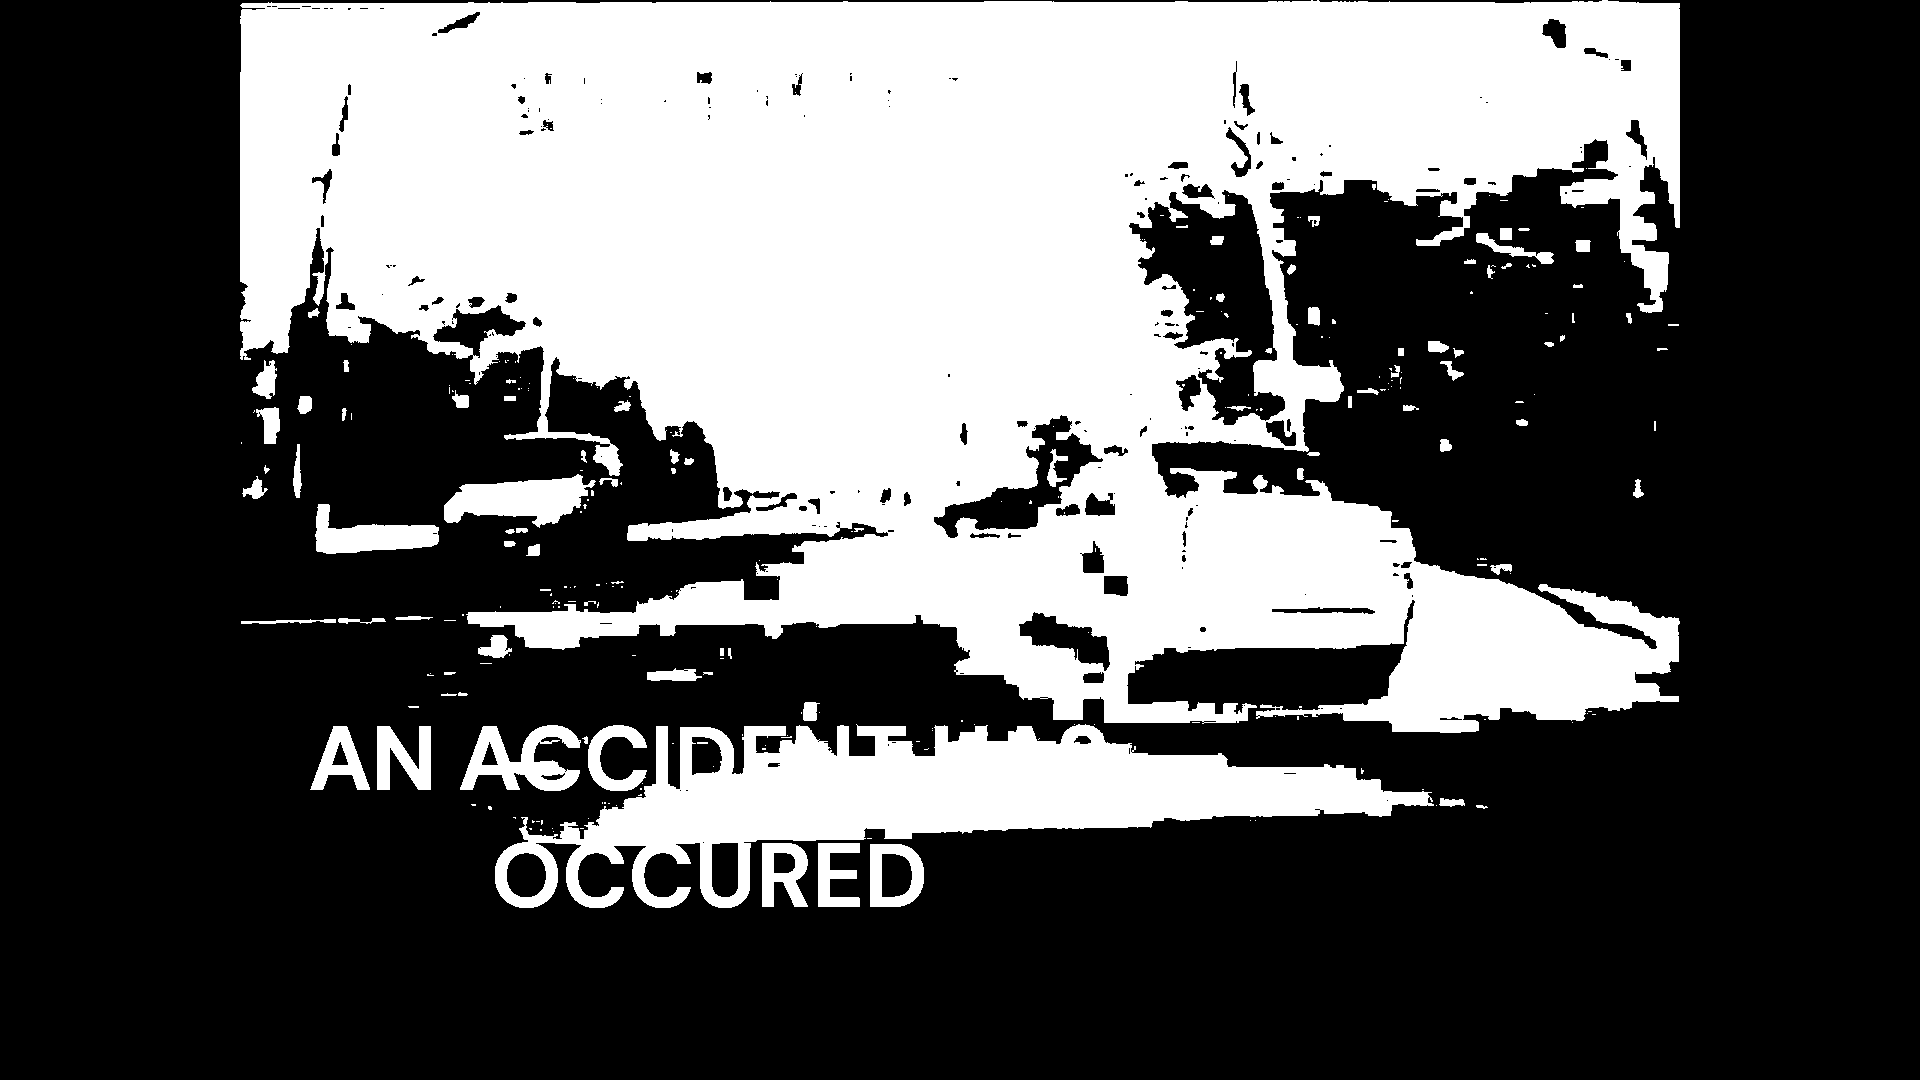

Processed Text:  

Prediction: [0]


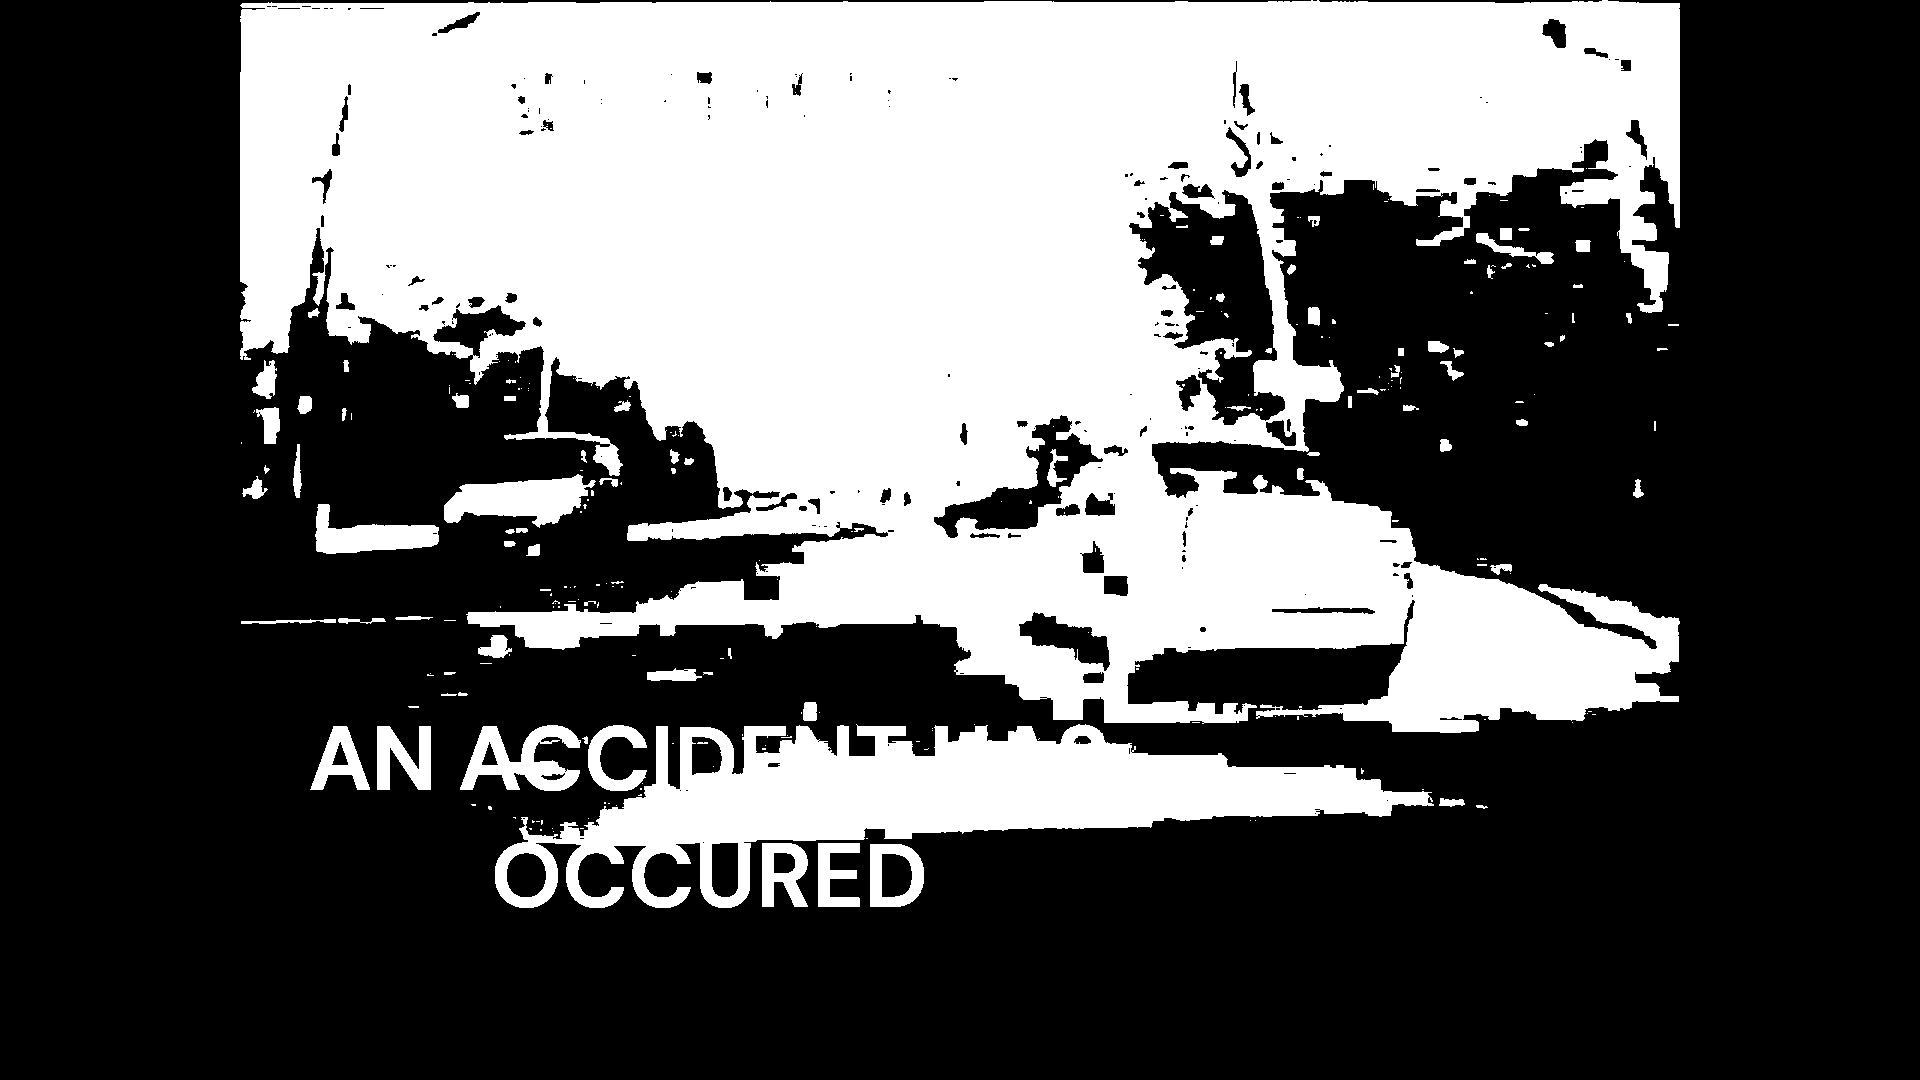

Processed Text:  

Prediction: [0]


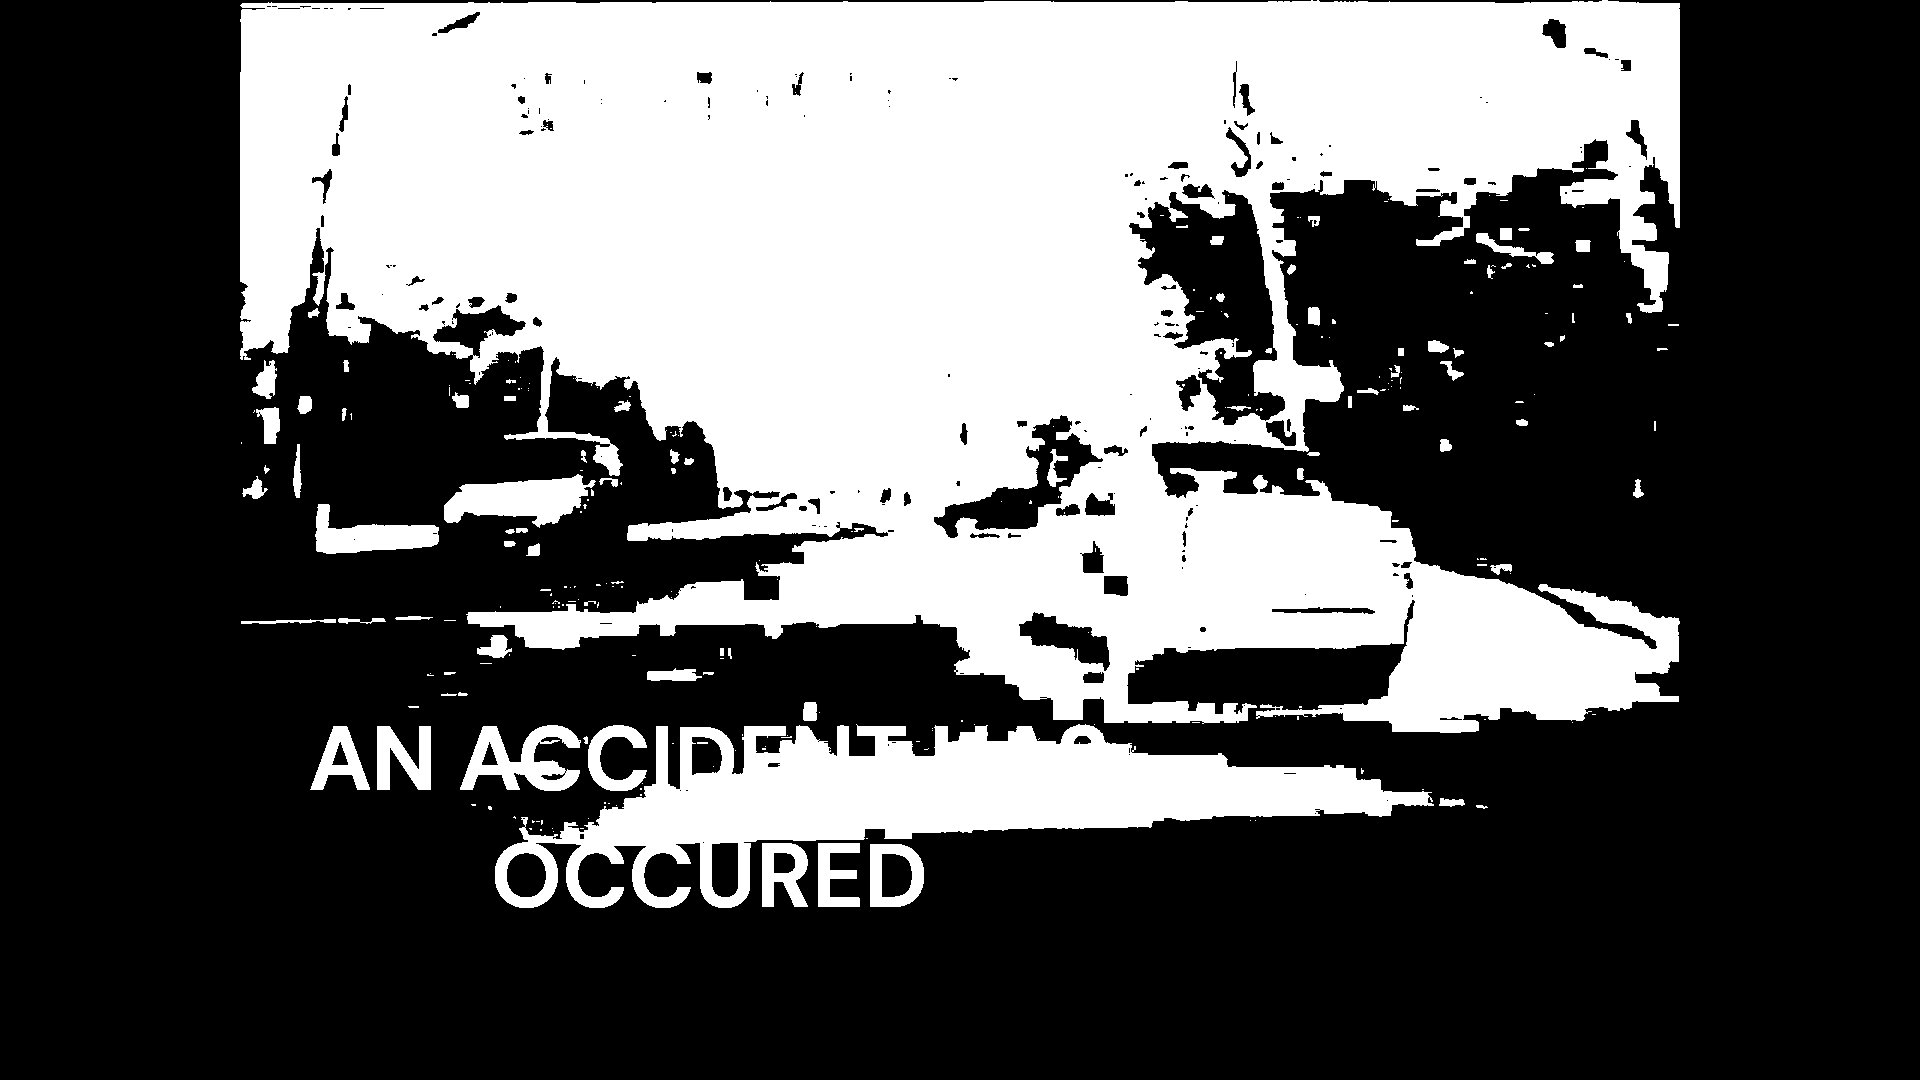

Processed Text:  

Prediction: [0]


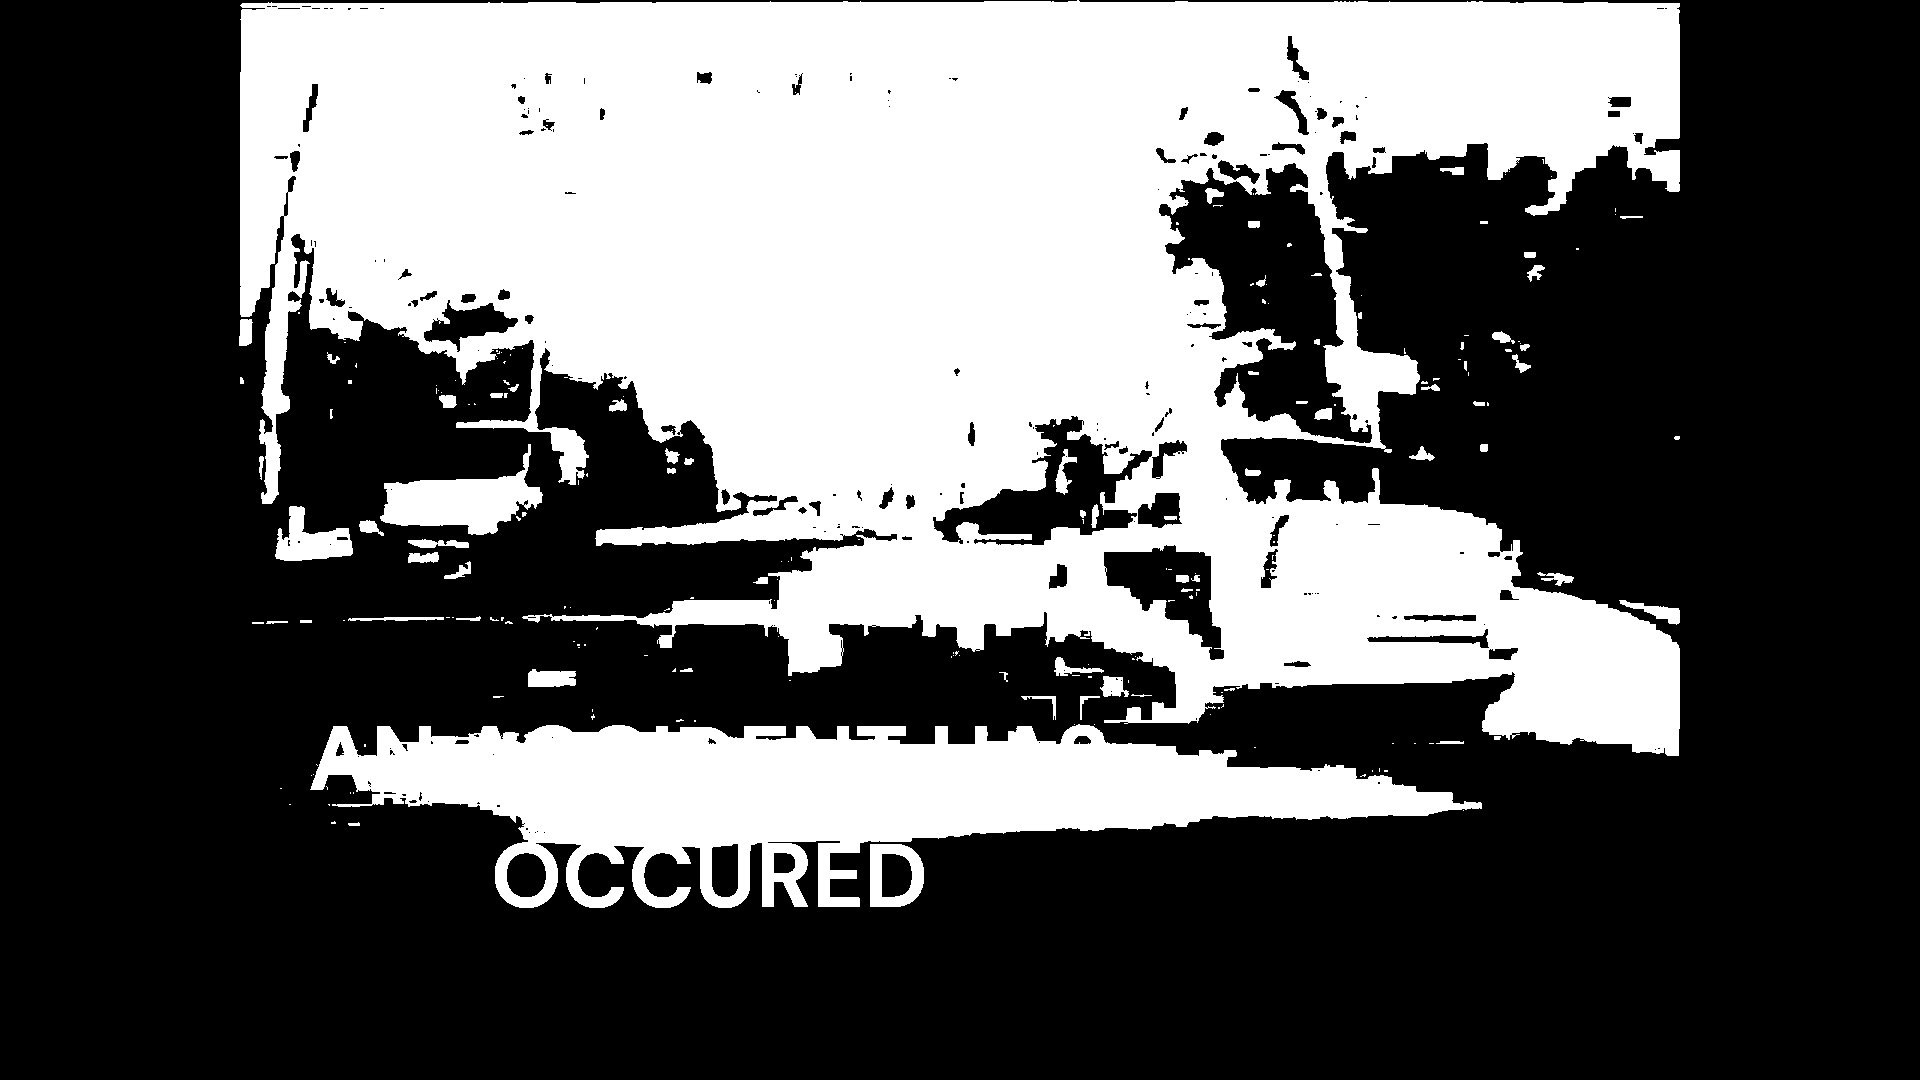

Processed Text:  

Prediction: [0]


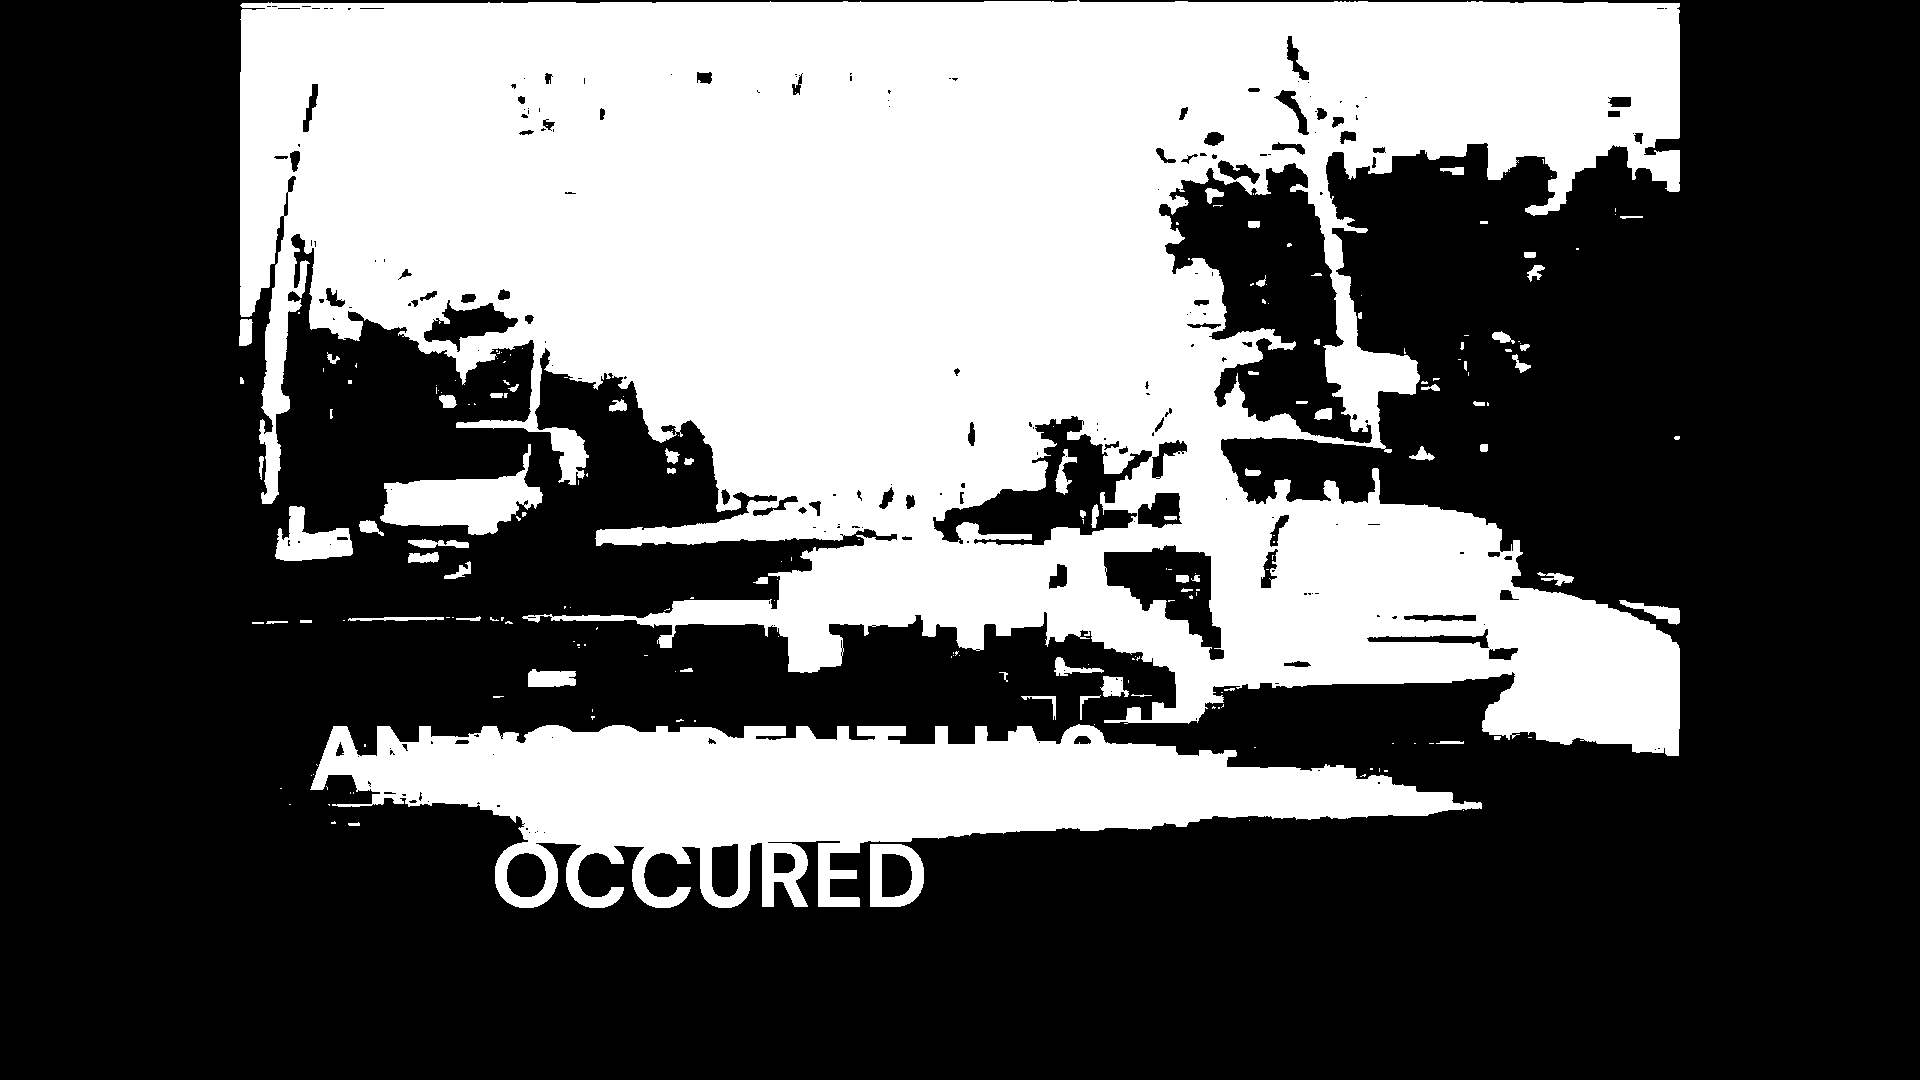

Processed Text:  

Prediction: [0]


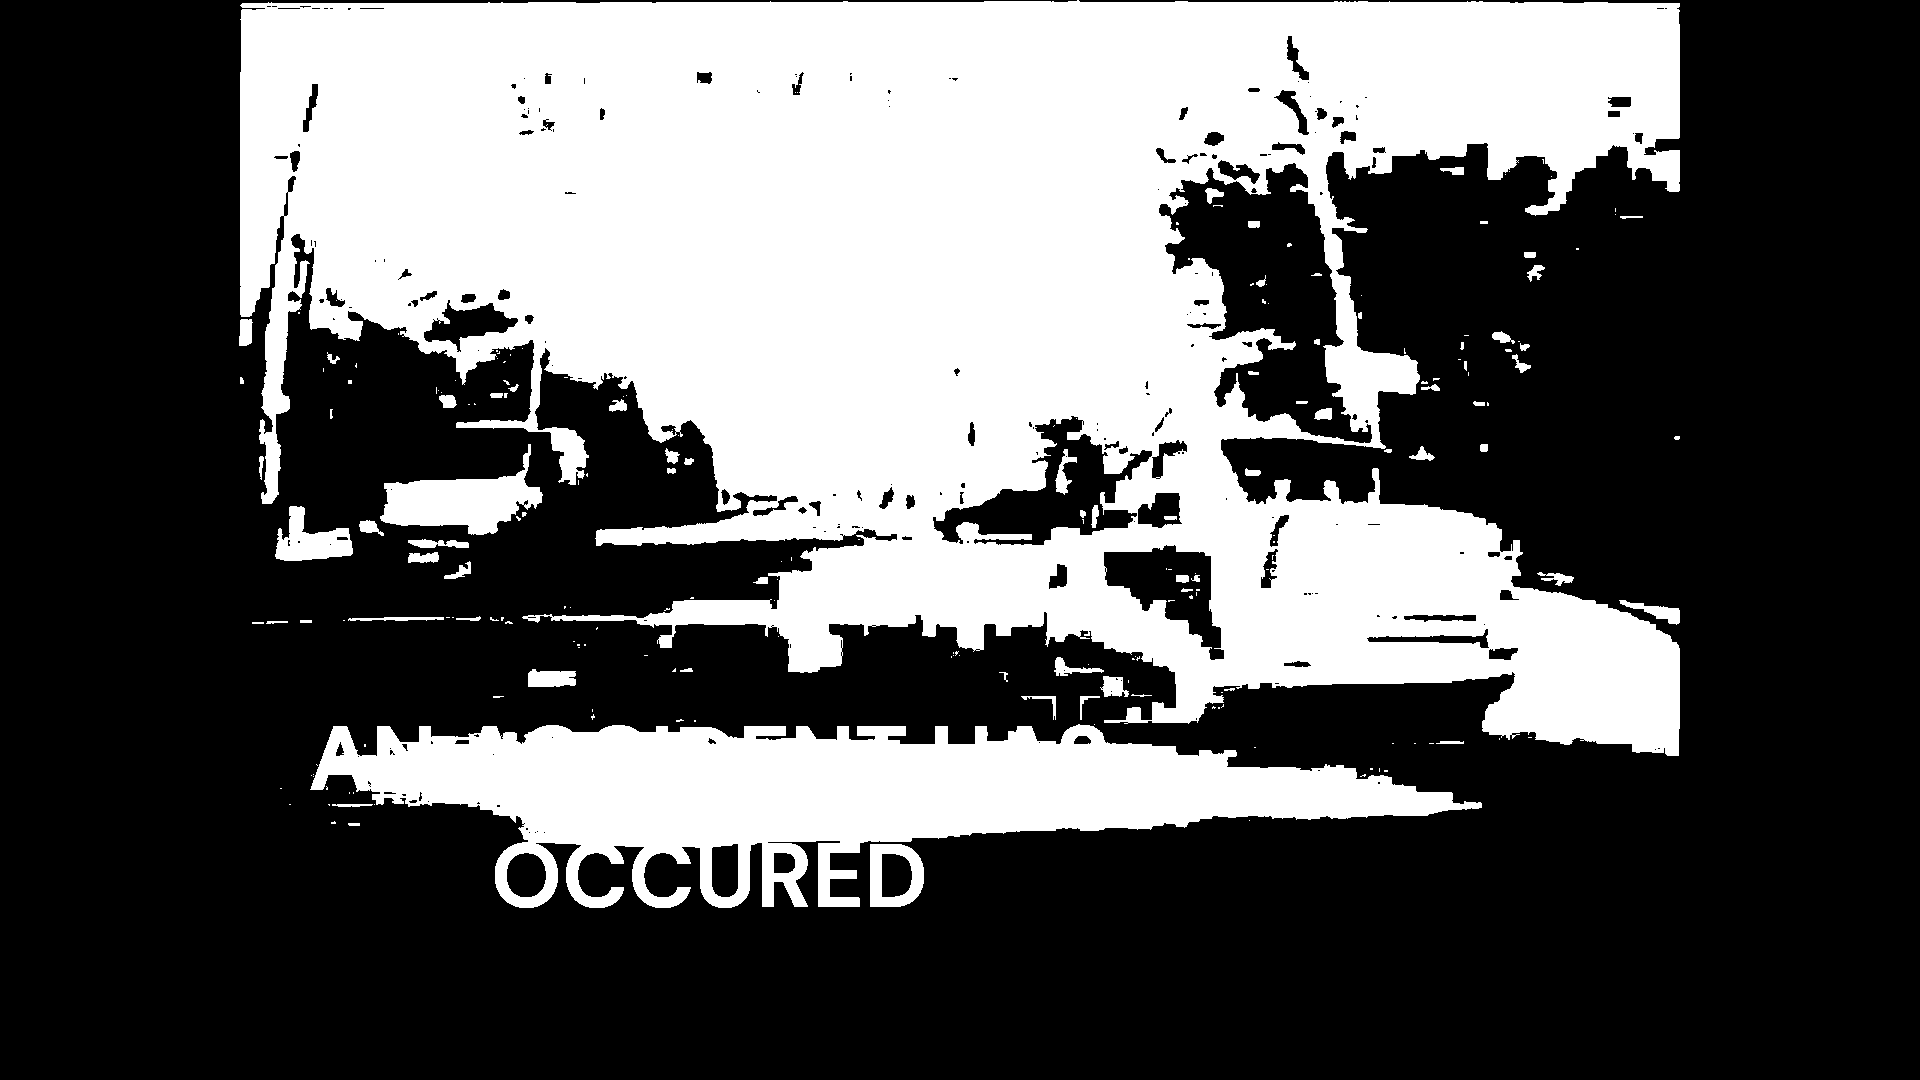

Processed Text:  

Prediction: [0]


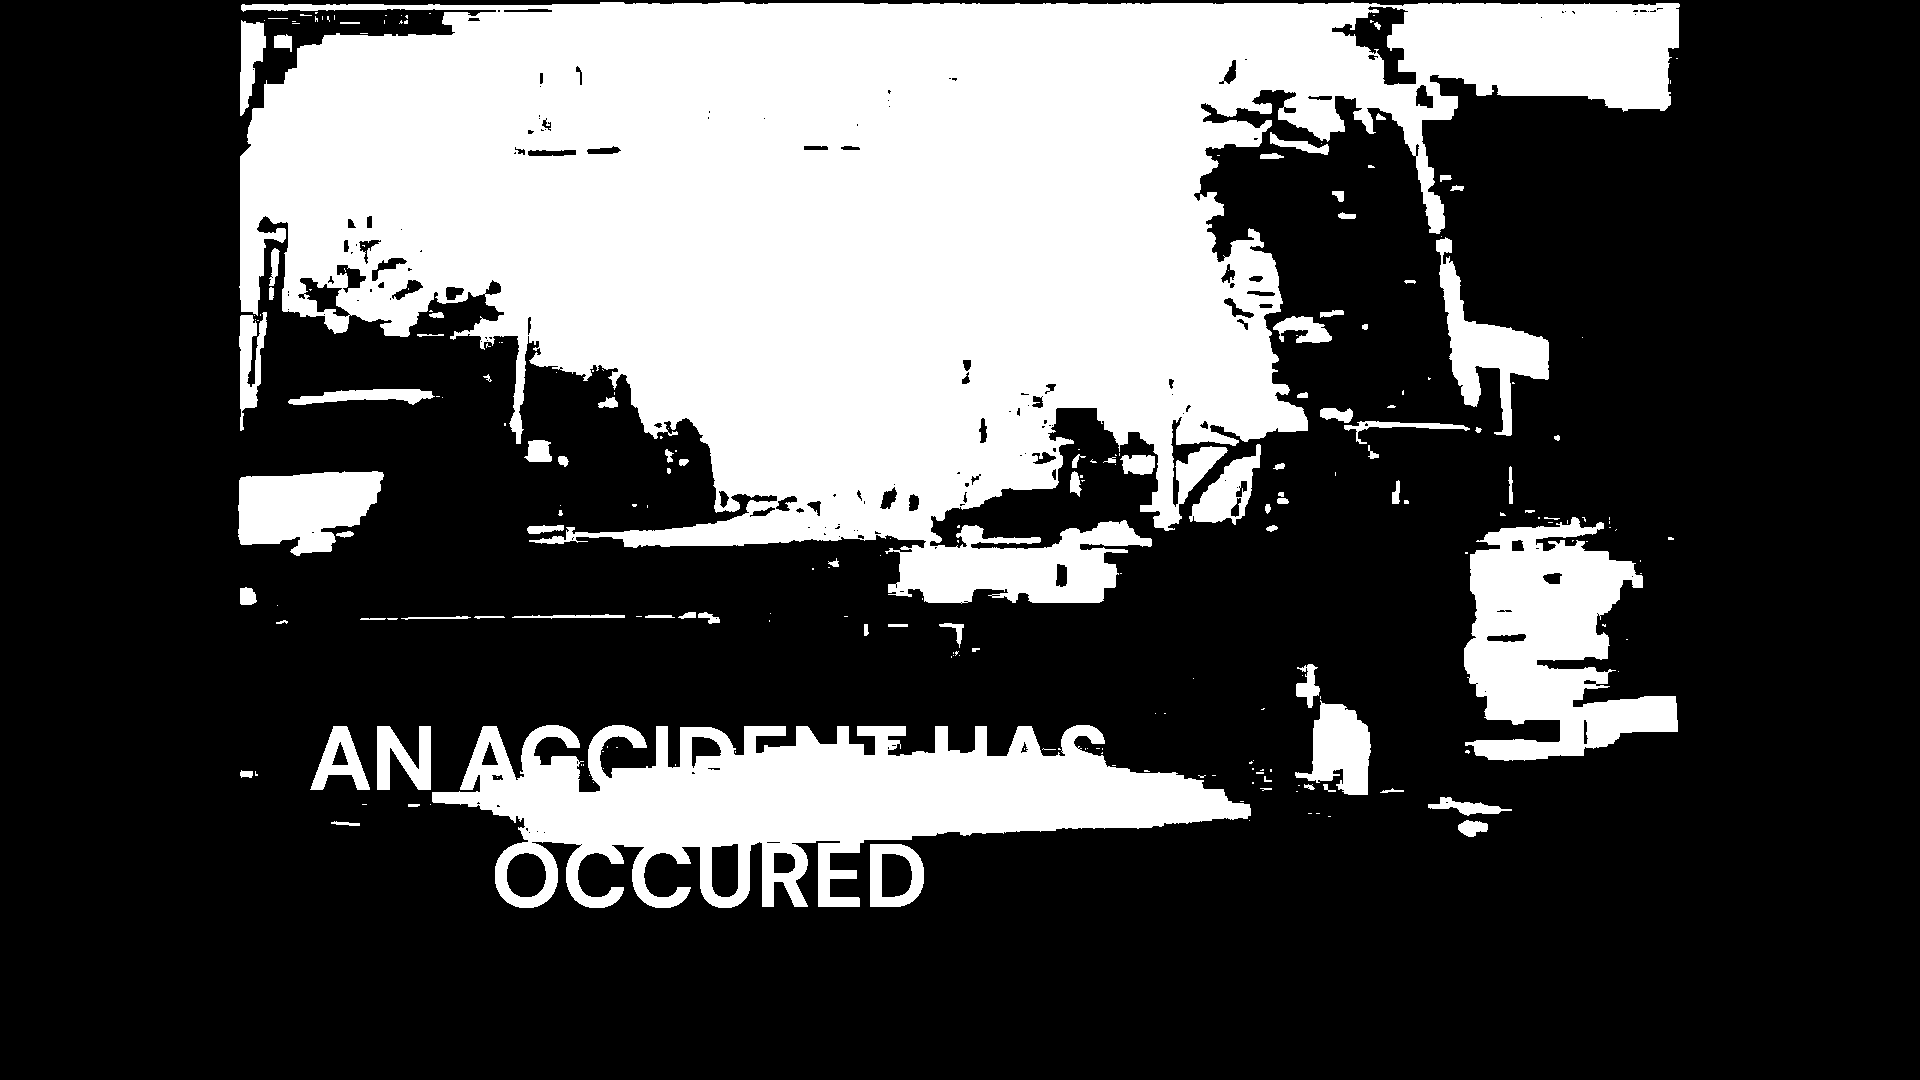

Processed Text:  

Prediction: [0]


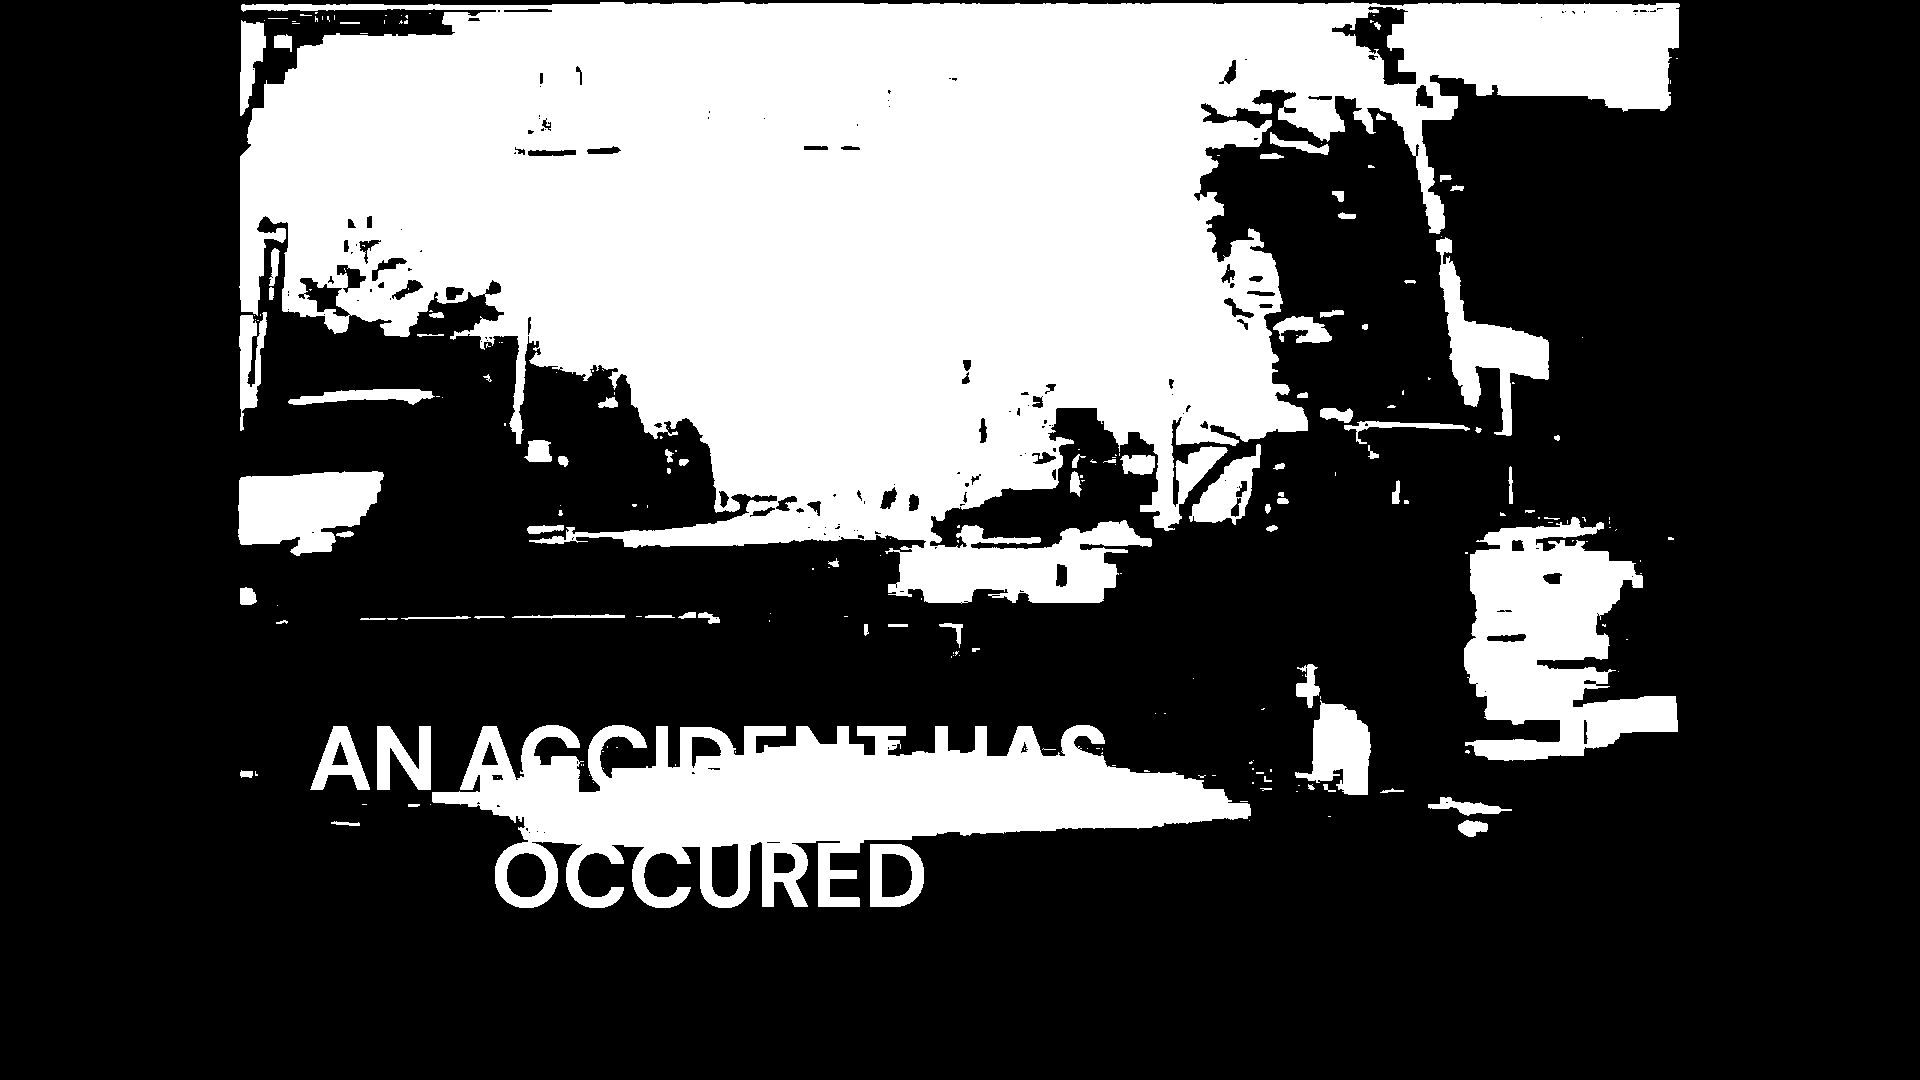

Processed Text:  

Prediction: [0]


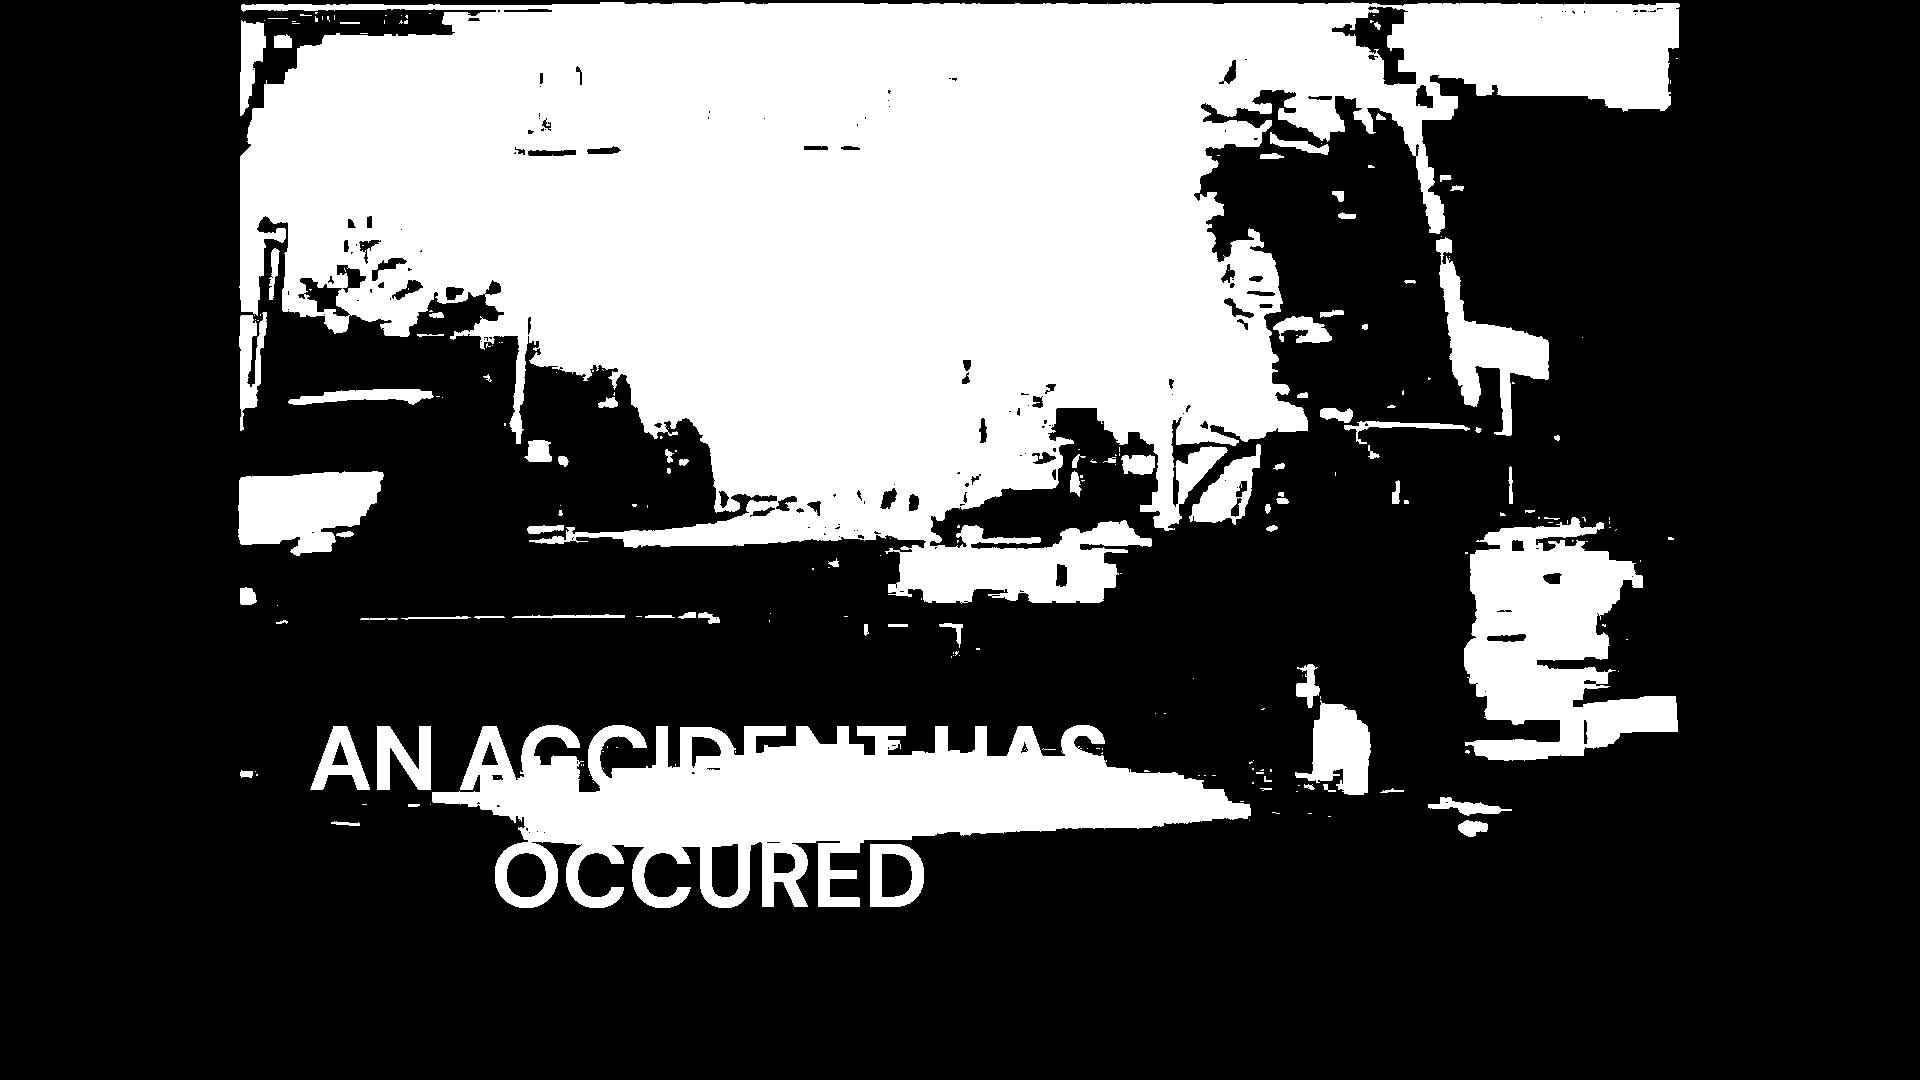

Processed Text:  

  

oe
en

Prediction: [1]


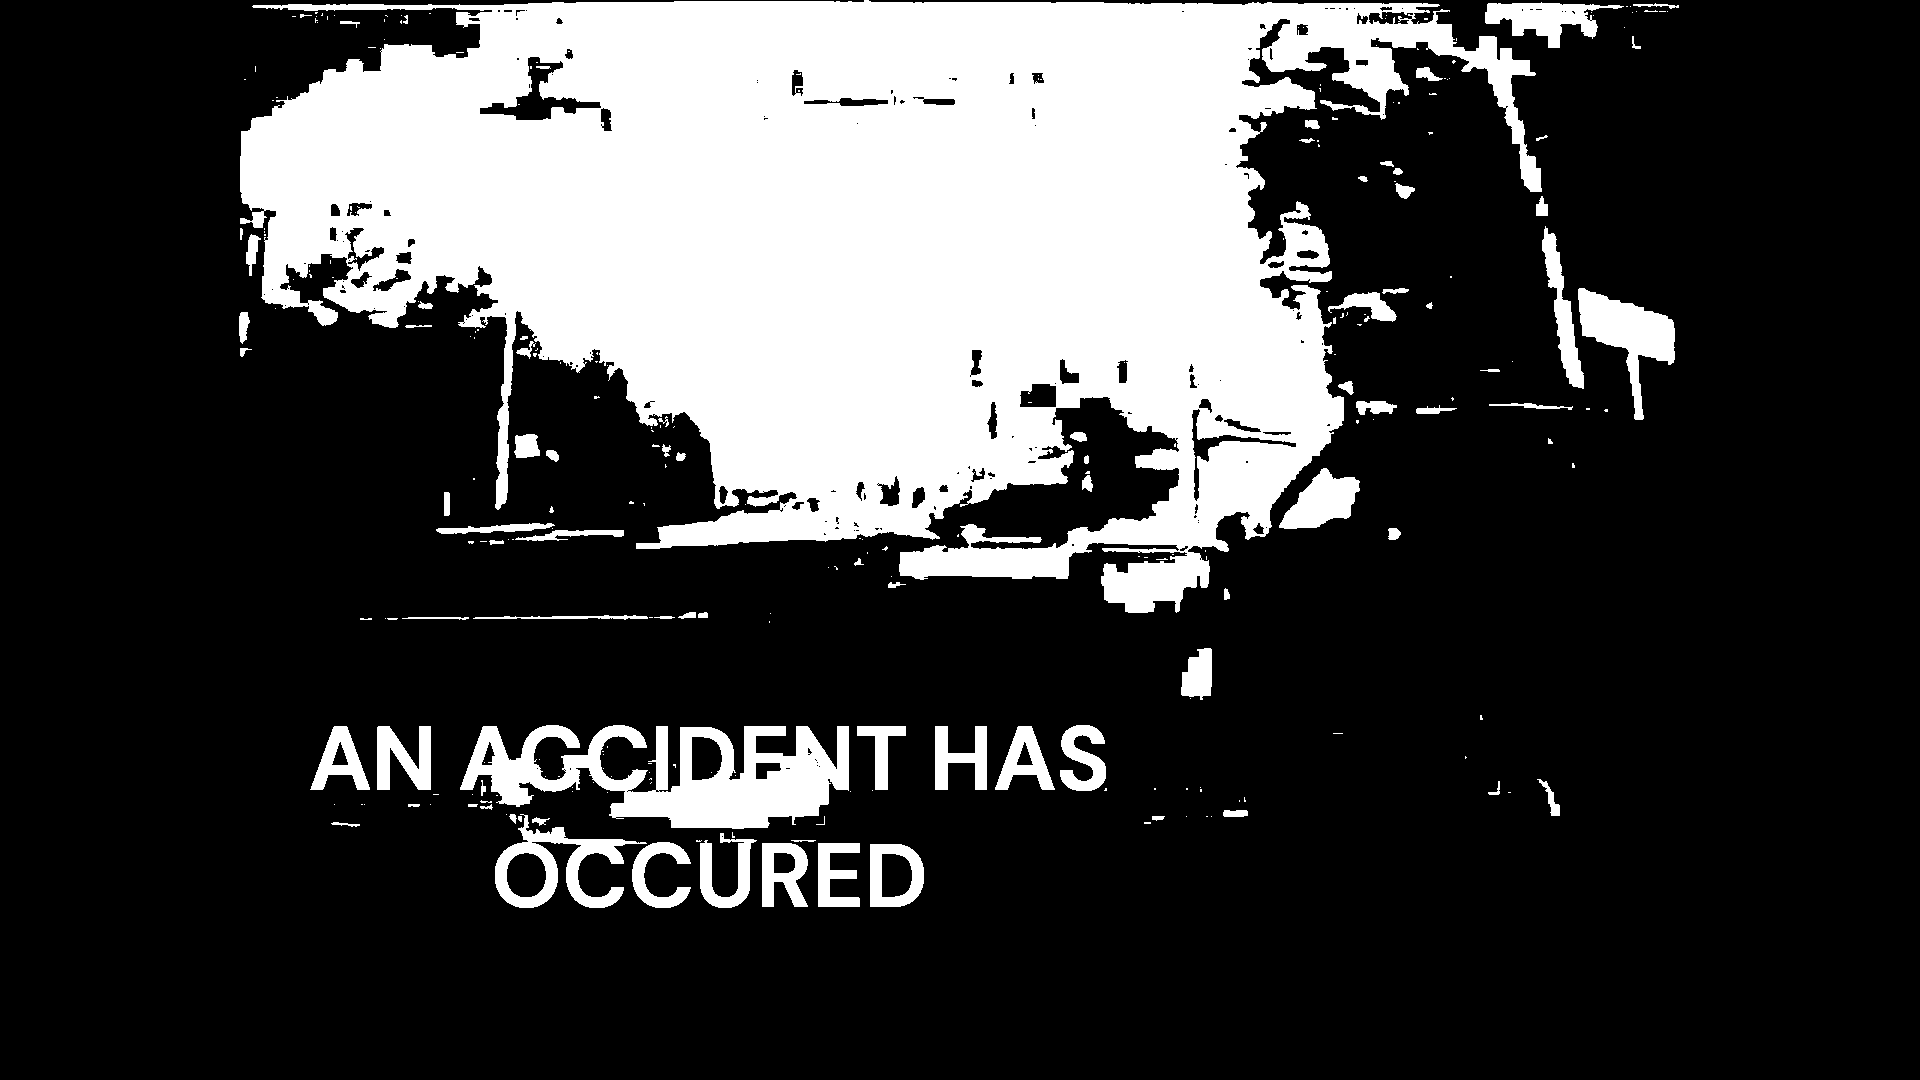

Processed Text:  

  

oe
ein

Prediction: [0]


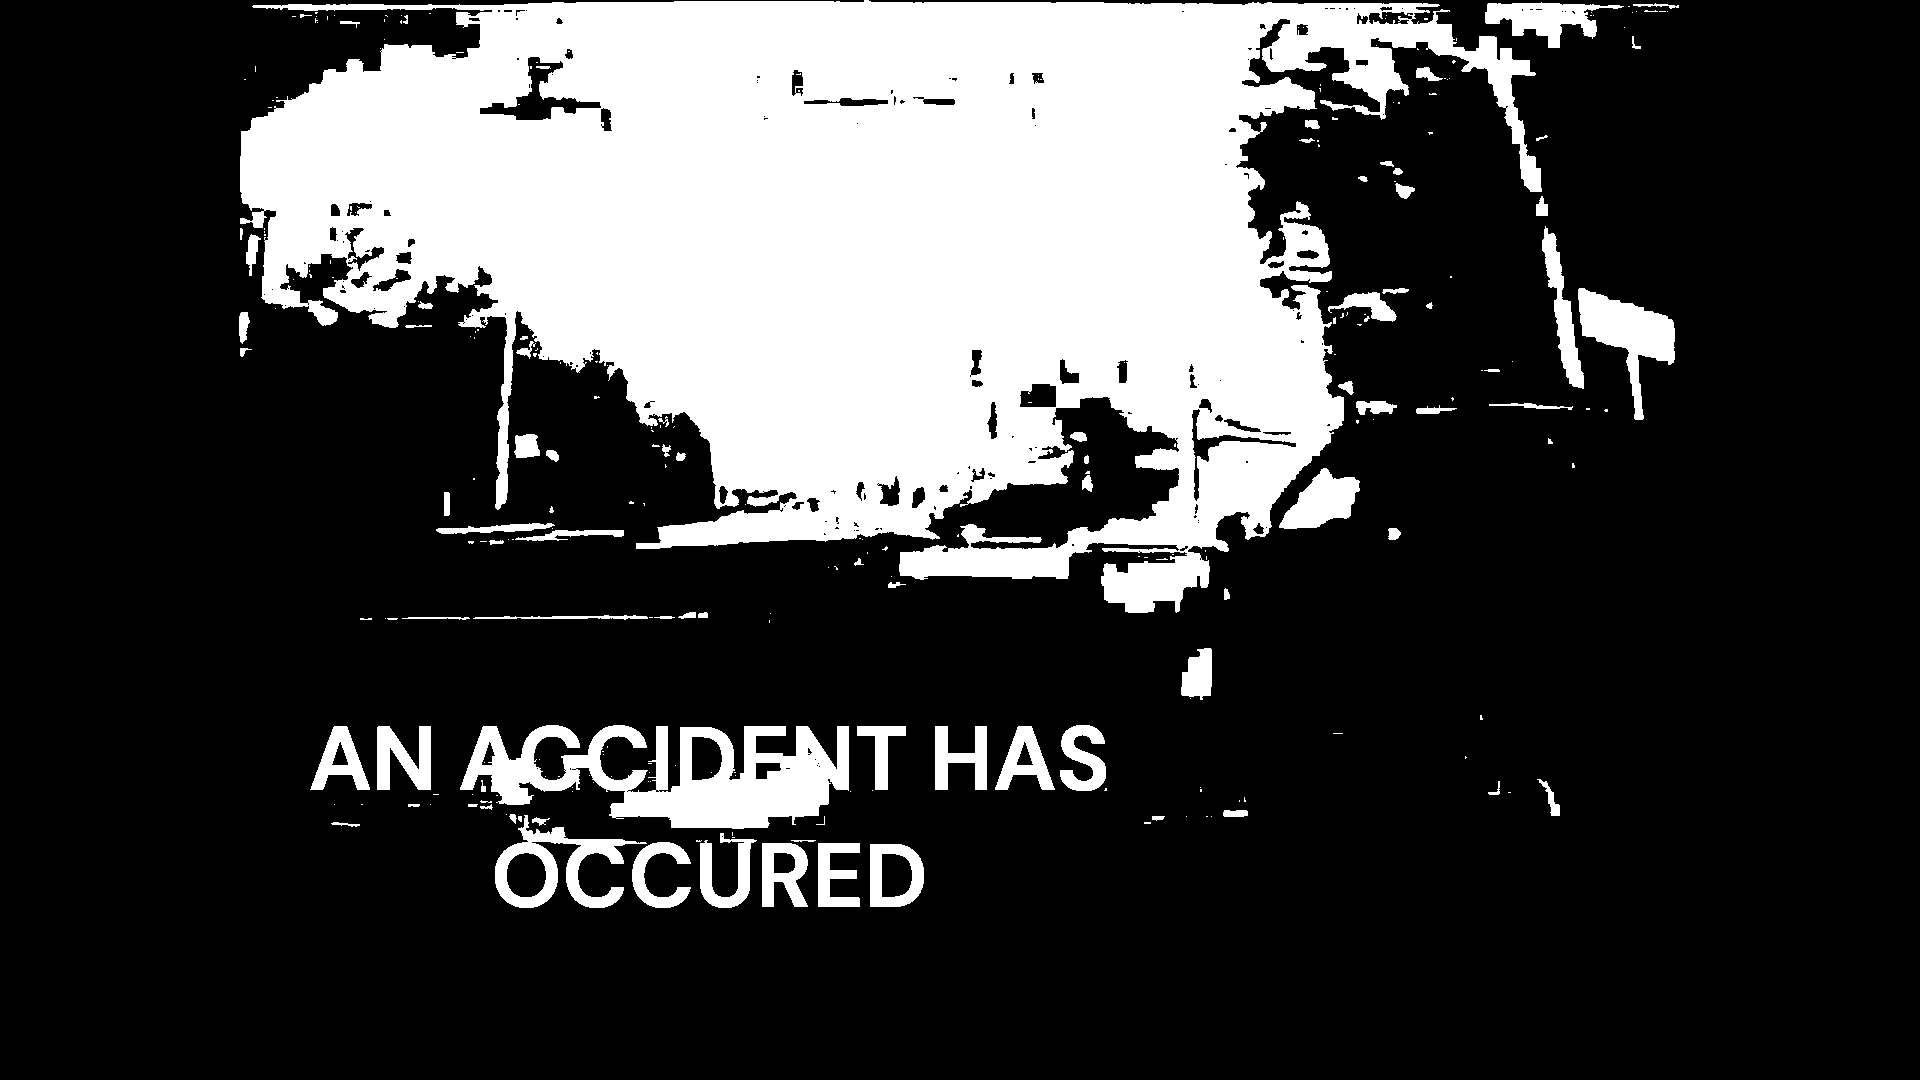

Processed Text:  

  

oe
re eclicia

Prediction: [0]


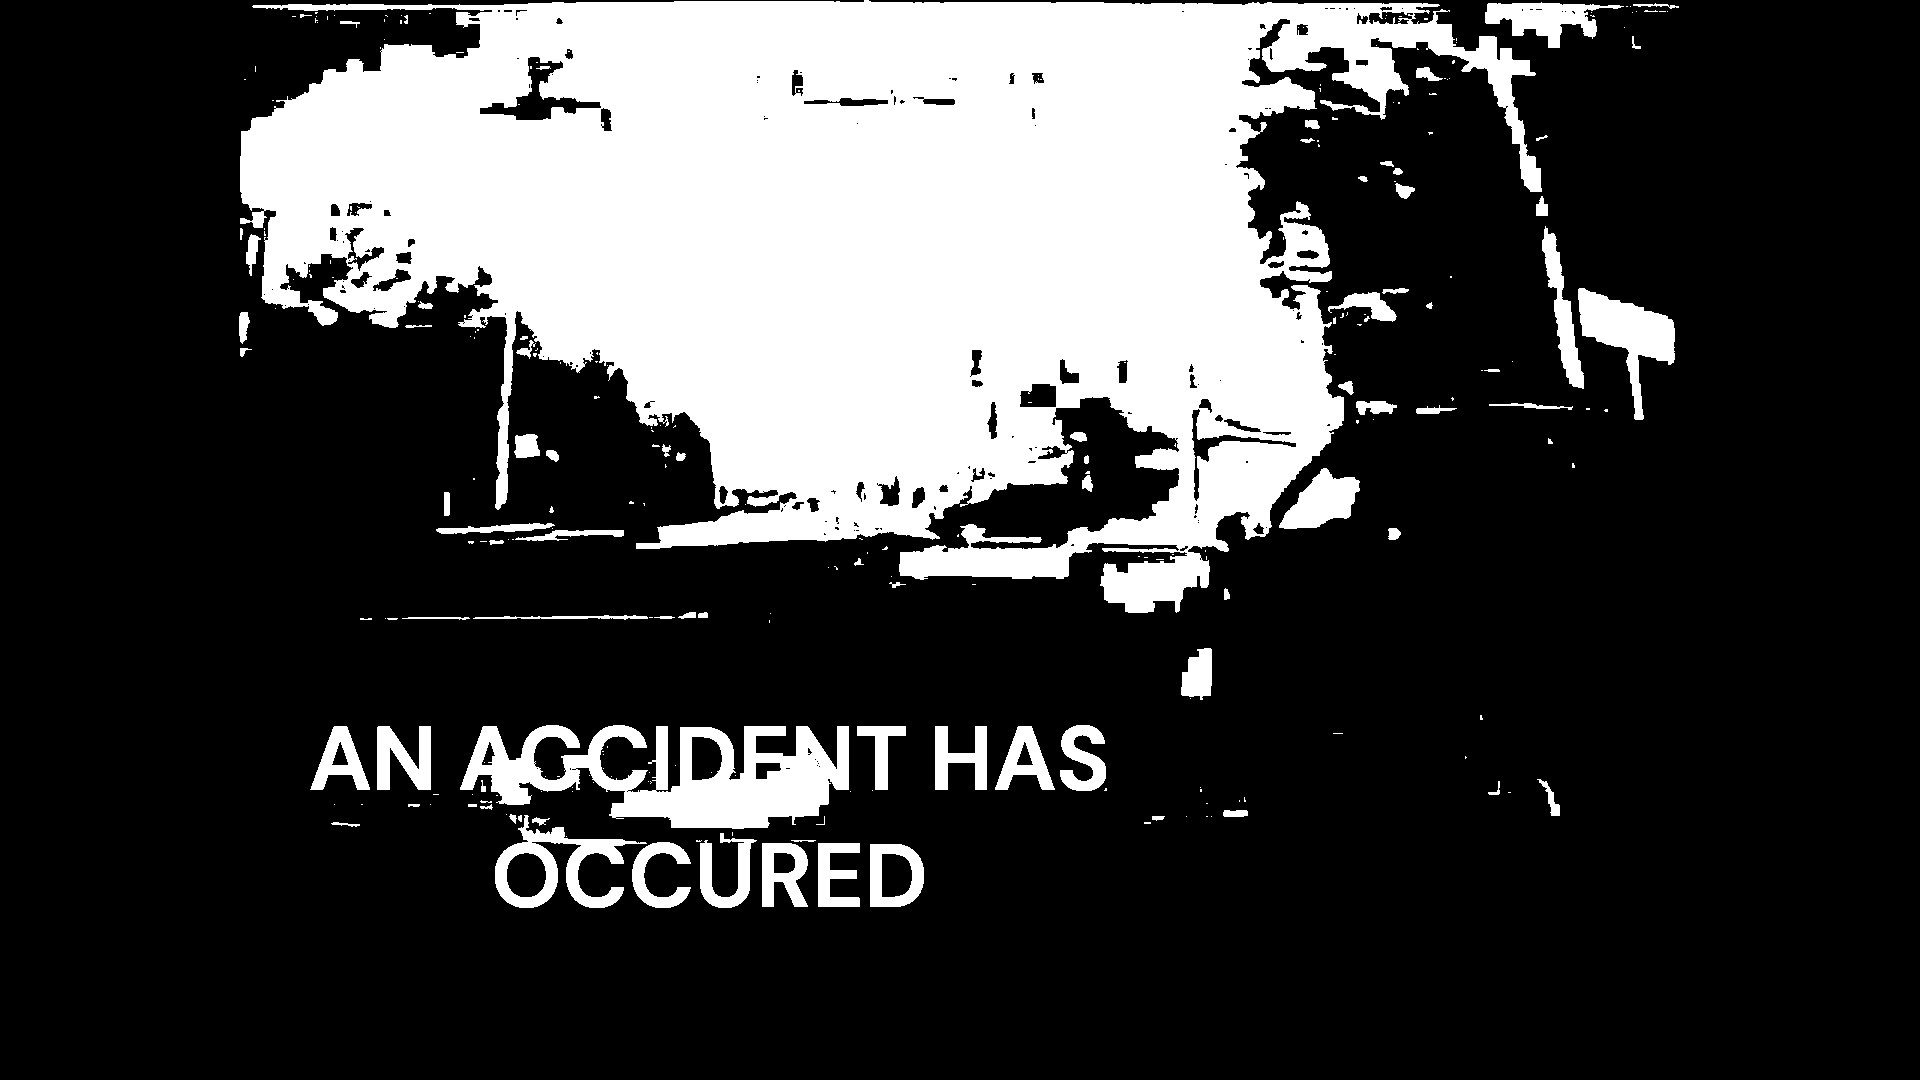

Processed Text:  

Prediction: [0]


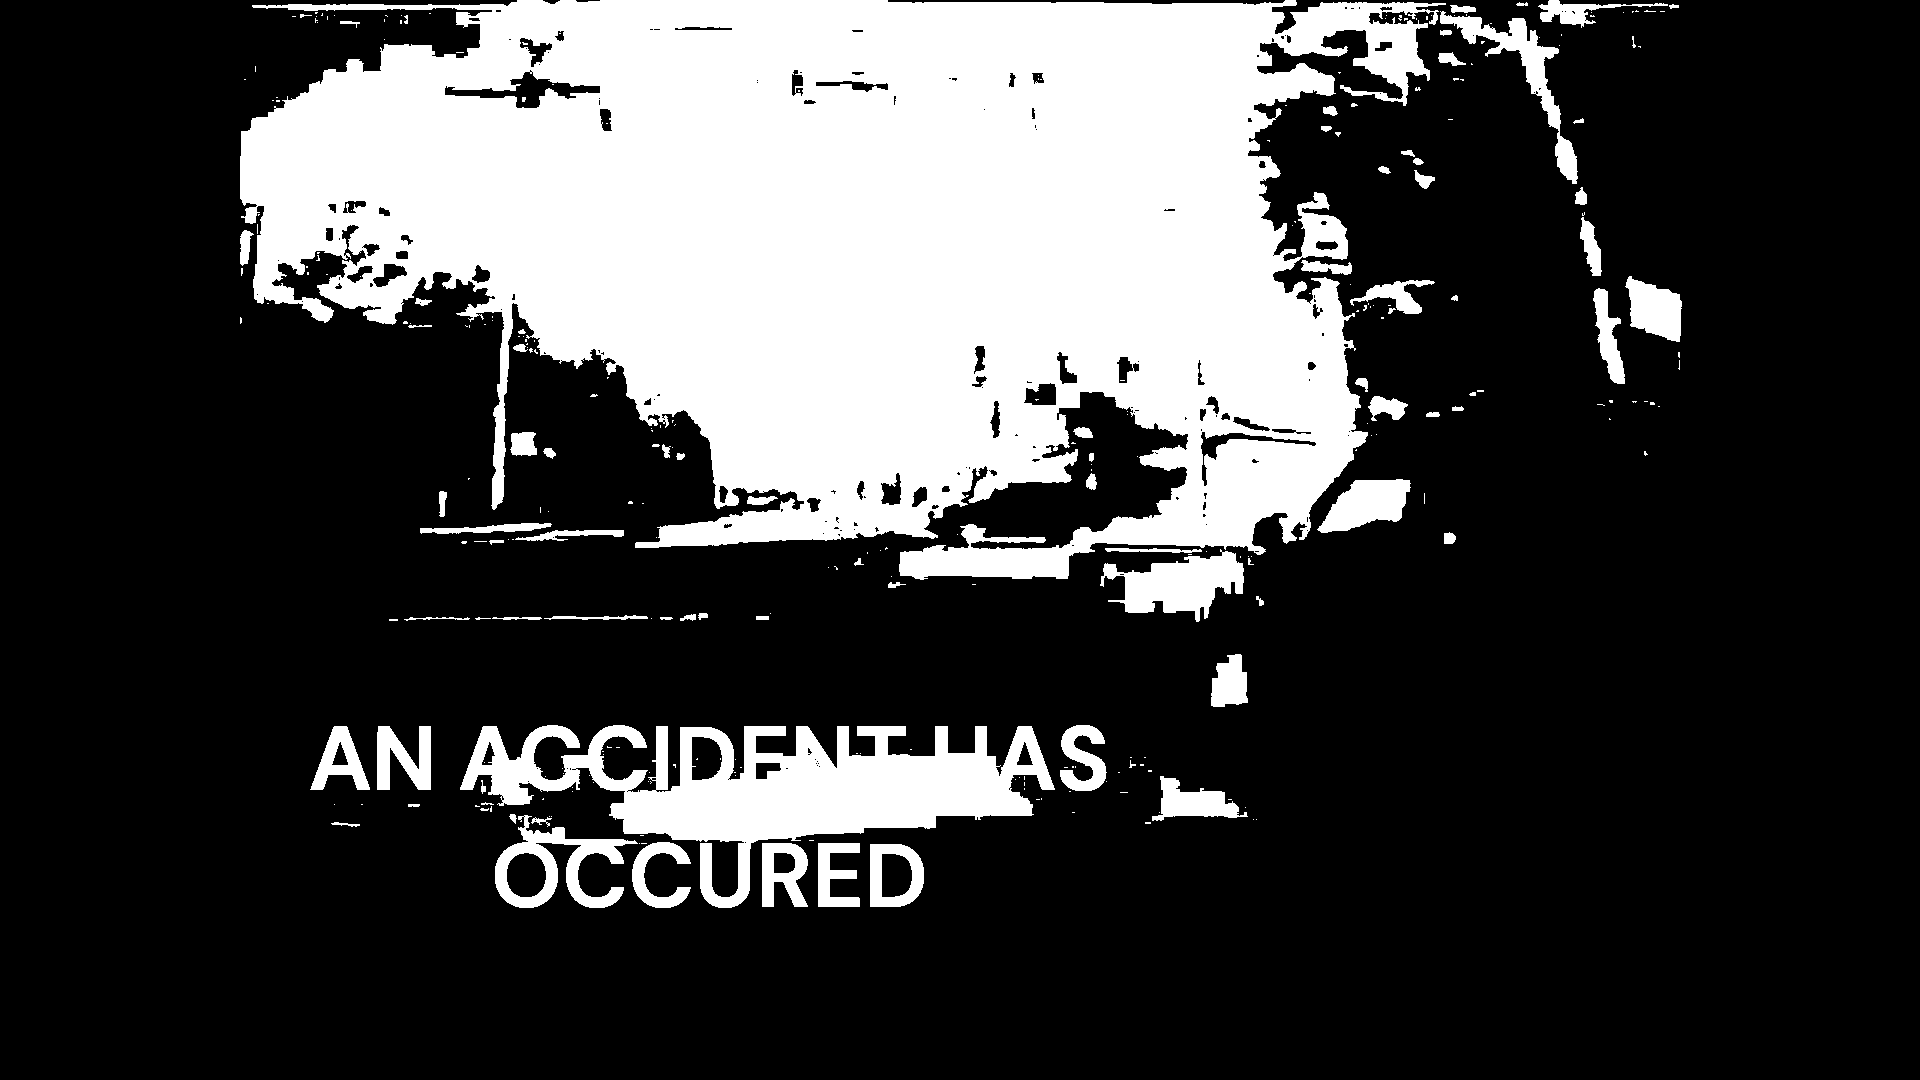

Processed Text:  

Prediction: [0]


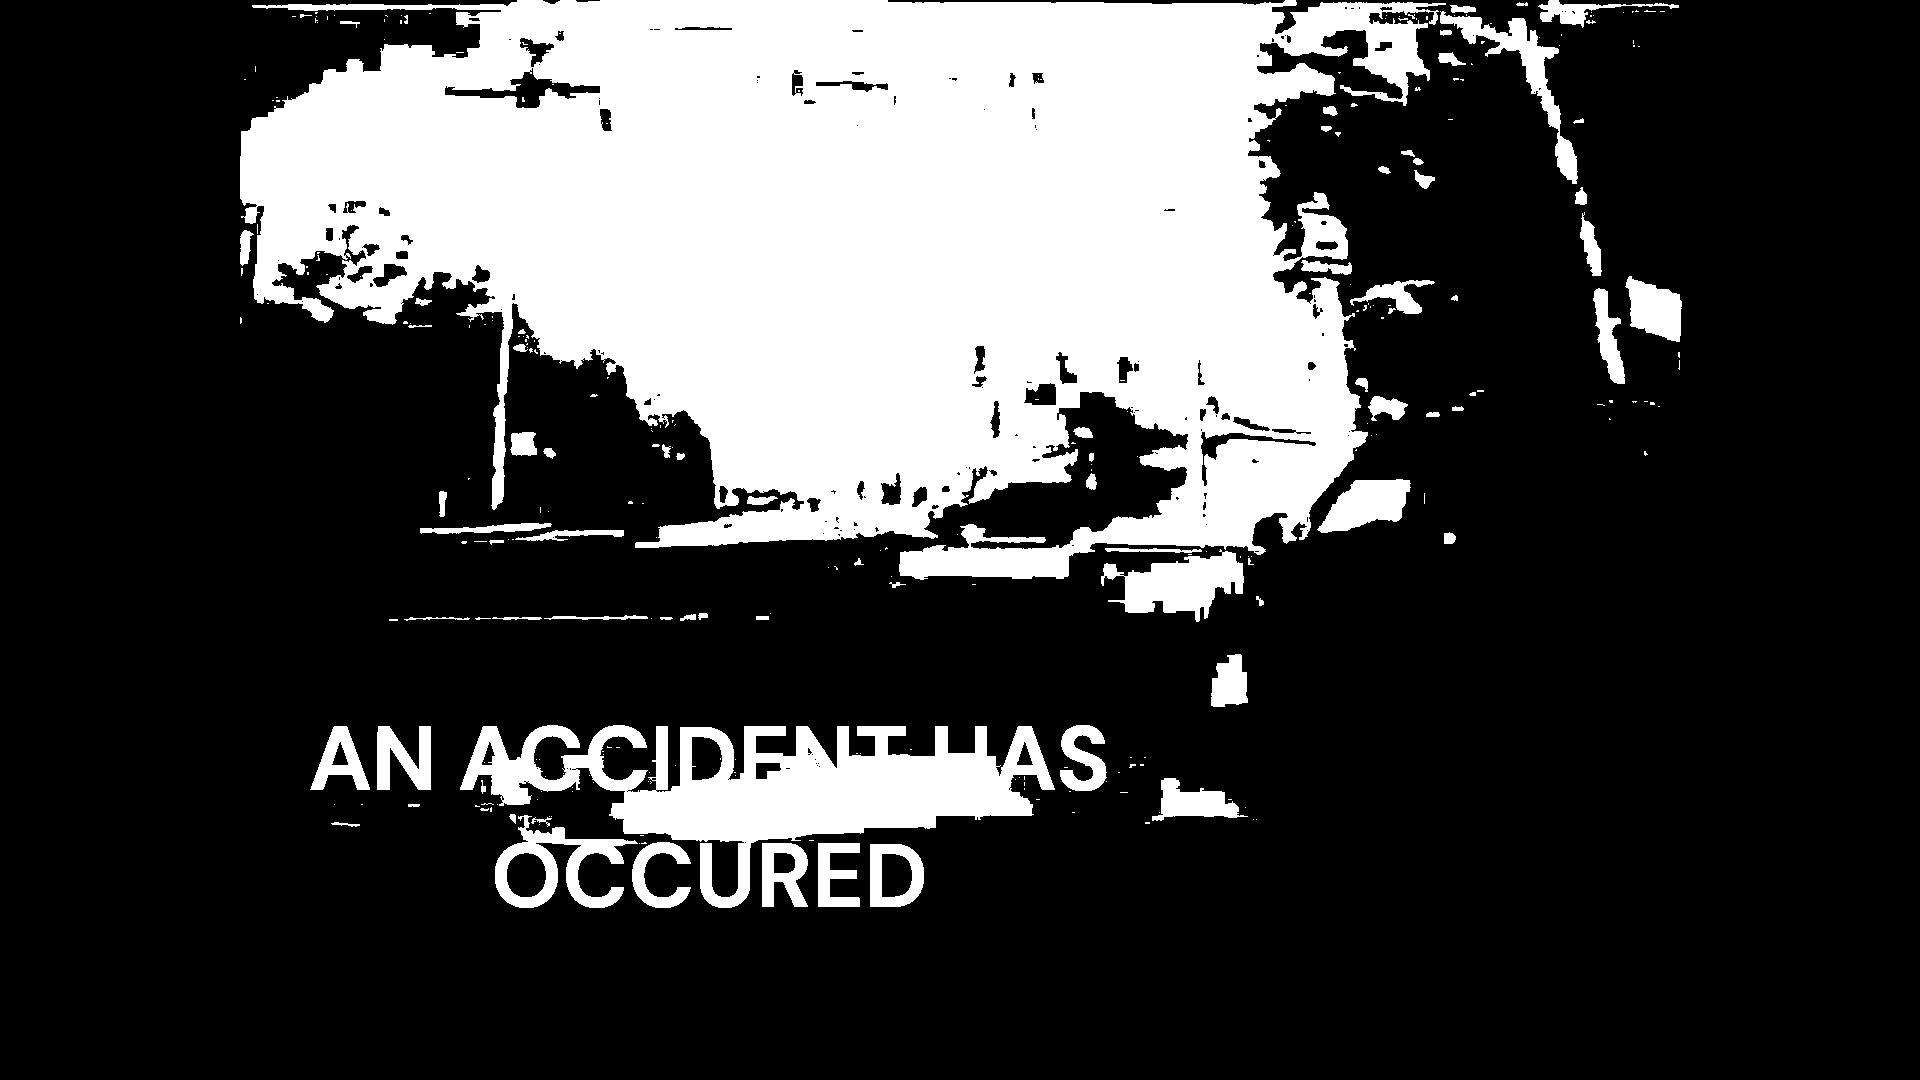

Processed Text:  

Prediction: [0]


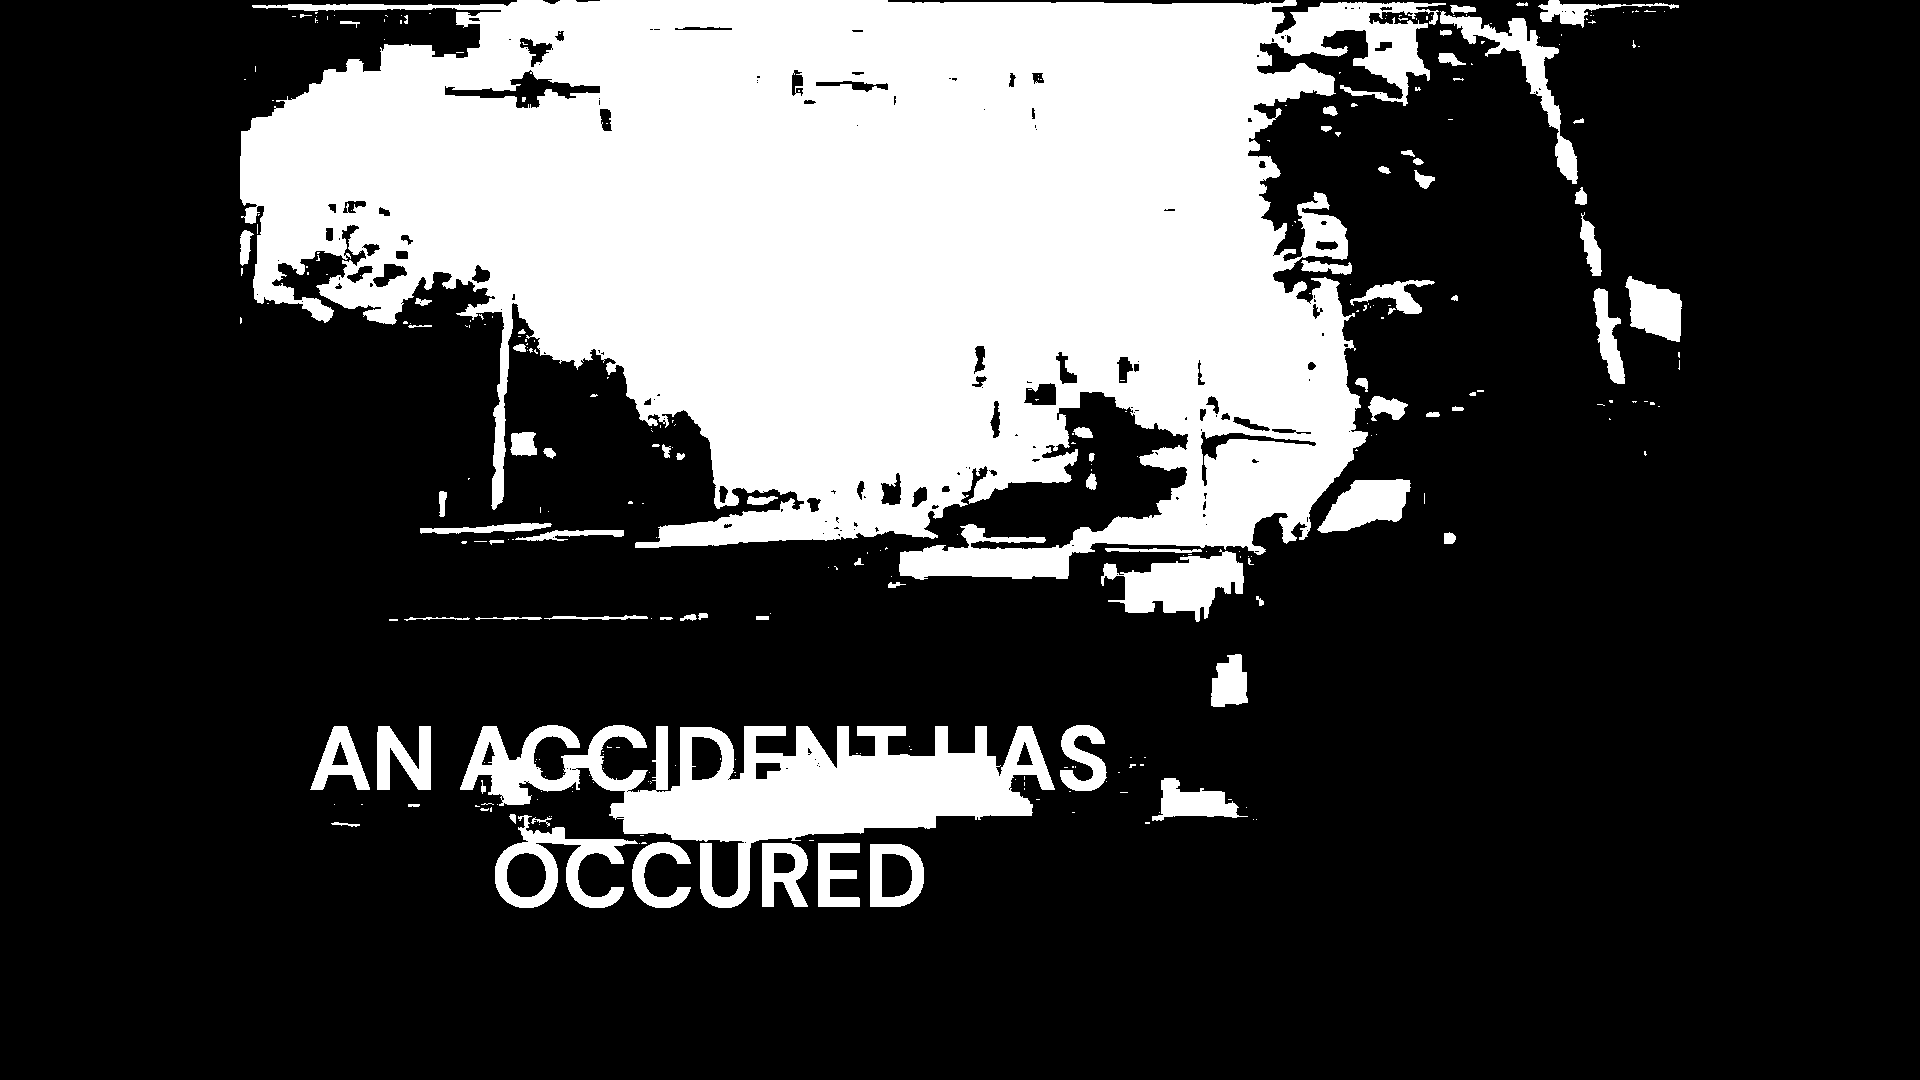

Processed Text:  

Prediction: [0]


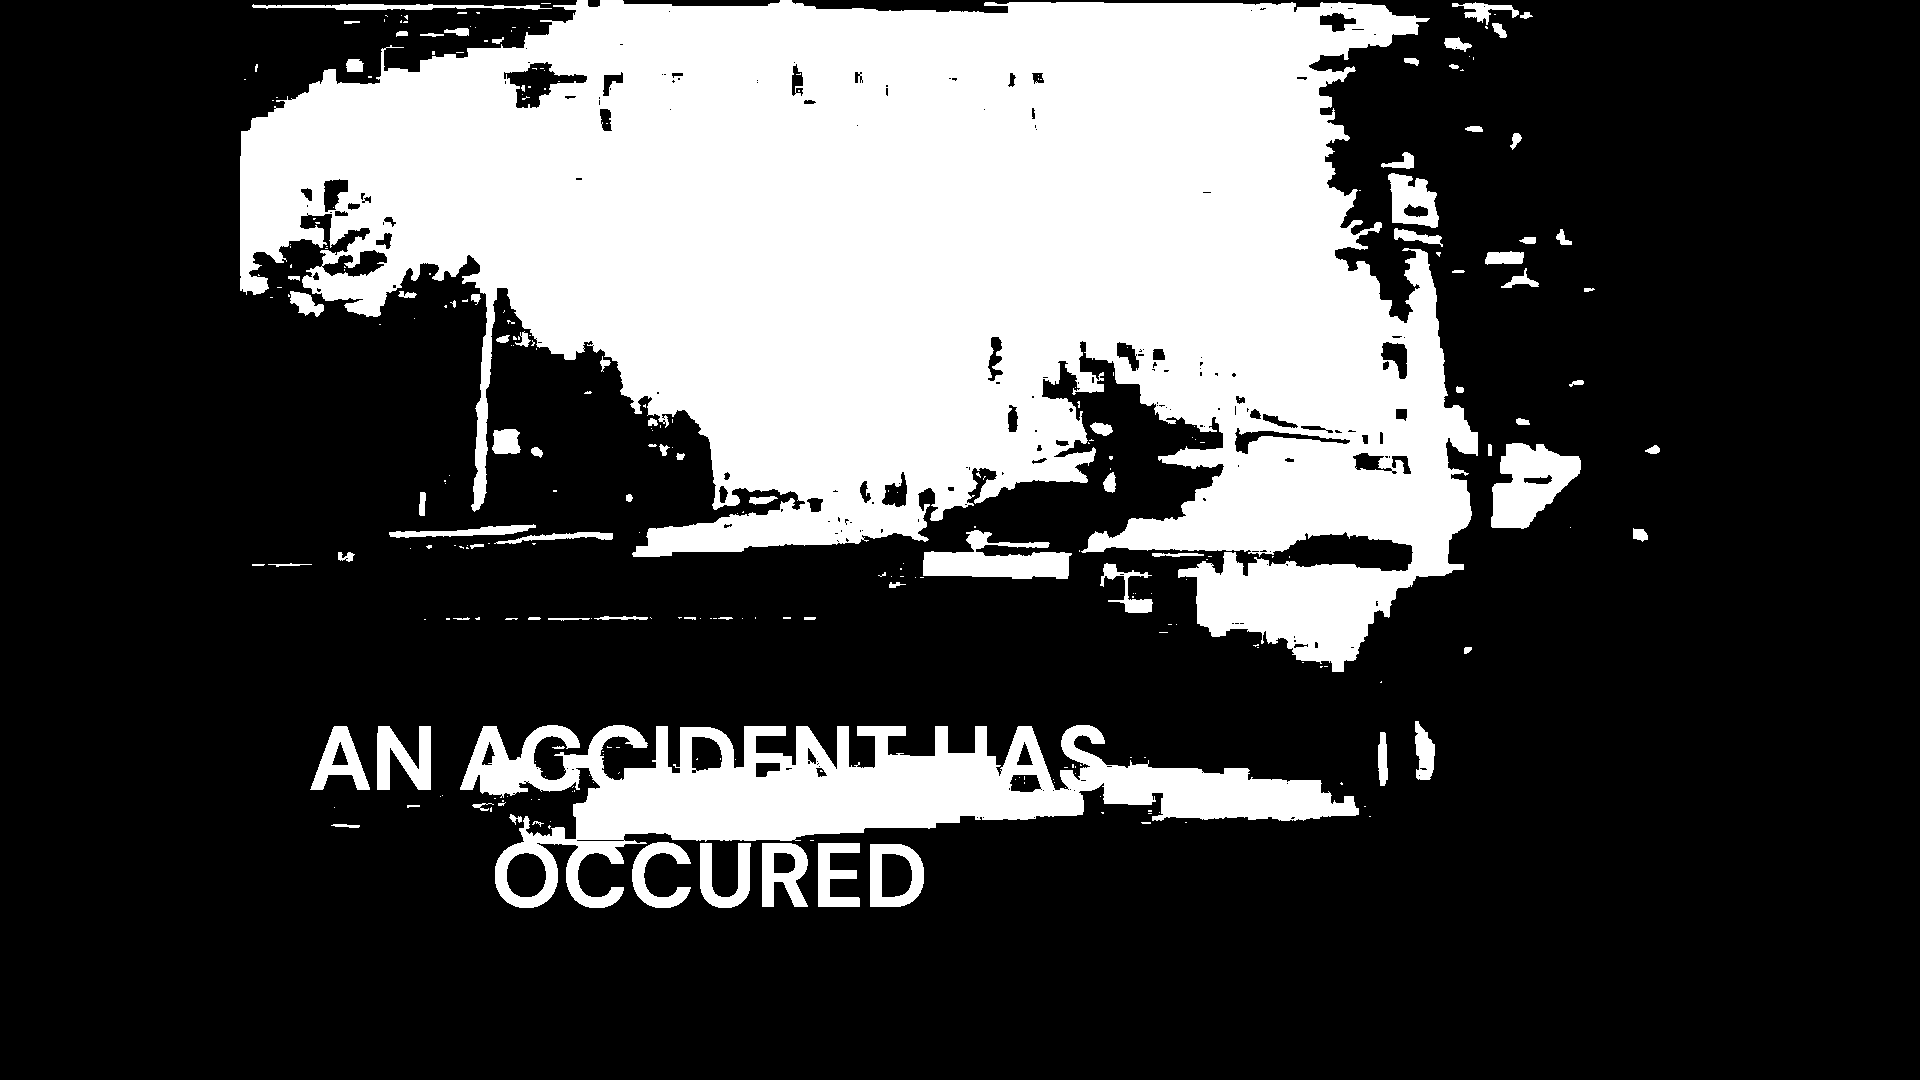

Processed Text:  

Prediction: [0]


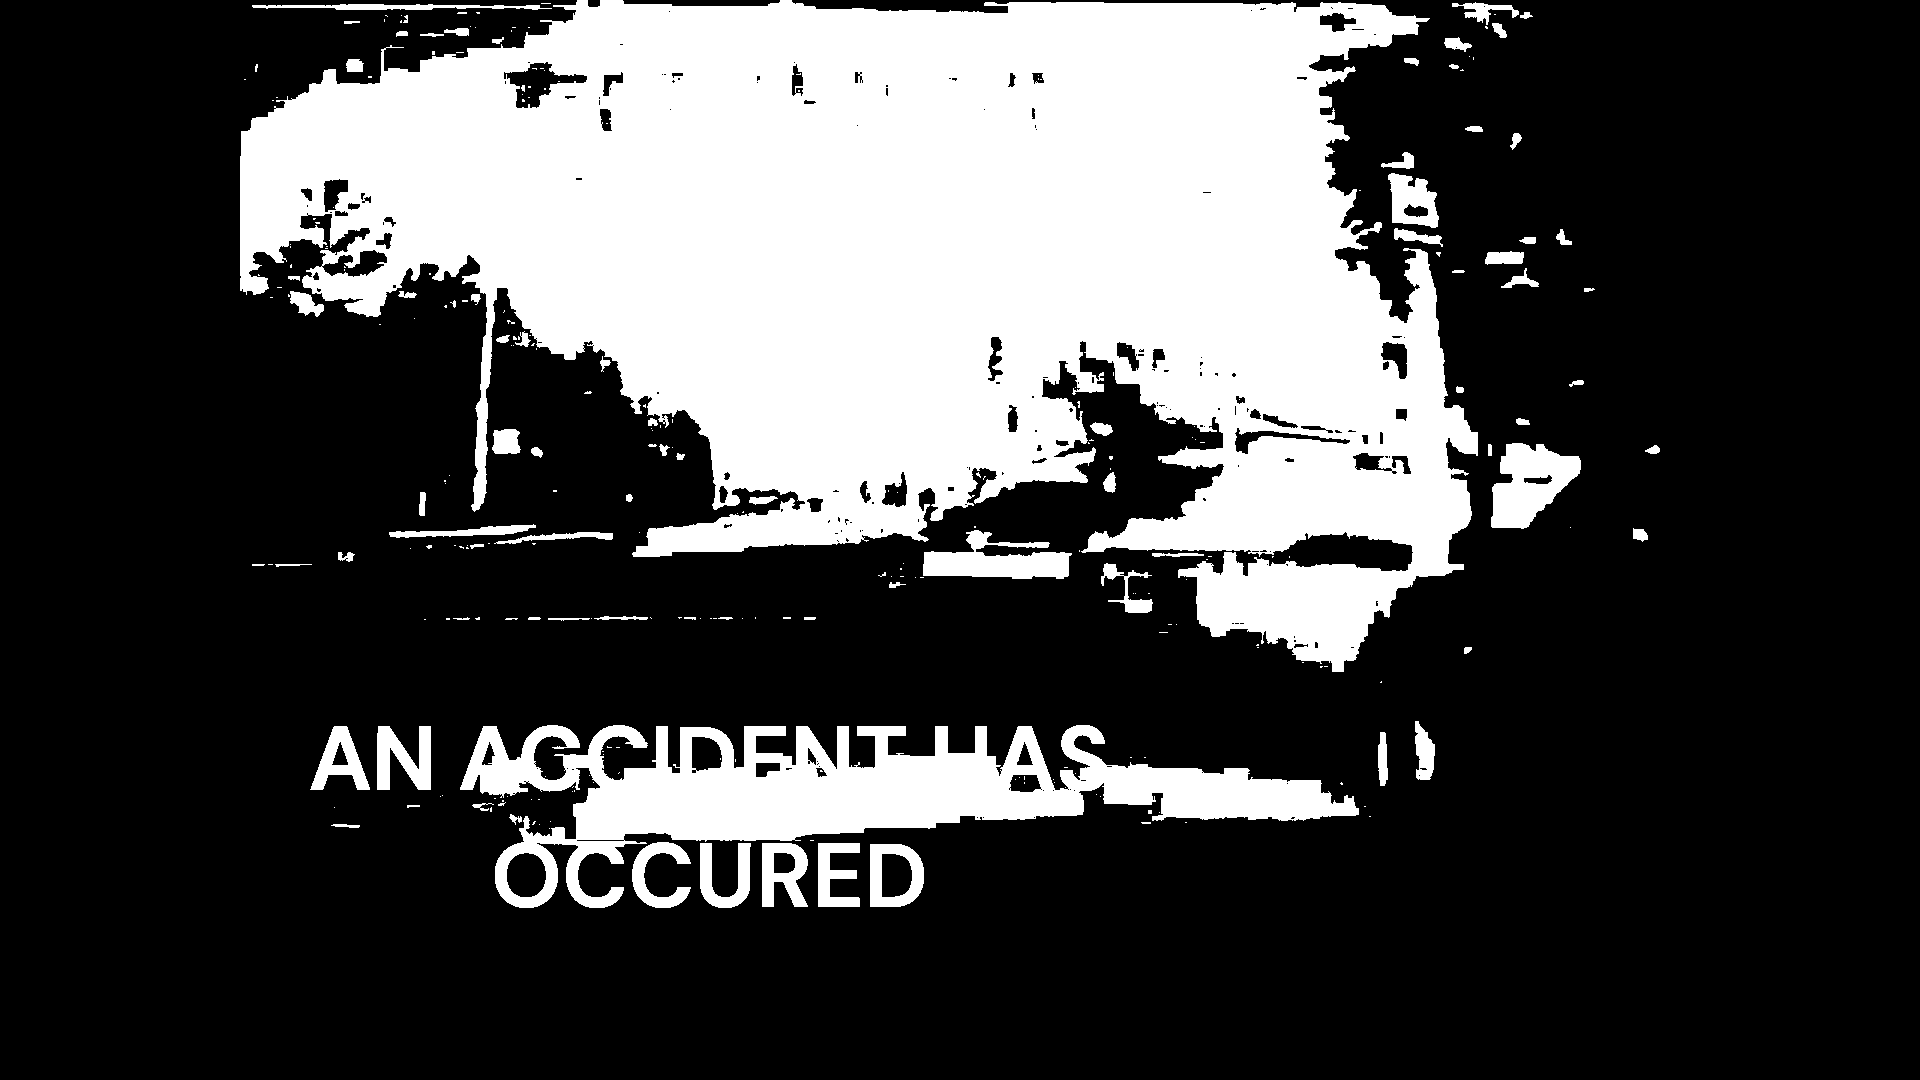

Processed Text:  

Prediction: [0]


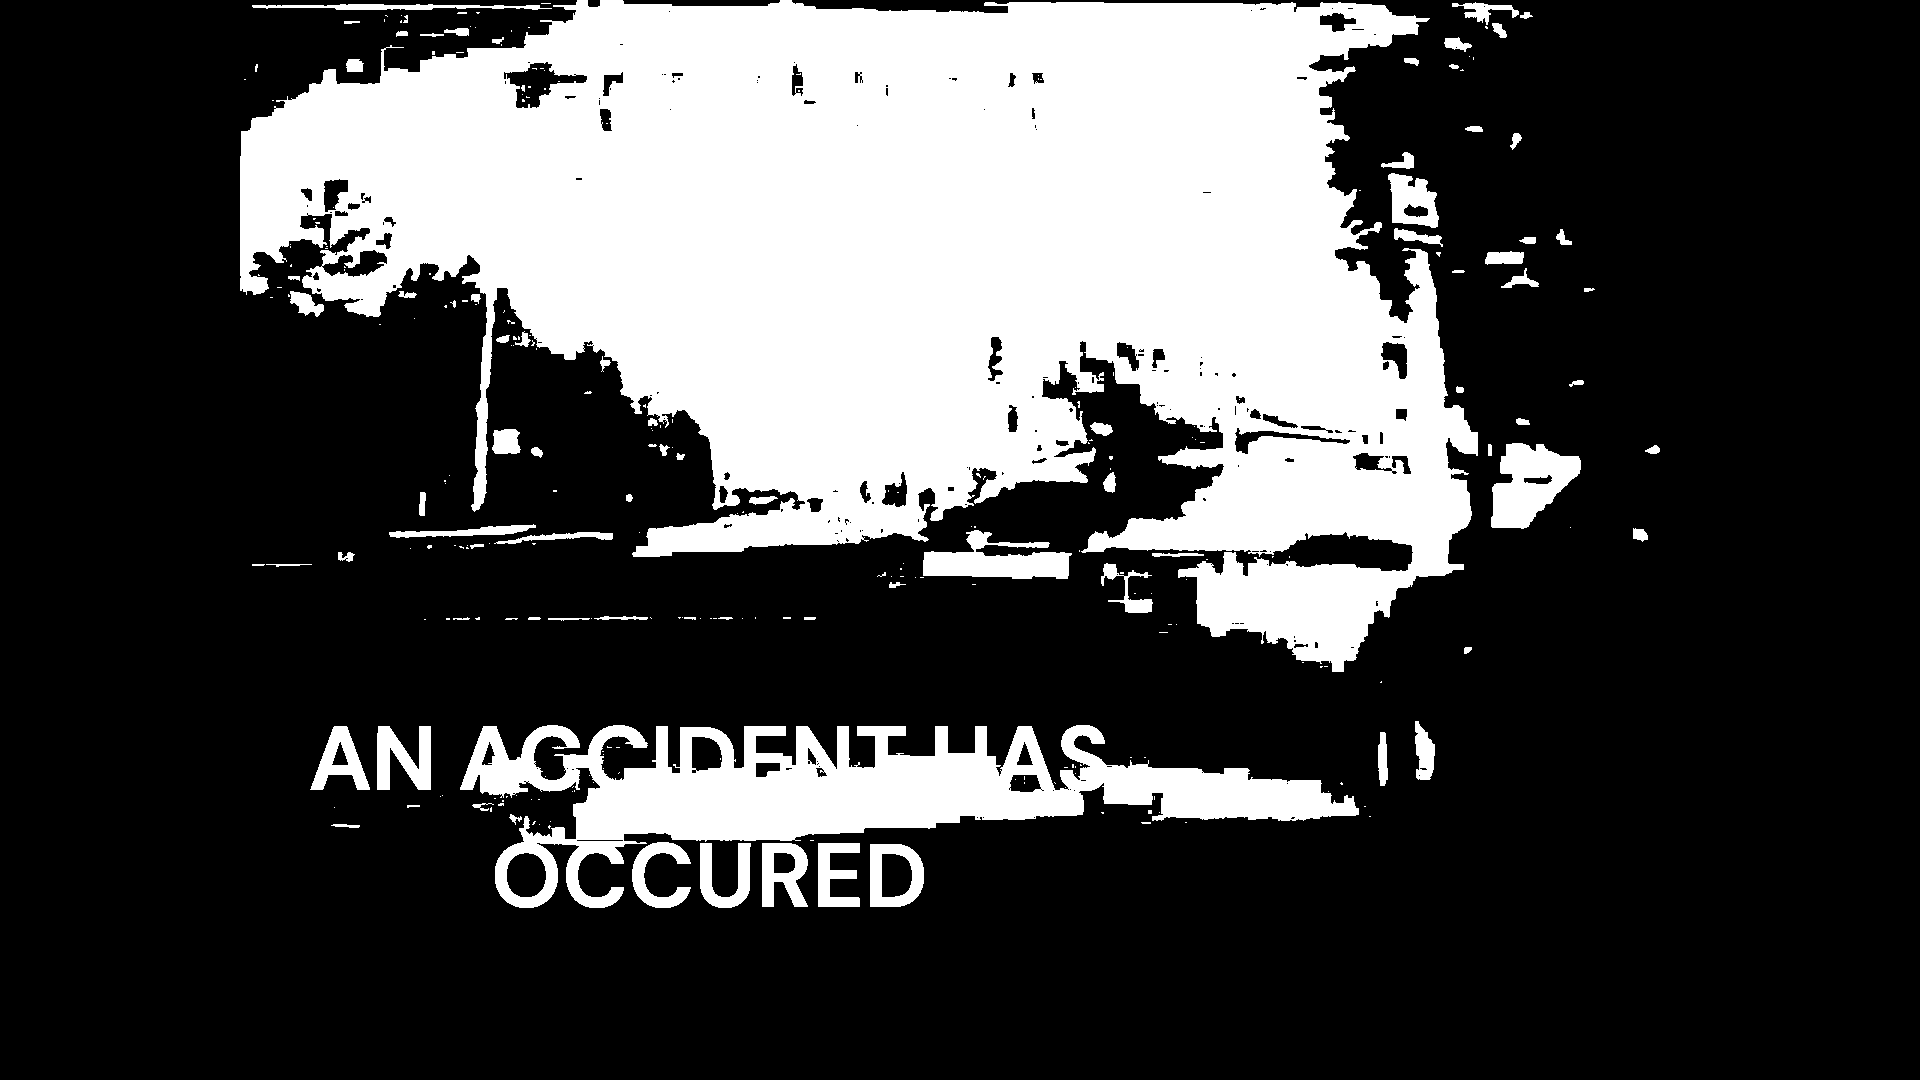

Processed Text:  

Prediction: [0]


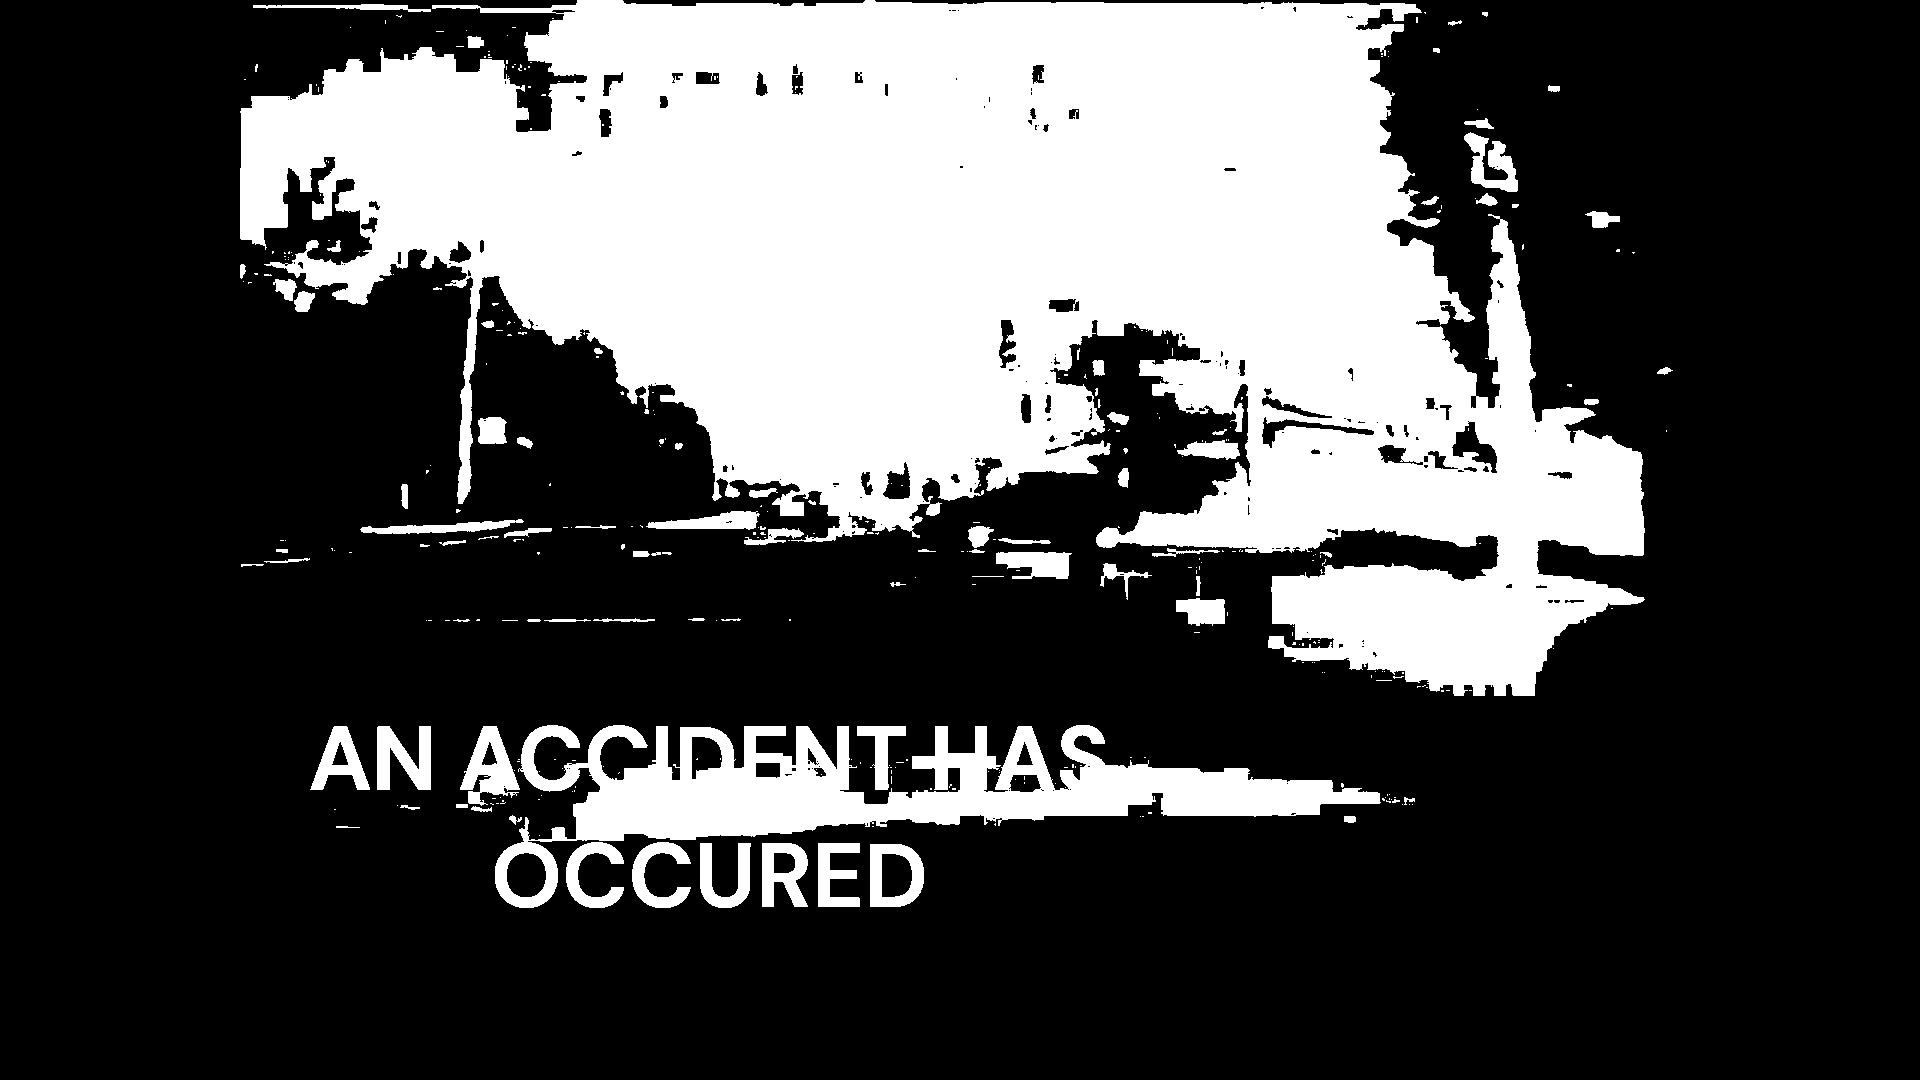

Processed Text:  

Prediction: [0]


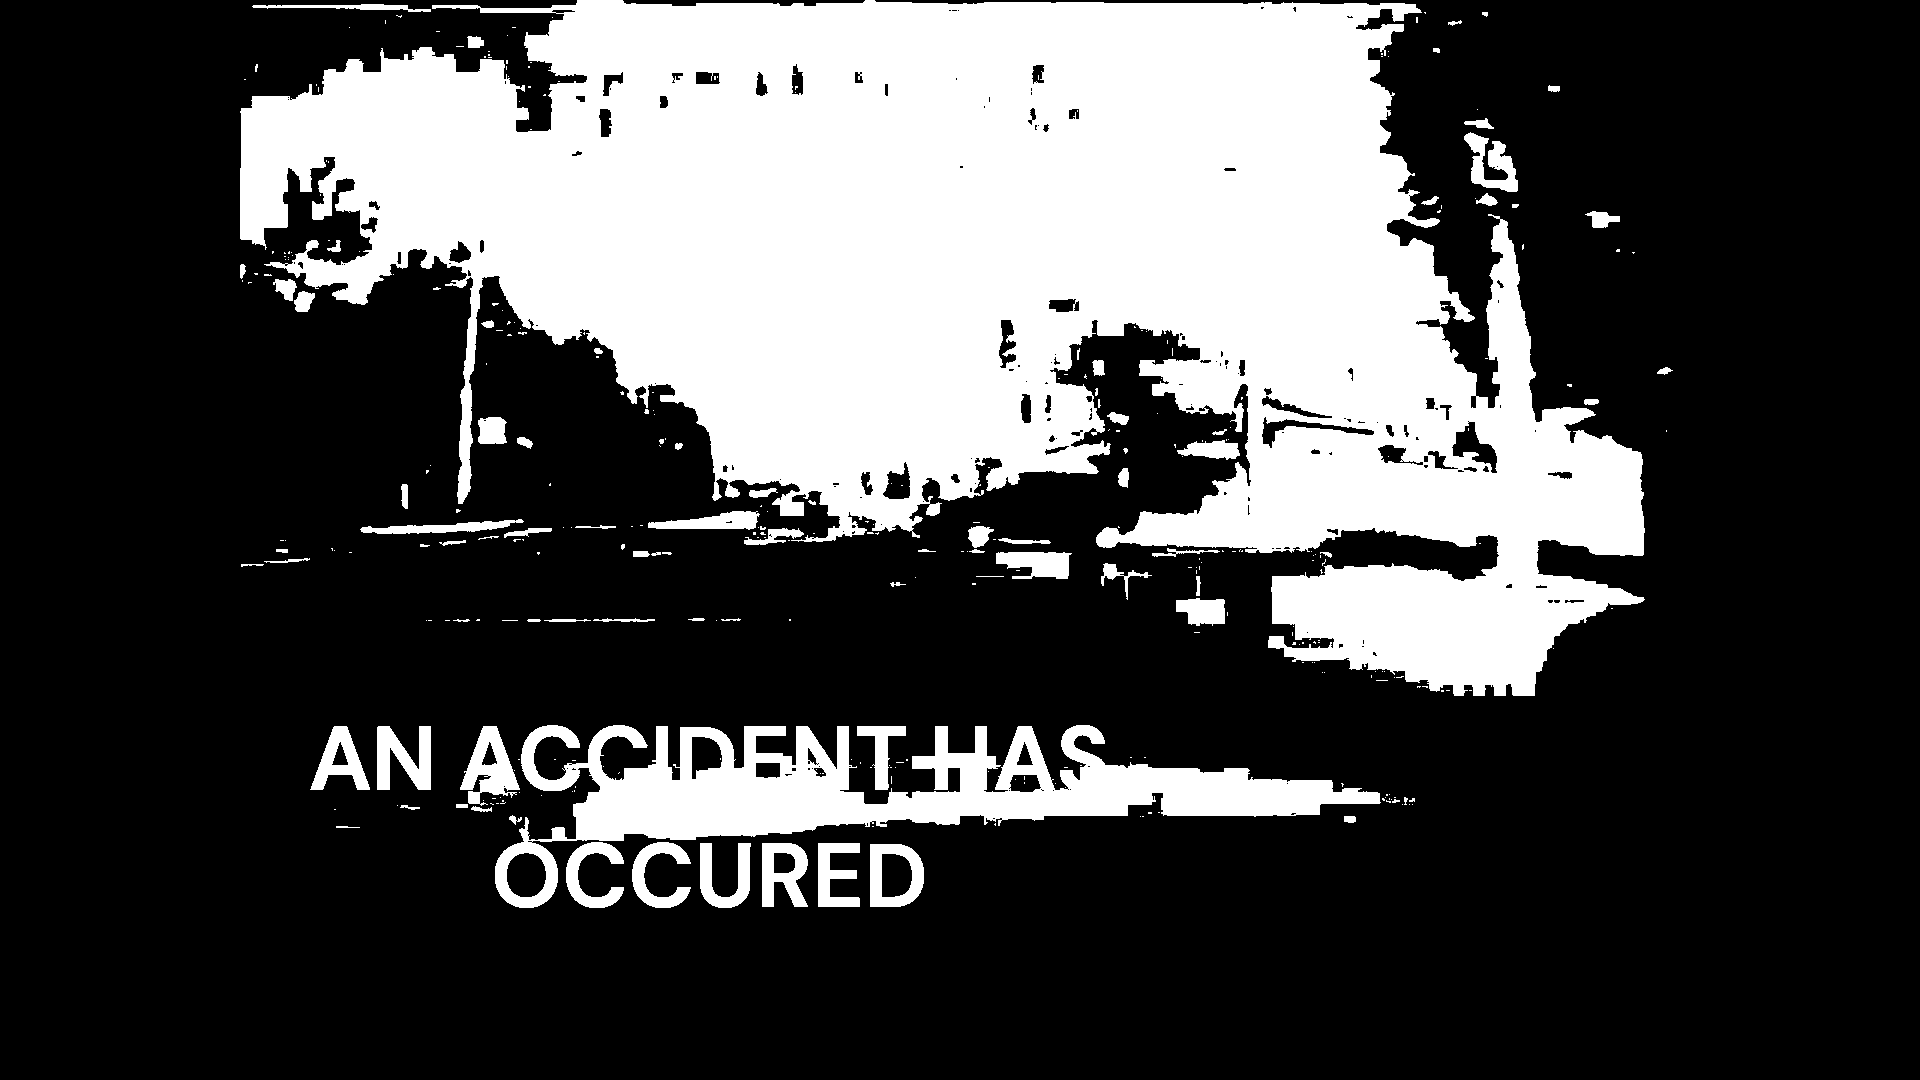

Processed Text:  

Prediction: [0]


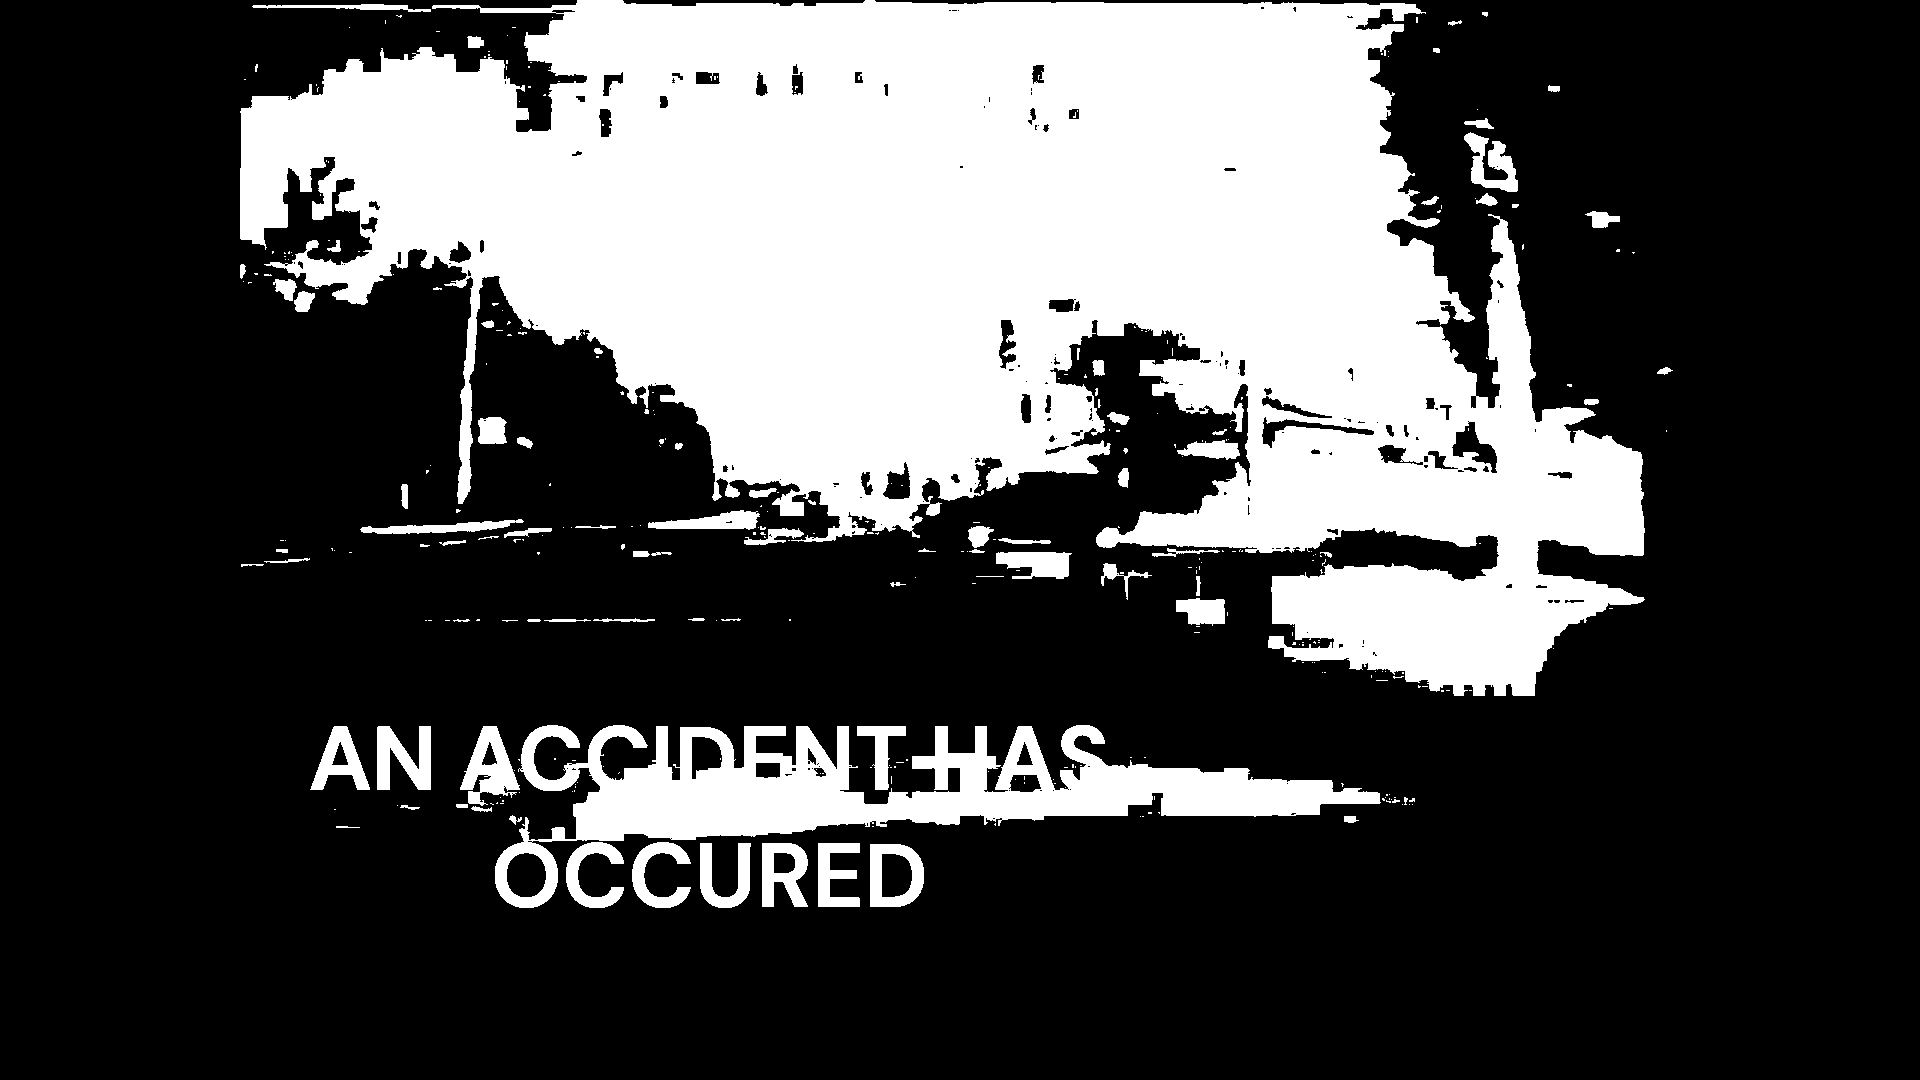

Processed Text:  

  

Ae” a
OCCURED

Prediction: [0]


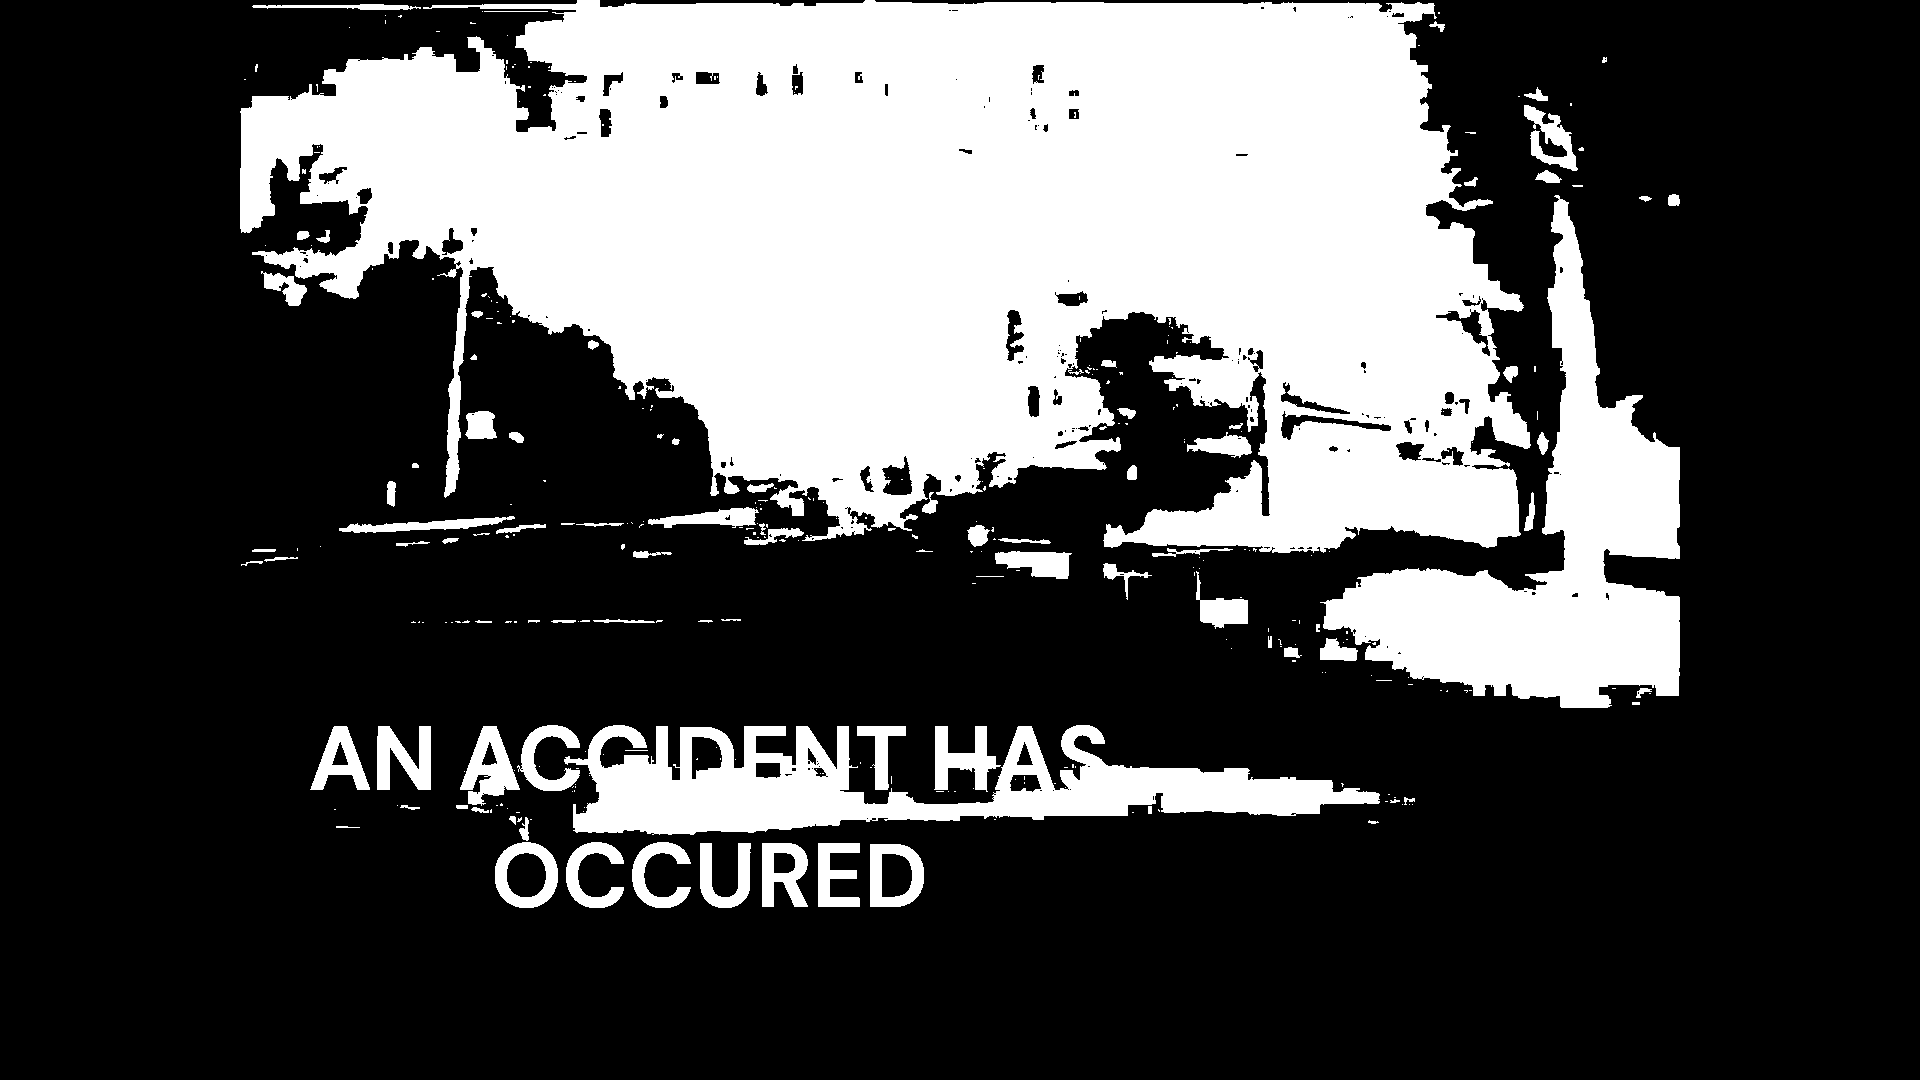

Processed Text:    

PN Nese ye
OCCURED

Prediction: [0]


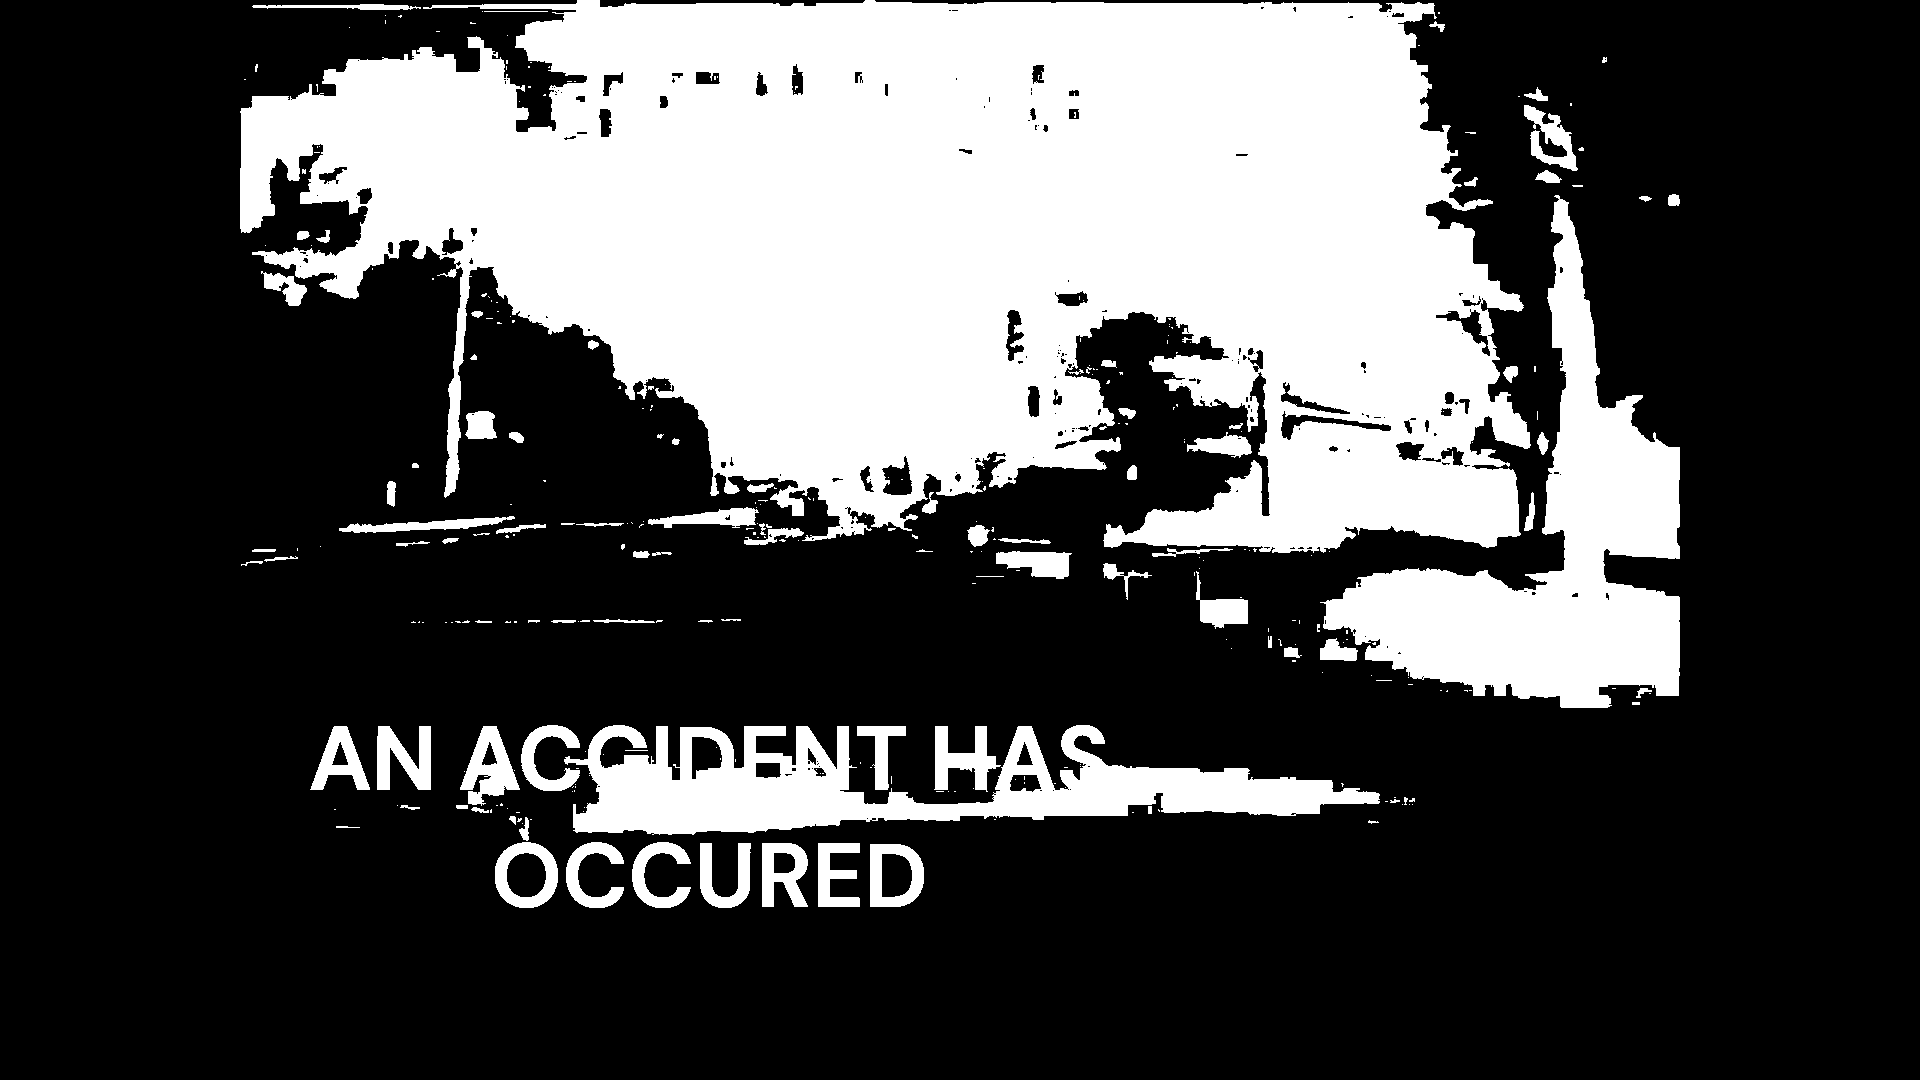

Processed Text:  

  

a Ne LAA See
OCCURED

Prediction: [0]


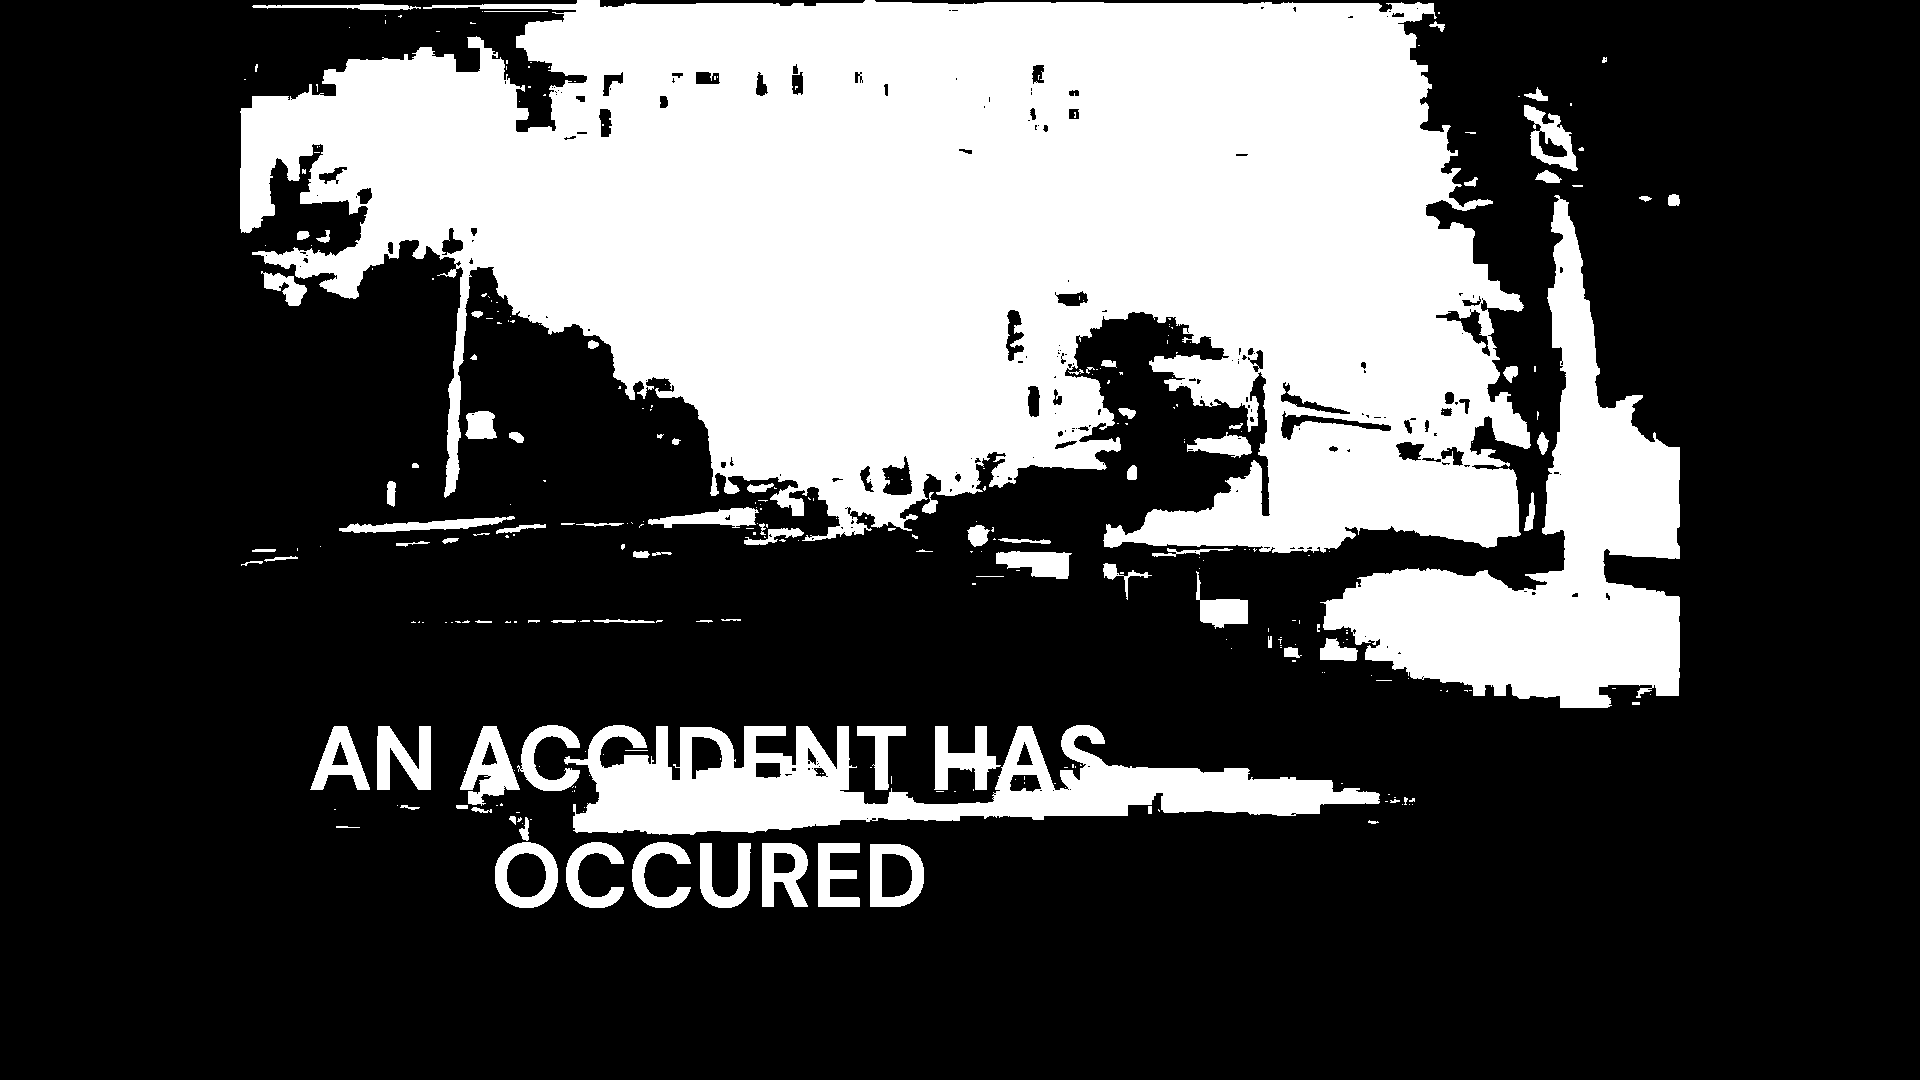

Processed Text: ‘Pose ye ree
fog ty 4 "oR af vt 4

 

PS ean

Prediction: [0]


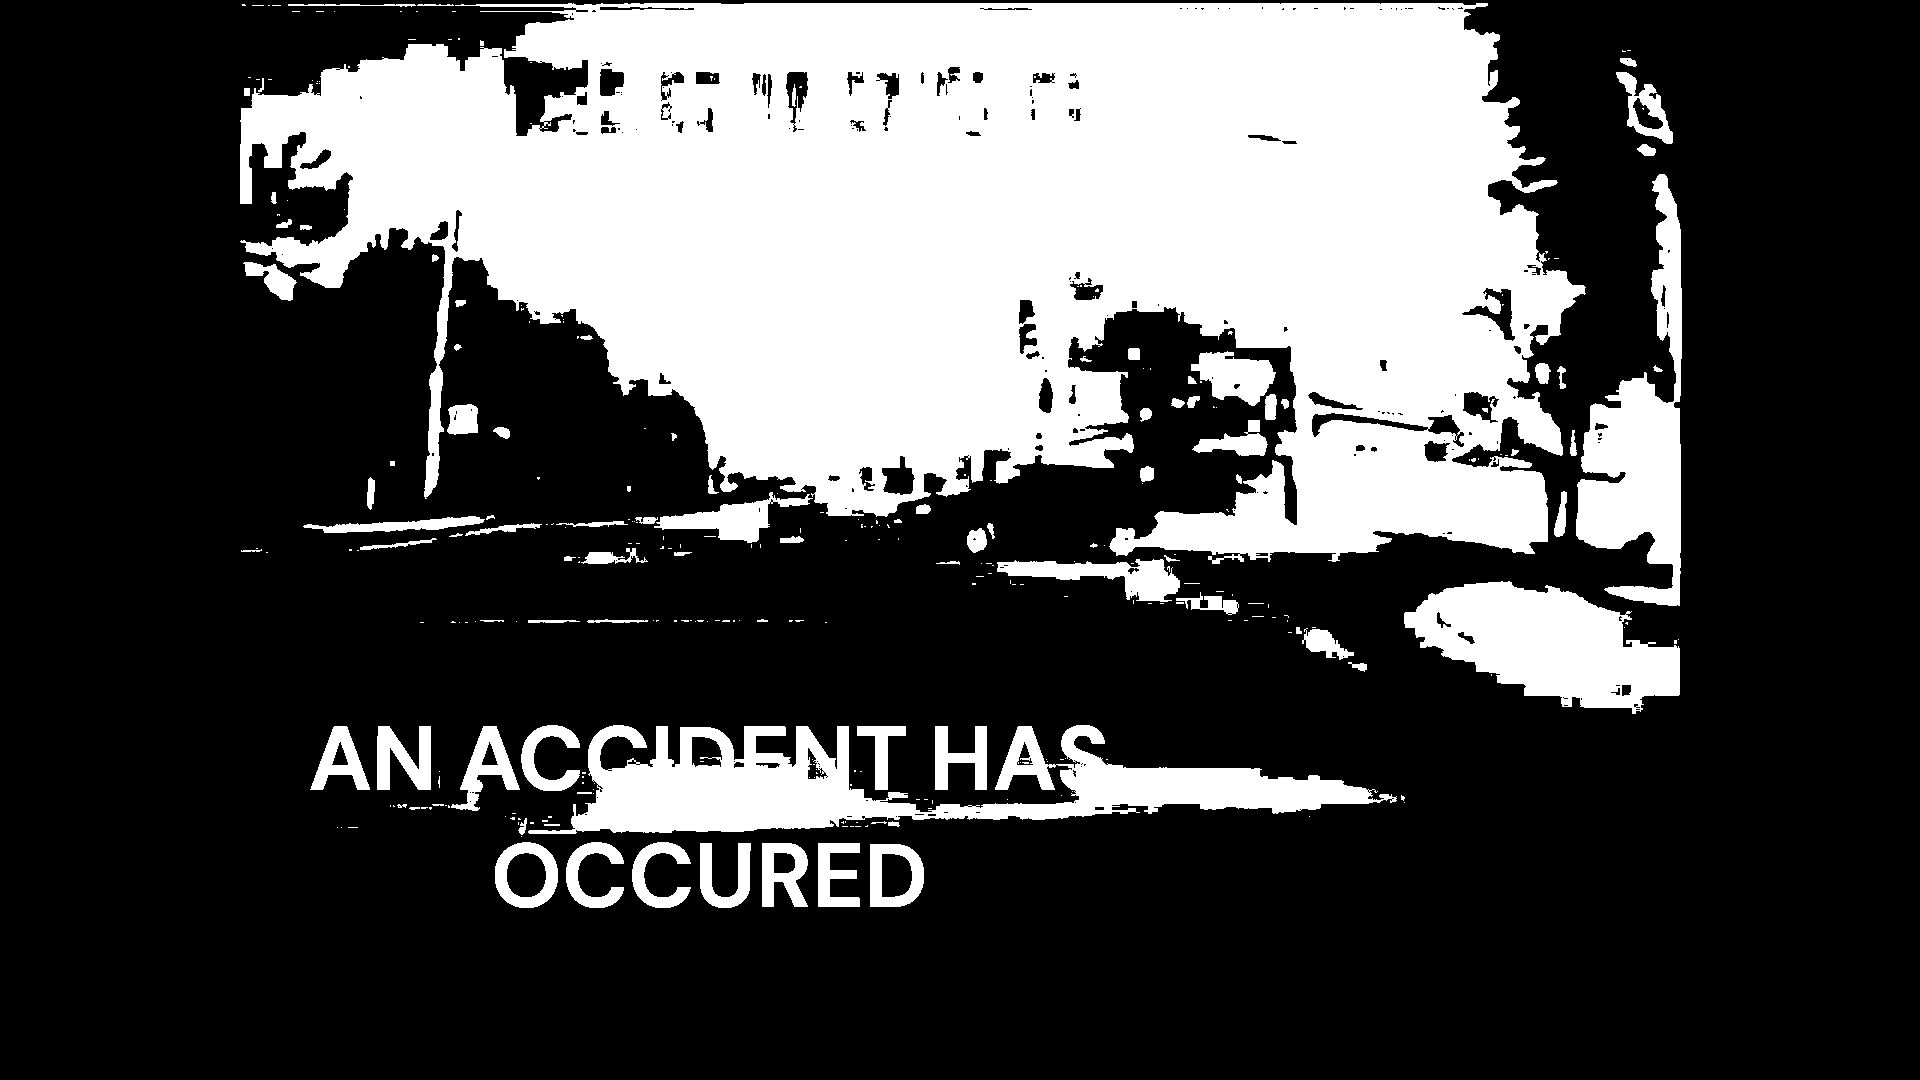

Processed Text:  

Weeouitan

Prediction: [0]


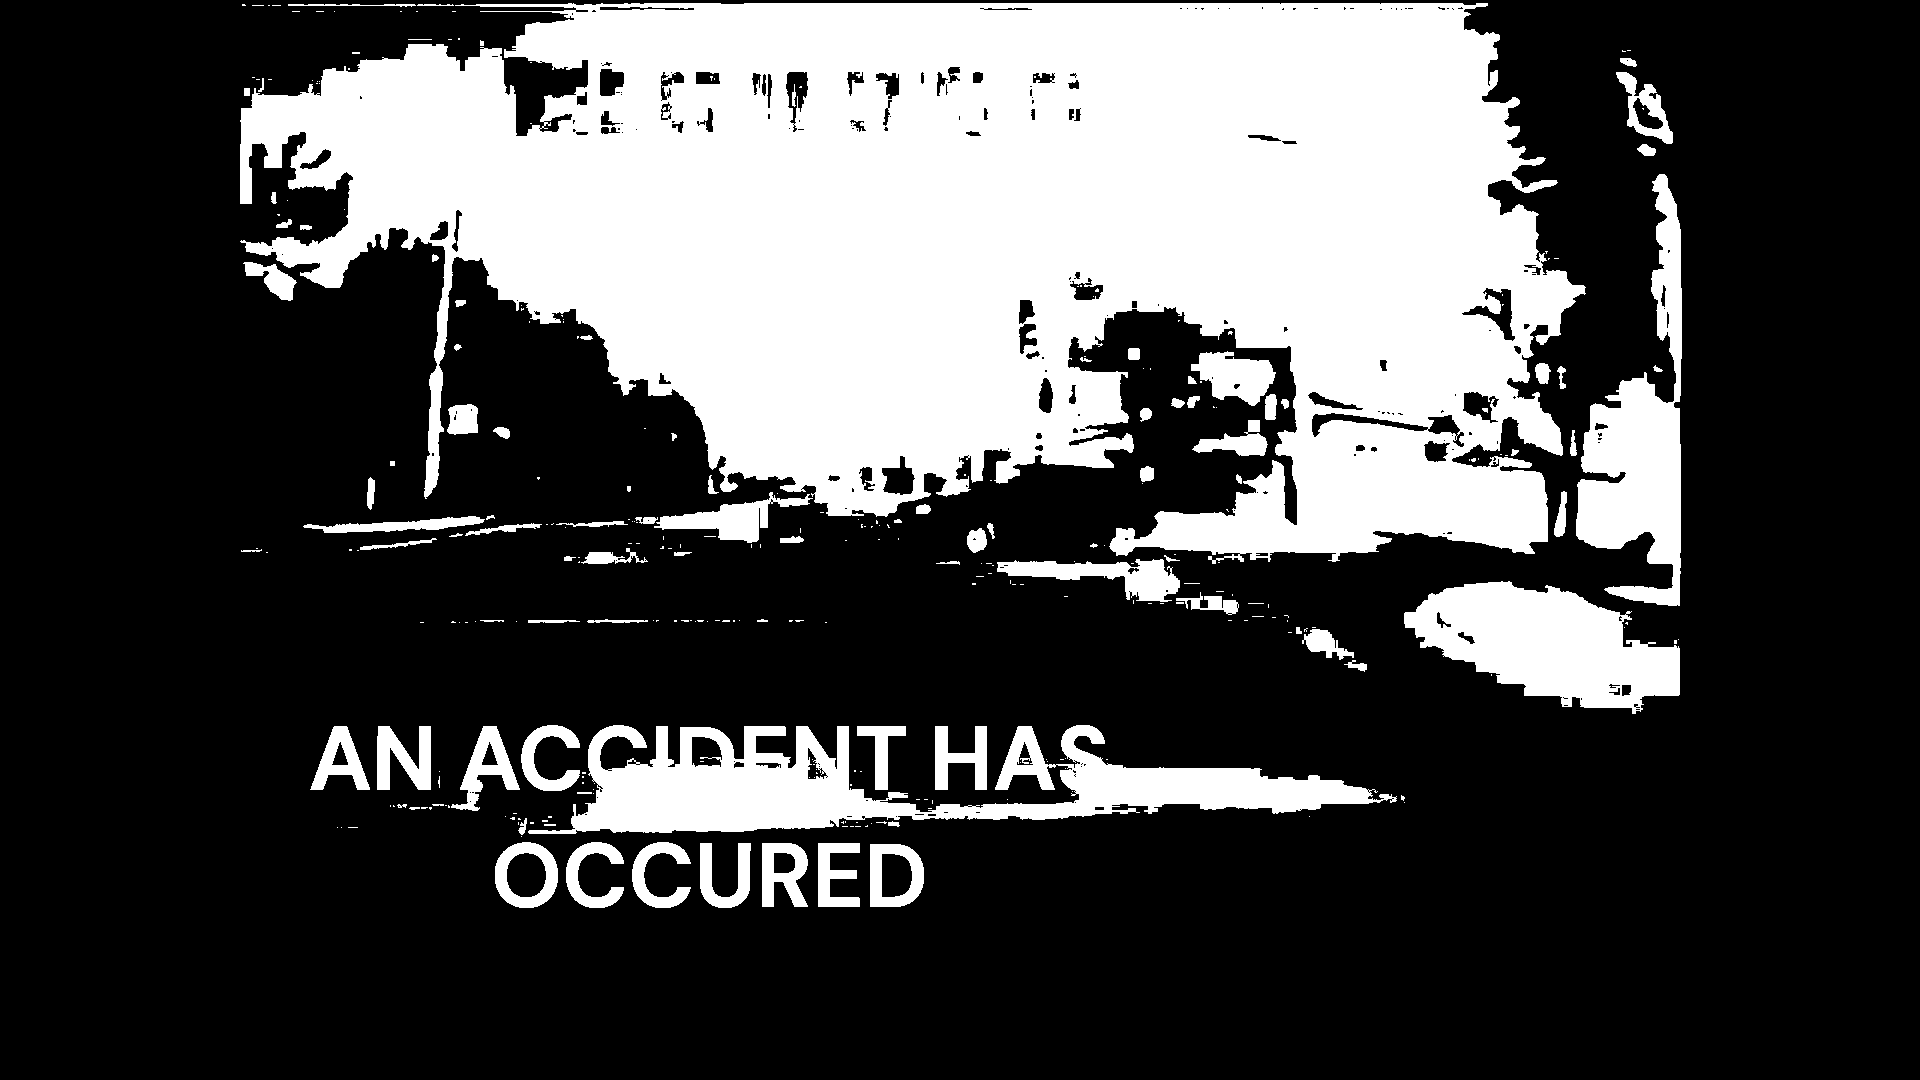

Processed Text: Per yh Pp Fe
oe 'f

 

Weeouitan

Prediction: [0]


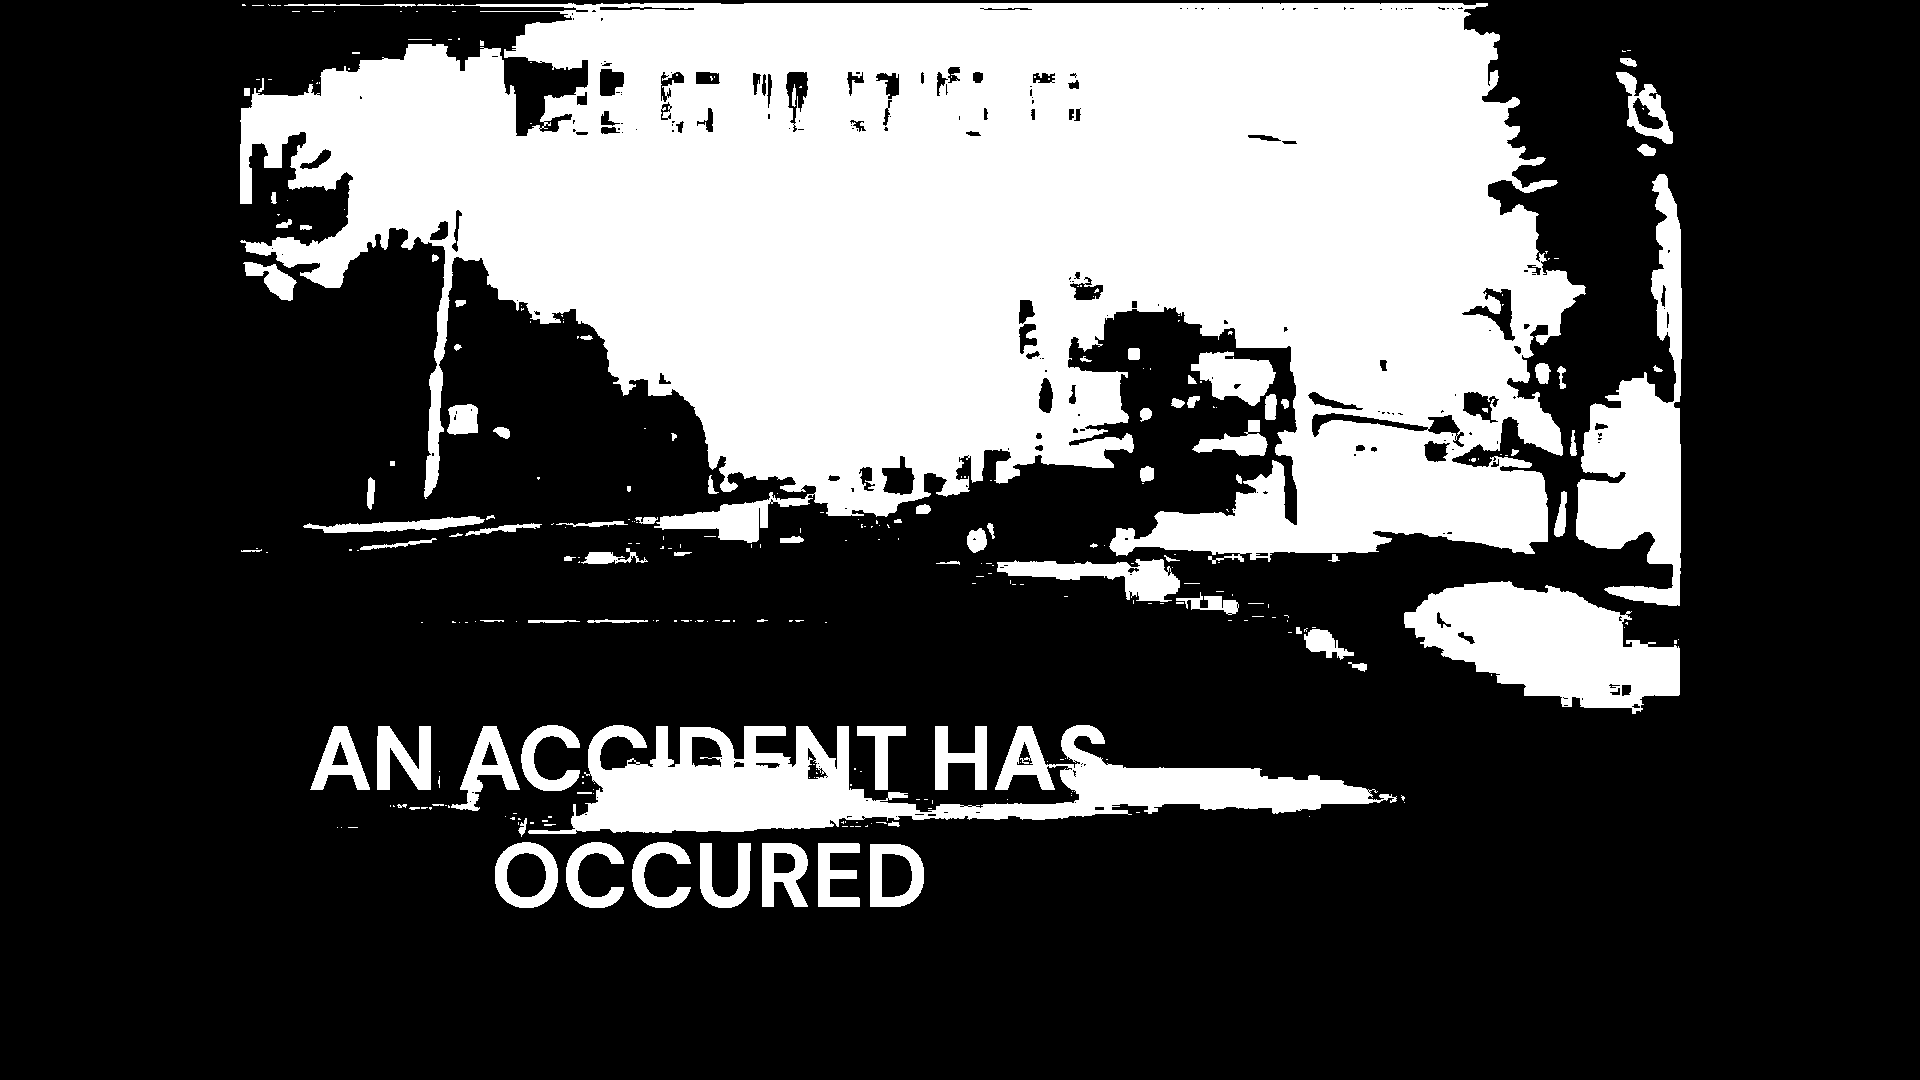

Processed Text:  

rere)

Prediction: [0]


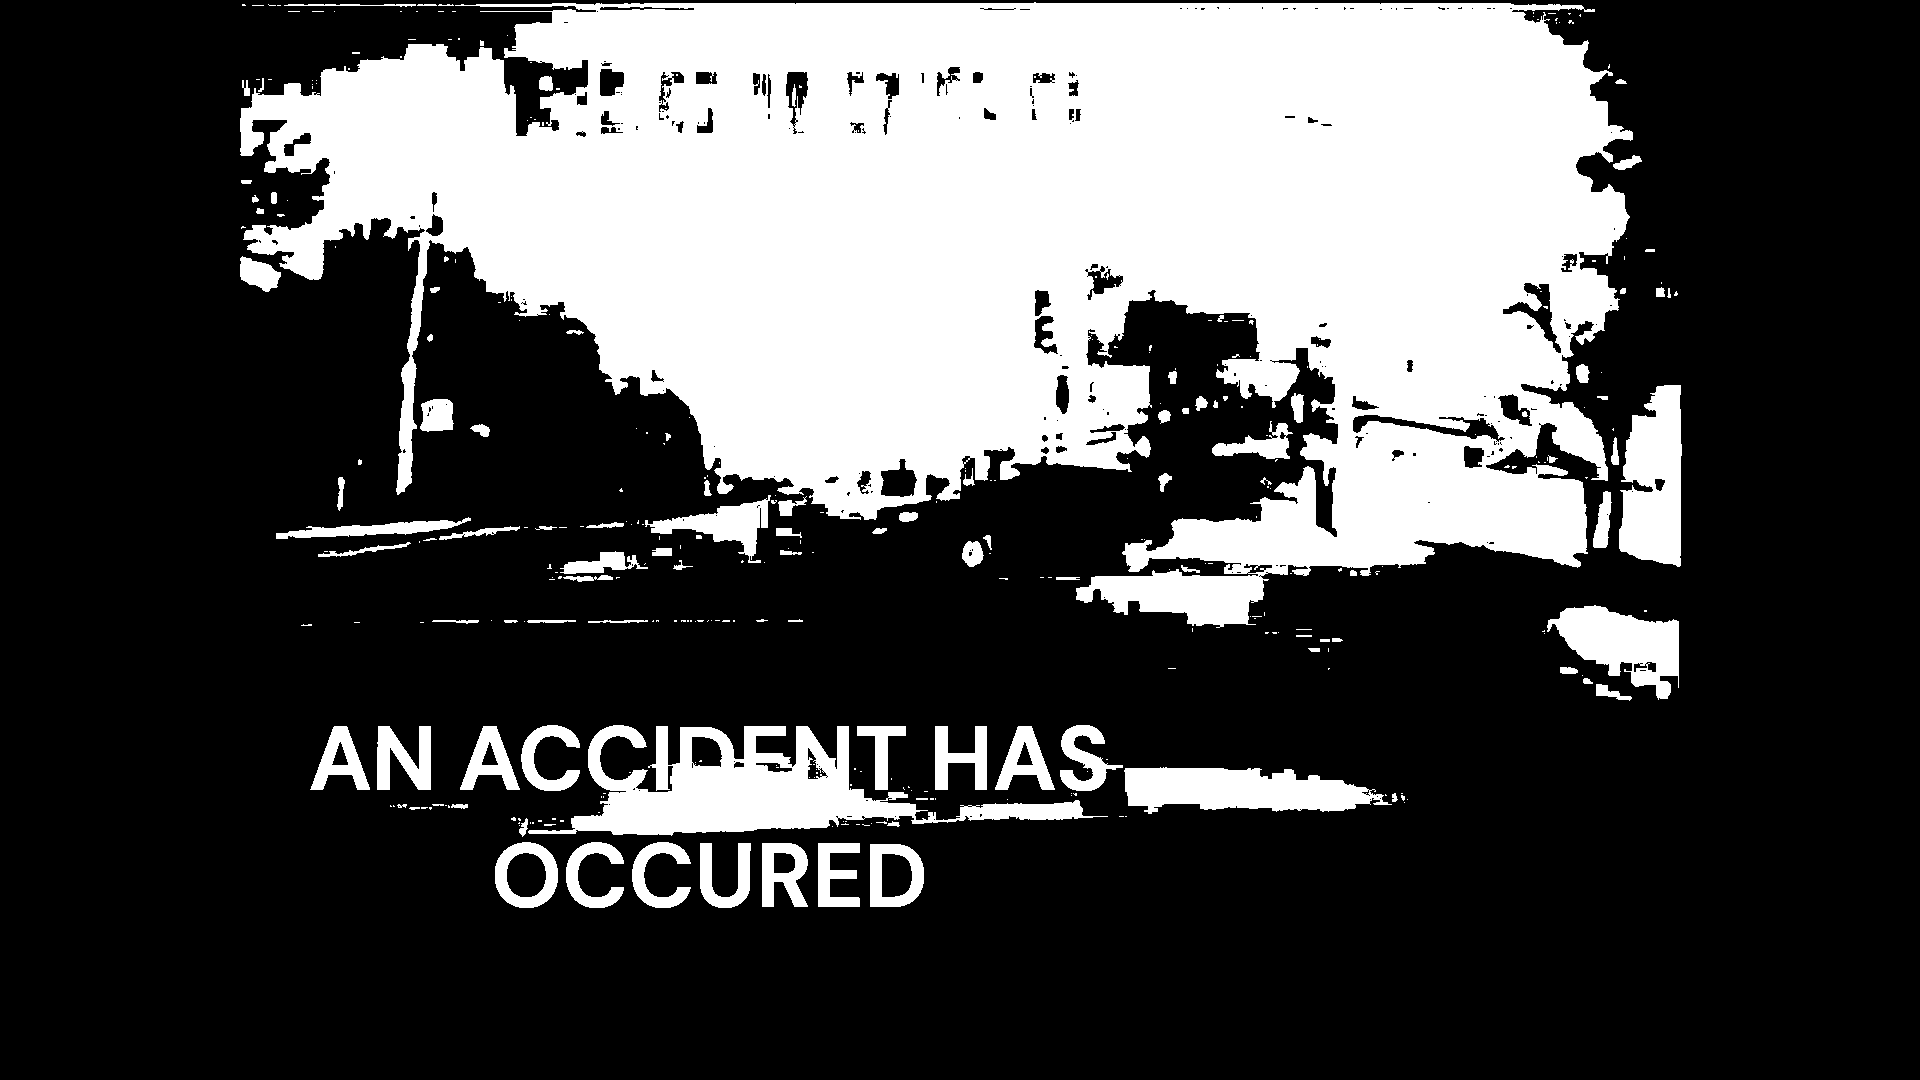

Processed Text: ero ek 1 Pye |
ra if af hob

 

” 6GCURED

Prediction: [0]


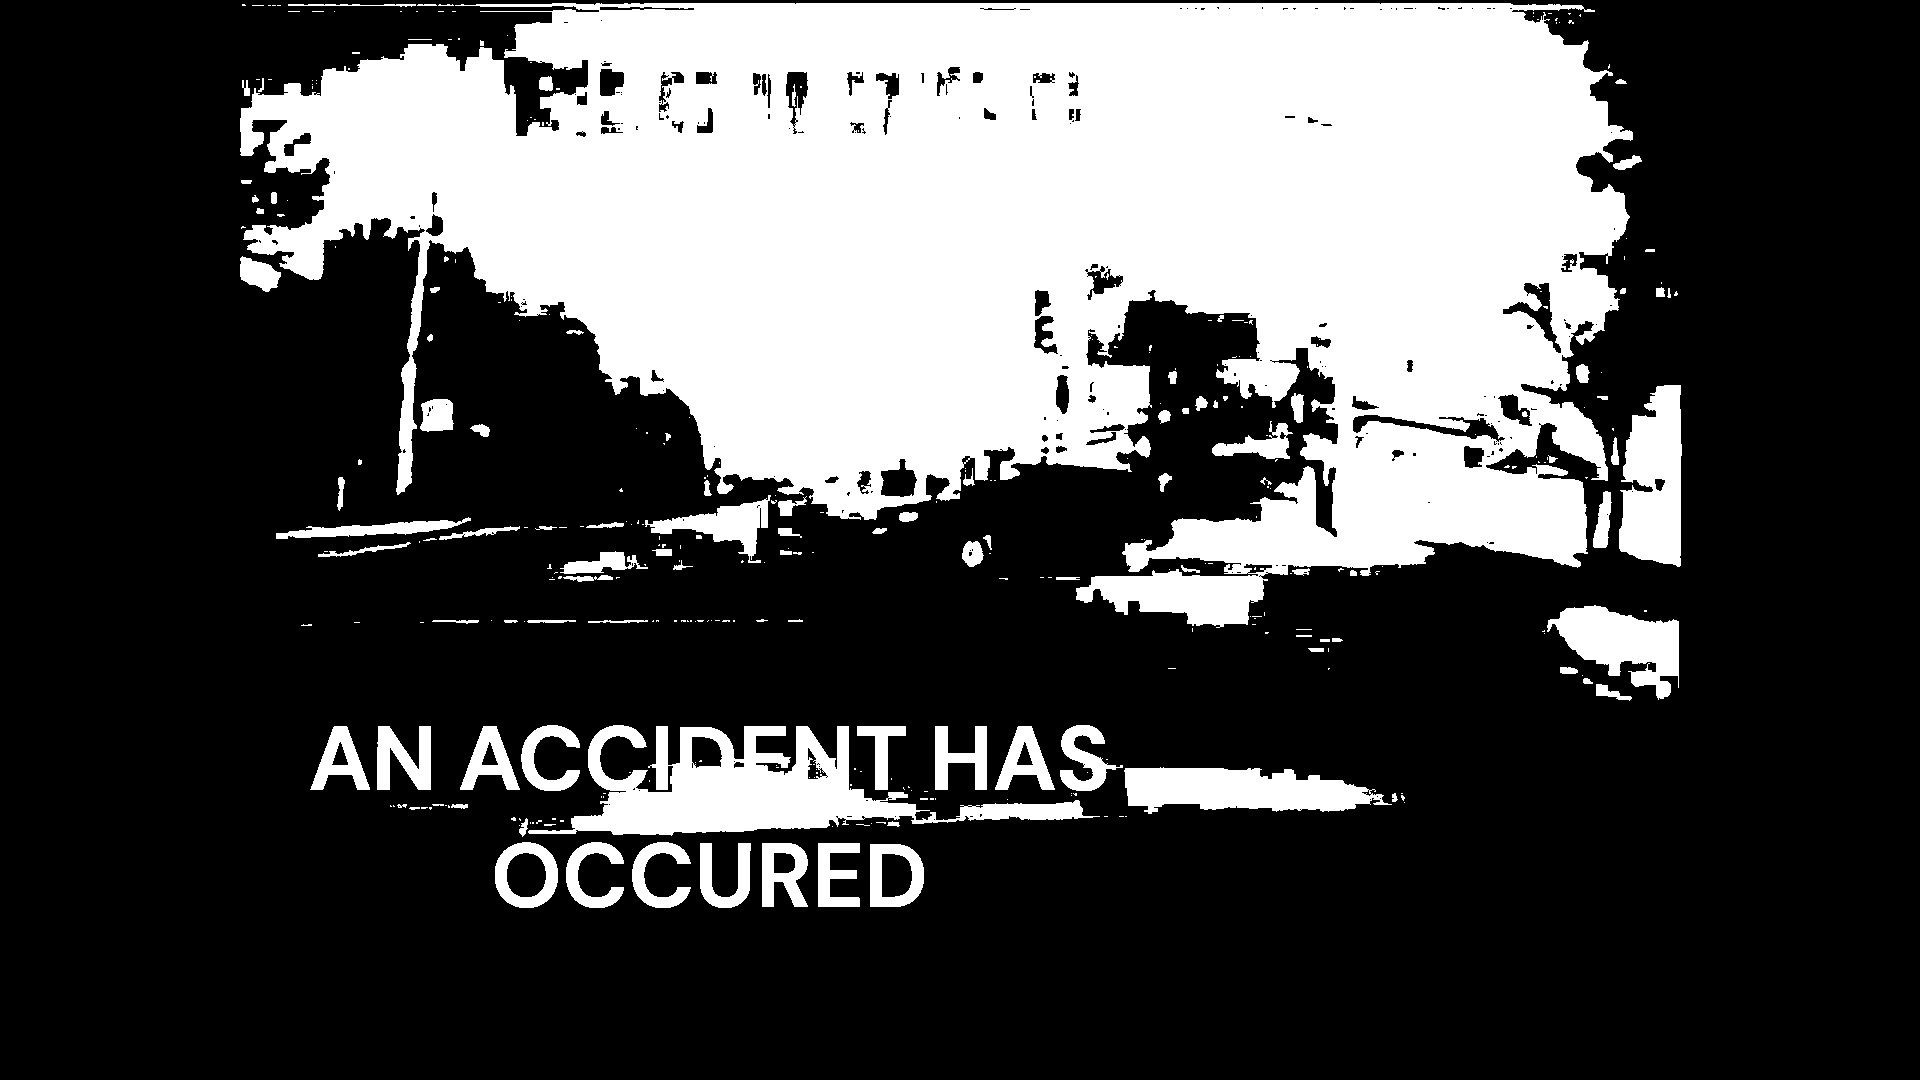

Processed Text:  

” 6GCURED

Prediction: [0]


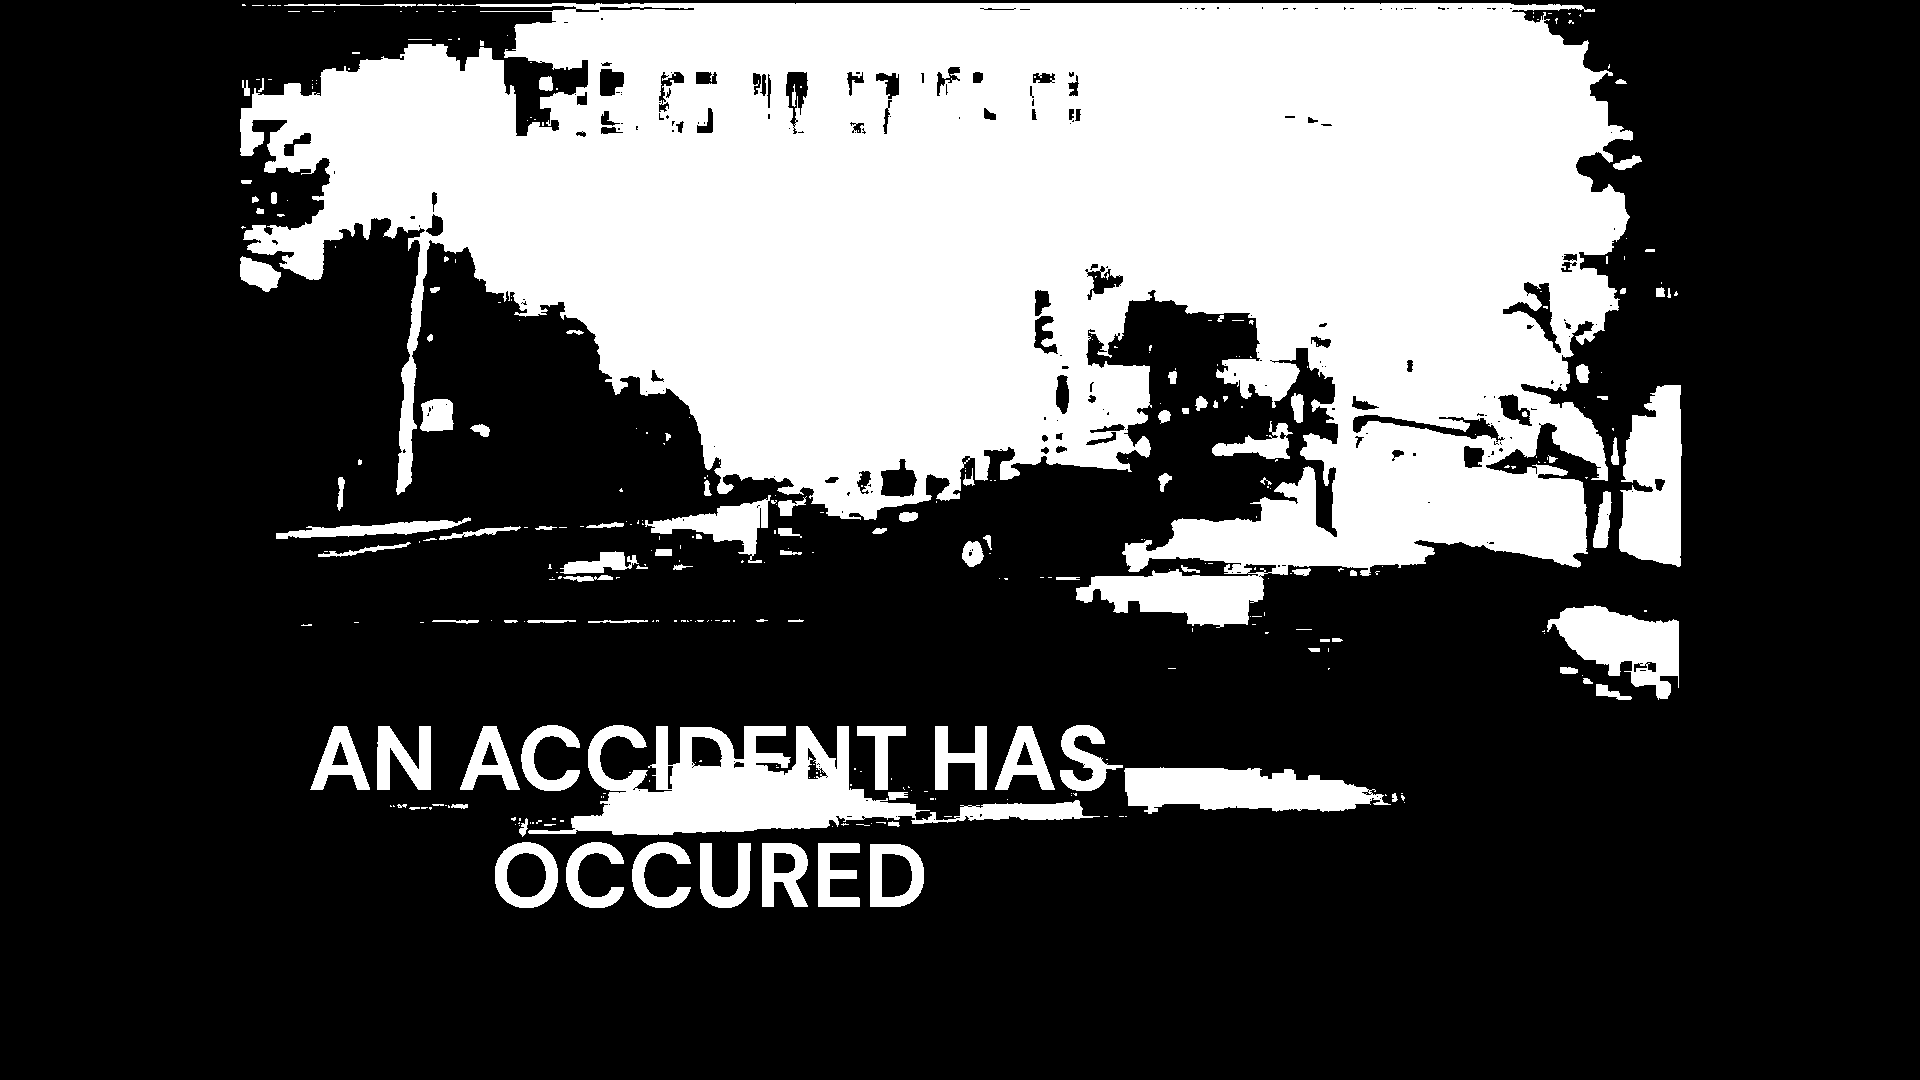

Processed Text:  

EN Xefe!)N e
OCCURED

Prediction: [1]


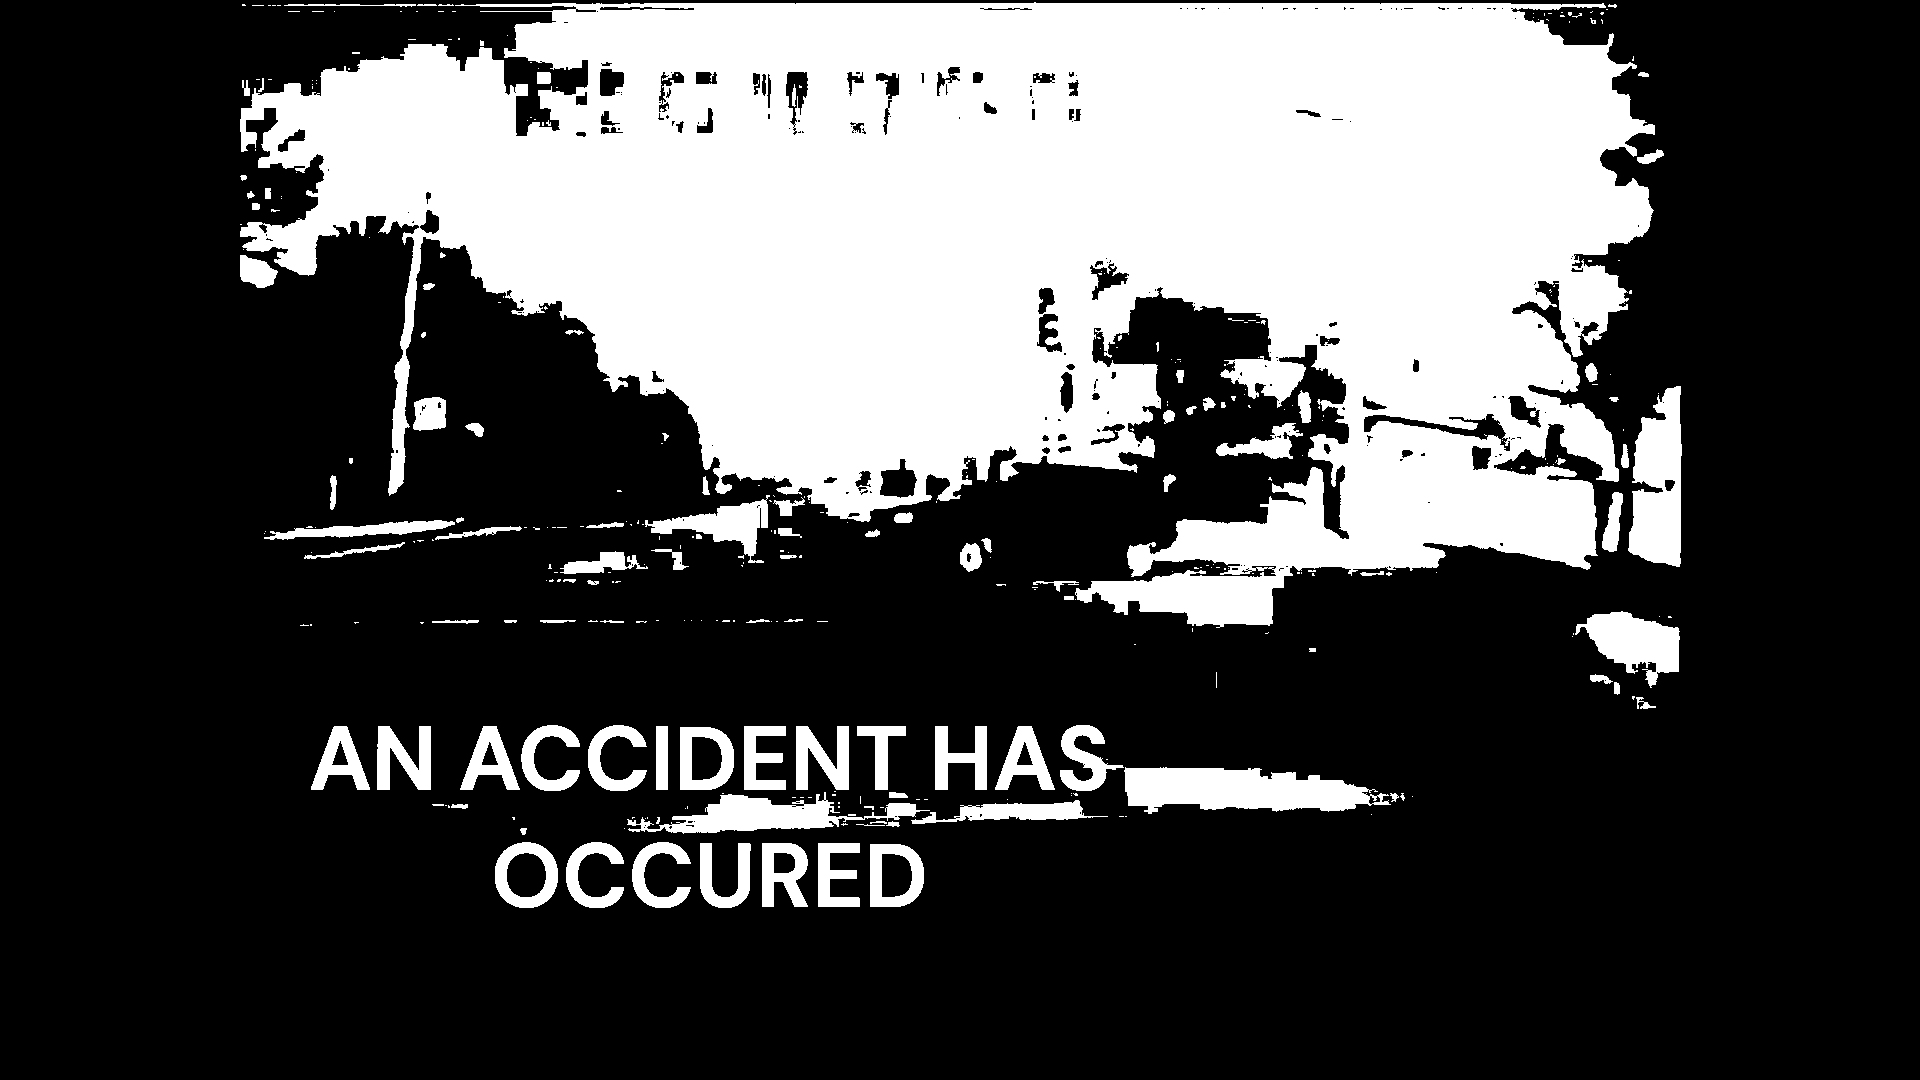

Processed Text:  

AN ACCIDENT HAS wapenee-.
OCCURED

Prediction: [1]


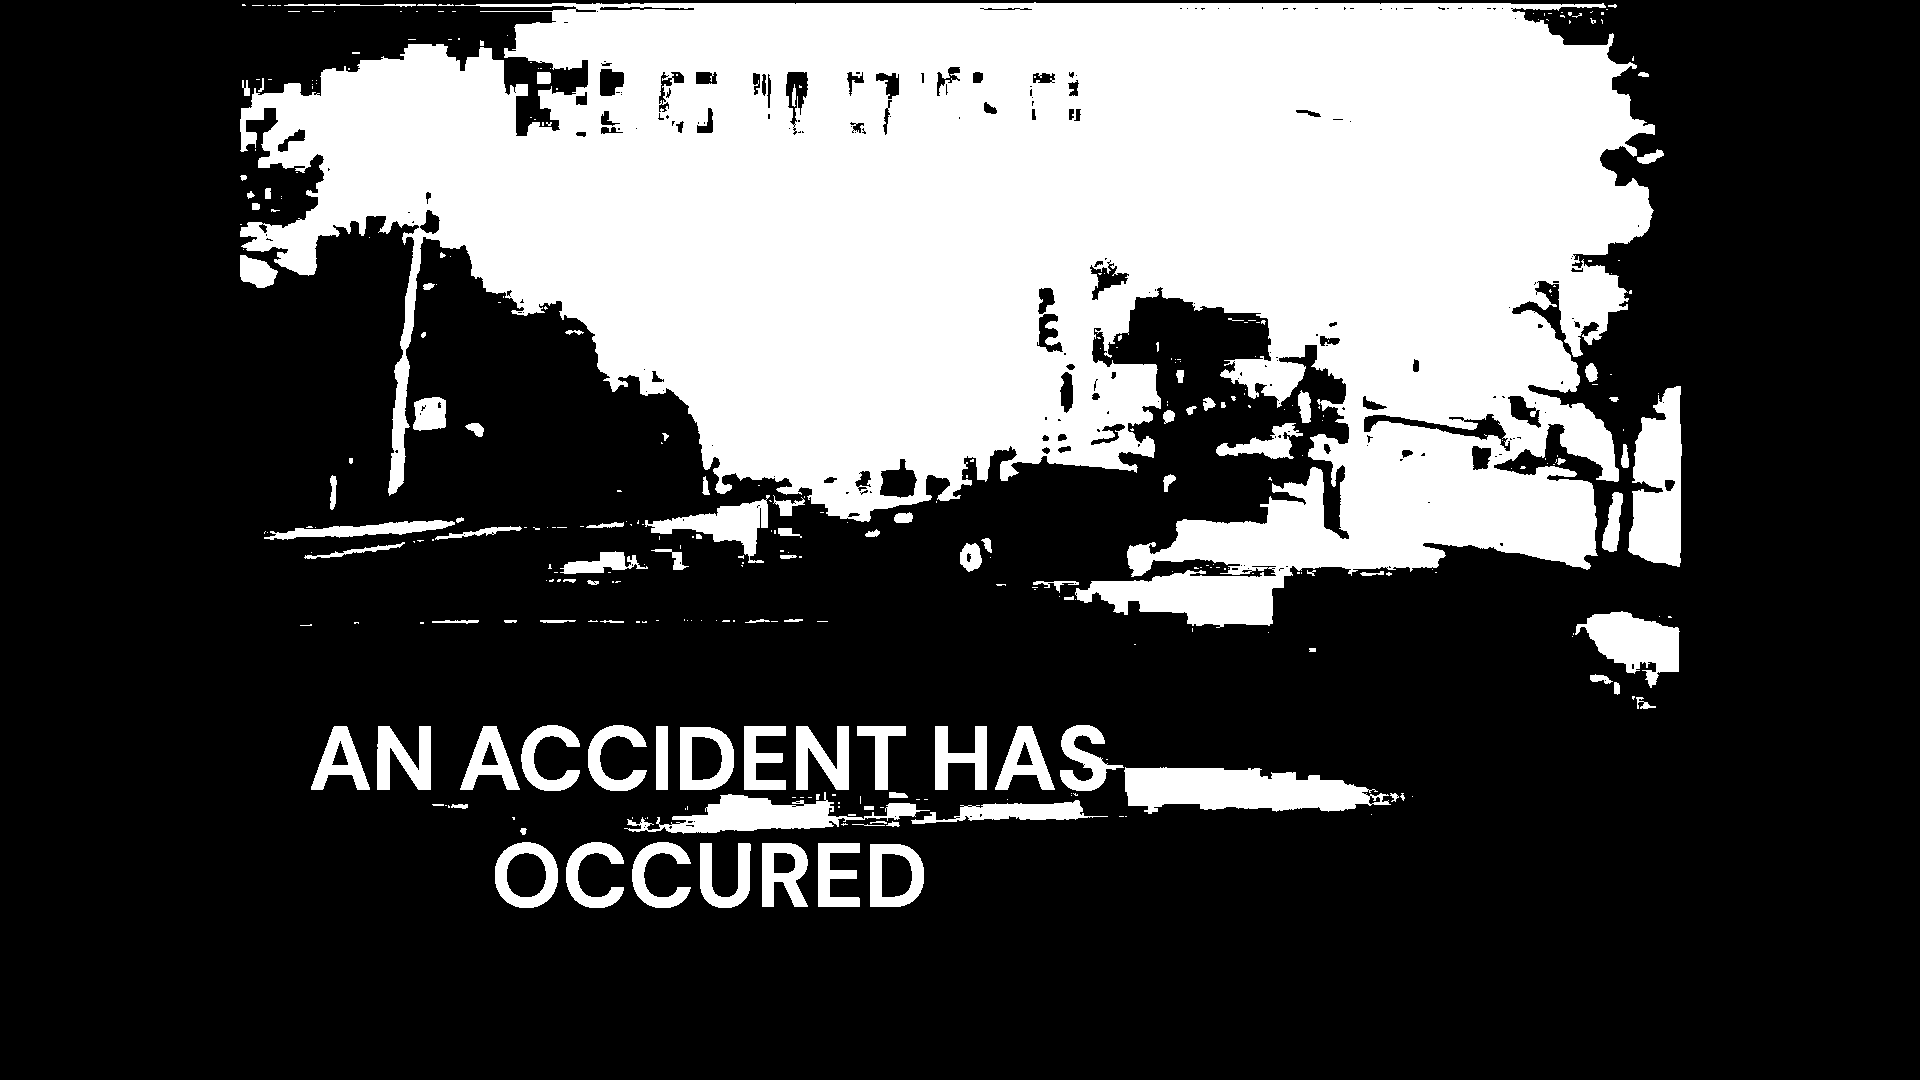

Processed Text:  

ENN Xero?) ae
OCCURED

Prediction: [0]


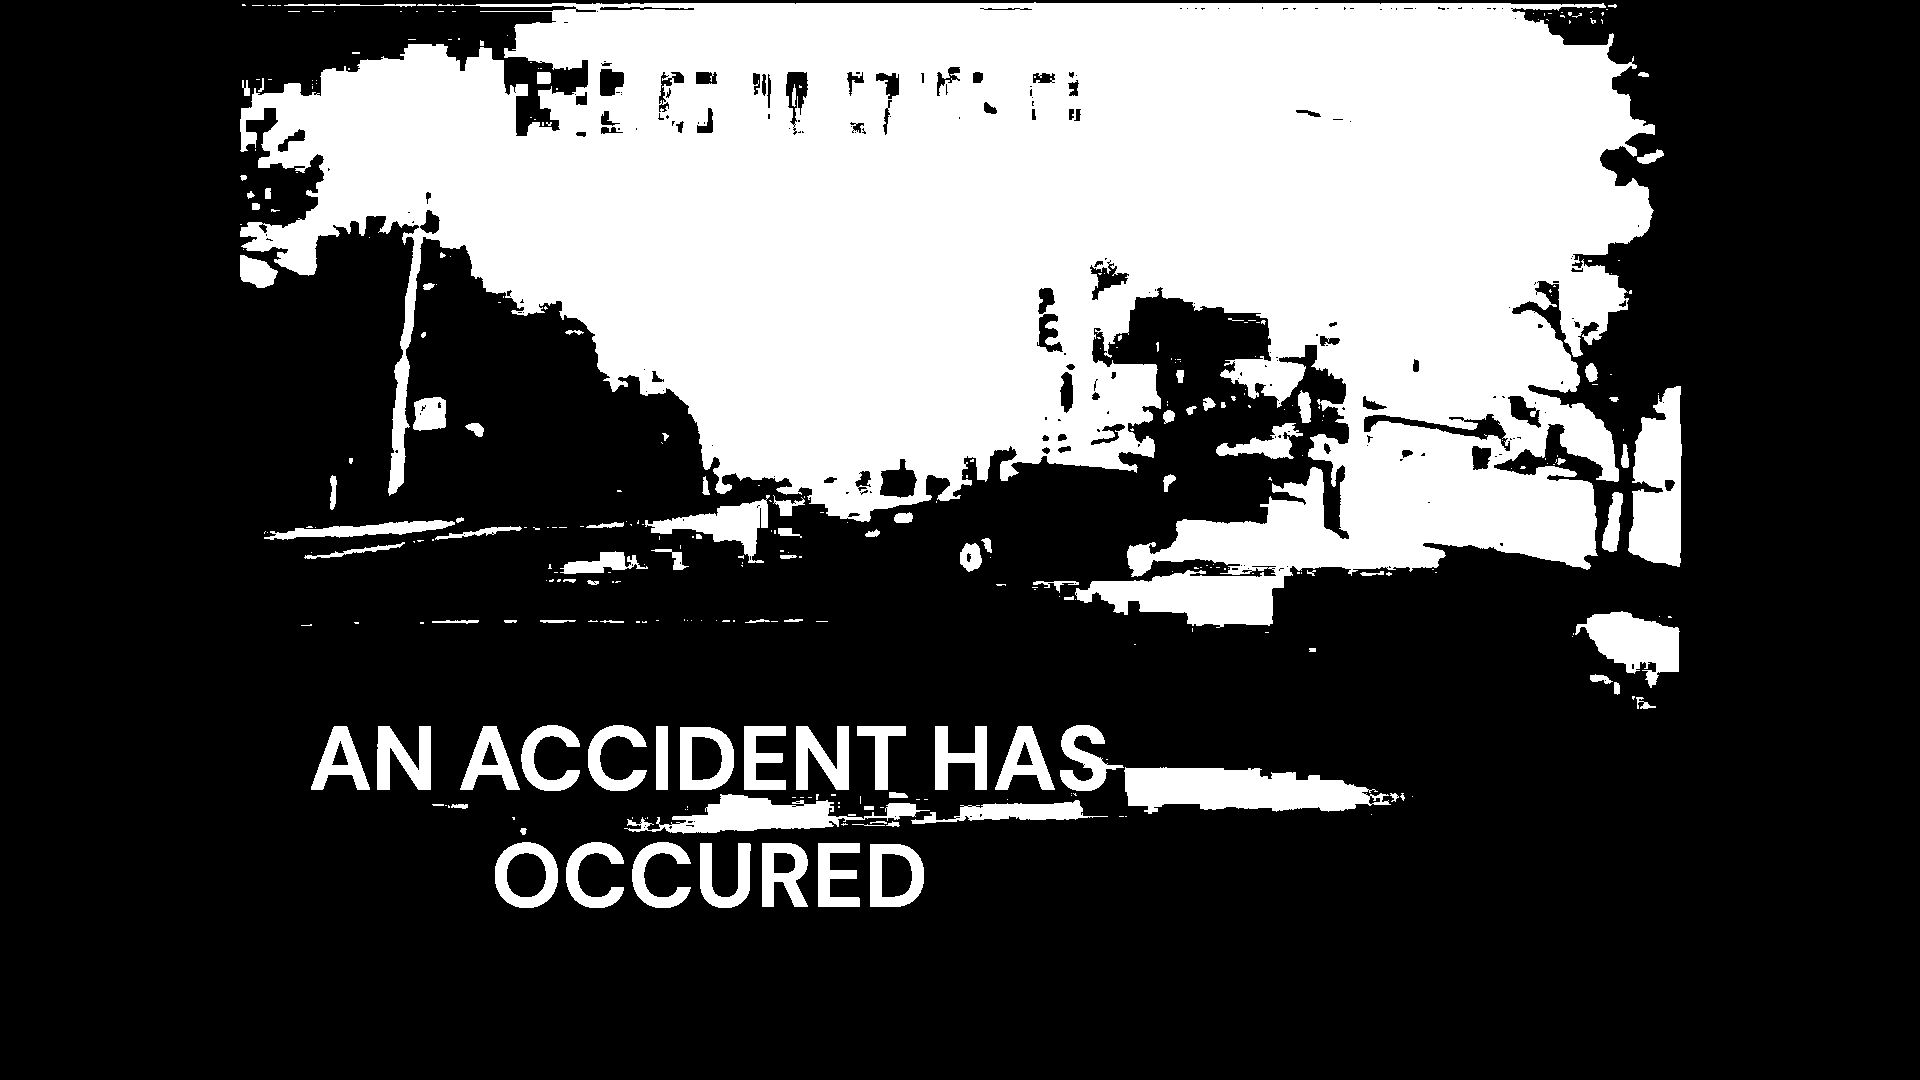

Processed Text:  

EN Xer—ee
OCCURED

Prediction: [1]


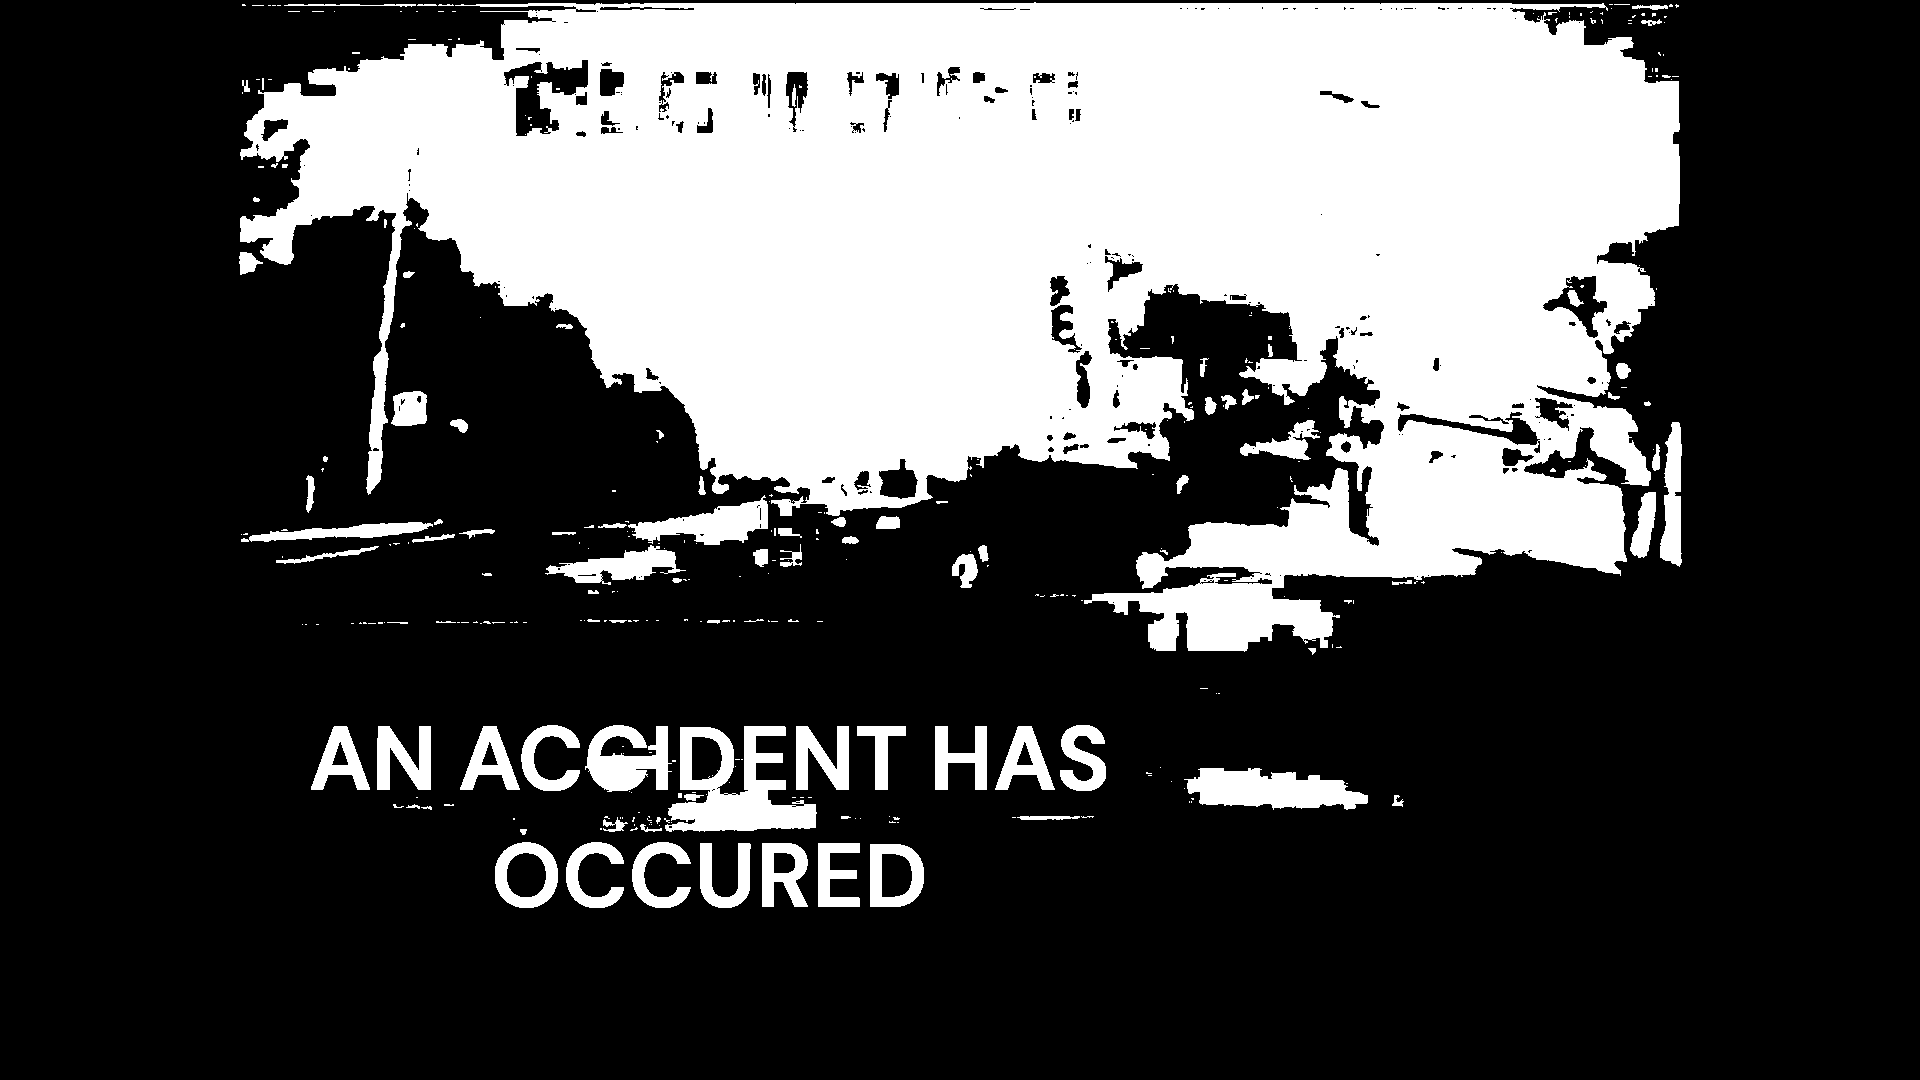

Processed Text:  

EN er)
OCCURED

Prediction: [1]


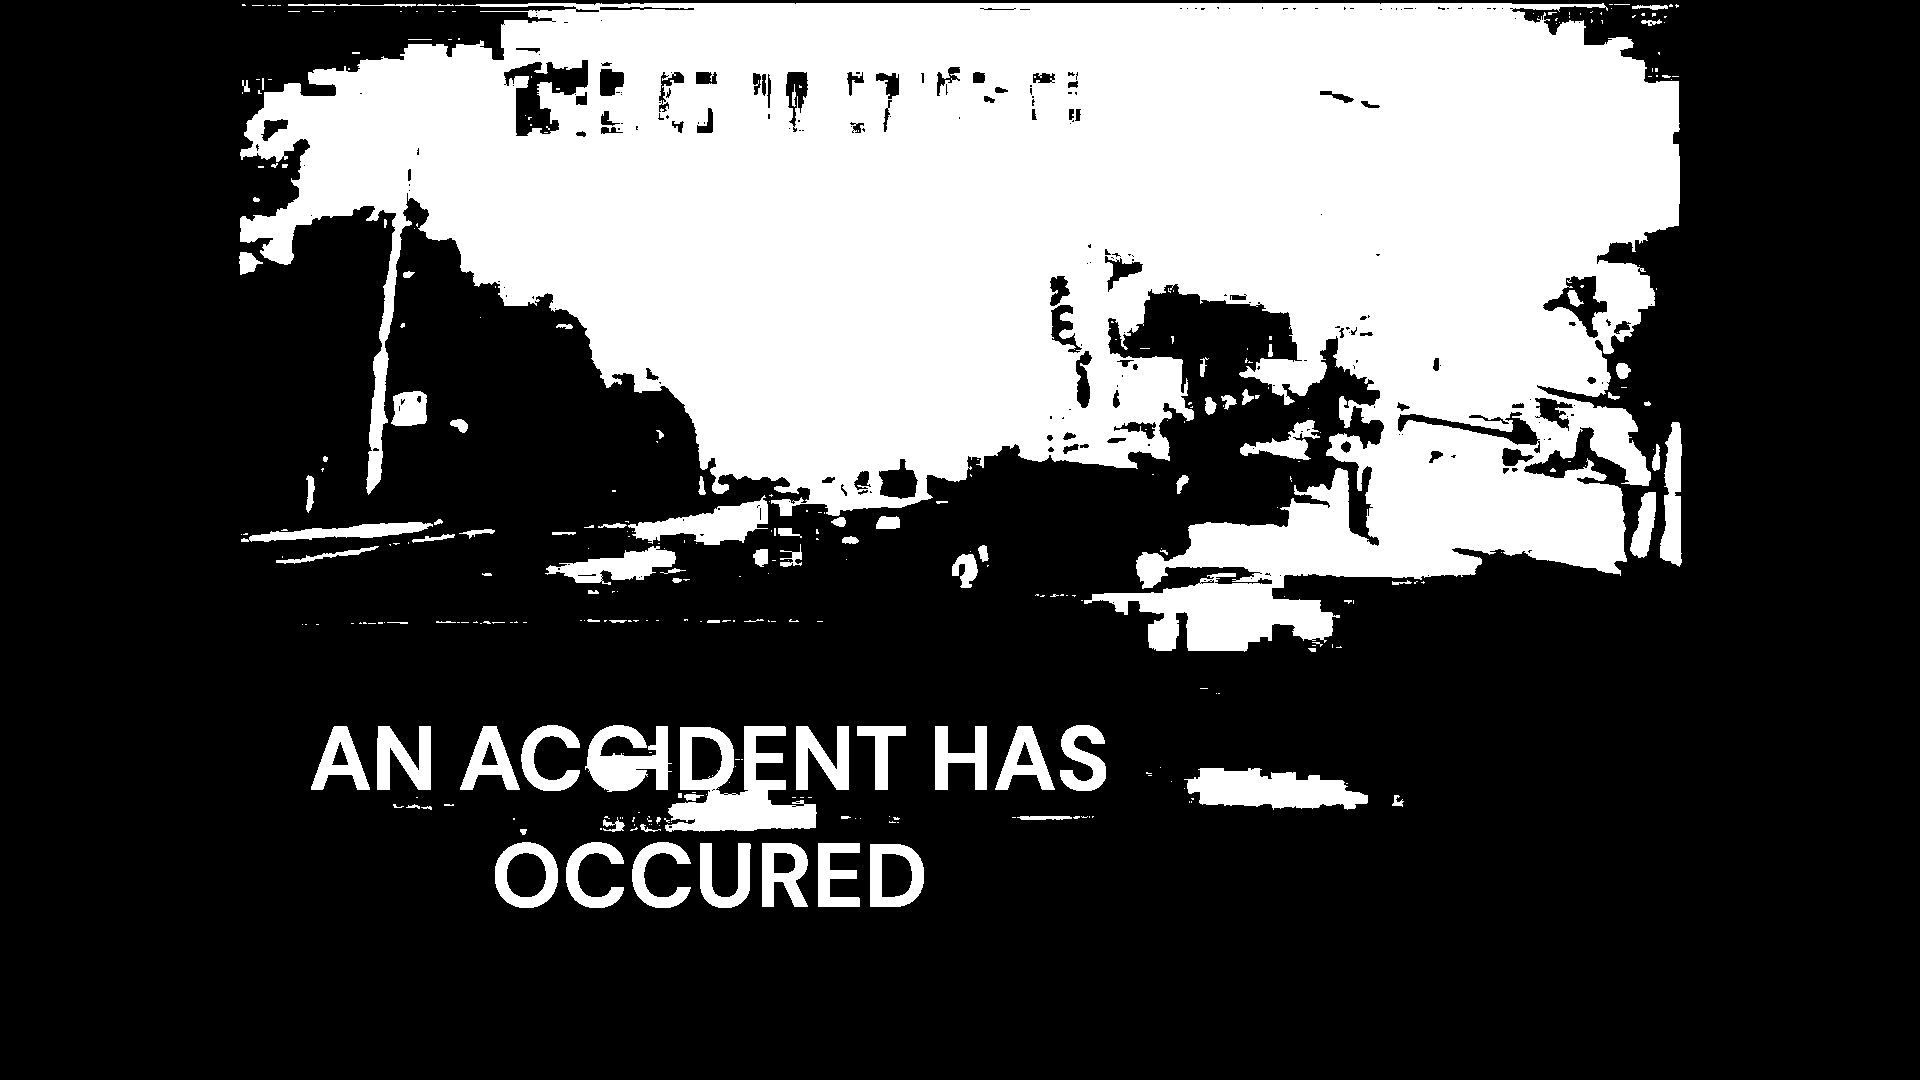

Processed Text:  

EN er) ee
OCCURED

Prediction: [1]


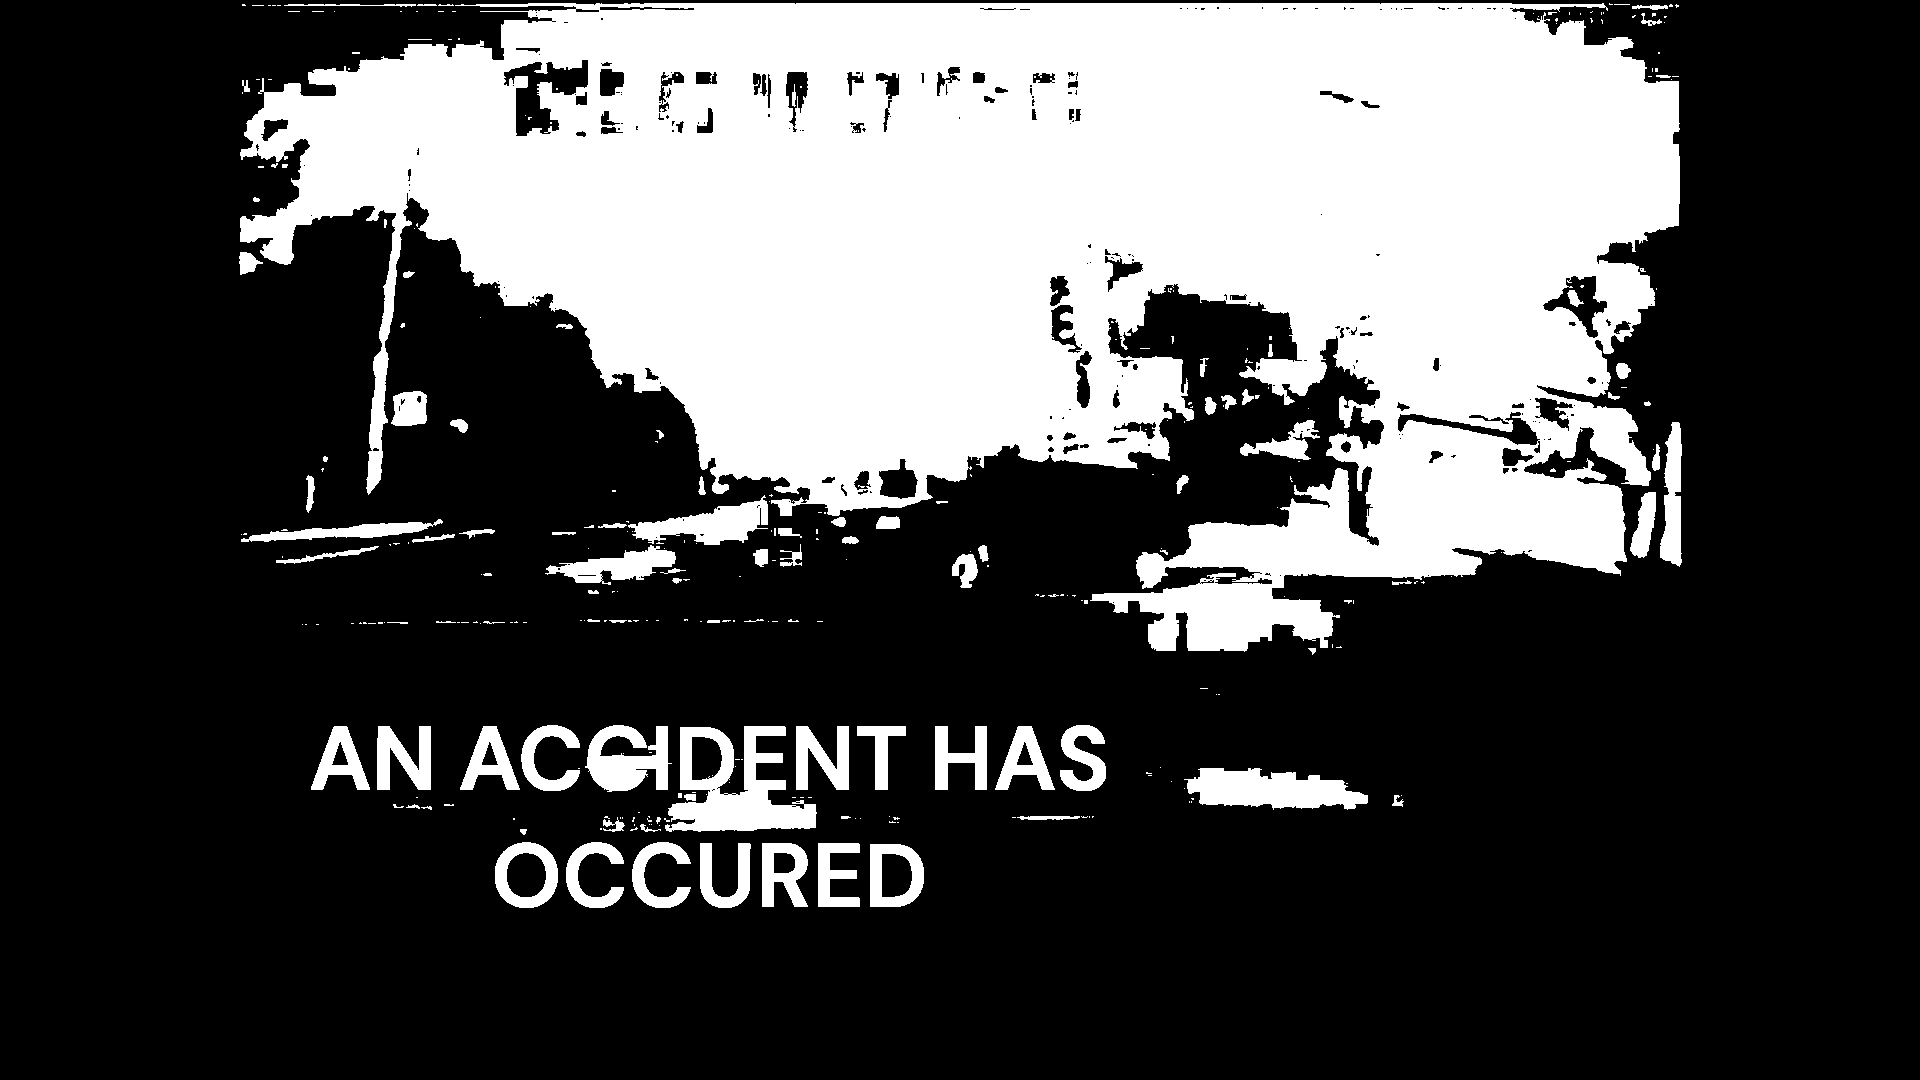

Processed Text:  

ANT \ex>")-N Ln ene

OCCURED

Prediction: [0]


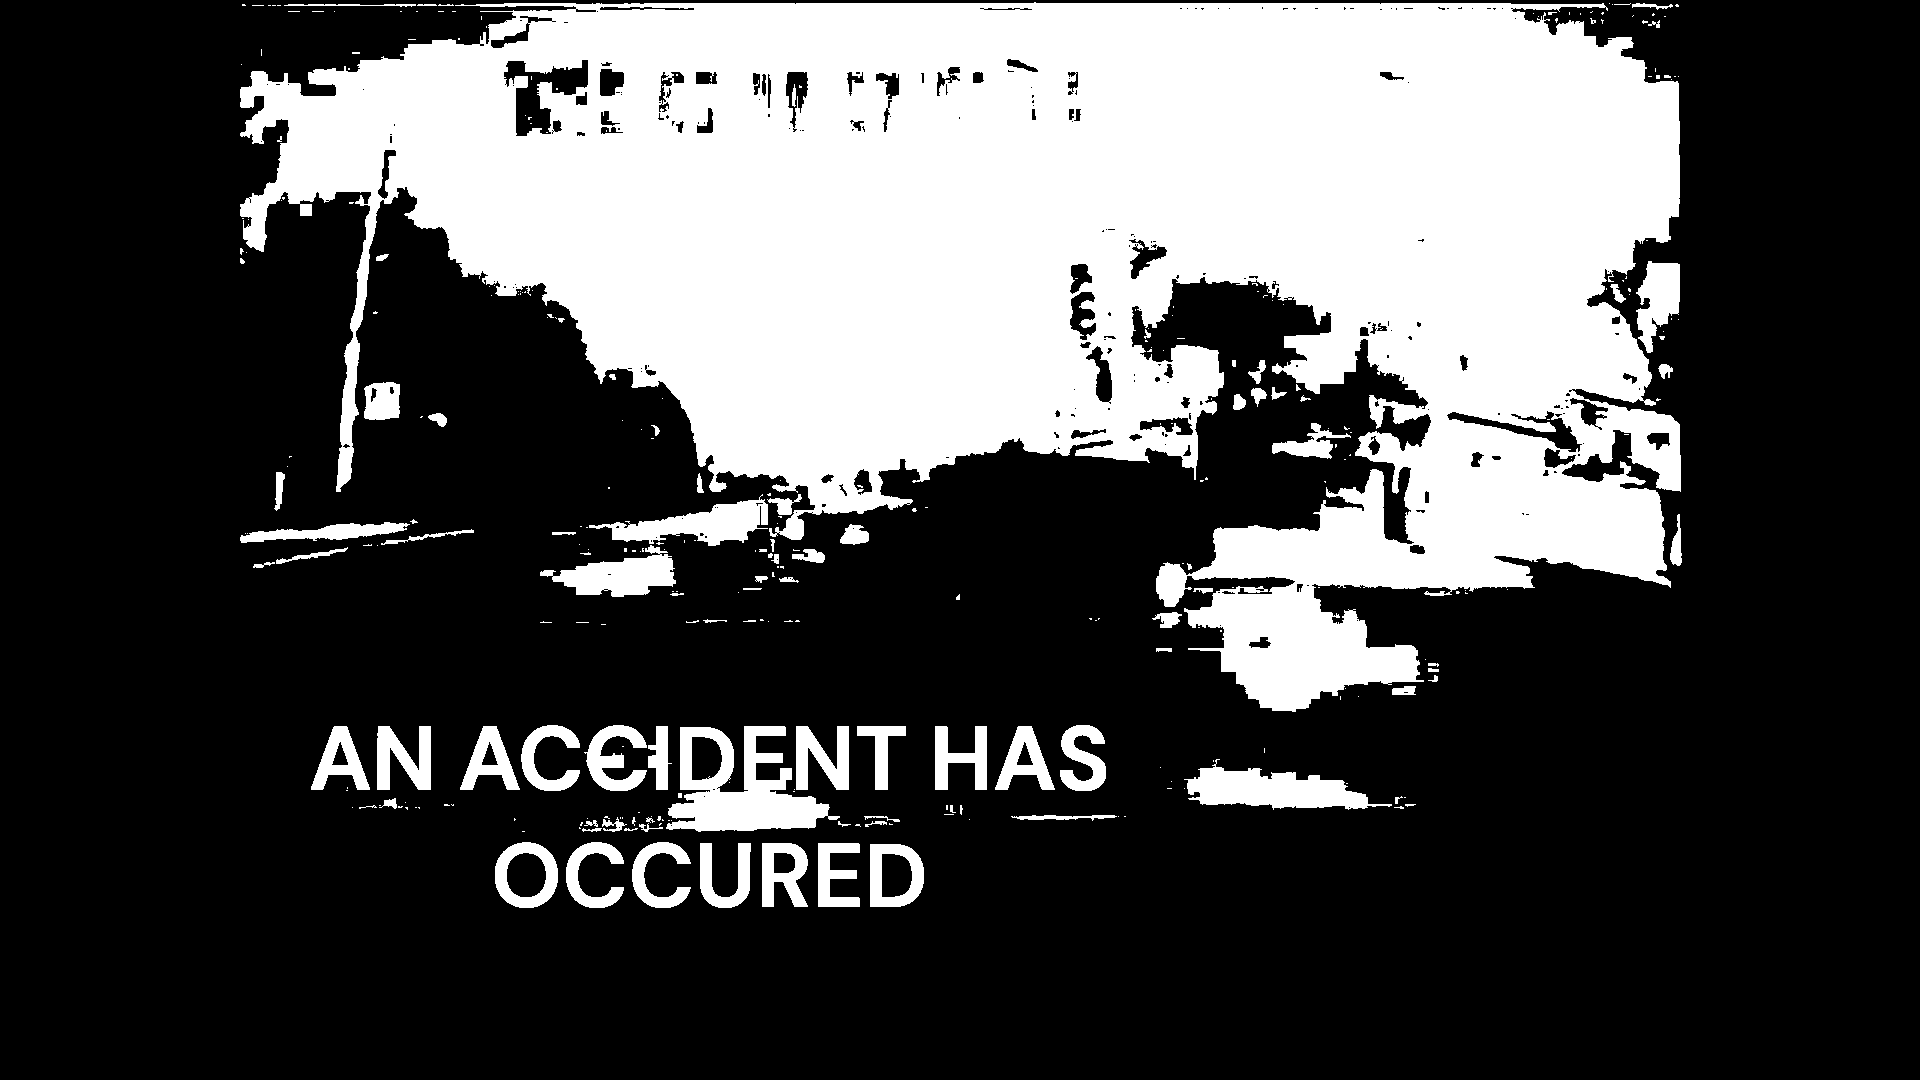

Processed Text:  

AN ACCIDENT HAS eu

OCCURED

Prediction: [1]


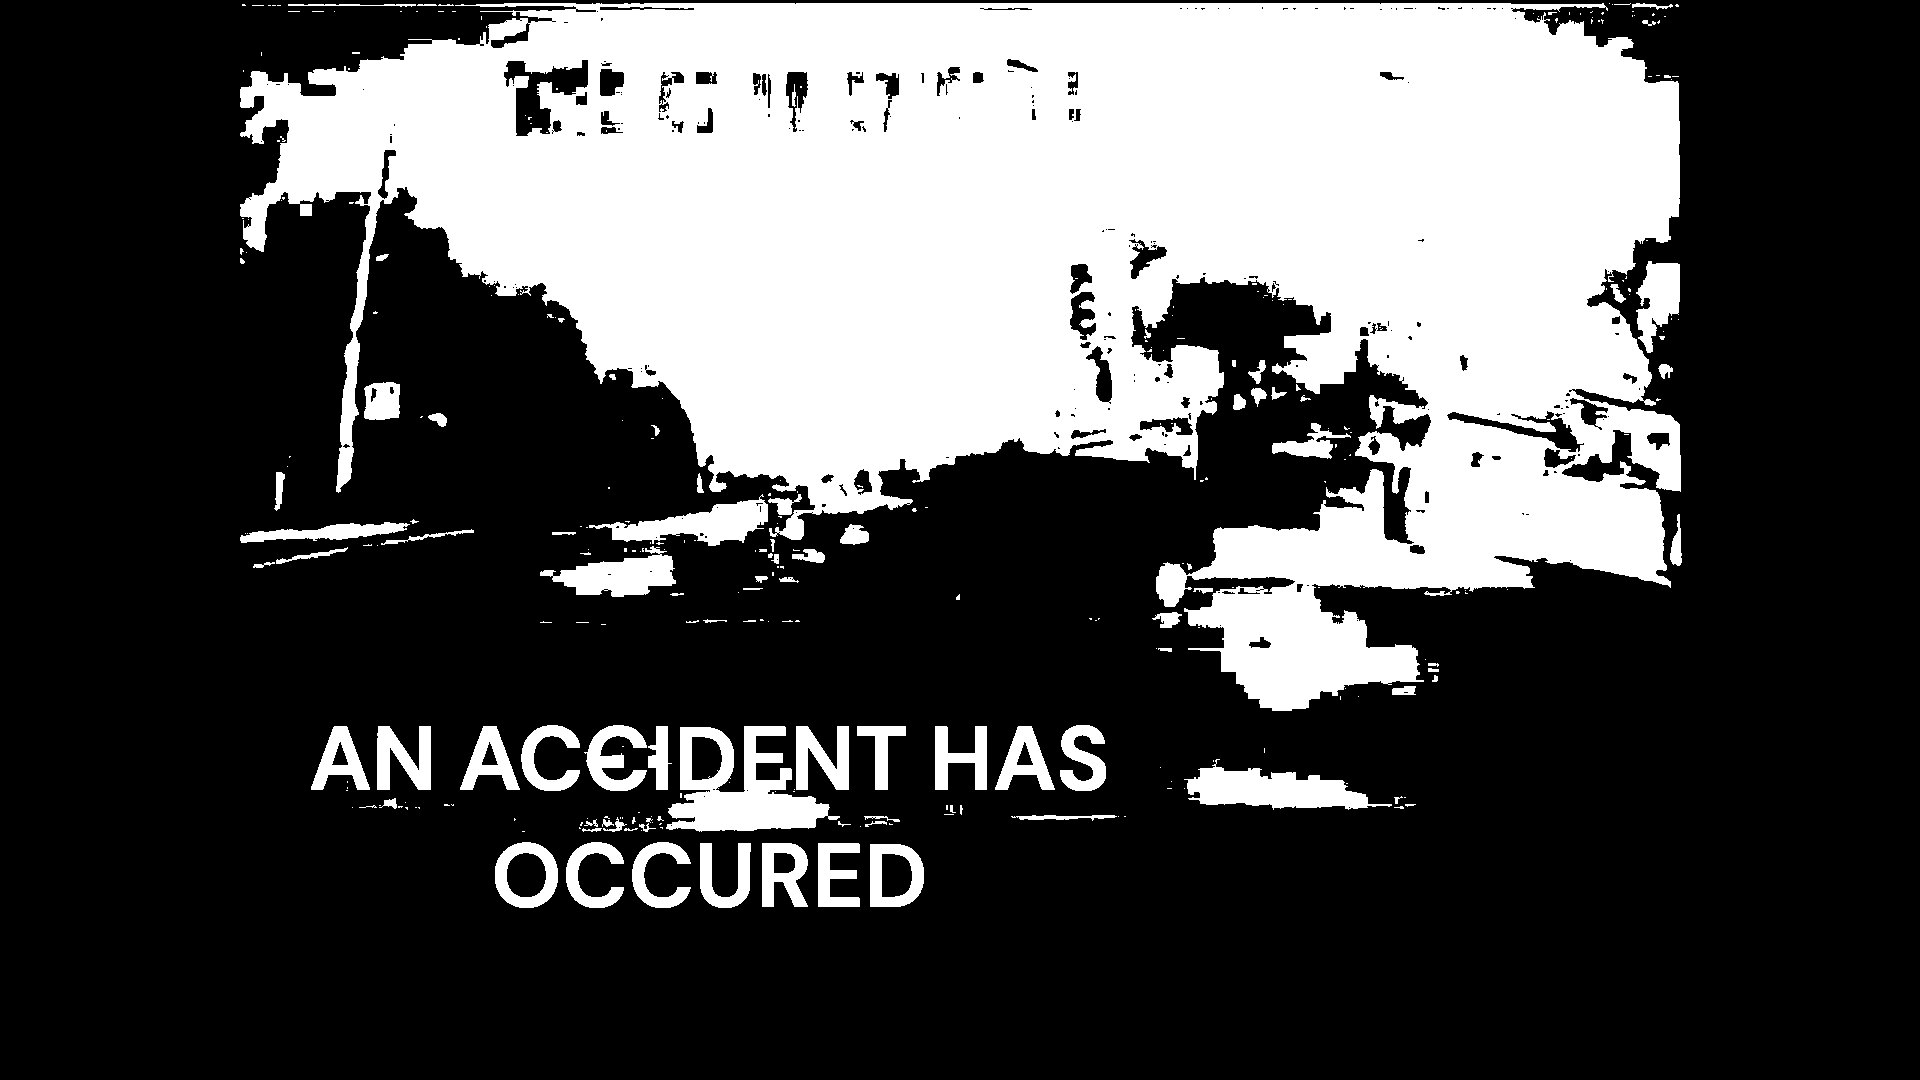

Processed Text:  

PANE ex]? NLS ee
OCCURED

Prediction: [0]


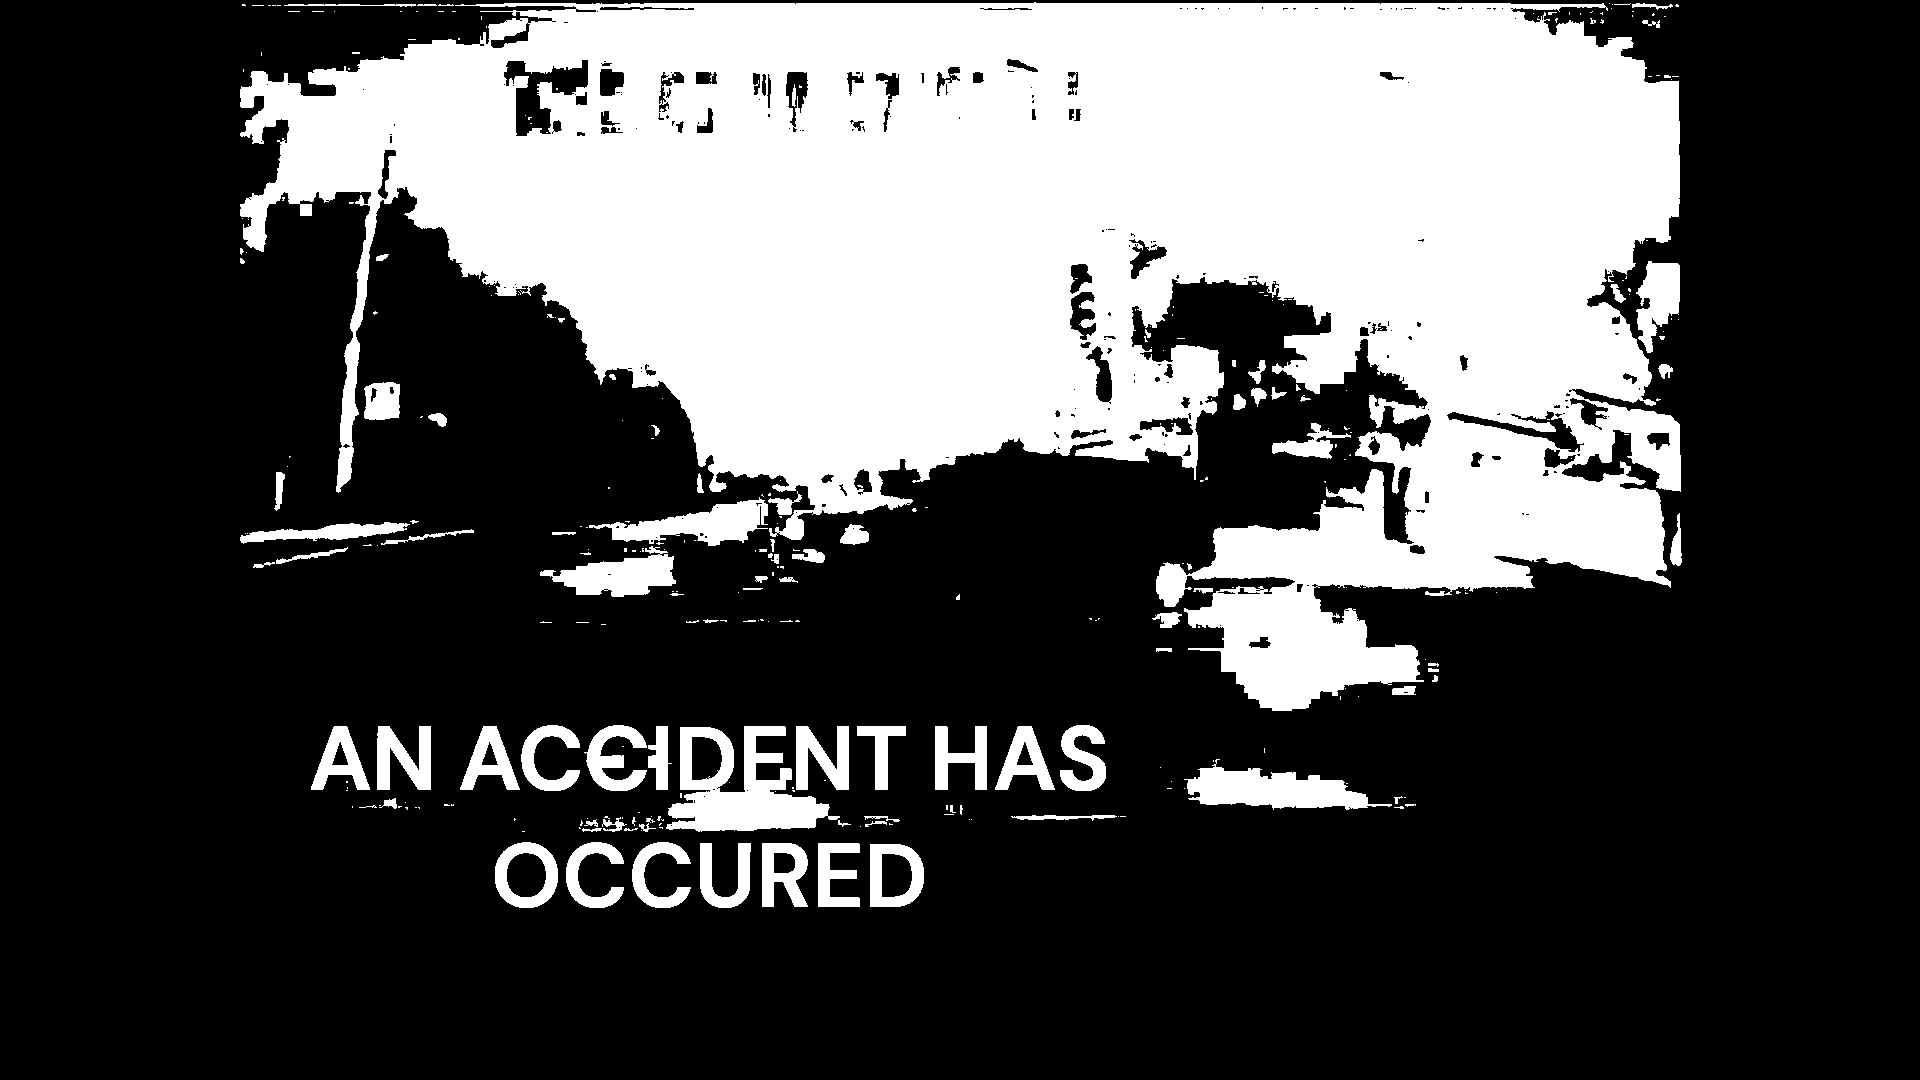

Processed Text: a =

 

AN ACCIDENT HAS
OCCURED

Prediction: [1]


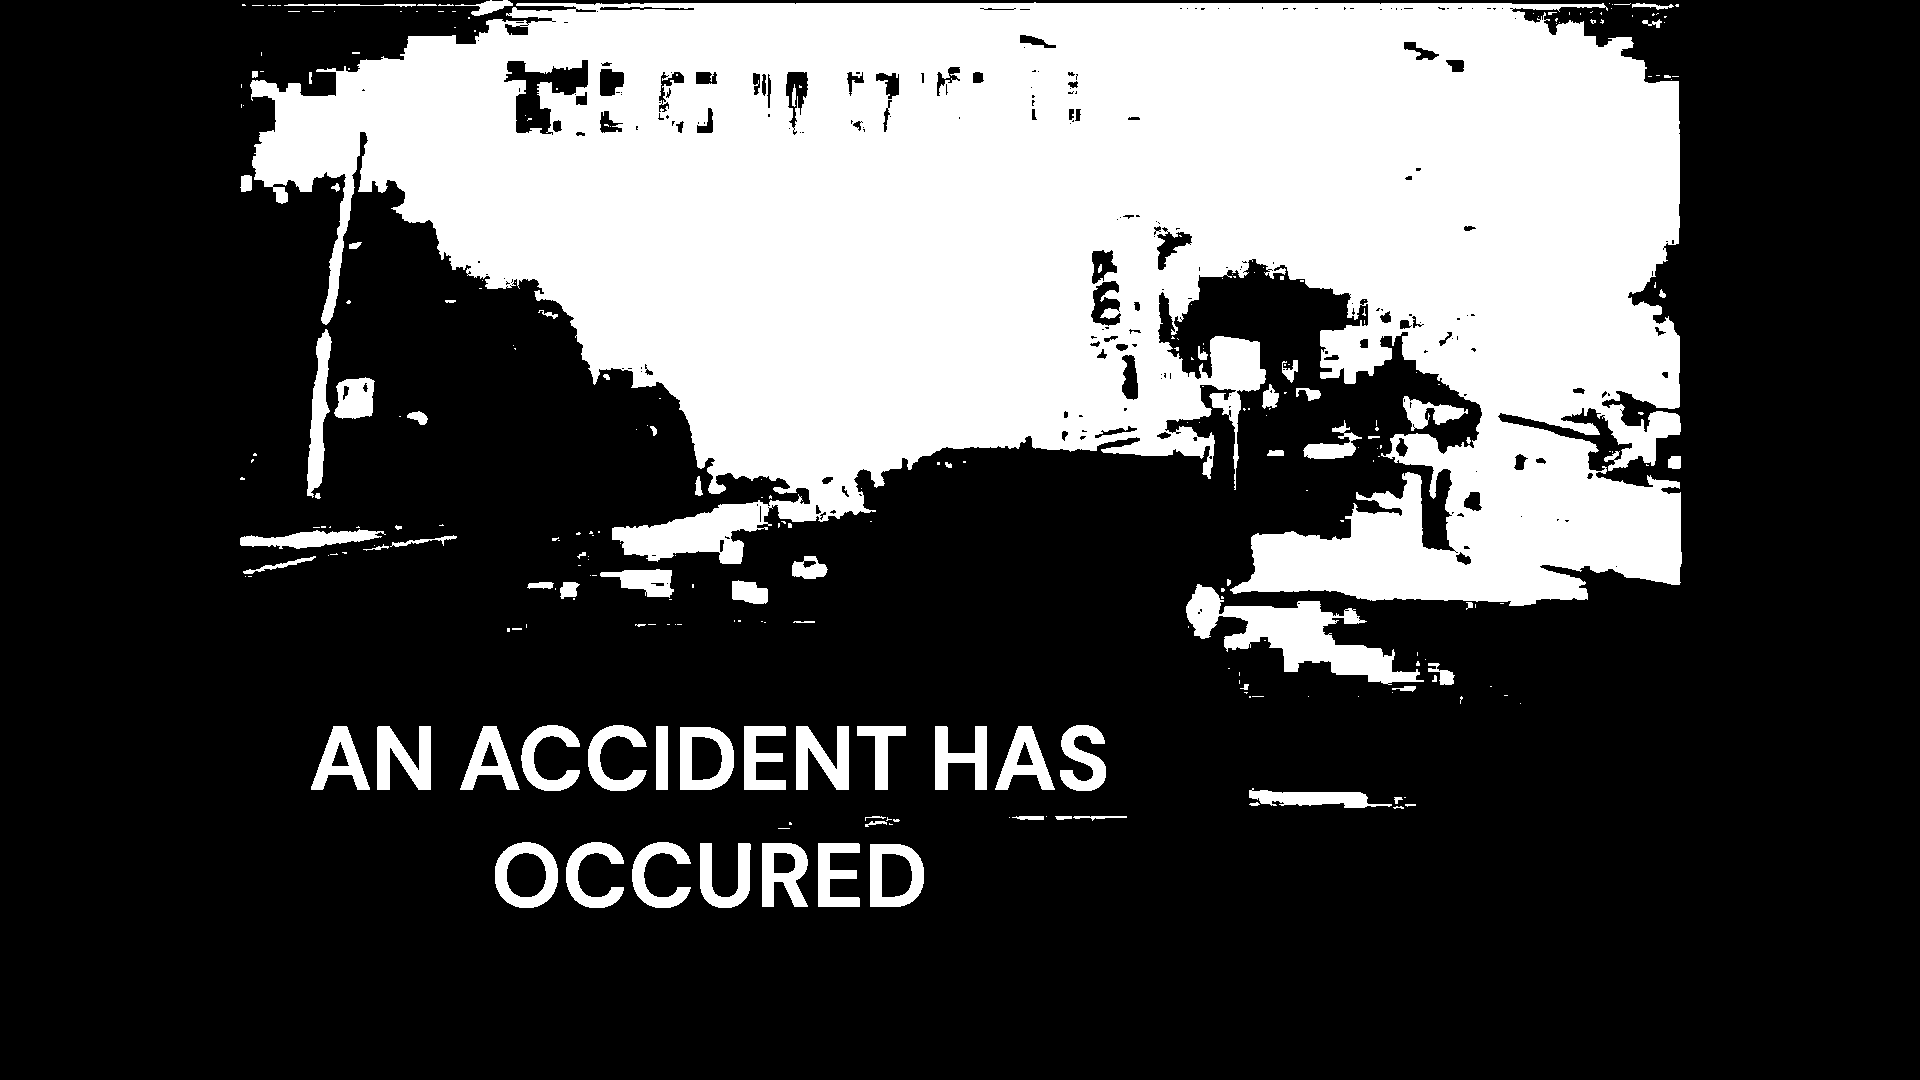

Processed Text: | ad

 

AN ACCIDENT HAS
OCCURED

Prediction: [1]


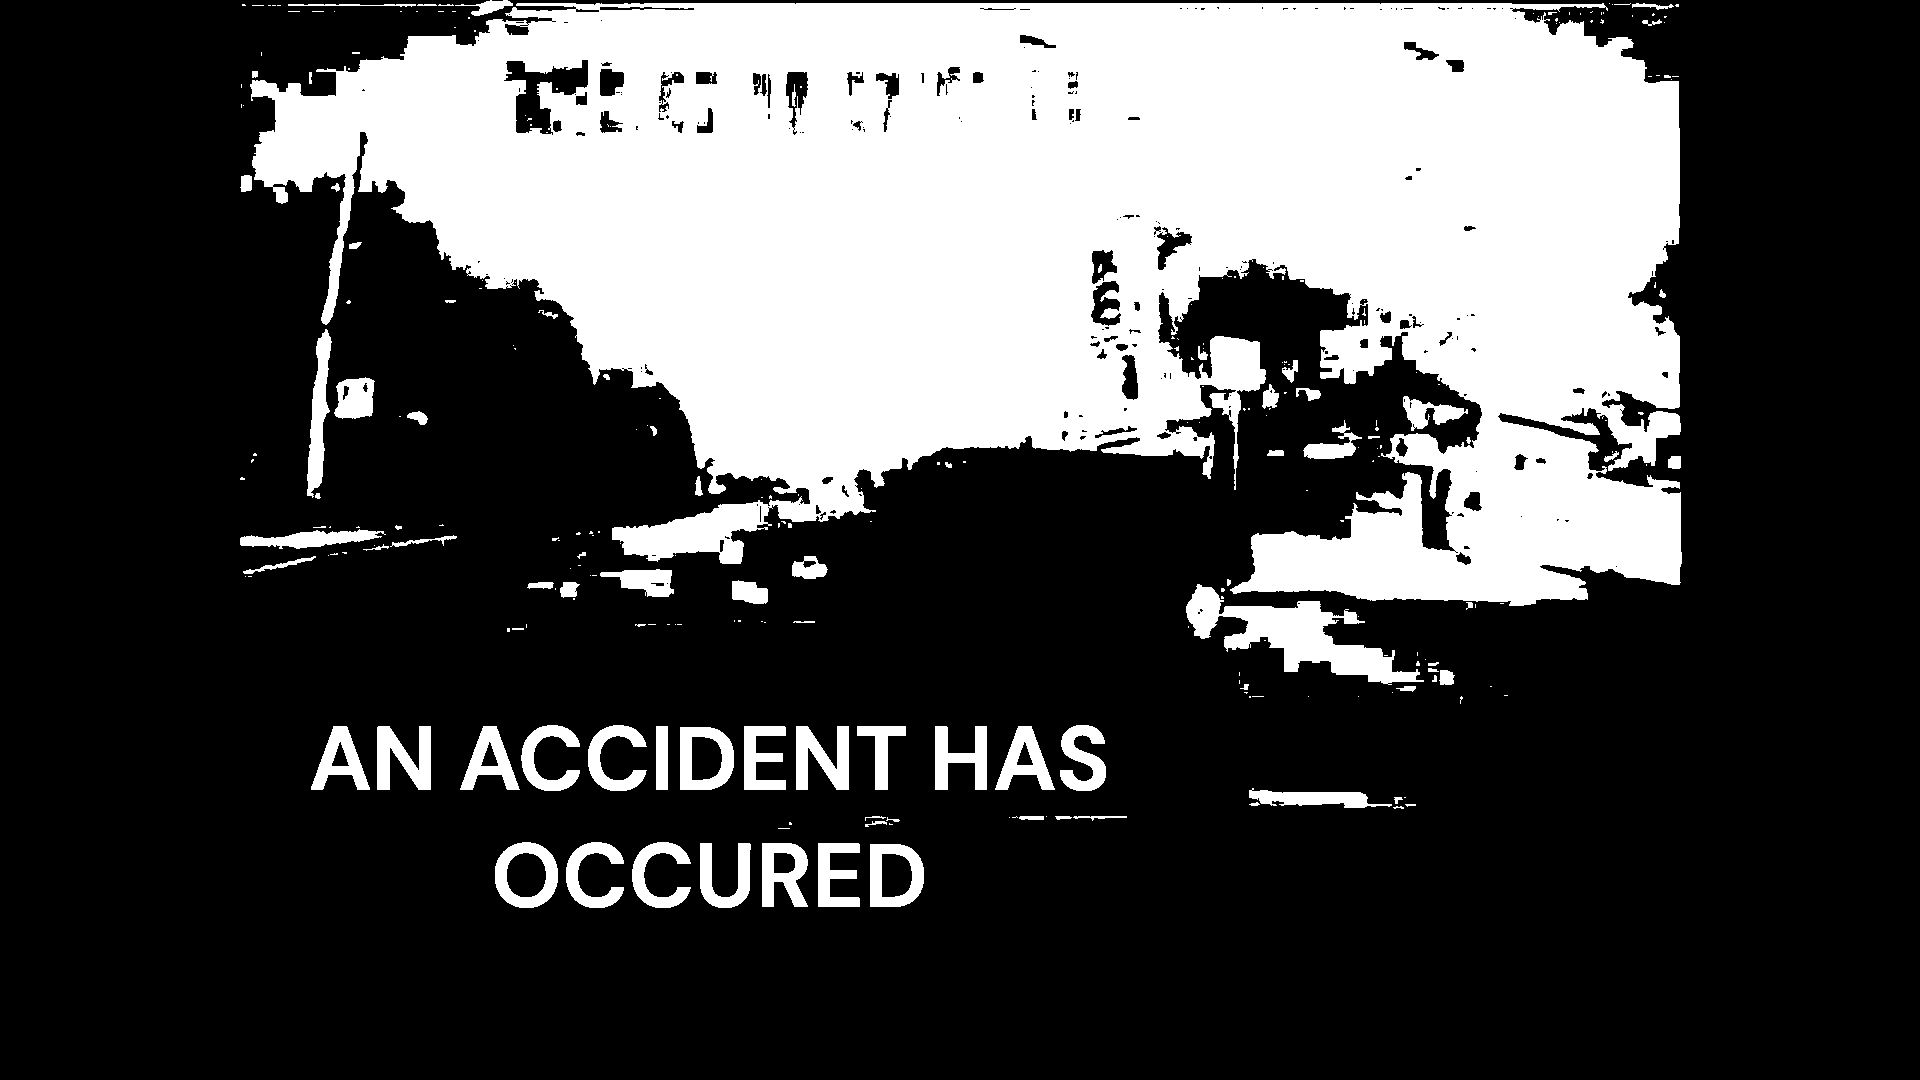

Processed Text: CS —

o — OO me a wo TOs Tes ae
ft Peet ng rere
ek ed 'f af ‘ a

 

fal ener 11) at
OCCURED

Prediction: [0]


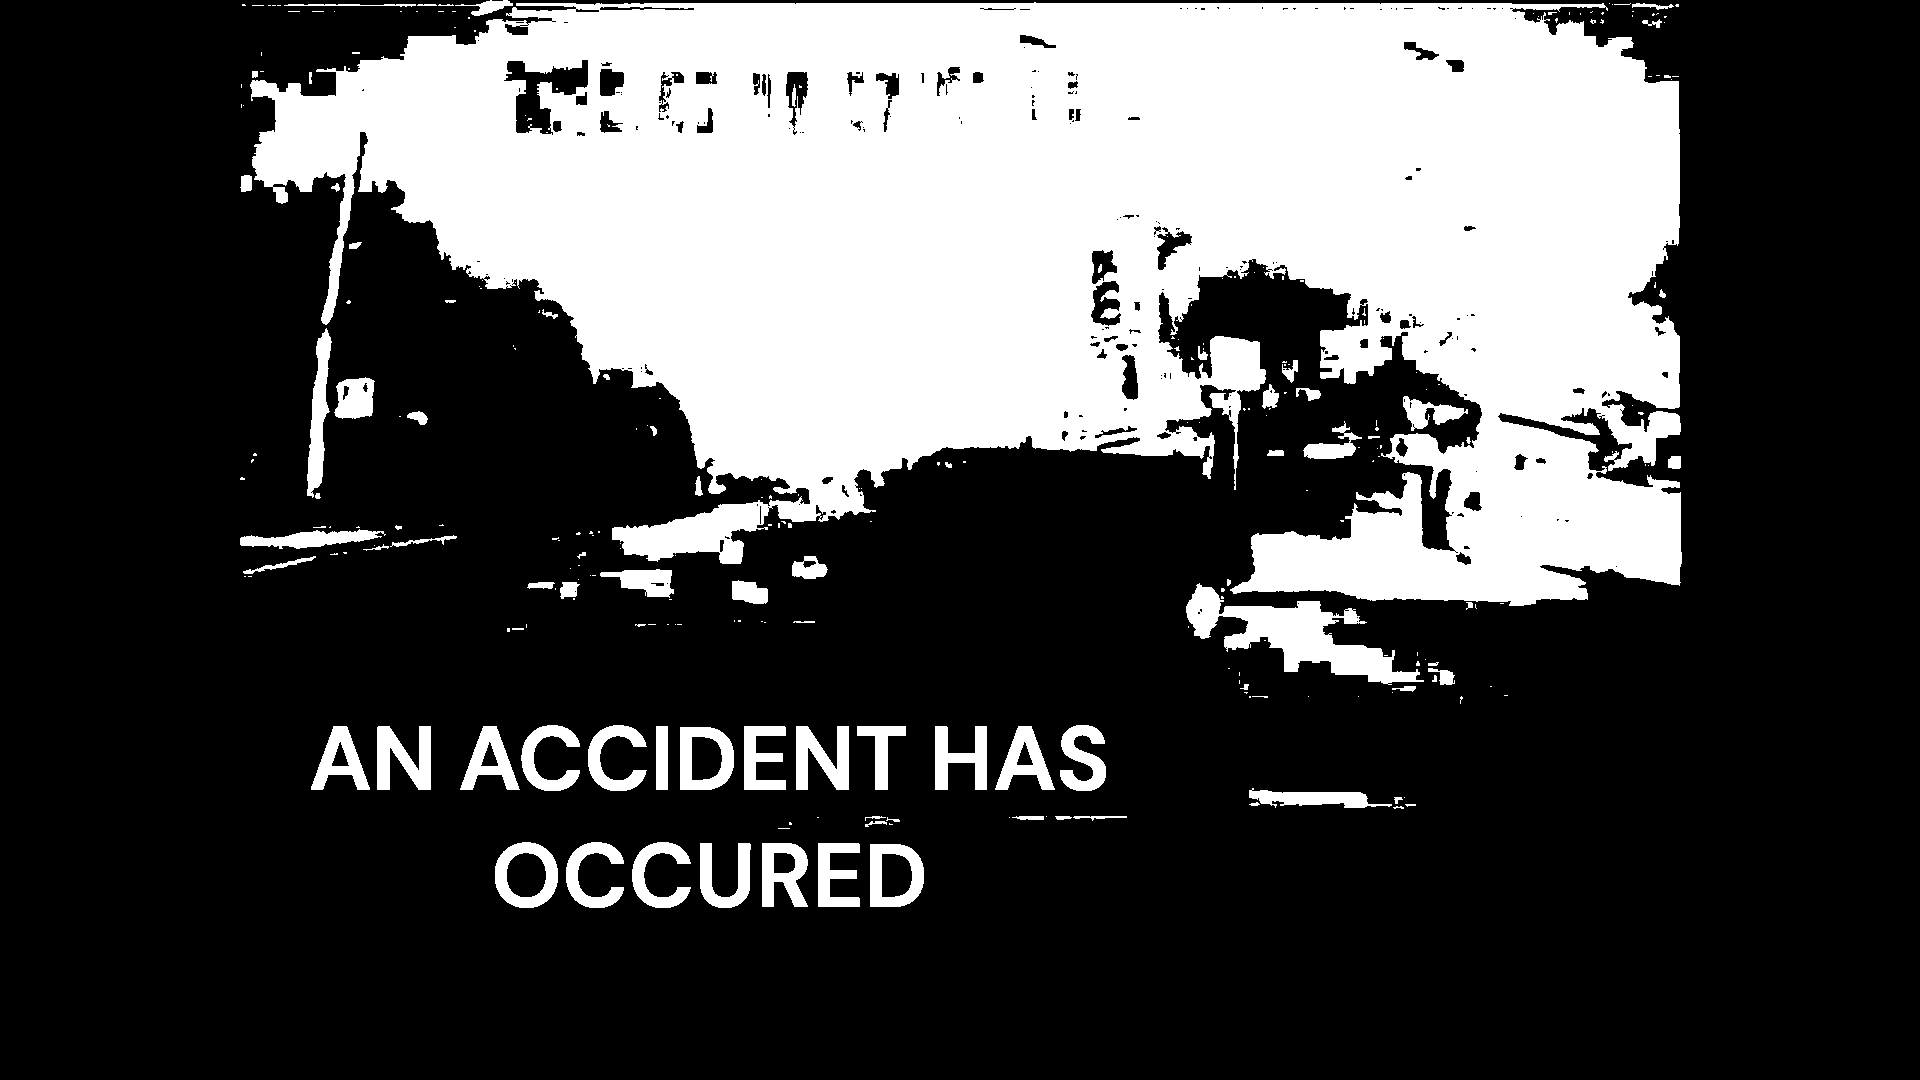

Processed Text:  

AN ACCIDENT HAS
OCCURED

Prediction: [1]


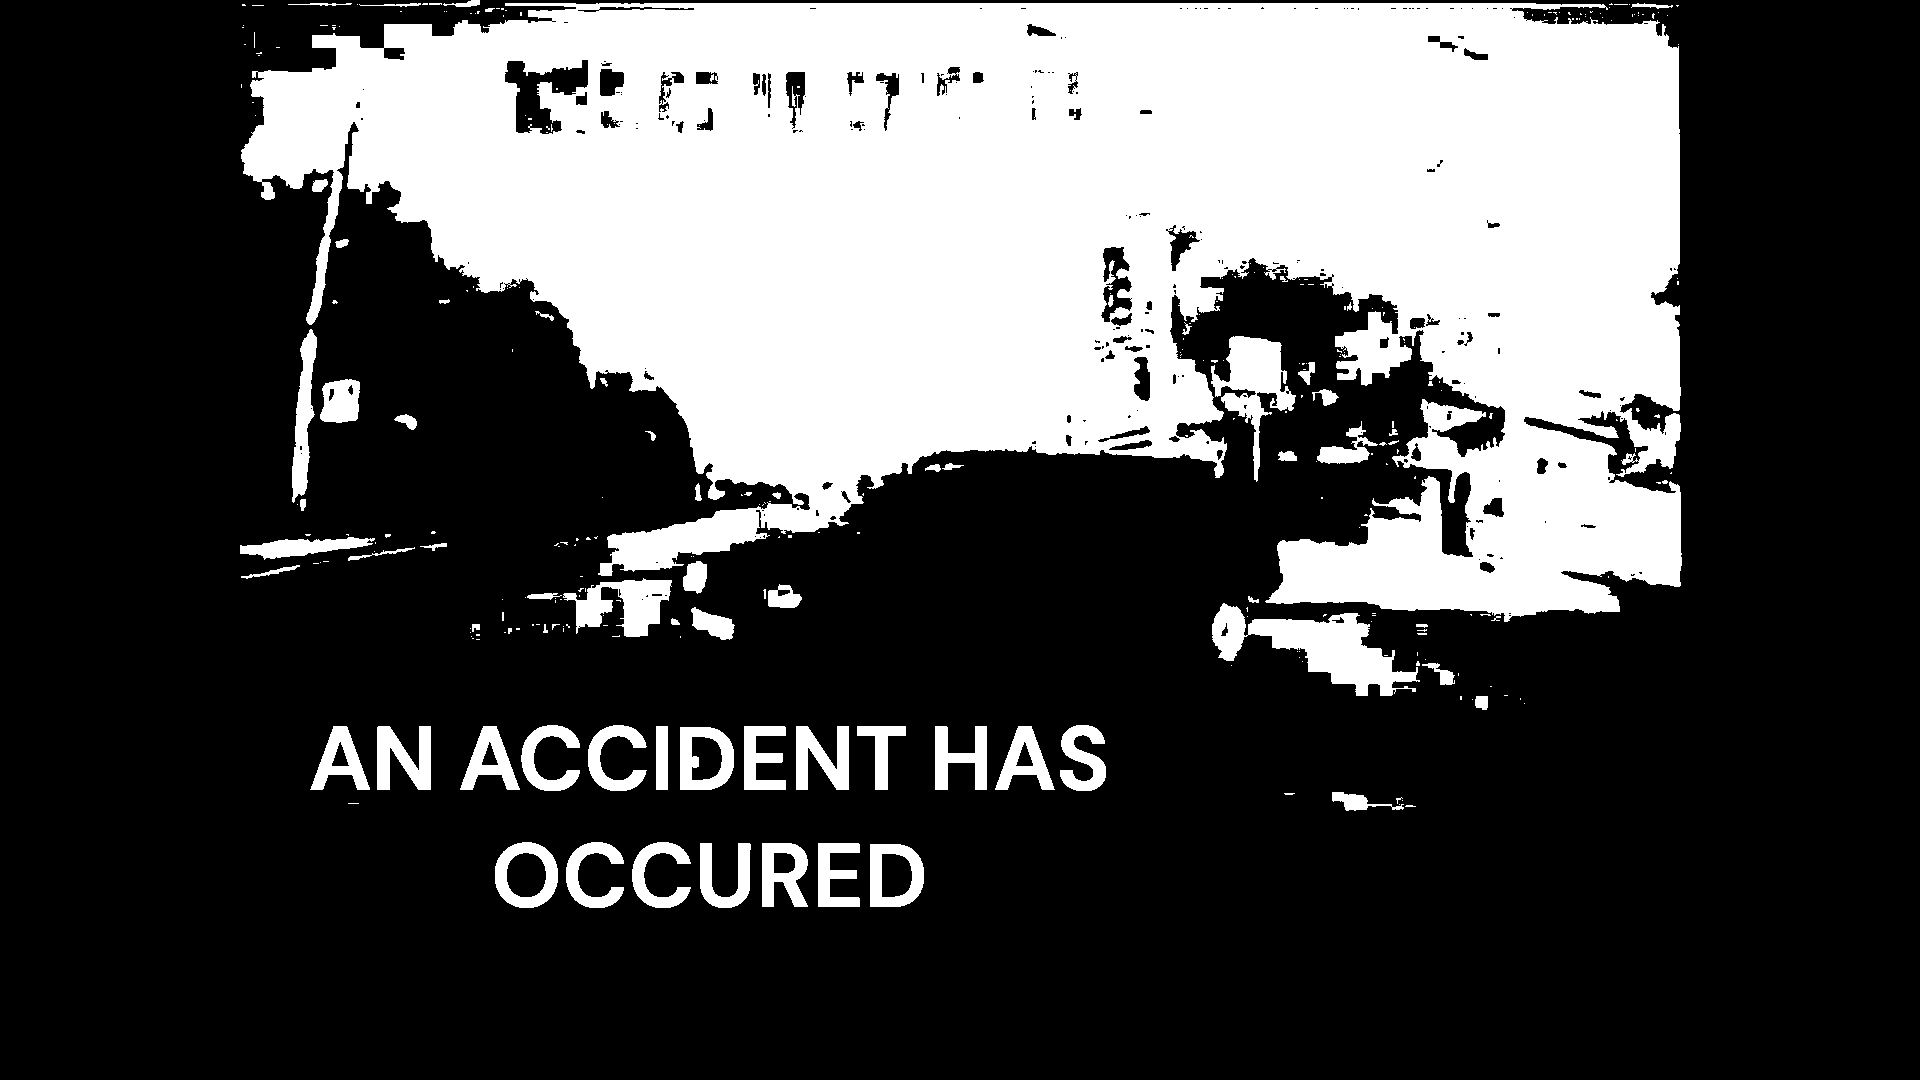

Processed Text:  

AN ACCIDENT HAS
OCCURED

Prediction: [1]


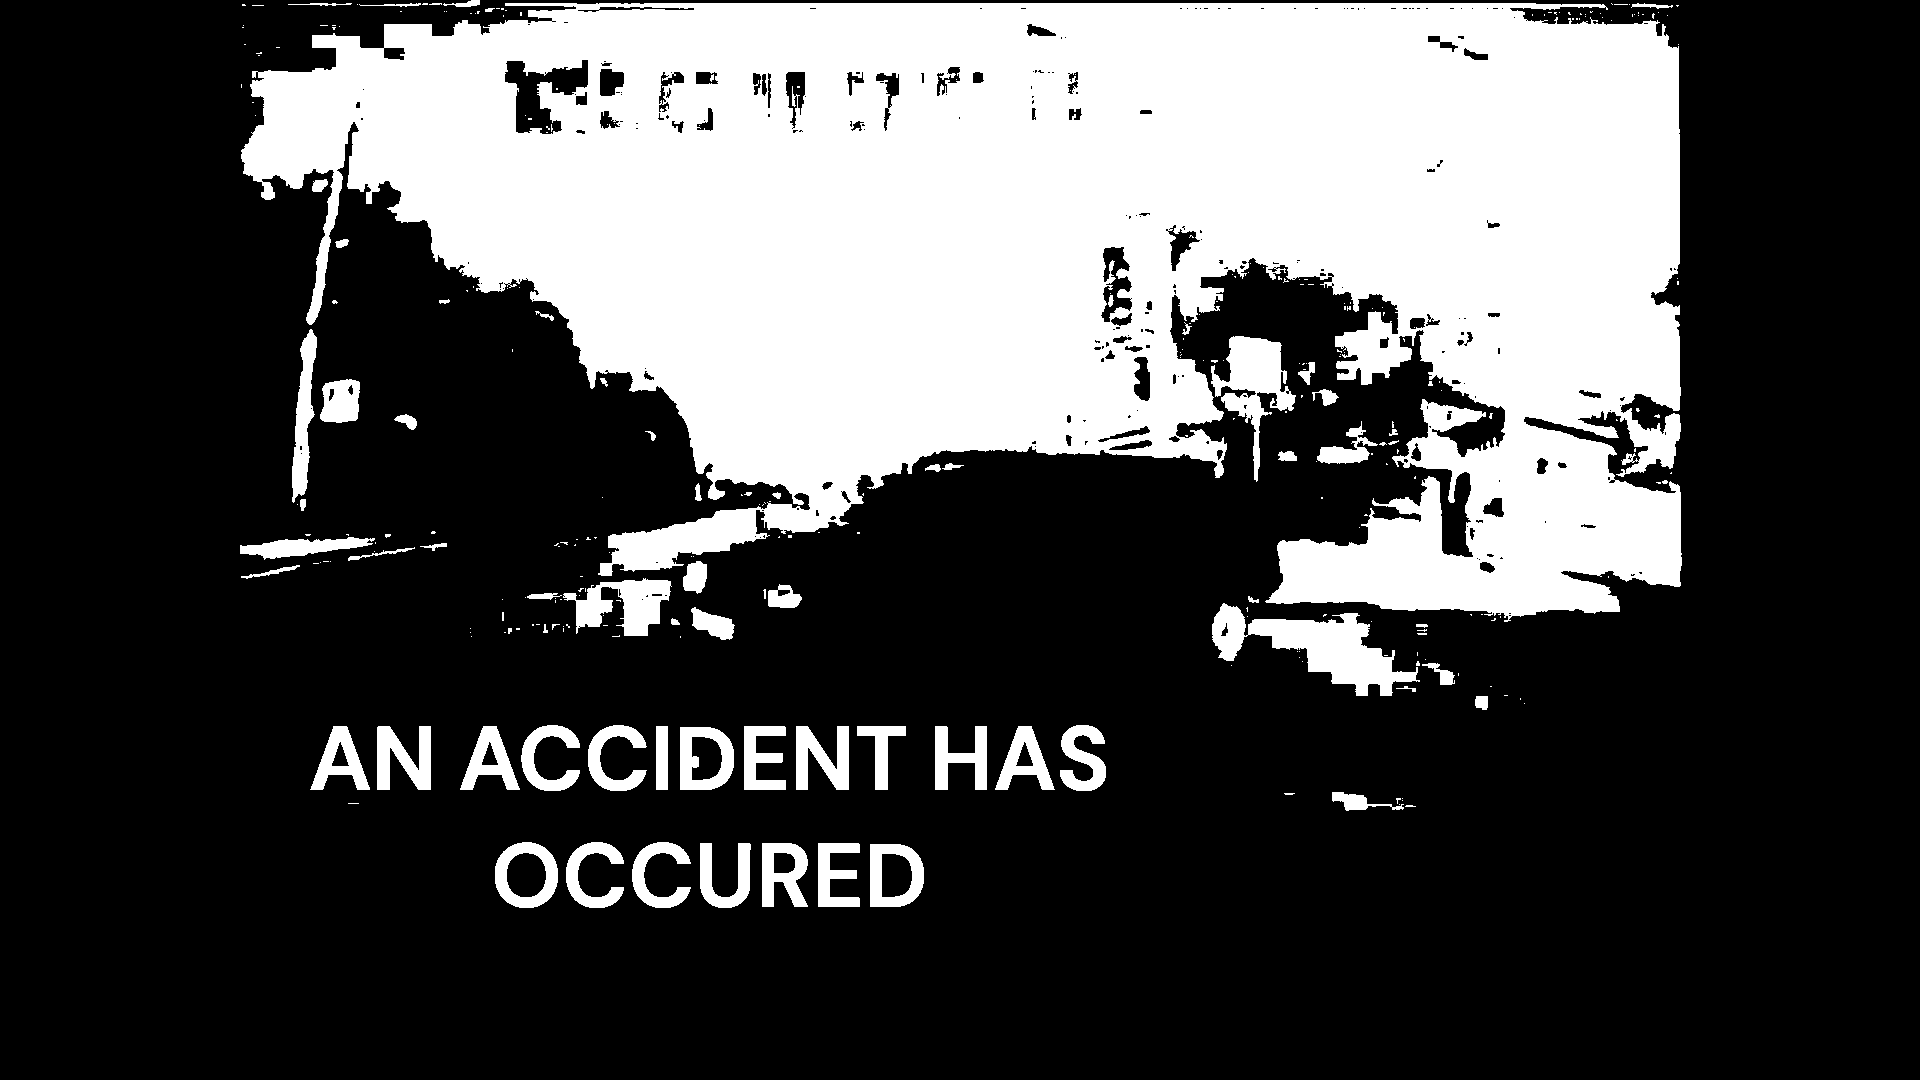

Processed Text:  

AN ACCIDENT HAS
OCCURED

Prediction: [1]


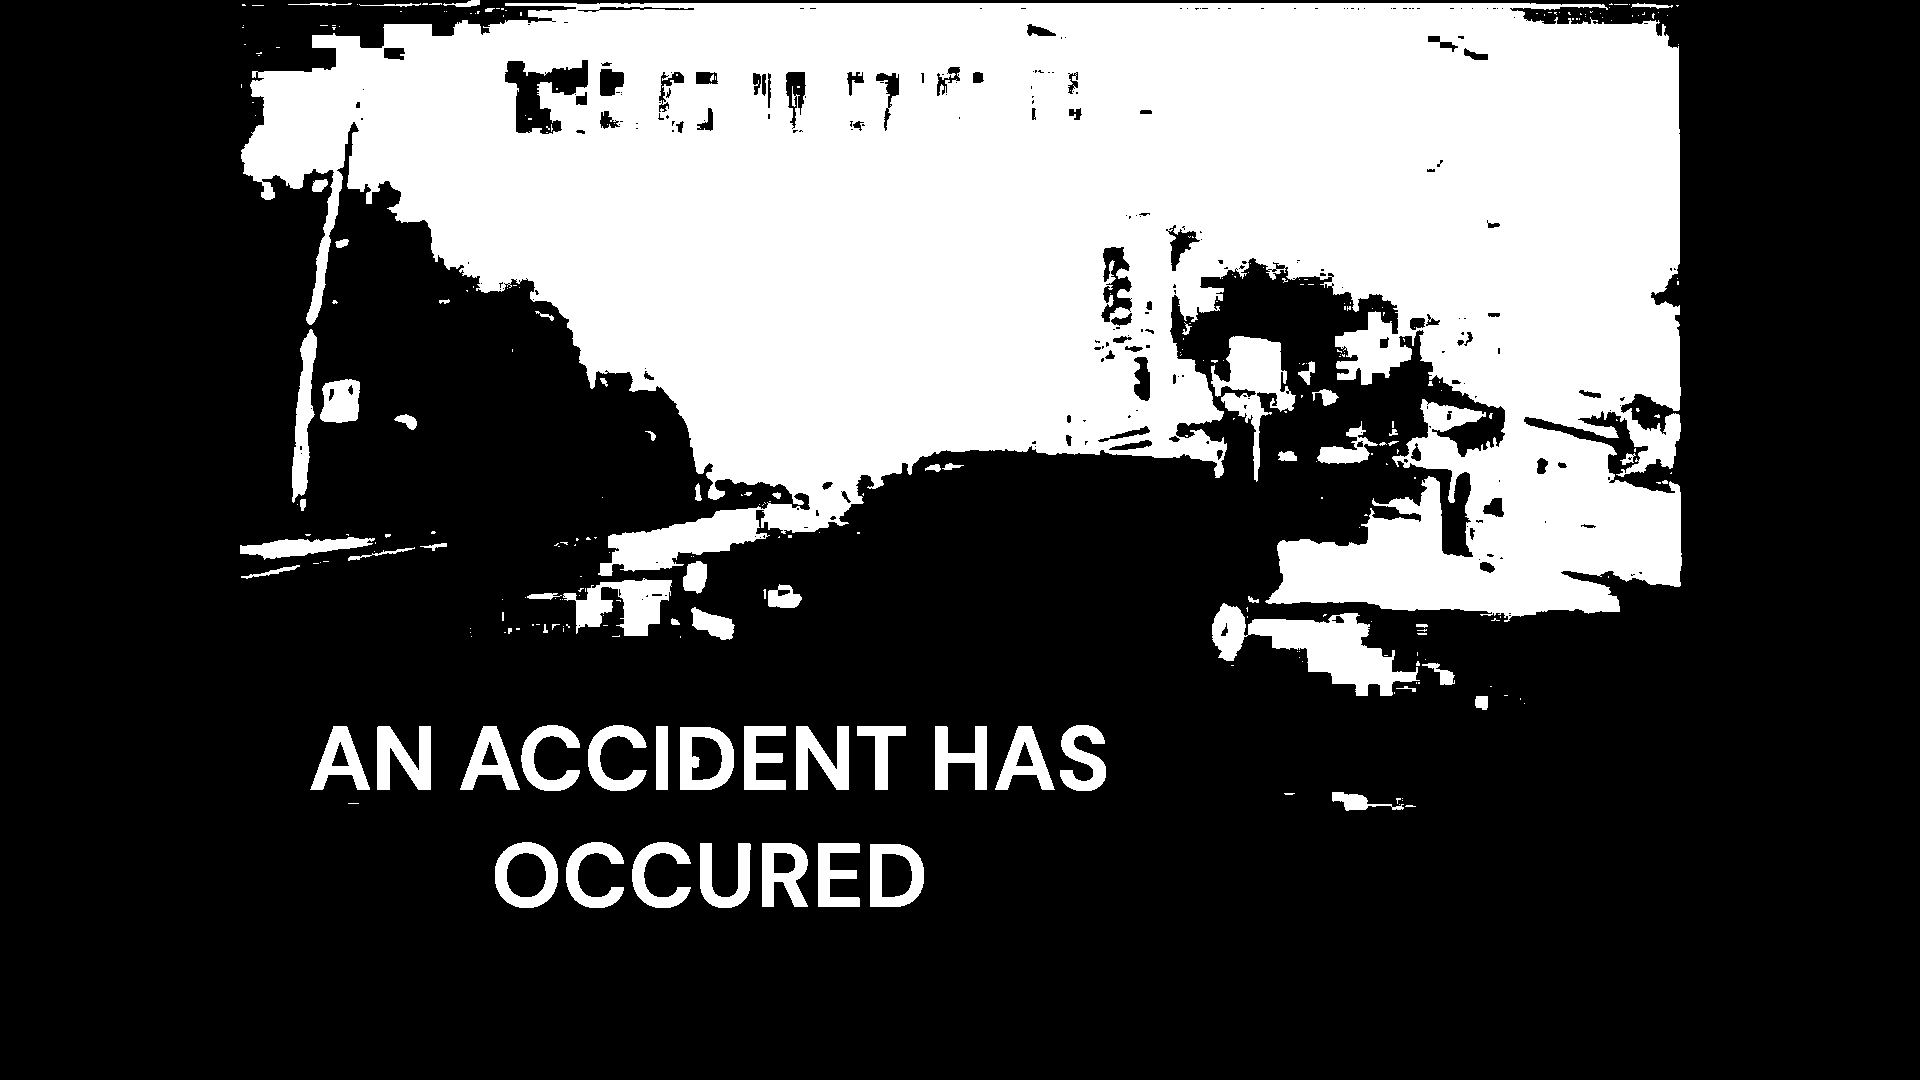

Processed Text:    

x
AN ACCIDENT HAS
OCCURED

Prediction: [1]


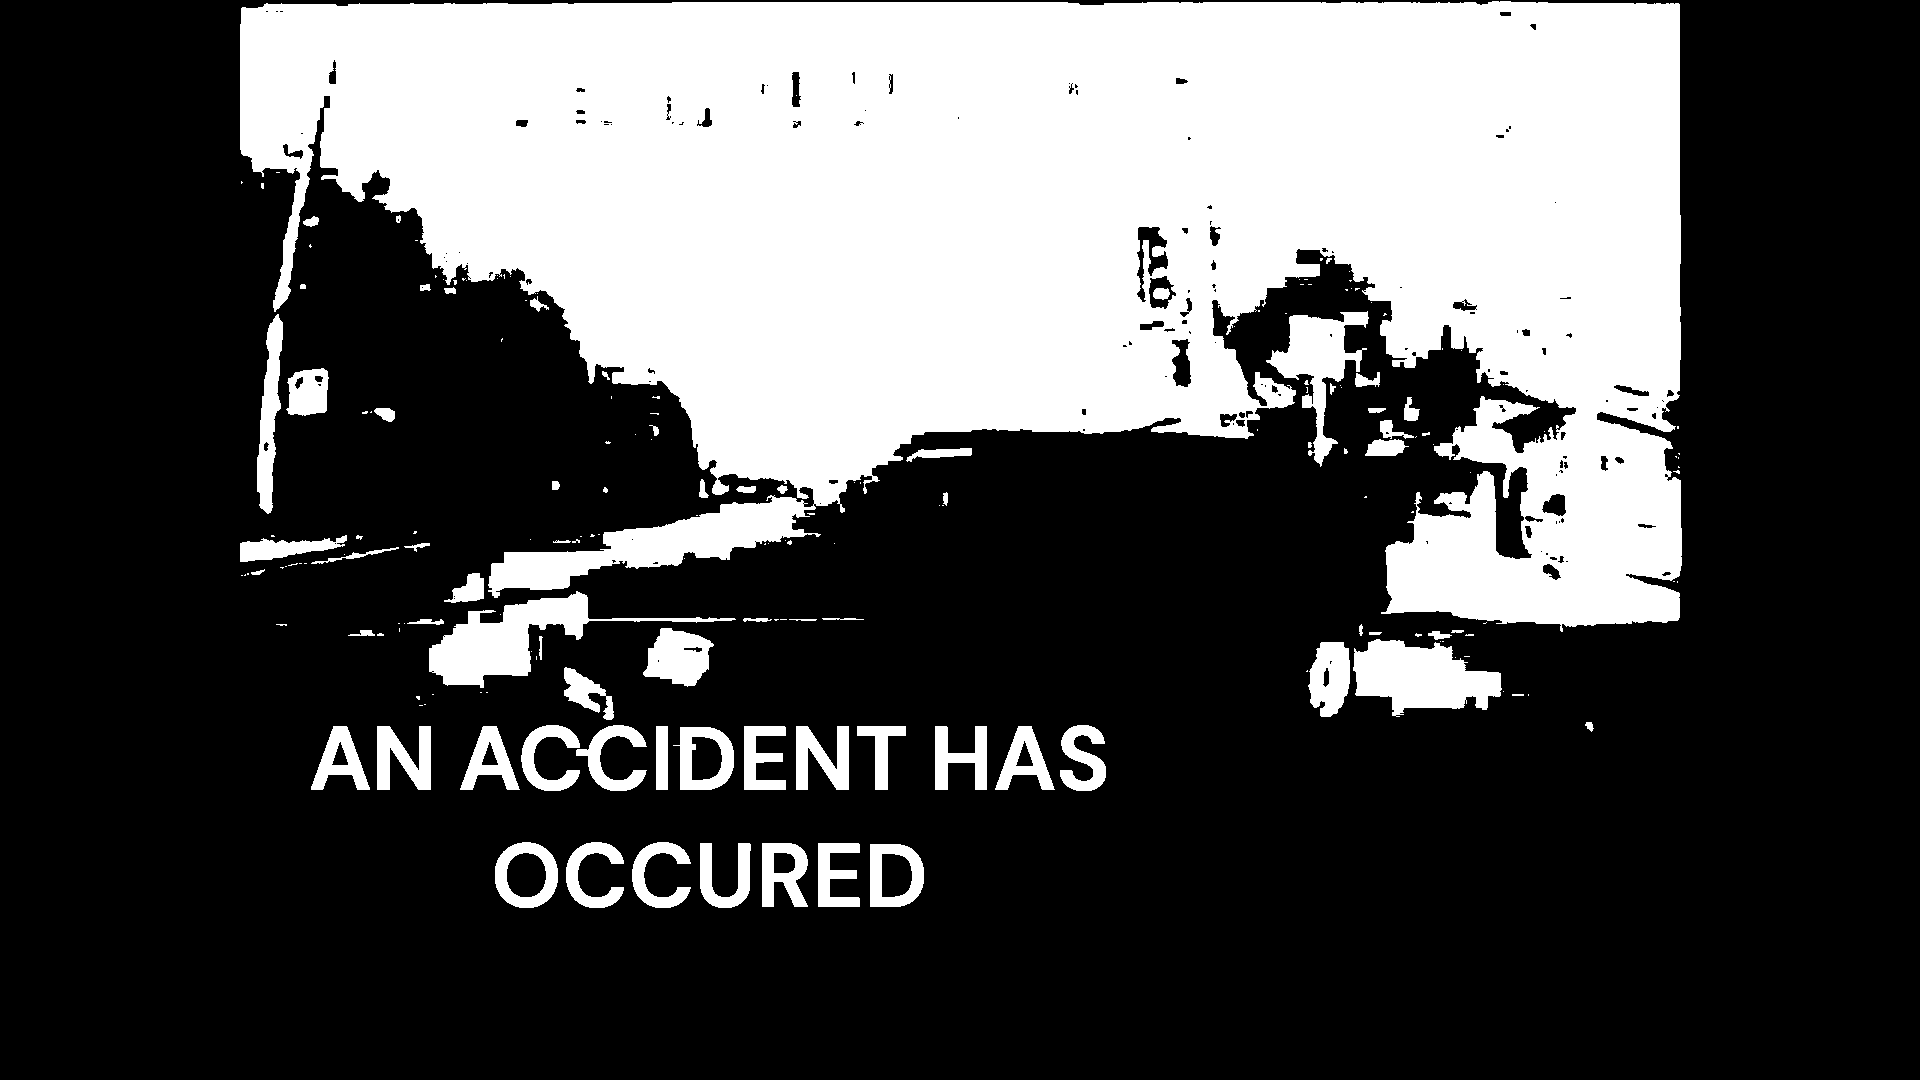

Processed Text:    

x
AN ACCIDENT HAS
OCCURED

Prediction: [1]


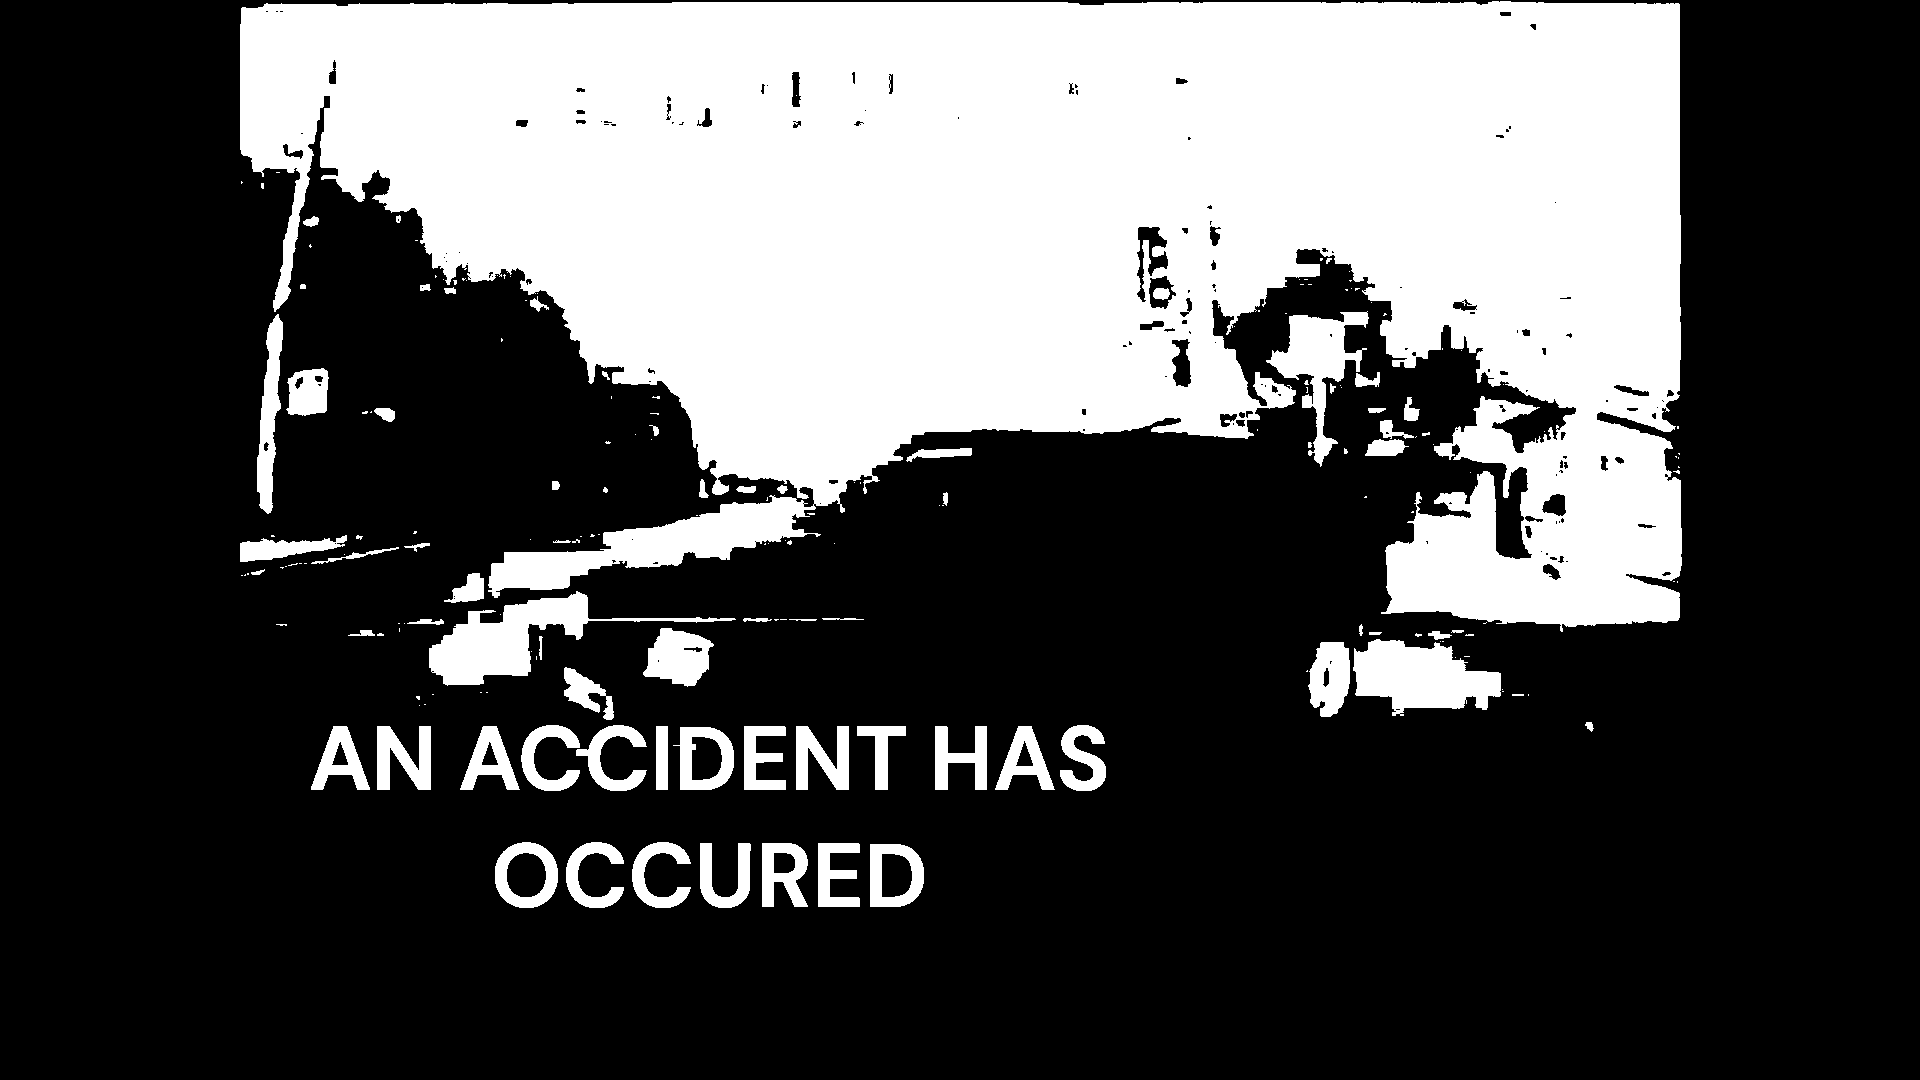

Processed Text:    

x
AN ACCIDENT HAS
OCCURED

Prediction: [1]


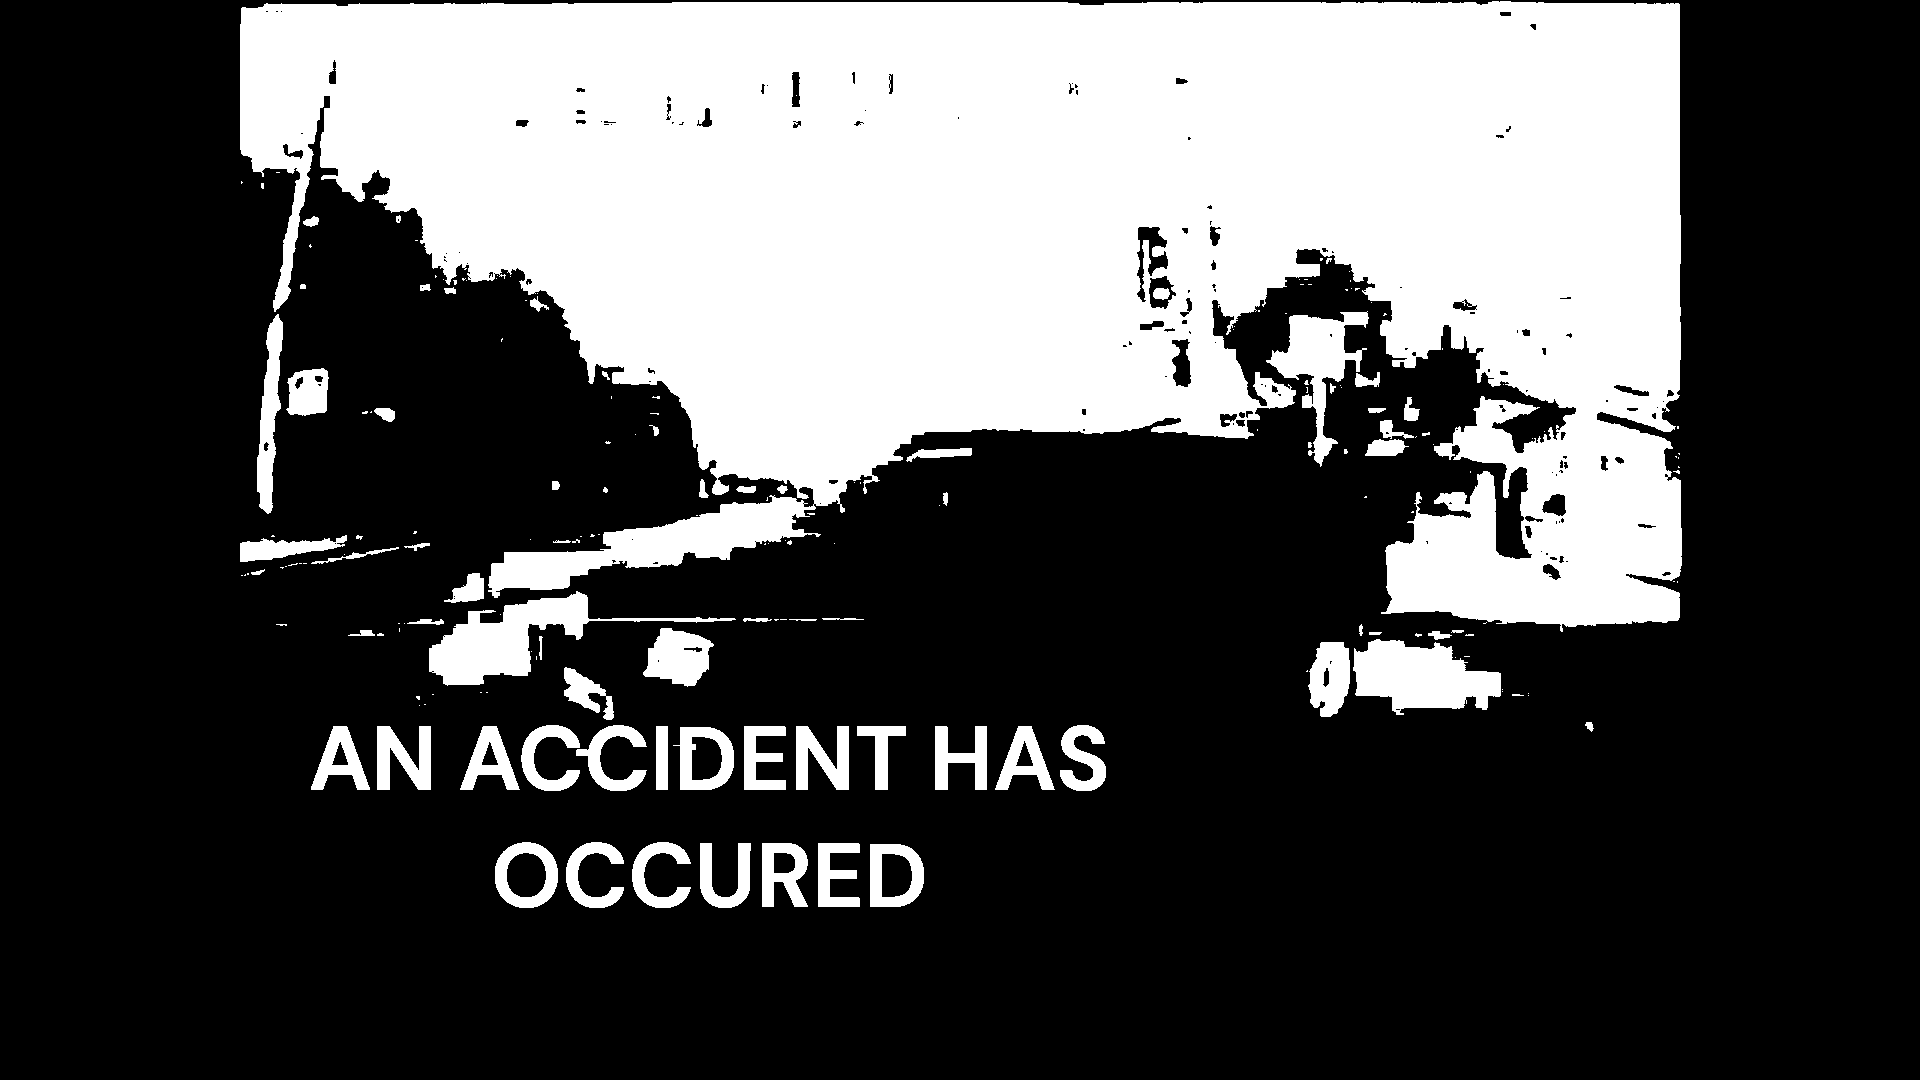

Processed Text:    

——_—
AN OY. et, HAS
OCCURED

Prediction: [0]


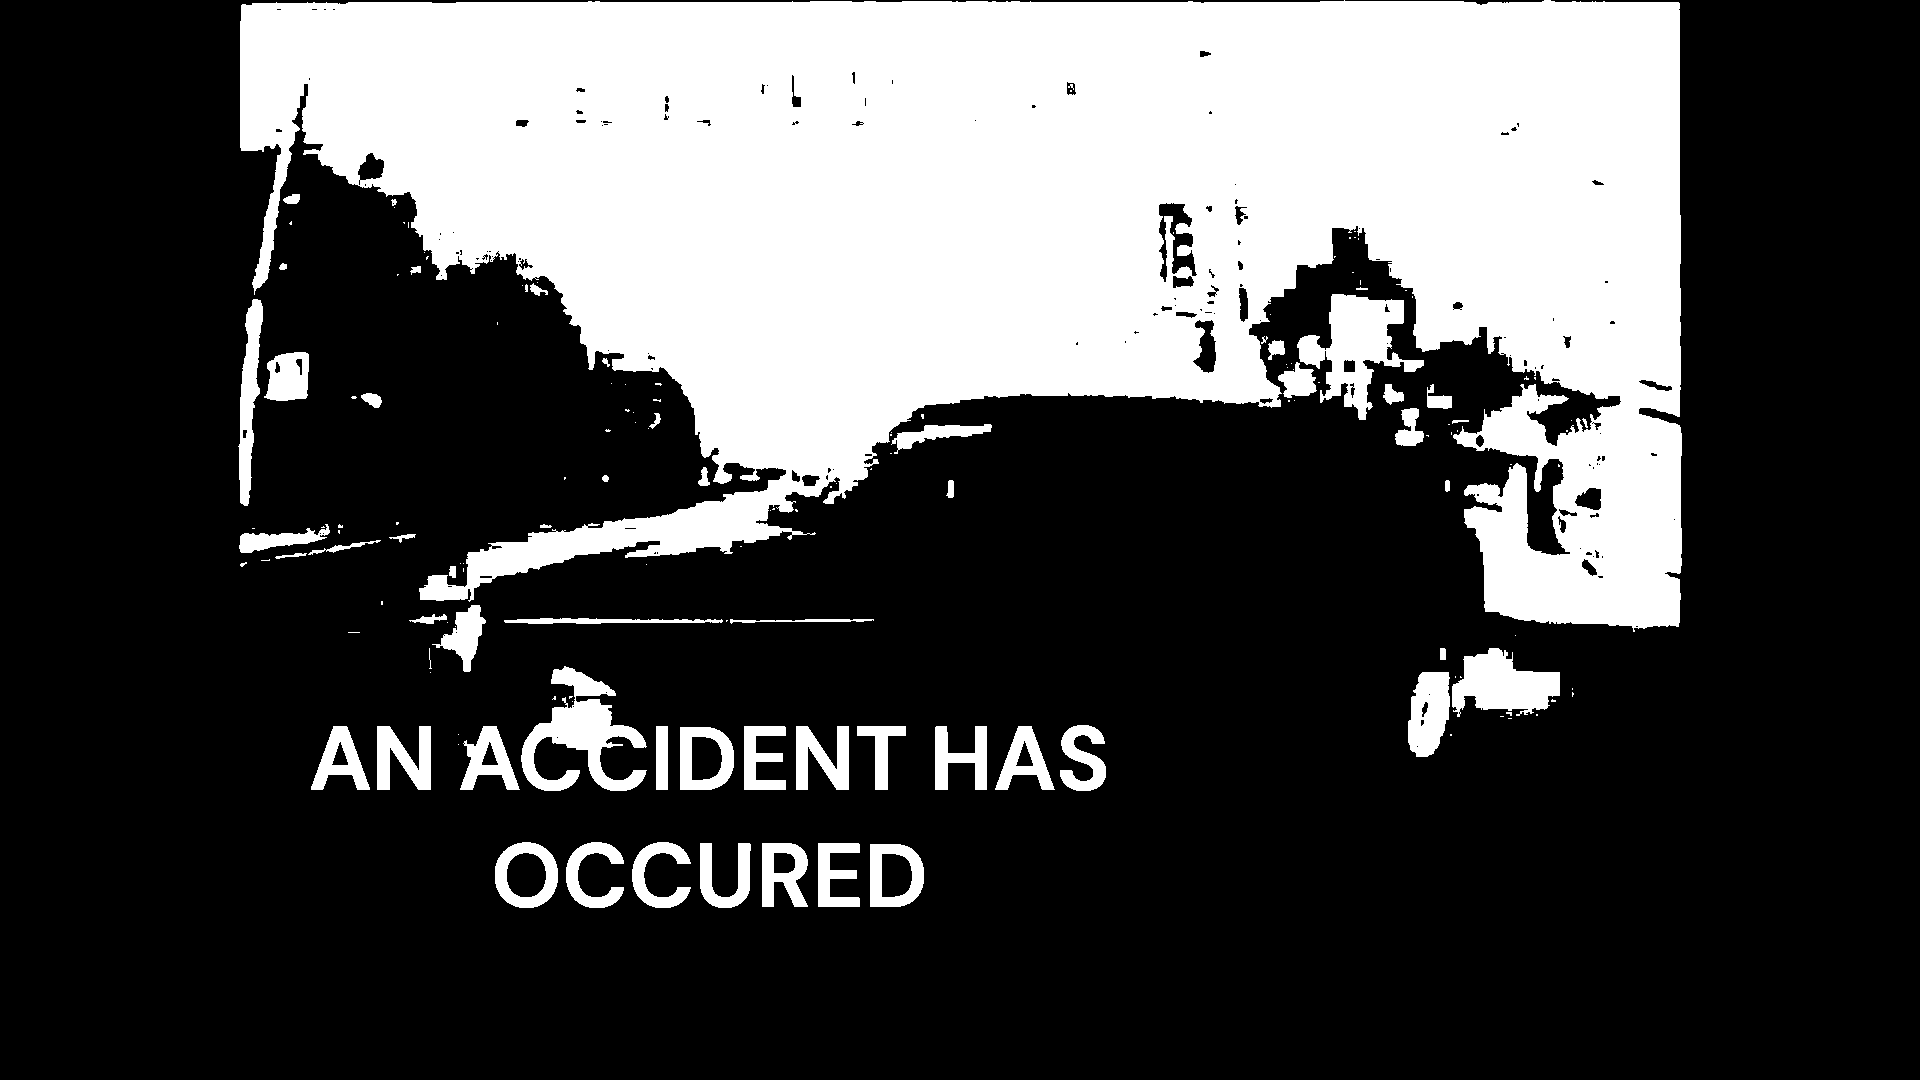

Processed Text:    

—_—
AN OY. et, HAS
OCCURED

Prediction: [0]


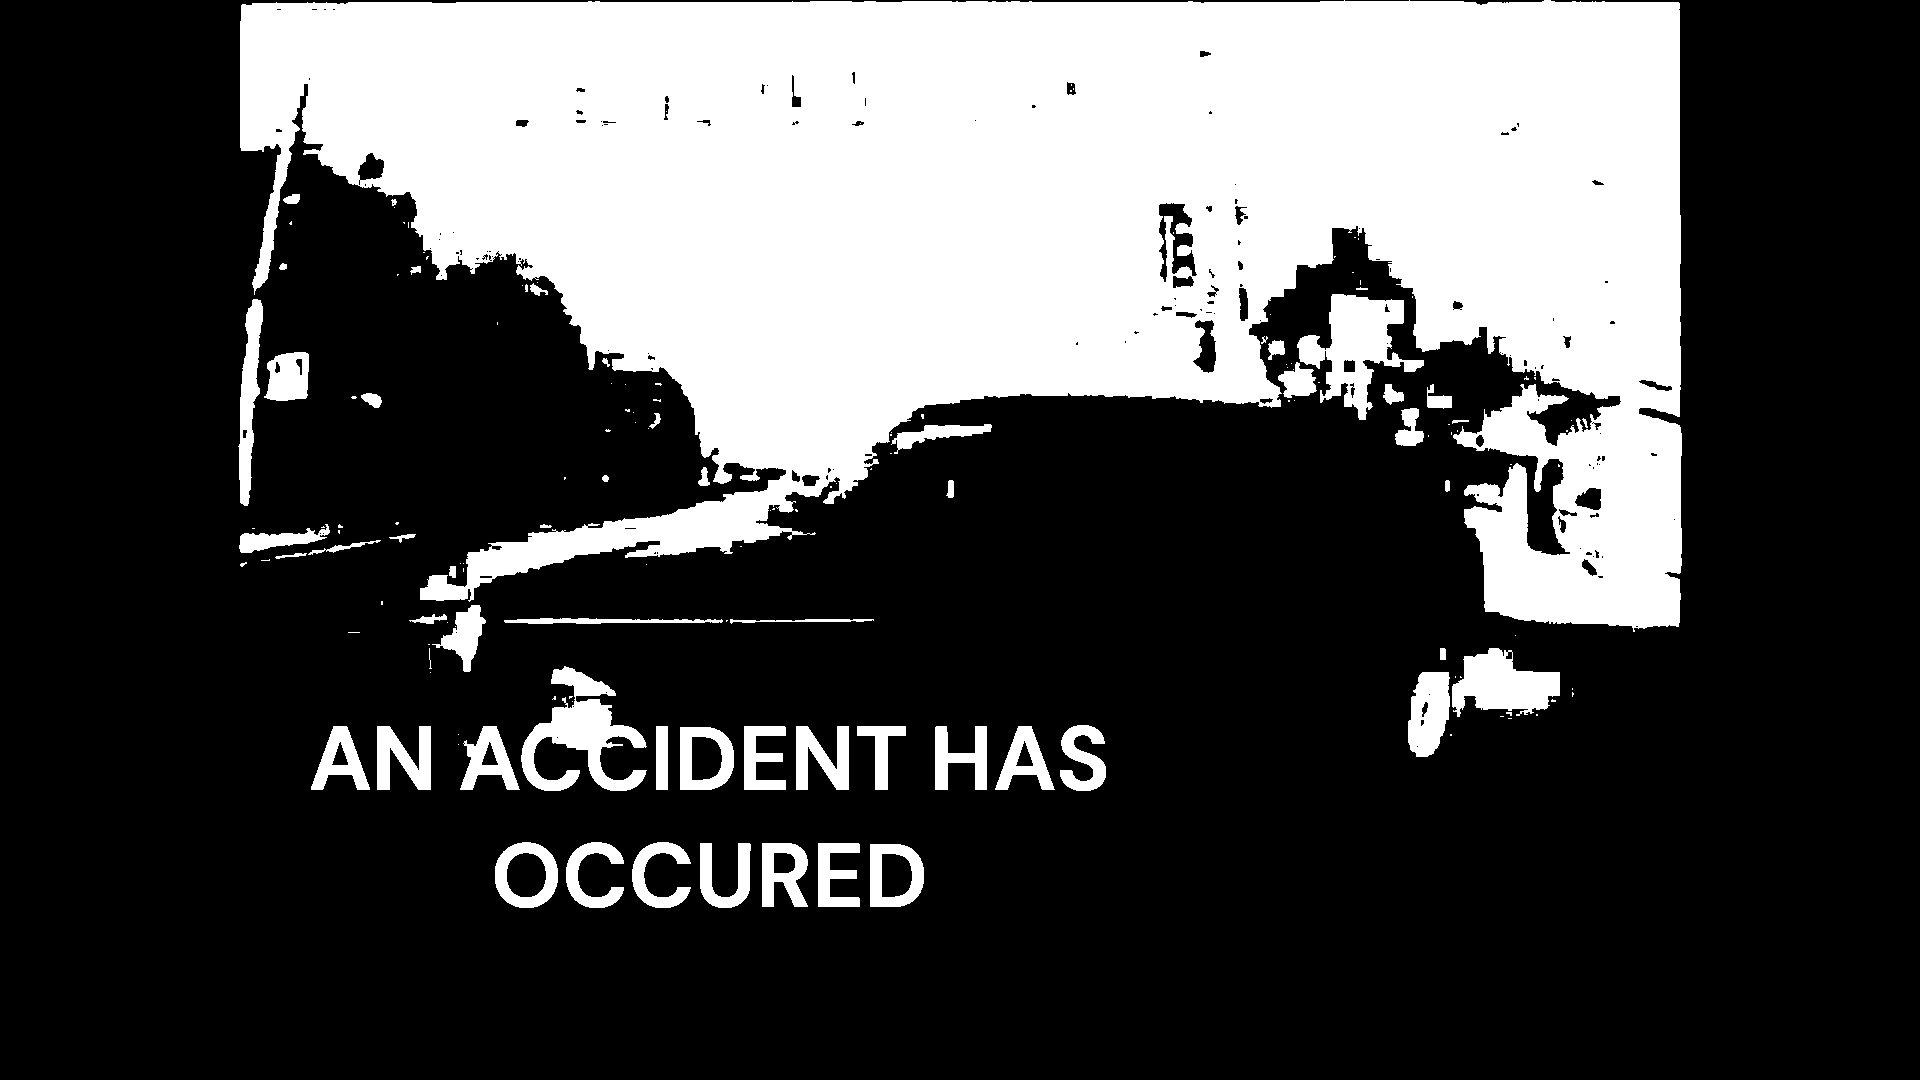

Processed Text:    

—_—_
AN OY. et, HAS
OCCURED

Prediction: [0]


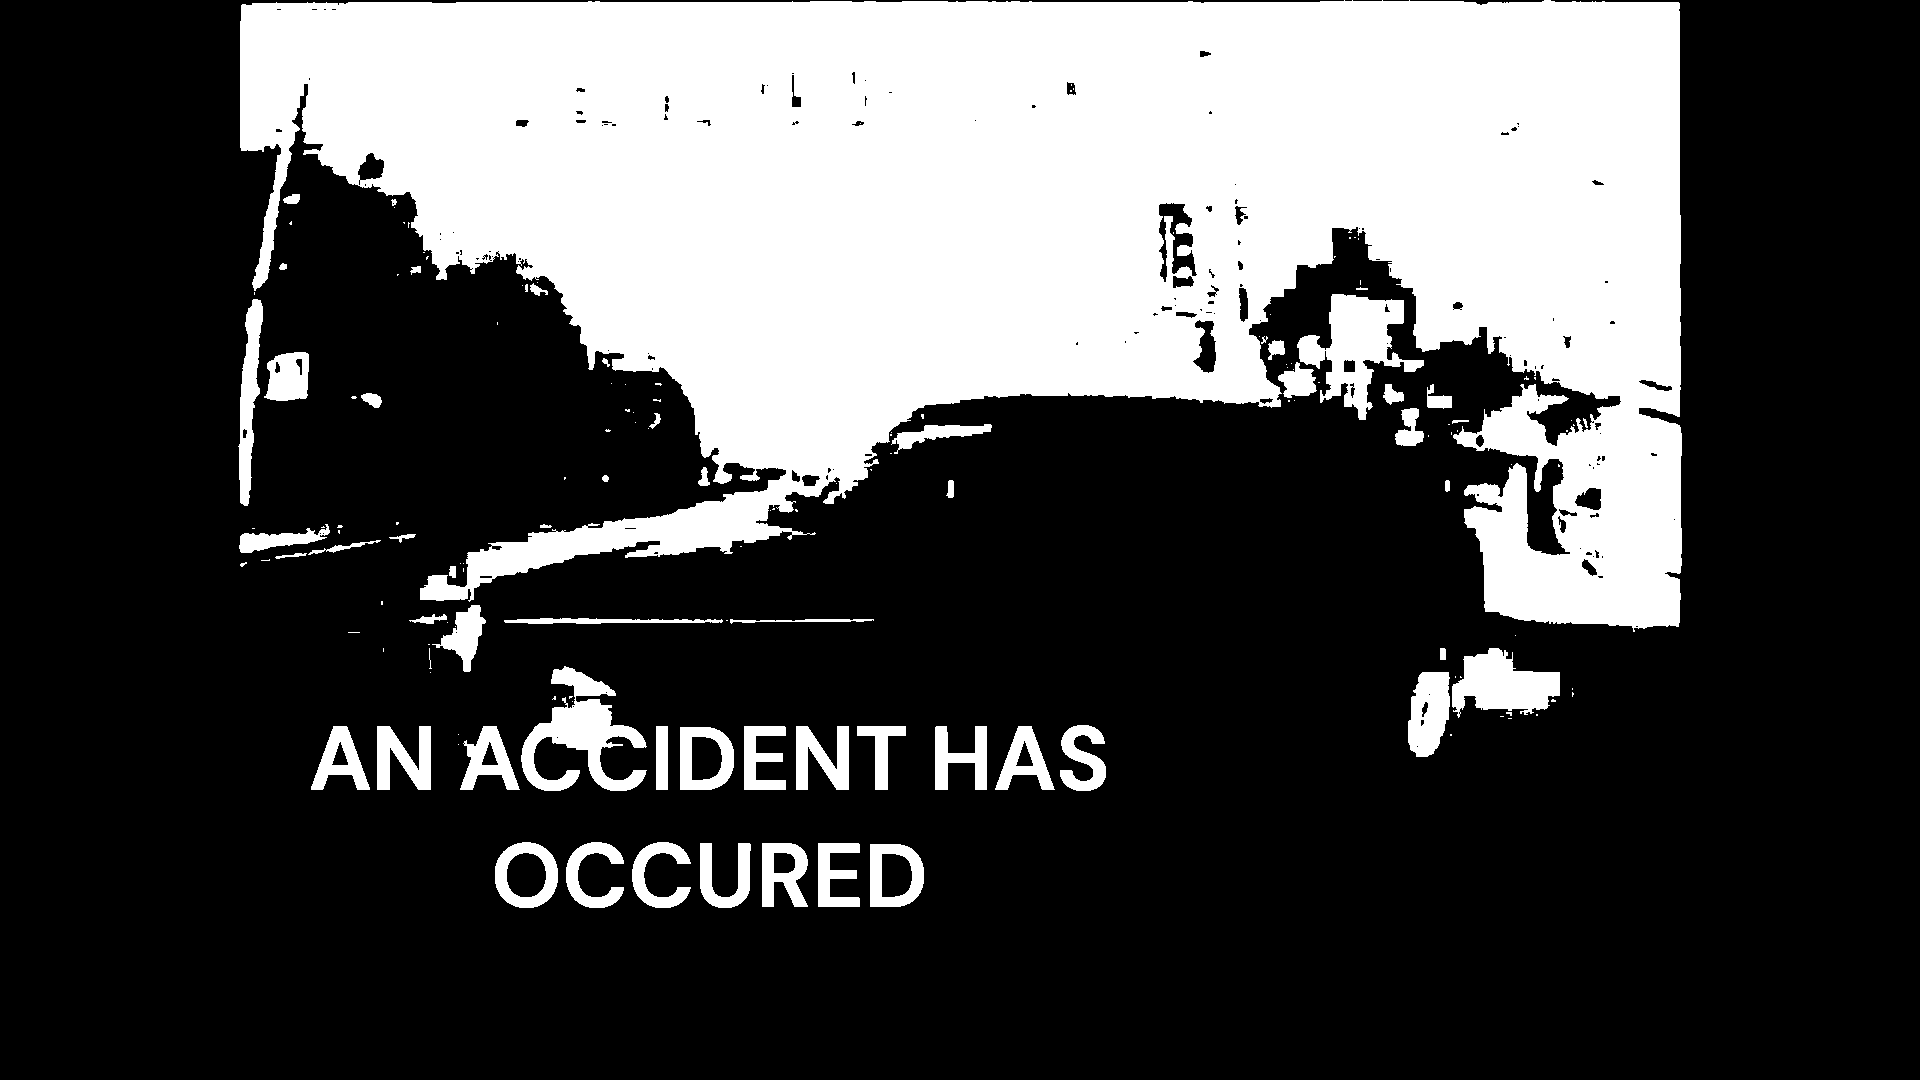

Processed Text:    

OCCURED

Prediction: [0]


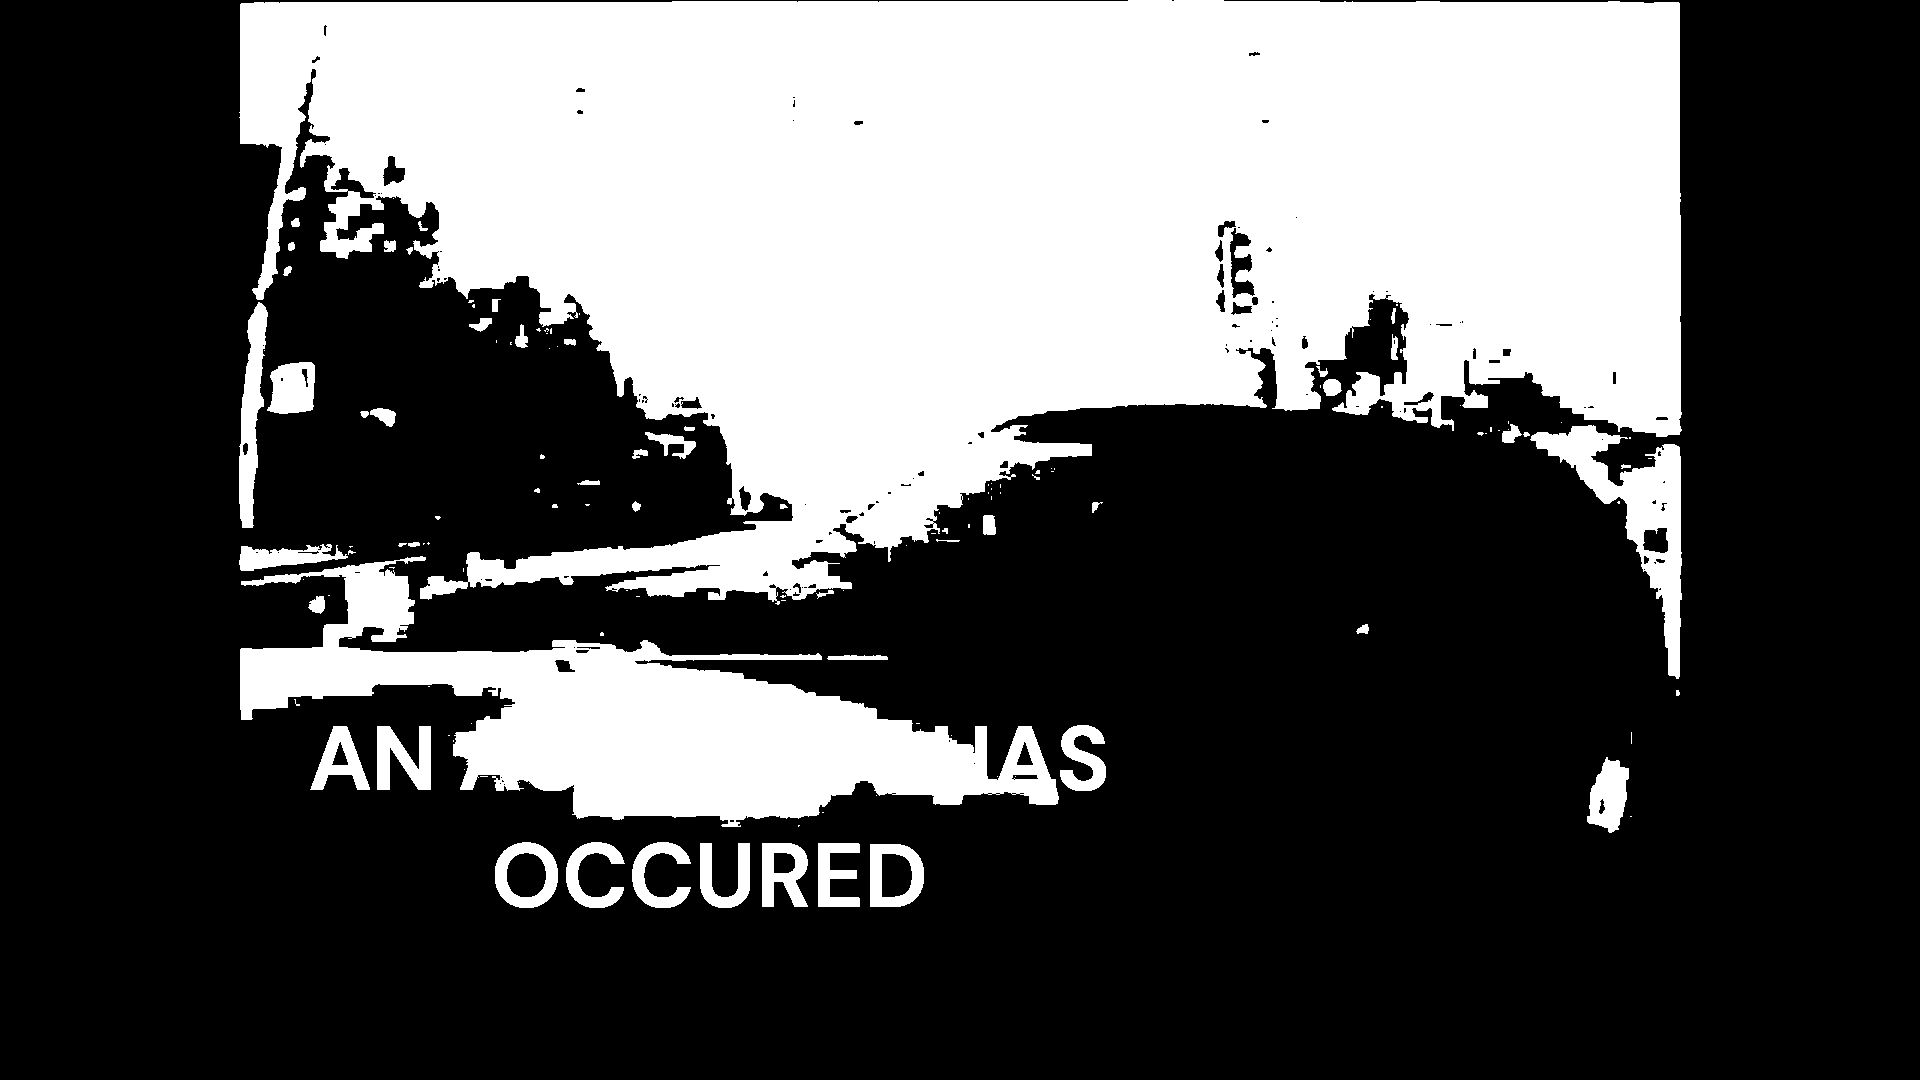

Processed Text:    

OCCURED

Prediction: [0]


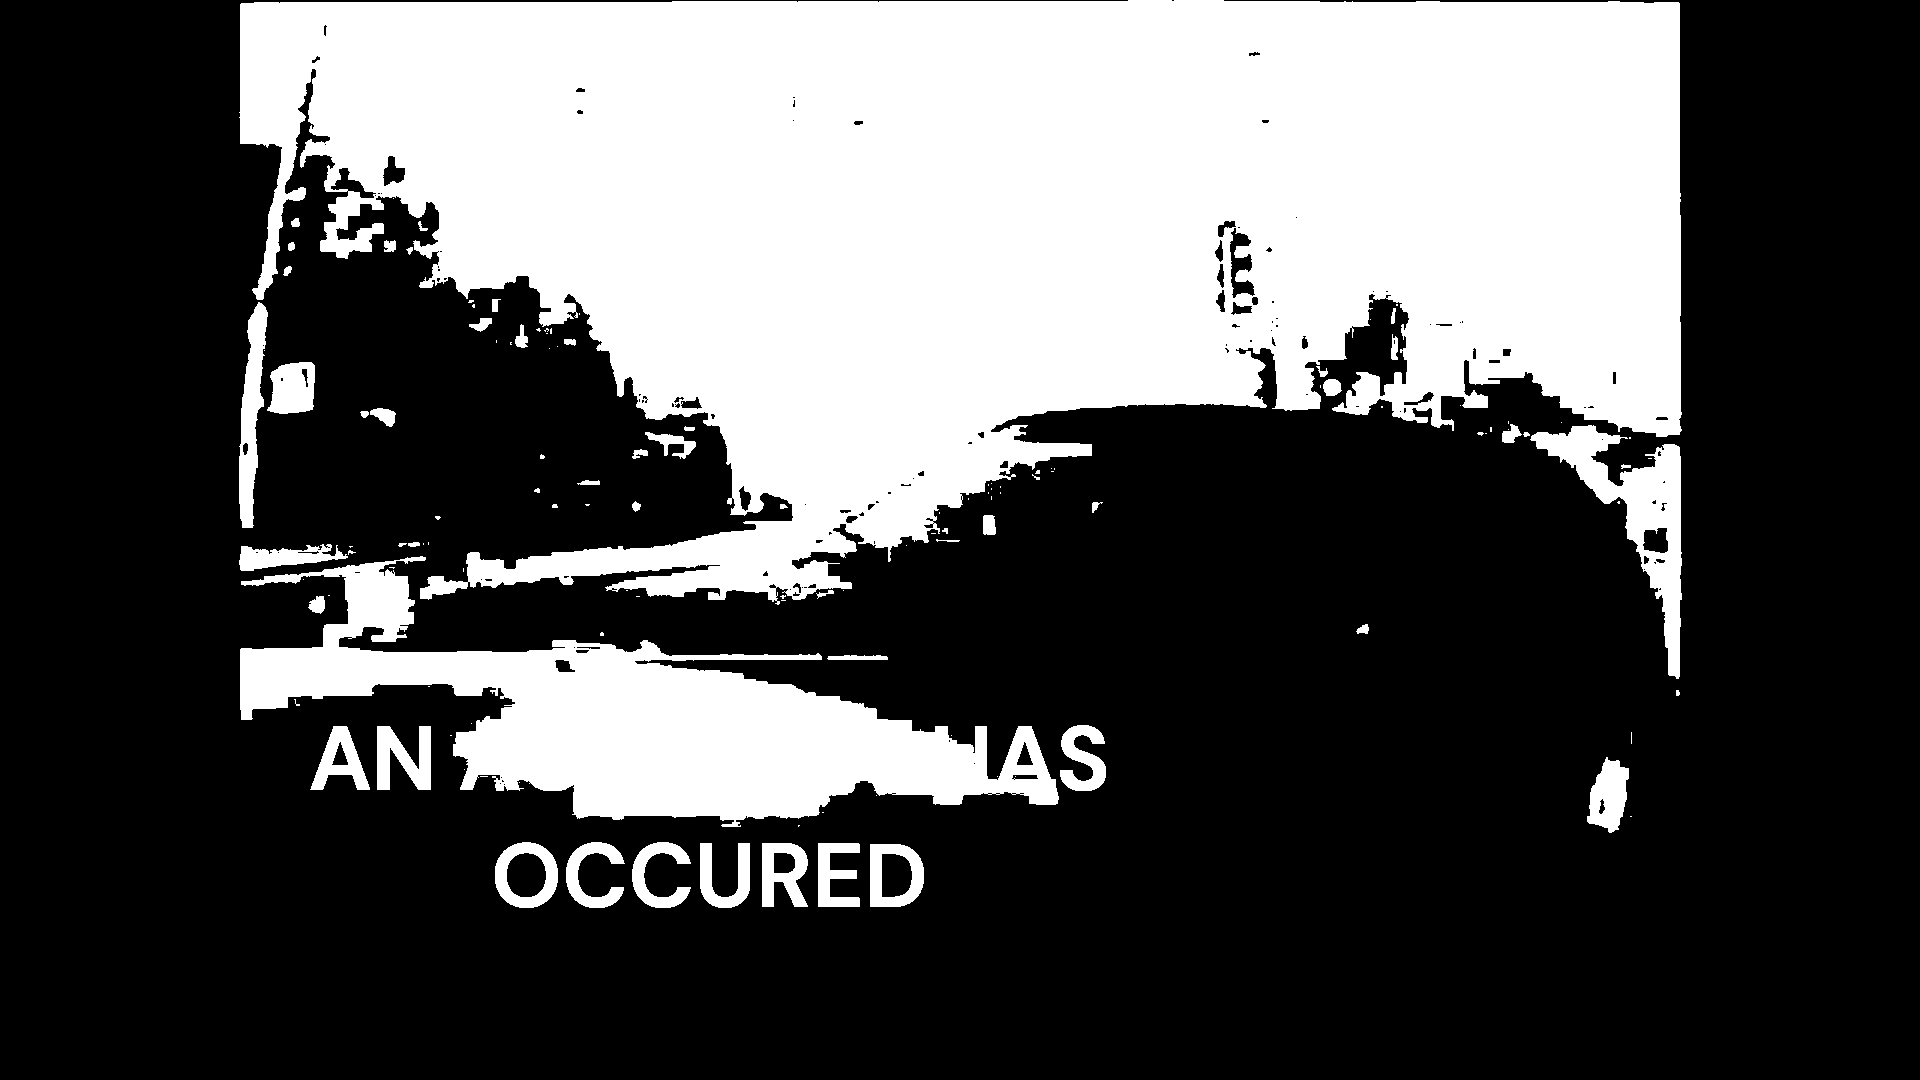

Processed Text:    

OCCURED

Prediction: [0]


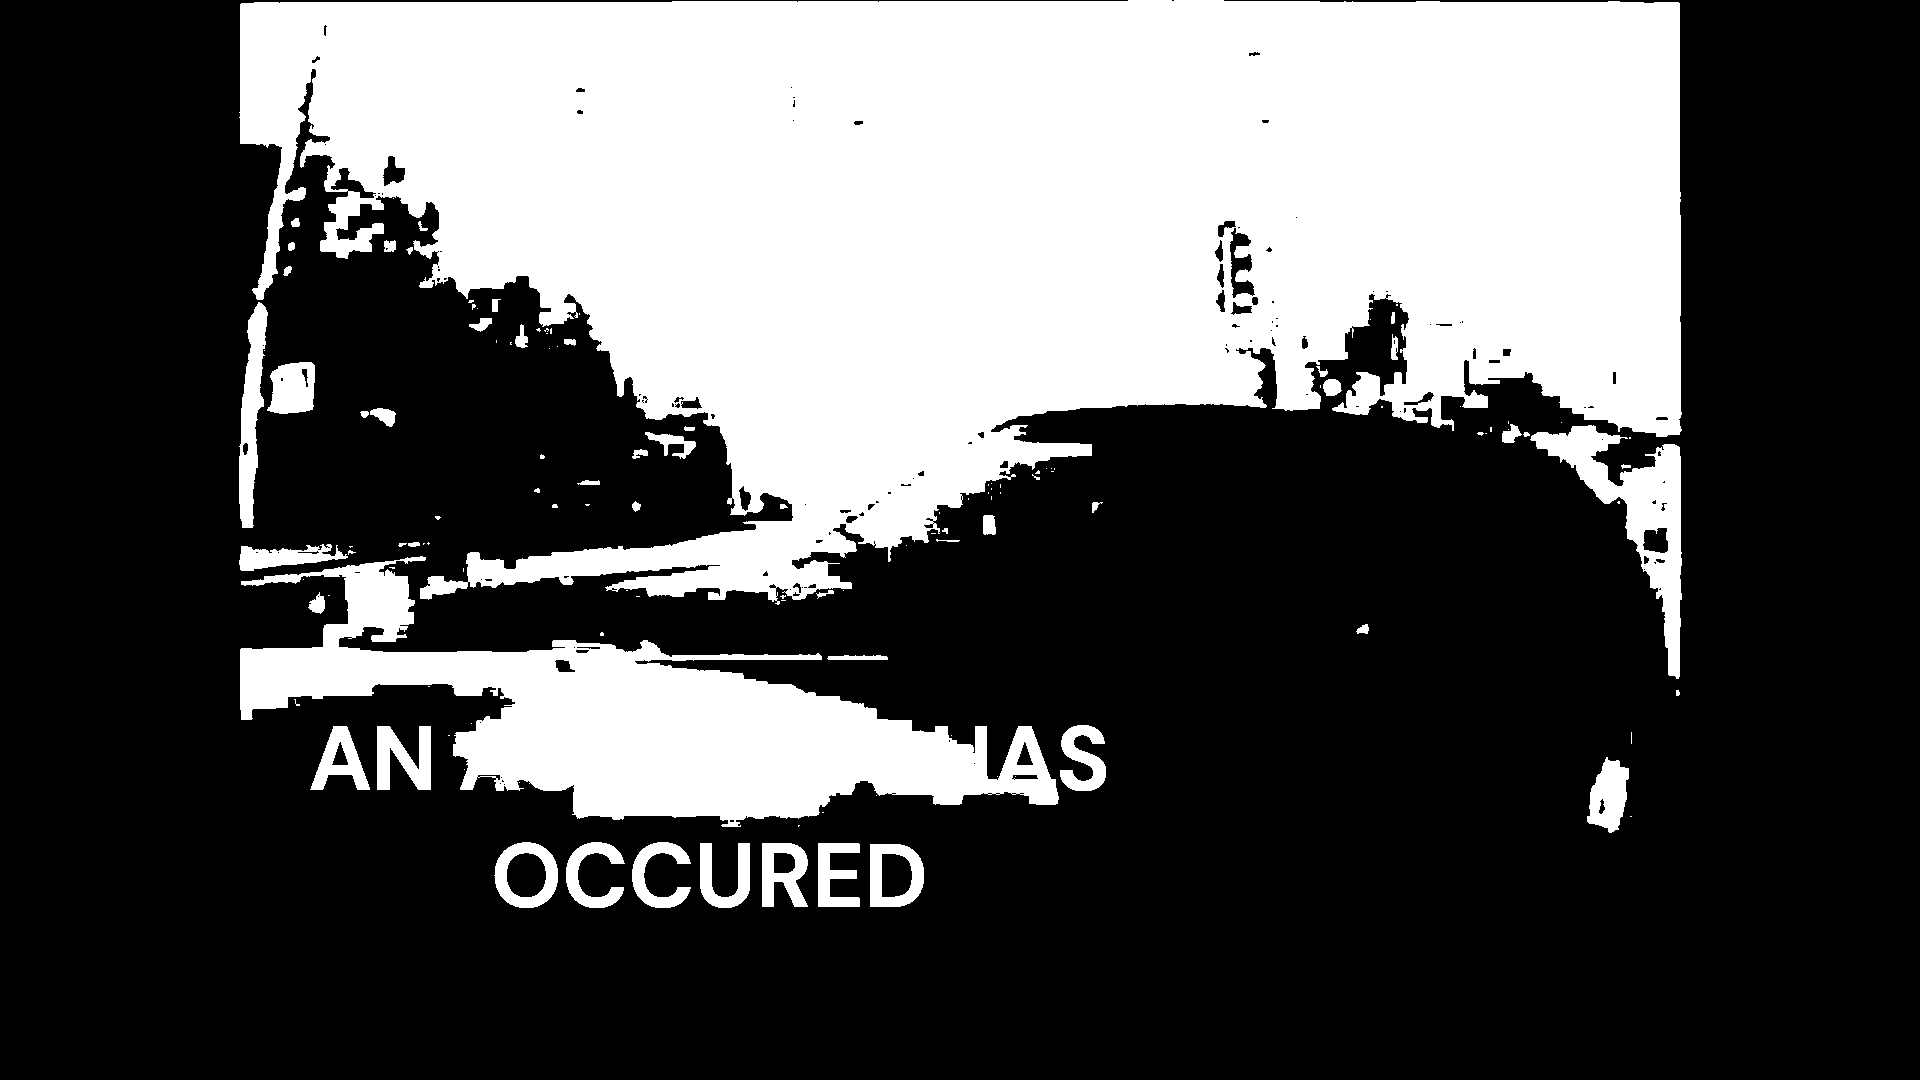

Processed Text:  

Prediction: [0]


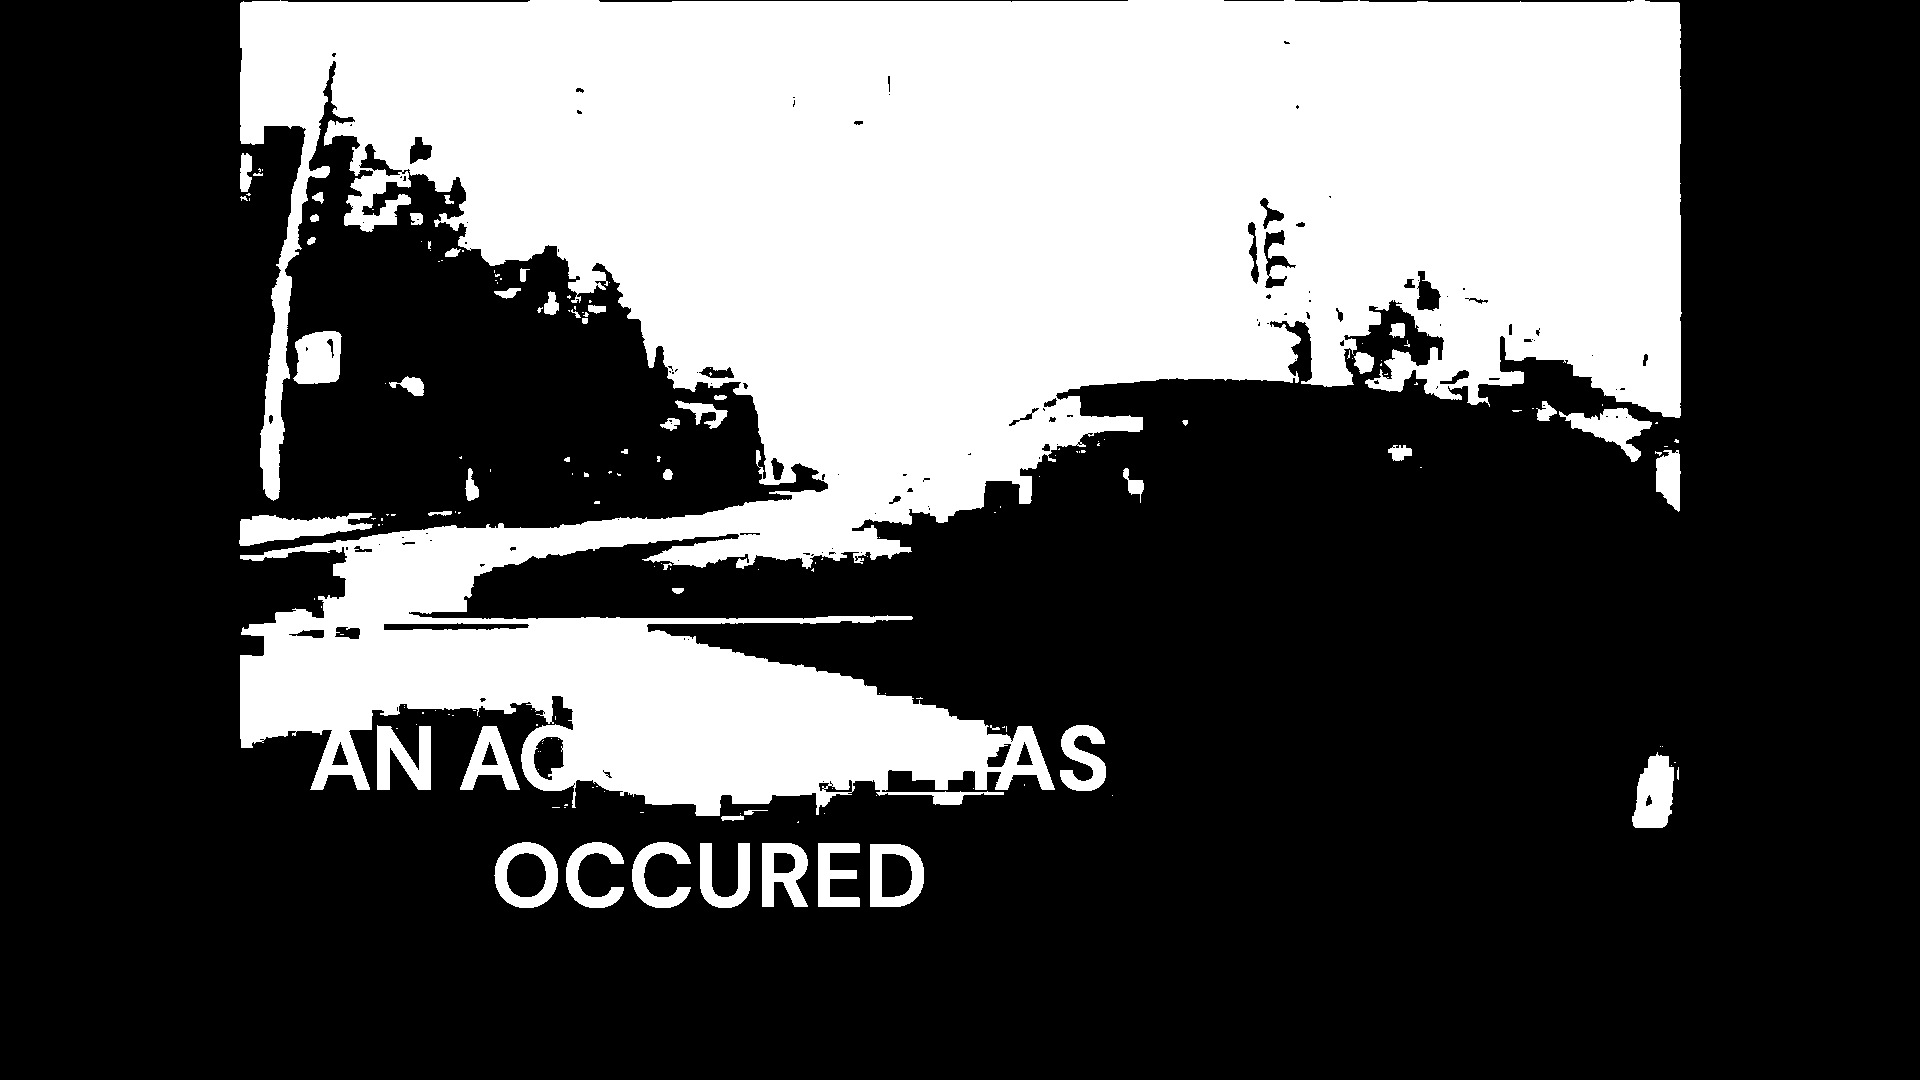

Processed Text:  

Prediction: [0]


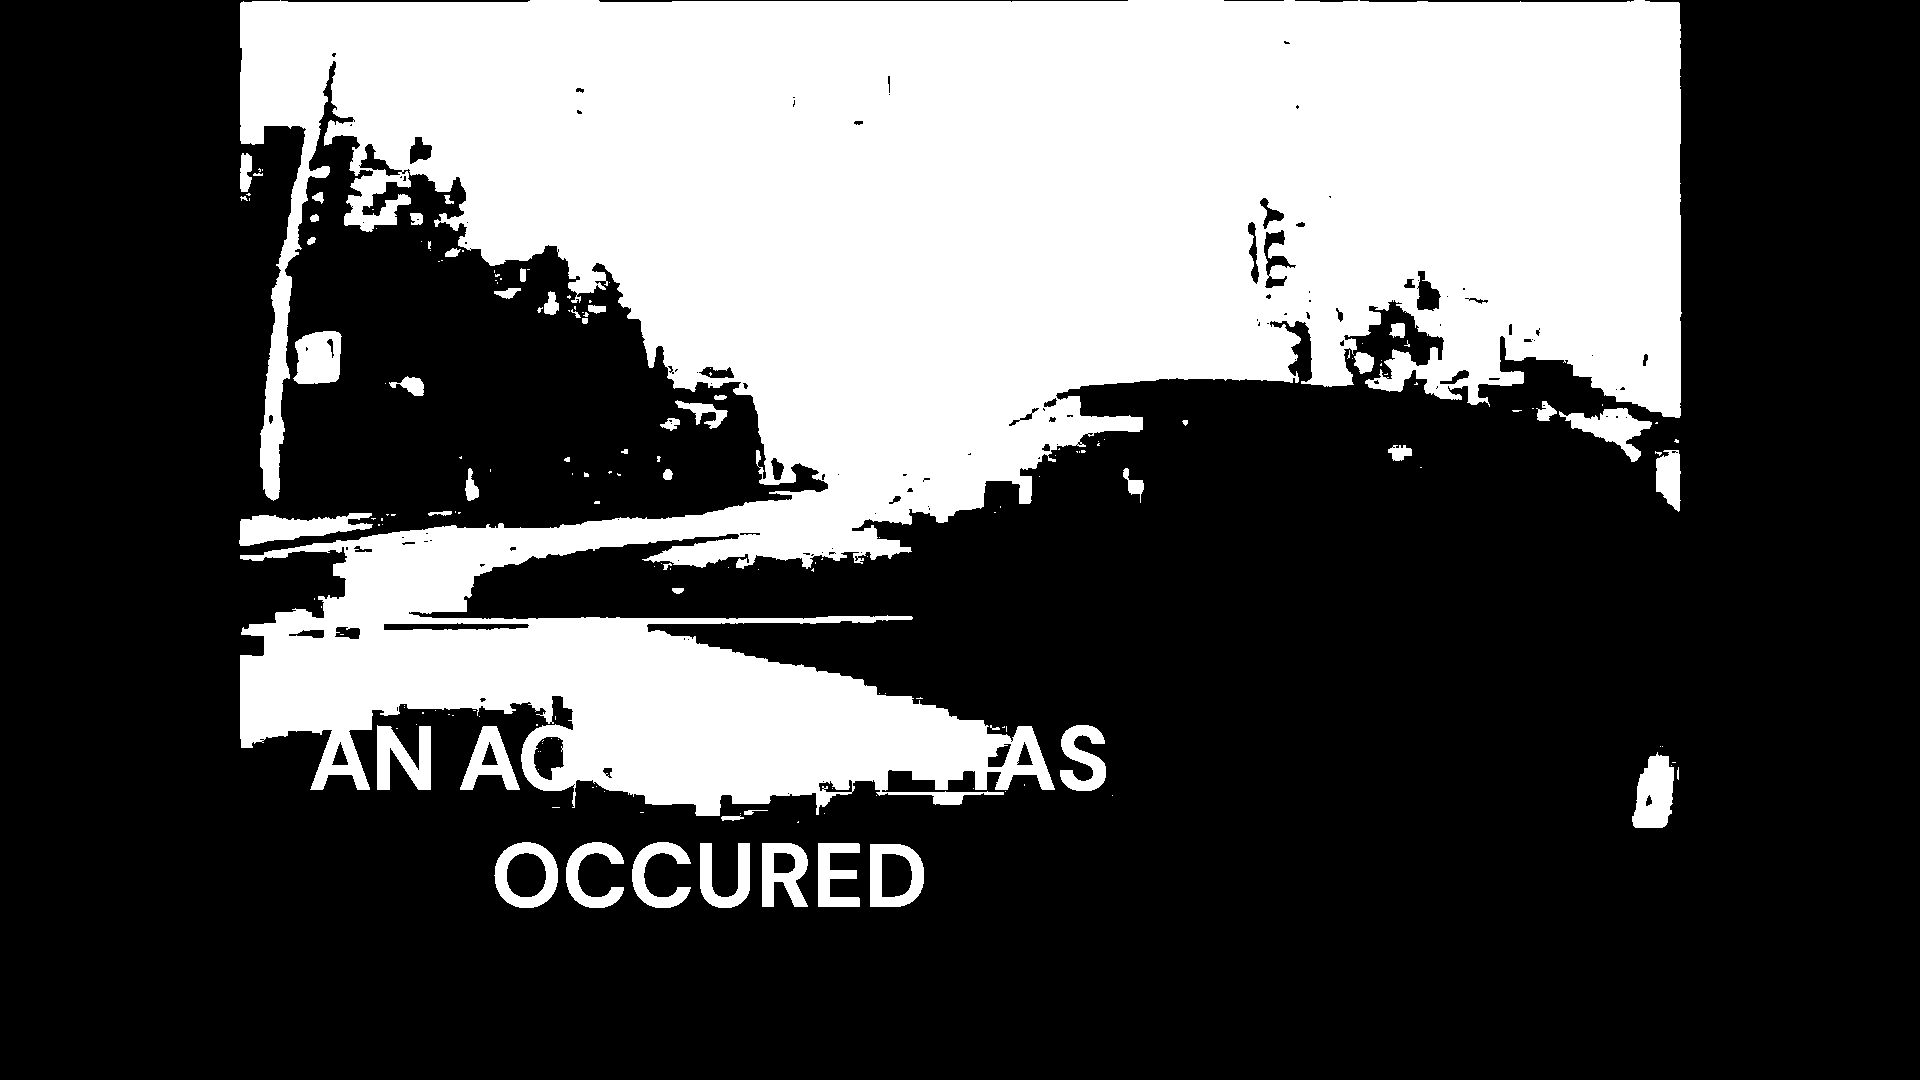

Processed Text:  

Prediction: [0]


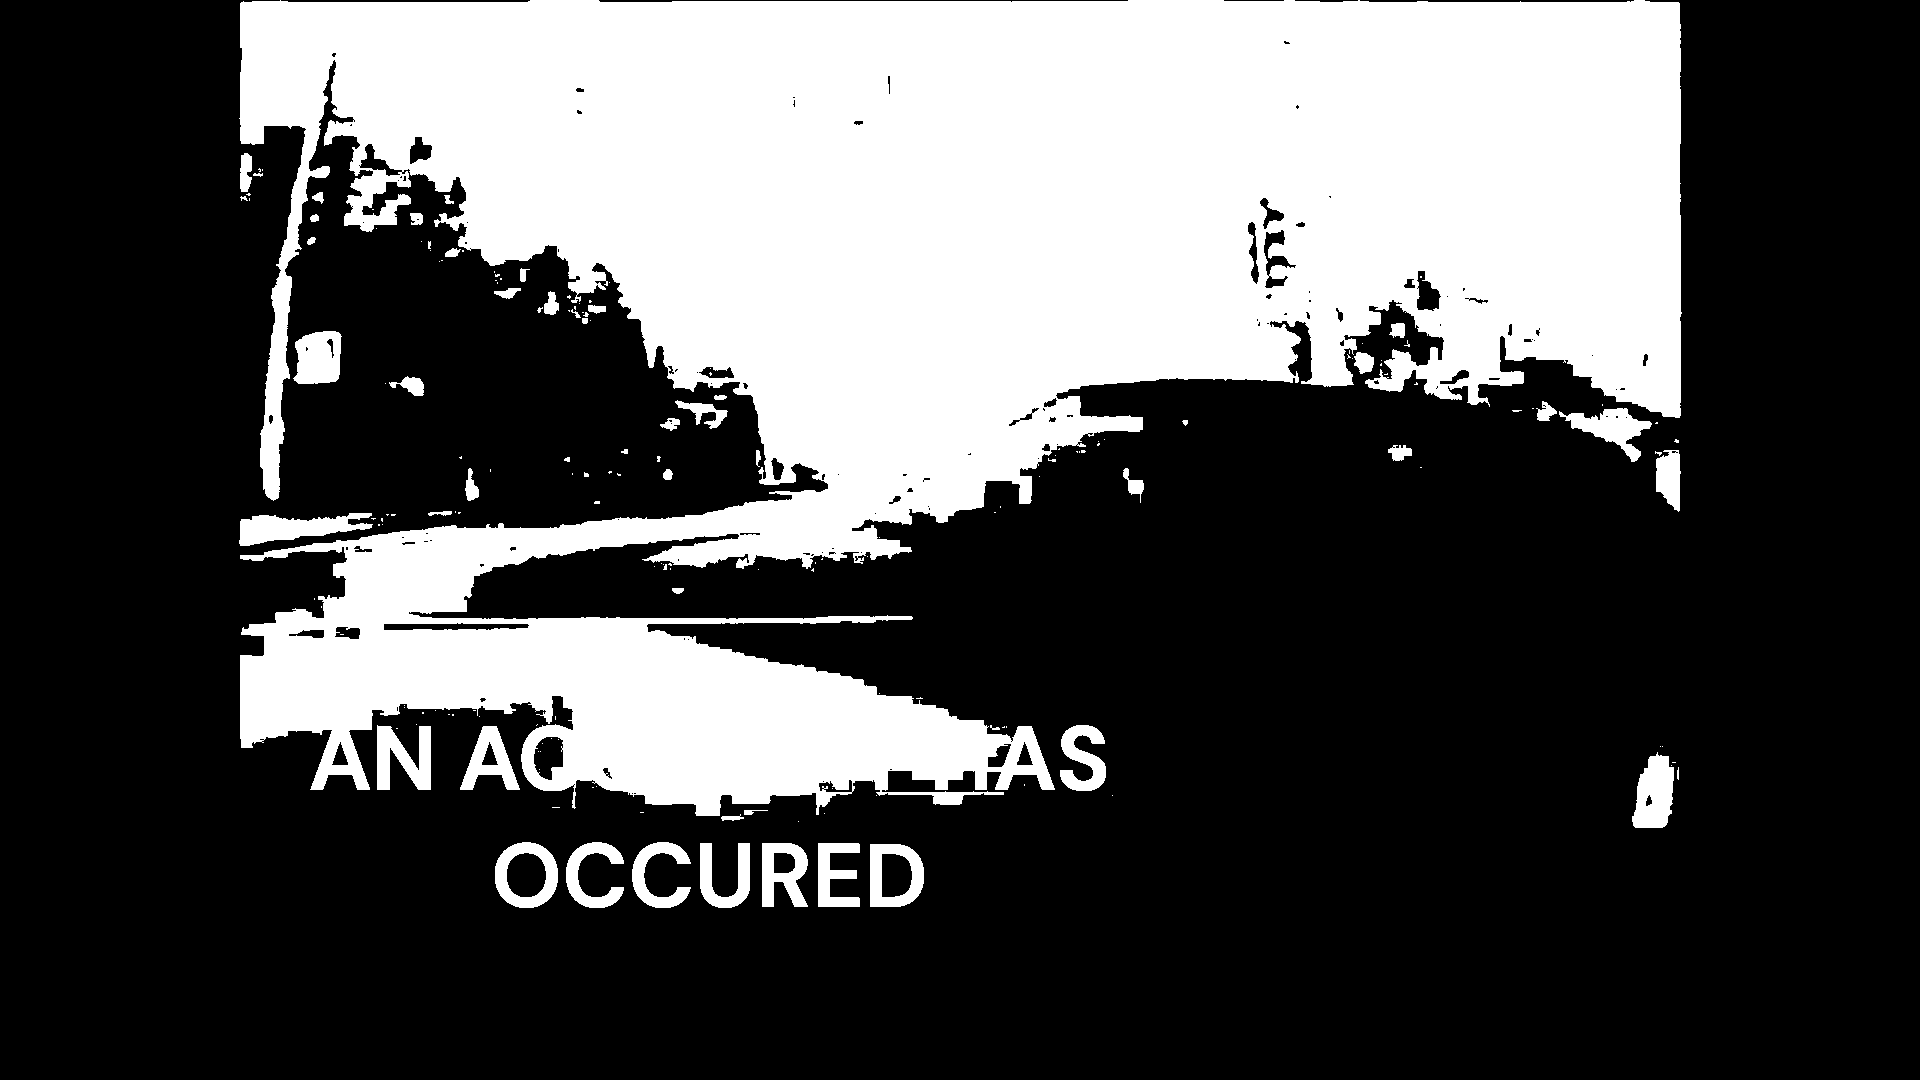

Processed Text:    

OCCURED

Prediction: [0]


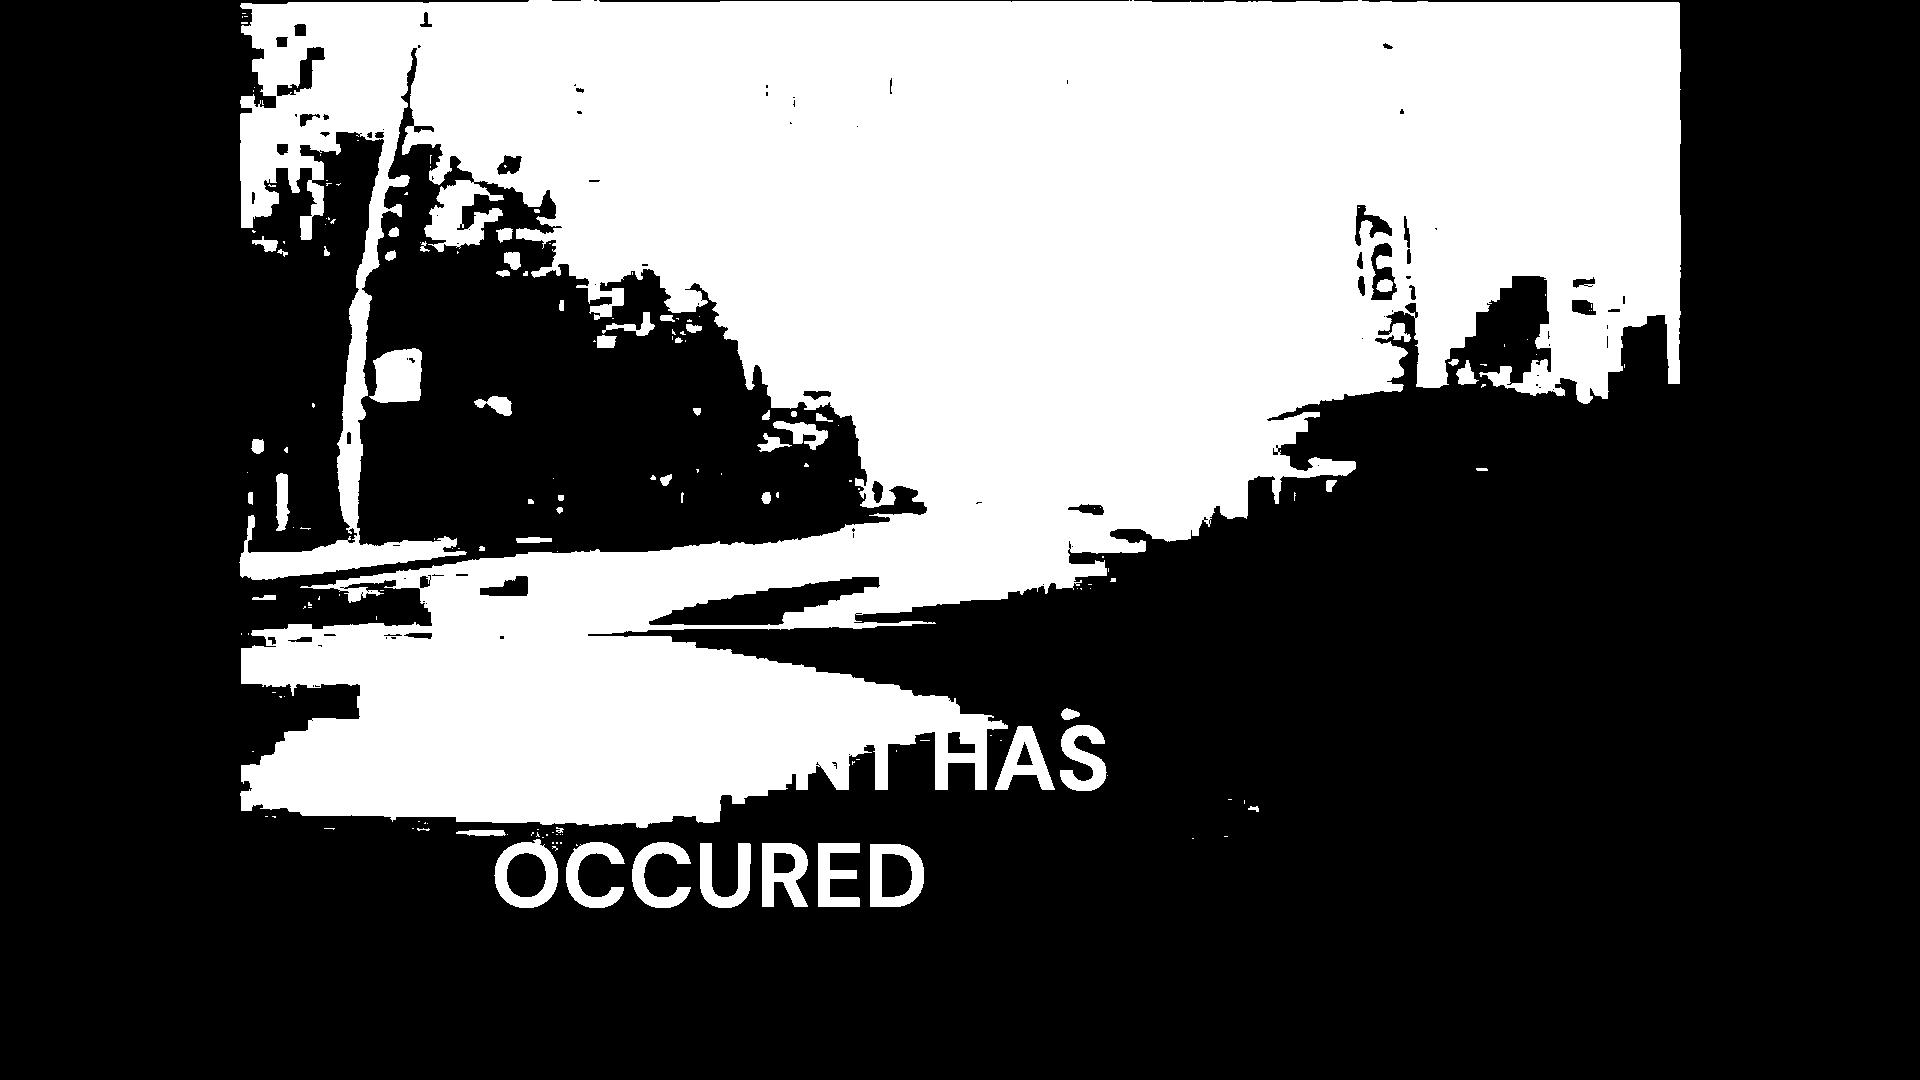

Processed Text:    

OCCURED

Prediction: [0]


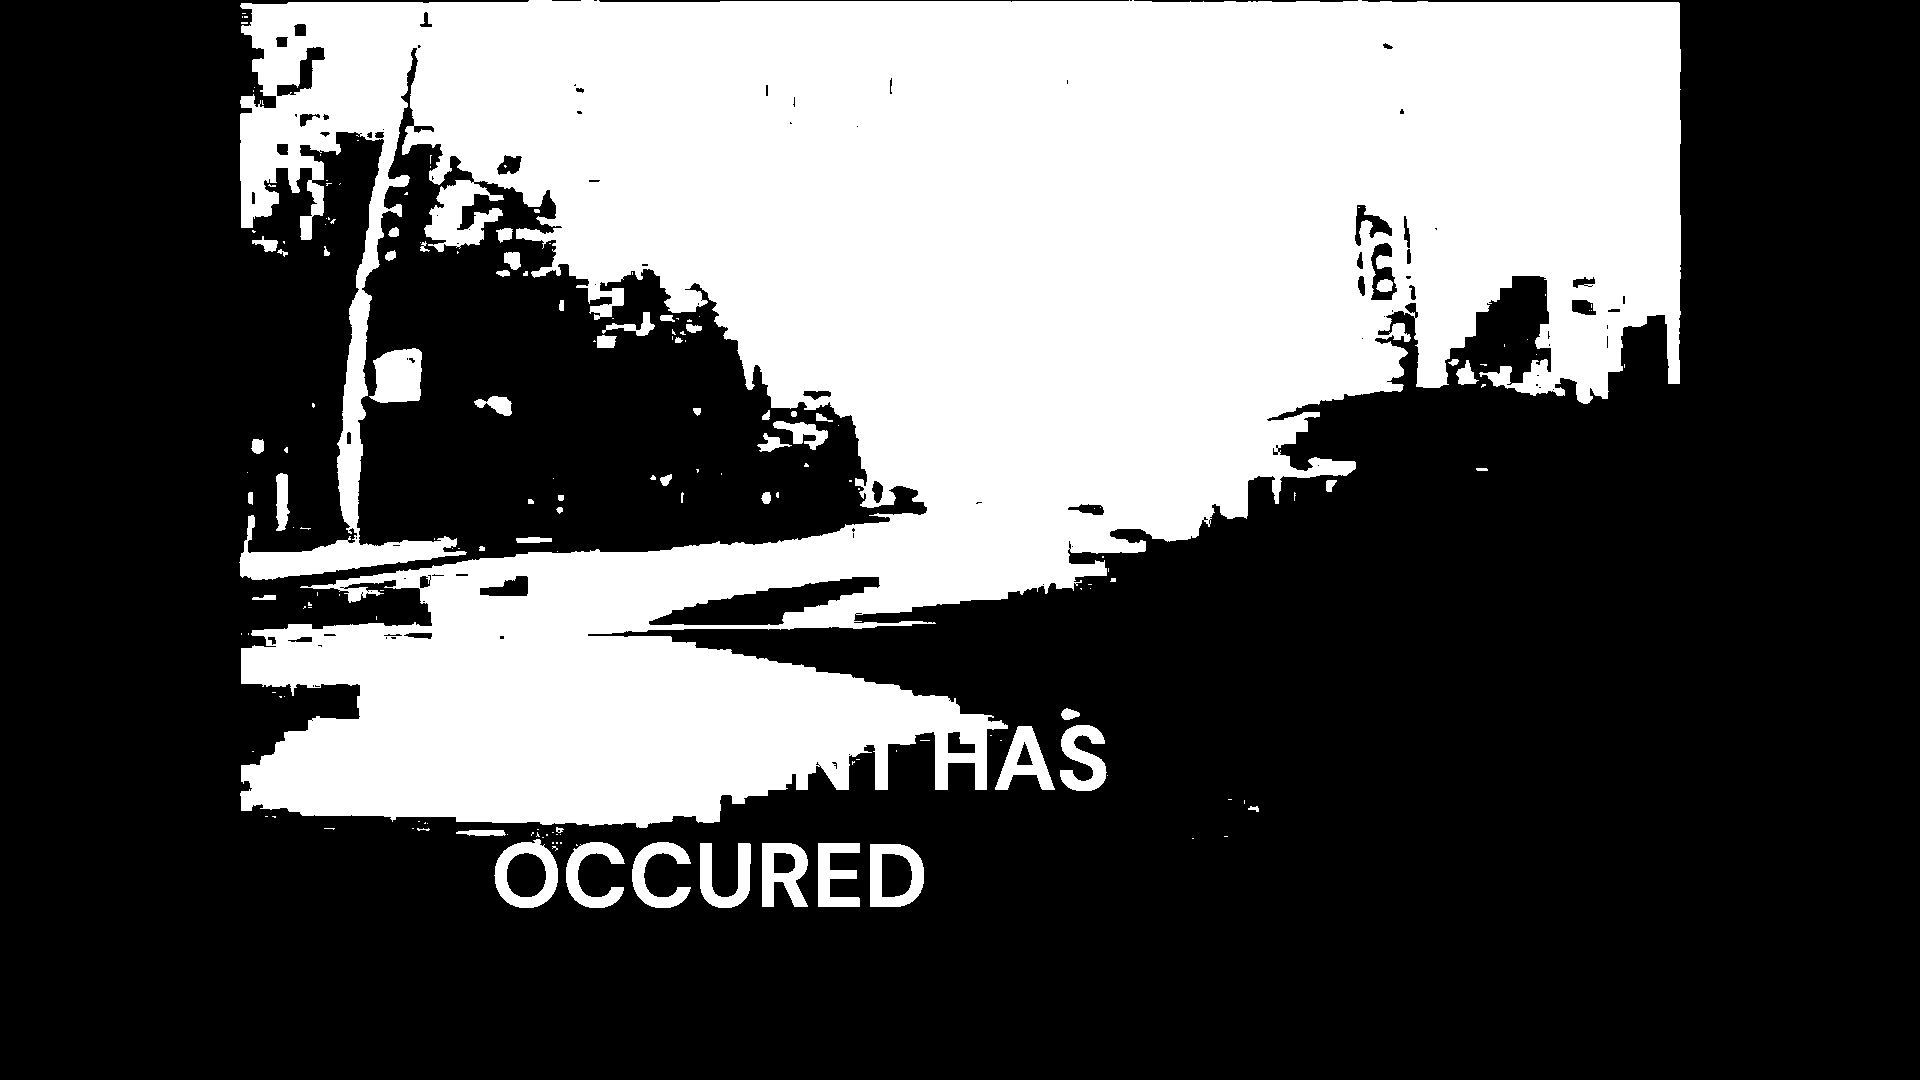

Processed Text:    

OCCURED

Prediction: [0]


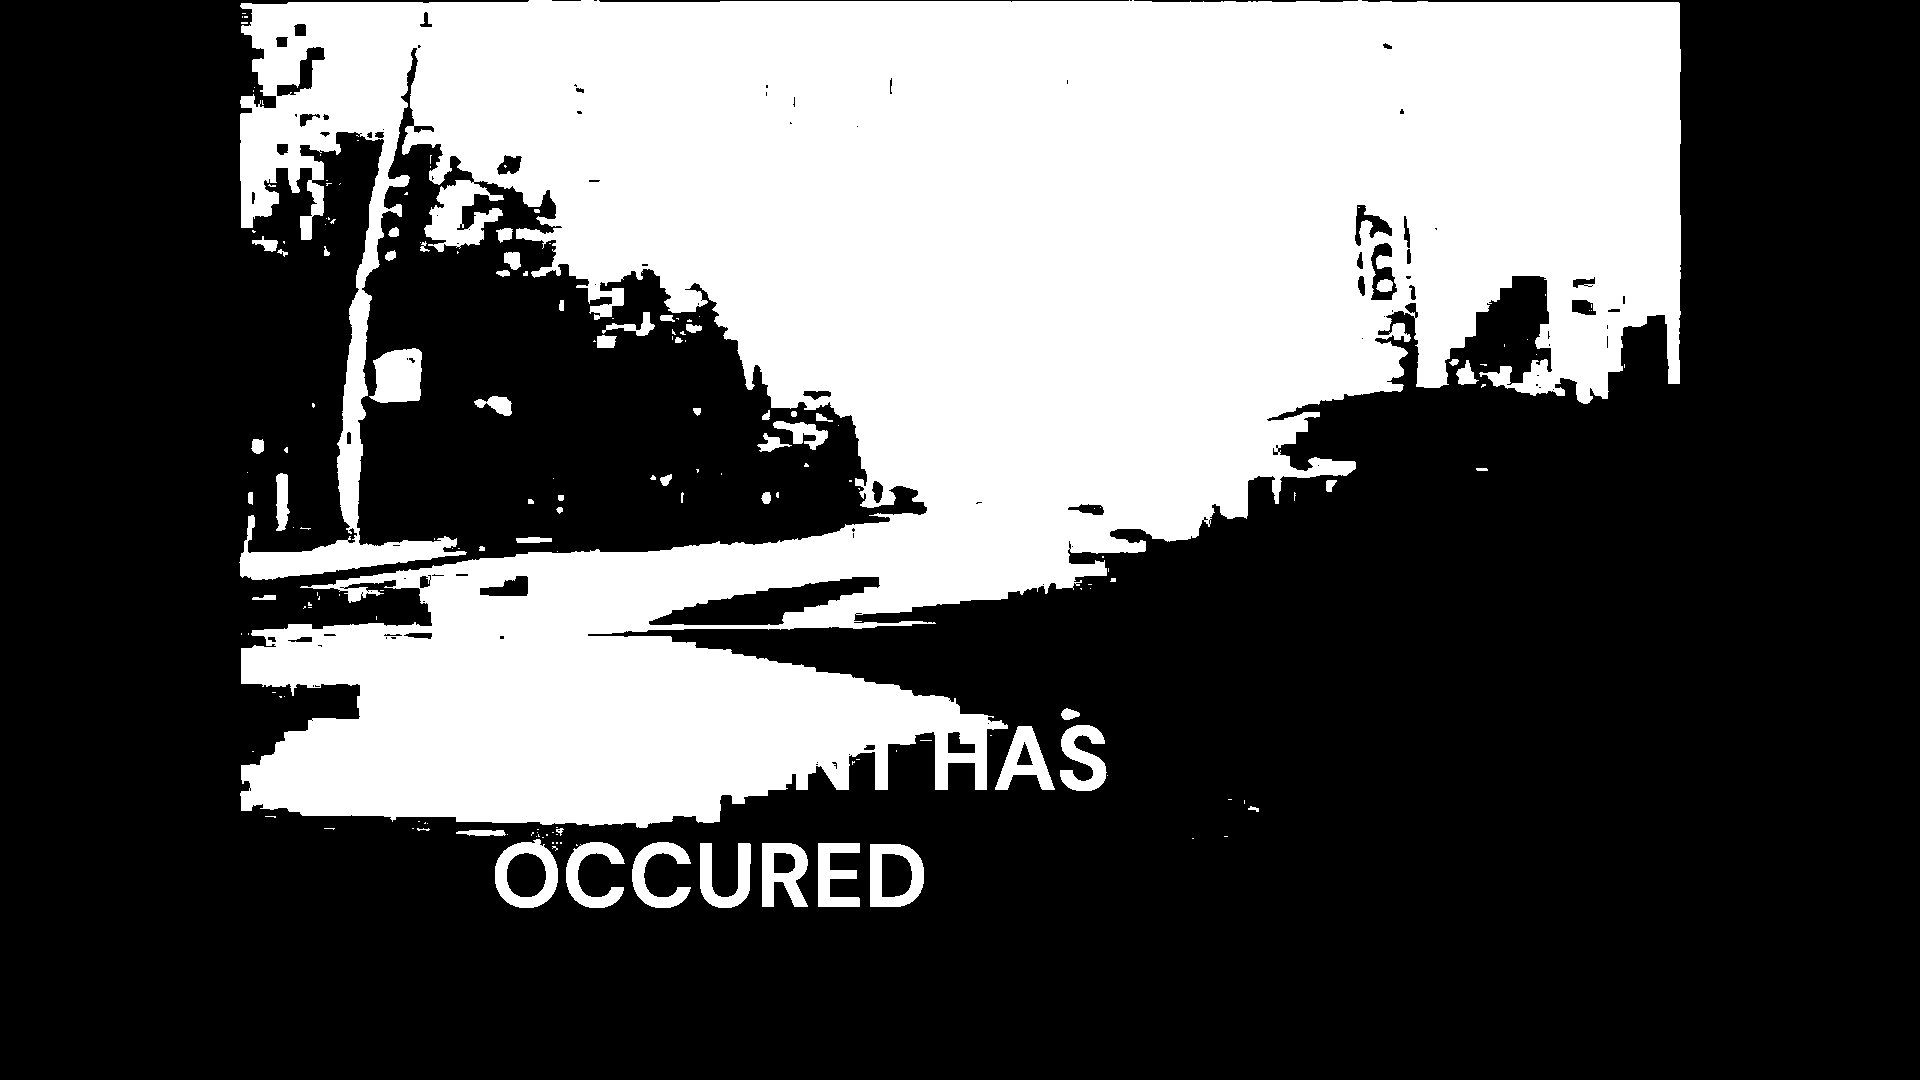

Processed Text:  

Prediction: [0]


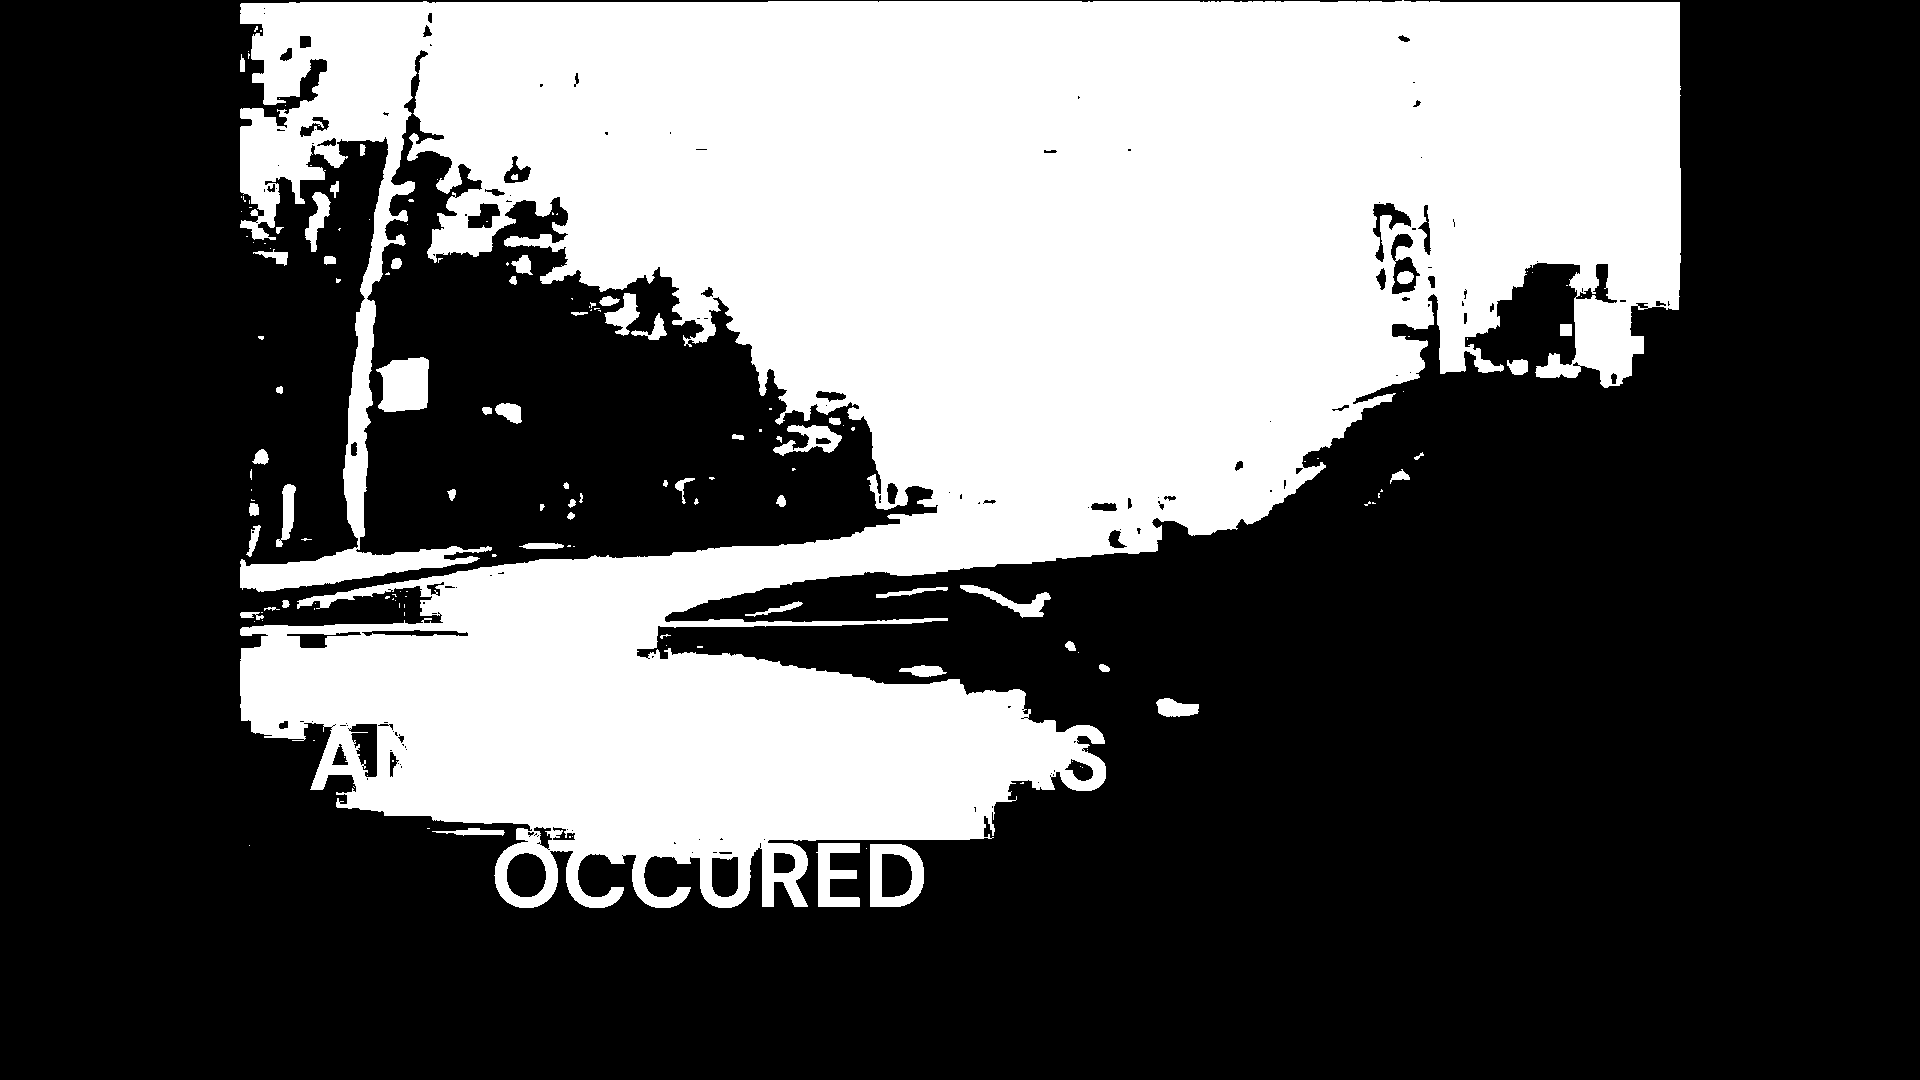

Processed Text:  

Prediction: [0]


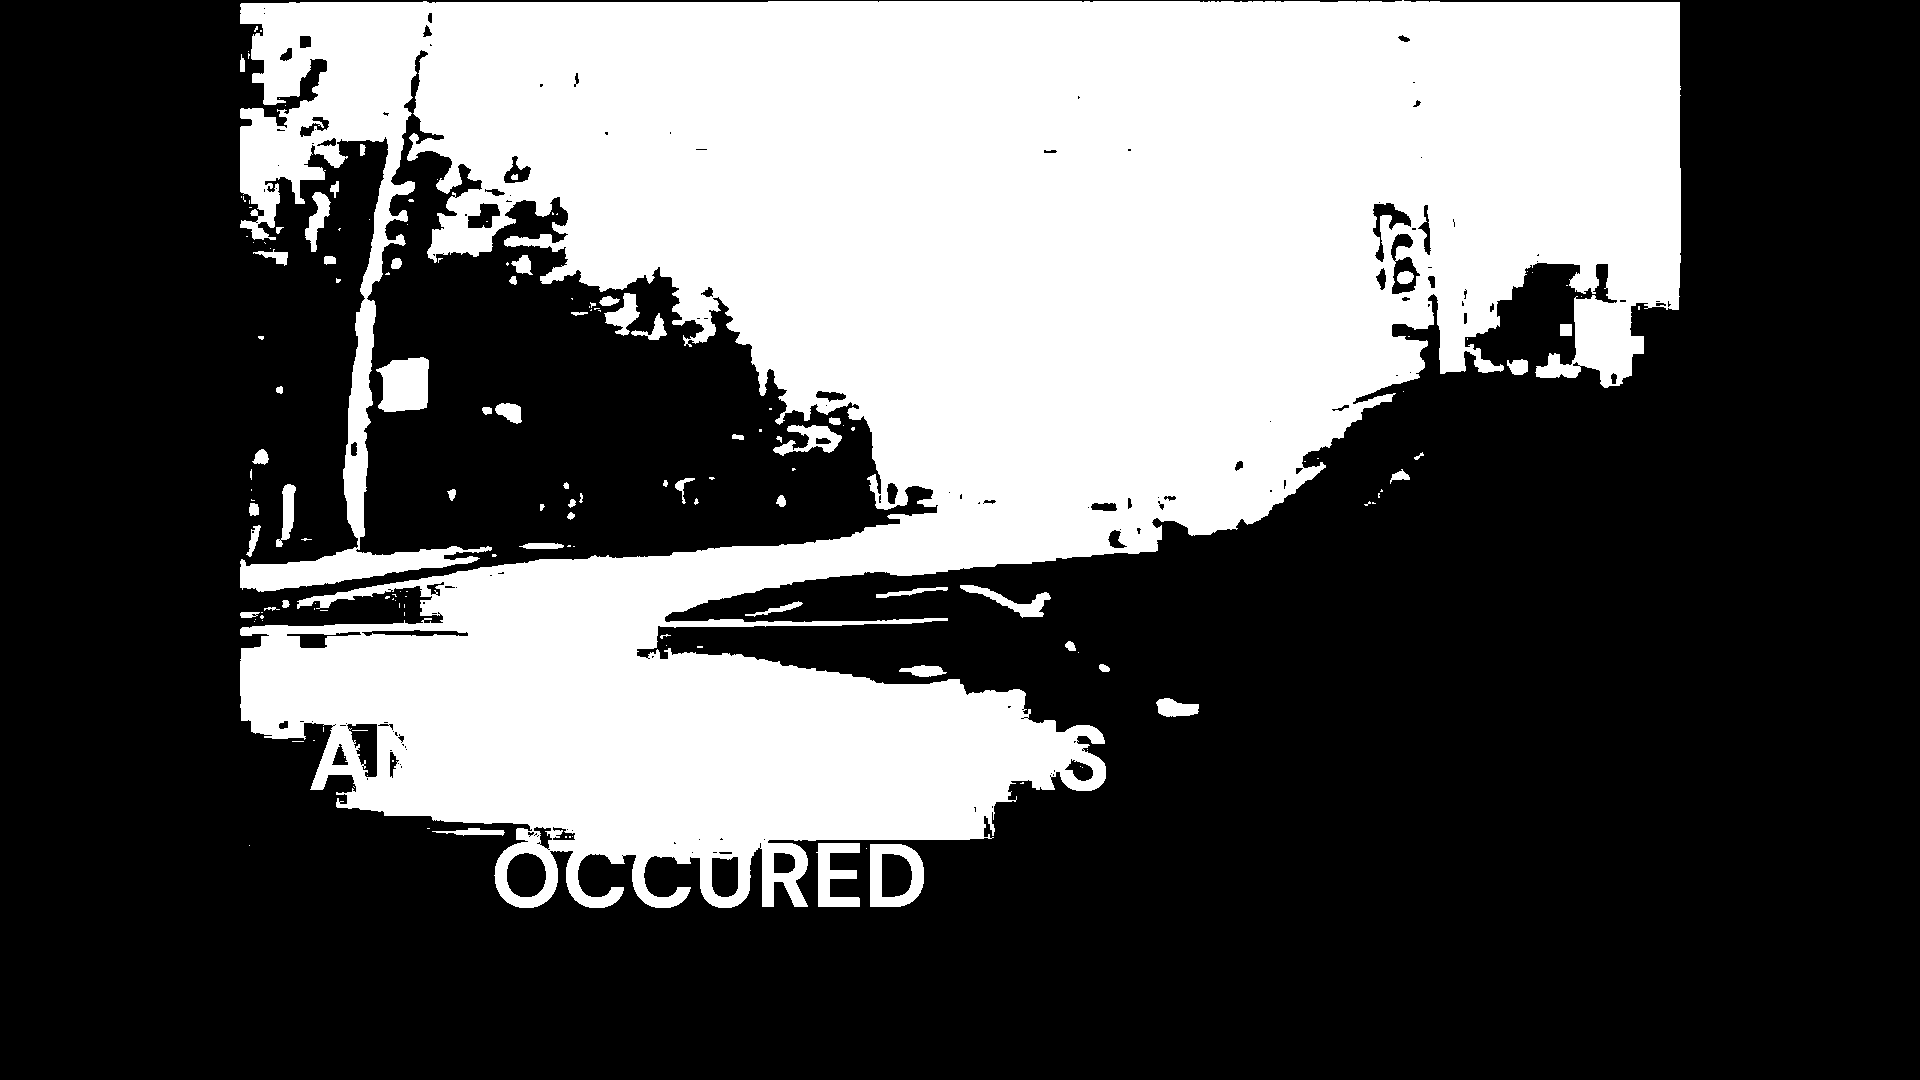

Processed Text:  

Prediction: [0]


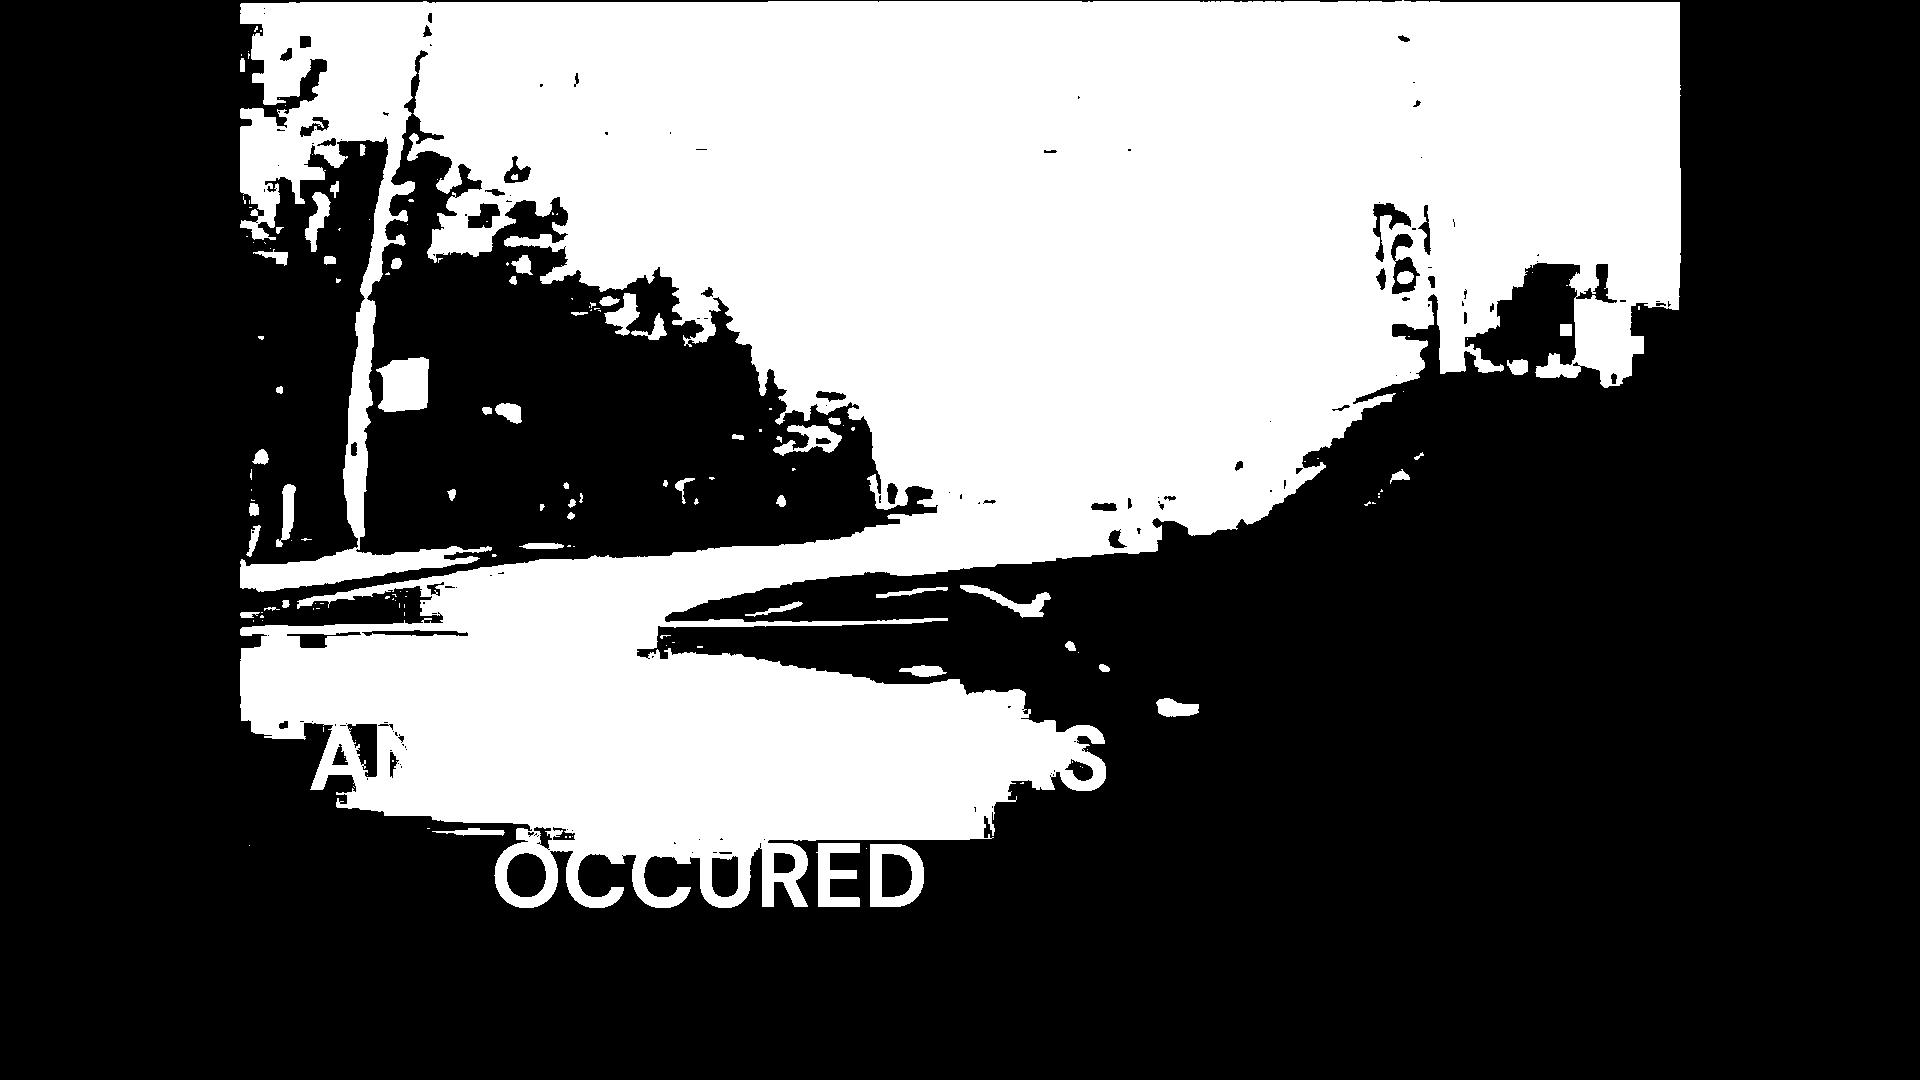

Processed Text:  

Prediction: [0]


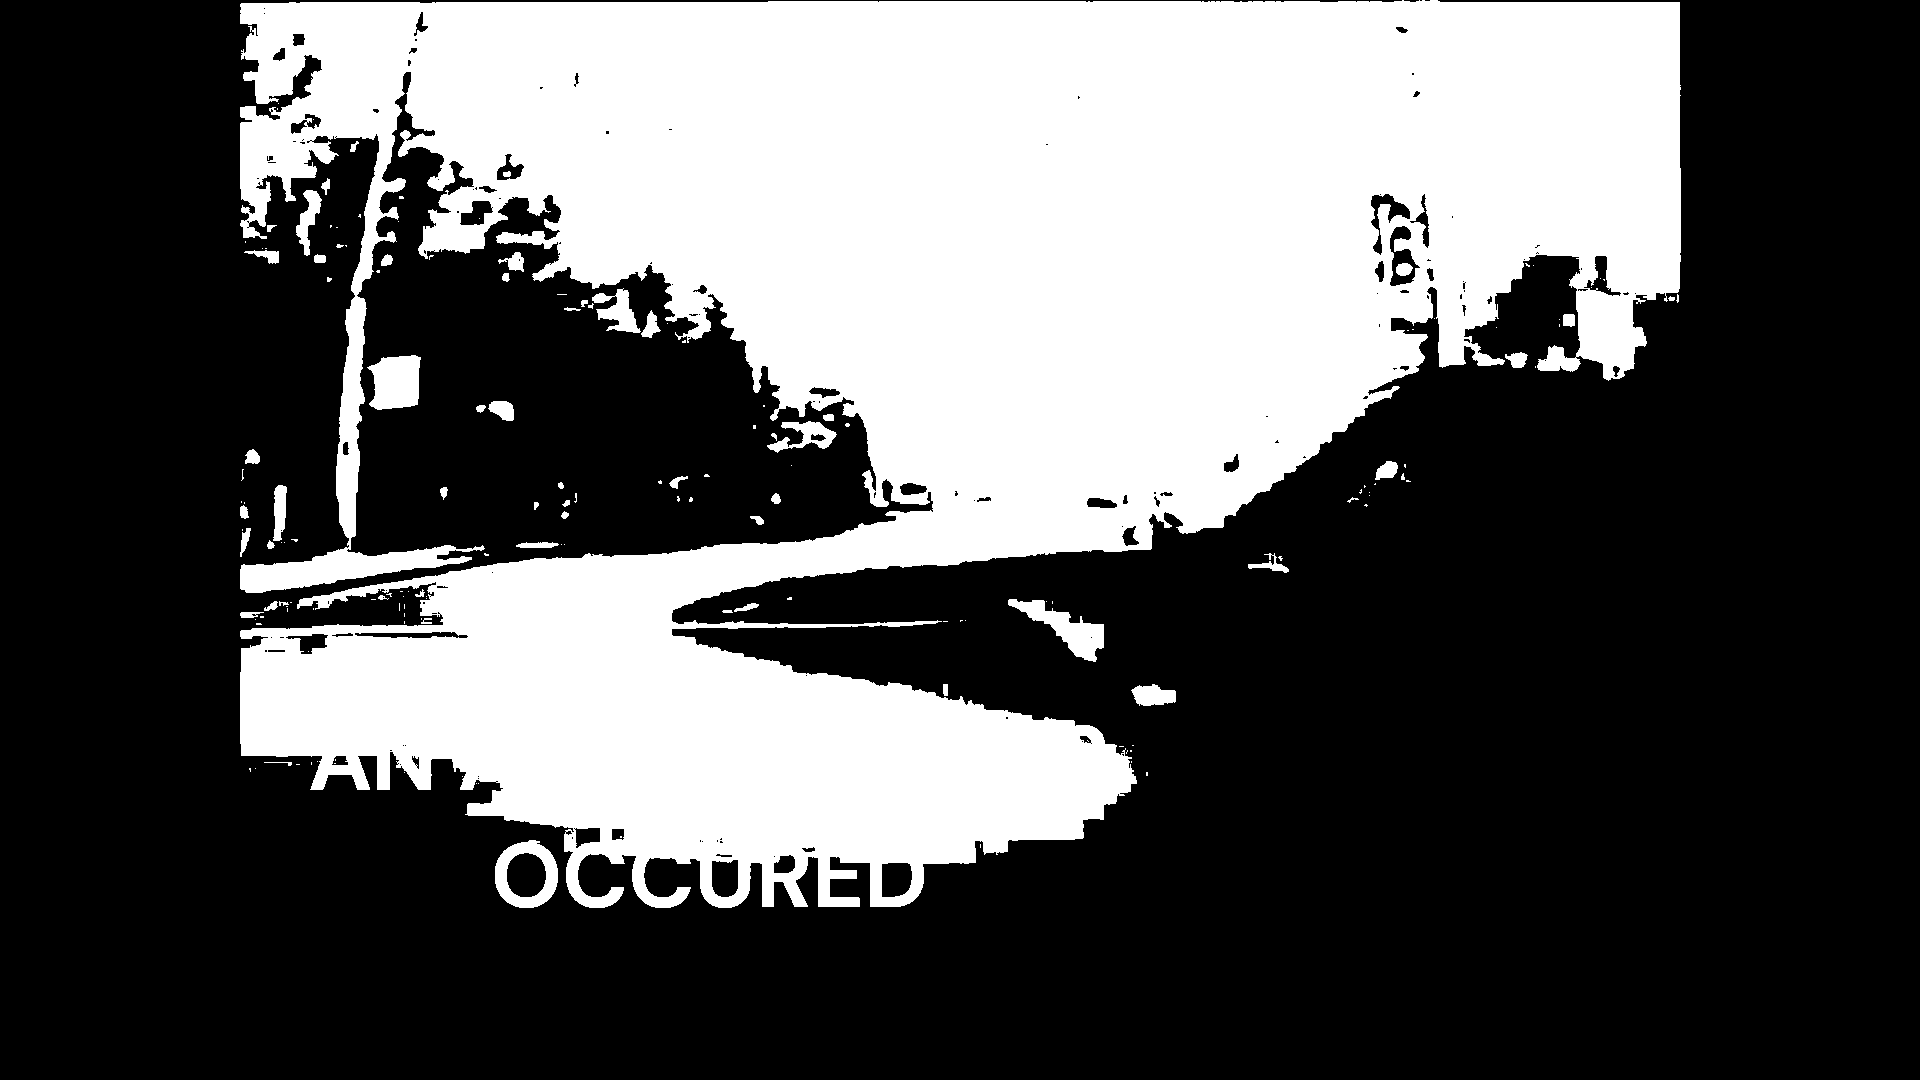

Processed Text:  

Prediction: [0]


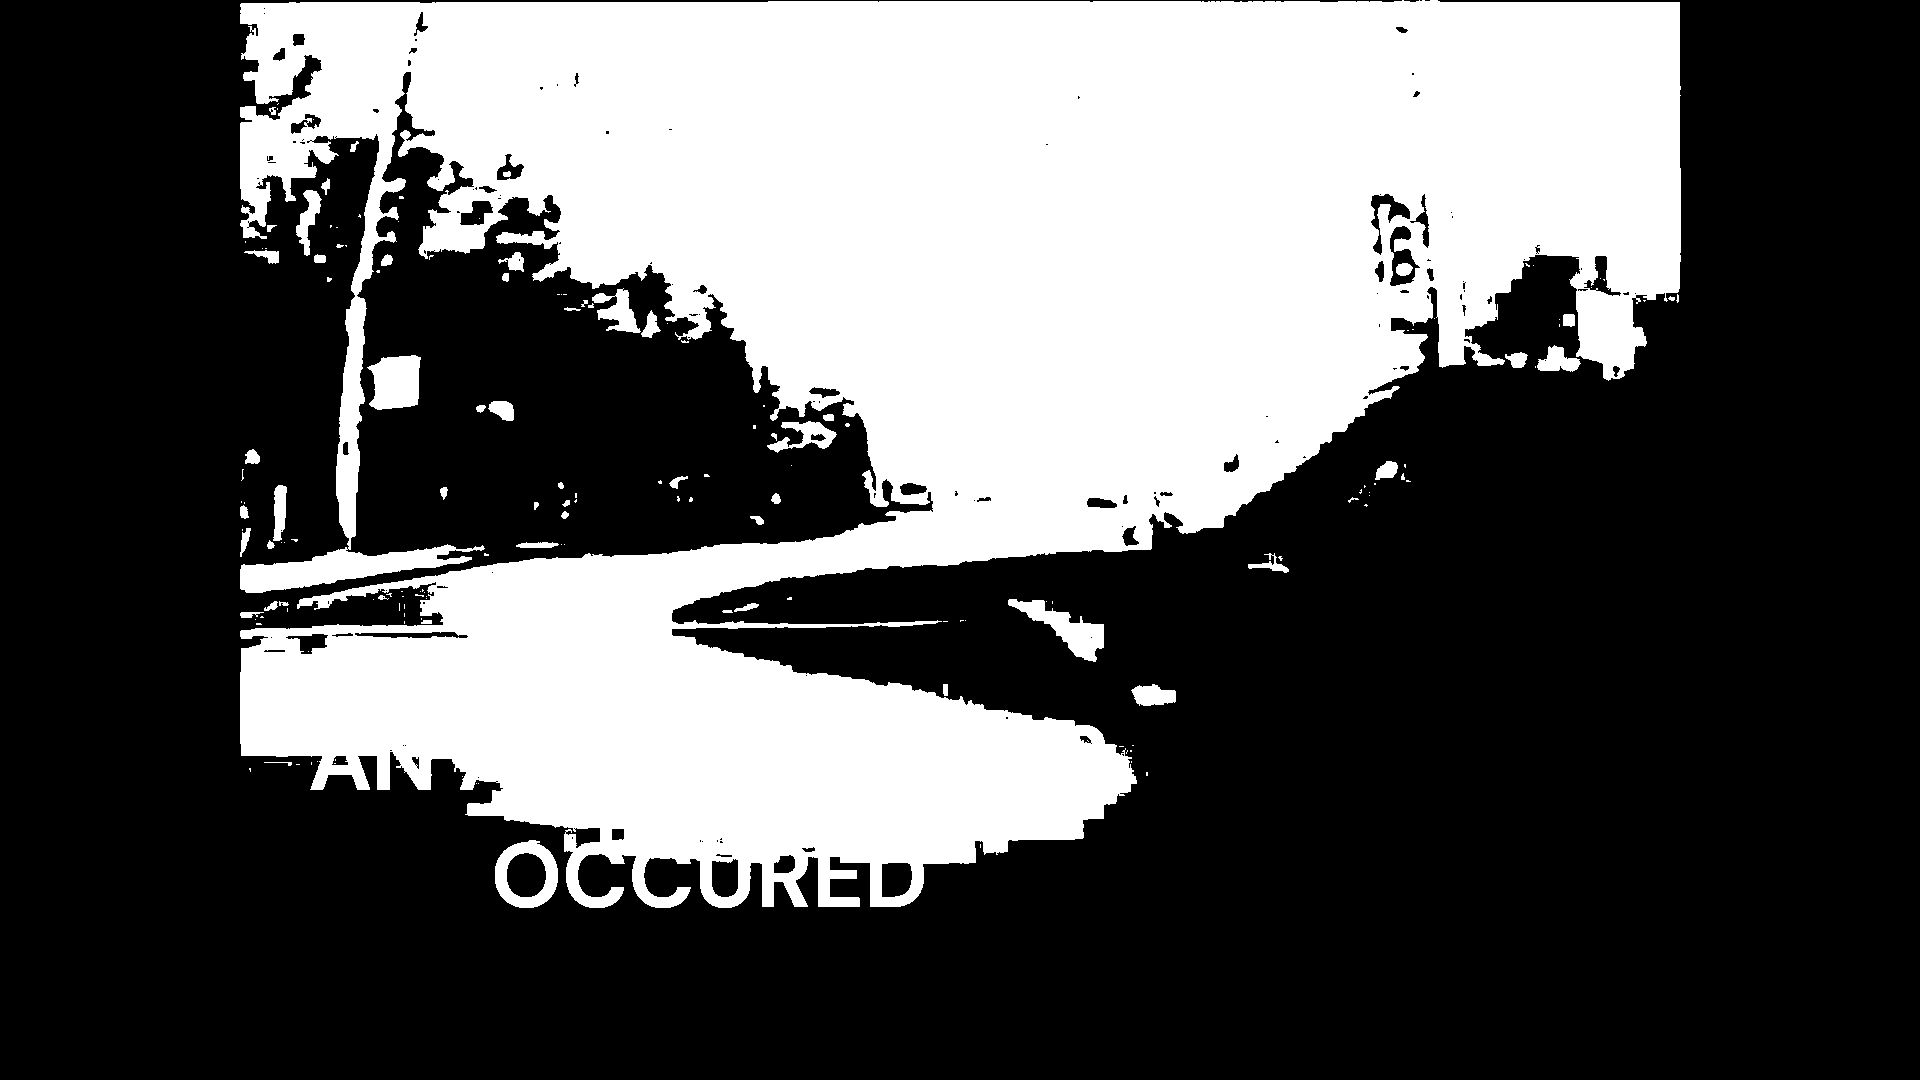

Processed Text:  

Prediction: [0]


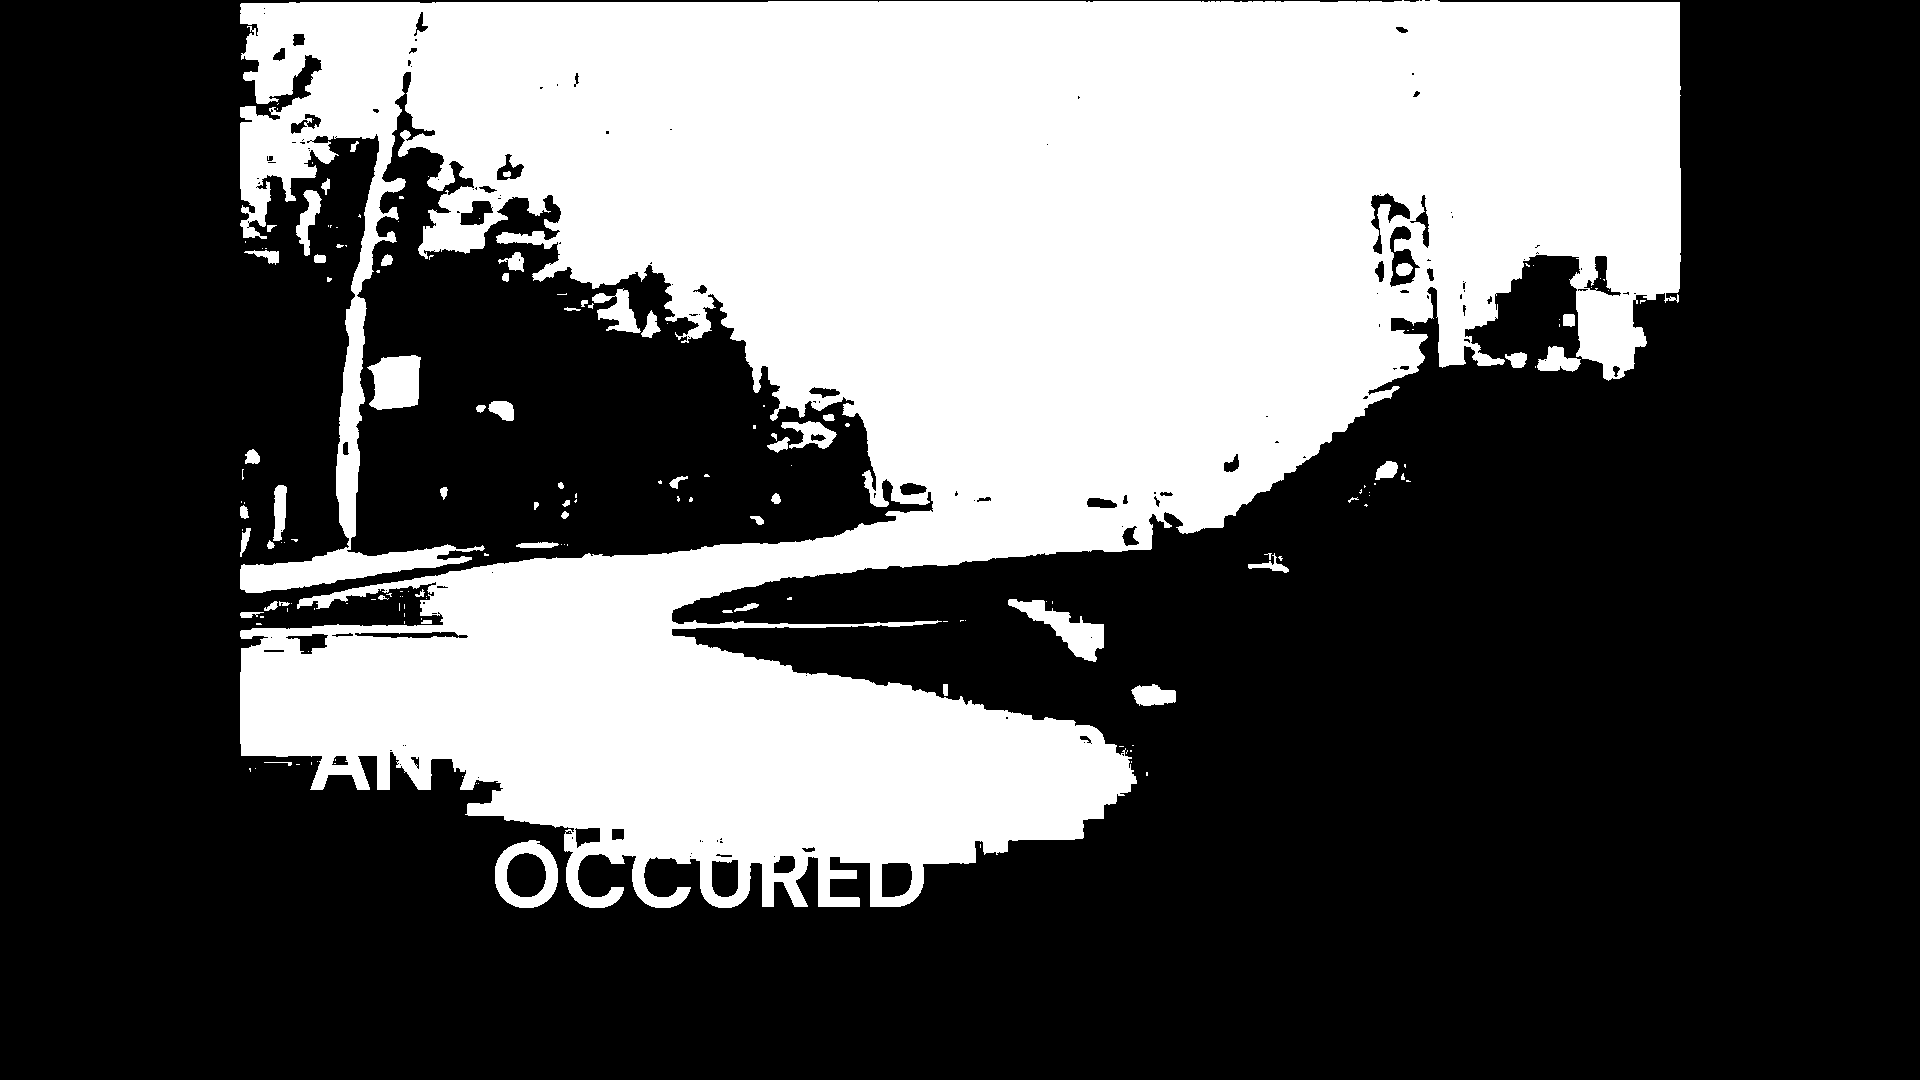

Processed Text:  

Prediction: [0]


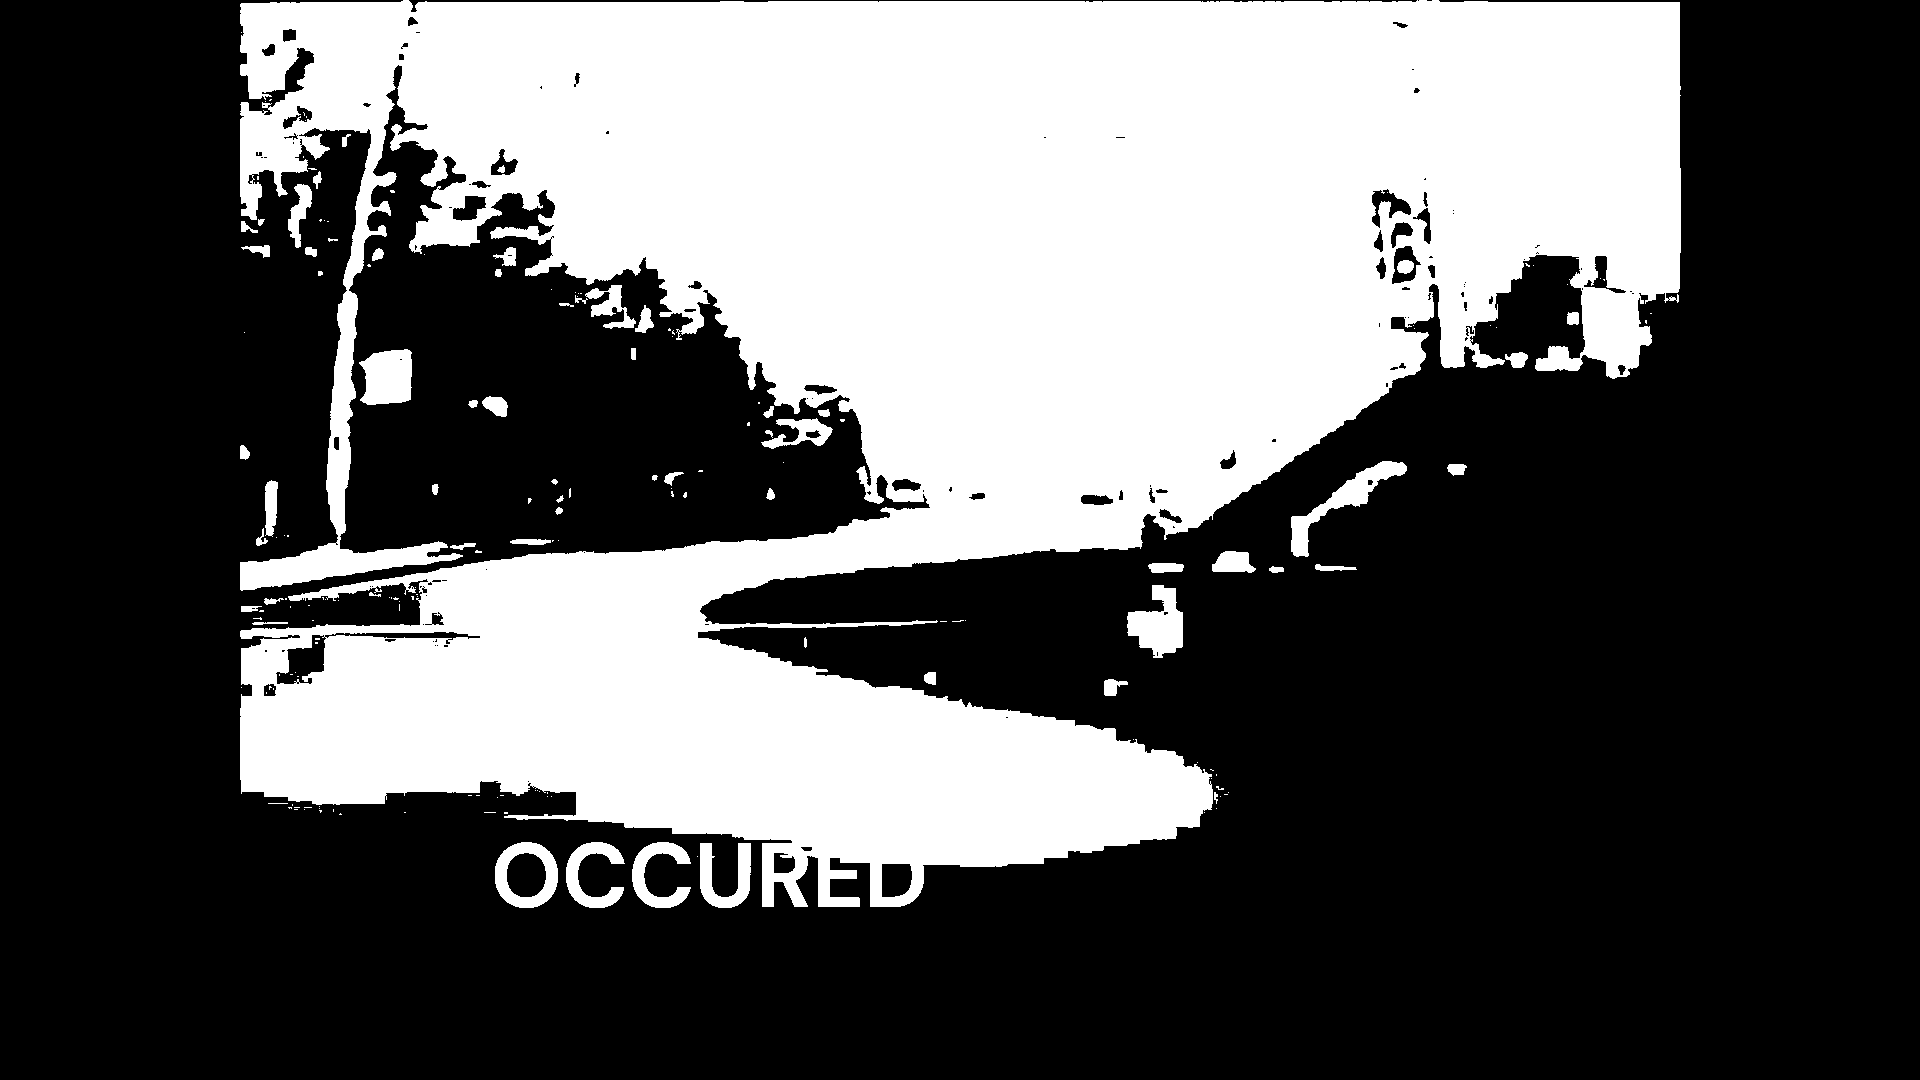

Processed Text:  

Prediction: [0]


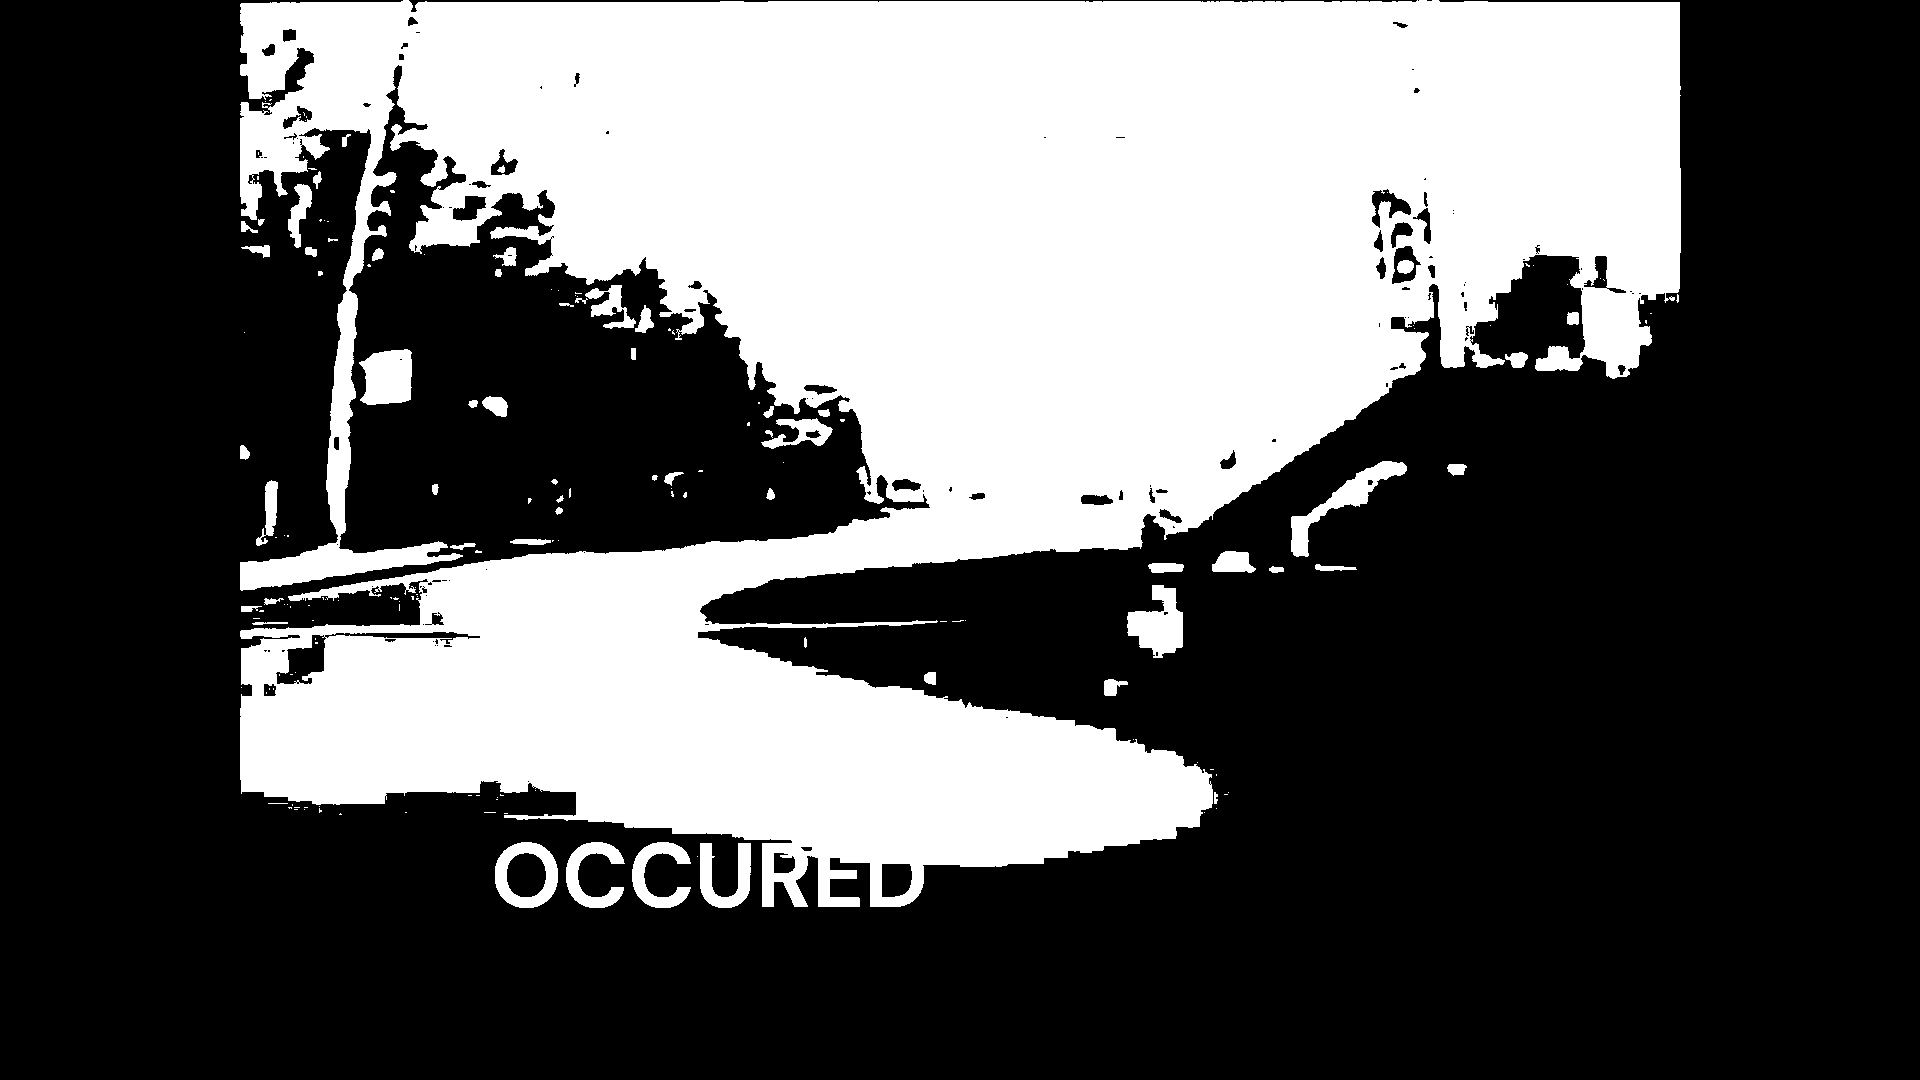

Processed Text:  

Prediction: [0]


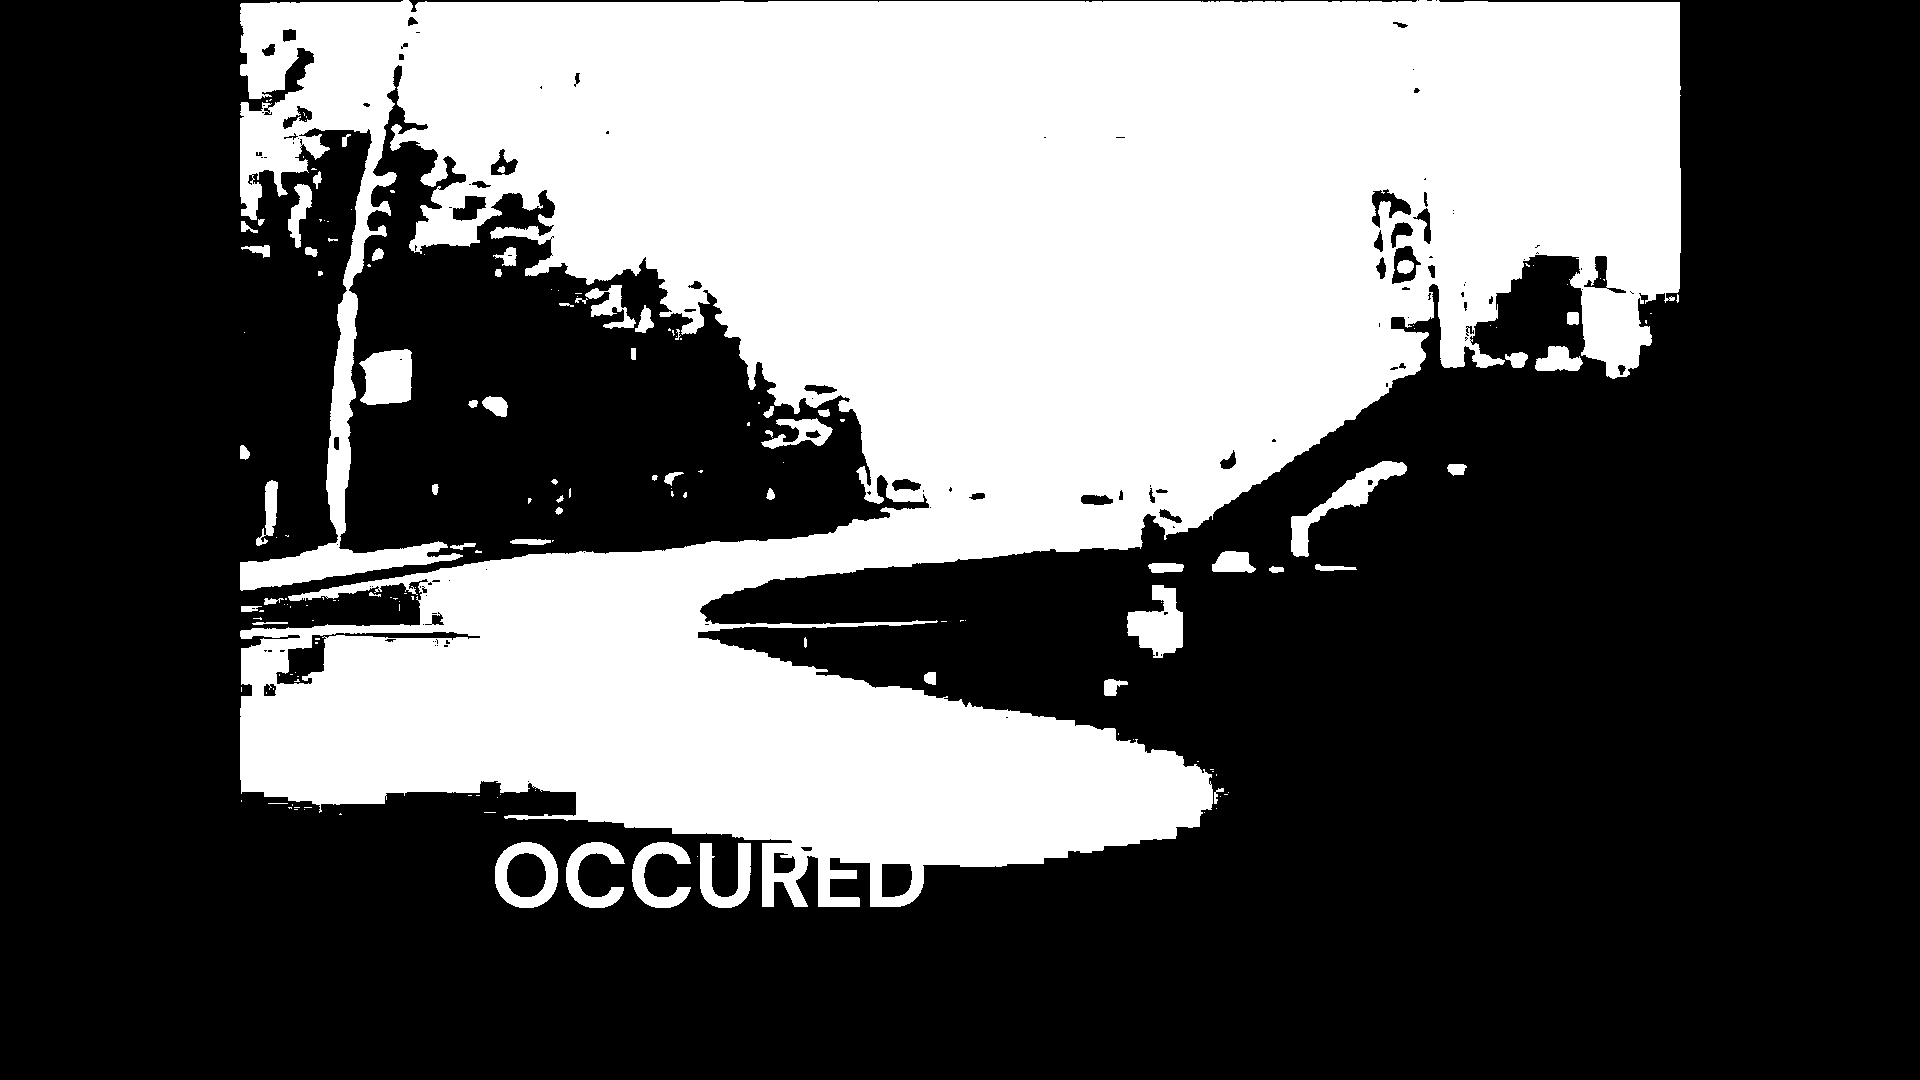

Processed Text:  

Prediction: [0]


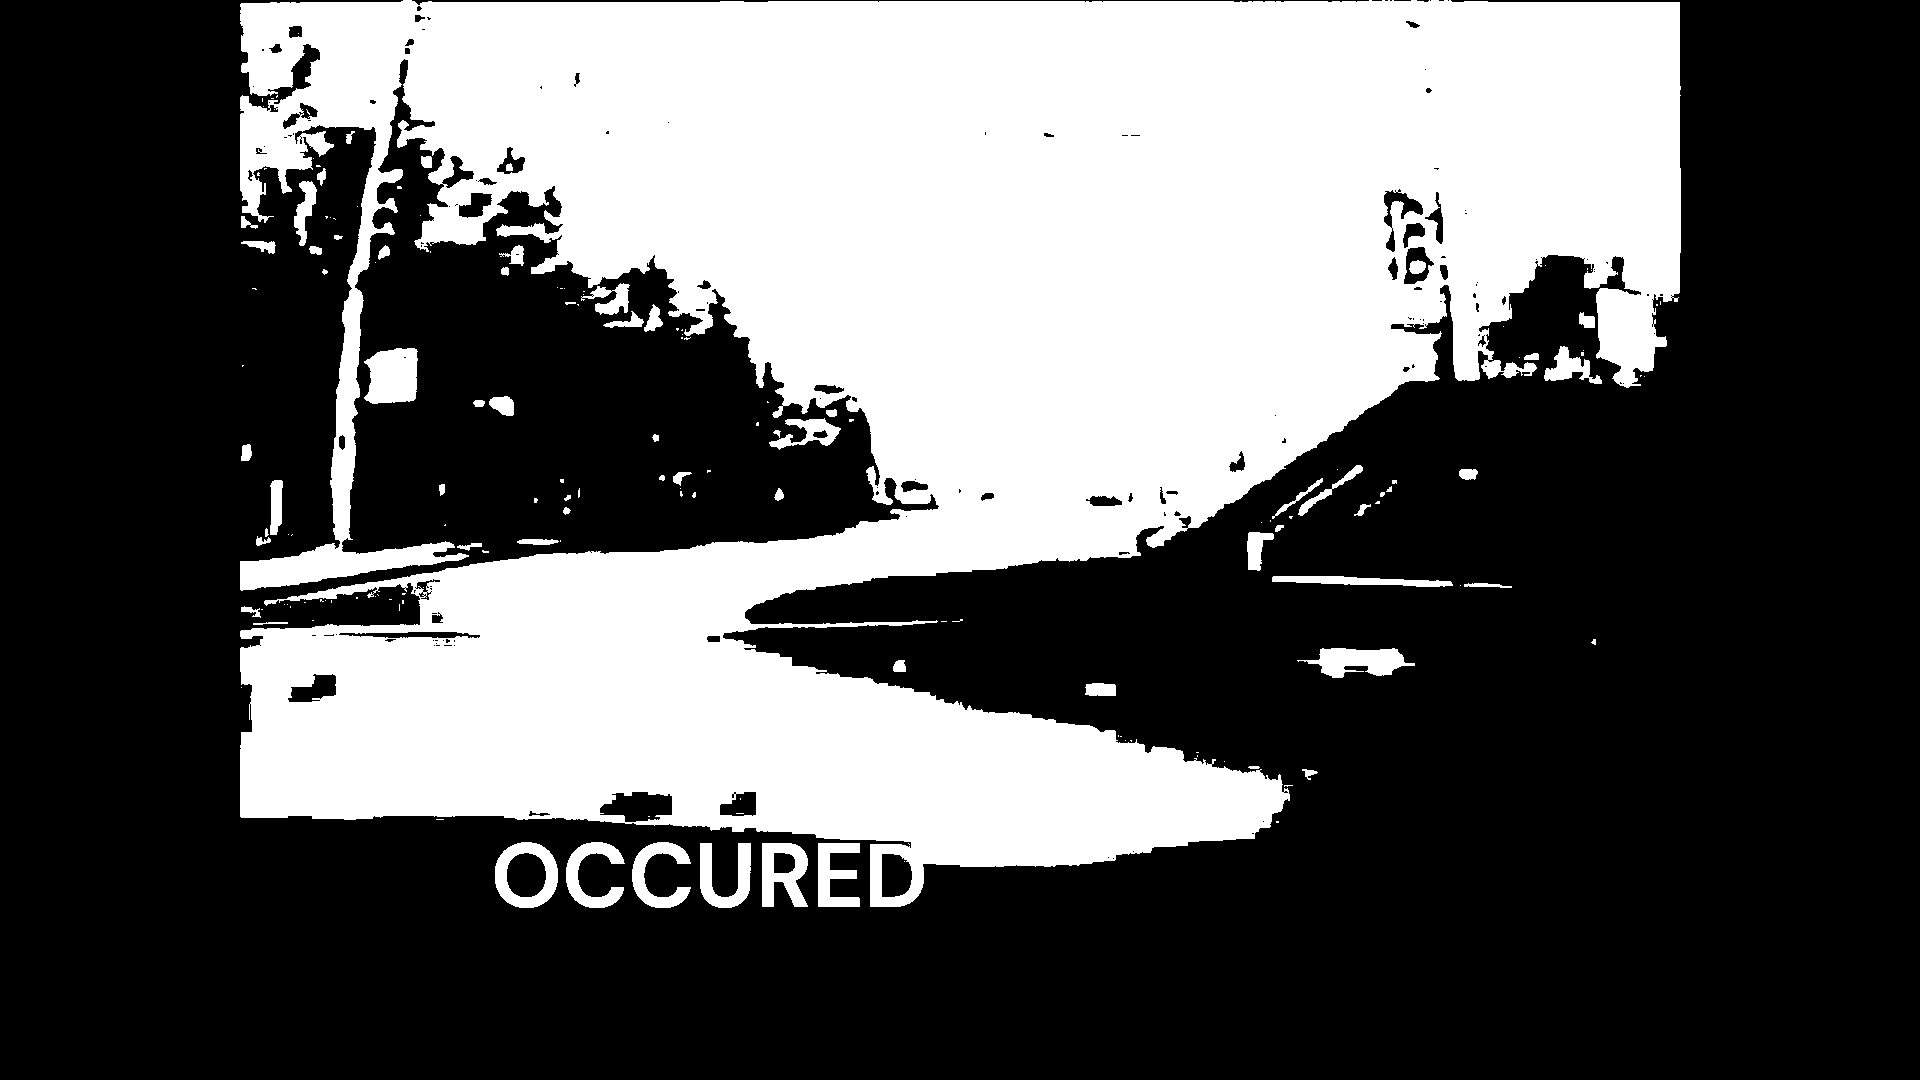

Processed Text:  

Prediction: [0]


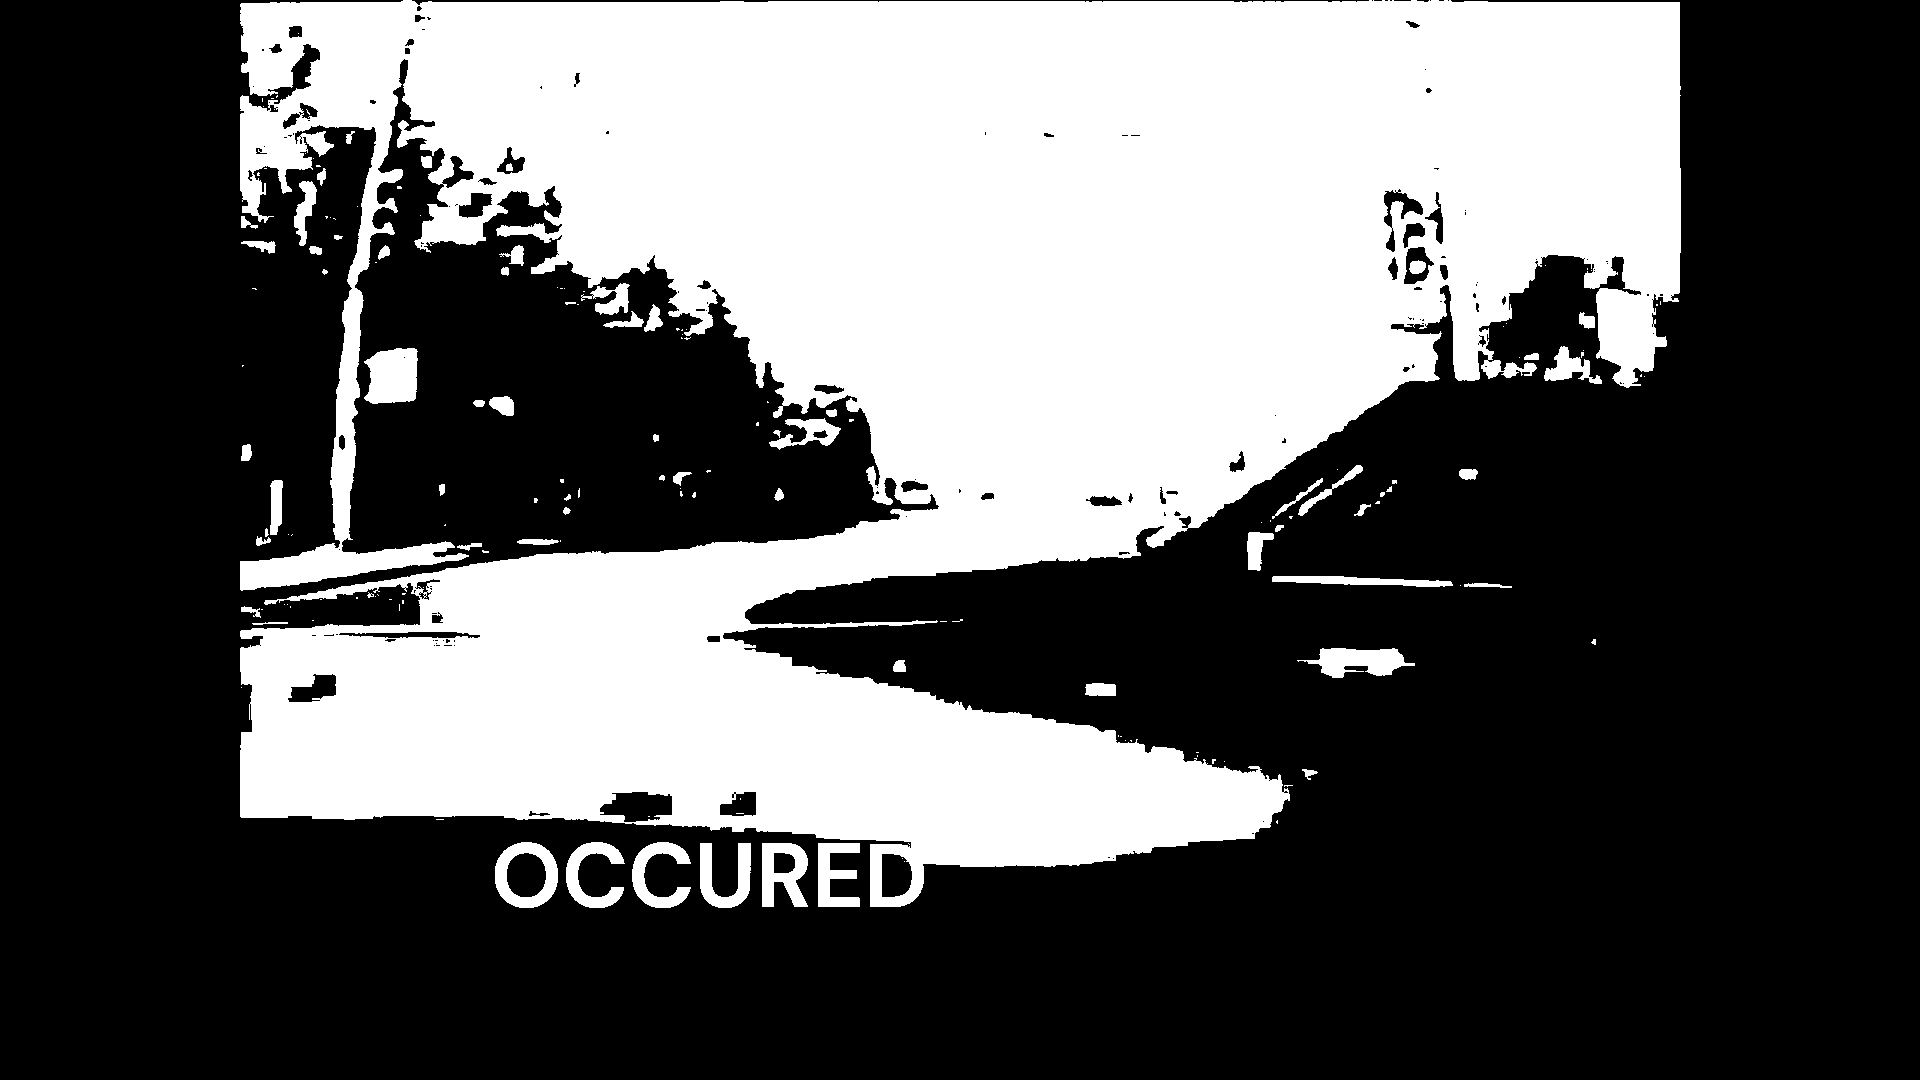

Processed Text:  

Prediction: [0]


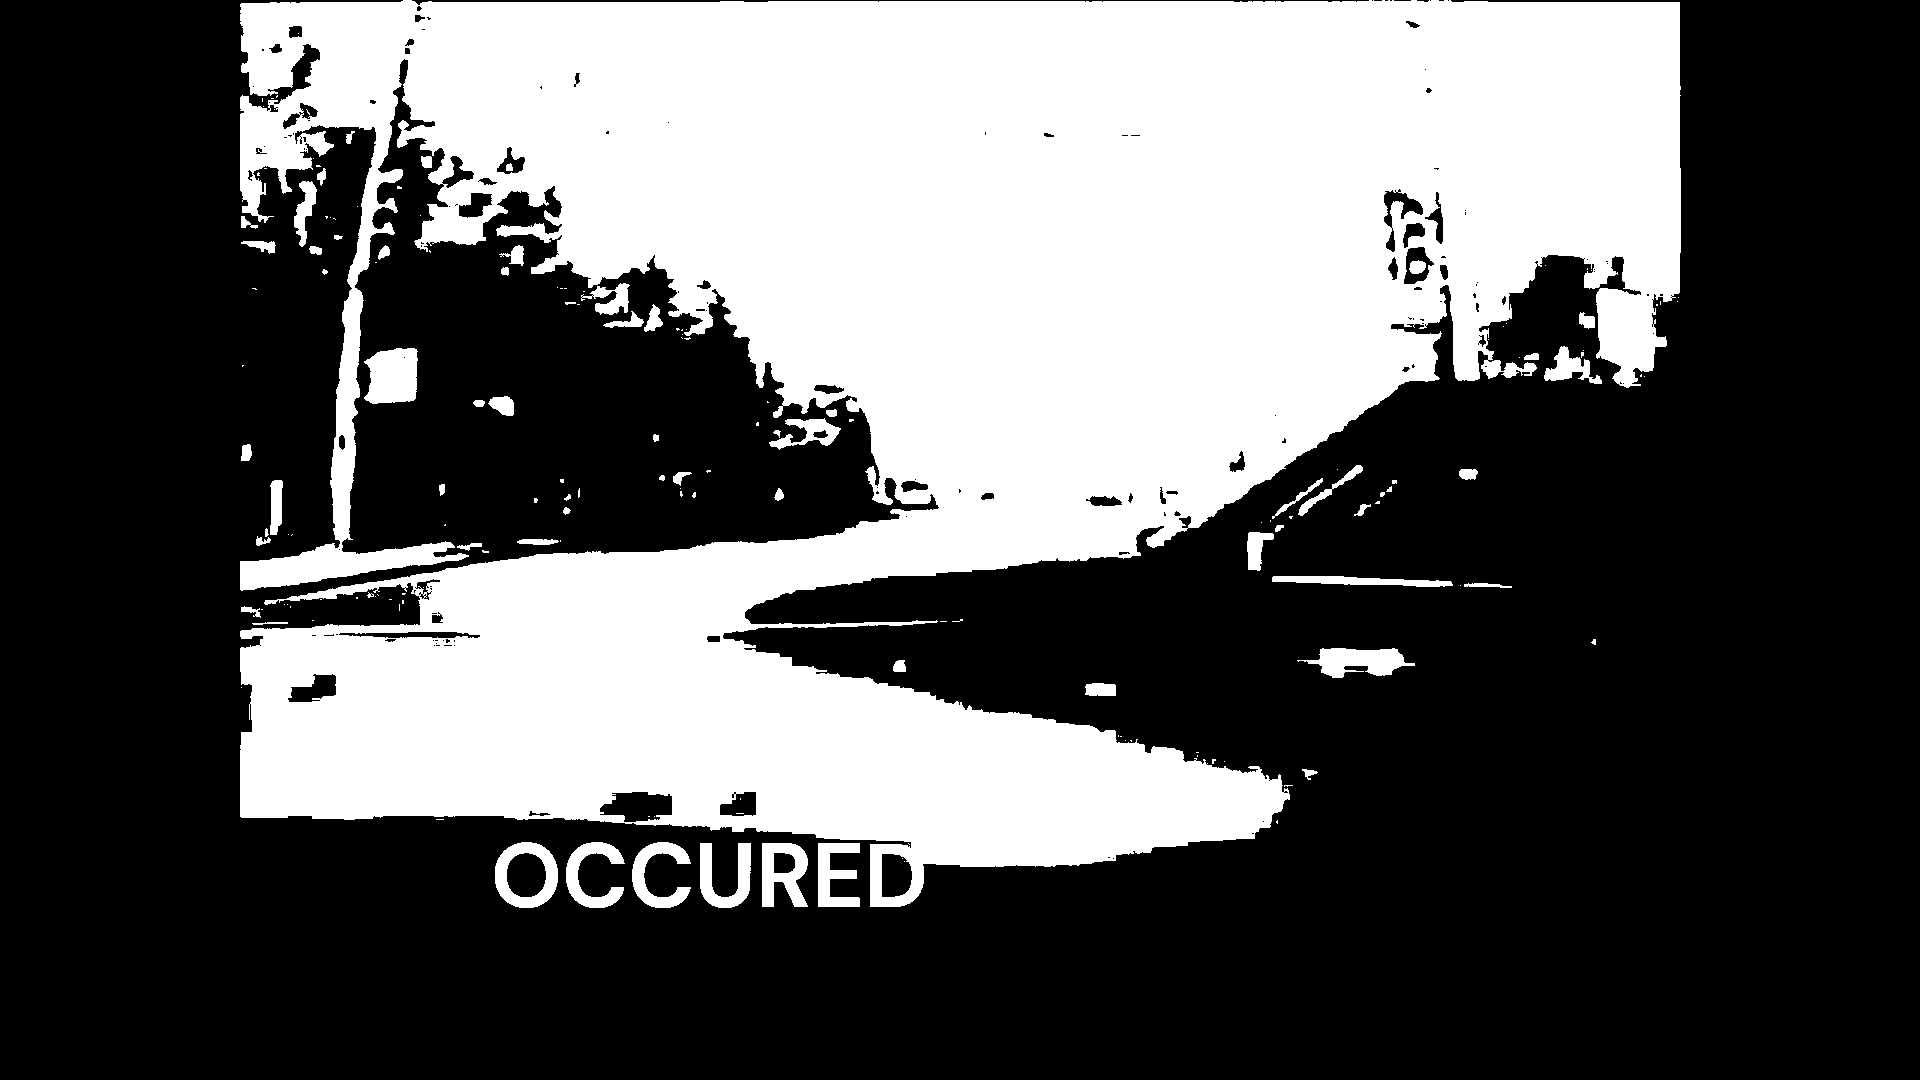

Processed Text:  

Prediction: [0]


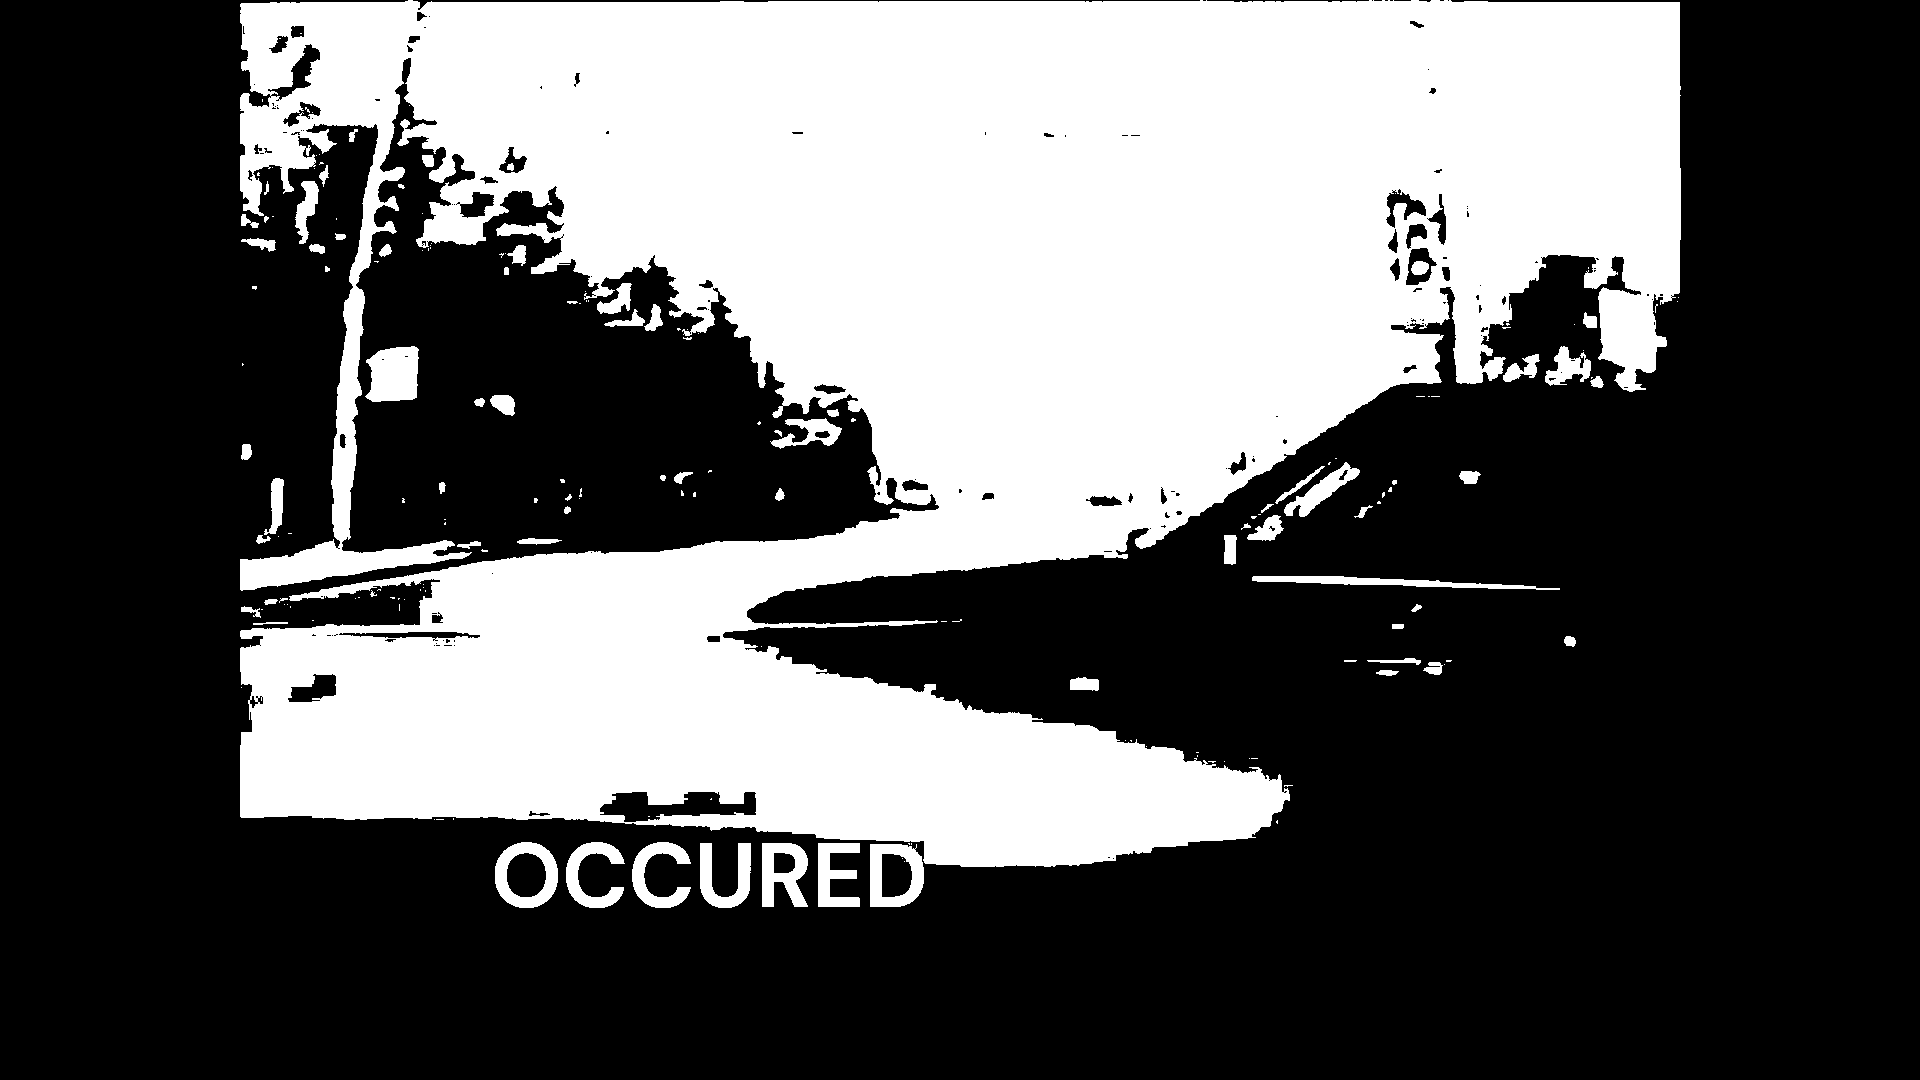

Processed Text:  

Prediction: [0]


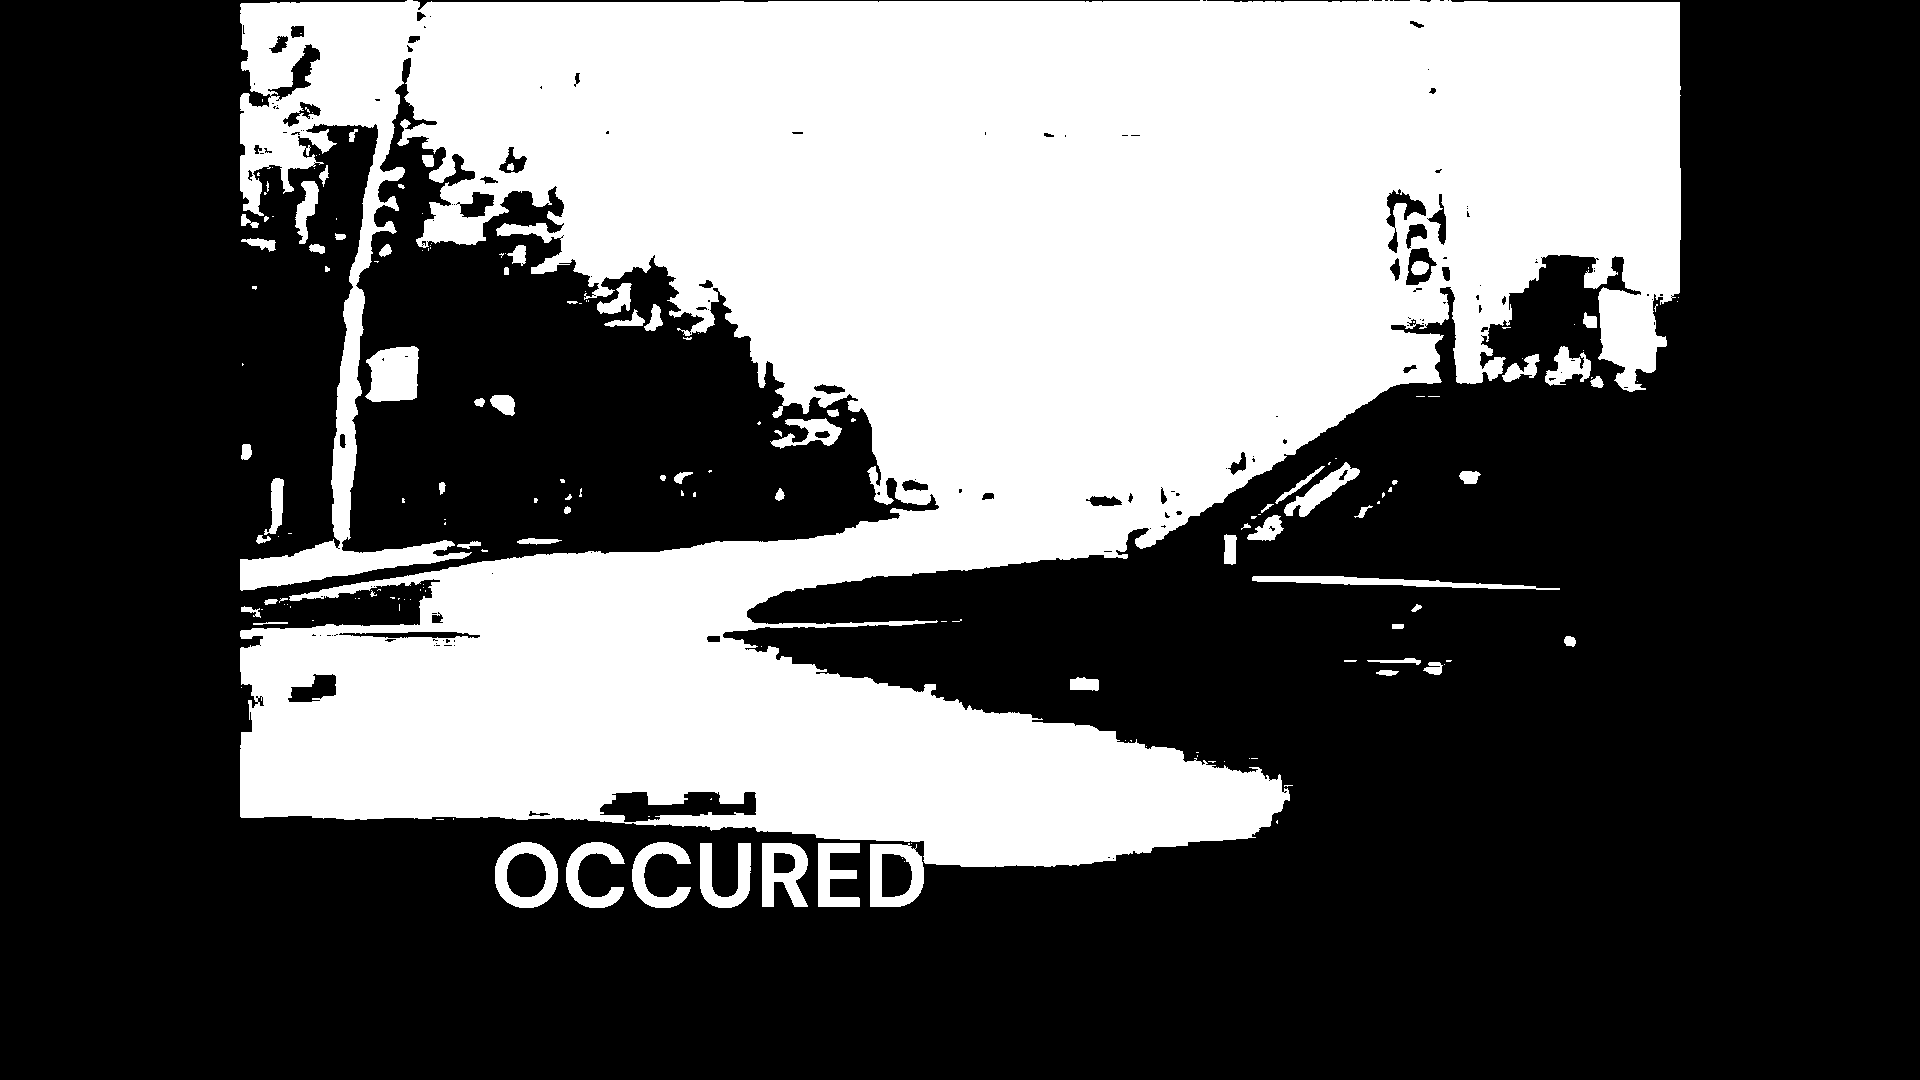

Processed Text:  

Prediction: [0]


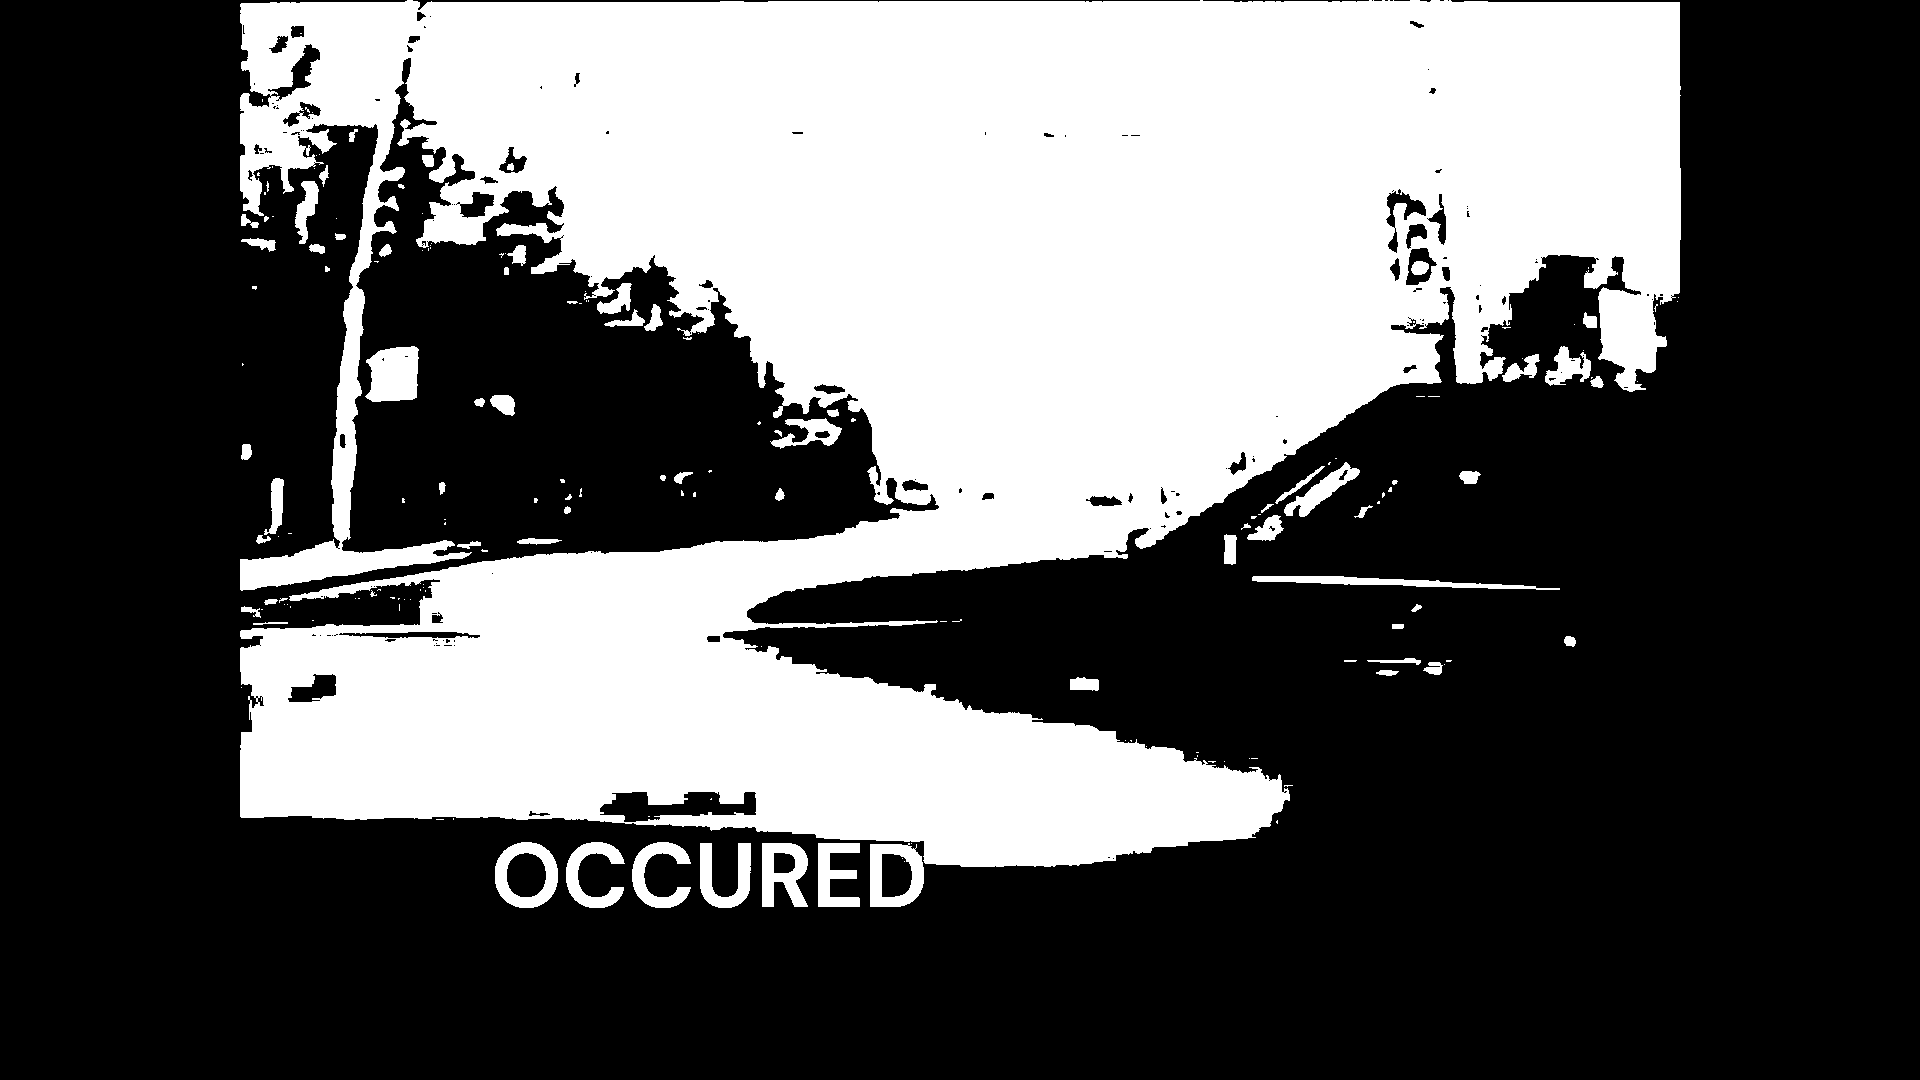

Processed Text:  

Prediction: [0]


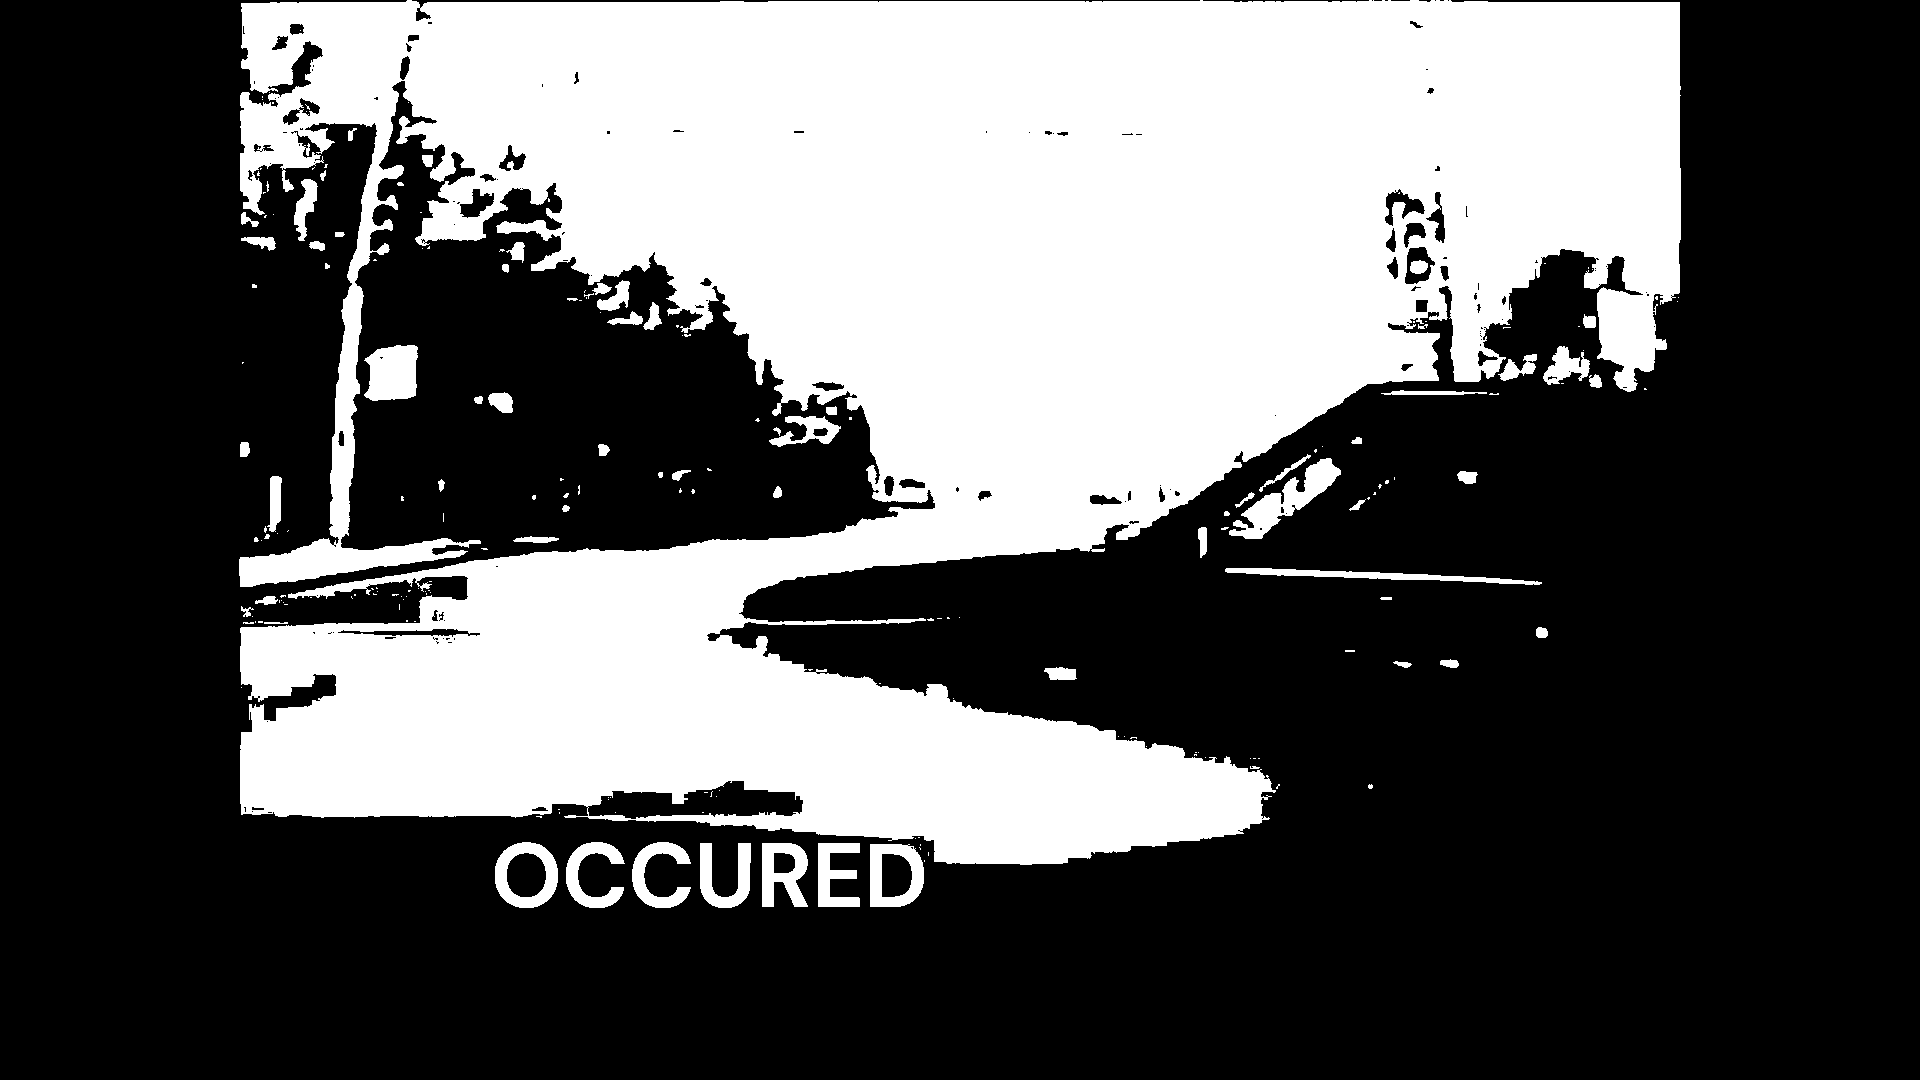

Processed Text:  

Prediction: [0]


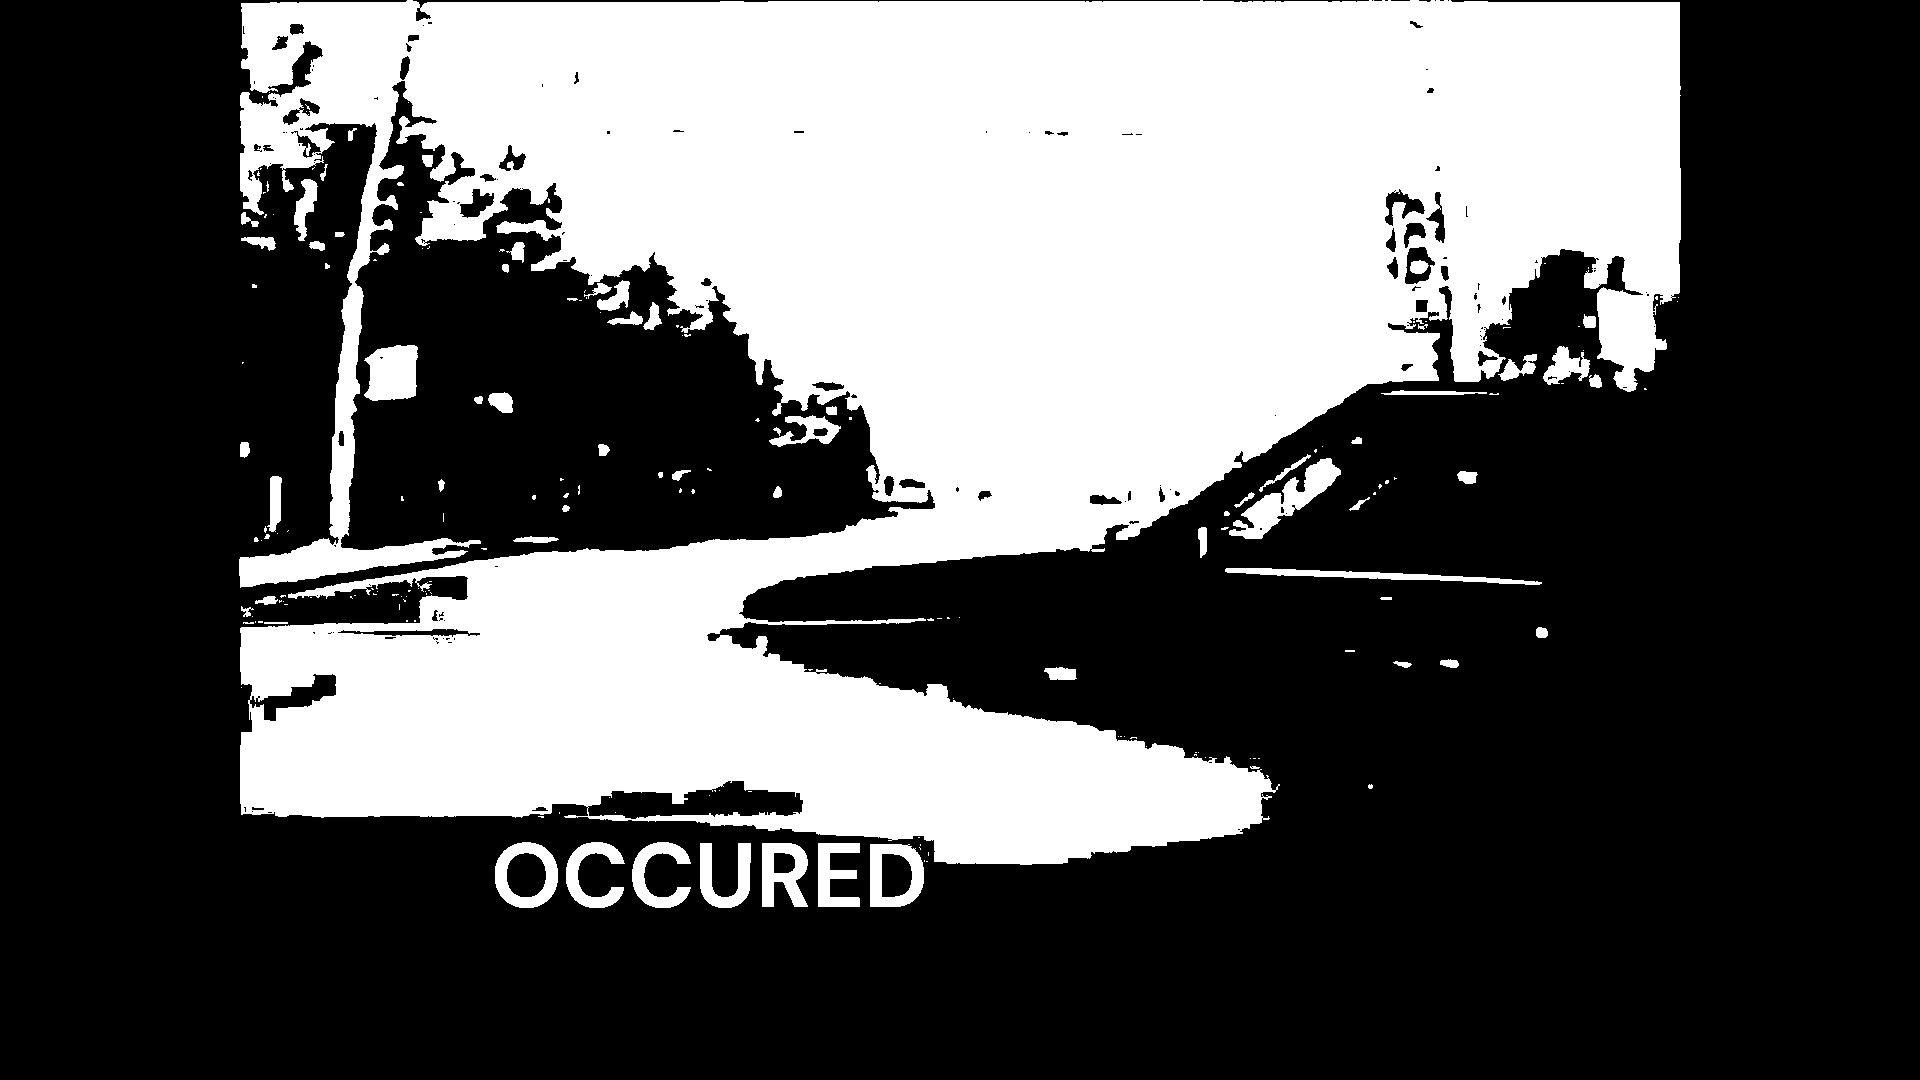

Processed Text:  

Prediction: [0]


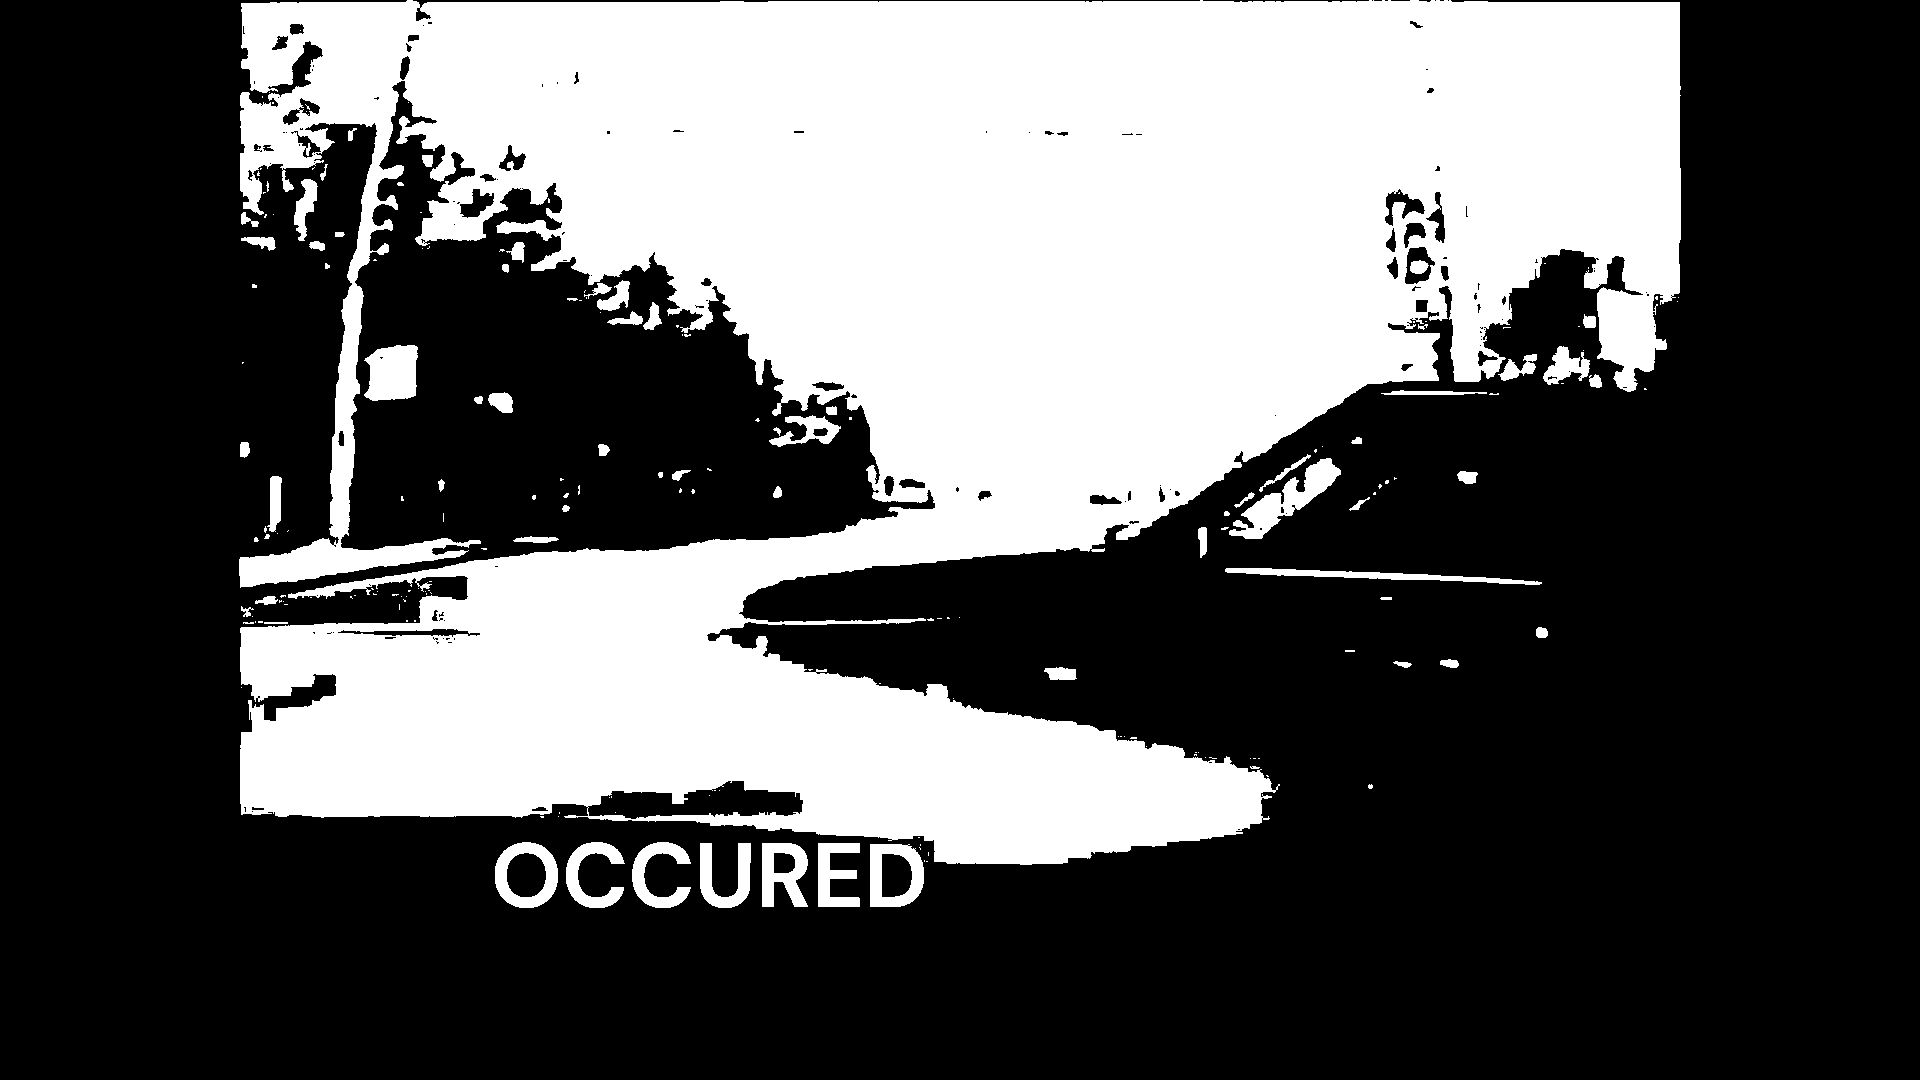

Processed Text:  

Prediction: [0]


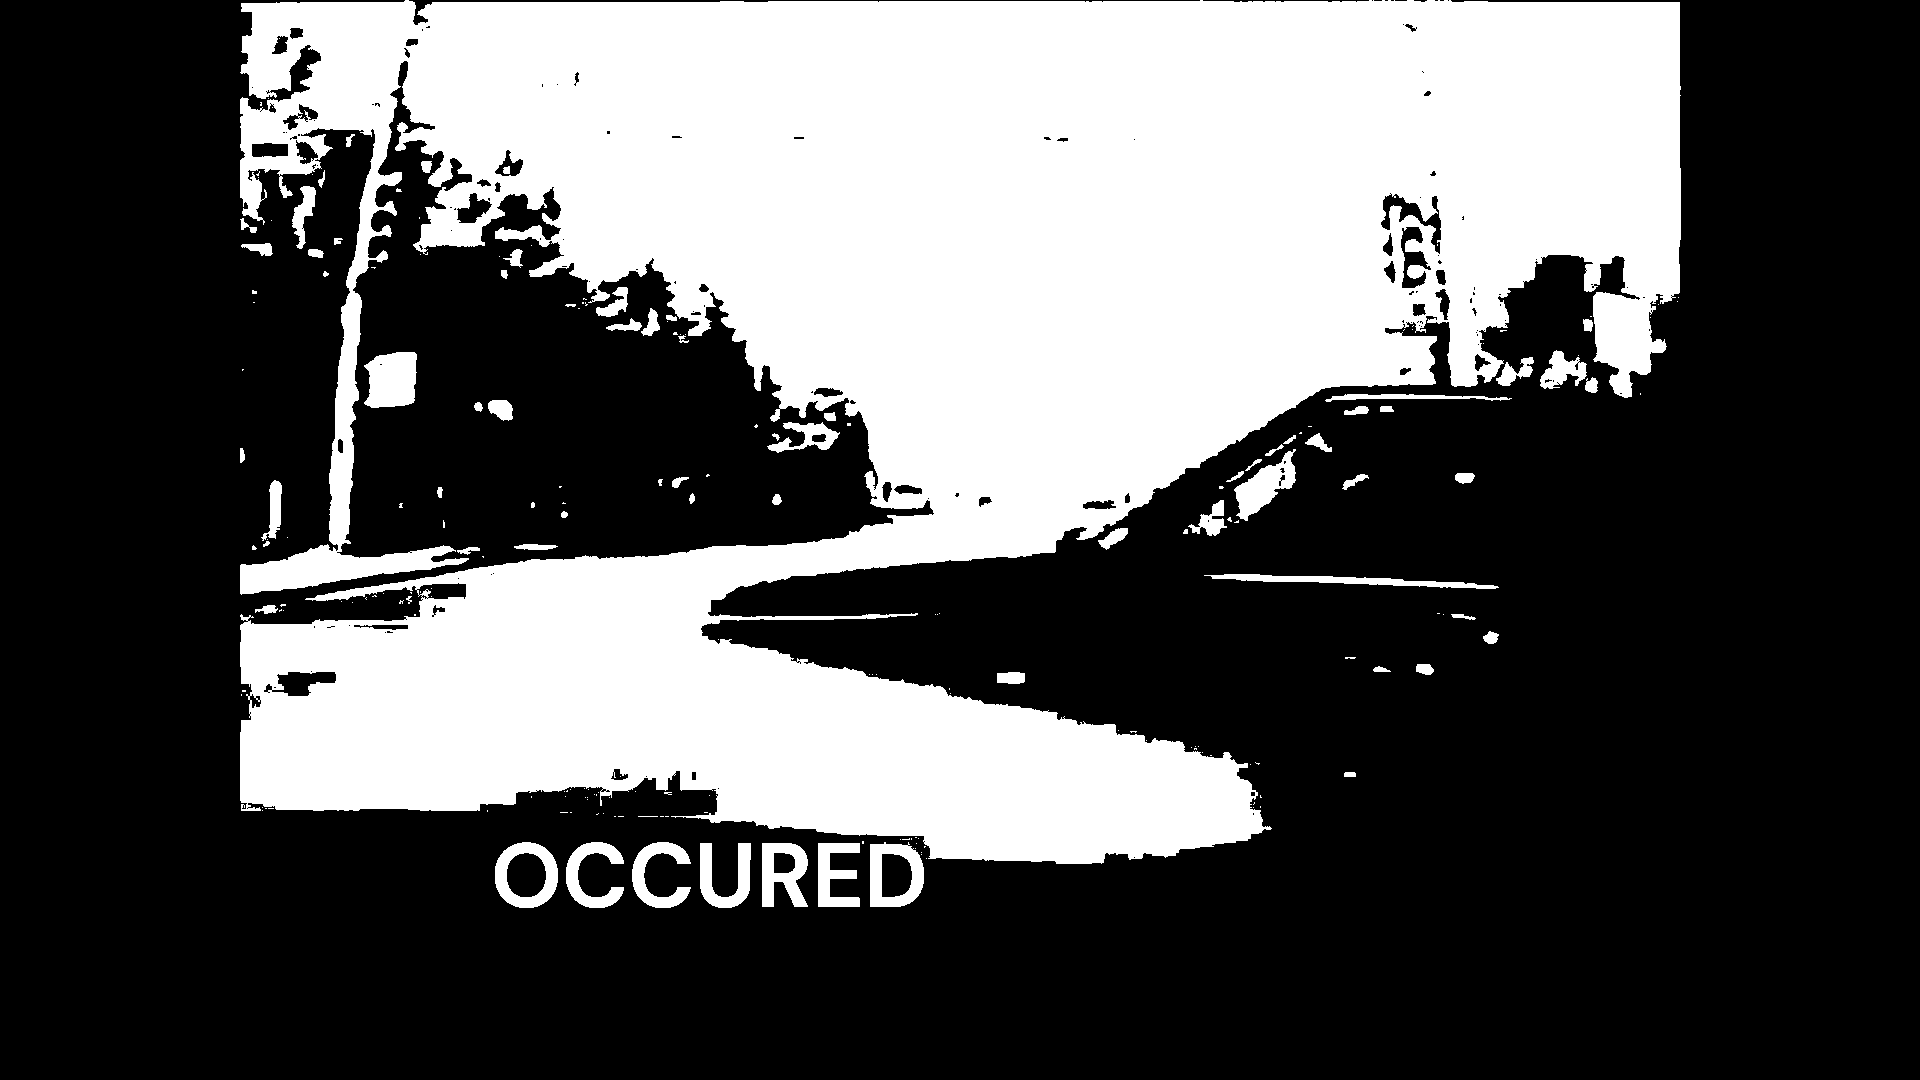

Processed Text:  

Prediction: [0]


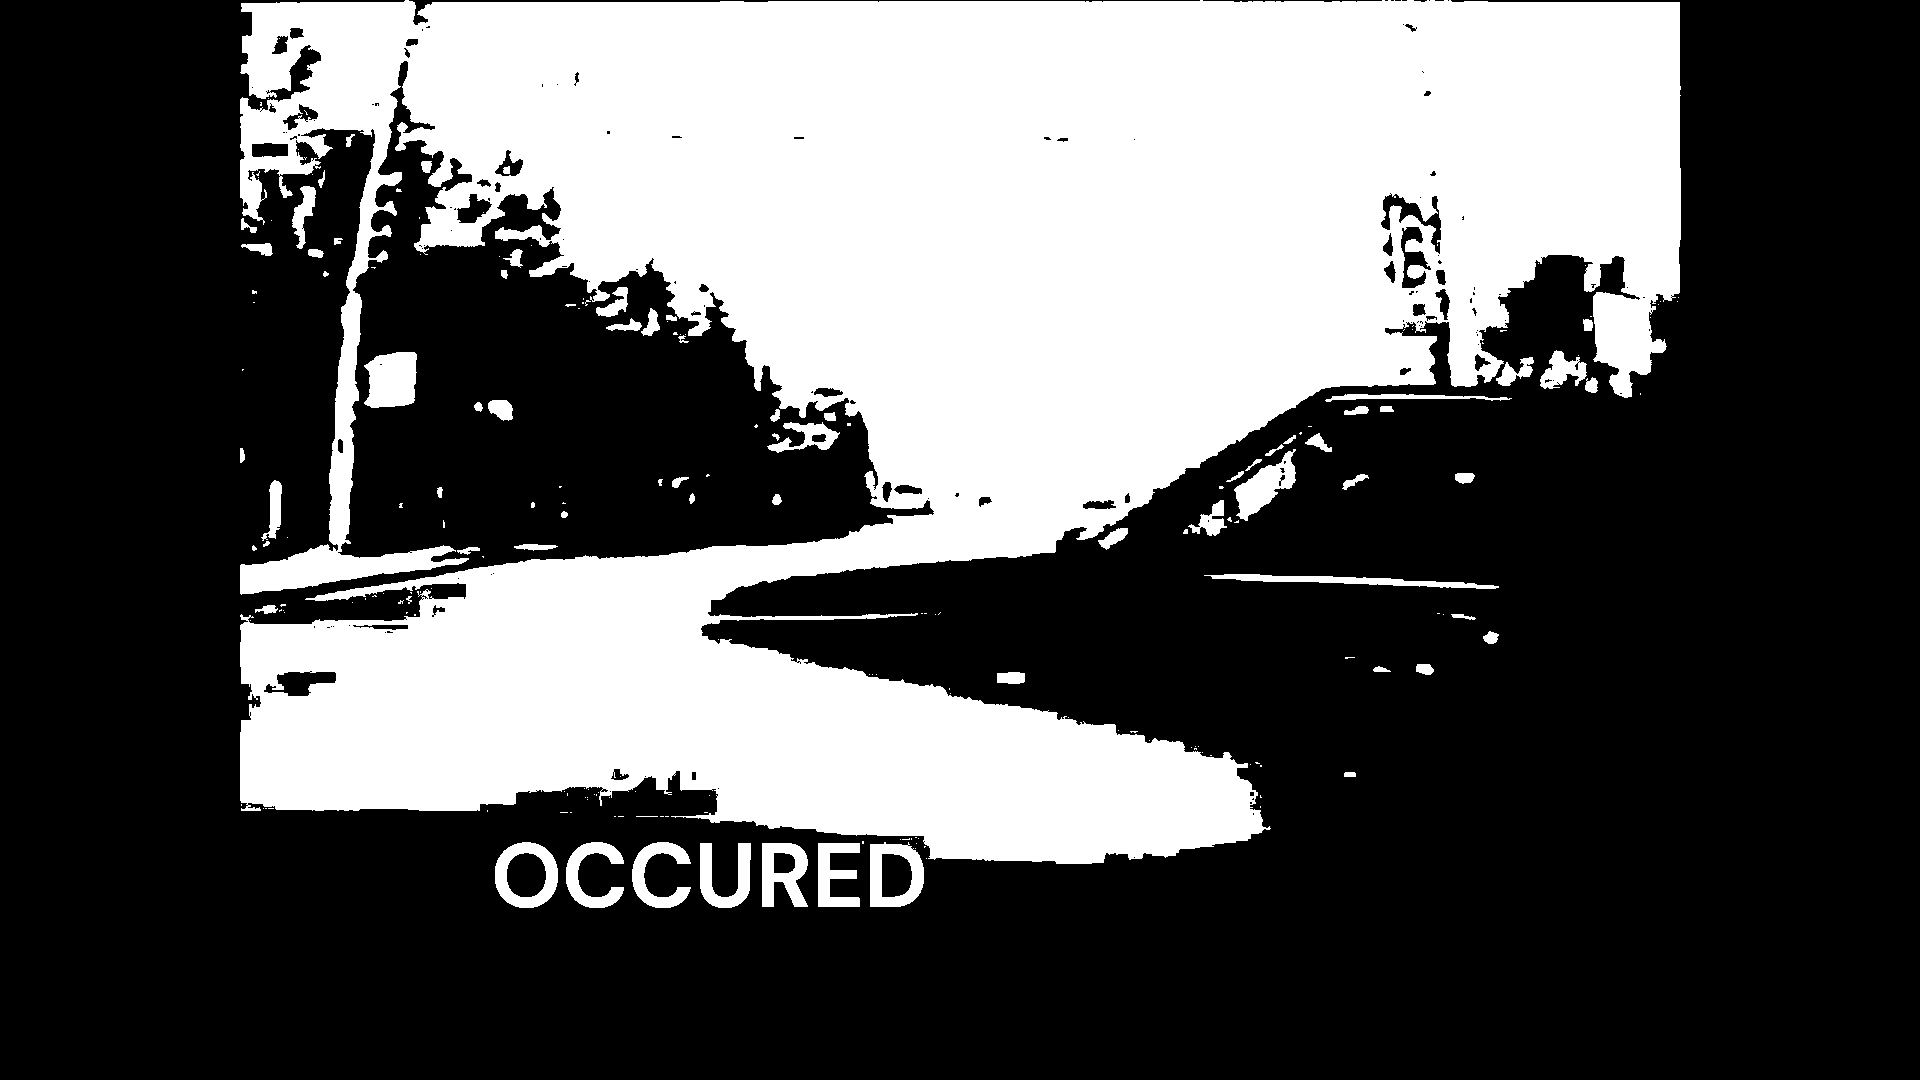

Processed Text:  

Prediction: [0]


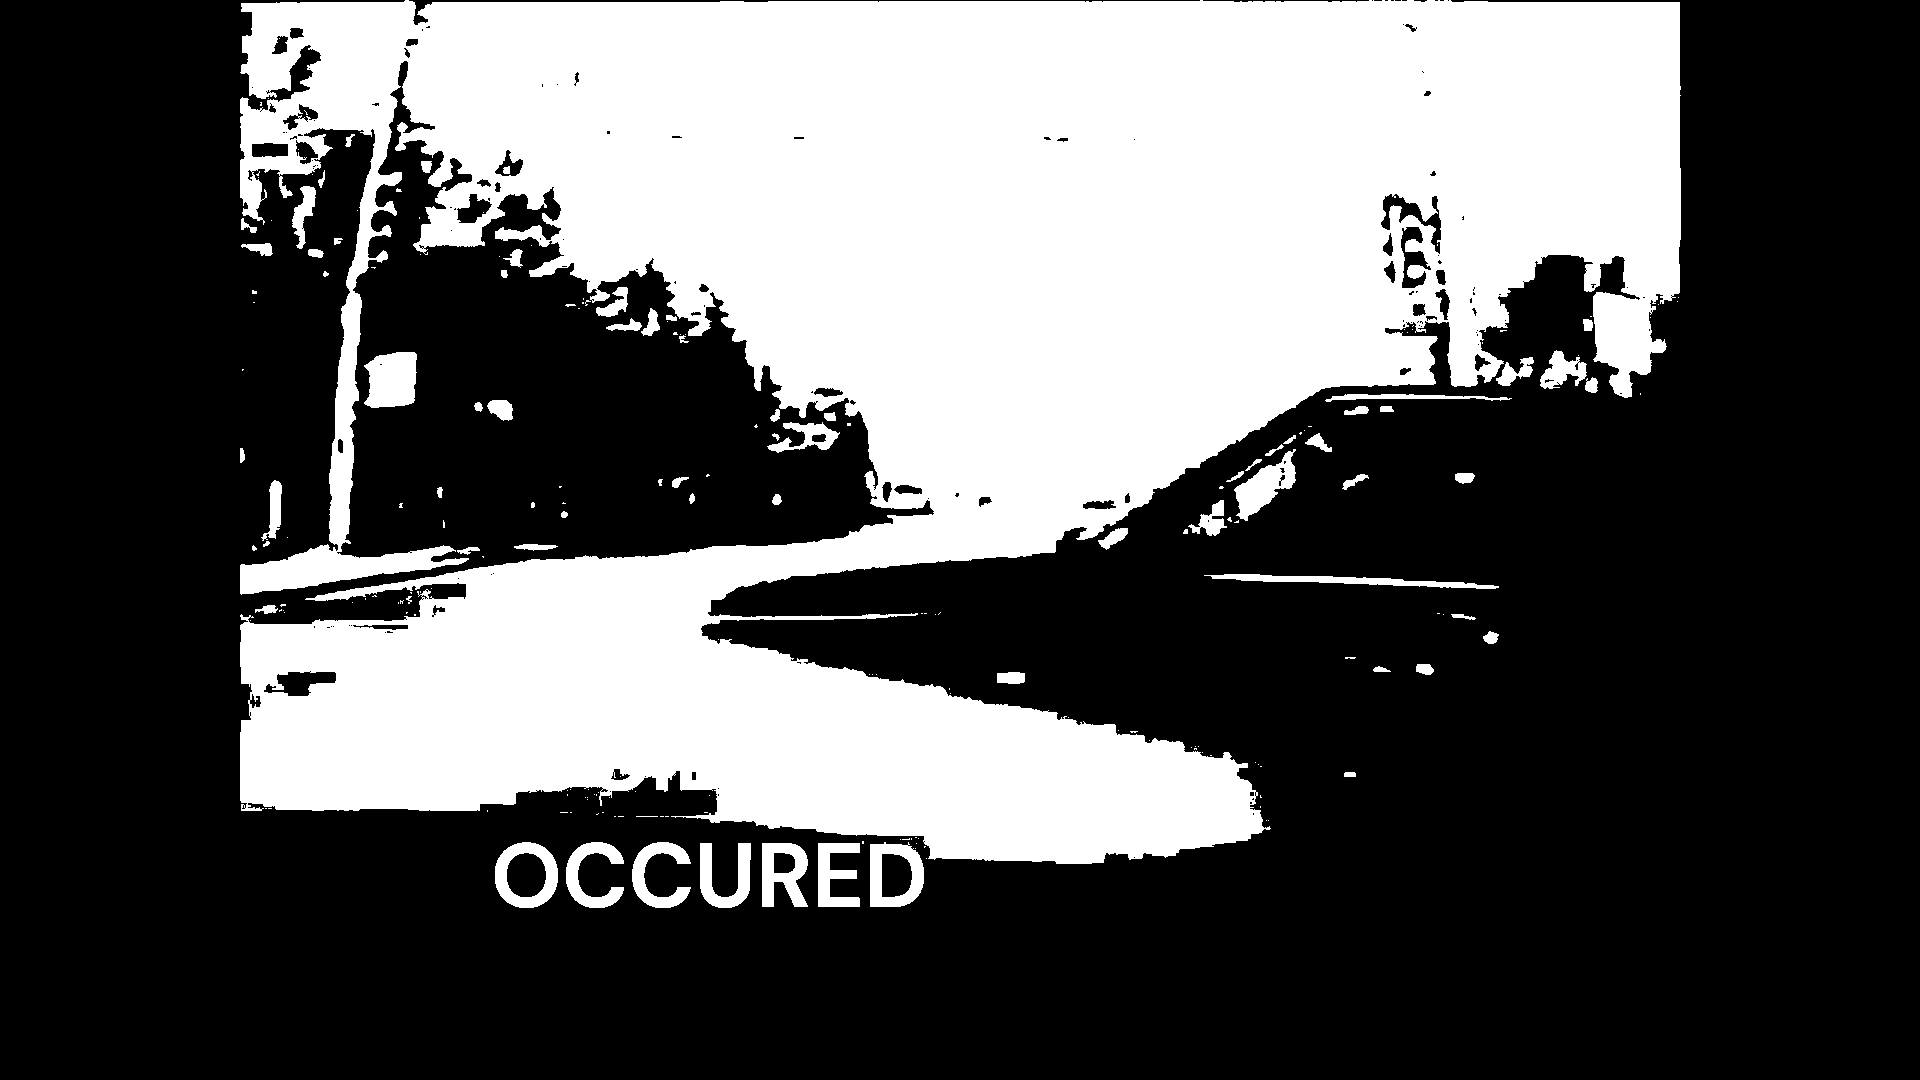

Processed Text:  

Prediction: [0]


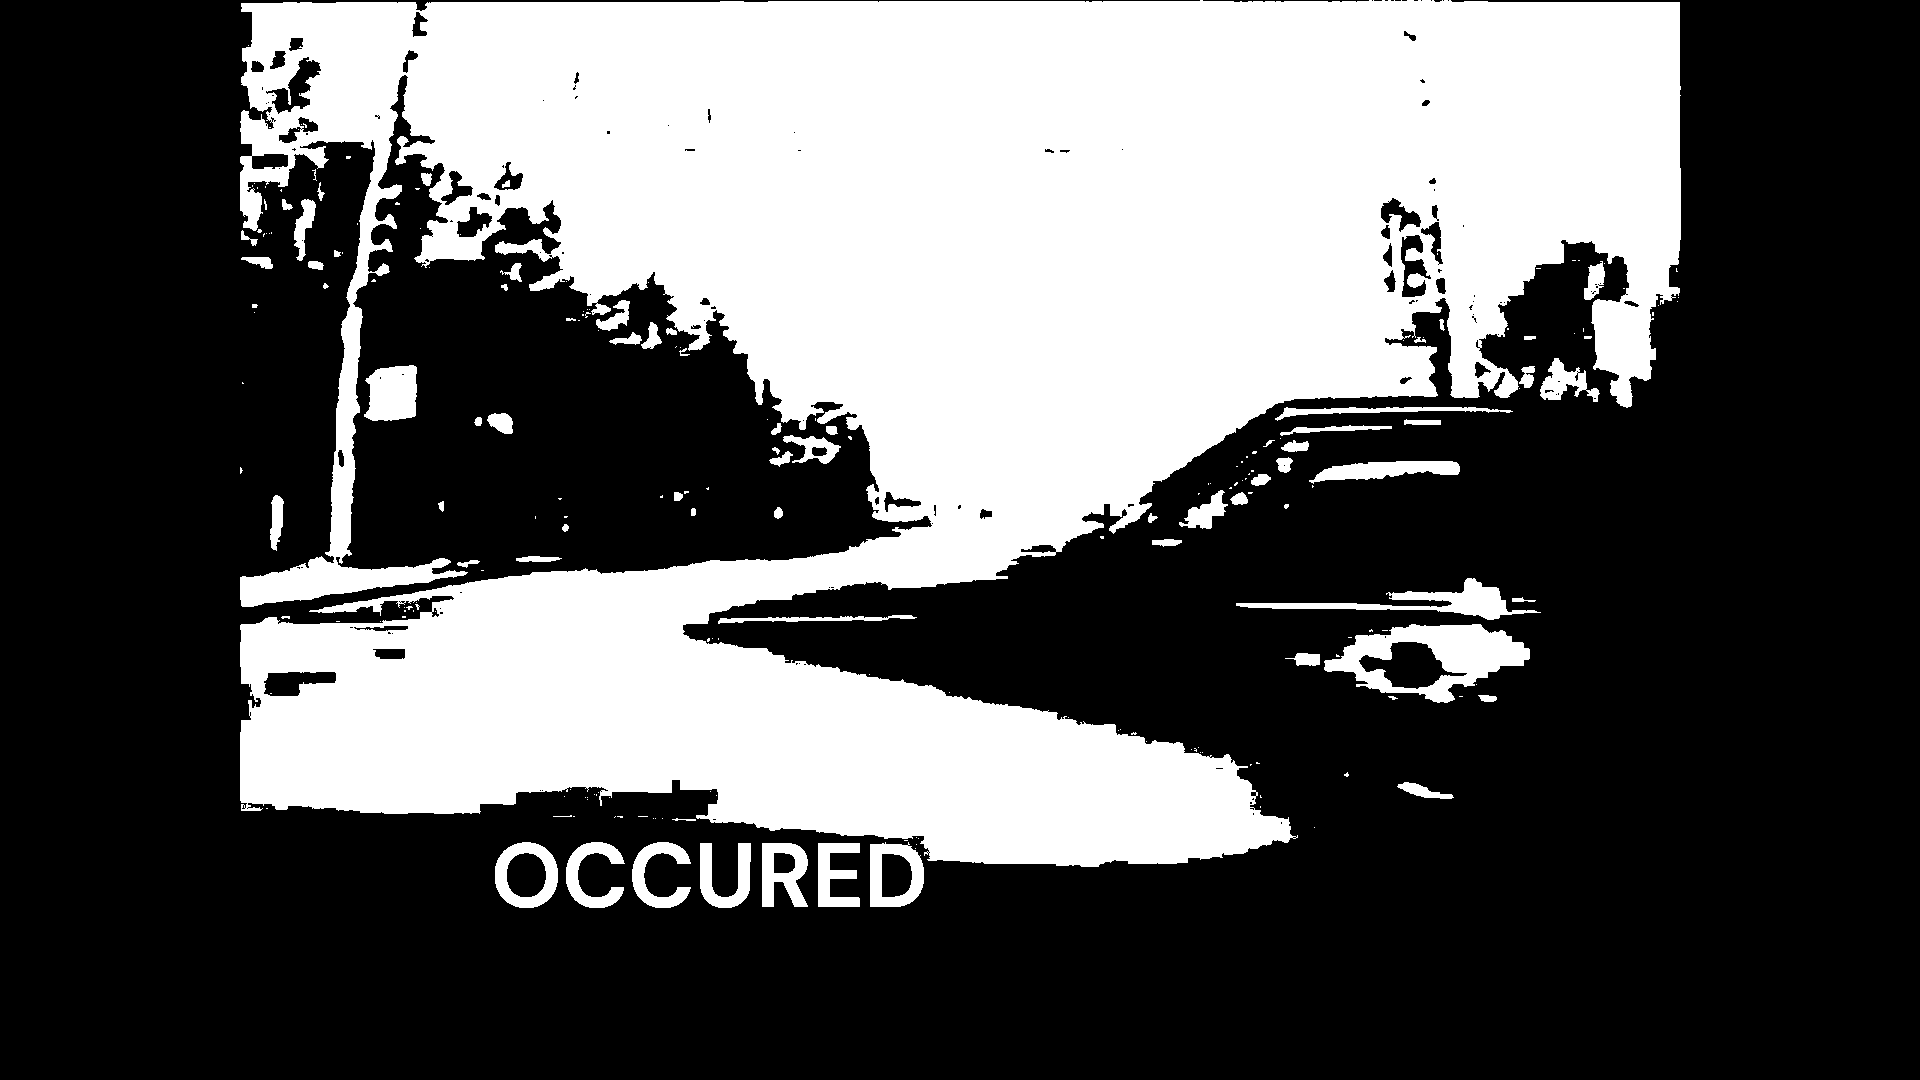

Processed Text:  

Prediction: [0]


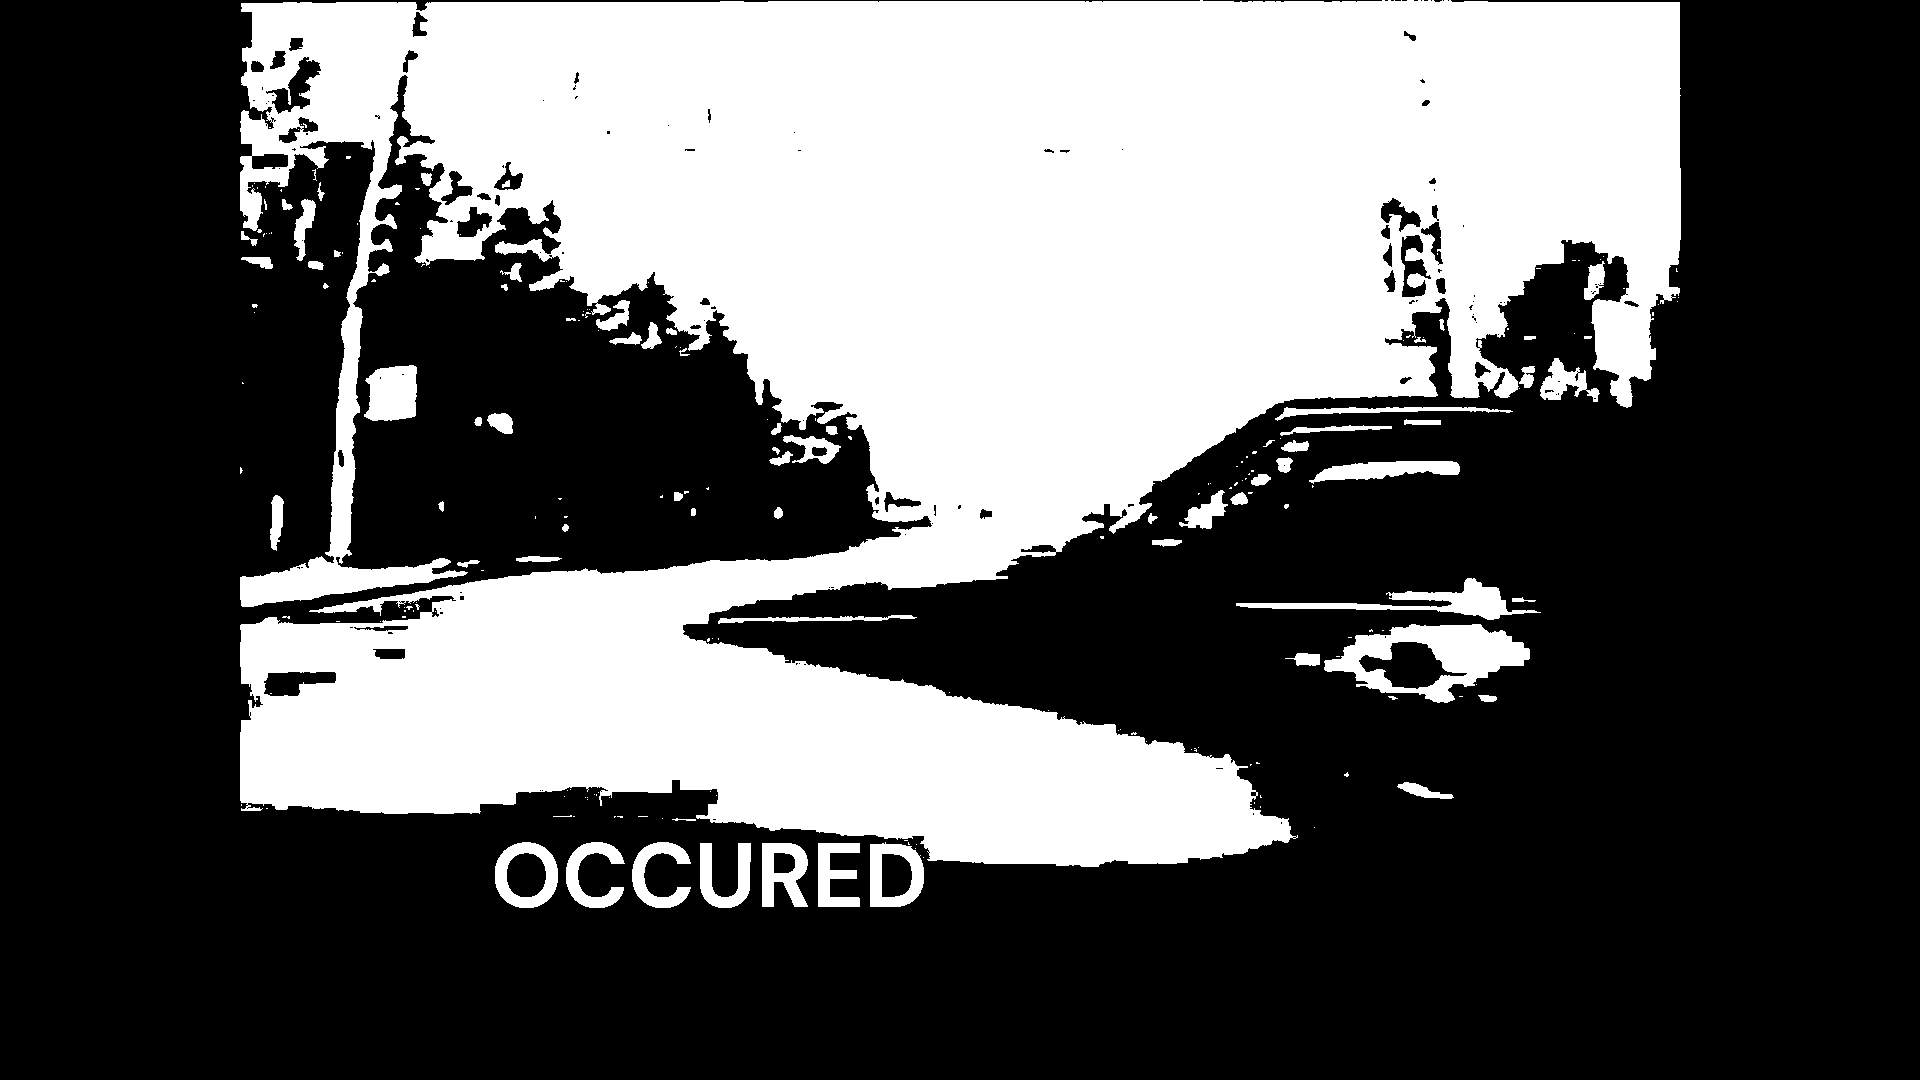

Processed Text:  

Prediction: [0]


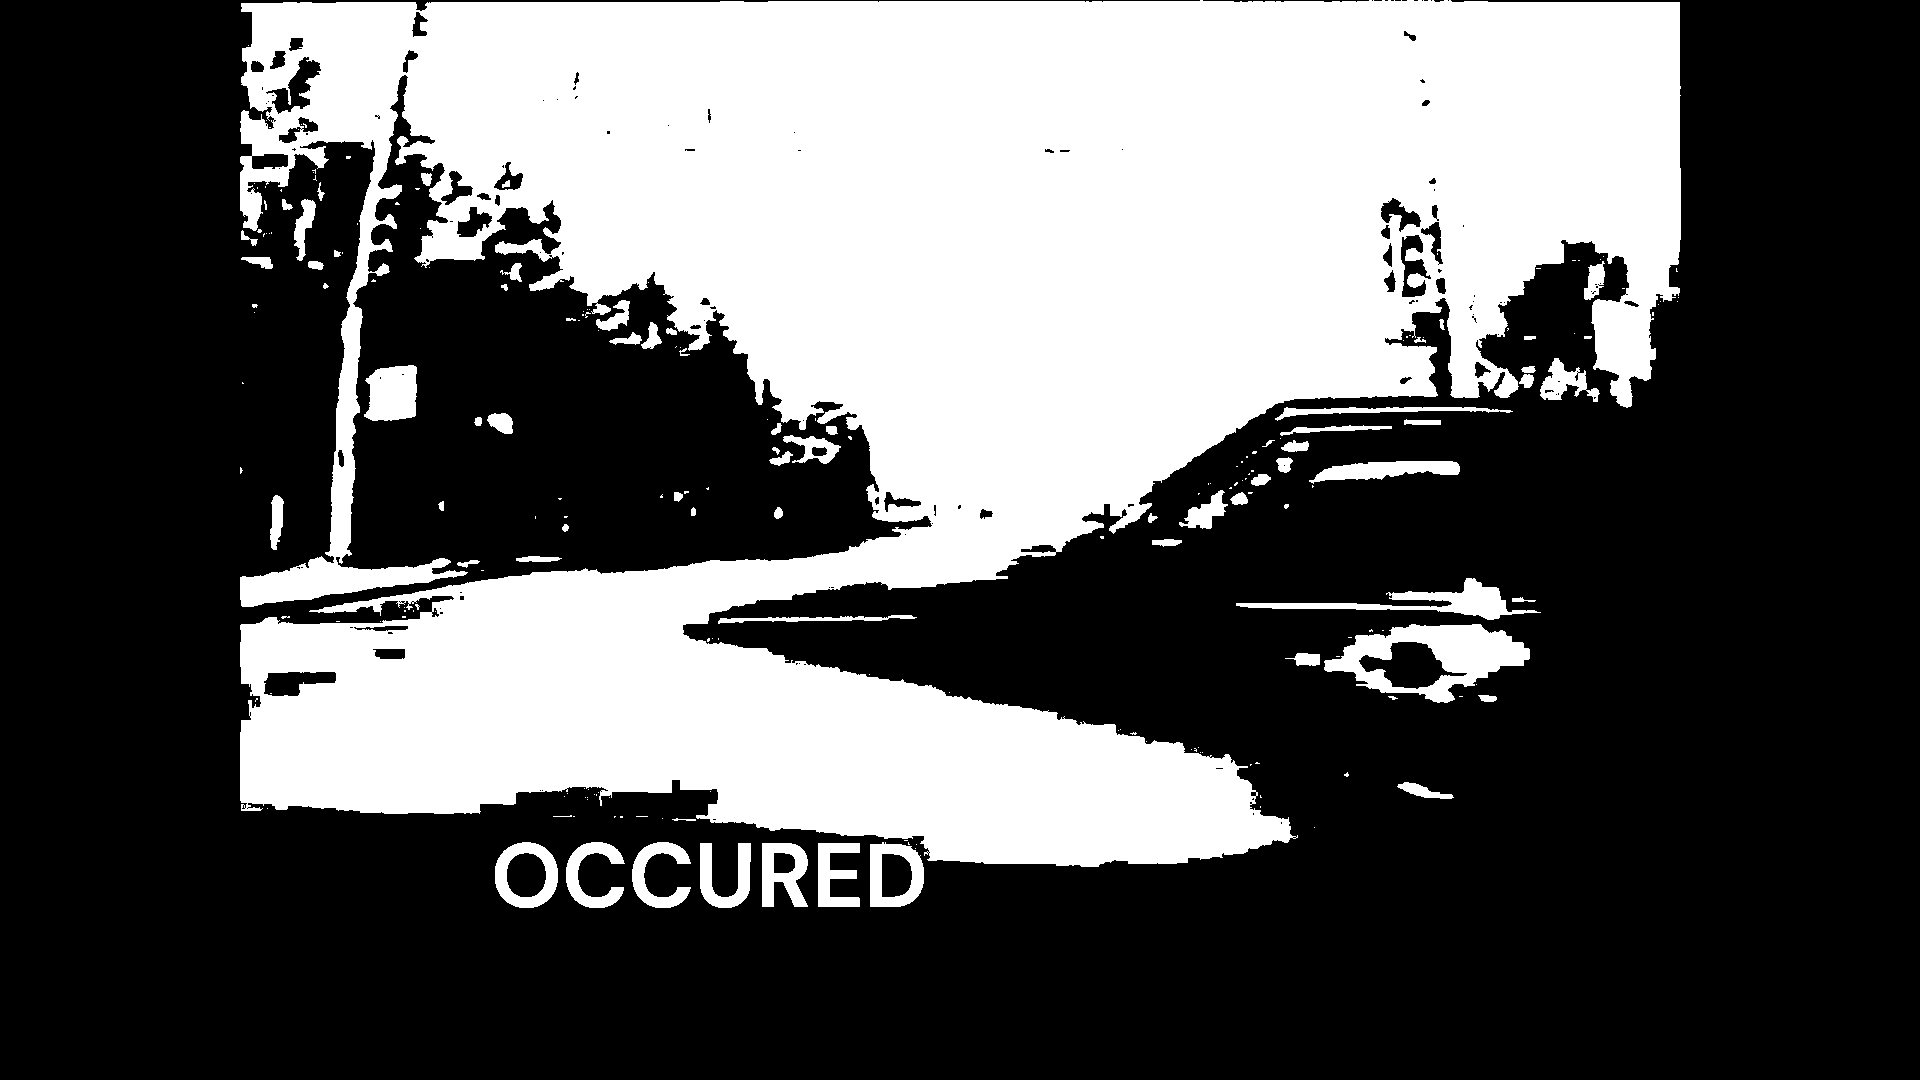

Processed Text:  

Prediction: [0]


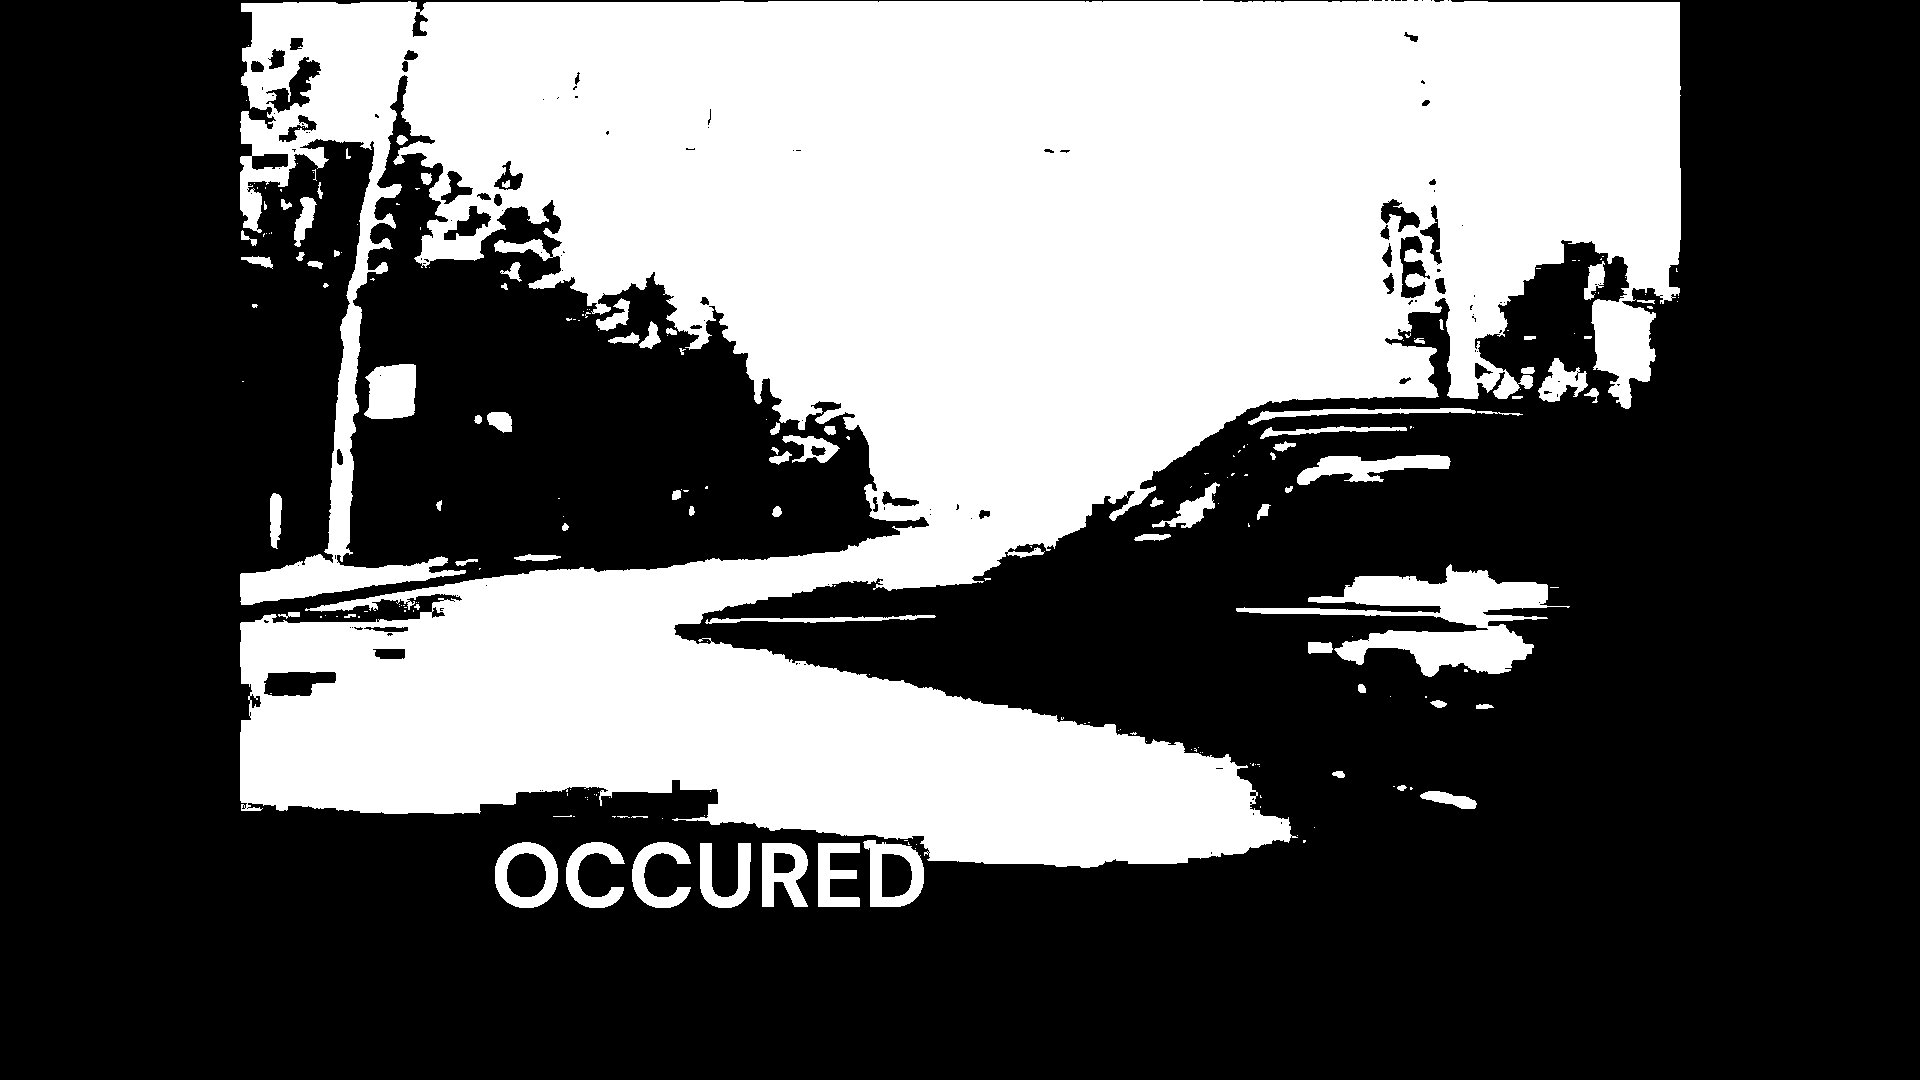

Processed Text:  

Prediction: [0]


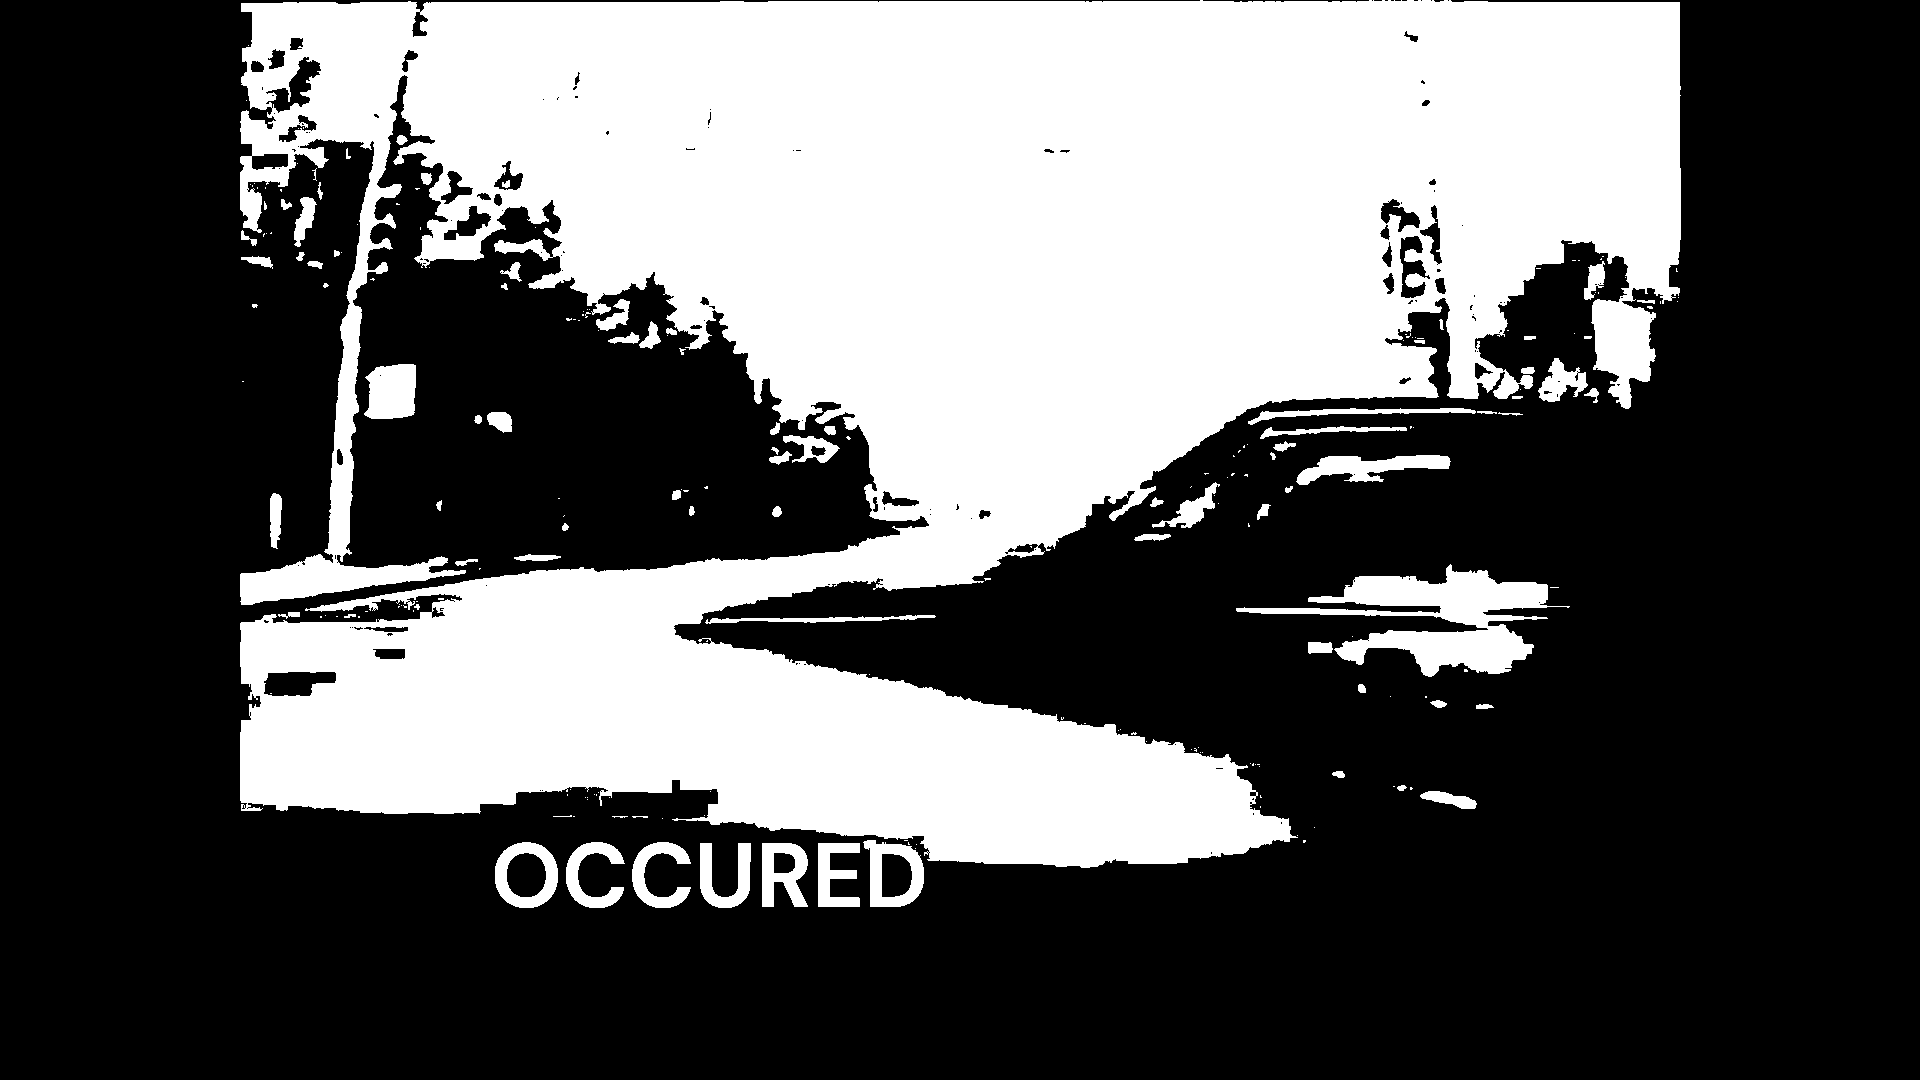

Processed Text:  

Prediction: [0]


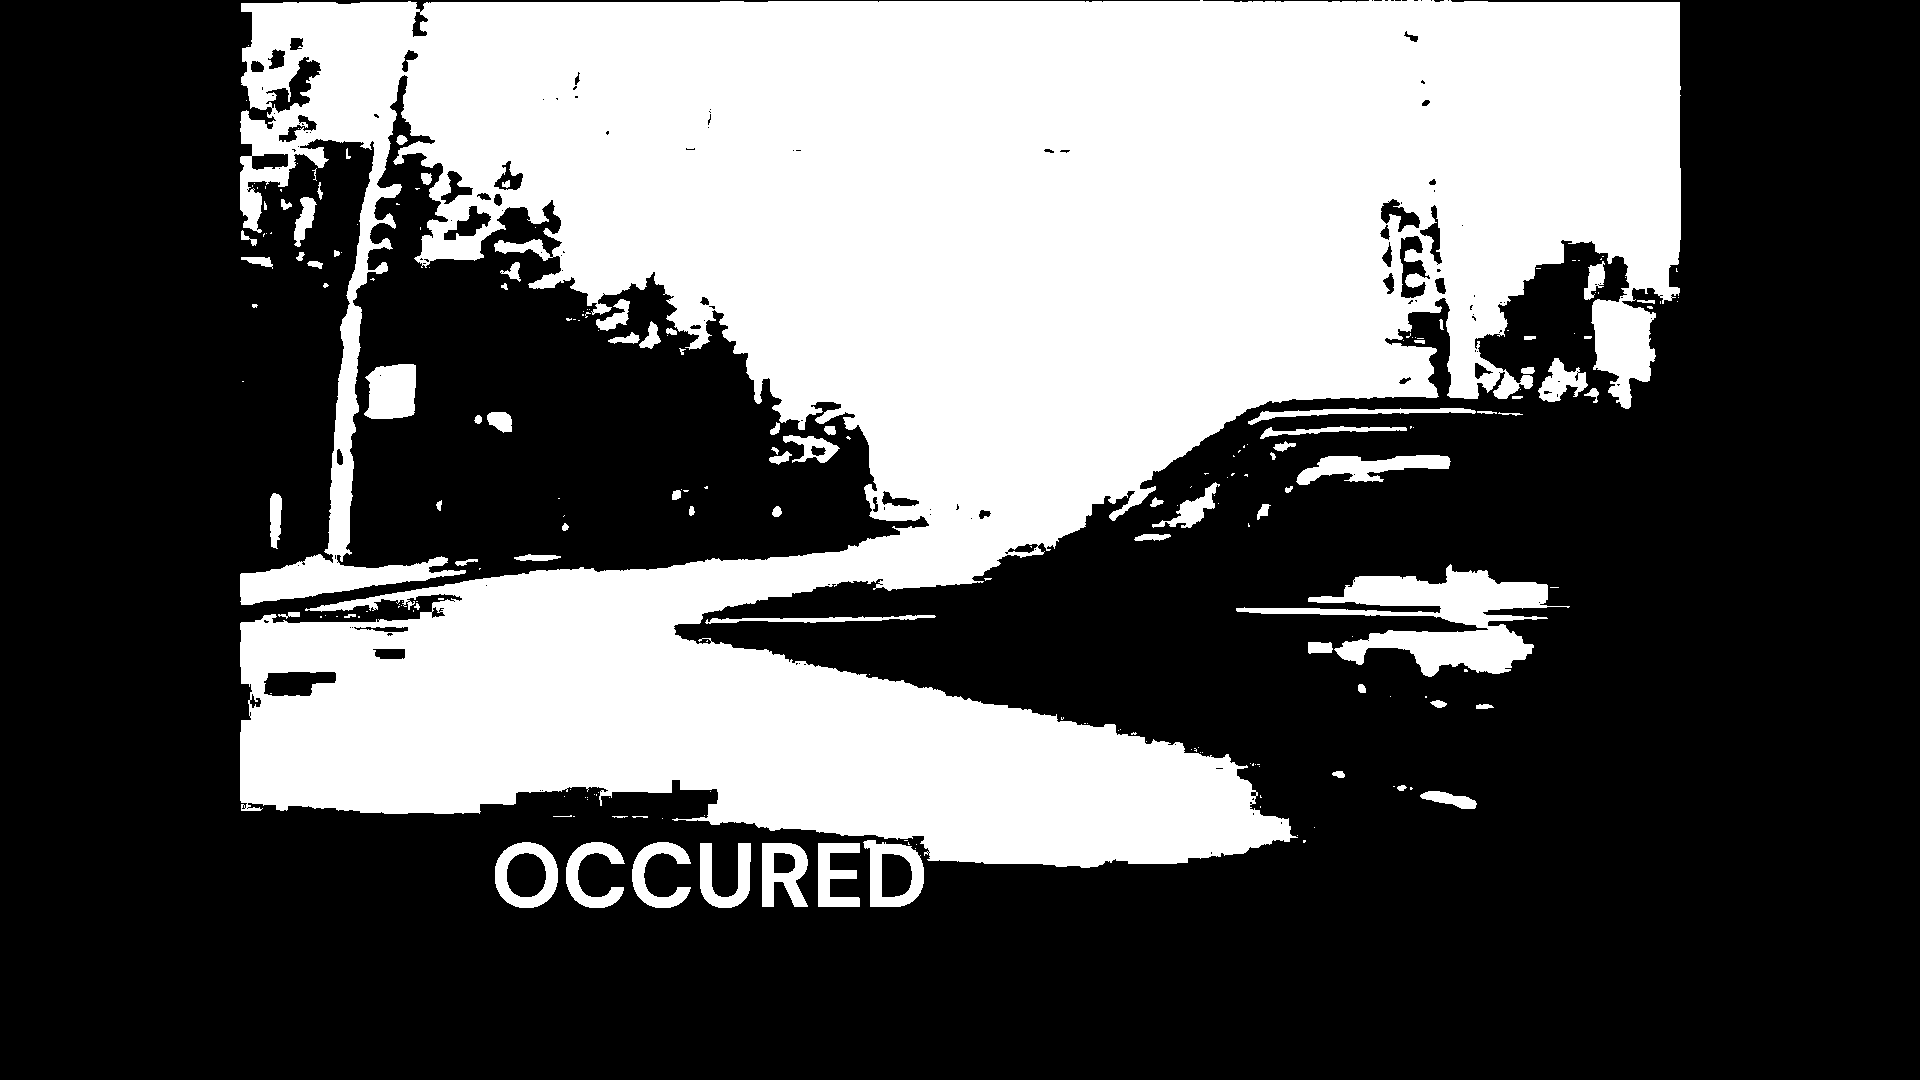

Processed Text:  

Prediction: [0]


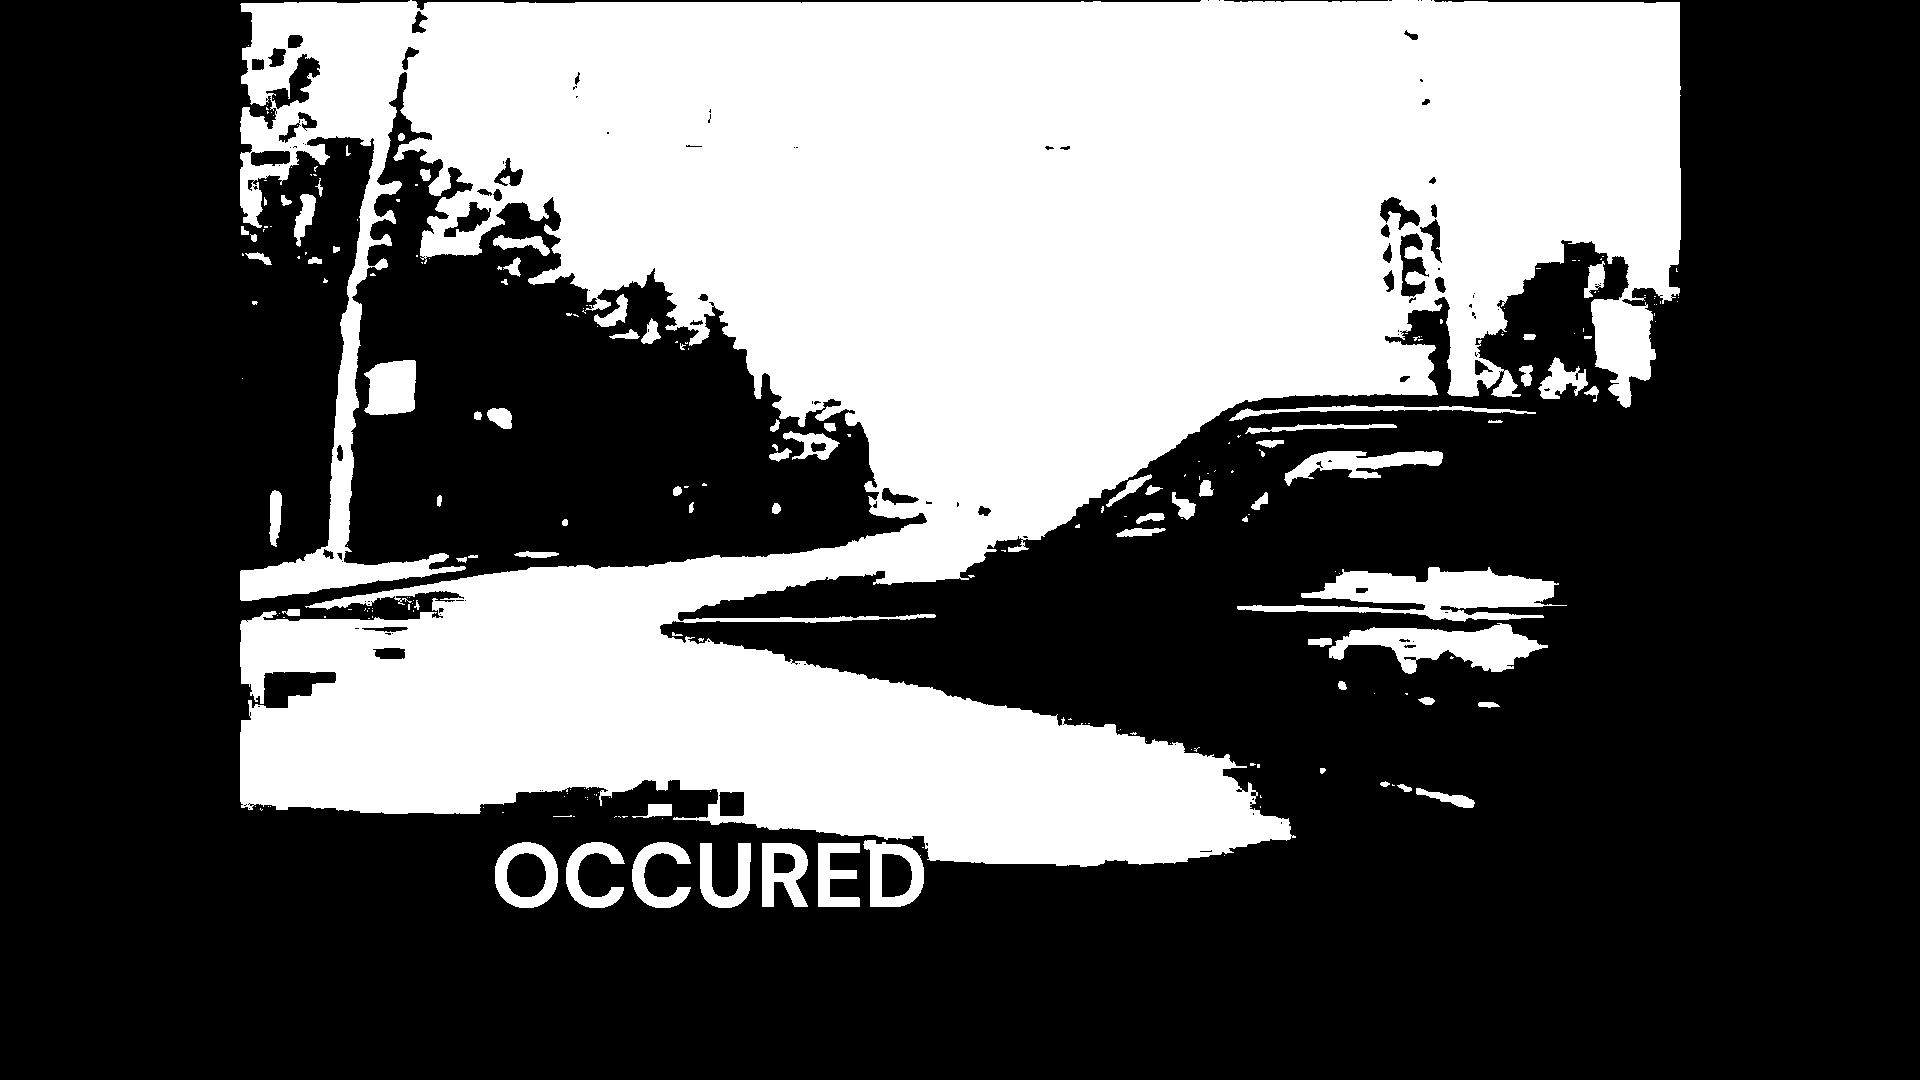

Processed Text:  

Prediction: [0]


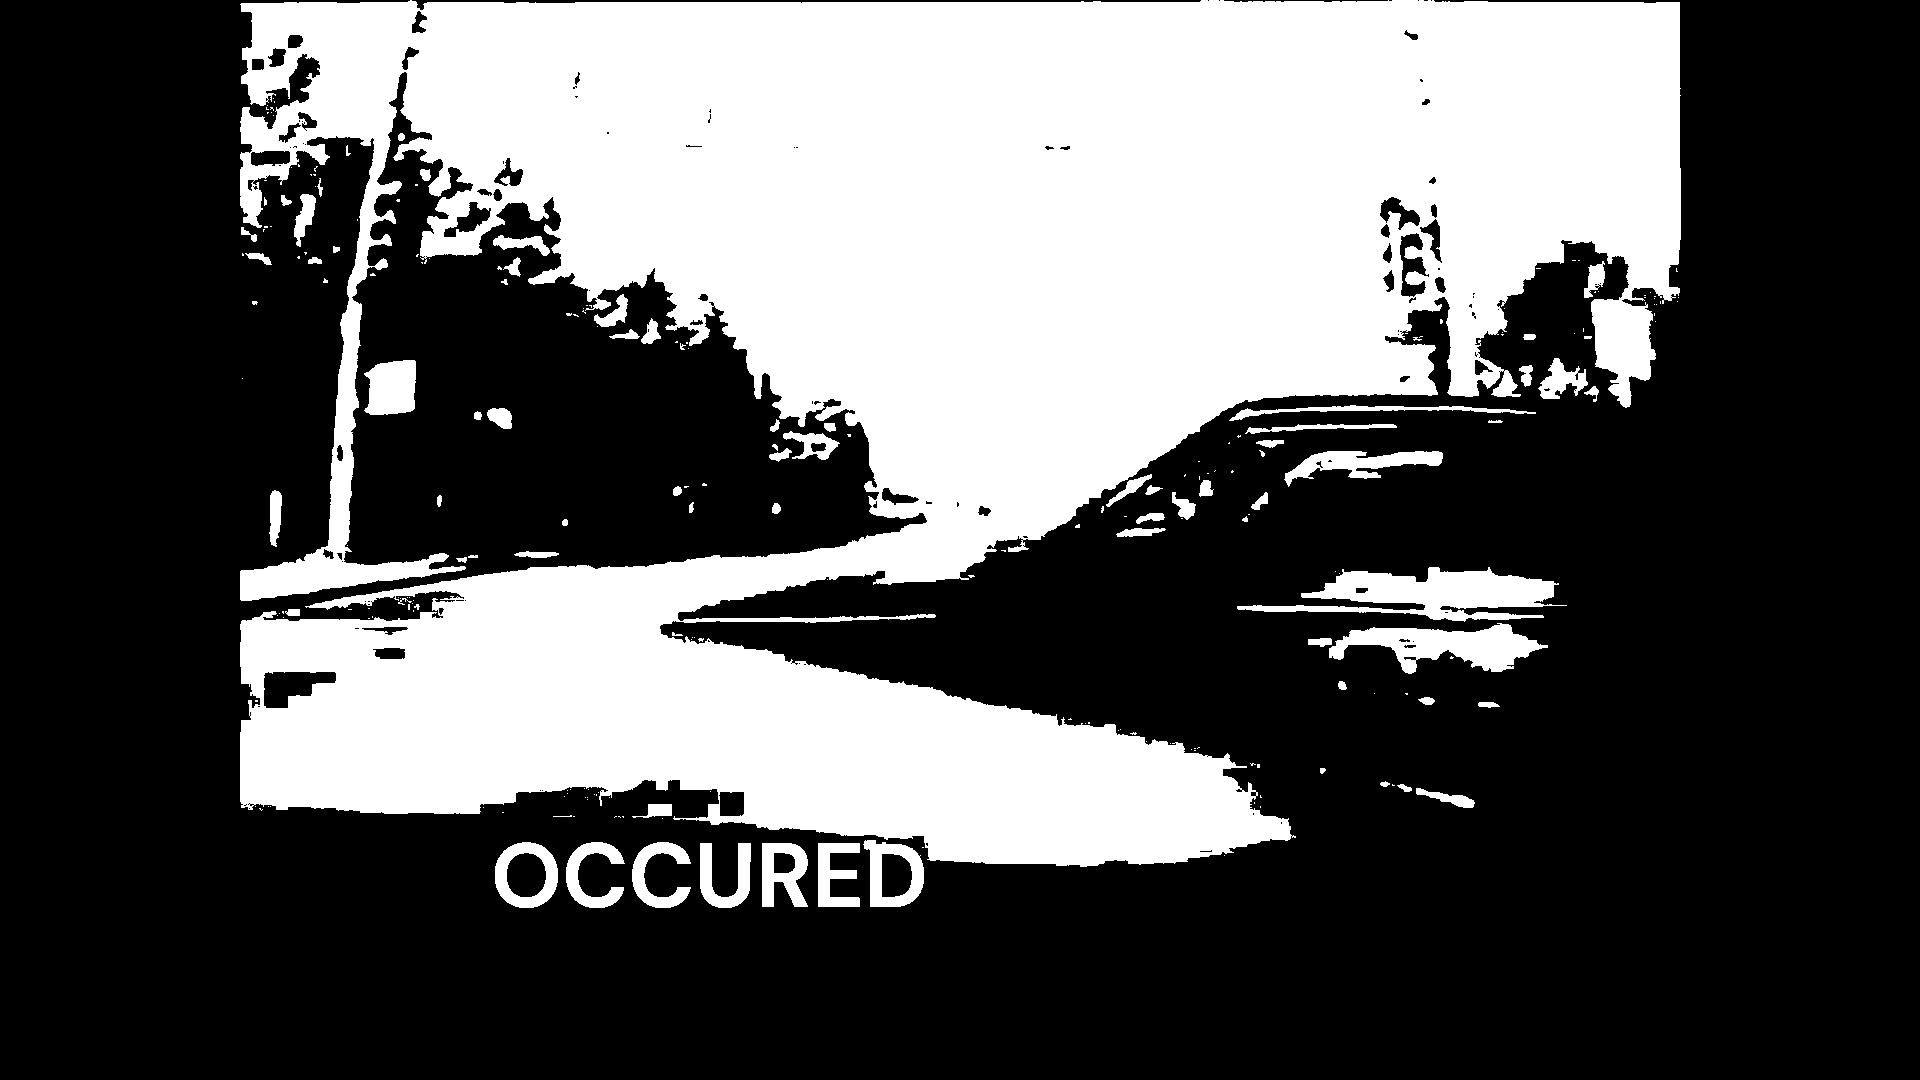

Processed Text:  

Prediction: [0]


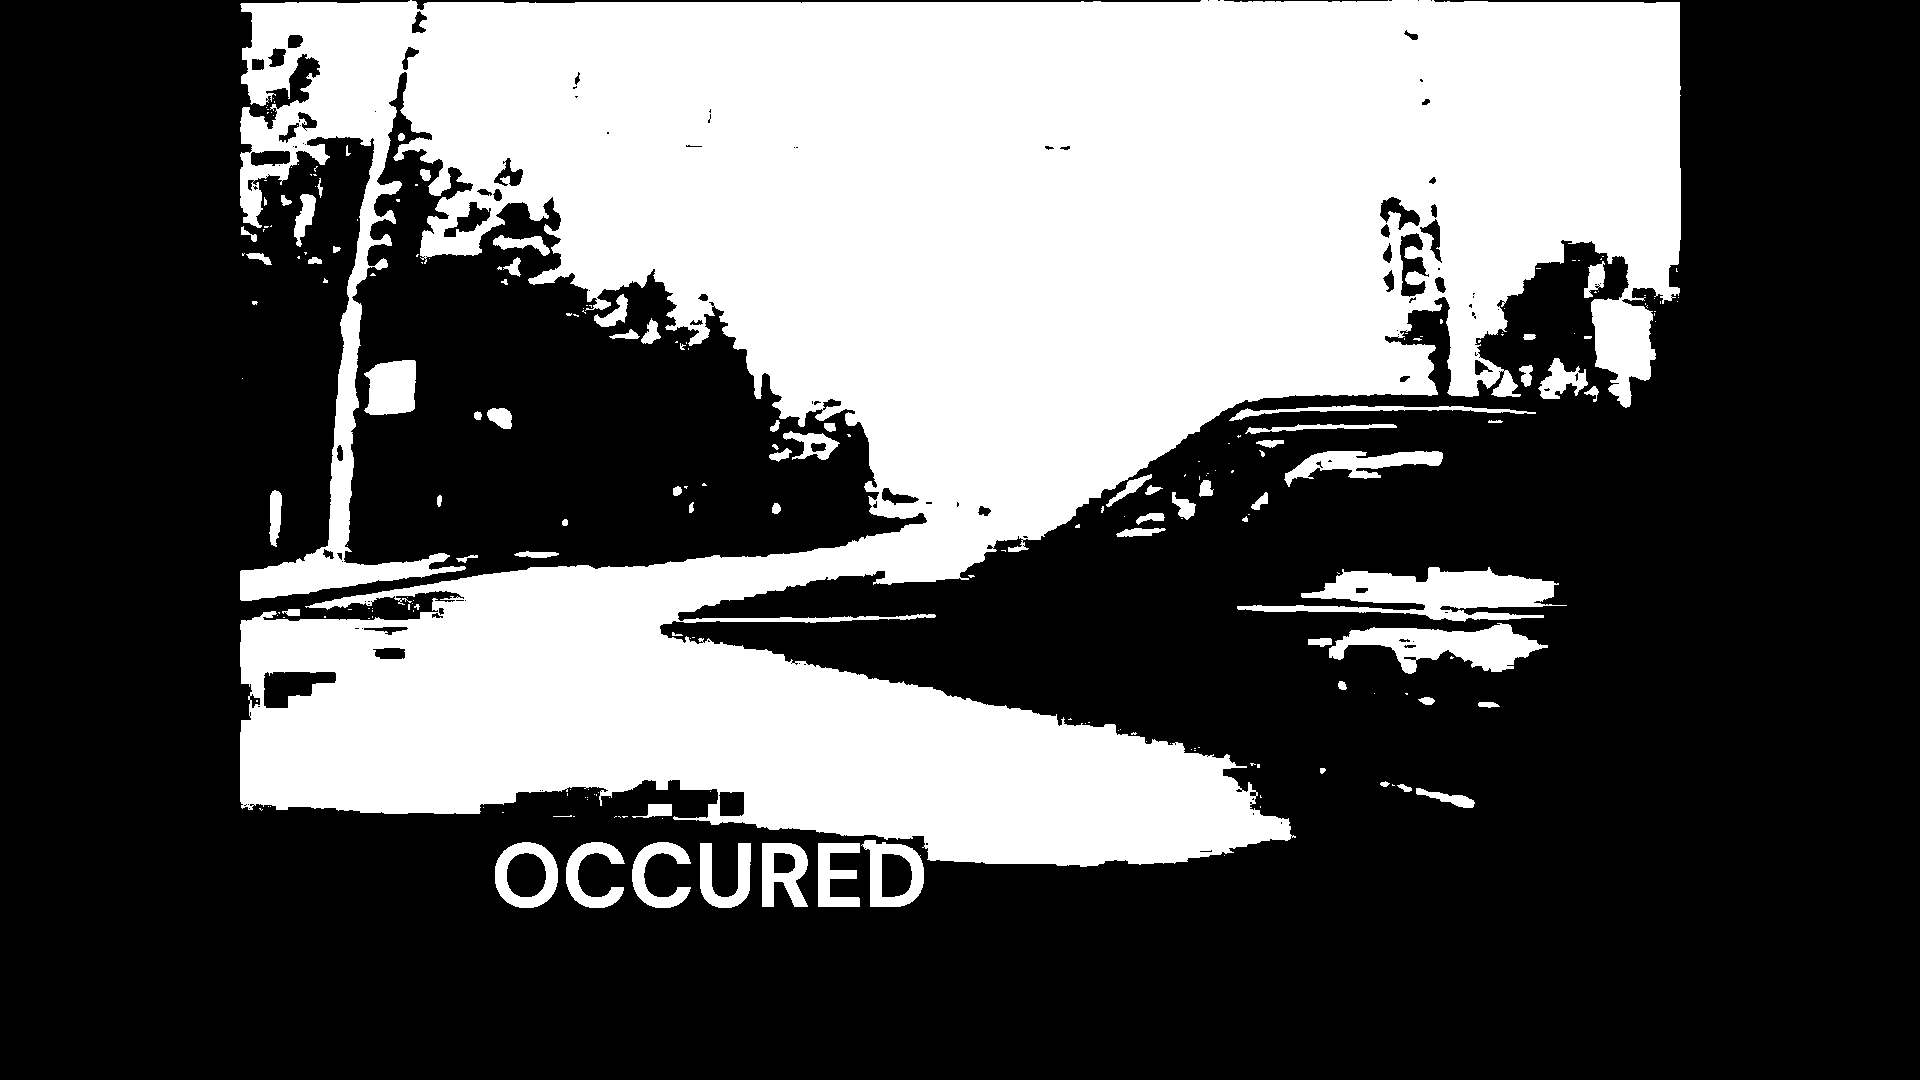

Processed Text:  

Prediction: [0]


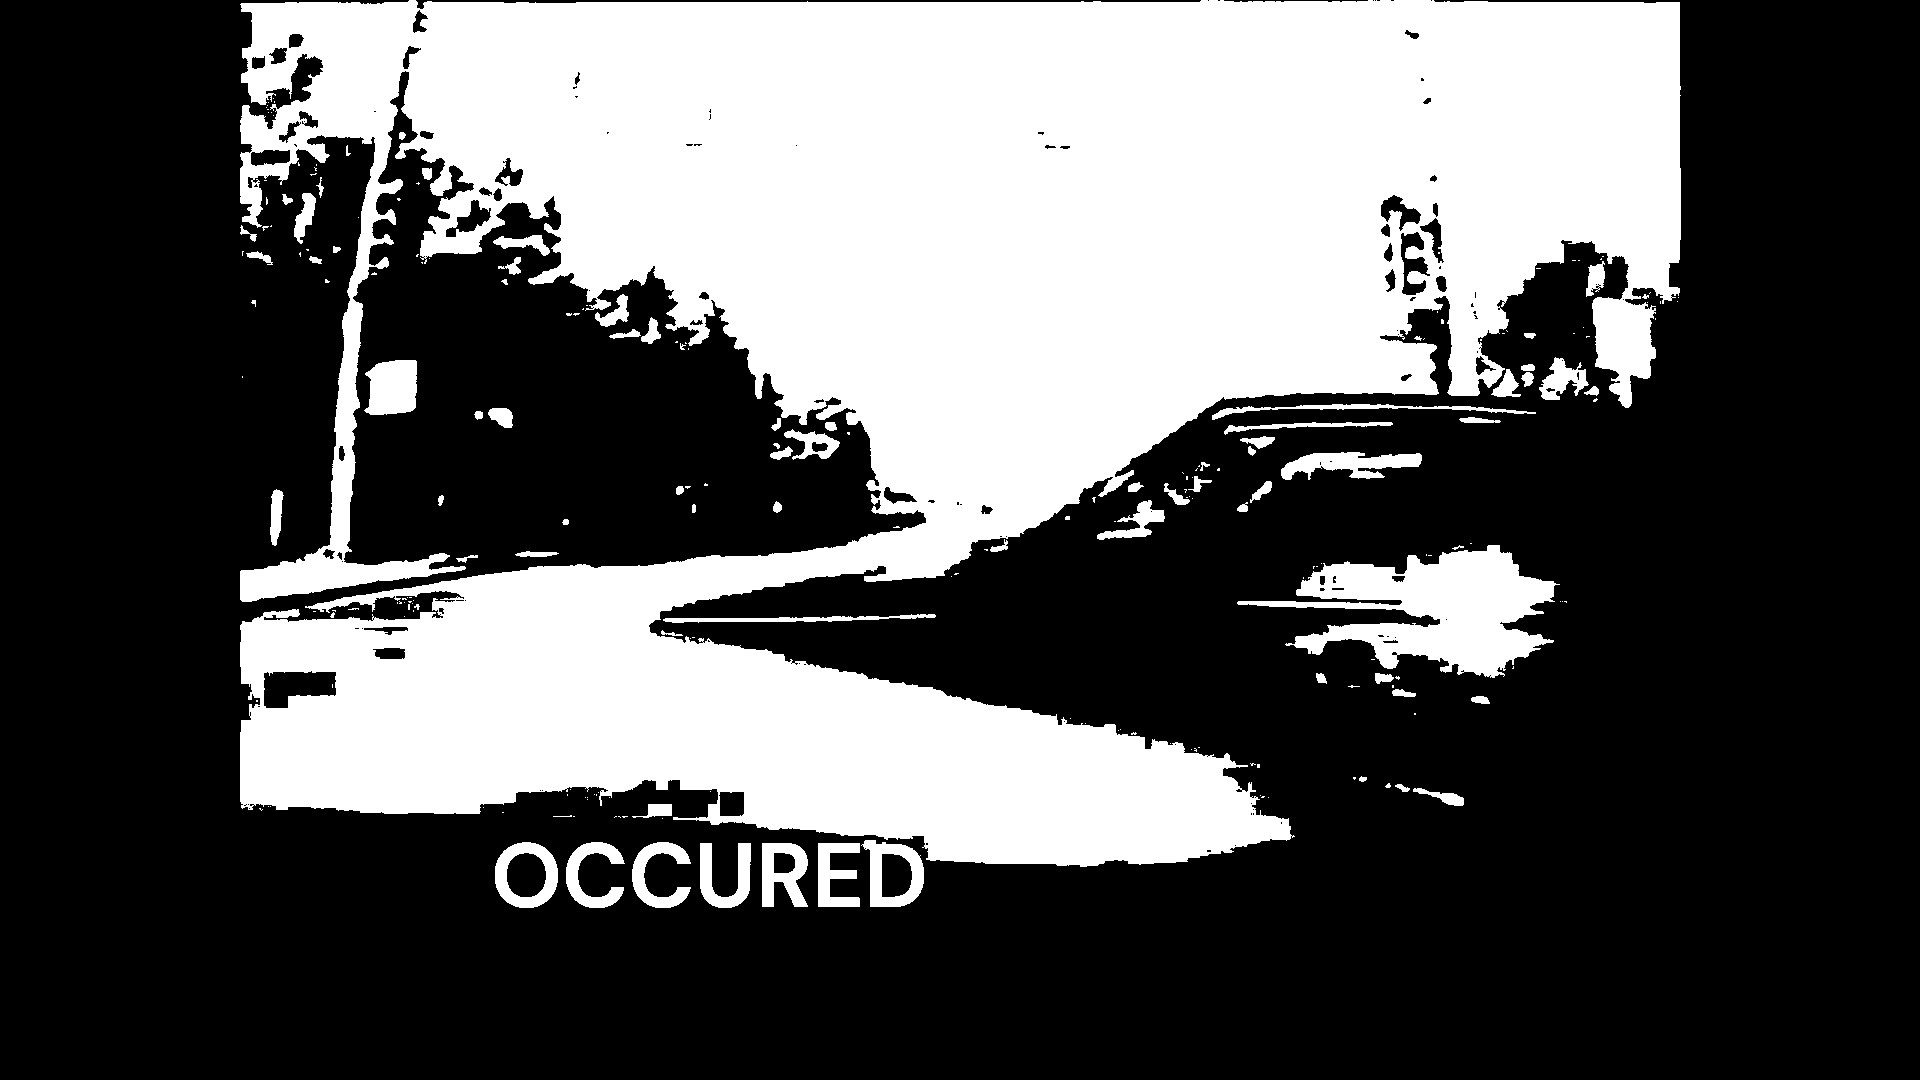

Processed Text:  

Prediction: [0]


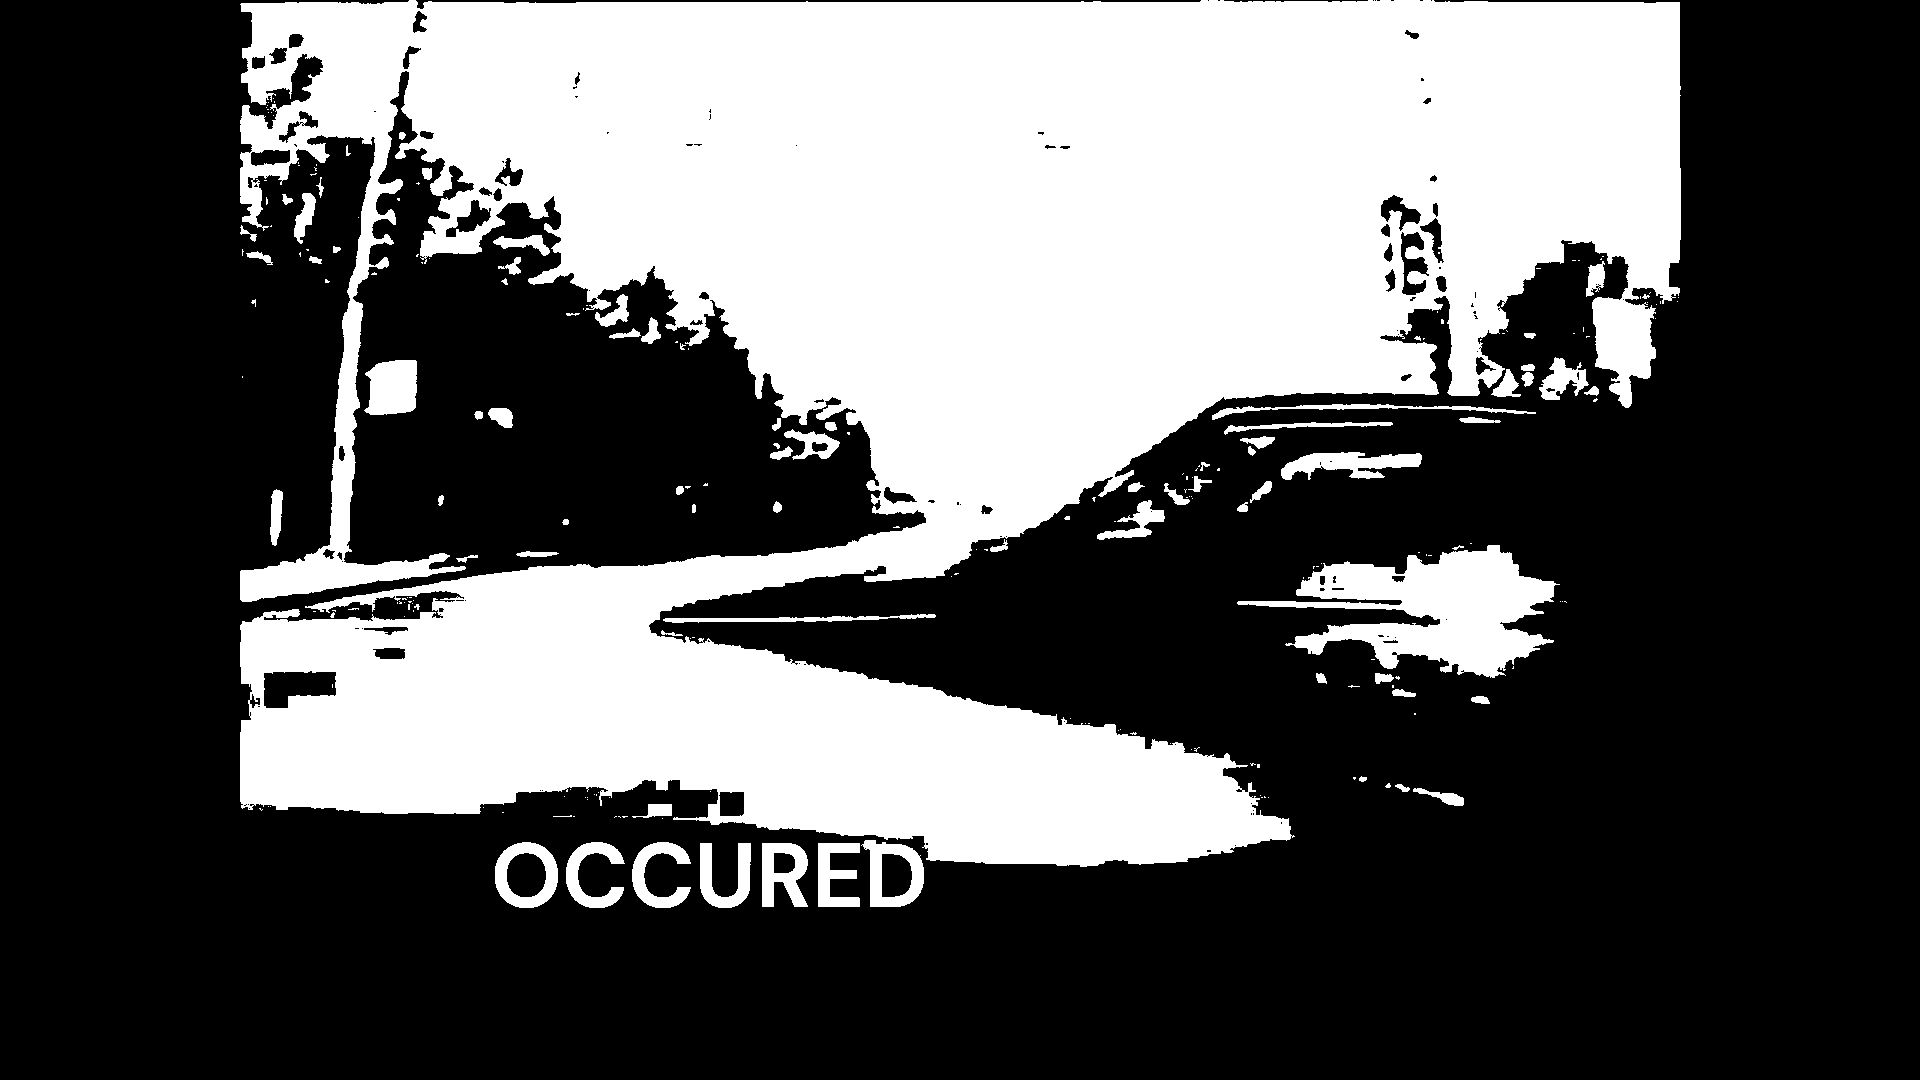

Processed Text:  

Prediction: [0]


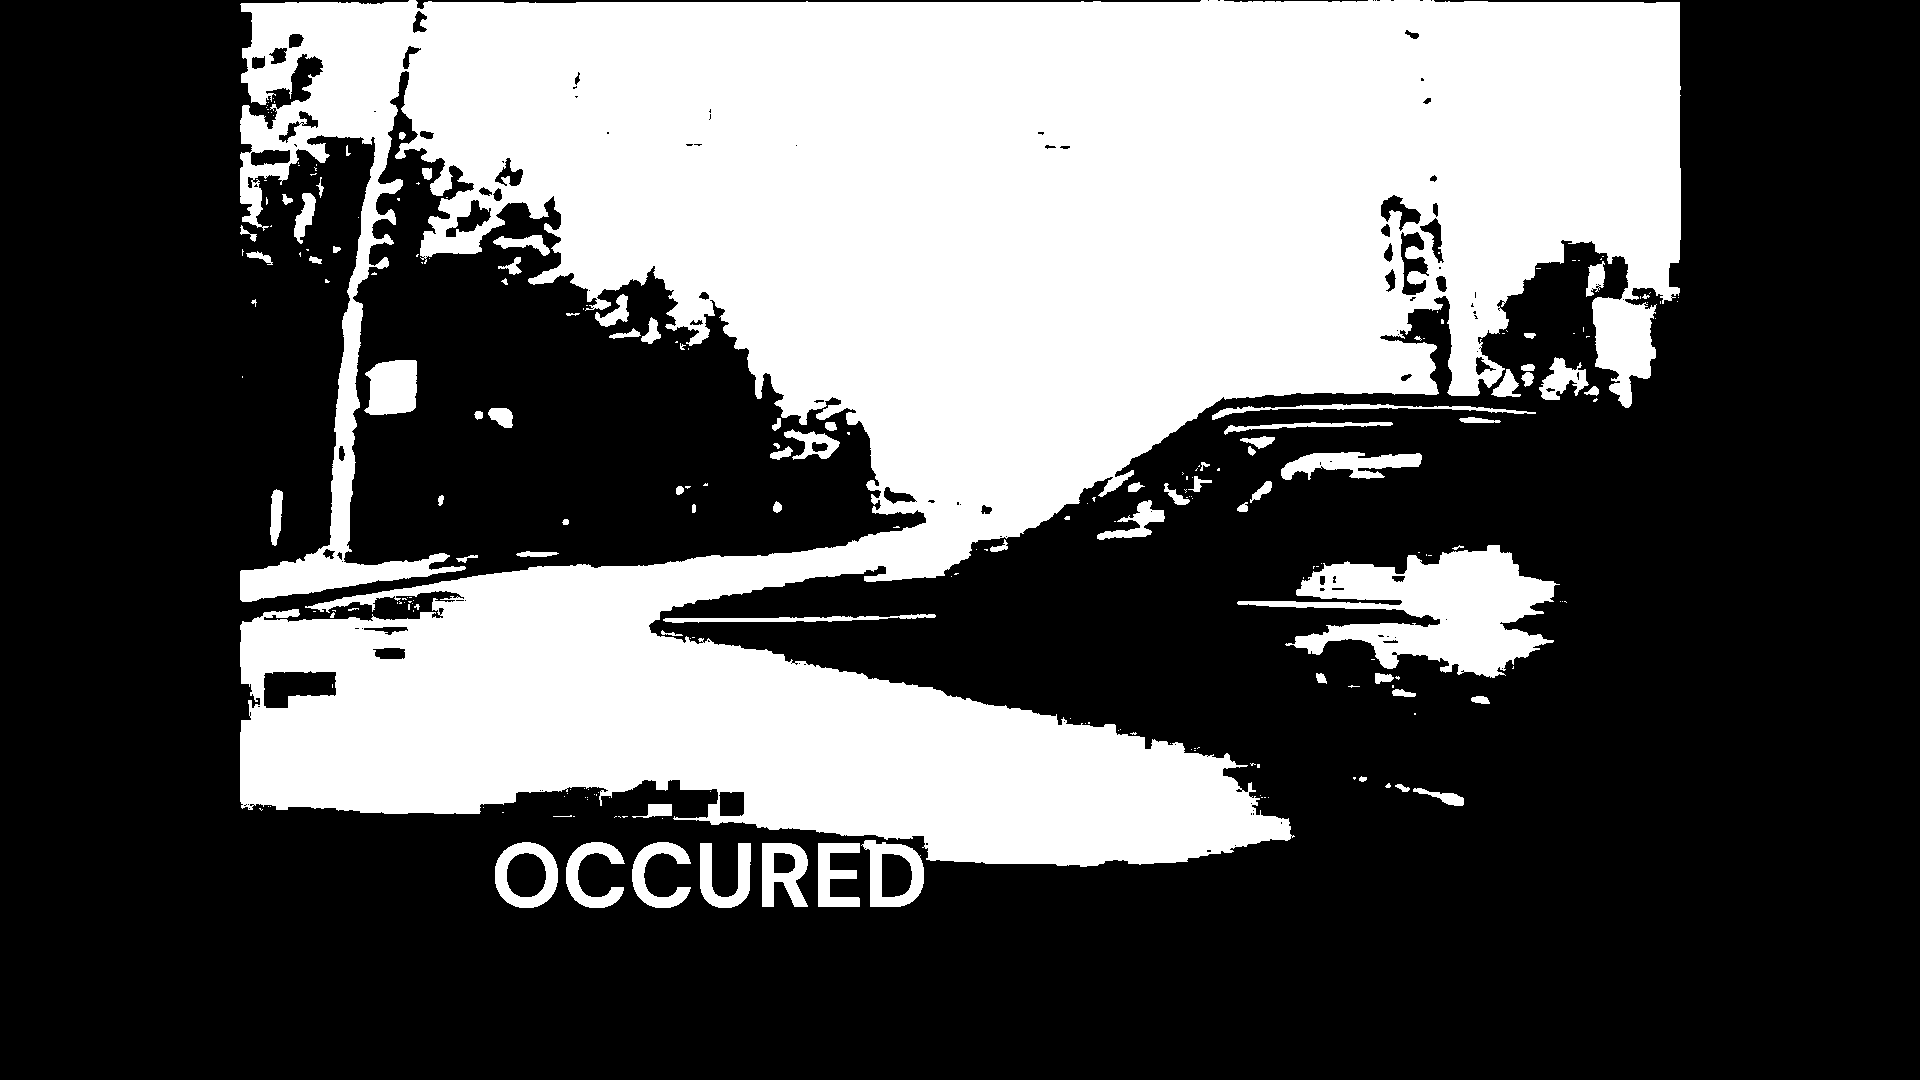

Processed Text:    

OCCURED

Prediction: [0]


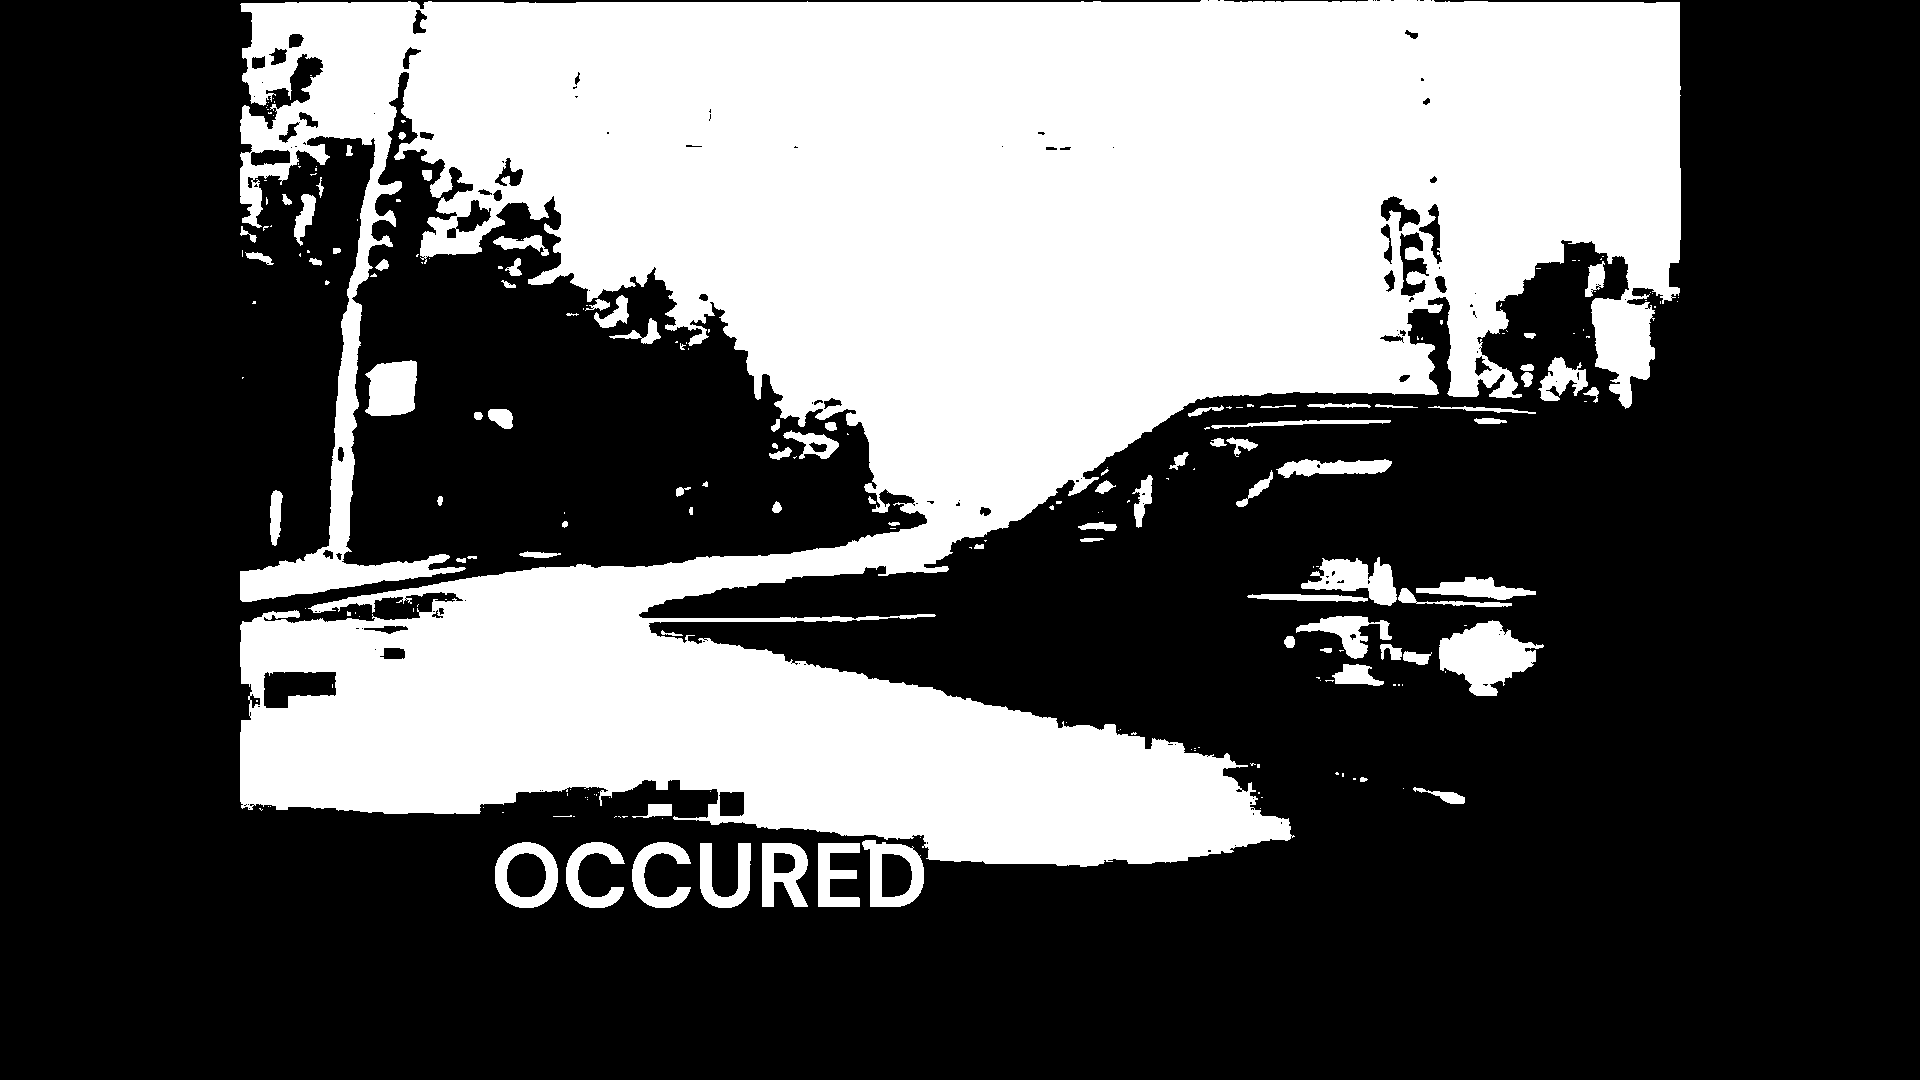

Processed Text:    

OCCURED

Prediction: [0]


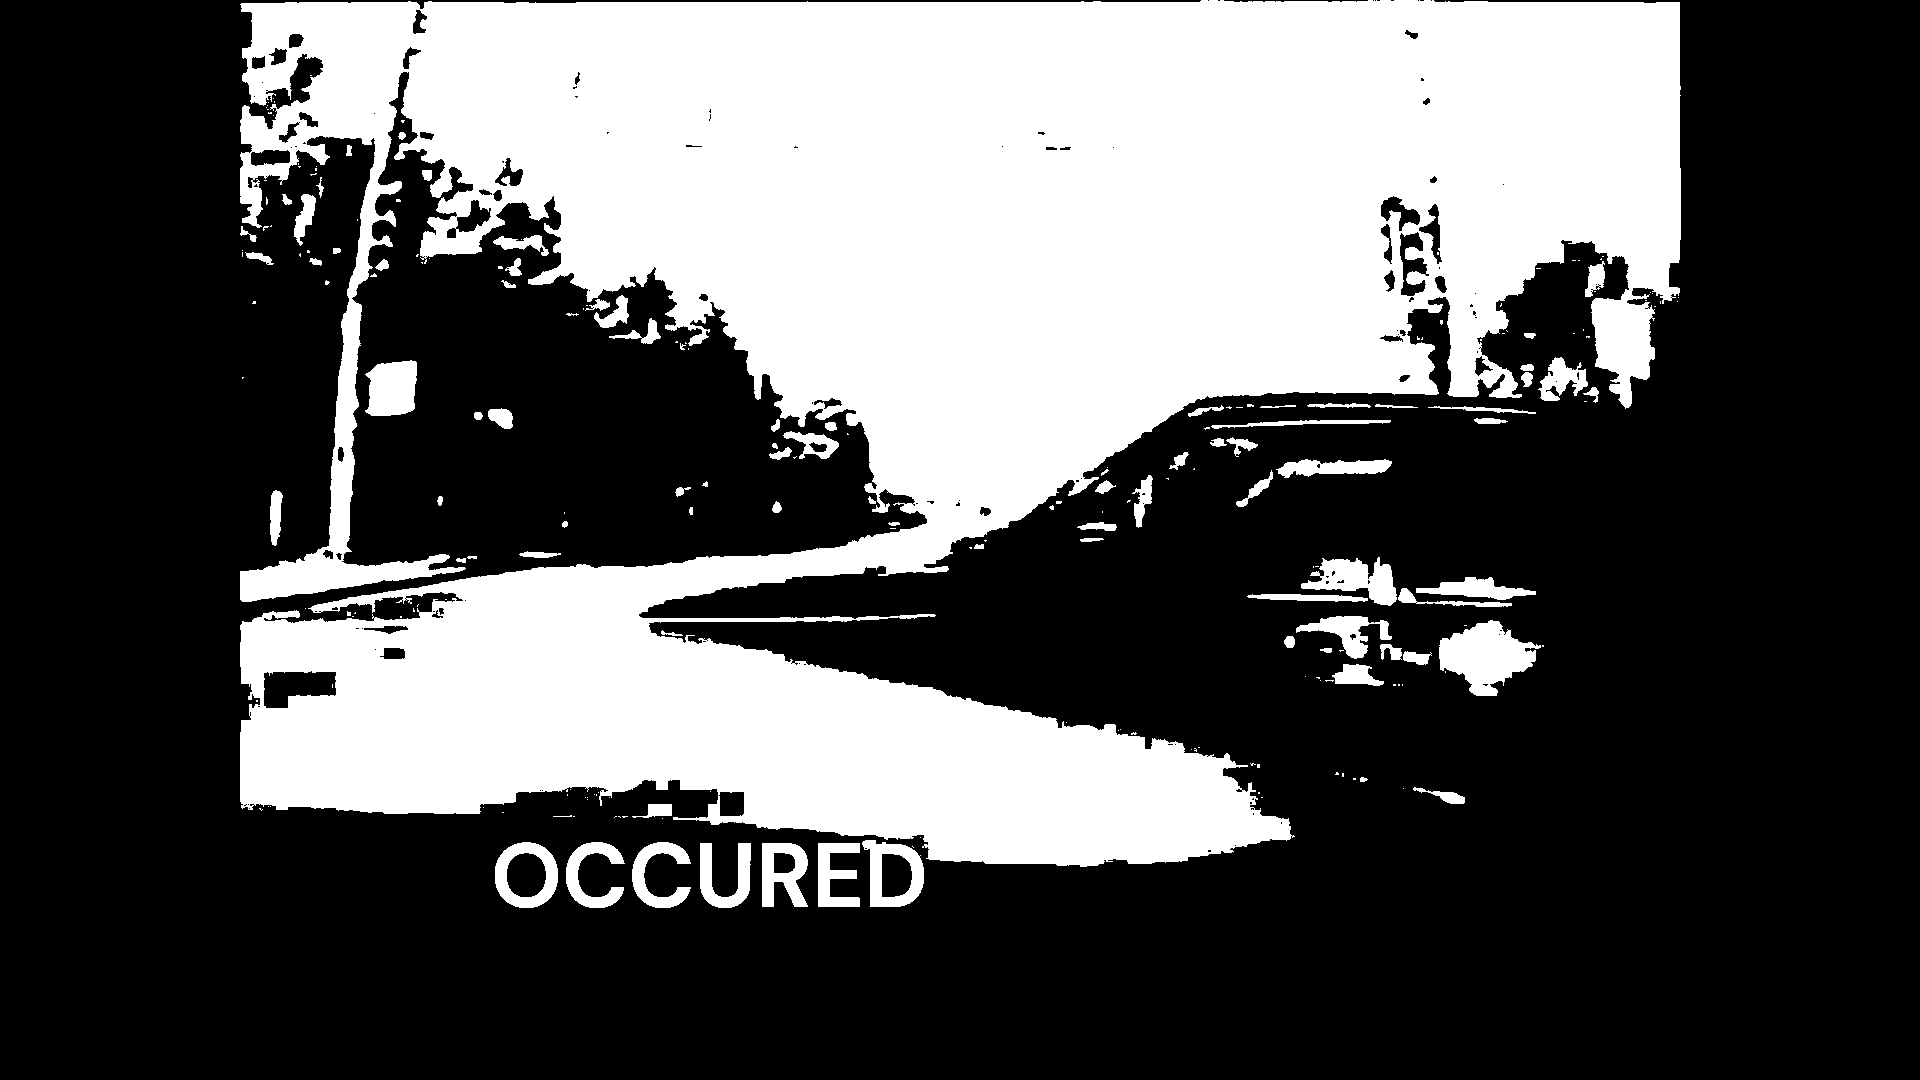

Processed Text:    

OCCURED

Prediction: [0]


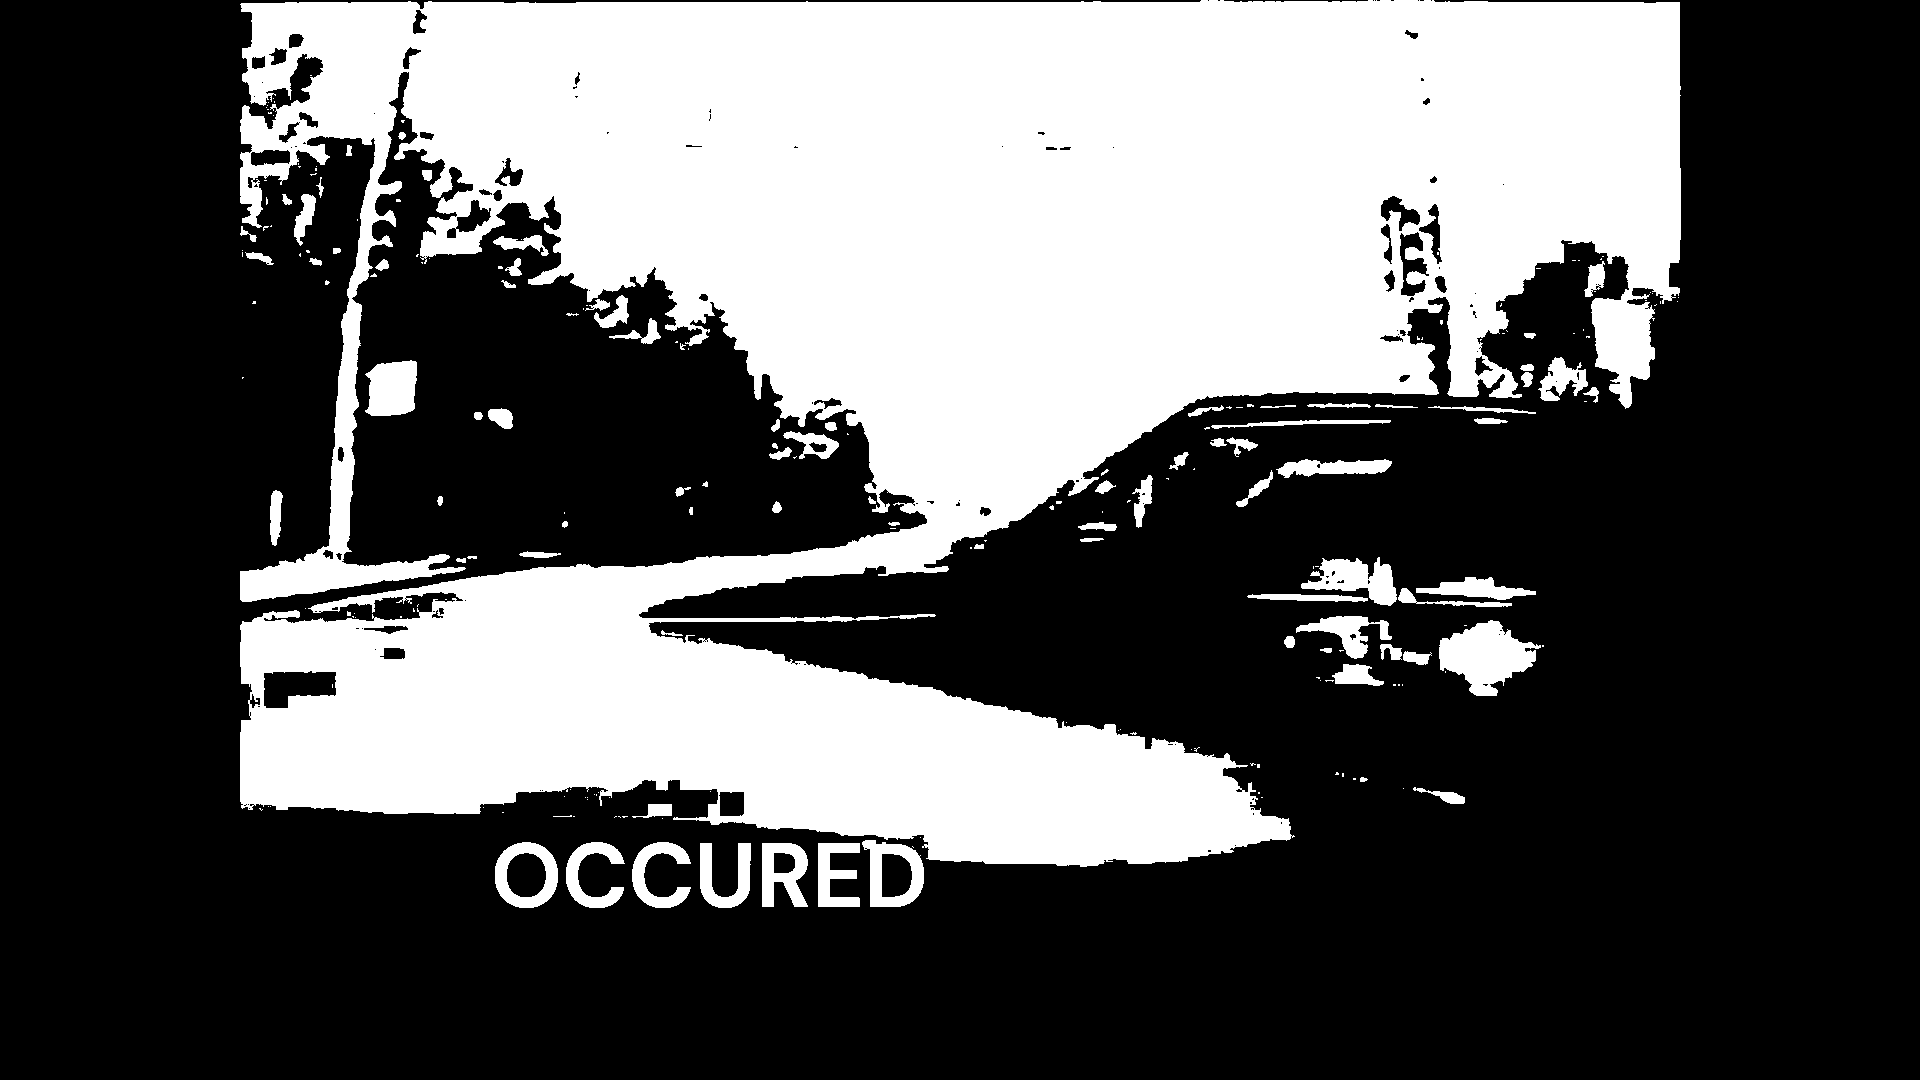

Processed Text:  

Prediction: [0]


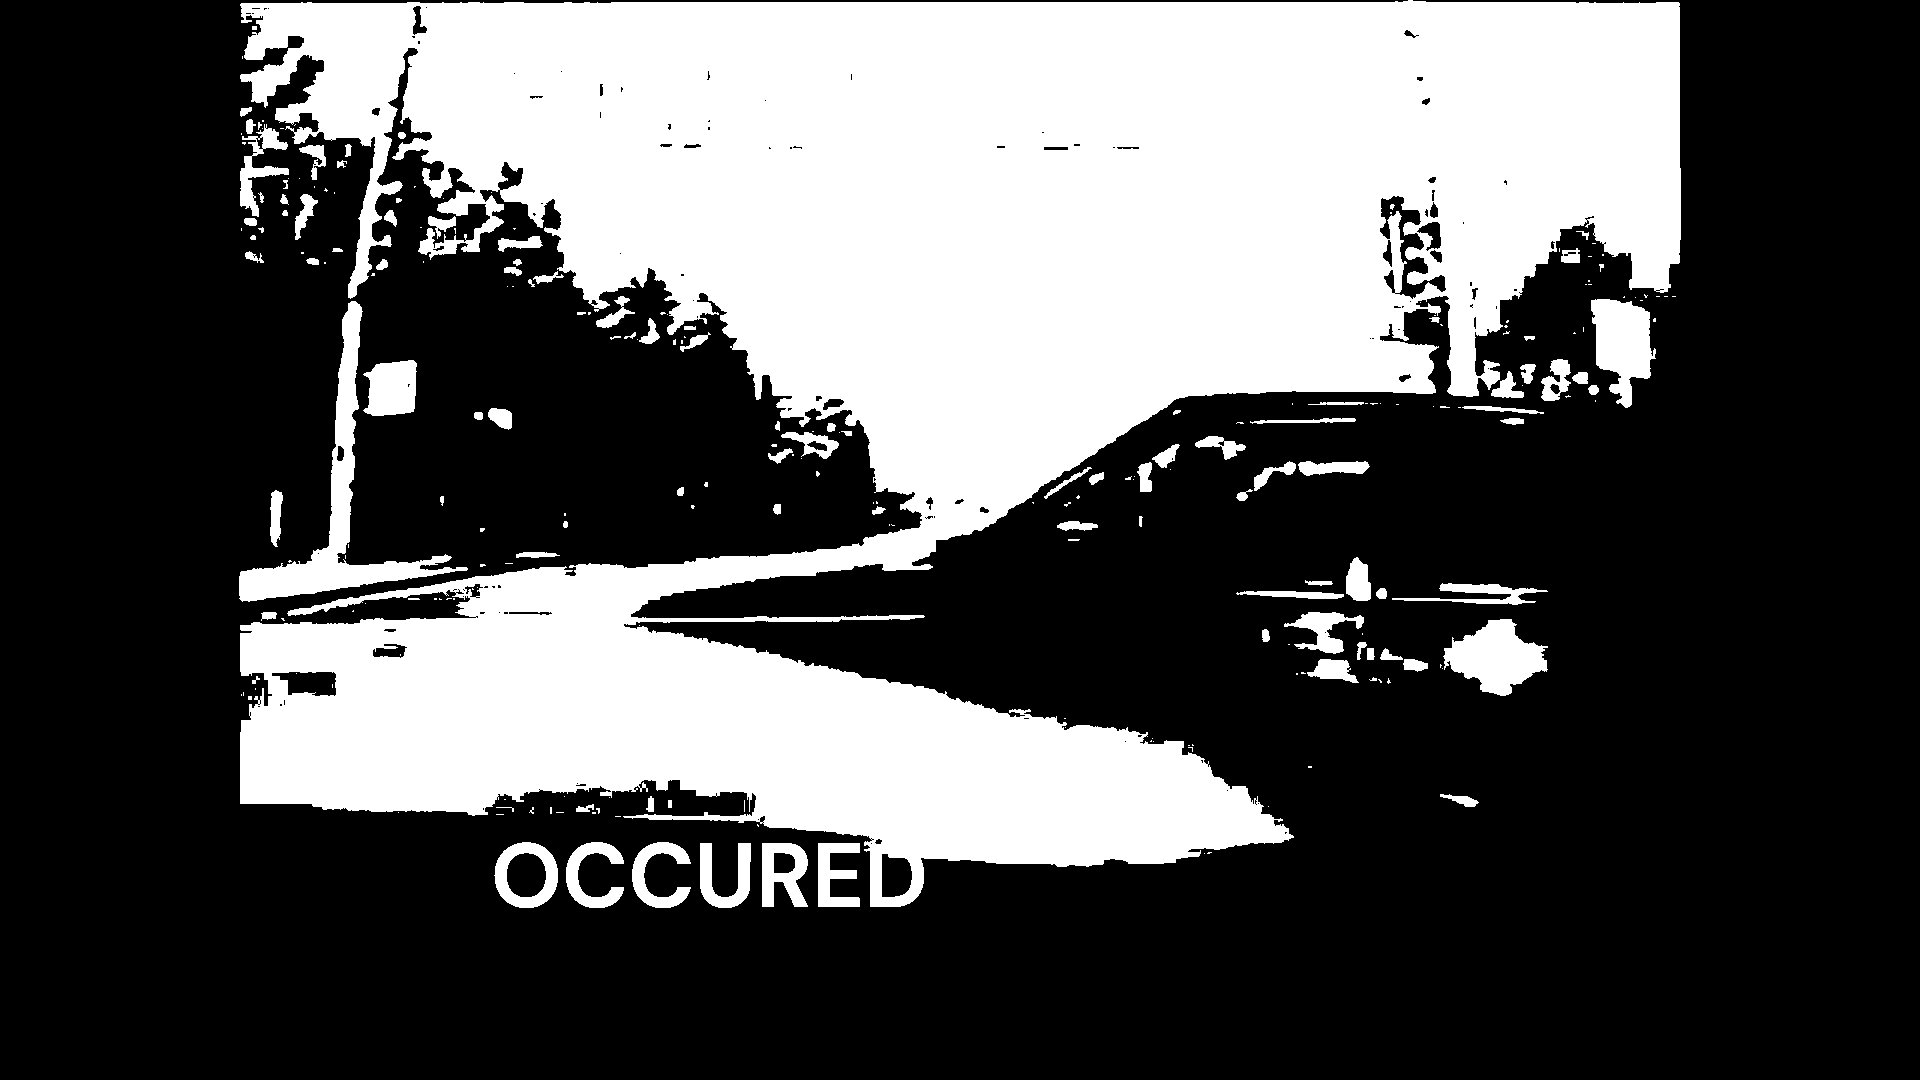

Processed Text:  

Prediction: [0]


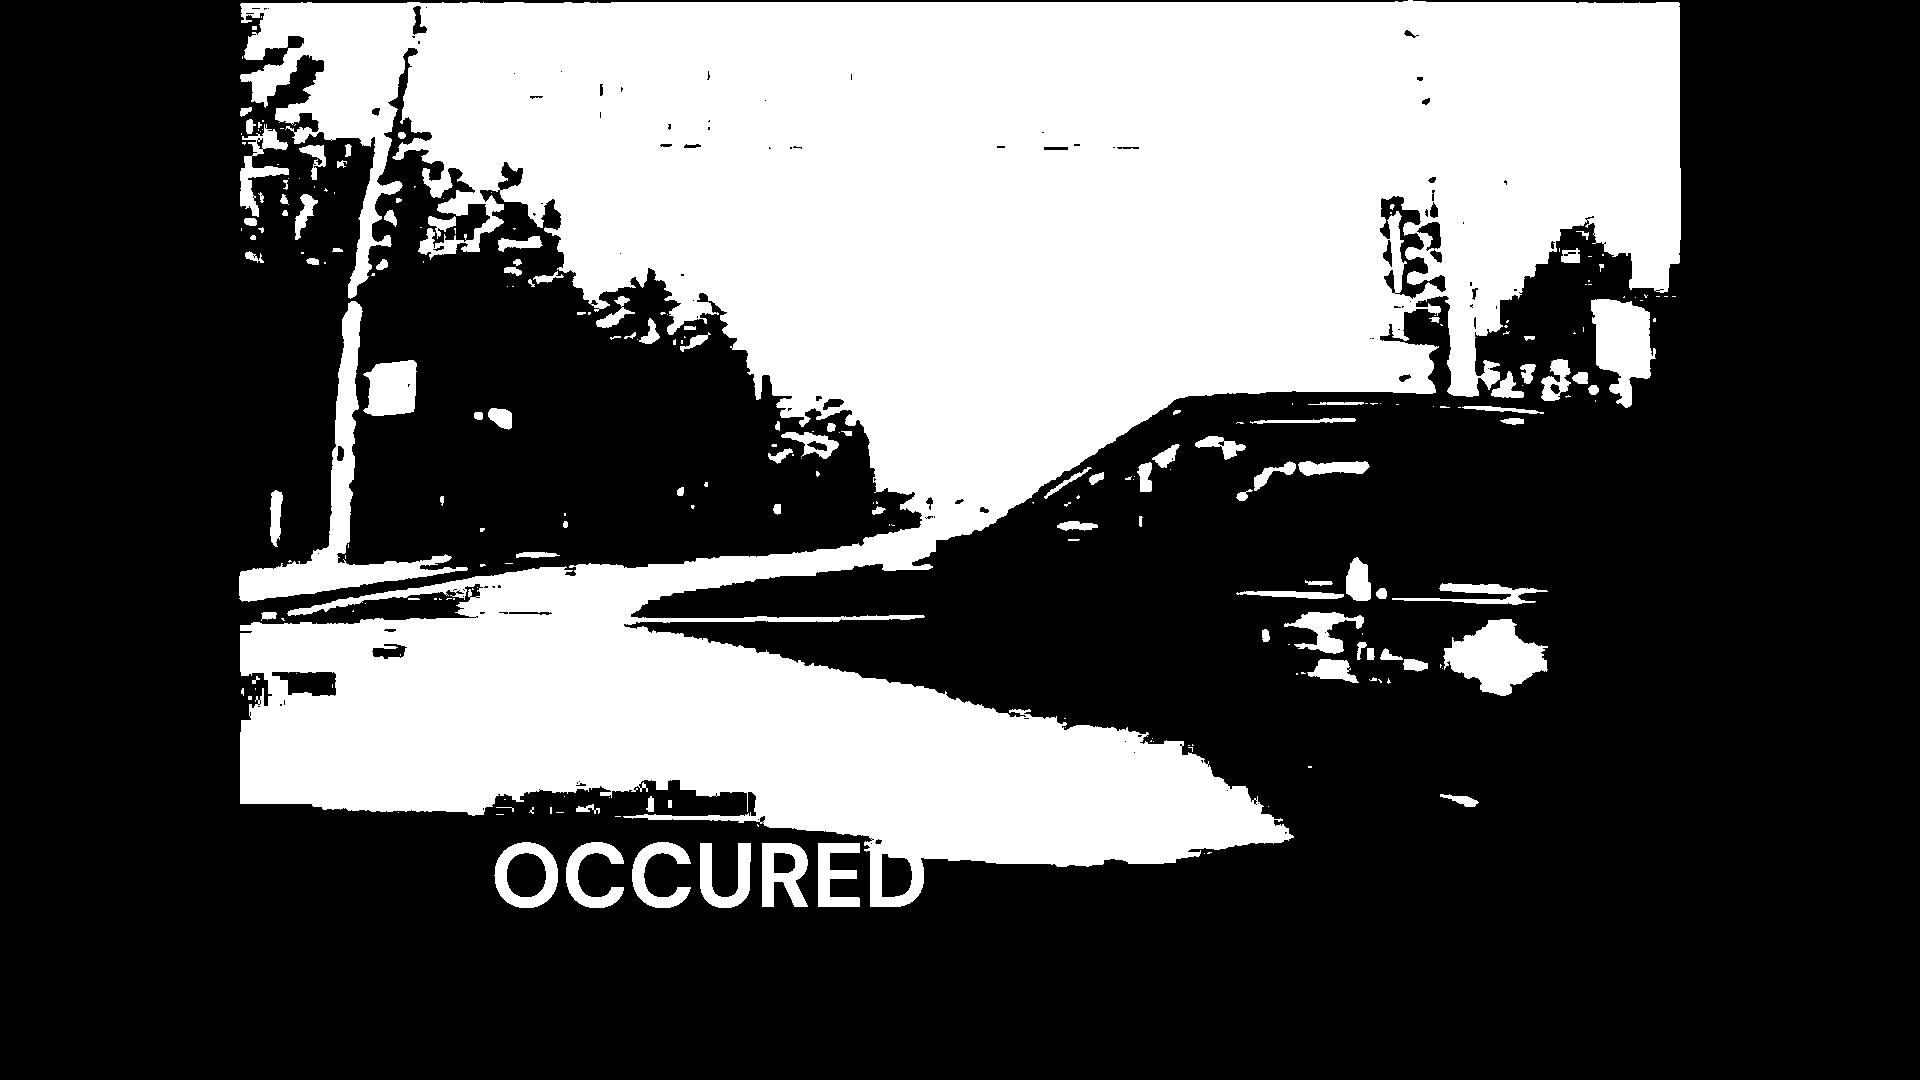

Processed Text:  

Prediction: [0]


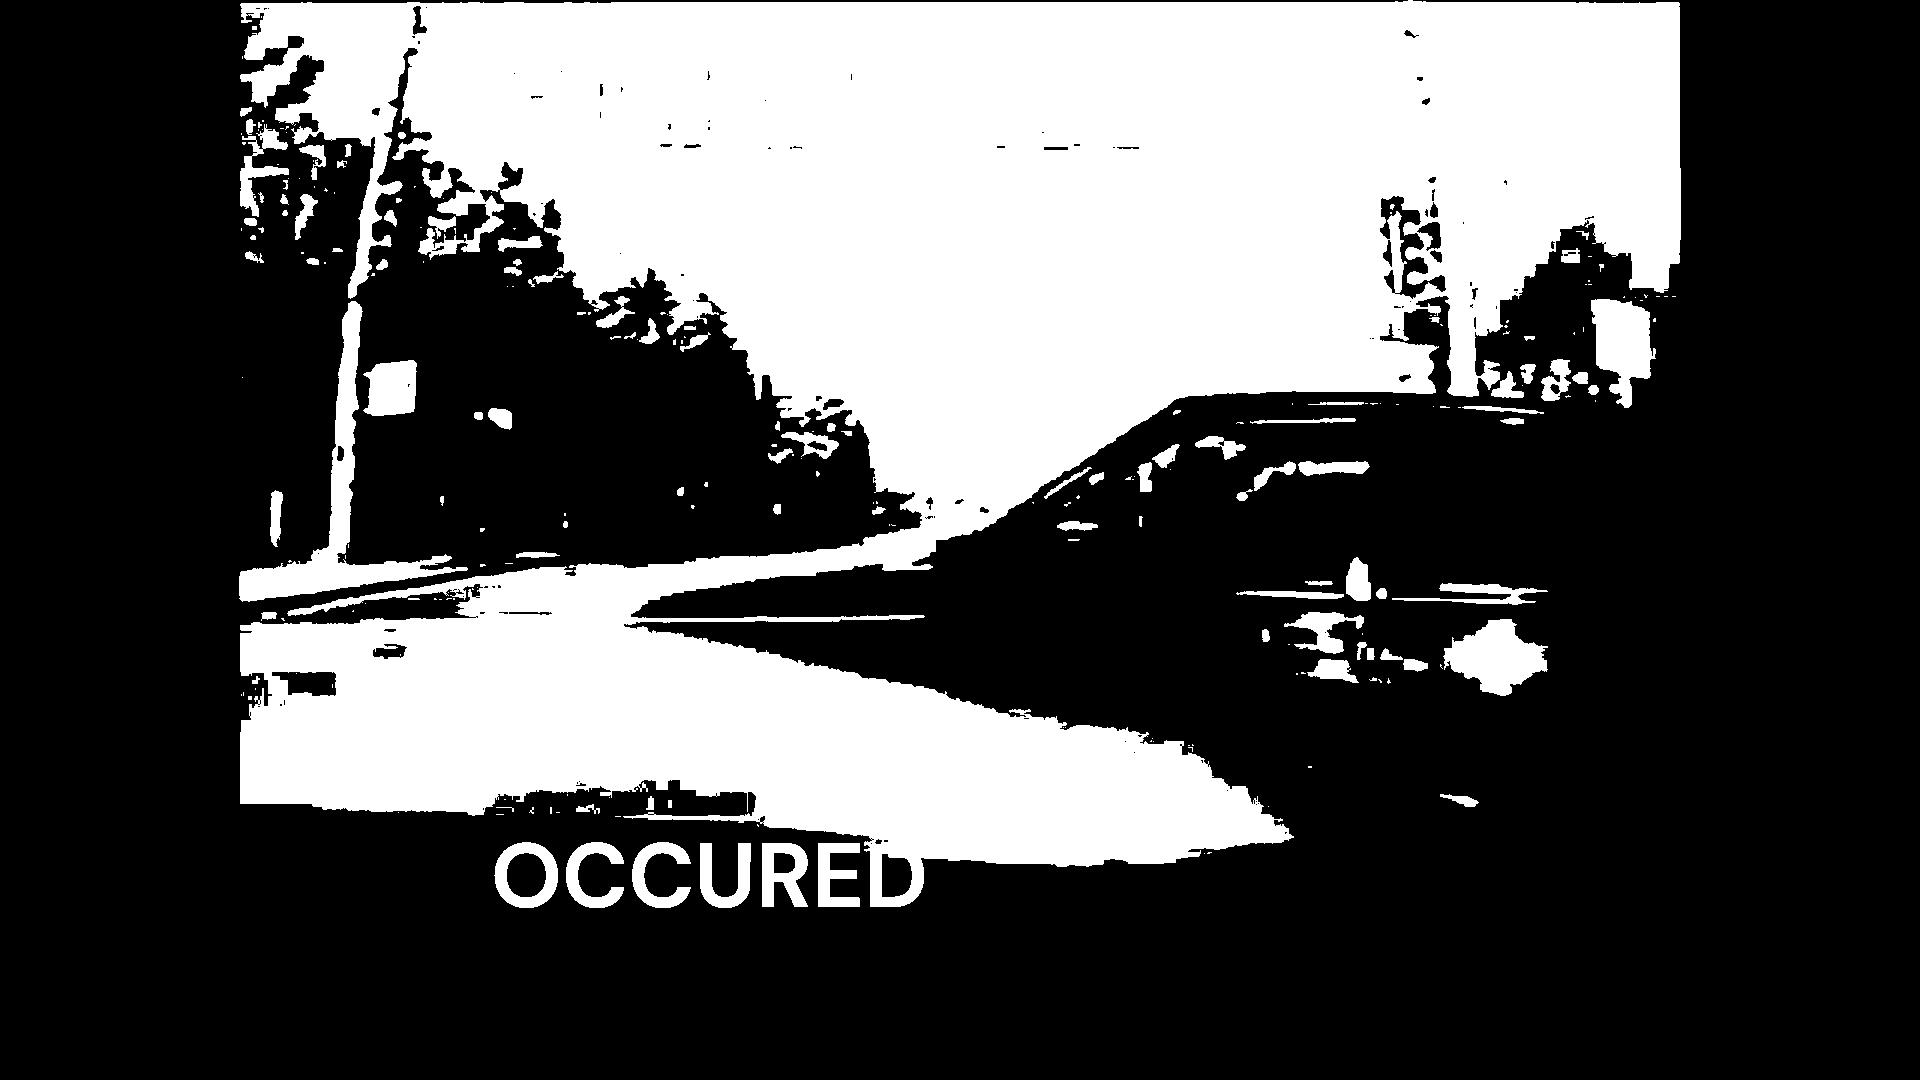

Processed Text:  

Prediction: [0]


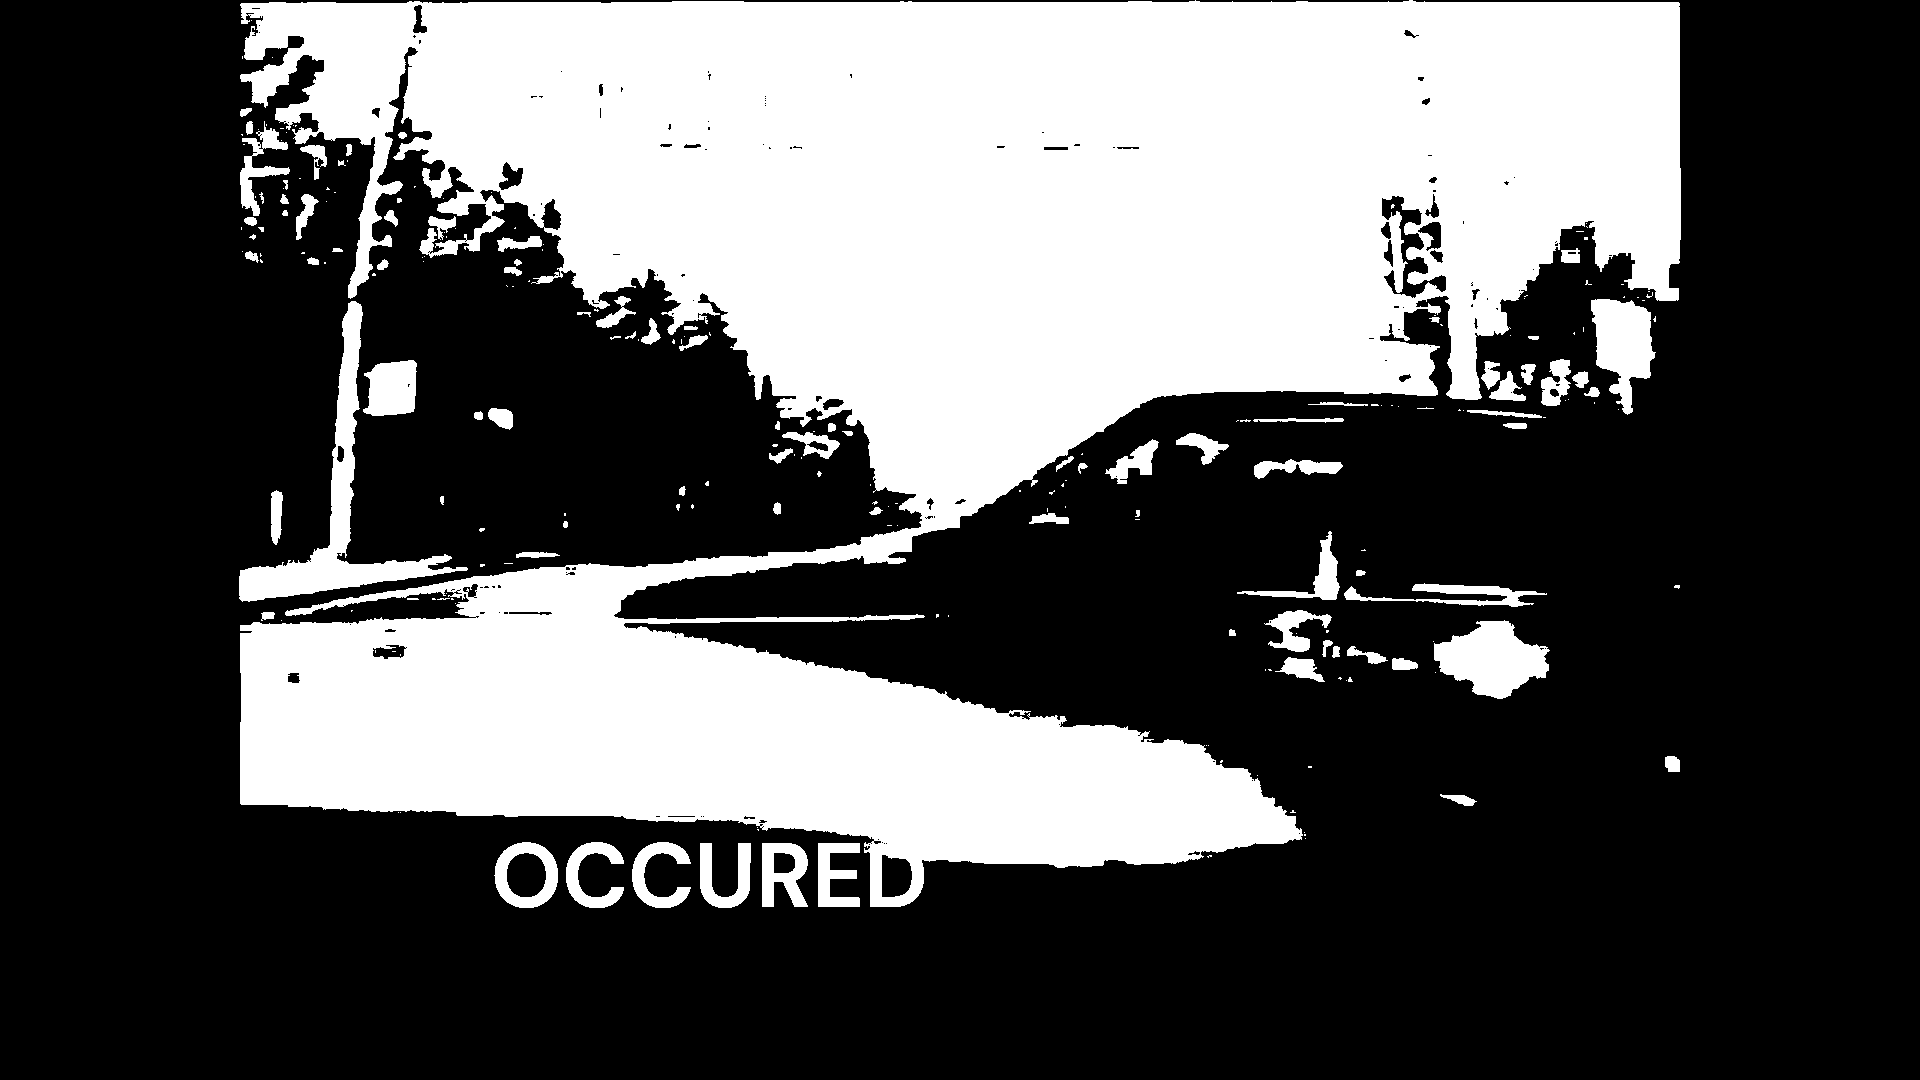

Processed Text:  

Prediction: [0]


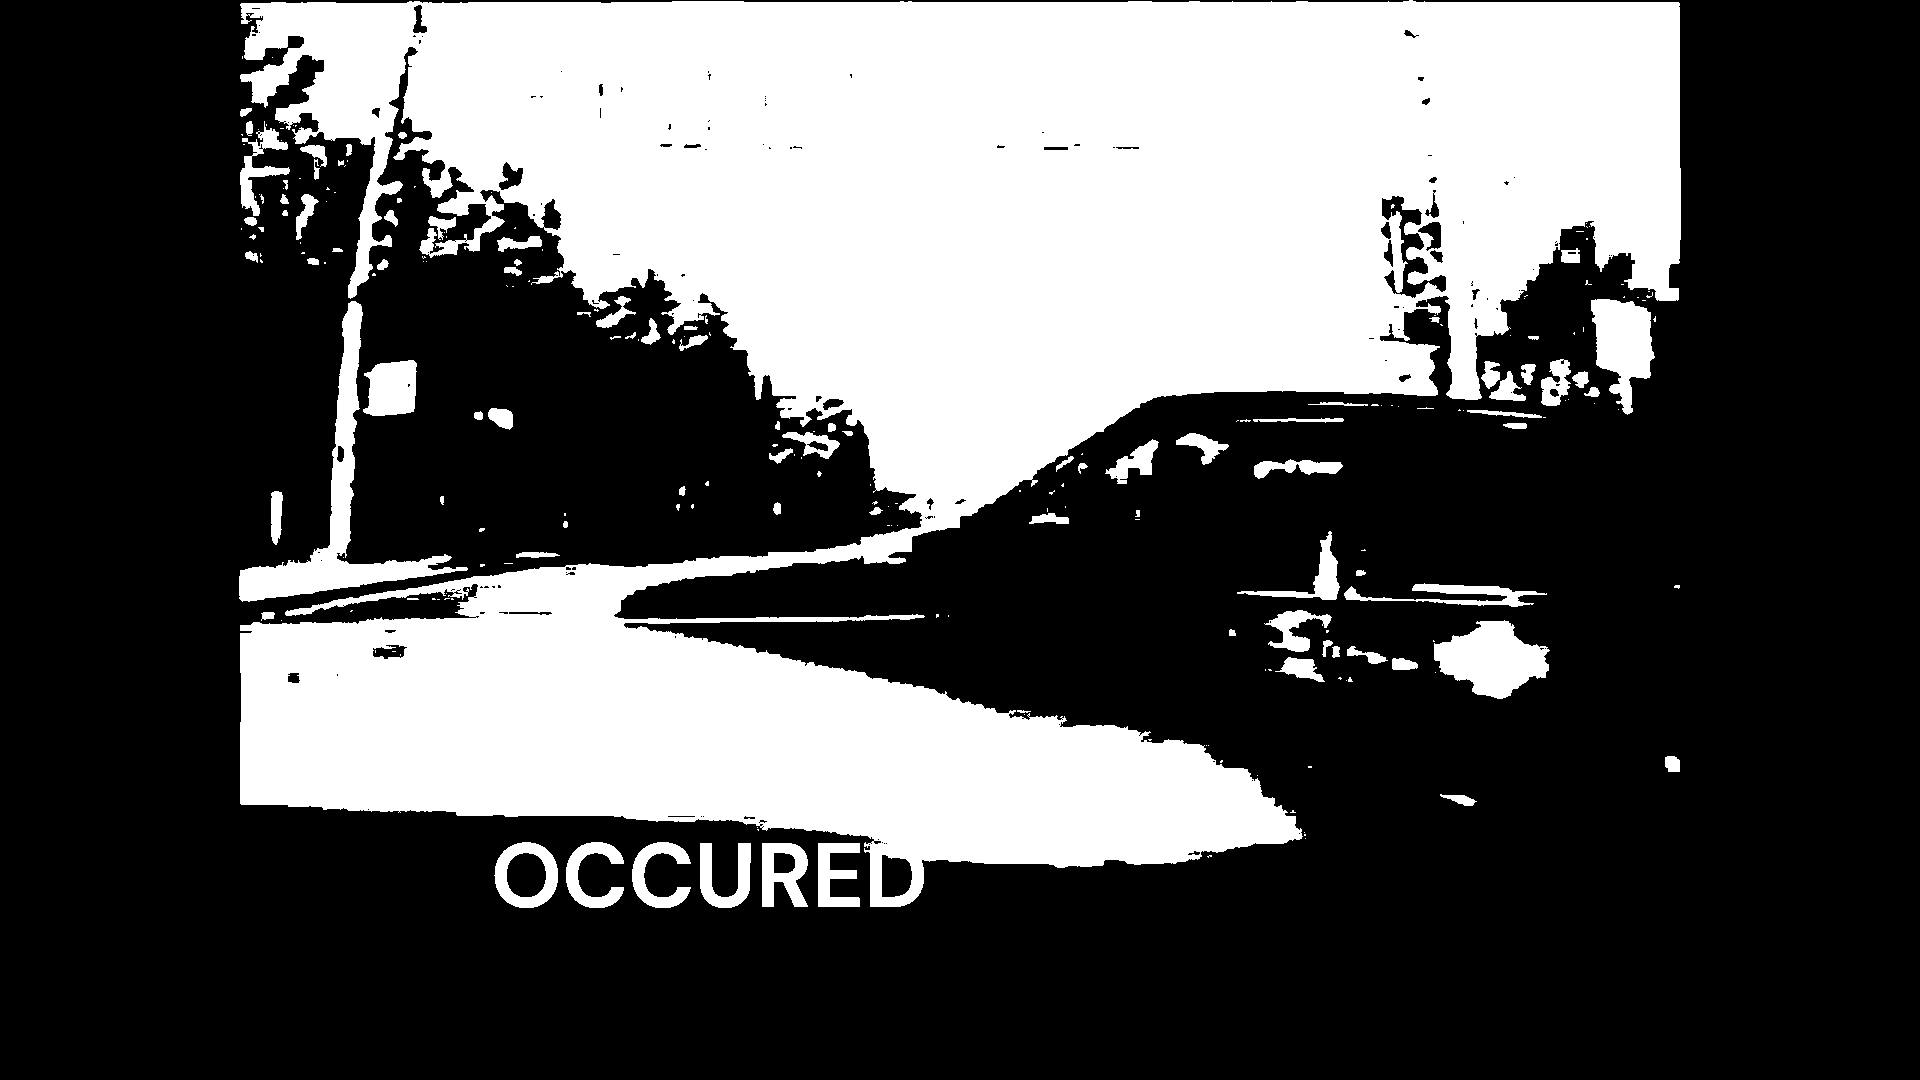

Processed Text:  

Prediction: [0]


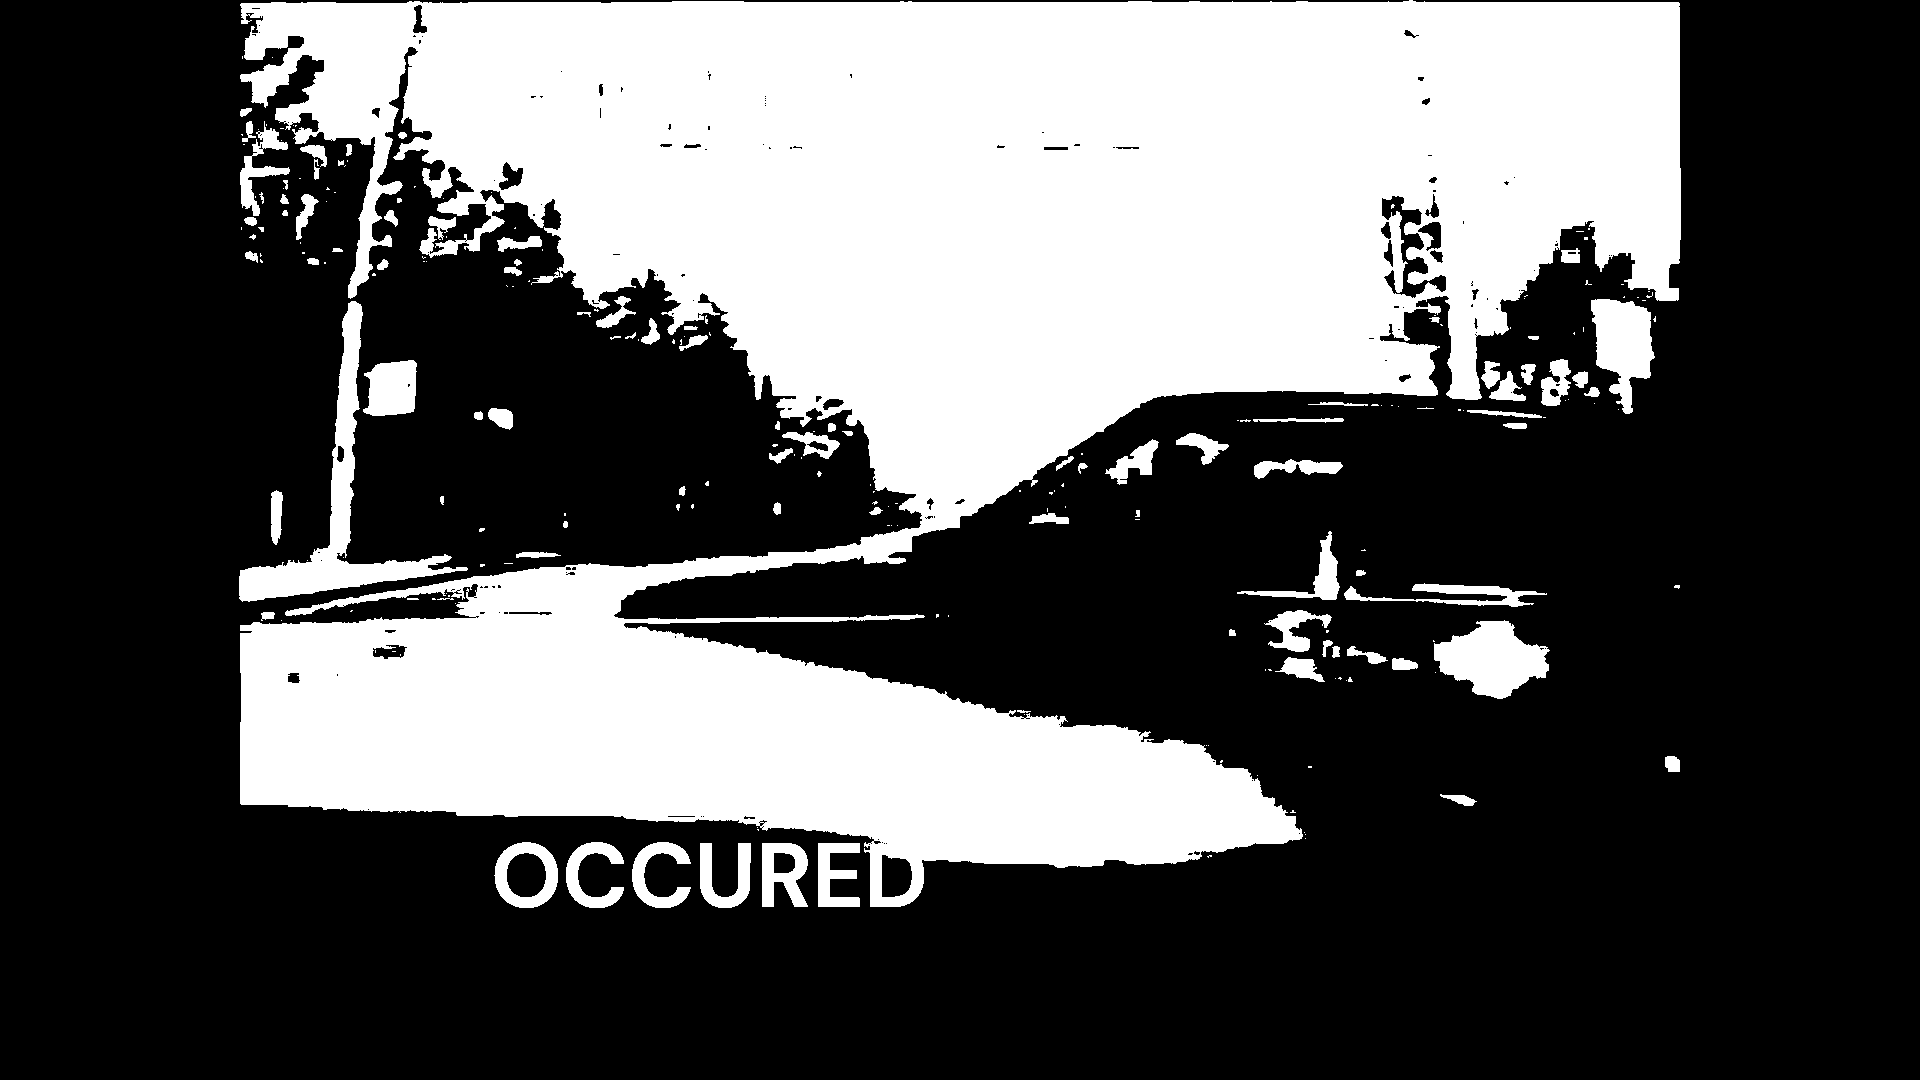

Most Accurate Text:    

AN ACCIDENT HAS
OCCURED

Final Prediction: 1


In [74]:
from google.colab.patches import cv2_imshow
def extract_text_and_predict(video_path, svm_model, vectorizer):
    cap = cv2.VideoCapture(video_path)
    most_accurate_text = None
    highest_accuracy = 0.0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        #converting to grayscale
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        #visibility adjustment for enhancing clip
        _, thresholded_frame = cv2.threshold(gray_frame, 128, 255, cv2.THRESH_BINARY)
        #extracting the text from each frame of the video uploaded
        text_description = pytesseract.image_to_string(thresholded_frame)
        #vectorizing
        X_processed = vectorizer.transform([text_description])
        #predict
        prediction = svm_model.predict(X_processed)
        print("Processed Text:", text_description)
        print("Prediction:", prediction)

        #to filter out a final processed text, to keep the most accurate one bcause each frame will have diff inputs
        if prediction[0] == 1 and prediction[0] > highest_accuracy:
            most_accurate_text = text_description
            highest_accuracy = prediction[0]

        from google.colab.patches import cv2_imshow
        cv2_imshow(thresholded_frame)
        if cv2.waitKey(1) & 0xFF == 27:
            break

    cap.release()
    cv2.destroyAllWindows()

    print("Most Accurate Text:", most_accurate_text)
    print("Final Prediction:", highest_accuracy)

#video testing with a demo accidnet video
video_input = '/content/accident.mp4'
extract_text_and_predict(video_input, svm_model, vectorizer)

#the final output is printed as AN ACCIDENT HAS OCCURED and our svm model has predicted it as 1, which means it has detected an accident